🔵 Click here to [see](https://docs.google.com/document/d/1T1fvpUPzJco9OIoVBjITN6WQnFZm5zWg7DBAeKR4Uac/edit#heading=h.2dmlq0mem11g) our shared document to see our group notes.


## 1. Data Collection

🔴 In order to import dataset, you can hit enter many times so it will be imported all data.

- I already created a automatic code here, so it will be automatically enter to get 100,000 rows data for us.

Before you import dataset, please go to excel file of yelp dataset, converting date column into mm-dd-yyyy.

In [ ]:
import pandas as pd

# Initialize an empty list to store data chunks
data_chunks = []

# Number of rows to read in each iteration
chunk_size = 10000

# Number of desired rows and columns
target_rows = 100000

# Loop until you have enough rows
while len(data_chunks) * chunk_size < target_rows:
    # Read a chunk of data from the CSV file
    chunk = pd.read_csv("Yelp_dataset.csv", nrows=chunk_size)

    # Append the chunk to the list
    data_chunks.append(chunk)

# Concatenate the data chunks into a single DataFrame
yelp_dataset = pd.concat(data_chunks, ignore_index=True)

# Ensure that the DataFrame has exactly 100,000 rows
yelp_dataset = yelp_dataset.head(target_rows)

In [ ]:
yelp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   100000 non-null  object 
 1   name          100000 non-null  object 
 2   address       99180 non-null   object 
 3   city          100000 non-null  object 
 4   state         100000 non-null  object 
 5   postal_code   100000 non-null  object 
 6   latitude      100000 non-null  float64
 7   longitude     100000 non-null  float64
 8   stars_x       100000 non-null  float64
 9   review_count  100000 non-null  int64  
 10  is_open       100000 non-null  int64  
 11  attributes    98710 non-null   object 
 12  categories    100000 non-null  object 
 13  hours         94500 non-null   object 
 14  review_id     100000 non-null  object 
 15  user_id       100000 non-null  object 
 16  stars_y       100000 non-null  int64  
 17  useful        100000 non-null  int64  
 18  funny

## 2. Exploratory Data Analysis 🟡 Anvita

### Create a dataset summary

In [ ]:
yelp_dataset[['categories', 'review_count','name']]


categories  review_count  \
0      Doctors, Traditional Chinese Medicine, Naturop...             7   
1      Shipping Centers, Local Services, Notaries, Ma...            15   
2      Shipping Centers, Local Services, Notaries, Ma...            15   
3      Shipping Centers, Local Services, Notaries, Ma...            15   
4      Department Stores, Shopping, Fashion, Home & G...            22   
...                                                  ...           ...   
99995  Food, Shopping, Tobacco Shops, Beer, Wine & Sp...           117   
99996  Food, Shopping, Tobacco Shops, Beer, Wine & Sp...           117   
99997  Venues & Event Spaces, Italian, Event Planning...           218   
99998  Venues & Event Spaces, Italian, Event Planning...           218   
99999  Venues & Event Spaces, Italian, Event Planning...           218   

                                         name  
0                    Abby Rappoport, LAC, CMQ  
1                               The UPS Store  
2                               The UPS Store  
3                               The UPS Store  
4                                      Target  
...                                       ...  
99995  Midtown Corkdorks Wine, Spirits & Beer  
99996  Midtown Corkdorks Wine, Spirits & Beer  
99997                     Andrea's Restaurant  
99998                     Andrea's Restaurant  
99999                     Andrea's Restaurant  

[100000 rows x 3 columns]

### Bar chart for top 3 business categories

<ipython-input-5-0bff44f2088d>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


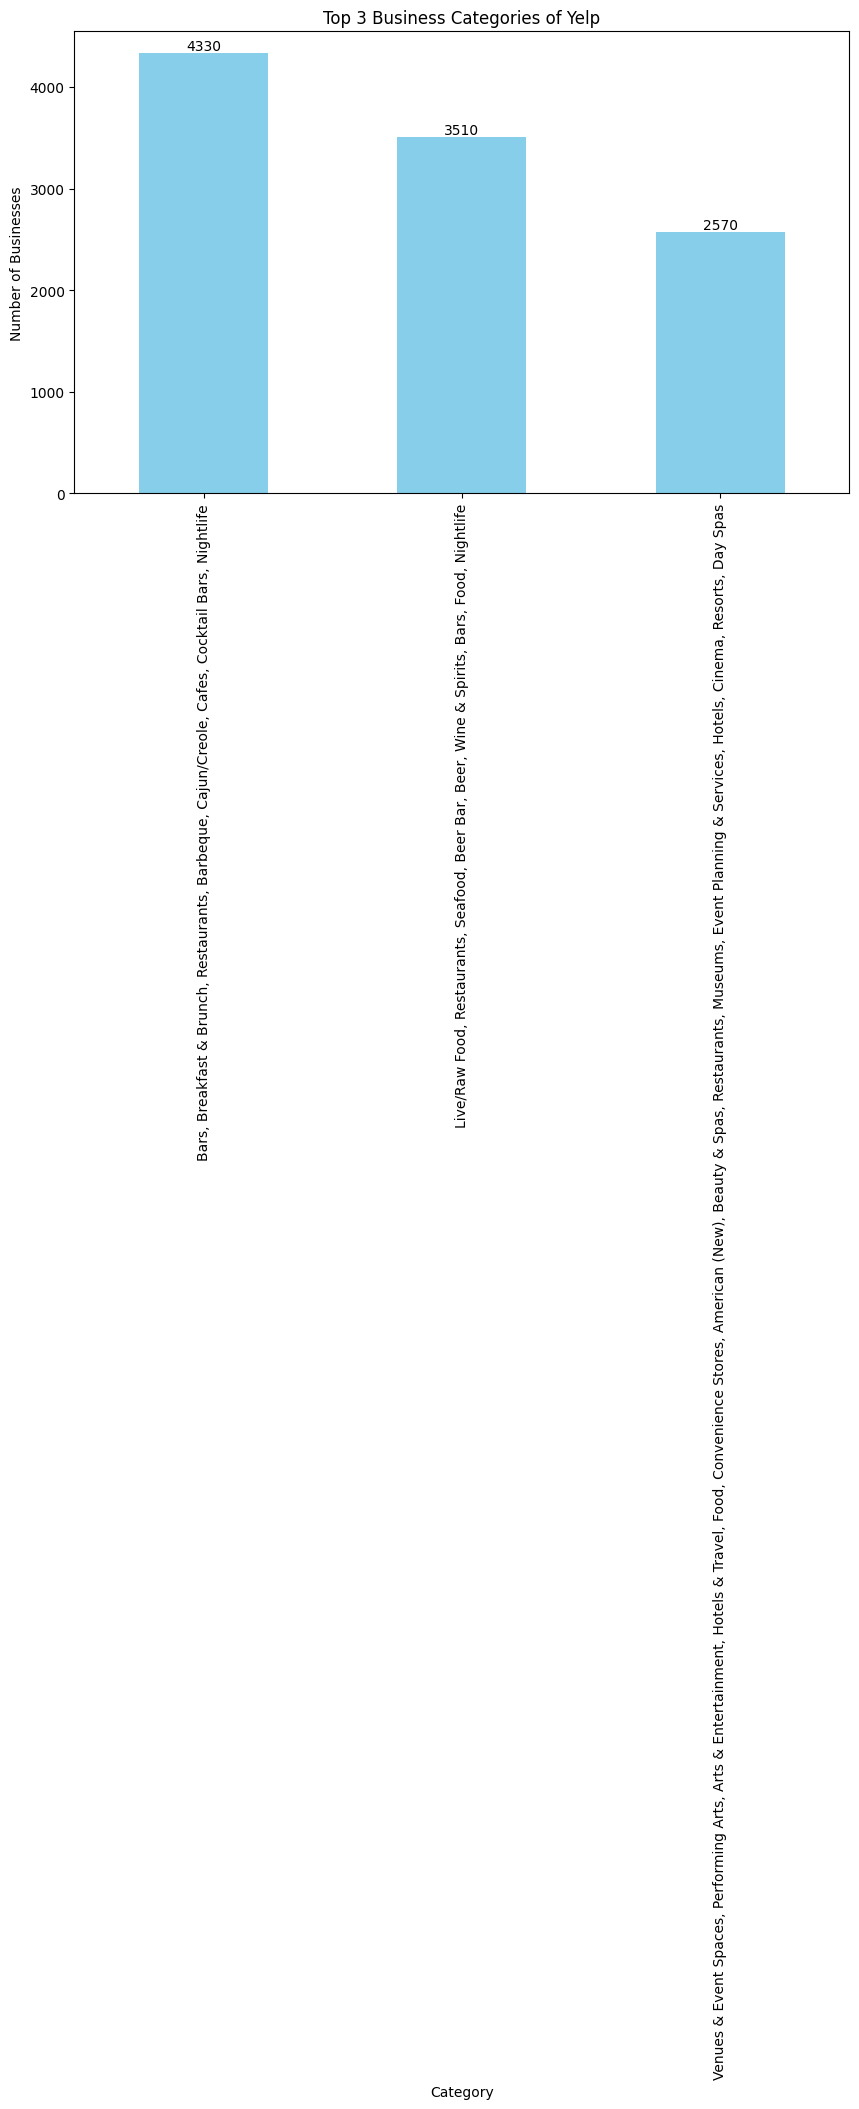

In [ ]:
import matplotlib.pyplot as plt

# Group all the variables and count the number of businesses in each category
category_counts = yelp_dataset['categories'].str.split('; ', expand=True).stack().value_counts()

# Selected top 3 categories
top_categories = category_counts.head(3)

# Plotting
plt.figure(figsize=(10, 6))
ax = top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 3 Business Categories of Yelp')
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=90)
plt.tight_layout()

# Add data labels
for i, count in enumerate(top_categories):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

🟡 Anvita:

I believe we can do top 3 business categories for number of review counts would be making sense fo our project cause we are focusing on number of reviews. Let me know how you think. I attached a code and visualization chart below for your reference.

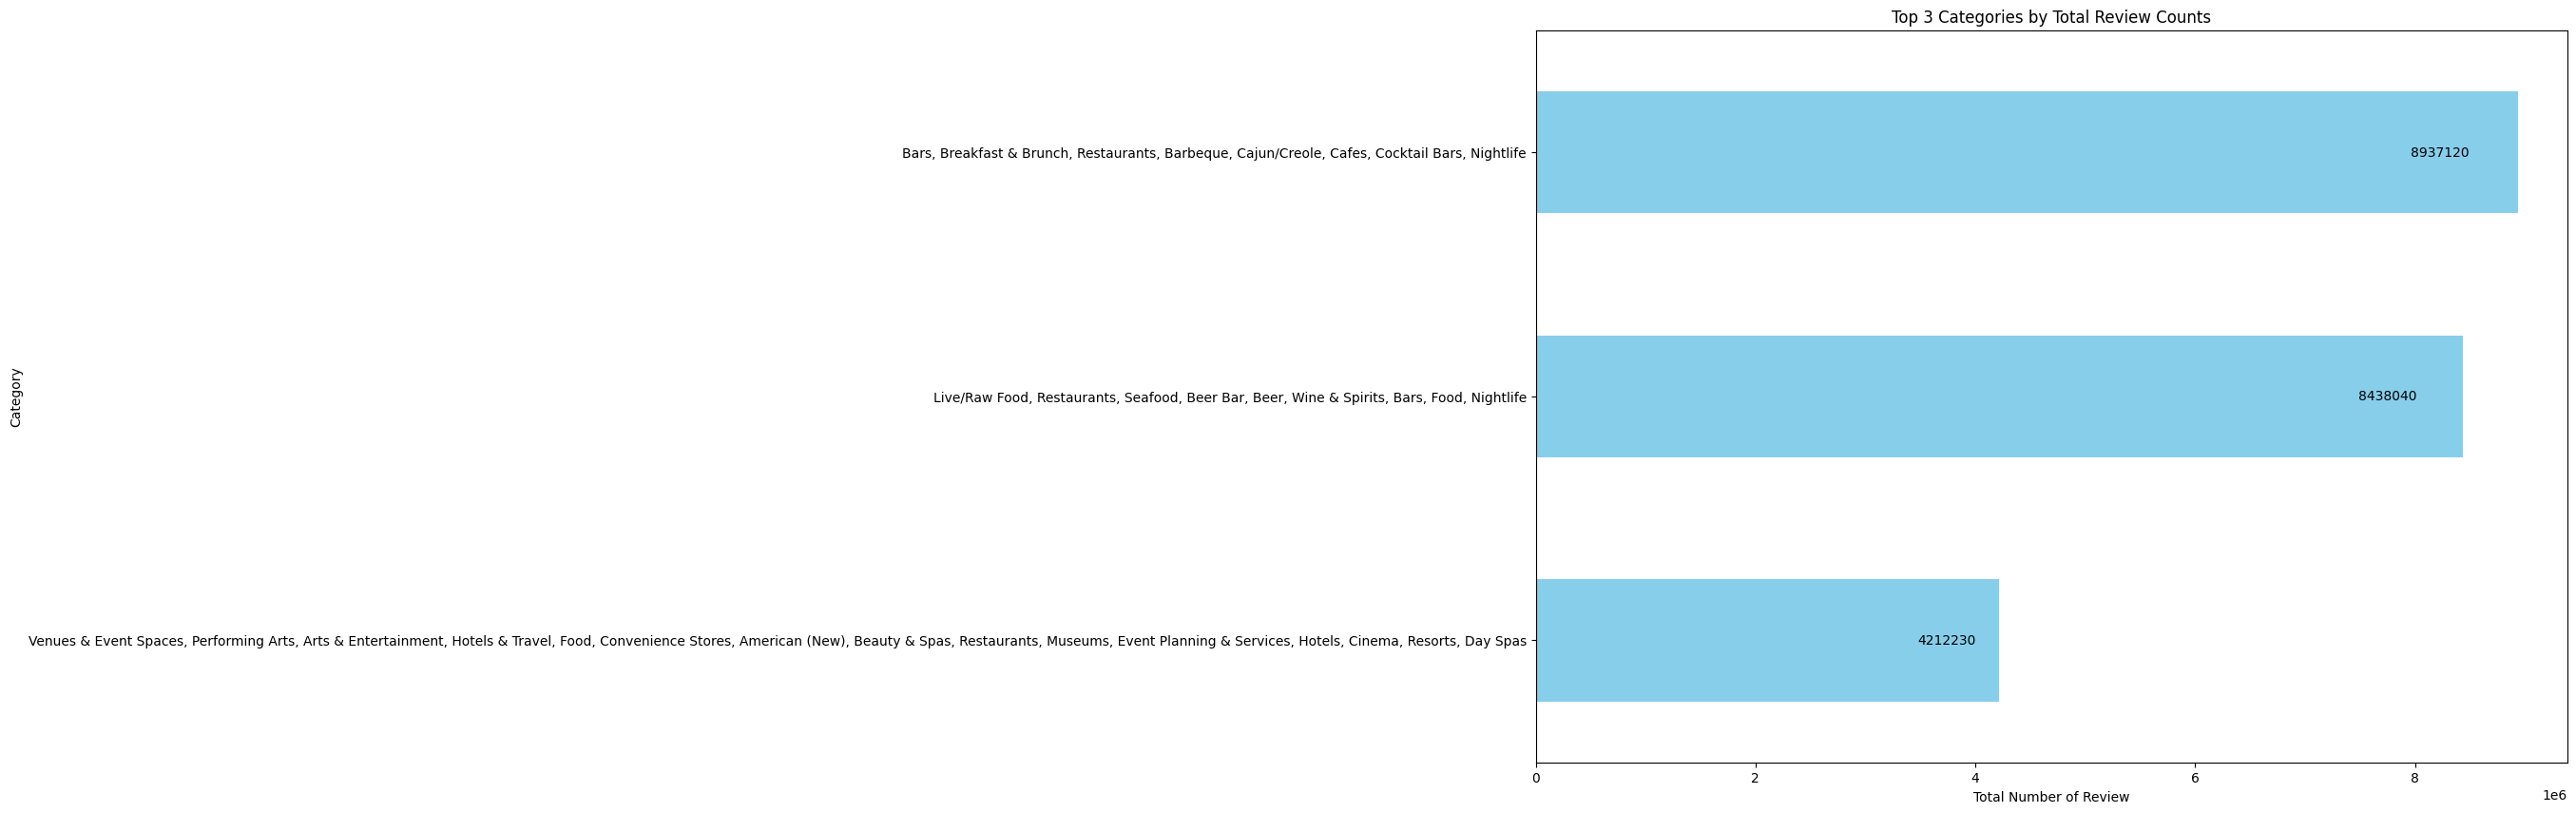

In [ ]:
import matplotlib.pyplot as plt

# Assuming yelp_dataset is your DataFrame
# Grouping by 'categories' and summing up the 'review_count' for each category
category_review_counts = yelp_dataset.groupby('categories')['review_count'].sum()

# Sorting categories by review count in descending order
category_review_counts = category_review_counts.sort_values(ascending=False)

# Selecting top 3 categories
top_categories = category_review_counts.head(3)

# Plotting
plt.figure(figsize=(14, 10))
bars = top_categories[::-1].plot(kind='barh', color='skyblue')  # Reverse the order for horizontal bar chart
plt.title('Top 3 Categories by Total Review Counts')
plt.xlabel('Total Number of Review')
plt.ylabel('Category')

# Add data labels
for bar in bars.patches:
    # Get the width of the bar
    width = bar.get_width()
    # Add text annotation on the bar with a slight left offset
    plt.text(width - 0.05 * width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='right', va='center')

plt.show()


**Bars, Breakfast & Brunch, Restaurants, Barbeque, Cajun/Creole, Cafes, Cocktail Bars, Nightlife**: This category has the highest number of reviews, totaling approximately 8.93 million. The category includes a variety of dining and nightlife options, suggesting a high level of customer engagement and interest in these services.

**Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife:** The second category has around 8.43 million reviews, which also indicates a strong consumer presence in the food and beverage sector, with a particular emphasis on seafood and establishments serving alcohol.

**Venues & Event Spaces, Performing Arts, Arts & Entertainment, Hotels & Travel, Food, Convenience Stores, American (New), Beauty & Spas, Restaurants, Museums, Event Planning & Services, Hotels, Cinema, Resorts, Day Spas:** The third category, with approximately 4.21 million reviews, is the most diverse. It covers a wide range of services from event spaces and hotels to arts, entertainment, and various types of food services.

### Rating Distribution across Yelp Reviews

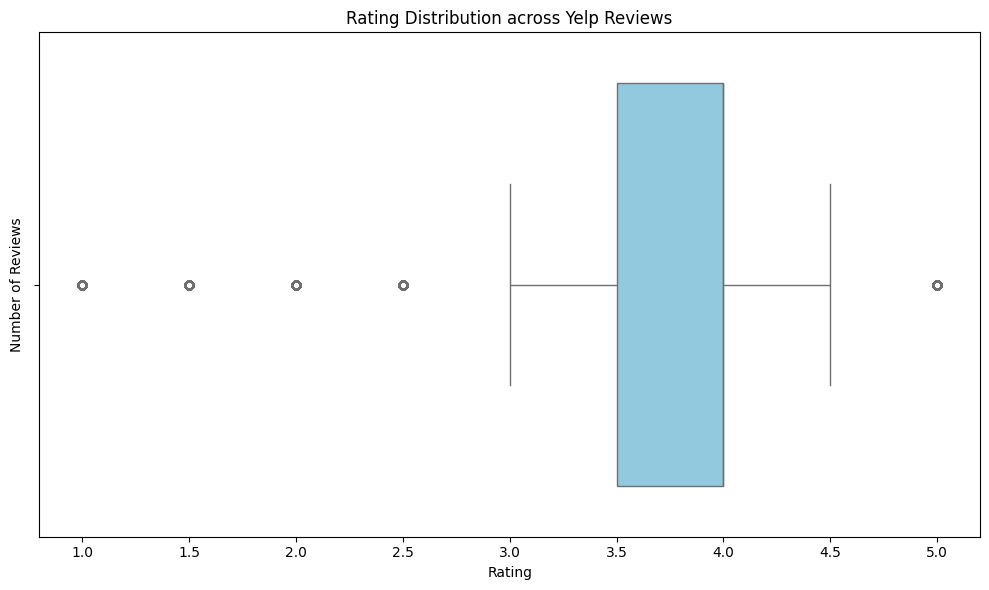

In [ ]:
import seaborn as sns

# Plot the rating distribution using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars_x', data= yelp_dataset, color='skyblue')
plt.title('Rating Distribution across Yelp Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

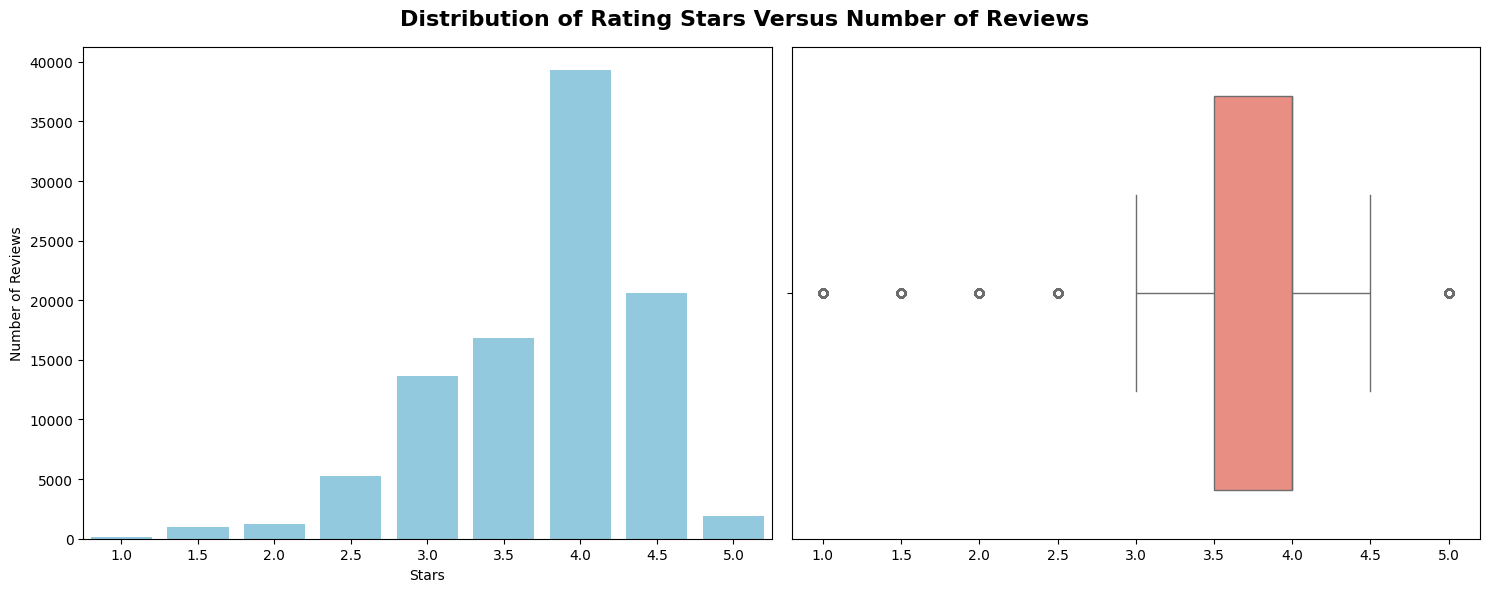

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming yelp_dataset is your DataFrame

# Plotting two charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Adding a big title above the subplots
fig.suptitle('Distribution of Rating Stars Versus Number of Reviews', fontsize=16, fontweight='bold')

# 1: Plotting a bar plot to see distribution of stars and total number of reviews.
sns.countplot(x='stars_x', data=yelp_dataset, ax=axes[0], color='skyblue')
axes[0].set_xlabel('Stars')
axes[0].set_ylabel('Number of Reviews')

# 2: Plotting the rating distribution using a boxplot
sns.boxplot(x='stars_x', data=yelp_dataset, ax=axes[1], color='salmon')


# Hide x-axis label on the second subplot
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Hide y-axis labels on the second subplot
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()

**The majority of Yelp reviews tend to be positive, centering around 4 stars.
There's a high occurrence of moderate ratings (3-4 stars) compared to extreme ones.**

**The presence of outliers on the lower end in the box plot could indicate particularly bad experiences or potentially harsher critics, while outliers on the higher end could represent exceptionally good experiences or less critical reviewers.**

### Sentiment and Star Rating Distribution

<ipython-input-9-350e5e63d2df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars_x', data= yelp_dataset, palette='Blues_r')


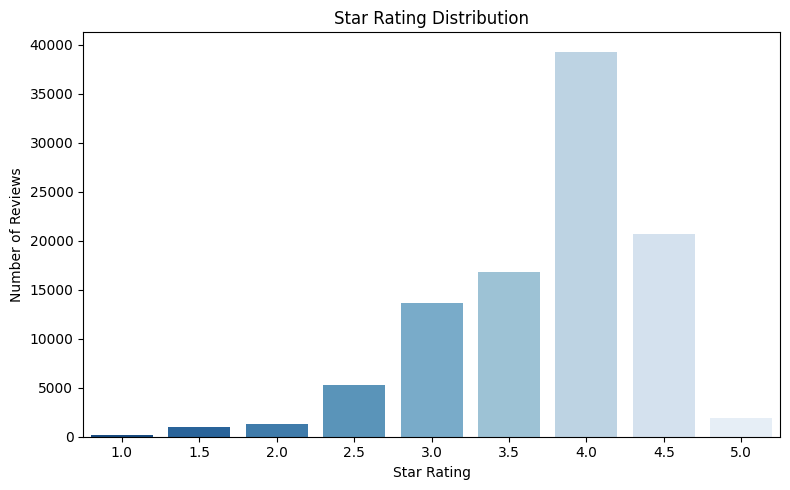

In [ ]:
# Plotting star rating distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='stars_x', data= yelp_dataset, palette='Blues_r')
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [ ]:
yelp_dataset.loc[yelp_dataset['stars_x'] == 3, 'sentiment'] = 'neutral'
yelp_dataset.loc[yelp_dataset['stars_x'] < 3, 'sentiment'] = 'negative'
yelp_dataset.loc[yelp_dataset['stars_x'] > 3, 'sentiment'] = 'positive'

In [ ]:
sentiment_df = yelp_dataset[['stars_x','sentiment', 'text']]
sentiment_df

stars_x sentiment                                               text
0          5.0  positive  I've had acupuncture treatments with Abby over...
1          3.0   neutral  I have a po box there and ea. visit I am greet...
2          3.0   neutral  Bottom Line:  \nClean store, Quick Service, Go...
3          3.0   neutral  I went in to ship a package to my friend for h...
4          3.5  positive  We are fans of Target.  They seem to have a li...
...        ...       ...                                                ...
99995      4.0  positive  Two reasons for the 5-star rating: 1. They are...
99996      4.0  positive  Omg it's like booze heaven. And! They have a f...
99997      2.5  negative  We attended a private party recently.  The app...
99998      2.5  negative  Walking in, it took a bit to be greeted and se...
99999      2.5  negative  This is no where near as good as Tony Angelo's...

[100000 rows x 3 columns]

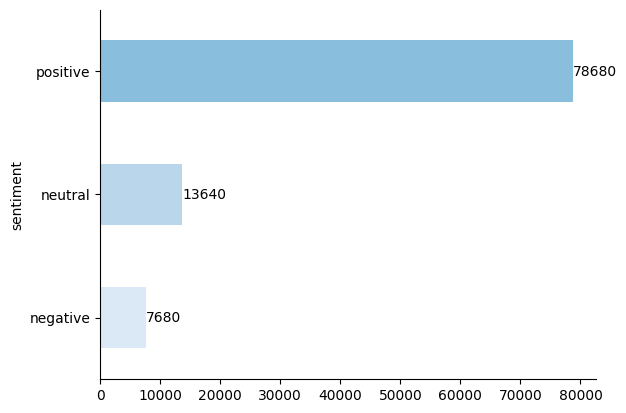

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming sentiment_df is your DataFrame
sentiment_counts = sentiment_df.groupby('sentiment').size()

# Plotting the horizontal bar plot
ax = sentiment_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Blues'))

# Adding data labels to each bar
for i, count in enumerate(sentiment_counts):
    ax.text(count, i, str(count), ha='left', va='center')

# Removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


In [ ]:
yelp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   100000 non-null  object 
 1   name          100000 non-null  object 
 2   address       99180 non-null   object 
 3   city          100000 non-null  object 
 4   state         100000 non-null  object 
 5   postal_code   100000 non-null  object 
 6   latitude      100000 non-null  float64
 7   longitude     100000 non-null  float64
 8   stars_x       100000 non-null  float64
 9   review_count  100000 non-null  int64  
 10  is_open       100000 non-null  int64  
 11  attributes    98710 non-null   object 
 12  categories    100000 non-null  object 
 13  hours         94500 non-null   object 
 14  review_id     100000 non-null  object 
 15  user_id       100000 non-null  object 
 16  stars_y       100000 non-null  int64  
 17  useful        100000 non-null  int64  
 18  funny

### Histogramfor Best Restaurants based on average star rating

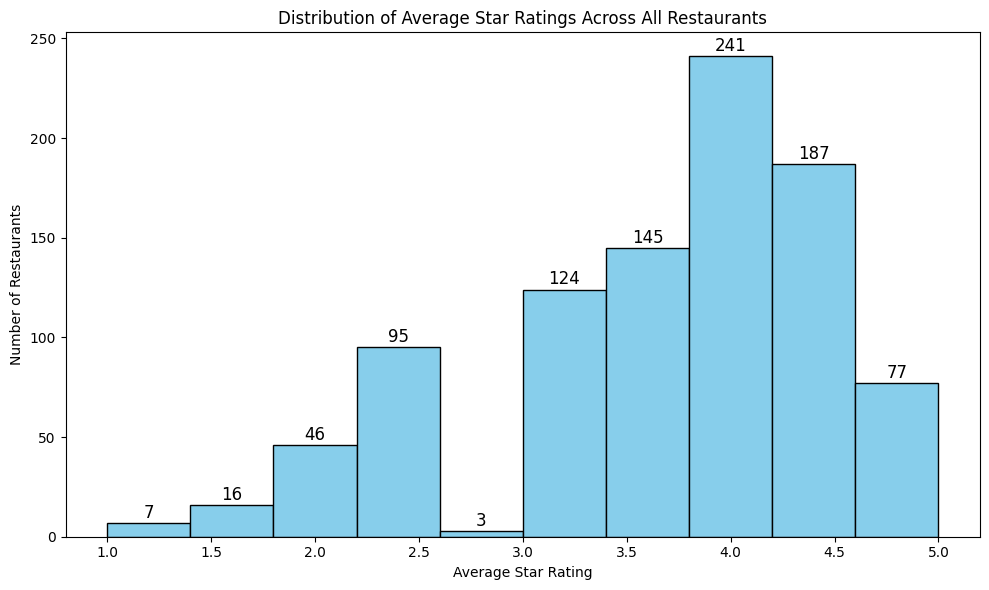

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average ratings for each restaurant
avg_ratings = yelp_dataset.groupby('name')['stars_x'].mean()

# Set up the figure for plotting
plt.figure(figsize=(10, 6))

# Plotting the histogram of average star ratings
n, bins, patches = plt.hist(avg_ratings, bins=10, color='skyblue', edgecolor='black')  # Collect bin information

# Adding titles and labels
plt.title('Distribution of Average Star Ratings Across All Restaurants')
plt.xlabel('Average Star Rating')
plt.ylabel('Number of Restaurants')

# Label each bin
for i in range(len(n)):
    plt.text(bins[i]+0.2, n[i] + 0.6, str(int(n[i])), fontsize=12, ha='center', va='bottom')

# Ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


### Line chart for Year trend of count of reviews

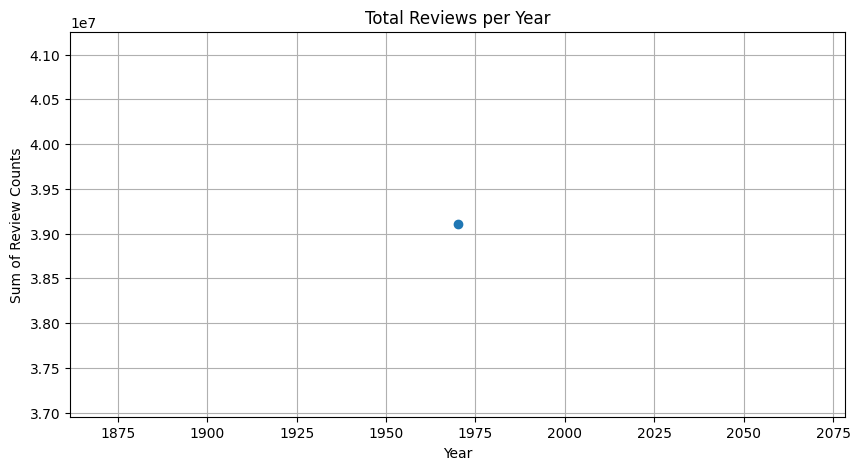

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Converting date strings to datetime objects
yelp_dataset['date'] = pd.to_datetime(yelp_dataset['date'])

# Extracting year from the datetime
yelp_dataset['year'] = yelp_dataset['date'].dt.year

# Grouping by year and summing review counts
yearly_review_sum = yelp_dataset.groupby('year')['review_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(yearly_review_sum['year'], yearly_review_sum['review_count'], marker='o')
plt.title('Total Reviews per Year')
plt.xlabel('Year')

plt.ylabel('Sum of Review Counts')
plt.grid(True)
plt.show()

The line graph shows a clear upward trend in the number of reviews from the year 2006 to around 2014, suggesting increasing usage of Yelp and greater customer engagement over these years.

### Line chart for Month trend of count of reviews

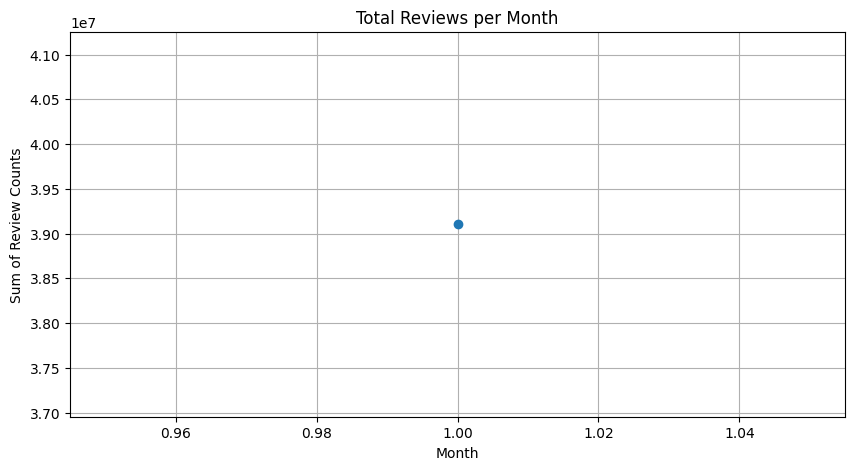

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converting date strings to datetime objects
yelp_dataset['date'] = pd.to_datetime(yelp_dataset['date'])

# Extracting month from the datetime
yelp_dataset['month'] = yelp_dataset['date'].dt.month

# Grouping by month and summing review counts
month_review_sum = yelp_dataset.groupby('month')['review_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(month_review_sum['month'], month_review_sum['review_count'], marker='o')
plt.title('Total Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Sum of Review Counts')
plt.grid(True)
plt.show()


After 2014, there appears to be a plateau and slight fluctuations in the number of reviews, which could indicate a stabilization in Yelp's user activity or possibly increased competition from other review platforms.

# 3. Text Mining 🟡 Onkar


🔴 before you begin, please zoom with me, and read the exploratory data analysis first,

and check if you see texts including other languages rather than languages. If you spot any other language, I suggest we can remove those rows.

 ### Step 1: Preprocessing Data



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
restaurant_df = yelp_dataset[yelp_dataset['categories'].str.contains('restaurant', case=False)]
restaurant_df = restaurant_df.reset_index(drop=True)

In [ ]:
restaurant_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date', 'sentiment', 'year',
       'month'],
      dtype='object')

In [ ]:
restaurant_df

business_id                 name               address  \
0      MTSW4McQd7CbVtyjqoe9mw   St Honore Pastries           935 Race St   
1      MTSW4McQd7CbVtyjqoe9mw   St Honore Pastries           935 Race St   
2      MTSW4McQd7CbVtyjqoe9mw   St Honore Pastries           935 Race St   
3      MTSW4McQd7CbVtyjqoe9mw   St Honore Pastries           935 Race St   
4      MTSW4McQd7CbVtyjqoe9mw   St Honore Pastries           935 Race St   
...                       ...                  ...                   ...   
75725  LEjVZUi2th79XWpW-gHmYA        Venzo's Pizza  4558 E Broadway Blvd   
75726  LEjVZUi2th79XWpW-gHmYA        Venzo's Pizza  4558 E Broadway Blvd   
75727  VOEN8f9WEysinBsLqbiVqg  Andrea's Restaurant          3100 19th St   
75728  VOEN8f9WEysinBsLqbiVqg  Andrea's Restaurant          3100 19th St   
75729  VOEN8f9WEysinBsLqbiVqg  Andrea's Restaurant          3100 19th St   

               city state postal_code   latitude   longitude  stars_x  \
0      Philadelphia    PA       19107  39.955505  -75.155564      4.0   
1      Philadelphia    PA       19107  39.955505  -75.155564      4.0   
2      Philadelphia    PA       19107  39.955505  -75.155564      4.0   
3      Philadelphia    PA       19107  39.955505  -75.155564      4.0   
4      Philadelphia    PA       19107  39.955505  -75.155564      4.0   
...             ...   ...         ...        ...         ...      ...   
75725        Tucson    AZ       85711  32.221398 -110.895315      4.0   
75726        Tucson    AZ       85711  32.221398 -110.895315      4.0   
75727      Metairie    LA       70002  30.007338  -90.153851      2.5   
75728      Metairie    LA       70002  30.007338  -90.153851      2.5   
75729      Metairie    LA       70002  30.007338  -90.153851      2.5   

       review_count  ...                 user_id stars_y useful funny cool  \
0                80  ...  6_SpY41LIHZuIaiDs5FMKA       4      0     0    1   
1                80  ...  tCXElwhzekJEH6QJe3xs7Q       4      3     1    2   
2                80  ...  WqfKtI-aGMmvbA9pPUxNQQ       5      0     0    0   
3                80  ...  3-1va0IQfK-9tUMzfHWfTA       5      5     0    5   
4                80  ...  EouCKoDfzaVG0klEgdDvCQ       4      2     1    1   
...             ...  ...                     ...     ...    ...   ...  ...   
75725             7  ...  iPSRPgiuveUdODHBbumemw       3      3     1    1   
75726             7  ...  ZEEXmm3BvQUpJrPFikT18w       4      2     1    1   
75727           218  ...  GVm9PEWn1epQygsugMKppg       1      0     0    0   
75728           218  ...  pCOykzdETa7mGiUqfJuPCw       4      2     0    1   
75729           218  ...  YzckMAdpT00nnHutGtTWEQ       2      1     0    0   

                                                    text  \
0      This is nice little Chinese bakery in the hear...   
1      This is the bakery I usually go to in Chinatow...   
2      A delightful find in Chinatown! Very clean, an...   
3      I ordered a graduation cake for my niece and i...   
4      HK-STYLE MILK TEA:  FOUR STARS\n\nNot quite su...   
...                                                  ...   
75725  Well, since it was right next to Scoot Over, I...   
75726  A number of pizzerias have come and gone throu...   
75727  We attended a private party recently.  The app...   
75728  Walking in, it took a bit to be greeted and se...   
75729  This is no where near as good as Tony Angelo's...   

                               date  sentiment  year  month  
0     1970-01-01 00:00:00.000041785   positive  1970      1  
1     1970-01-01 00:00:00.000041552   positive  1970      1  
2     1970-01-01 00:00:00.000041572   positive  1970      1  
3     1970-01-01 00:00:00.000043240   positive  1970      1  
4     1970-01-01 00:00:00.000041572   positive  1970      1  
...                             ...        ...   ...    ...  
75725 1970-01-01 00:00:00.000040367   positive  1970      1  
75726 1970-01-01 00:00:00.000040322   positive  1970      1  
75727 1970-0

In [ ]:
restaurant_df = restaurant_df[['sentiment','text']]

#### Retrieves all rows in the DataFrame where the sentiment is negative

**This is to understand about negative customer reviews.**

In [ ]:
sentiment_map = {'neutral': 0, 'positive': 1, 'negative': 2}
restaurant_df['sentiment'] = restaurant_df['sentiment'].map(sentiment_map)

<ipython-input-22-b8787c4c126f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['sentiment'] = restaurant_df['sentiment'].map(sentiment_map)


In [ ]:
restaurant_df[restaurant_df['sentiment']==2]

sentiment                                               text
22             2  Waited several minutes waiting to order. I was...
23             2  Hidden just off I-65, this Sonic seems to come...
24             2  Went there at 4am and there was only one waitr...
25             2  I had an immensely frustrating experience here...
26             2  Food was decent, staff were accommodating. Res...
...          ...                                                ...
75717          2  I have to agree with the previous reviews abou...
75718          2  I've had really good meals here, and pretty ba...
75727          2  We attended a private party recently.  The app...
75728          2  Walking in, it took a bit to be greeted and se...
75729          2  This is no where near as good as Tony Angelo's...

[4130 rows x 2 columns]

#### Clean and preprocess text data by removing non-alphabetic characters, converting text to lowercase, tokenizing, lemmatizing words, and removing stopwords.

In [ ]:
ps = PorterStemmer()

In [ ]:
lemmatizer=WordNetLemmatizer()

In [ ]:
corpus = []
for i in range(0, len(restaurant_df['text'])):
    review = re.sub('[^a-zA-Z]', ' ', restaurant_df['text'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['nice little chinese bakery heart philadelphia chinatown female cashier friendly flirtatious pastry shown nicely adorned display case stopped early one evening sesame ball filled bean paste glutinous rice ball nicely flavored similar bai tang gao definitely place worth stopping area',
 'bakery usually go chinatown decent variety bun pastry red bean filled bun mung bean filled bun coconut stuff egg tart etc buy dozen give two free price standard chinese bakery thing approximately service always good serve coffee tea couple table inside usually expected group older chinese guy chillin corner table debating something great place stock bun usually leaving town',
 'delightful find chinatown clean kind service everyone always seems happy treat absolutely delicious also get ton sweet treat without judgement favorite',
 'ordered graduation cake niece came absolutely perfect come future event staff nice also cake really good',
 'hk style milk tea four star quite sure two saint honore pastry bu

**This is my revised code for the lemmatize.It takes me 40s to run.**

- This wordclous shows the the most common words from all negative reviews.


<ipython-input-26-637c6591f35e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['cleaned_text'] = restaurant_df['text'].apply(preprocess_text)


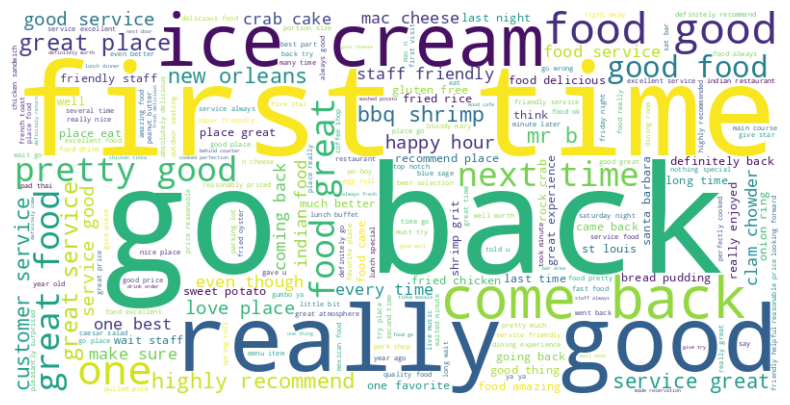

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming restaurant_df is your DataFrame and it has been defined somewhere above this code
# Precompile stopwords list and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove non-alphabet characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Split text into words (tokenization)
    words = text.split()
    # Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(cleaned_words)

# Apply the preprocessing function to each text entry in the DataFrame
restaurant_df['cleaned_text'] = restaurant_df['text'].apply(preprocess_text)

# Create a single string from the 'cleaned_text' for word cloud generation
corpus_text = ' '.join(restaurant_df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(corpus_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

The most prominent words are "good," "great," and "back,", "first time", "come back" suggesting that customers have a positive view of the food or service and are willing to return. "Ice cream" also stands out, which may indicate a popular item or offering.

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,binary=True,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y= restaurant_df['sentiment']

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
75725    1
75726    1
75727    2
75728    2
75729    2
Name: sentiment, Length: 75730, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred=sentiment_detect_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
print(score)

0.8280073946916677


In [ ]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500,ngram_range=(1,3))
X = tv.fit_transform(corpus).toarray()

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
tfdif_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
#prediction
y_pred=tfdif_detect_model.predict(X_test)

In [ ]:
score=accuracy_score(y_test,y_pred)
print(score)

0.8480126766142876


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.29      0.89      0.43       714
           1       0.99      0.85      0.91     14245
           2       0.20      0.81      0.31       187

    accuracy                           0.85     15146
   macro avg       0.49      0.85      0.55     15146
weighted avg       0.95      0.85      0.88     15146



In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
corpus[0]

'nice little chinese bakery heart philadelphia chinatown female cashier friendly flirtatious pastry shown nicely adorned display case stopped early one evening sesame ball filled bean paste glutinous rice ball nicely flavored similar bai tang gao definitely place worth stopping area'

In [ ]:
nltk.download('punkt')
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import gensim
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [ ]:
model.wv.index_to_key

['food',
 'good',
 'place',
 'great',
 'service',
 'time',
 'like',
 'get',
 'one',
 'go',
 'back',
 'restaurant',
 'would',
 'really',
 'also',
 'ordered',
 'delicious',
 'order',
 'nice',
 'got',
 'best',
 'menu',
 'well',
 'chicken',
 'drink',
 'love',
 'little',
 'staff',
 'came',
 'always',
 'try',
 'table',
 'friendly',
 'even',
 'come',
 'definitely',
 'shrimp',
 'make',
 'bar',
 'amazing',
 'meal',
 'salad',
 'first',
 'lunch',
 'fresh',
 'dish',
 'pretty',
 'sauce',
 'price',
 'pizza',
 'night',
 'burger',
 'made',
 'wait',
 'eat',
 'much',
 'thing',
 'cheese',
 'went',
 'could',
 'people',
 'better',
 'experience',
 'never',
 'day',
 'dinner',
 'sandwich',
 'friend',
 'flavor',
 'two',
 'new',
 'ever',
 'take',
 'everything',
 'minute',
 'want',
 'star',
 'beer',
 'server',
 'say',
 'side',
 'way',
 'area',
 'bit',
 'excellent',
 'lot',
 'know',
 'sure',
 'right',
 'favorite',
 'recommend',
 'around',
 'crab',
 'think',
 'give',
 'small',
 'bread',
 'fried',
 'taste',
 'speci

In [ ]:
model.corpus_count


75730

In [ ]:
model.epochs


5

In [ ]:
model.wv.similar_by_word('quality')

[('price', 0.5764970779418945),
 ('reduced', 0.5247905254364014),
 ('caliber', 0.4803805351257324),
 ('quantity', 0.44779127836227417),
 ('satisfactory', 0.433646559715271),
 ('average', 0.41420242190361023),
 ('ratio', 0.41217201948165894),
 ('pricing', 0.3990706503391266),
 ('priced', 0.3934473991394043),
 ('value', 0.3888603448867798)]

In [ ]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)

    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [ ]:
!pip install tqdm


In [ ]:
from tqdm import tqdm
type(model.wv.index_to_key)


list

In [ ]:
X=[]
for i in tqdm(range(len(words))):
    print(" ",i)
    X.append(avg_word2vec(words[i]))

  0%|          | 12/75730 [00:00<10:56, 115.40it/s]

  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
  10
  11
  12
  13
  14
  15
  16
  17
  18
  19
  20
  21
  22
  

  0%|          | 43/75730 [00:00<14:06, 89.37it/s]

23
  24
  25
  26
  27
  28
  29
  30
  31
  32
  33
  34
  35
  36
  37
  38
  39
  40
  41
  42
  43
  44
  45
  46
  47
  48
  49
  50
  51
  52
  53
  54
  55
  56
  57
  58
  59
  60
  61
  62
  63
  64


  0%|          | 122/75730 [00:00<06:17, 200.37it/s]

  65
  66
  67
  68
  69
  70
  71
  72
  73
  74
  75
  76
  77
  78
  79
  80
  81
  82
  83
  84
  85
  86
  87
  88
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
  100
  101
  102
  103
  104
  105
  106
  107
  108
  109
  110
  111
  112
  113
  114
  115
  116
  117
  118
  119
  120
  121
  122


  0%|          | 145/75730 [00:00<06:39, 189.42it/s]

  123
  124
  125
  126
  127
  128
  129
  130
  131
  132
  133
  134
  135
  136
  137
  138
  139
  140
  141
  142
  143
  144
  145
  146
  147
  148
  149
  150
  151
  152
  153
  154
  155
  156
  157
  158
  159
  160
  161


  0%|          | 189/75730 [00:01<06:21, 197.86it/s]

  162
  163
  164
  165
  166
  167
  168
  169
  170
  171
  172
  173
  174
  175
  176
  177
  178
  179
  180
  181
  182
  183
  184
  185
  186
  187
  188
  189
  190
  191
  192
  193
  194
  195
  196
  197
  198
  199
  200
  201
  202
  203


  0%|          | 230/75730 [00:01<06:34, 191.60it/s]

  204
  205
  206
  207
  208
  209
  210
  211
  212
  213
  214
  215
  216
  217
  218
  219
  220
  221
  222
  223
  224
  225
  226
  227
  228
  229
  230
  231
  232
  233
  234
  235
  236
  237
  238
  239

  0%|          | 271/75730 [00:01<06:32, 192.16it/s]


  240
  241
  242
  243
  244
  245
  246
  247
  248
  249
  250
  251
  252
  253
  254
  255
  256
  257
  258
  259
  260
  261
  262
  263
  264
  265
  266
  267
  268
  269
  270
  271
  272
  273
  274
  275
  276


  0%|          | 312/75730 [00:01<06:31, 192.55it/s]

  277
  278
  279
  280
  281
  282
  283
  284
  285
  286
  287
  288
  289
  290
  291
  292
  293
  294
  295
  296
  297
  298
  299
  300
  301
  302
  303
  304
  305
  306
  307
  308
  309
  310
  311
  312
  313
  314
  315
  316
  317
  318
  319


  0%|          | 365/75730 [00:02<05:37, 223.09it/s]

  320
  321
  322
  323
  324
  325
  326
  327
  328
  329
  330
  331
  332
  333
  334
  335
  336
  337
  338
  339
  340
  341
  342
  343
  344
  345
  346
  347
  348
  349
  350
  351
  352
  353
  354
  355
  356
  357
  358
  359
  360
  361
  362
  363
  364
  365
  366
  367
  368
  369
  370
  371
  372
  373
  374
  375
  376
  377


  1%|          | 427/75730 [00:02<04:43, 265.87it/s]

  378
  379
  380
  381
  382
  383
  384
  385
  386
  387
  388
  389
  390
  391
  392
  393
  394
  395
  396
  397
  398
  399
  400
  401
  402
  403
  404
  405
  406
  407
  408
  409
  410
  411
  412
  413
  414
  415
  416
  417
  418
  419
  420
  421
  422
  423
  424
  425
  426
  427
  428
  429
  430
  431
  432
  433
  434
  435
  436
  437
  438
  439
  440
  441
  442
  443
  444
  445
  446

  1%|          | 494/75730 [00:02<04:15, 294.20it/s]


  447
  448
  449
  450
  451
  452
  453
  454
  455
  456
  457
  458
  459
  460
  461
  462
  463
  464
  465
  466
  467
  468
  469
  470
  471
  472
  473
  474
  475
  476
  477
  478
  479
  480
  481
  482
  483
  484
  485
  486
  487
  488
  489
  490
  491
  492
  493
  494
  495
  496
  497
  498
  499
  500
  501
  502
  503
  504
 

  1%|          | 524/75730 [00:02<04:44, 264.04it/s]

 505
  506
  507
  508
  509
  510
  511
  512
  513
  514
  515
  516
  517
  518
  519
  520
  521
  522
  523
  524
  525
  526
  527
  528
  529
  530
  531
  532
  533
  534
  535
  536
  537
  538
  539
  540
  541
  542
  543
  544
  545
  546
  547
  548


  1%|          | 552/75730 [00:02<05:06, 245.68it/s]

  549
  550
  551
  552
  553
  554
  555
  556
  557
  558
  559
  560
  561
  562
  563
  564
  565
  566
  567
  568
  569
  570
  571
  572
  573
  574
  575
  576
 

  1%|          | 604/75730 [00:03<05:53, 212.42it/s]

 577
  578
  579
  580
  581
  582
  583
  584
  585
  586
  587
  588
  589
  590
  591
  592
  593
  594
  595
  596
  597
  598
  599
  600
  601
  602
  603
  604
  605
  606
  607
  608
  609
  610
  611
  612
  613


  1%|          | 627/75730 [00:03<07:02, 177.66it/s]

  614
  615
  616
  617
  618
  619
  620
  621
  622
  623
  624
  625
  626
  627
  628
  629
  630
  631
  632
  633
  634
  635
  636
  637
  638
  639
  640
  641
  642
  643
  644
  645
  646
  647
  648
  649
  650


  1%|          | 672/75730 [00:03<06:59, 178.78it/s]

  651
  652
  653
  654
  655
  656
  657
  658
  659
  660
  661
  662
  663
  664
  665
  666
  667
  668
  669
  670
  671
  672
  673
  674
  675
  676
  677
  678
  679
  680
  681
  682
  683
  684
  685
  686
  687
  688
  689


  1%|          | 728/75730 [00:03<05:39, 220.63it/s]

  690
  691
  692
  693
  694
  695
  696
  697
  698
  699
  700
  701
  702
  703
  704
  705
  706
  707
  708
  709
  710
  711
  712
  713
  714
  715
  716
  717
  718
  719
  720
  721
  722
  723
  724
  725
  726
  727
  728
  729
  730
  731
  732
  733
  734
  735
  736
  737
  738
  739
  740
 

  1%|          | 775/75730 [00:03<05:56, 210.41it/s]

 741
  742
  743
  744
  745
  746
  747
  748
  749
  750
  751
  752
  753
  754
  755
  756
  757
  758
  759
  760
  761
  762
  763
  764
  765
  766
  767
  768
  769
  770
  771
  772
  773
  774
  775
  776
  777
  778
  779
  780
  781
 

  1%|          | 830/75730 [00:04<05:10, 241.25it/s]

 782
  783
  784
  785
  786
  787
  788
  789
  790
  791
  792
  793
  794
  795
  796
  797
  798
  799
  800
  801
  802
  803
  804
  805
  806
  807
  808
  809
  810
  811
  812
  813
  814
  815
  816
  817
  818
  819
  820
  821
  822
  823
  824
  825
  826
  827
  828
  829
  830
  831
  832
  833
  834
  835
  836

  1%|          | 855/75730 [00:04<05:36, 222.22it/s]


  837
  838
  839
  840
  841
  842
  843
  844
  845
  846
  847
  848
  849
  850
  851
  852
  853
  854
  855
  856
  857
  858
  859
  860
  861
  862
  863
  864
  865
  866
  867
  868
  869
  870
  871
  872
  873
  874
  875
  876
  877
  878
  879
  880
  881
  882


  1%|          | 907/75730 [00:04<05:50, 213.21it/s]

  883
  884
  885
  886
  887
  888
  889
  890
  891
  892
  893
  894
  895
  896
  897
  898
  899
  900
  901
  902
  903
  904
  905
  906
  907
  908
  909
  910
  911
  912
  913
  914
  915
  916
  917
  918
  919
  920
  921
  922

  1%|▏         | 955/75730 [00:04<05:46, 215.57it/s]


  923
  924
  925
  926
  927
  928
  929
  930
  931
  932
  933
  934
  935
  936
  937
  938
  939
  940
  941
  942
  943
  944
  945
  946
  947
  948
  949
  950
  951
  952
  953
  954
  955
  956
  957
  958
  959
  960
  961
  962
  963
  964
  965
  966
  967
  968
  969
  970
  971
  972
  973


  1%|▏         | 1009/75730 [00:04<05:12, 239.28it/s]

  974
  975
  976
  977
  978
  979
  980
  981
  982
  983
  984
  985
  986
  987
  988
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
  1000
  1001
  1002
  1003
  1004
  1005
  1006
  1007
  1008
  1009
  1010
  1011
  1012
  1013
  1014
  1015
  1016
  1017
  1018
  1019
  1020
  1021
  1022


  1%|▏         | 1034/75730 [00:05<06:11, 201.13it/s]

  1023
  1024
  1025
  1026
  1027
  1028
  1029
  1030
  1031
  1032
  1033
  1034
  1035
  1036
  1037
  1038
  1039
  1040


  1%|▏         | 1056/75730 [00:05<08:30, 146.28it/s]

  1041
  1042
  1043
  1044
  1045
  1046
  1047
  1048
  1049
  1050
  1051
  1052
  1053
  1054
  1055
  1056
  1057
  1058
  1059
  1060
  1061
  1062
  1063
  1064


  1%|▏         | 1094/75730 [00:05<07:55, 157.03it/s]

  1065
  1066
  1067
  1068
  1069
  1070
  1071
  1072
  1073
  1074
  1075
  1076
  1077
  1078
  1079
  1080
  1081
  1082
  1083
  1084
  1085
  1086
  1087
  1088
  1089
  1090
  1091
  1092
  1093
  1094
  1095
  1096
  1097
  1098


  1%|▏         | 1112/75730 [00:05<07:44, 160.56it/s]

  1099
  1100
  1101
  1102
  1103
  1104
  1105
  1106
  1107
  1108
  1109
  1110
  1111
  1112
  1113
  1114
  1115
  1116
  1117
  1118
  1119
  1120
  1121
  1122
  1123
  1124
  1125
  1126
  1127
  1128
 

  2%|▏         | 1147/75730 [00:05<08:15, 150.56it/s]

 1129
  1130
  1131
  1132
  1133
  1134
  1135
  1136
  1137
  1138
  1139
  1140
  1141
  1142
  1143
  1144
  1145
  1146
  1147
  1148
  1149
  1150
  1151
  1152
  1153
  1154
  1155
  1156
  1157
  1158
  

  2%|▏         | 1179/75730 [00:06<09:02, 137.30it/s]

1159
  1160
  1161
  1162
  1163
  1164
  1165
  1166
  1167
  1168
  1169
  1170
  1171
  1172
  1173
  1174
  1175
  1176
  1177
  1178
  1179
  1180
  1181
  1182
  1183


  2%|▏         | 1196/75730 [00:06<08:35, 144.54it/s]

  1184
  1185
  1186
  1187
  1188
  1189
  1190
  1191
  1192
  1193
  1194
  1195
  1196
  1197
  1198
  1199
  1200
  1201
  1202
  1203
  1204
  1205
  1206
  1207


  2%|▏         | 1227/75730 [00:06<09:38, 128.70it/s]

  1208
  1209
  1210
  1211
  1212
  1213
  1214
  1215
  1216
  1217
  1218
  1219
  1220
  1221
  1222
  1223
  1224
  1225
  1226
  1227
  1228
  1229
  1230
  1231
  1232
  1233
  1234


  2%|▏         | 1256/75730 [00:06<09:40, 128.20it/s]

  1235
  1236
  1237
  1238
  1239
  1240
  1241
  1242
  1243
  1244
  1245
  1246
  1247
  1248
  1249
  1250
  1251
  1252
  1253
  1254
  1255
  1256
  1257
  1258
  1259
  1260
  1261
  1262
  1263
  1264


  2%|▏         | 1284/75730 [00:07<10:14, 121.05it/s]

  1265
  1266
  1267
  1268
  1269
  1270
  1271
  1272
  1273
  1274
  1275
  1276
  1277
  1278
  1279
  1280
  1281
  1282
  1283
  1284


  2%|▏         | 1330/75730 [00:07<07:02, 175.98it/s]

  1285
  1286
  1287
  1288
  1289
  1290
  1291
  1292
  1293
  1294
  1295
  1296
  1297
  1298
  1299
  1300
  1301
  1302
  1303
  1304
  1305
  1306
  1307
  1308
  1309
  1310
  1311
  1312
  1313
  1314
  1315
  1316
  1317
  1318
  1319
  1320
  1321
  1322
  1323
  1324
  1325
  1326
  1327
  1328
  1329
  1330
  1331
  1332
  1333
  1334


  2%|▏         | 1387/75730 [00:07<05:39, 218.85it/s]

  1335
  1336
  1337
  1338
  1339
  1340
  1341
  1342
  1343
  1344
  1345
  1346
  1347
  1348
  1349
  1350
  1351
  1352
  1353
  1354
  1355
  1356
  1357
  1358
  1359
  1360
  1361
  1362
  1363
  1364
  1365
  1366
  1367
  1368
  1369
  1370
  1371
  1372
  1373
  1374
  1375
  1376
  1377
  1378
  1379
  1380
  1381
  1382
  1383
  1384
  1385
  1386
  1387
  1388


  2%|▏         | 1439/75730 [00:07<05:14, 236.32it/s]

  1389
  1390
  1391
  1392
  1393
  1394
  1395
  1396
  1397
  1398
  1399
  1400
  1401
  1402
  1403
  1404
  1405
  1406
  1407
  1408
  1409
  1410
  1411
  1412
  1413
  1414
  1415
  1416
  1417
  1418
  1419
  1420
  1421
  1422
  1423
  1424
  1425
  1426
  1427
  1428
  1429
  1430
  1431
  1432
  1433
  1434
  1435
  1436
  1437
  1438
  1439


  2%|▏         | 1463/75730 [00:07<05:14, 235.81it/s]

  1440
  1441
  1442
  1443
  1444
  1445
  1446
  1447
  1448
  1449
  1450
  1451
  1452
  1453
  1454
  1455
  1456
  1457
  1458
  1459
  1460
  1461
  1462
  1463
  1464
  1465
  1466
  1467
  1468
  1469
  1470
  1471
  1472
  1473
  1474
  1475
  1476
  1477
  1478
  1479
  1480
  1481
  1482
  1483
  1484
  1485


  2%|▏         | 1487/75730 [00:07<05:23, 229.41it/s]

  1486
  1487
  1488
  1489
  1490
  1491
  1492
  1493
  1494
  1495
  1496
  1497
  1498
  1499
  1500
  1501
  1502
  1503
  1504
  1505
  1506
  1507
  1508
  1509
  1510


  2%|▏         | 1531/75730 [00:08<07:09, 172.63it/s]

  1511
  1512
  1513
  1514
  1515
  1516
  1517
  1518
  1519
  1520
  1521
  1522
  1523
  1524
  1525
  1526
  1527
  1528
  1529
  1530
  1531
  1532
  1533
  1534
  1535
  1536
  1537
  1538
  1539
  1540
  1541
  1542
  1543
  1544
  1545
  1546


  2%|▏         | 1550/75730 [00:08<12:35, 98.18it/s] 

  1547
  1548
  1549
  1550
  1551
  1552
  1553
  1554
  1555
  1556


  2%|▏         | 1565/75730 [00:08<14:03, 87.90it/s]

  1557
  1558
  1559
  1560
  1561
  1562
  1563
  1564
  1565
  1566
  1567
  1568
  1569
  1570
  1571
  1572
  1573
  1574


  2%|▏         | 1577/75730 [00:09<14:59, 82.42it/s]

  1575
  1576
  1577
  1578
  1579
  1580
  1581
  1582
  1583


  2%|▏         | 1598/75730 [00:09<16:56, 72.95it/s]

  1584
  1585
  1586
  1587
  1588
  1589
  1590
  1591
  1592
  1593
  1594
  1595
  1596
  1597
  1598
  1599
  1600
  1601
  1602
  1603
  1604
 

  2%|▏         | 1622/75730 [00:09<14:12, 86.93it/s]

 1605
  1606
  1607
  1608
  1609
  1610
  1611
  1612
  1613
  1614
  1615
  1616
  1617
  1618
  1619
  1620
  1621
  1622
  1623
  1624
  1625
  1626
  1627
  1628


  2%|▏         | 1658/75730 [00:09<09:57, 123.99it/s]

  1629
  1630
  1631
  1632
  1633
  1634
  1635
  1636
  1637
  1638
  1639
  1640
  1641
  1642
  1643
  1644
  1645
  1646
  1647
  1648
  1649
  1650
  1651
  1652
  1653
  1654
  1655
  1656
  1657
  1658
  1659
  1660
  1661
  1662
  1663
  1664
  1665


  2%|▏         | 1694/75730 [00:10<08:17, 148.85it/s]

  1666
  1667
  1668
  1669
  1670
  1671
  1672
  1673
  1674
  1675
  1676
  1677
  1678
  1679
  1680
  1681
  1682
  1683
  1684
  1685
  1686
  1687
  1688
  1689
  1690
  1691
  1692
  1693
  1694
  1695
  1696
  1697
  1698
  1699
  1700
  1701
  1702
  1703
  1704
 

  2%|▏         | 1731/75730 [00:10<08:28, 145.47it/s]

 1705
  1706
  1707
  1708
  1709
  1710
  1711
  1712
  1713
  1714
  1715
  1716
  1717
  1718
  1719
  1720
  1721
  1722
  1723
  1724
  1725
  1726
  1727
  1728
  1729
  1730
  1731
  1732
  1733
  1734
  1735
  1736
  1737
  1738
  1739
  1740
  1741
  1742
  1743
  1744
  1745
  1746


  2%|▏         | 1747/75730 [00:10<15:08, 81.48it/s] 

  1747
  1748
  1749
  1750
  1751


  2%|▏         | 1772/75730 [00:11<16:28, 74.85it/s]

  1752
  1753
  1754
  1755
  1756
  1757
  1758
  1759
  1760
  1761
  1762
  1763
  1764
  1765
  1766
  1767
  1768
  1769
  1770
  1771
  1772
  1773
  1774
  1775
  1776
  1777
  1778
  1779
  1780
  1781
  1782


  2%|▏         | 1785/75730 [00:11<14:50, 83.07it/s]

  1783
  1784
  1785
  1786
  1787
  1788
  1789
  1790
  1791


  2%|▏         | 1796/75730 [00:11<18:15, 67.51it/s]

  1792
  1793
  1794
  1795
  1796
  1797
  1798
  1799
  1800
  1801
  1802
  1803
  1804


  2%|▏         | 1827/75730 [00:11<15:14, 80.78it/s]

  1805
  1806
  1807
  1808
  1809
  1810
  1811
  1812
  1813
  1814
  1815
  1816
  1817
  1818
  1819
  1820
  1821
  1822
  1823
  1824
  1825
  1826
  1827
  1828


  2%|▏         | 1855/75730 [00:12<11:36, 106.10it/s]

  1829
  1830
  1831
  1832
  1833
  1834
  1835
  1836
  1837
  1838
  1839
  1840
  1841
  1842
  1843
  1844
  1845
  1846
  1847
  1848
  1849
  1850
  1851
  1852
  1853
  1854
  1855
  1856
  1857
  1858
  1859


  2%|▏         | 1892/75730 [00:12<08:26, 145.69it/s]

  1860
  1861
  1862
  1863
  1864
  1865
  1866
  1867
  1868
  1869
  1870
  1871
  1872
  1873
  1874
  1875
  1876
  1877
  1878
  1879
  1880
  1881
  1882
  1883
  1884
  1885
  1886
  1887
  1888
  1889
  1890
  1891
  1892
  1893
  1894
  1895
  1896
  1897
  1898


  3%|▎         | 1929/75730 [00:12<07:34, 162.45it/s]

  1899
  1900
  1901
  1902
  1903
  1904
  1905
  1906
  1907
  1908
  1909
  1910
  1911
  1912
  1913
  1914
  1915
  1916
  1917
  1918
  1919
  1920
  1921
  1922
  1923
  1924
  1925
  1926
  1927
  1928
  1929
  1930
  1931
  1932
  1933
  1934


  3%|▎         | 1946/75730 [00:12<08:23, 146.40it/s]

  1935
  1936
  1937
  1938
  1939
  1940
  1941
  1942
  1943
  1944
  1945
  1946
  1947
  1948
  1949
  1950
  1951
  1952
  1953
  1954
  1955
  1956
  1957
  1958
  1959
 

  3%|▎         | 1987/75730 [00:12<07:26, 165.15it/s]

 1960
  1961
  1962
  1963
  1964
  1965
  1966
  1967
  1968
  1969
  1970
  1971
  1972
  1973
  1974
  1975
  1976
  1977
  1978
  1979
  1980
  1981
  1982
  1983
  1984
  1985
  1986
  1987
  1988
  1989
  1990
  1991
  1992
  1993
  1994
  1995
  1996
  1997
  1998
  1999
  2000
  2001
  2002
  2003
  2004
  2005
  2006
  2007
  2008
  2009
  2010


  3%|▎         | 2037/75730 [00:13<06:26, 190.78it/s]

  2011
  2012
  2013
  2014
  2015
  2016
  2017
  2018
  2019
  2020
  2021
  2022
  2023
  2024
  2025
  2026
  2027
  2028
  2029
  2030
  2031
  2032
  2033
  2034
  2035
  2036
  2037
  2038
  2039
  2040
  2041
  2042
  2043
  2044
  2045
  2046
  2047
  2048
  2049


  3%|▎         | 2092/75730 [00:13<05:21, 228.99it/s]

  2050
  2051
  2052
  2053
  2054
  2055
  2056
  2057
  2058
  2059
  2060
  2061
  2062
  2063
  2064
  2065
  2066
  2067
  2068
  2069
  2070
  2071
  2072
  2073
  2074
  2075
  2076
  2077
  2078
  2079
  2080
  2081
  2082
  2083
  2084
  2085
  2086
  2087
  2088
  2089
  2090
  2091
  2092
  2093
  2094
  2095
  2096
  2097
  2098
  2099
  2100
  2101
  2102
  2103
  2104
  2105


  3%|▎         | 2143/75730 [00:13<05:14, 233.77it/s]

  2106
  2107
  2108
  2109
  2110
  2111
  2112
  2113
  2114
  2115
  2116
  2117
  2118
  2119
  2120
  2121
  2122
  2123
  2124
  2125
  2126
  2127
  2128
  2129
  2130
  2131
  2132
  2133
  2134
  2135
  2136
  2137
  2138
  2139
  2140
  2141
  2142
  2143
  2144
  2145
  2146
  2147
  2148
  2149
  2150
  2151
  2152


  3%|▎         | 2191/75730 [00:13<05:24, 226.77it/s]

  2153
  2154
  2155
  2156
  2157
  2158
  2159
  2160
  2161
  2162
  2163
  2164
  2165
  2166
  2167
  2168
  2169
  2170
  2171
  2172
  2173
  2174
  2175
  2176
  2177
  2178
  2179
  2180
  2181
  2182
  2183
  2184
  2185
  2186
  2187
  2188
  2189
  2190
  2191
  2192
  2193
  2194
  2195
  2196


  3%|▎         | 2214/75730 [00:13<06:15, 195.96it/s]

  2197
  2198
  2199
  2200
  2201
  2202
  2203
  2204
  2205
  2206
  2207
  2208
  2209
  2210
  2211
  2212
  2213
  2214
  2215
  2216
  2217
  2218
  2219
  2220
  2221
  2222
  2223
  2224
  2225
  2226
  2227
  2228


  3%|▎         | 2257/75730 [00:14<06:20, 193.34it/s]

  2229
  2230
  2231
  2232
  2233
  2234
  2235
  2236
  2237
  2238
  2239
  2240
  2241
  2242
  2243
  2244
  2245
  2246
  2247
  2248
  2249
  2250
  2251
  2252
  2253
  2254
  2255
  2256
  2257
  2258
  2259
  2260
  2261
  2262
  2263
  2264
  2265
  2266
  2267
  2268
  2269
  2270
  2271
 

  3%|▎         | 2305/75730 [00:14<05:50, 209.21it/s]

 2272
  2273
  2274
  2275
  2276
  2277
  2278
  2279
  2280
  2281
  2282
  2283
  2284
  2285
  2286
  2287
  2288
  2289
  2290
  2291
  2292
  2293
  2294
  2295
  2296
  2297
  2298
  2299
  2300
  2301
  2302
  2303
  2304
  2305
  2306
  2307
  2308
  2309
  2310
  2311
  2312
  2313
  2314
  2315
  2316
  2317
  2318


  3%|▎         | 2348/75730 [00:14<06:16, 195.00it/s]

  2319
  2320
  2321
  2322
  2323
  2324
  2325
  2326
  2327
  2328
  2329
  2330
  2331
  2332
  2333
  2334
  2335
  2336
  2337
  2338
  2339
  2340
  2341
  2342
  2343
  2344
  2345
  2346
  2347
  2348
  2349
  2350
  2351
  2352
  2353
  2354
  2355


  3%|▎         | 2368/75730 [00:14<07:36, 160.64it/s]

  2356
  2357
  2358
  2359
  2360
  2361
  2362
  2363
  2364
  2365
  2366
  2367
  2368
  2369
  2370
  2371
  2372
  2373
  2374
  2375
  2376
  2377


  3%|▎         | 2409/75730 [00:14<07:14, 168.86it/s]

  2378
  2379
  2380
  2381
  2382
  2383
  2384
  2385
  2386
  2387
  2388
  2389
  2390
  2391
  2392
  2393
  2394
  2395
  2396
  2397
  2398
  2399
  2400
  2401
  2402
  2403
  2404
  2405
  2406
  2407
  2408
  2409
  2410
  2411
  2412
  2413
  2414
  2415
  2416
  2417
  2418


  3%|▎         | 2445/75730 [00:15<07:34, 161.34it/s]

  2419
  2420
  2421
  2422
  2423
  2424
  2425
  2426
  2427
  2428
  2429
  2430
  2431
  2432
  2433
  2434
  2435
  2436
  2437
  2438
  2439
  2440
  2441
  2442
  2443
  2444
  2445
  2446
  2447
  2448
  2449
 

  3%|▎         | 2489/75730 [00:15<06:35, 185.04it/s]

 2450
  2451
  2452
  2453
  2454
  2455
  2456
  2457
  2458
  2459
  2460
  2461
  2462
  2463
  2464
  2465
  2466
  2467
  2468
  2469
  2470
  2471
  2472
  2473
  2474
  2475
  2476
  2477
  2478
  2479
  2480
  2481
  2482
  2483
  2484
  2485
  2486
  2487
  2488
  2489
  2490


  3%|▎         | 2508/75730 [00:15<07:13, 168.79it/s]

  2491
  2492
  2493
  2494
  2495
  2496
  2497
  2498
  2499
  2500
  2501
  2502
  2503
  2504
  2505
  2506
  2507
  2508
  2509
  2510
  2511
  2512
  2513
  2514
  2515
  2516
  2517
  2518
  2519
  2520
  2521
  2522
  2523
  2524


  3%|▎         | 2546/75730 [00:15<07:03, 172.72it/s]

  2525
  2526
  2527
  2528
  2529
  2530
  2531
  2532
  2533
  2534
  2535
  2536
  2537
  2538
  2539
  2540
  2541
  2542
  2543
  2544
  2545
  2546
  2547
  2548
  2549
  2550
  2551
  2552
  2553
  2554
  2555
  2556
  2557
  2558
  2559
  2560
  2561
  2562
  2563
  2564
 

  3%|▎         | 2585/75730 [00:15<06:56, 175.72it/s]

 2565
  2566
  2567
  2568
  2569
  2570
  2571
  2572
  2573
  2574
  2575
  2576
  2577
  2578
  2579
  2580
  2581
  2582
  2583
  2584
  2585
  2586
  2587
  2588
  2589
  2590
  2591
  2592
  2593
  2594
  2595
  2596
  2597
  2598
  2599
  2600
  2601
  2602
  2603


  3%|▎         | 2625/75730 [00:16<07:08, 170.46it/s]

  2604
  2605
  2606
  2607
  2608
  2609
  2610
  2611
  2612
  2613
  2614
  2615
  2616
  2617
  2618
  2619
  2620
  2621
  2622
  2623
  2624
  2625
  2626
  2627
  2628
  2629
  2630
  2631
  2632
  

  3%|▎         | 2645/75730 [00:16<07:21, 165.48it/s]

2633
  2634
  2635
  2636
  2637
  2638
  2639
  2640
  2641
  2642
  2643
  2644
  2645
  2646
  2647
  2648
  2649
  2650
  2651
  2652
  2653
  2654
  2655
  2656
  2657
  2658
  2659
  2660
  2661


  4%|▎         | 2679/75730 [00:16<09:30, 128.10it/s]

  2662
  2663
  2664
  2665
  2666
  2667
  2668
  2669
  2670
  2671
  2672
  2673
  2674
  2675
  2676
  2677
  2678
  2679


  4%|▎         | 2704/75730 [00:16<07:53, 154.18it/s]

  2680
  2681
  2682
  2683
  2684
  2685
  2686
  2687
  2688
  2689
  2690
  2691
  2692
  2693
  2694
  2695
  2696
  2697
  2698
  2699
  2700
  2701
  2702
  2703
  2704
  2705
  2706
  2707
  2708
  2709
  2710
  2711
  2712
  2713
  2714
  2715
  2716
  2717
  2718
  2719
  2720
  2721
  2722
  2723


  4%|▎         | 2770/75730 [00:17<06:16, 193.79it/s]

  2724
  2725
  2726
  2727
  2728
  2729
  2730
  2731
  2732
  2733
  2734
  2735
  2736
  2737
  2738
  2739
  2740
  2741
  2742
  2743
  2744
  2745
  2746
  2747
  2748
  2749
  2750
  2751
  2752
  2753
  2754
  2755
  2756
  2757
  2758
  2759
  2760
  2761
  2762
  2763
  2764
  2765
  2766
  2767
  2768
  2769
  2770


  4%|▎         | 2791/75730 [00:17<07:01, 173.08it/s]

  2771
  2772
  2773
  2774
  2775
  2776
  2777
  2778
  2779
  2780
  2781
  2782
  2783
  2784
  2785
  2786
  2787
  2788
  2789
  2790
  2791
  2792
  2793
  2794
  2795
  2796
  2797
  2798
  2799
  2800
  2801
  2802
  2803


  4%|▎         | 2828/75730 [00:17<07:02, 172.73it/s]

  2804
  2805
  2806
  2807
  2808
  2809
  2810
  2811
  2812
  2813
  2814
  2815
  2816
  2817
  2818
  2819
  2820
  2821
  2822
  2823
  2824
  2825
  2826
  2827
  2828
  2829
  2830
  2831
  2832
  2833
  2834
  2835
  2836
  2837


  4%|▍         | 2867/75730 [00:17<06:42, 181.20it/s]

  2838
  2839
  2840
  2841
  2842
  2843
  2844
  2845
  2846
  2847
  2848
  2849
  2850
  2851
  2852
  2853
  2854
  2855
  2856
  2857
  2858
  2859
  2860
  2861
  2862
  2863
  2864
  2865
  2866
  2867
  2868
  2869
  2870
  2871
  2872
  2873
  2874
  2875
  2876
  2877


  4%|▍         | 2911/75730 [00:17<06:19, 191.85it/s]

  2878
  2879
  2880
  2881
  2882
  2883
  2884
  2885
  2886
  2887
  2888
  2889
  2890
  2891
  2892
  2893
  2894
  2895
  2896
  2897
  2898
  2899
  2900
  2901
  2902
  2903
  2904
  2905
  2906
  2907
  2908
  2909
  2910
  2911
  2912
  2913
  2914
  2915
  2916
  2917
  2918
  2919
  2920
  2921
  2922


  4%|▍         | 2957/75730 [00:18<06:02, 200.73it/s]

  2923
  2924
  2925
  2926
  2927
  2928
  2929
  2930
  2931
  2932
  2933
  2934
  2935
  2936
  2937
  2938
  2939
  2940
  2941
  2942
  2943
  2944
  2945
  2946
  2947
  2948
  2949
  2950
  2951
  2952
  2953
  2954
  2955
  2956
  2957
  2958
  2959
  2960
  2961
  2962
  2963


  4%|▍         | 2978/75730 [00:18<06:35, 184.04it/s]

  2964
  2965
  2966
  2967
  2968
  2969
  2970
  2971
  2972
  2973
  2974
  2975
  2976
  2977
  2978
  2979
  2980
  2981
  2982
  2983
  2984
  2985
  2986
  2987
  2988
  2989
  2990
  2991
  2992
  2993
 

  4%|▍         | 3019/75730 [00:18<06:59, 173.29it/s]

 2994
  2995
  2996
  2997
  2998
  2999
  3000
  3001
  3002
  3003
  3004
  3005
  3006
  3007
  3008
  3009
  3010
  3011
  3012
  3013
  3014
  3015
  3016
  3017
  3018
  3019
  3020
  3021
  3022
  3023
  3024
  3025
  3026
  3027
  3028
  3029
  3030
  3031
  3032
  3033
  3034
  3035
  3036


  4%|▍         | 3062/75730 [00:18<06:34, 184.22it/s]

  3037
  3038
  3039
  3040
  3041
  3042
  3043
  3044
  3045
  3046
  3047
  3048
  3049
  3050
  3051
  3052
  3053
  3054
  3055
  3056
  3057
  3058
  3059
  3060
  3061
  3062
  3063
  3064
  3065
  3066
  3067
  3068
  3069
  3070
  3071
  3072
  3073
  3074
  3075
  3076
  3077
  3078
  3079
  3080


  4%|▍         | 3113/75730 [00:18<05:40, 213.29it/s]

  3081
  3082
  3083
  3084
  3085
  3086
  3087
  3088
  3089
  3090
  3091
  3092
  3093
  3094
  3095
  3096
  3097
  3098
  3099
  3100
  3101
  3102
  3103
  3104
  3105
  3106
  3107
  3108
  3109
  3110
  3111
  3112
  3113
  3114
  3115
  3116
  3117
  3118
  3119


  4%|▍         | 3156/75730 [00:19<06:01, 201.02it/s]

  3120
  3121
  3122
  3123
  3124
  3125
  3126
  3127
  3128
  3129
  3130
  3131
  3132
  3133
  3134
  3135
  3136
  3137
  3138
  3139
  3140
  3141
  3142
  3143
  3144
  3145
  3146
  3147
  3148
  3149
  3150
  3151
  3152
  3153
  3154
  3155
  3156
  3157
  3158
  3159
  3160
  3161


  4%|▍         | 3198/75730 [00:19<06:24, 188.56it/s]

  3162
  3163
  3164
  3165
  3166
  3167
  3168
  3169
  3170
  3171
  3172
  3173
  3174
  3175
  3176
  3177
  3178
  3179
  3180
  3181
  3182
  3183
  3184
  3185
  3186
  3187
  3188
  3189
  3190
  3191
  3192
  3193
  3194
  3195
  3196
  3197
  3198


  4%|▍         | 3244/75730 [00:19<05:54, 204.74it/s]

  3199
  3200
  3201
  3202
  3203
  3204
  3205
  3206
  3207
  3208
  3209
  3210
  3211
  3212
  3213
  3214
  3215
  3216
  3217
  3218
  3219
  3220
  3221
  3222
  3223
  3224
  3225
  3226
  3227
  3228
  3229
  3230
  3231
  3232
  3233
  3234
  3235
  3236
  3237
  3238
  3239
  3240
  3241
  3242
  3243
  3244
  3245
  3246


  4%|▍         | 3265/75730 [00:19<06:17, 191.78it/s]

  3247
  3248
  3249
  3250
  3251
  3252
  3253
  3254
  3255
  3256
  3257
  3258
  3259
  3260
  3261
  3262
  3263
  3264
  3265
  3266
  3267
  3268
  3269
  3270
  3271
  3272
  3273
  3274
  3275
  3276
  3277
  3278
  3279
  3280
  3281
  3282
  3283
  3284
  3285
  3286
  3287


  4%|▍         | 3310/75730 [00:19<06:06, 197.78it/s]

  3288
  3289
  3290
  3291
  3292
  3293
  3294
  3295
  3296
  3297
  3298
  3299
  3300
  3301
  3302
  3303
  3304
  3305
  3306
  3307
  3308
  3309
  3310
  3311
  3312
  3313
  3314
  3315
  3316
  3317
  3318
  3319
  3320
  3321
  3322
  3323
  3324
  3325


  4%|▍         | 3356/75730 [00:20<05:46, 208.77it/s]

  3326
  3327
  3328
  3329
  3330
  3331
  3332
  3333
  3334
  3335
  3336
  3337
  3338
  3339
  3340
  3341
  3342
  3343
  3344
  3345
  3346
  3347
  3348
  3349
  3350
  3351
  3352
  3353
  3354
  3355
  3356
  3357
  3358
  3359
  3360
  3361
  3362
  3363
  3364
  3365
  3366
  3367
  3368
  3369
  3370
  3371


  4%|▍         | 3404/75730 [00:20<05:37, 214.22it/s]

  3372
  3373
  3374
  3375
  3376
  3377
  3378
  3379
  3380
  3381
  3382
  3383
  3384
  3385
  3386
  3387
  3388
  3389
  3390
  3391
  3392
  3393
  3394
  3395
  3396
  3397
  3398
  3399
  3400
  3401
  3402
  3403
  3404
  3405
  3406
  3407
  3408
  3409
  3410
  3411
  3412
  3413
  3414


  5%|▍         | 3462/75730 [00:20<04:49, 249.35it/s]

  3415
  3416
  3417
  3418
  3419
  3420
  3421
  3422
  3423
  3424
  3425
  3426
  3427
  3428
  3429
  3430
  3431
  3432
  3433
  3434
  3435
  3436
  3437
  3438
  3439
  3440
  3441
  3442
  3443
  3444
  3445
  3446
  3447
  3448
  3449
  3450
  3451
  3452
  3453
  3454
  3455
  3456
  3457
  3458
  3459
  3460
  3461
  3462
  3463
  3464
  3465
  3466
  3467
  3468
  3469
  3470
  3471
  3472


  5%|▍         | 3513/75730 [00:20<05:06, 235.79it/s]

  3473
  3474
  3475
  3476
  3477
  3478
  3479
  3480
  3481
  3482
  3483
  3484
  3485
  3486
  3487
  3488
  3489
  3490
  3491
  3492
  3493
  3494
  3495
  3496
  3497
  3498
  3499
  3500
  3501
  3502
  3503
  3504
  3505
  3506
  3507
  3508
  3509
  3510
  3511
  3512
  3513
  3514
  3515
  3516
  3517
  3518
  3519
  3520


  5%|▍         | 3565/75730 [00:20<04:50, 248.32it/s]

  3521
  3522
  3523
  3524
  3525
  3526
  3527
  3528
  3529
  3530
  3531
  3532
  3533
  3534
  3535
  3536
  3537
  3538
  3539
  3540
  3541
  3542
  3543
  3544
  3545
  3546
  3547
  3548
  3549
  3550
  3551
  3552
  3553
  3554
  3555
  3556
  3557
  3558
  3559
  3560
  3561
  3562
  3563
  3564
  3565
  3566
  3567
  3568
  3569
  3570
  3571
  3572
  3573


  5%|▍         | 3592/75730 [00:21<04:49, 249.61it/s]

  3574
  3575
  3576
  3577
  3578
  3579
  3580
  3581
  3582
  3583
  3584
  3585
  3586
  3587
  3588
  3589
  3590
  3591
  3592
  3593
  3594
  3595
  3596
  3597
  3598
  3599
  3600
  3601
  3602
  3603
  3604
  3605
  3606
  3607
  3608
  3609
  3610
  3611
  3612
  3613
  3614
  3615
  3616
  3617


  5%|▍         | 3642/75730 [00:21<05:20, 225.16it/s]

  3618
  3619
  3620
  3621
  3622
  3623
  3624
  3625
  3626
  3627
  3628
  3629
  3630
  3631
  3632
  3633
  3634
  3635
  3636
  3637
  3638
  3639
  3640
  3641
  3642
  3643
  3644
  3645
  3646
  3647
  3648
  3649
  3650
  3651
  3652
  3653


  5%|▍         | 3686/75730 [00:21<05:53, 203.77it/s]

  3654
  3655
  3656
  3657
  3658
  3659
  3660
  3661
  3662
  3663
  3664
  3665
  3666
  3667
  3668
  3669
  3670
  3671
  3672
  3673
  3674
  3675
  3676
  3677
  3678
  3679
  3680
  3681
  3682
  3683
  3684
  3685
  3686
  3687
  3688
  3689
  3690
  3691
  3692
  3693
  3694


  5%|▍         | 3728/75730 [00:21<05:57, 201.62it/s]

  3695
  3696
  3697
  3698
  3699
  3700
  3701
  3702
  3703
  3704
  3705
  3706
  3707
  3708
  3709
  3710
  3711
  3712
  3713
  3714
  3715
  3716
  3717
  3718
  3719
  3720
  3721
  3722
  3723
  3724
  3725
  3726
  3727
  3728
  3729
  3730
  3731
  3732
  3733
  3734
  3735
  3736
  3737


  5%|▍         | 3770/75730 [00:21<05:57, 201.55it/s]

  3738
  3739
  3740
  3741
  3742
  3743
  3744
  3745
  3746
  3747
  3748
  3749
  3750
  3751
  3752
  3753
  3754
  3755
  3756
  3757
  3758
  3759
  3760
  3761
  3762
  3763
  3764
  3765
  3766
  3767
  3768
  3769
  3770
  3771
  3772
  3773
  3774
  3775
  3776
  3777
 

  5%|▌         | 3817/75730 [00:22<05:44, 208.98it/s]

 3778
  3779
  3780
  3781
  3782
  3783
  3784
  3785
  3786
  3787
  3788
  3789
  3790
  3791
  3792
  3793
  3794
  3795
  3796
  3797
  3798
  3799
  3800
  3801
  3802
  3803
  3804
  3805
  3806
  3807
  3808
  3809
  3810
  3811
  3812
  3813
  3814
  3815
  3816
  3817
  3818
  3819
  3820
  3821
  3822


  5%|▌         | 3868/75730 [00:22<05:21, 223.48it/s]

  3823
  3824
  3825
  3826
  3827
  3828
  3829
  3830
  3831
  3832
  3833
  3834
  3835
  3836
  3837
  3838
  3839
  3840
  3841
  3842
  3843
  3844
  3845
  3846
  3847
  3848
  3849
  3850
  3851
  3852
  3853
  3854
  3855
  3856
  3857
  3858
  3859
  3860
  3861
  3862
  3863
  3864
  3865
  3866
  3867


  5%|▌         | 3898/75730 [00:22<04:53, 244.92it/s]

  3868
  3869
  3870
  3871
  3872
  3873
  3874
  3875
  3876
  3877
  3878
  3879
  3880
  3881
  3882
  3883
  3884
  3885
  3886
  3887
  3888
  3889
  3890
  3891
  3892
  3893
  3894
  3895
  3896
  3897
  3898
  3899
  3900
  3901
  3902
  3903
  3904
  3905
  3906
  3907
  3908
  3909
  3910
  3911
  3912
  3913
  3914
  3915
  3916
  3917
  3918
  3919
  3920


  5%|▌         | 3953/75730 [00:22<04:46, 250.80it/s]

  3921
  3922
  3923
  3924
  3925
  3926
  3927
  3928
  3929
  3930
  3931
  3932
  3933
  3934
  3935
  3936
  3937
  3938
  3939
  3940
  3941
  3942
  3943
  3944
  3945
  3946
  3947
  3948
  3949
  3950
  3951
  3952
  3953
  3954
  3955
  3956
  3957
  3958
  3959
  3960
  3961
  3962
  3963
  3964
  3965
  3966
  3967
  3968
  3969
  3970
  3971
  3972
  3973
  3974
  3975
  3976
  3977
  3978
  3979
  3980
  3981
 

  5%|▌         | 4011/75730 [00:22<04:56, 241.53it/s]

 3982
  3983
  3984
  3985
  3986
  3987
  3988
  3989
  3990
  3991
  3992
  3993
  3994
  3995
  3996
  3997
  3998
  3999
  4000
  4001
  4002
  4003
  4004
  4005
  4006
  4007
  4008
  4009
  4010
  4011
  4012
  4013
  4014
  4015
  4016
  4017
  4018
  4019
  4020
  4021
  4022
  4023
  4024


  5%|▌         | 4060/75730 [00:23<05:13, 228.53it/s]

  4025
  4026
  4027
  4028
  4029
  4030
  4031
  4032
  4033
  4034
  4035
  4036
  4037
  4038
  4039
  4040
  4041
  4042
  4043
  4044
  4045
  4046
  4047
  4048
  4049
  4050
  4051
  4052
  4053
  4054
  4055
  4056
  4057
  4058
  4059
  4060
  4061
  4062
  4063
  4064
  4065
  4066
  4067


  5%|▌         | 4107/75730 [00:23<05:30, 216.69it/s]

  4068
  4069
  4070
  4071
  4072
  4073
  4074
  4075
  4076
  4077
  4078
  4079
  4080
  4081
  4082
  4083
  4084
  4085
  4086
  4087
  4088
  4089
  4090
  4091
  4092
  4093
  4094
  4095
  4096
  4097
  4098
  4099
  4100
  4101
  4102
  4103
  4104
  4105
  4106
  4107
  

  5%|▌         | 4133/75730 [00:23<05:23, 221.04it/s]

4108
  4109
  4110
  4111
  4112
  4113
  4114
  4115
  4116
  4117
  4118
  4119
  4120
  4121
  4122
  4123
  4124
  4125
  4126
  4127
  4128
  4129
  4130
  4131
  4132
  4133
  4134
  4135
  4136
  4137
  4138
  4139
  4140
  4141
  4142
  4143
  4144
  4145
  4146
  4147
  4148
  4149
  4150
  4151
  4152
  4153
  4154


  6%|▌         | 4178/75730 [00:23<05:33, 214.54it/s]

  4155
  4156
  4157
  4158
  4159
  4160
  4161
  4162
  4163
  4164
  4165
  4166
  4167
  4168
  4169
  4170
  4171
  4172
  4173
  4174
  4175
  4176
  4177
  4178
  4179
  4180
  4181
  4182
  4183
  4184
  4185
  4186
  4187
  4188
  4189
  4190
  4191
  4192
  4193
  4194
  4195
  4196
  4197
  4198
  4199
  4200
  4201


  6%|▌         | 4228/75730 [00:23<05:13, 227.87it/s]

  4202
  4203
  4204
  4205
  4206
  4207
  4208
  4209
  4210
  4211
  4212
  4213
  4214
  4215
  4216
  4217
  4218
  4219
  4220
  4221
  4222
  4223
  4224
  4225
  4226
  4227
  4228
  4229
  4230
  4231
  4232
  4233
  4234
  4235
  4236
  4237
  4238
  4239
  4240
  4241
  4242
  4243
  4244
  4245
  4246
  4247
  4248
  4249
  4250
  4251
  4252
  4253
  4254
  4255
  4256
 

  6%|▌         | 4286/75730 [00:24<04:43, 251.82it/s]

 4257
  4258
  4259
  4260
  4261
  4262
  4263
  4264
  4265
  4266
  4267
  4268
  4269
  4270
  4271
  4272
  4273
  4274
  4275
  4276
  4277
  4278
  4279
  4280
  4281
  4282
  4283
  4284
  4285
  4286
  4287
  4288
  4289
  4290
  4291
  4292
  4293
  4294
  4295
  4296
  4297
  4298
  4299
  4300
  4301
  4302
  4303
  4304
  4305
  4306


  6%|▌         | 4338/75730 [00:24<04:50, 246.07it/s]

  4307
  4308
  4309
  4310
  4311
  4312
  4313
  4314
  4315
  4316
  4317
  4318
  4319
  4320
  4321
  4322
  4323
  4324
  4325
  4326
  4327
  4328
  4329
  4330
  4331
  4332
  4333
  4334
  4335
  4336
  4337
  4338
  4339
  4340
  4341
  4342
  4343
  4344
  4345
  4346
  4347
  4348
  4349
  4350
  4351
  4352
  4353
  4354
  4355
  4356


  6%|▌         | 4396/75730 [00:24<04:37, 257.32it/s]

  4357
  4358
  4359
  4360
  4361
  4362
  4363
  4364
  4365
  4366
  4367
  4368
  4369
  4370
  4371
  4372
  4373
  4374
  4375
  4376
  4377
  4378
  4379
  4380
  4381
  4382
  4383
  4384
  4385
  4386
  4387
  4388
  4389
  4390
  4391
  4392
  4393
  4394
  4395
  4396
  4397
  4398
  4399
  4400
  4401
  4402
  4403
  4404
  4405
  4406
  4407
  4408
  4409
  4410
  4411
  4412
  4413


  6%|▌         | 4460/75730 [00:24<04:21, 272.73it/s]

  4414
  4415
  4416
  4417
  4418
  4419
  4420
  4421
  4422
  4423
  4424
  4425
  4426
  4427
  4428
  4429
  4430
  4431
  4432
  4433
  4434
  4435
  4436
  4437
  4438
  4439
  4440
  4441
  4442
  4443
  4444
  4445
  4446
  4447
  4448
  4449
  4450
  4451
  4452
  4453
  4454
  4455
  4456
  4457
  4458
  4459
  4460
  4461
  4462
  4463
  4464
  4465
  4466


  6%|▌         | 4488/75730 [00:24<04:34, 259.55it/s]

  4467
  4468
  4469
  4470
  4471
  4472
  4473
  4474
  4475
  4476
  4477
  4478
  4479
  4480
  4481
  4482
  4483
  4484
  4485
  4486
  4487
  4488
  4489
  4490
  4491
  4492
  4493
  4494
  4495
  4496
  4497
  4498
  4499
  4500
  4501
  4502
  4503
  4504
  4505
  4506
  4507
  4508
  4509
  4510
  4511


  6%|▌         | 4539/75730 [00:25<05:33, 213.57it/s]

  4512
  4513
  4514
  4515
  4516
  4517
  4518
  4519
  4520
  4521
  4522
  4523
  4524
  4525
  4526
  4527
  4528
  4529
  4530
  4531
  4532
  4533
  4534
  4535
  4536
  4537
  4538
  4539
  4540
  4541
  4542
  4543
  4544
  4545
  4546
  4547
  4548
  4549


  6%|▌         | 4582/75730 [00:25<05:51, 202.51it/s]

  4550
  4551
  4552
  4553
  4554
  4555
  4556
  4557
  4558
  4559
  4560
  4561
  4562
  4563
  4564
  4565
  4566
  4567
  4568
  4569
  4570
  4571
  4572
  4573
  4574
  4575
  4576
  4577
  4578
  4579
  4580
  4581
  4582
  4583
  4584
  4585
  4586
  4587
  4588
  4589
  4590
  4591
  4592
  4593


  6%|▌         | 4628/75730 [00:25<05:49, 203.70it/s]

  4594
  4595
  4596
  4597
  4598
  4599
  4600
  4601
  4602
  4603
  4604
  4605
  4606
  4607
  4608
  4609
  4610
  4611
  4612
  4613
  4614
  4615
  4616
  4617
  4618
  4619
  4620
  4621
  4622
  4623
  4624
  4625
  4626
  4627
  4628
  4629
  4630
  4631
  4632
  4633
  4634


  6%|▌         | 4649/75730 [00:25<06:34, 180.33it/s]

  4635
  4636
  4637
  4638
  4639
  4640
  4641
  4642
  4643
  4644
  4645
  4646
  4647
  4648
  4649
  4650
  4651
  4652
  4653
  4654
  4655
  4656
  4657
  4658
  4659
  4660
  4661
  4662
  4663
  4664
  4665
  4666


  6%|▌         | 4702/75730 [00:26<05:24, 218.56it/s]

  4667
  4668
  4669
  4670
  4671
  4672
  4673
  4674
  4675
  4676
  4677
  4678
  4679
  4680
  4681
  4682
  4683
  4684
  4685
  4686
  4687
  4688
  4689
  4690
  4691
  4692
  4693
  4694
  4695
  4696
  4697
  4698
  4699
  4700
  4701
  4702
  4703
  4704
  4705
  4706
  4707
  4708
  4709
  4710
  4711
  4712
  4713
  4714
  4715
  4716
  4717
  4718
  4719
  4720
  4721
  4722
  4723


  6%|▋         | 4760/75730 [00:26<04:42, 251.25it/s]

  4724
  4725
  4726
  4727
  4728
  4729
  4730
  4731
  4732
  4733
  4734
  4735
  4736
  4737
  4738
  4739
  4740
  4741
  4742
  4743
  4744
  4745
  4746
  4747
  4748
  4749
  4750
  4751
  4752
  4753
  4754
  4755
  4756
  4757
  4758
  4759
  4760
  4761
  4762
  4763
  4764
  4765
  4766
  4767
  4768
  4769
  4770
  4771
  4772
  4773
  4774
  4775
  4776
  4777
  4778
  4779


  6%|▋         | 4822/75730 [00:26<04:14, 278.88it/s]

  4780
  4781
  4782
  4783
  4784
  4785
  4786
  4787
  4788
  4789
  4790
  4791
  4792
  4793
  4794
  4795
  4796
  4797
  4798
  4799
  4800
  4801
  4802
  4803
  4804
  4805
  4806
  4807
  4808
  4809
  4810
  4811
  4812
  4813
  4814
  4815
  4816
  4817
  4818
  4819
  4820
  4821
  4822
  4823
  4824
  4825
  4826
  4827
  4828
  4829
  4830
  4831
  4832
  4833
  4834
  4835
  4836
  4837
  4838
  4839
  4840
  4841
  4842
  4843
  4844
 

  6%|▋         | 4885/75730 [00:26<03:58, 296.48it/s]

 4845
  4846
  4847
  4848
  4849
  4850
  4851
  4852
  4853
  4854
  4855
  4856
  4857
  4858
  4859
  4860
  4861
  4862
  4863
  4864
  4865
  4866
  4867
  4868
  4869
  4870
  4871
  4872
  4873
  4874
  4875
  4876
  4877
  4878
  4879
  4880
  4881
  4882
  4883
  4884
  4885
  4886
  4887
  4888
  4889
  4890
  4891
  4892
  4893
  4894
  4895
  4896
  4897
  4898
  4899
  4900
  4901
  4902
  4903
 

  7%|▋         | 4945/75730 [00:26<04:36, 256.08it/s]

 4904
  4905
  4906
  4907
  4908
  4909
  4910
  4911
  4912
  4913
  4914
  4915
  4916
  4917
  4918
  4919
  4920
  4921
  4922
  4923
  4924
  4925
  4926
  4927
  4928
  4929
  4930
  4931
  4932
  4933
  4934
  4935
  4936
  4937
  4938
  4939
  4940
  4941
  4942
  4943
  4944
  4945
  4946


  7%|▋         | 4972/75730 [00:27<05:04, 232.60it/s]

  4947
  4948
  4949
  4950
  4951
  4952
  4953
  4954
  4955
  4956
  4957
  4958
  4959
  4960
  4961
  4962
  4963
  4964
  4965
  4966
  4967
  4968
  4969
  4970
  4971
  4972
  4973
  4974
  4975
  4976
  4977
  4978
  4979
  4980
  4981
  4982
  4983
  4984
  4985
  4986
  4987
  4988
  4989
  4990
  4991
  4992
  4993
  4994
  4995


  7%|▋         | 5031/75730 [00:27<04:36, 256.03it/s]

  4996
  4997
  4998
  4999
  5000
  5001
  5002
  5003
  5004
  5005
  5006
  5007
  5008
  5009
  5010
  5011
  5012
  5013
  5014
  5015
  5016
  5017
  5018
  5019
  5020
  5021
  5022
  5023
  5024
  5025
  5026
  5027
  5028
  5029
  5030
  5031
  5032
  5033
  5034
  5035
  5036
  5037
  5038
  5039
  5040
  5041
  5042
  5043
  5044
  5045
  5046
  5047
  5048
  5049
  5050
  5051
  5052
  5053
  5054
  5055
  

  7%|▋         | 5088/75730 [00:27<04:25, 266.01it/s]

5056
  5057
  5058
  5059
  5060
  5061
  5062
  5063
  5064
  5065
  5066
  5067
  5068
  5069
  5070
  5071
  5072
  5073
  5074
  5075
  5076
  5077
  5078
  5079
  5080
  5081
  5082
  5083
  5084
  5085
  5086
  5087
  5088
  5089
  5090
  5091
  5092
  5093
  5094
  5095
  5096
  5097
  5098
  5099
  5100
  5101
  5102
  5103
  5104
  5105
  5106
  5107


  7%|▋         | 5141/75730 [00:27<04:46, 246.07it/s]

  5108
  5109
  5110
  5111
  5112
  5113
  5114
  5115
  5116
  5117
  5118
  5119
  5120
  5121
  5122
  5123
  5124
  5125
  5126
  5127
  5128
  5129
  5130
  5131
  5132
  5133
  5134
  5135
  5136
  5137
  5138
  5139
  5140
  5141
  5142
  5143
  5144
  5145
  5146
  5147
  5148
  5149
  5150
  5151
  5152
  5153


  7%|▋         | 5191/75730 [00:27<04:50, 242.50it/s]

  5154
  5155
  5156
  5157
  5158
  5159
  5160
  5161
  5162
  5163
  5164
  5165
  5166
  5167
  5168
  5169
  5170
  5171
  5172
  5173
  5174
  5175
  5176
  5177
  5178
  5179
  5180
  5181
  5182
  5183
  5184
  5185
  5186
  5187
  5188
  5189
  5190
  5191
  5192
  5193
  5194
  5195
  5196
  5197
  5198
  5199
  5200
  5201
  5202
  5203
  5204


  7%|▋         | 5246/75730 [00:28<04:43, 248.28it/s]

  5205
  5206
  5207
  5208
  5209
  5210
  5211
  5212
  5213
  5214
  5215
  5216
  5217
  5218
  5219
  5220
  5221
  5222
  5223
  5224
  5225
  5226
  5227
  5228
  5229
  5230
  5231
  5232
  5233
  5234
  5235
  5236
  5237
  5238
  5239
  5240
  5241
  5242
  5243
  5244
  5245
  5246
  5247
  5248
  5249
  5250
  5251
  5252
  5253
  5254
  5255
  5256


  7%|▋         | 5300/75730 [00:28<04:41, 249.95it/s]

  5257
  5258
  5259
  5260
  5261
  5262
  5263
  5264
  5265
  5266
  5267
  5268
  5269
  5270
  5271
  5272
  5273
  5274
  5275
  5276
  5277
  5278
  5279
  5280
  5281
  5282
  5283
  5284
  5285
  5286
  5287
  5288
  5289
  5290
  5291
  5292
  5293
  5294
  5295
  5296
  5297
  5298
  5299
  5300
  5301
  5302
  5303
  5304
  5305


  7%|▋         | 5351/75730 [00:28<04:46, 245.63it/s]

  5306
  5307
  5308
  5309
  5310
  5311
  5312
  5313
  5314
  5315
  5316
  5317
  5318
  5319
  5320
  5321
  5322
  5323
  5324
  5325
  5326
  5327
  5328
  5329
  5330
  5331
  5332
  5333
  5334
  5335
  5336
  5337
  5338
  5339
  5340
  5341
  5342
  5343
  5344
  5345
  5346
  5347
  5348
  5349
  5350
  5351
  5352
  5353
  5354
  5355


  7%|▋         | 5402/75730 [00:28<04:44, 246.89it/s]

  5356
  5357
  5358
  5359
  5360
  5361
  5362
  5363
  5364
  5365
  5366
  5367
  5368
  5369
  5370
  5371
  5372
  5373
  5374
  5375
  5376
  5377
  5378
  5379
  5380
  5381
  5382
  5383
  5384
  5385
  5386
  5387
  5388
  5389
  5390
  5391
  5392
  5393
  5394
  5395
  5396
  5397
  5398
  5399
  5400
  5401
  5402
  5403
  5404
  5405
  5406
  5407


  7%|▋         | 5465/75730 [00:28<04:12, 278.62it/s]

  5408
  5409
  5410
  5411
  5412
  5413
  5414
  5415
  5416
  5417
  5418
  5419
  5420
  5421
  5422
  5423
  5424
  5425
  5426
  5427
  5428
  5429
  5430
  5431
  5432
  5433
  5434
  5435
  5436
  5437
  5438
  5439
  5440
  5441
  5442
  5443
  5444
  5445
  5446
  5447
  5448
  5449
  5450
  5451
  5452
  5453
  5454
  5455
  5456
  5457
  5458
  5459
  5460
  5461
  5462
  5463
  5464
  5465
  5466
  5467
  5468
  5469


  7%|▋         | 5493/75730 [00:29<04:14, 275.80it/s]

  5470
  5471
  5472
  5473
  5474
  5475
  5476
  5477
  5478
  5479
  5480
  5481
  5482
  5483
  5484
  5485
  5486
  5487
  5488
  5489
  5490
  5491
  5492
  5493
  5494
  5495
  5496
  5497
  5498
  5499
  5500
  5501
  5502
  5503
  5504
  5505
  5506
  5507
  5508
  5509
  5510
  5511
  5512
  5513
  5514
  5515
  5516
  5517
  5518
  5519
  5520

  7%|▋         | 5548/75730 [00:29<04:40, 249.83it/s]


  5521
  5522
  5523
  5524
  5525
  5526
  5527
  5528
  5529
  5530
  5531
  5532
  5533
  5534
  5535
  5536
  5537
  5538
  5539
  5540
  5541
  5542
  5543
  5544
  5545
  5546
  5547
  5548
  5549
  5550
  5551
  5552
  5553
  5554
  5555
  5556
  5557
  5558
  5559
  5560
  5561
  5562
  5563
  5564
  5565
  5566
  5567
  5568
  5569
  5570
  5571
  5572
  5573
  5574
  5575


  7%|▋         | 5611/75730 [00:29<04:14, 275.18it/s]

  5576
  5577
  5578
  5579
  5580
  5581
  5582
  5583
  5584
  5585
  5586
  5587
  5588
  5589
  5590
  5591
  5592
  5593
  5594
  5595
  5596
  5597
  5598
  5599
  5600
  5601
  5602
  5603
  5604
  5605
  5606
  5607
  5608
  5609
  5610
  5611
  5612
  5613
  5614
  5615
  5616
  5617
  5618
  5619
  5620
  5621
  5622
  5623
  5624
  5625
  5626
  5627
  5628
  5629
  5630
  5631
  5632

  7%|▋         | 5671/75730 [00:29<04:16, 272.70it/s]


  5633
  5634
  5635
  5636
  5637
  5638
  5639
  5640
  5641
  5642
  5643
  5644
  5645
  5646
  5647
  5648
  5649
  5650
  5651
  5652
  5653
  5654
  5655
  5656
  5657
  5658
  5659
  5660
  5661
  5662
  5663
  5664
  5665
  5666
  5667
  5668
  5669
  5670
  5671
  5672
  5673
  5674
  5675
  5676
  5677
  5678
  5679
  5680
  5681
  5682
  5683
  5684
  5685
  5686

  8%|▊         | 5730/75730 [00:29<04:23, 265.28it/s]


  5687
  5688
  5689
  5690
  5691
  5692
  5693
  5694
  5695
  5696
  5697
  5698
  5699
  5700
  5701
  5702
  5703
  5704
  5705
  5706
  5707
  5708
  5709
  5710
  5711
  5712
  5713
  5714
  5715
  5716
  5717
  5718
  5719
  5720
  5721
  5722
  5723
  5724
  5725
  5726
  5727
  5728
  5729
  5730
  5731
  5732
  5733
  5734
  5735
  5736
  5737
  5738


  8%|▊         | 5789/75730 [00:30<04:14, 274.70it/s]

  5739
  5740
  5741
  5742
  5743
  5744
  5745
  5746
  5747
  5748
  5749
  5750
  5751
  5752
  5753
  5754
  5755
  5756
  5757
  5758
  5759
  5760
  5761
  5762
  5763
  5764
  5765
  5766
  5767
  5768
  5769
  5770
  5771
  5772
  5773
  5774
  5775
  5776
  5777
  5778
  5779
  5780
  5781
  5782
  5783
  5784
  5785
  5786
  5787
  5788
  5789
  5790
  5791
  5792
  5793
  5794
  5795
 

  8%|▊         | 5817/75730 [00:30<04:36, 252.78it/s]

 5796
  5797
  5798
  5799
  5800
  5801
  5802
  5803
  5804
  5805
  5806
  5807
  5808
  5809
  5810
  5811
  5812
  5813
  5814
  5815
  5816
  5817
  5818
  5819
  5820
  5821
  5822
  5823
  5824
  5825
  5826
  5827
  5828
  5829
  5830
  5831
  5832
  5833
  5834
  5835
  5836
  5837
  5838
  5839
  5840


  8%|▊         | 5869/75730 [00:30<04:44, 245.59it/s]

  5841
  5842
  5843
  5844
  5845
  5846
  5847
  5848
  5849
  5850
  5851
  5852
  5853
  5854
  5855
  5856
  5857
  5858
  5859
  5860
  5861
  5862
  5863
  5864
  5865
  5866
  5867
  5868
  5869
  5870
  5871
  5872
  5873
  5874
  5875
  5876
  5877
  5878
  5879
  5880
  5881
  5882
  5883
  5884
  5885


  8%|▊         | 5919/75730 [00:30<04:47, 243.23it/s]

  5886
  5887
  5888
  5889
  5890
  5891
  5892
  5893
  5894
  5895
  5896
  5897
  5898
  5899
  5900
  5901
  5902
  5903
  5904
  5905
  5906
  5907
  5908
  5909
  5910
  5911
  5912
  5913
  5914
  5915
  5916
  5917
  5918
  5919
  5920
  5921
  5922
  5923
  5924
  5925
  5926
  5927
  5928
  5929
  5930
  5931
  5932
  5933
  5934
  5935


  8%|▊         | 5969/75730 [00:30<04:52, 238.66it/s]

  5936
  5937
  5938
  5939
  5940
  5941
  5942
  5943
  5944
  5945
  5946
  5947
  5948
  5949
  5950
  5951
  5952
  5953
  5954
  5955
  5956
  5957
  5958
  5959
  5960
  5961
  5962
  5963
  5964
  5965
  5966
  5967
  5968
  5969
  5970
  5971
  5972
  5973
  5974
  5975
  5976
  5977
  5978
  5979
  5980


  8%|▊         | 6016/75730 [00:31<05:26, 213.45it/s]

  5981
  5982
  5983
  5984
  5985
  5986
  5987
  5988
  5989
  5990
  5991
  5992
  5993
  5994
  5995
  5996
  5997
  5998
  5999
  6000
  6001
  6002
  6003
  6004
  6005
  6006
  6007
  6008
  6009
  6010
  6011
  6012
  6013
  6014
  6015
  6016
  6017
  6018
  6019
  6020
  6021
  

  8%|▊         | 6071/75730 [00:31<04:52, 238.45it/s]

6022
  6023
  6024
  6025
  6026
  6027
  6028
  6029
  6030
  6031
  6032
  6033
  6034
  6035
  6036
  6037
  6038
  6039
  6040
  6041
  6042
  6043
  6044
  6045
  6046
  6047
  6048
  6049
  6050
  6051
  6052
  6053
  6054
  6055
  6056
  6057
  6058
  6059
  6060
  6061
  6062
  6063
  6064
  6065
  6066
  6067
  6068
  6069
  6070
  6071
  6072
  6073
  6074
  6075
  6076
 

  8%|▊         | 6134/75730 [00:31<04:12, 275.95it/s]

 6077
  6078
  6079
  6080
  6081
  6082
  6083
  6084
  6085
  6086
  6087
  6088
  6089
  6090
  6091
  6092
  6093
  6094
  6095
  6096
  6097
  6098
  6099
  6100
  6101
  6102
  6103
  6104
  6105
  6106
  6107
  6108
  6109
  6110
  6111
  6112
  6113
  6114
  6115
  6116
  6117
  6118
  6119
  6120
  6121
  6122
  6123
  6124
  6125
  6126
  6127
  6128
  6129
  6130
  6131
  6132
  6133
  6134
  6135
  6136
 

  8%|▊         | 6162/75730 [00:31<04:25, 262.43it/s]

 6137
  6138
  6139
  6140
  6141
  6142
  6143
  6144
  6145
  6146
  6147
  6148
  6149
  6150
  6151
  6152
  6153
  6154
  6155
  6156
  6157
  6158
  6159
  6160
  6161
  6162
  6163
  6164
  6165
  6166
  6167
  6168
  6169
  6170
  6171
  6172
  6173
  6174
  6175
  6176
  6177
  6178
  6179
  6180
  6181
  6182
  6183
  6184
  6185
  6186
  6187
  6188
 

  8%|▊         | 6217/75730 [00:31<05:02, 229.53it/s]

 6189
  6190
  6191
  6192
  6193
  6194
  6195
  6196
  6197
  6198
  6199
  6200
  6201
  6202
  6203
  6204
  6205
  6206
  6207
  6208
  6209
  6210
  6211
  6212
  6213
  6214
  6215
  6216
  6217
  6218
  6219
  6220
  6221
  6222
  6223
  6224
  6225
  6226
  

  8%|▊         | 6273/75730 [00:32<04:43, 245.07it/s]

6227
  6228
  6229
  6230
  6231
  6232
  6233
  6234
  6235
  6236
  6237
  6238
  6239
  6240
  6241
  6242
  6243
  6244
  6245
  6246
  6247
  6248
  6249
  6250
  6251
  6252
  6253
  6254
  6255
  6256
  6257
  6258
  6259
  6260
  6261
  6262
  6263
  6264
  6265
  6266
  6267
  6268
  6269
  6270
  6271
  6272
  6273
  6274
  6275
  6276
  6277
  6278
  6279
  6280
  6281
  6282


  8%|▊         | 6330/75730 [00:32<04:43, 244.86it/s]

  6283
  6284
  6285
  6286
  6287
  6288
  6289
  6290
  6291
  6292
  6293
  6294
  6295
  6296
  6297
  6298
  6299
  6300
  6301
  6302
  6303
  6304
  6305
  6306
  6307
  6308
  6309
  6310
  6311
  6312
  6313
  6314
  6315
  6316
  6317
  6318
  6319
  6320
  6321
  6322
  6323
  6324
  6325
  6326
  6327
  6328
  6329
  6330
  

  8%|▊         | 6356/75730 [00:32<04:55, 234.50it/s]

6331
  6332
  6333
  6334
  6335
  6336
  6337
  6338
  6339
  6340
  6341
  6342
  6343
  6344
  6345
  6346
  6347
  6348
  6349
  6350
  6351
  6352
  6353
  6354
  6355
  6356
  6357
  6358
  6359
  6360
  6361
  6362
  6363
  6364
  6365
  6366
  6367
  6368
  6369
  6370
  6371
  6372
  6373
  6374
  6375
  6376
  6377
  6378
  6379
  6380
  6381


  8%|▊         | 6412/75730 [00:32<05:01, 229.67it/s]

  6382
  6383
  6384
  6385
  6386
  6387
  6388
  6389
  6390
  6391
  6392
  6393
  6394
  6395
  6396
  6397
  6398
  6399
  6400
  6401
  6402
  6403
  6404
  6405
  6406
  6407
  6408
  6409
  6410
  6411
  6412
  6413
  6414
  6415
  6416
  6417
  6418
  6419
  6420
  6421
  6422


  9%|▊         | 6472/75730 [00:33<04:28, 257.88it/s]

  6423
  6424
  6425
  6426
  6427
  6428
  6429
  6430
  6431
  6432
  6433
  6434
  6435
  6436
  6437
  6438
  6439
  6440
  6441
  6442
  6443
  6444
  6445
  6446
  6447
  6448
  6449
  6450
  6451
  6452
  6453
  6454
  6455
  6456
  6457
  6458
  6459
  6460
  6461
  6462
  6463
  6464
  6465
  6466
  6467
  6468
  6469
  6470
  6471
  6472
  6473
  6474
  6475
  6476
  6477
  6478
  6479
  6480


  9%|▊         | 6525/75730 [00:33<04:43, 244.27it/s]

  6481
  6482
  6483
  6484
  6485
  6486
  6487
  6488
  6489
  6490
  6491
  6492
  6493
  6494
  6495
  6496
  6497
  6498
  6499
  6500
  6501
  6502
  6503
  6504
  6505
  6506
  6507
  6508
  6509
  6510
  6511
  6512
  6513
  6514
  6515
  6516
  6517
  6518
  6519
  6520
  6521
  6522
  6523
  6524
  6525
  6526
  6527
  6528


  9%|▊         | 6557/75730 [00:33<04:25, 260.54it/s]

  6529
  6530
  6531
  6532
  6533
  6534
  6535
  6536
  6537
  6538
  6539
  6540
  6541
  6542
  6543
  6544
  6545
  6546
  6547
  6548
  6549
  6550
  6551
  6552
  6553
  6554
  6555
  6556
  6557
  6558
  6559
  6560
  6561
  6562
  6563
  6564
  6565
  6566
  6567
  6568
  6569
  6570
  6571
  6572
  6573
  6574
 

  9%|▊         | 6619/75730 [00:33<04:16, 269.59it/s]

 6575
  6576
  6577
  6578
  6579
  6580
  6581
  6582
  6583
  6584
  6585
  6586
  6587
  6588
  6589
  6590
  6591
  6592
  6593
  6594
  6595
  6596
  6597
  6598
  6599
  6600
  6601
  6602
  6603
  6604
  6605
  6606
  6607
  6608
  6609
  6610
  6611
  6612
  6613
  6614
  6615
  6616
  6617
  6618
  6619
  6620
  6621
  6622
  6623
  6624
  6625
  6626
  6627
  6628
  6629
  6630
  6631
  6632
  6633
  6634
  6635
  6636
 

  9%|▉         | 6678/75730 [00:33<04:12, 273.95it/s]

 6637
  6638
  6639
  6640
  6641
  6642
  6643
  6644
  6645
  6646
  6647
  6648
  6649
  6650
  6651
  6652
  6653
  6654
  6655
  6656
  6657
  6658
  6659
  6660
  6661
  6662
  6663
  6664
  6665
  6666
  6667
  6668
  6669
  6670
  6671
  6672
  6673
  6674
  6675
  6676
  6677
  6678
  6679
  6680
  6681
  6682
  6683
  6684
  6685
  6686
  6687
  6688
  6689
  6690
  6691
  6692
  6693
  6694
  6695
  6696
  6697


  9%|▉         | 6738/75730 [00:34<04:05, 280.63it/s]

  6698
  6699
  6700
  6701
  6702
  6703
  6704
  6705
  6706
  6707
  6708
  6709
  6710
  6711
  6712
  6713
  6714
  6715
  6716
  6717
  6718
  6719
  6720
  6721
  6722
  6723
  6724
  6725
  6726
  6727
  6728
  6729
  6730
  6731
  6732
  6733
  6734
  6735
  6736
  6737
  6738
  6739
  6740
  6741
  6742
  6743
  6744
  6745
  6746
  6747
  6748
  6749
  6750
  6751
  6752
  6753
  6754
  6755
 

  9%|▉         | 6804/75730 [00:34<04:11, 274.52it/s]

 6756
  6757
  6758
  6759
  6760
  6761
  6762
  6763
  6764
  6765
  6766
  6767
  6768
  6769
  6770
  6771
  6772
  6773
  6774
  6775
  6776
  6777
  6778
  6779
  6780
  6781
  6782
  6783
  6784
  6785
  6786
  6787
  6788
  6789
  6790
  6791
  6792
  6793
  6794
  6795
  6796
  6797
  6798
  6799
  6800
  6801
  6802
  6803
  6804
  6805
  6806
  6807
  6808
  6809
  6810
  6811
  6812
  6813
  6814


  9%|▉         | 6867/75730 [00:34<03:56, 291.12it/s]

  6815
  6816
  6817
  6818
  6819
  6820
  6821
  6822
  6823
  6824
  6825
  6826
  6827
  6828
  6829
  6830
  6831
  6832
  6833
  6834
  6835
  6836
  6837
  6838
  6839
  6840
  6841
  6842
  6843
  6844
  6845
  6846
  6847
  6848
  6849
  6850
  6851
  6852
  6853
  6854
  6855
  6856
  6857
  6858
  6859
  6860
  6861
  6862
  6863
  6864
  6865
  6866
  6867
  6868
  6869
  6870
  6871
  6872
  6873
  

  9%|▉         | 6926/75730 [00:34<04:05, 279.82it/s]

6874
  6875
  6876
  6877
  6878
  6879
  6880
  6881
  6882
  6883
  6884
  6885
  6886
  6887
  6888
  6889
  6890
  6891
  6892
  6893
  6894
  6895
  6896
  6897
  6898
  6899
  6900
  6901
  6902
  6903
  6904
  6905
  6906
  6907
  6908
  6909
  6910
  6911
  6912
  6913
  6914
  6915
  6916
  6917
  6918
  6919
  6920
  6921
  6922
  6923
  6924
  6925
  6926
  6927
  6928
  6929


  9%|▉         | 6985/75730 [00:34<04:05, 279.98it/s]

  6930
  6931
  6932
  6933
  6934
  6935
  6936
  6937
  6938
  6939
  6940
  6941
  6942
  6943
  6944
  6945
  6946
  6947
  6948
  6949
  6950
  6951
  6952
  6953
  6954
  6955
  6956
  6957
  6958
  6959
  6960
  6961
  6962
  6963
  6964
  6965
  6966
  6967
  6968
  6969
  6970
  6971
  6972
  6973
  6974
  6975
  6976
  6977
  6978
  6979
  6980
  6981
  6982
  6983
  6984
  6985
 

  9%|▉         | 7014/75730 [00:35<04:21, 263.05it/s]

 6986
  6987
  6988
  6989
  6990
  6991
  6992
  6993
  6994
  6995
  6996
  6997
  6998
  6999
  7000
  7001
  7002
  7003
  7004
  7005
  7006
  7007
  7008
  7009
  7010
  7011
  7012
  7013
  7014
  7015
  7016
  7017
  7018
  7019
  7020
  7021
  7022
  7023
  7024
  7025
  7026
  7027
  7028


  9%|▉         | 7065/75730 [00:35<05:05, 224.72it/s]

  7029
  7030
  7031
  7032
  7033
  7034
  7035
  7036
  7037
  7038
  7039
  7040
  7041
  7042
  7043
  7044
  7045
  7046
  7047
  7048
  7049
  7050
  7051
  7052
  7053
  7054
  7055
  7056
  7057
  7058
  7059
  7060
  7061
  7062
  7063
  7064
  7065
  7066
  7067
  7068
 

  9%|▉         | 7114/75730 [00:35<04:57, 230.55it/s]

 7069
  7070
  7071
  7072
  7073
  7074
  7075
  7076
  7077
  7078
  7079
  7080
  7081
  7082
  7083
  7084
  7085
  7086
  7087
  7088
  7089
  7090
  7091
  7092
  7093
  7094
  7095
  7096
  7097
  7098
  7099
  7100
  7101
  7102
  7103
  7104
  7105
  7106
  7107
  7108
  7109
  7110
  7111
  7112
  7113
  7114
  7115
  7116
  7117


  9%|▉         | 7138/75730 [00:35<05:12, 219.23it/s]

  7118
  7119
  7120
  7121
  7122
  7123
  7124
  7125
  7126
  7127
  7128
  7129
  7130
  7131
  7132
  7133
  7134
  7135
  7136
  7137
  7138
  7139
  7140
  7141
  7142
  7143
  7144
  7145
  7146
  7147
  7148
  7149
  7150
  7151
  7152
  7153


  9%|▉         | 7188/75730 [00:35<05:07, 223.25it/s]

  7154
  7155
  7156
  7157
  7158
  7159
  7160
  7161
  7162
  7163
  7164
  7165
  7166
  7167
  7168
  7169
  7170
  7171
  7172
  7173
  7174
  7175
  7176
  7177
  7178
  7179
  7180
  7181
  7182
  7183
  7184
  7185
  7186
  7187
  7188
  7189
  7190
  7191
  7192
  7193
  7194
  7195
  7196
  7197
  7198
  7199
  7200
  7201
  7202
  7203
  7204
  7205
  7206
  7207
  7208


 10%|▉         | 7254/75730 [00:36<04:09, 274.94it/s]

  7209
  7210
  7211
  7212
  7213
  7214
  7215
  7216
  7217
  7218
  7219
  7220
  7221
  7222
  7223
  7224
  7225
  7226
  7227
  7228
  7229
  7230
  7231
  7232
  7233
  7234
  7235
  7236
  7237
  7238
  7239
  7240
  7241
  7242
  7243
  7244
  7245
  7246
  7247
  7248
  7249
  7250
  7251
  7252
  7253
  7254
  7255
  7256
  7257
  7258
  7259
  7260
  7261
  7262
  7263
  7264
  7265
  7266
  7267
  7268
  7269
  7270


 10%|▉         | 7308/75730 [00:36<04:47, 237.79it/s]

  7271
  7272
  7273
  7274
  7275
  7276
  7277
  7278
  7279
  7280
  7281
  7282
  7283
  7284
  7285
  7286
  7287
  7288
  7289
  7290
  7291
  7292
  7293
  7294
  7295
  7296
  7297
  7298
  7299
  7300
  7301
  7302
  7303
  7304
  7305
  7306
  7307
  7308
  7309
  7310
  7311


 10%|▉         | 7333/75730 [00:36<05:13, 218.27it/s]

  7312
  7313
  7314
  7315
  7316
  7317
  7318
  7319
  7320
  7321
  7322
  7323
  7324
  7325
  7326
  7327
  7328
  7329
  7330
  7331
  7332
  7333
  7334
  7335
  7336
  7337
  7338
  7339
  7340
  7341
  7342
  7343
  7344
  7345
  7346
  7347
  7348
  7349
  7350
  7351


 10%|▉         | 7379/75730 [00:36<05:30, 206.97it/s]

  7352
  7353
  7354
  7355
  7356
  7357
  7358
  7359
  7360
  7361
  7362
  7363
  7364
  7365
  7366
  7367
  7368
  7369
  7370
  7371
  7372
  7373
  7374
  7375
  7376
  7377
  7378
  7379
  7380
  7381
  7382
  7383
  7384
  7385
  7386


 10%|▉         | 7423/75730 [00:36<05:37, 202.11it/s]

  7387
  7388
  7389
  7390
  7391
  7392
  7393
  7394
  7395
  7396
  7397
  7398
  7399
  7400
  7401
  7402
  7403
  7404
  7405
  7406
  7407
  7408
  7409
  7410
  7411
  7412
  7413
  7414
  7415
  7416
  7417
  7418
  7419
  7420
  7421
  7422
  7423
  7424
  7425
  7426
  7427
  7428
  7429


 10%|▉         | 7470/75730 [00:37<05:16, 215.37it/s]

  7430
  7431
  7432
  7433
  7434
  7435
  7436
  7437
  7438
  7439
  7440
  7441
  7442
  7443
  7444
  7445
  7446
  7447
  7448
  7449
  7450
  7451
  7452
  7453
  7454
  7455
  7456
  7457
  7458
  7459
  7460
  7461
  7462
  7463
  7464
  7465
  7466
  7467
  7468
  7469
  7470
  7471
  7472
  7473
  7474
  7475
  7476
  7477
  7478
  7479
  7480
  7481


 10%|▉         | 7530/75730 [00:37<04:28, 253.79it/s]

  7482
  7483
  7484
  7485
  7486
  7487
  7488
  7489
  7490
  7491
  7492
  7493
  7494
  7495
  7496
  7497
  7498
  7499
  7500
  7501
  7502
  7503
  7504
  7505
  7506
  7507
  7508
  7509
  7510
  7511
  7512
  7513
  7514
  7515
  7516
  7517
  7518
  7519
  7520
  7521
  7522
  7523
  7524
  7525
  7526
  7527
  7528
  7529
  7530
  7531
  7532
  7533
  7534
  7535
  7536
  7537
  7538
  7539
  7540
  7541
  7542


 10%|█         | 7581/75730 [00:37<05:05, 222.95it/s]

  7543
  7544
  7545
  7546
  7547
  7548
  7549
  7550
  7551
  7552
  7553
  7554
  7555
  7556
  7557
  7558
  7559
  7560
  7561
  7562
  7563
  7564
  7565
  7566
  7567
  7568
  7569
  7570
  7571
  7572
  7573
  7574
  7575
  7576
  7577
  7578
  7579
  7580


 10%|█         | 7640/75730 [00:37<04:24, 257.54it/s]

  7581
  7582
  7583
  7584
  7585
  7586
  7587
  7588
  7589
  7590
  7591
  7592
  7593
  7594
  7595
  7596
  7597
  7598
  7599
  7600
  7601
  7602
  7603
  7604
  7605
  7606
  7607
  7608
  7609
  7610
  7611
  7612
  7613
  7614
  7615
  7616
  7617
  7618
  7619
  7620
  7621
  7622
  7623
  7624
  7625
  7626
  7627
  7628
  7629
  7630
  7631
  7632
  7633
  7634
  7635
  7636
  7637
  7638
  7639
  7640

 10%|█         | 7676/75730 [00:37<03:58, 285.45it/s]


  7641
  7642
  7643
  7644
  7645
  7646
  7647
  7648
  7649
  7650
  7651
  7652
  7653
  7654
  7655
  7656
  7657
  7658
  7659
  7660
  7661
  7662
  7663
  7664
  7665
  7666
  7667
  7668
  7669
  7670
  7671
  7672
  7673
  7674
  7675
  7676
  7677
  7678
  7679
  7680
  7681
  7682
  7683
  7684
  7685
  7686
  7687
  7688
  7689
  7690
  7691
  7692
  7693
  7694
  7695
  7696
  7697
  7698
  7699
  7700
  7701
  7702


 10%|█         | 7734/75730 [00:38<04:18, 263.44it/s]

  7703
  7704
  7705
  7706
  7707
  7708
  7709
  7710
  7711
  7712
  7713
  7714
  7715
  7716
  7717
  7718
  7719
  7720
  7721
  7722
  7723
  7724
  7725
  7726
  7727
  7728
  7729
  7730
  7731
  7732
  7733
  7734
  7735
  7736
  7737
  7738
  7739
  7740
  7741
  7742
  7743
  7744
  7745
  7746
  7747
  7748
  7749
 

 10%|█         | 7788/75730 [00:38<04:31, 250.40it/s]

 7750
  7751
  7752
  7753
  7754
  7755
  7756
  7757
  7758
  7759
  7760
  7761
  7762
  7763
  7764
  7765
  7766
  7767
  7768
  7769
  7770
  7771
  7772
  7773
  7774
  7775
  7776
  7777
  7778
  7779
  7780
  7781
  7782
  7783
  7784
  7785
  7786
  7787
  7788
  7789
  7790
  7791
  7792
  7793
  7794
  7795
  7796
  7797
  7798
  7799
 

 10%|█         | 7839/75730 [00:38<04:56, 228.62it/s]

 7800
  7801
  7802
  7803
  7804
  7805
  7806
  7807
  7808
  7809
  7810
  7811
  7812
  7813
  7814
  7815
  7816
  7817
  7818
  7819
  7820
  7821
  7822
  7823
  7824
  7825
  7826
  7827
  7828
  7829
  7830
  7831
  7832
  7833
  7834
  7835
  7836
  7837
  7838


 10%|█         | 7863/75730 [00:38<05:07, 220.99it/s]

  7839
  7840
  7841
  7842
  7843
  7844
  7845
  7846
  7847
  7848
  7849
  7850
  7851
  7852
  7853
  7854
  7855
  7856
  7857
  7858
  7859
  7860
  7861
  7862
  7863
  7864
  7865
  7866
  7867
  7868
  7869
  7870
  7871
  7872
  7873
  7874
  

 10%|█         | 7912/75730 [00:38<05:03, 223.11it/s]

7875
  7876
  7877
  7878
  7879
  7880
  7881
  7882
  7883
  7884
  7885
  7886
  7887
  7888
  7889
  7890
  7891
  7892
  7893
  7894
  7895
  7896
  7897
  7898
  7899
  7900
  7901
  7902
  7903
  7904
  7905
  7906
  7907
  7908
  7909
  7910
  7911
  7912
  7913
  7914
  7915
  7916
  7917
  7918
  7919
  7920
  7921
  7922
  7923
  7924
  7925
  7926
  7927
  7928
  7929
  7930
  7931
  7932


 11%|█         | 7968/75730 [00:39<04:35, 246.03it/s]

  7933
  7934
  7935
  7936
  7937
  7938
  7939
  7940
  7941
  7942
  7943
  7944
  7945
  7946
  7947
  7948
  7949
  7950
  7951
  7952
  7953
  7954
  7955
  7956
  7957
  7958
  7959
  7960
  7961
  7962
  7963
  7964
  7965
  7966
  7967
  7968
  7969
  7970
  7971
  7972
  7973
  7974
  7975
  7976
  7977
  7978
  7979
  7980
  7981
  7982
  7983
  7984
  7985
  7986


 11%|█         | 8034/75730 [00:39<03:56, 286.22it/s]

  7987
  7988
  7989
  7990
  7991
  7992
  7993
  7994
  7995
  7996
  7997
  7998
  7999
  8000
  8001
  8002
  8003
  8004
  8005
  8006
  8007
  8008
  8009
  8010
  8011
  8012
  8013
  8014
  8015
  8016
  8017
  8018
  8019
  8020
  8021
  8022
  8023
  8024
  8025
  8026
  8027
  8028
  8029
  8030
  8031
  8032
  8033
  8034
  8035
  8036
  8037
  8038
  8039
  8040
  8041
  8042
  8043
  8044
  8045
  8046
  8047
  8048
  8049
  8050
  8051
  8052
  8053
  8054
  8055


 11%|█         | 8095/75730 [00:39<04:37, 243.53it/s]

  8056
  8057
  8058
  8059
  8060
  8061
  8062
  8063
  8064
  8065
  8066
  8067
  8068
  8069
  8070
  8071
  8072
  8073
  8074
  8075
  8076
  8077
  8078
  8079
  8080
  8081
  8082
  8083
  8084
  8085
  8086
  8087
  8088
  8089
  8090
  8091
  8092
  8093
  8094


 11%|█         | 8121/75730 [00:39<04:34, 246.46it/s]

  8095
  8096
  8097
  8098
  8099
  8100
  8101
  8102
  8103
  8104
  8105
  8106
  8107
  8108
  8109
  8110
  8111
  8112
  8113
  8114
  8115
  8116
  8117
  8118
  8119
  8120
  8121
  8122
  8123
  8124
  8125
  8126
  8127
  8128
  8129
  8130
  8131
  8132
  8133
  8134


 11%|█         | 8171/75730 [00:40<05:34, 201.92it/s]

  8135
  8136
  8137
  8138
  8139
  8140
  8141
  8142
  8143
  8144
  8145
  8146
  8147
  8148
  8149
  8150
  8151
  8152
  8153
  8154
  8155
  8156
  8157
  8158
  8159
  8160
  8161
  8162
  8163
  8164
  8165
  8166
  8167
  8168
  8169
  8170
  8171
  8172
  8173
  8174
  8175
  8176
  8177
  8178
  8179

 11%|█         | 8194/75730 [00:40<06:17, 178.74it/s]


  8180
  8181
  8182
  8183
  8184
  8185
  8186
  8187
  8188
  8189
  8190
  8191
  8192
  8193
  8194
  8195
  8196
  8197
  8198
  8199
  8200
  8201
  8202
  8203
  8204
  8205
  8206
  8207
  8208
  8209
  8210
  8211
  8212
  8213
  8214
  8215
 

 11%|█         | 8249/75730 [00:40<05:33, 202.13it/s]

 8216
  8217
  8218
  8219
  8220
  8221
  8222
  8223
  8224
  8225
  8226
  8227
  8228
  8229
  8230
  8231
  8232
  8233
  8234
  8235
  8236
  8237
  8238
  8239
  8240
  8241
  8242
  8243
  8244
  8245
  8246
  8247
  8248
  8249
  8250
  8251
  8252
  8253
  8254
  8255
  8256
  8257
  8258
  8259
  8260
  8261
  8262


 11%|█         | 8307/75730 [00:40<04:44, 236.90it/s]

  8263
  8264
  8265
  8266
  8267
  8268
  8269
  8270
  8271
  8272
  8273
  8274
  8275
  8276
  8277
  8278
  8279
  8280
  8281
  8282
  8283
  8284
  8285
  8286
  8287
  8288
  8289
  8290
  8291
  8292
  8293
  8294
  8295
  8296
  8297
  8298
  8299
  8300
  8301
  8302
  8303
  8304
  8305
  8306
  8307
  8308
  8309
  8310
  8311
  8312
  8313
  8314
  8315
  8316
  8317
  8318
  8319
  8320
  8321
  8322
  8323


 11%|█         | 8359/75730 [00:40<04:51, 231.22it/s]

  8324
  8325
  8326
  8327
  8328
  8329
  8330
  8331
  8332
  8333
  8334
  8335
  8336
  8337
  8338
  8339
  8340
  8341
  8342
  8343
  8344
  8345
  8346
  8347
  8348
  8349
  8350
  8351
  8352
  8353
  8354
  8355
  8356
  8357
  8358
  8359
  8360
  8361
  8362
  8363
  8364
  8365
  8366

 11%|█         | 8414/75730 [00:41<04:41, 239.30it/s]


  8367
  8368
  8369
  8370
  8371
  8372
  8373
  8374
  8375
  8376
  8377
  8378
  8379
  8380
  8381
  8382
  8383
  8384
  8385
  8386
  8387
  8388
  8389
  8390
  8391
  8392
  8393
  8394
  8395
  8396
  8397
  8398
  8399
  8400
  8401
  8402
  8403
  8404
  8405
  8406
  8407
  8408
  8409
  8410
  8411
  8412
  8413
  8414
  8415
  8416


 11%|█         | 8465/75730 [00:41<04:39, 240.30it/s]

  8417
  8418
  8419
  8420
  8421
  8422
  8423
  8424
  8425
  8426
  8427
  8428
  8429
  8430
  8431
  8432
  8433
  8434
  8435
  8436
  8437
  8438
  8439
  8440
  8441
  8442
  8443
  8444
  8445
  8446
  8447
  8448
  8449
  8450
  8451
  8452
  8453
  8454
  8455
  8456
  8457
  8458
  8459
  8460
  8461
  8462
  8463
  8464
  8465


 11%|█▏        | 8520/75730 [00:41<04:24, 254.05it/s]

  8466
  8467
  8468
  8469
  8470
  8471
  8472
  8473
  8474
  8475
  8476
  8477
  8478
  8479
  8480
  8481
  8482
  8483
  8484
  8485
  8486
  8487
  8488
  8489
  8490
  8491
  8492
  8493
  8494
  8495
  8496
  8497
  8498
  8499
  8500
  8501
  8502
  8503
  8504
  8505
  8506
  8507
  8508
  8509
  8510
  8511
  8512
  8513
  8514
  8515
  8516
  8517
  8518
  8519
  8520
  8521
  8522
 

 11%|█▏        | 8550/75730 [00:41<04:12, 265.55it/s]

 8523
  8524
  8525
  8526
  8527
  8528
  8529
  8530
  8531
  8532
  8533
  8534
  8535
  8536
  8537
  8538
  8539
  8540
  8541
  8542
  8543
  8544
  8545
  8546
  8547
  8548
  8549
  8550
  8551
  8552
  8553
  8554
  8555
  8556
  8557
  8558
  8559
  8560
  8561
  8562
  8563
  8564
  8565
  8566
  8567
  8568
  8569
  8570
  8571
  8572
  8573
  8574
  8575
  8576
  8577
  8578
  8579
  8580
  8581


 11%|█▏        | 8582/75730 [00:41<04:06, 272.77it/s]

  8582
  8583
  8584
  8585
  8586
  8587
  8588
  8589
  8590
  8591
  8592
  8593
  8594
  8595
  8596
  8597
  8598
  8599
  8600
  8601
  8602
  8603
  8604
  8605
  8606


 11%|█▏        | 8610/75730 [00:41<05:55, 188.70it/s]

  8607
  8608
  8609
  8610
  8611
  8612
  8613
  8614
  8615
  8616
  8617
  8618
  8619


 11%|█▏        | 8633/75730 [00:42<08:12, 136.19it/s]

  8620
  8621
  8622
  8623
  8624
  8625
  8626
  8627
  8628
  8629
  8630
  8631
  8632
  8633
  8634
  8635
  8636
  8637
  8638
  8639
  8640


 11%|█▏        | 8668/75730 [00:42<08:17, 134.90it/s]

  8641
  8642
  8643
  8644
  8645
  8646
  8647
  8648
  8649
  8650
  8651
  8652
  8653
  8654
  8655
  8656
  8657
  8658
  8659
  8660
  8661
  8662
  8663
  8664
  8665
  8666
  8667
  8668
  8669
  8670
  8671

 11%|█▏        | 8684/75730 [00:42<08:12, 136.01it/s]


  8672
  8673
  8674
  8675
  8676
  8677
  8678
  8679
  8680
  8681
  8682
  8683
  8684
  8685
  8686
  8687
  8688
  8689
  8690
  8691
  8692
  8693
 

 12%|█▏        | 8714/75730 [00:42<08:31, 130.95it/s]

 8694
  8695
  8696
  8697
  8698
  8699
  8700
  8701
  8702
  8703
  8704
  8705
  8706
  8707
  8708
  8709
  8710
  8711
  8712
  8713
  8714
  8715
  8716
  8717
  8718
  8719
  8720
  8721
  8722
  8723
  8724
  8725


 12%|█▏        | 8746/75730 [00:43<08:25, 132.50it/s]

  8726
  8727
  8728
  8729
  8730
  8731
  8732
  8733
  8734
  8735
  8736
  8737
  8738
  8739
  8740
  8741
  8742
  8743
  8744
  8745
  8746
  8747
  8748


 12%|█▏        | 8774/75730 [00:43<08:47, 126.92it/s]

  8749
  8750
  8751
  8752
  8753
  8754
  8755
  8756
  8757
  8758
  8759
  8760
  8761
  8762
  8763
  8764
  8765
  8766
  8767
  8768
  8769
  8770
  8771
  8772
  8773
  8774
  8775


 12%|█▏        | 8802/75730 [00:43<08:36, 129.49it/s]

  8776
  8777
  8778
  8779
  8780
  8781
  8782
  8783
  8784
  8785
  8786
  8787
  8788
  8789
  8790
  8791
  8792
  8793
  8794
  8795
  8796
  8797
  8798
  8799
  8800
  8801
  8802
  8803
  8804


 12%|█▏        | 8816/75730 [00:43<08:57, 124.41it/s]

  8805
  8806
  8807
  8808
  8809
  8810
  8811
  8812
  8813
  8814
  8815
  8816
  8817
  8818
  8819
  8820
  8821
  8822
  8823
  8824
  8825
  8826
  8827
  8828
  8829
  8830
  8831
  8832

 12%|█▏        | 8847/75730 [00:43<08:31, 130.85it/s]


  8833
  8834
  8835
  8836
  8837
  8838
  8839
  8840
  8841
  8842
  8843
  8844
  8845
  8846
  8847
  8848
  8849
  8850
  8851
  8852
  8853
  8854
  8855
  8856
 

 12%|█▏        | 8882/75730 [00:44<07:17, 152.75it/s]

 8857
  8858
  8859
  8860
  8861
  8862
  8863
  8864
  8865
  8866
  8867
  8868
  8869
  8870
  8871
  8872
  8873
  8874
  8875
  8876
  8877
  8878
  8879
  8880
  8881
  8882
  8883
  8884
  8885
  8886
  8887
  8888
  8889
  8890
  8891
  8892
  8893
  8894


 12%|█▏        | 8932/75730 [00:44<05:37, 197.90it/s]

  8895
  8896
  8897
  8898
  8899
  8900
  8901
  8902
  8903
  8904
  8905
  8906
  8907
  8908
  8909
  8910
  8911
  8912
  8913
  8914
  8915
  8916
  8917
  8918
  8919
  8920
  8921
  8922
  8923
  8924
  8925
  8926
  8927
  8928
  8929
  8930
  8931
  8932
  8933
  8934
  8935
  8936
  8937
  8938
  8939
  8940
  8941
  8942
  8943
  8944
  8945
  8946
  8947
  8948
  8949
  8950


 12%|█▏        | 8984/75730 [00:44<04:58, 223.91it/s]

  8951
  8952
  8953
  8954
  8955
  8956
  8957
  8958
  8959
  8960
  8961
  8962
  8963
  8964
  8965
  8966
  8967
  8968
  8969
  8970
  8971
  8972
  8973
  8974
  8975
  8976
  8977
  8978
  8979
  8980
  8981
  8982
  8983
  8984
  8985
  8986
  8987
  8988
  8989
  8990
  8991
  8992
  8993
  8994
  8995
  8996
  8997
  8998
  8999


 12%|█▏        | 9034/75730 [00:44<04:44, 234.27it/s]

  9000
  9001
  9002
  9003
  9004
  9005
  9006
  9007
  9008
  9009
  9010
  9011
  9012
  9013
  9014
  9015
  9016
  9017
  9018
  9019
  9020
  9021
  9022
  9023
  9024
  9025
  9026
  9027
  9028
  9029
  9030
  9031
  9032
  9033
  9034
  9035
  9036
  9037
  9038
  9039
  9040
  9041
  9042
  9043
  9044
  9045
  9046


 12%|█▏        | 9058/75730 [00:44<04:53, 227.04it/s]

  9047
  9048
  9049
  9050
  9051
  9052
  9053
  9054
  9055
  9056
  9057
  9058
  9059
  9060
  9061
  9062
  9063
  9064
  9065
  9066
  9067
  9068
  9069
  9070
  9071
  9072
  9073
  9074
  9075
  9076
  9077
  9078

 12%|█▏        | 9101/75730 [00:45<06:13, 178.27it/s]


  9079
  9080
  9081
  9082
  9083
  9084
  9085
  9086
  9087
  9088
  9089
  9090
  9091
  9092
  9093
  9094
  9095
  9096
  9097
  9098
  9099
  9100
  9101
  9102
  9103
  9104
  9105
  9106
  9107


 12%|█▏        | 9148/75730 [00:45<05:56, 186.98it/s]

  9108
  9109
  9110
  9111
  9112
  9113
  9114
  9115
  9116
  9117
  9118
  9119
  9120
  9121
  9122
  9123
  9124
  9125
  9126
  9127
  9128
  9129
  9130
  9131
  9132
  9133
  9134
  9135
  9136
  9137
  9138
  9139
  9140
  9141
  9142
  9143
  9144
  9145
  9146
  9147
  9148
  9149
  9150
  9151
  9152
  9153
  9154


 12%|█▏        | 9202/75730 [00:45<05:15, 210.62it/s]

  9155
  9156
  9157
  9158
  9159
  9160
  9161
  9162
  9163
  9164
  9165
  9166
  9167
  9168
  9169
  9170
  9171
  9172
  9173
  9174
  9175
  9176
  9177
  9178
  9179
  9180
  9181
  9182
  9183
  9184
  9185
  9186
  9187
  9188
  9189
  9190
  9191
  9192
  9193
  9194
  9195
  9196
  9197
  9198
  9199
  9200
  9201
  9202
 

 12%|█▏        | 9224/75730 [00:45<05:25, 204.29it/s]

 9203
  9204
  9205
  9206
  9207
  9208
  9209
  9210
  9211
  9212
  9213
  9214
  9215
  9216
  9217
  9218
  9219
  9220
  9221
  9222
  9223
  9224
  9225
  9226
  9227
  9228
  9229
  9230
  9231
  9232
  9233
  9234
  9235
  9236
  9237
  9238
  9239
  9240
  9241
  9242
  9243
  9244
  9245
  9246
  9247
  9248
  9249
  9250
  9251
 

 12%|█▏        | 9283/75730 [00:45<04:30, 245.93it/s]

 9252
  9253
  9254
  9255
  9256
  9257
  9258
  9259
  9260
  9261
  9262
  9263
  9264
  9265
  9266
  9267
  9268
  9269
  9270
  9271
  9272
  9273
  9274
  9275
  9276
  9277
  9278
  9279
  9280
  9281
  9282
  9283
  9284
  9285
  9286
  9287
  9288
  9289
  9290
  9291
  9292
  9293
  9294
  9295
  9296
  9297
  9298
  9299
  9300
  9301


 12%|█▏        | 9333/75730 [00:46<05:24, 204.78it/s]

  9302
  9303
  9304
  9305
  9306
  9307
  9308
  9309
  9310
  9311
  9312
  9313
  9314
  9315
  9316
  9317
  9318
  9319
  9320
  9321
  9322
  9323
  9324
  9325
  9326
  9327
  9328
  9329
  9330
  9331
  9332
  9333
  9334
  9335
  9336


 12%|█▏        | 9355/75730 [00:46<05:37, 196.52it/s]

  9337
  9338
  9339
  9340
  9341
  9342
  9343
  9344
  9345
  9346
  9347
  9348
  9349
  9350
  9351
  9352
  9353
  9354
  9355
  9356
  9357
  9358
  9359
  9360
  9361
  9362
  9363
  9364
  9365
  9366
  9367
  9368
  9369
  9370
  9371
  9372
  9373
  9374


 12%|█▏        | 9398/75730 [00:46<05:25, 203.73it/s]

  9375
  9376
  9377
  9378
  9379
  9380
  9381
  9382
  9383
  9384
  9385
  9386
  9387
  9388
  9389
  9390
  9391
  9392
  9393
  9394
  9395
  9396
  9397
  9398
  9399
  9400
  9401
  9402
  9403
  9404
  9405
  9406
  9407
  9408
  9409
  9410
  9411
  9412
  9413
  9414
  9415
  9416
  9417
  9418
  9419
  9420
  9421
  9422


 12%|█▏        | 9445/75730 [00:46<05:09, 213.88it/s]

  9423
  9424
  9425
  9426
  9427
  9428
  9429
  9430
  9431
  9432
  9433
  9434
  9435
  9436
  9437
  9438
  9439
  9440
  9441
  9442
  9443
  9444
  9445
  9446
  9447
  9448
  9449
  9450
  9451
  9452
  9453
  9454
  9455
  9456
  9457
  9458
  9459
  9460
  9461
  9462
  9463
  9464
  9465
  9466
  9467
  9468
  9469


 13%|█▎        | 9499/75730 [00:46<04:37, 238.55it/s]

  9470
  9471
  9472
  9473
  9474
  9475
  9476
  9477
  9478
  9479
  9480
  9481
  9482
  9483
  9484
  9485
  9486
  9487
  9488
  9489
  9490
  9491
  9492
  9493
  9494
  9495
  9496
  9497
  9498
  9499
  9500
  9501
  9502
  9503
  9504
  9505
  9506
  9507
  9508
  9509
  9510
  9511
  9512
  9513
  9514
  9515
  9516
  9517
  9518


 13%|█▎        | 9546/75730 [00:47<05:28, 201.46it/s]

  9519
  9520
  9521
  9522
  9523
  9524
  9525
  9526
  9527
  9528
  9529
  9530
  9531
  9532
  9533
  9534
  9535
  9536
  9537
  9538
  9539
  9540
  9541
  9542
  9543
  9544
  9545
  9546
  9547
  9548
  9549
  9550
  9551
  9552
  9553
  9554
  9555
  9556


 13%|█▎        | 9601/75730 [00:47<04:46, 230.49it/s]

  9557
  9558
  9559
  9560
  9561
  9562
  9563
  9564
  9565
  9566
  9567
  9568
  9569
  9570
  9571
  9572
  9573
  9574
  9575
  9576
  9577
  9578
  9579
  9580
  9581
  9582
  9583
  9584
  9585
  9586
  9587
  9588
  9589
  9590
  9591
  9592
  9593
  9594
  9595
  9596
  9597
  9598
  9599
  9600
  9601
  9602
  9603
  9604
  9605


 13%|█▎        | 9653/75730 [00:47<04:40, 235.31it/s]

  9606
  9607
  9608
  9609
  9610
  9611
  9612
  9613
  9614
  9615
  9616
  9617
  9618
  9619
  9620
  9621
  9622
  9623
  9624
  9625
  9626
  9627
  9628
  9629
  9630
  9631
  9632
  9633
  9634
  9635
  9636
  9637
  9638
  9639
  9640
  9641
  9642
  9643
  9644
  9645
  9646
  9647
  9648
  9649
  9650
  9651
  9652
  9653
  9654
  9655
  9656
  9657
  9658
  9659
  9660
 

 13%|█▎        | 9709/75730 [00:47<04:17, 256.44it/s]

 9661
  9662
  9663
  9664
  9665
  9666
  9667
  9668
  9669
  9670
  9671
  9672
  9673
  9674
  9675
  9676
  9677
  9678
  9679
  9680
  9681
  9682
  9683
  9684
  9685
  9686
  9687
  9688
  9689
  9690
  9691
  9692
  9693
  9694
  9695
  9696
  9697
  9698
  9699
  9700
  9701
  9702
  9703
  9704
  9705
  9706
  9707
  9708
  9709
  9710
  9711
  9712
  9713
  9714
  9715
  9716
 

 13%|█▎        | 9762/75730 [00:48<04:21, 252.54it/s]

 9717
  9718
  9719
  9720
  9721
  9722
  9723
  9724
  9725
  9726
  9727
  9728
  9729
  9730
  9731
  9732
  9733
  9734
  9735
  9736
  9737
  9738
  9739
  9740
  9741
  9742
  9743
  9744
  9745
  9746
  9747
  9748
  9749
  9750
  9751
  9752
  9753
  9754
  9755
  9756
  9757
  9758
  9759
  9760
  9761
  9762
  9763
  9764
  9765


 13%|█▎        | 9788/75730 [00:48<04:46, 229.95it/s]

  9766
  9767
  9768
  9769
  9770
  9771
  9772
  9773
  9774
  9775
  9776
  9777
  9778
  9779
  9780
  9781
  9782
  9783
  9784
  9785
  9786
  9787
  9788
  9789
  9790
  9791
  9792
  9793
  9794
  9795
  9796
  9797
  9798
  9799
  9800
  9801
  9802
  9803
  9804
  9805


 13%|█▎        | 9840/75730 [00:48<04:35, 238.79it/s]

  9806
  9807
  9808
  9809
  9810
  9811
  9812
  9813
  9814
  9815
  9816
  9817
  9818
  9819
  9820
  9821
  9822
  9823
  9824
  9825
  9826
  9827
  9828
  9829
  9830
  9831
  9832
  9833
  9834
  9835
  9836
  9837
  9838
  9839
  9840
  9841
  9842
  9843
  9844
  9845
  9846
  9847
  9848
  9849
  9850
  9851
  9852
  9853
  9854
  9855
  9856
  9857
  9858
  9859
  9860
  9861
  9862


 13%|█▎        | 9896/75730 [00:48<04:53, 223.98it/s]

  9863
  9864
  9865
  9866
  9867
  9868
  9869
  9870
  9871
  9872
  9873
  9874
  9875
  9876
  9877
  9878
  9879
  9880
  9881
  9882
  9883
  9884
  9885
  9886
  9887
  9888
  9889
  9890
  9891
  9892
  9893
  9894
  9895
  9896
  9897
  9898
  9899
  9900
  9901


 13%|█▎        | 9924/75730 [00:48<04:36, 237.65it/s]

  9902
  9903
  9904
  9905
  9906
  9907
  9908
  9909
  9910
  9911
  9912
  9913
  9914
  9915
  9916
  9917
  9918
  9919
  9920
  9921
  9922
  9923
  9924
  9925
  9926
  9927
  9928
  9929
  9930
  9931
  9932
  9933
  9934
  9935
  9936
  9937
  9938
  9939
  9940
  9941
  9942
  9943
  9944
  9945


 13%|█▎        | 9972/75730 [00:49<05:12, 210.44it/s]

  9946
  9947
  9948
  9949
  9950
  9951
  9952
  9953
  9954
  9955
  9956
  9957
  9958
  9959
  9960
  9961
  9962
  9963
  9964
  9965
  9966
  9967
  9968
  9969
  9970
  9971
  9972
  9973
  9974
  9975
  9976
  9977
  9978
  9979
  9980
  9981
  9982
  9983
  9984
  9985
  9986
  9987
  9988
  9989
  9990
  9991
  9992
  9993
  9994


 13%|█▎        | 10025/75730 [00:49<04:57, 220.76it/s]

  9995
  9996
  9997
  9998
  9999
  10000
  10001
  10002
  10003
  10004
  10005
  10006
  10007
  10008
  10009
  10010
  10011
  10012
  10013
  10014
  10015
  10016
  10017
  10018
  10019
  10020
  10021
  10022
  10023
  10024
  10025
  10026
  10027
  10028
  10029
  10030
  10031
  10032
  10033
  10034
  10035
  10036
  10037
  10038
  10039
  10040


 13%|█▎        | 10072/75730 [00:49<05:16, 207.66it/s]

  10041
  10042
  10043
  10044
  10045
  10046
  10047
  10048
  10049
  10050
  10051
  10052
  10053
  10054
  10055
  10056
  10057
  10058
  10059
  10060
  10061
  10062
  10063
  10064
  10065
  10066
  10067
  10068
  10069
  10070
  10071
  10072
  10073
  10074
  10075
  10076
  10077
  10078
  10079
  10080
  10081


 13%|█▎        | 10119/75730 [00:49<05:10, 211.46it/s]

  10082
  10083
  10084
  10085
  10086
  10087
  10088
  10089
  10090
  10091
  10092
  10093
  10094
  10095
  10096
  10097
  10098
  10099
  10100
  10101
  10102
  10103
  10104
  10105
  10106
  10107
  10108
  10109
  10110
  10111
  10112
  10113
  10114
  10115
  10116
  10117
  10118
  10119
  10120
  10121
  10122
  10123


 13%|█▎        | 10141/75730 [00:49<05:17, 206.42it/s]

  10124
  10125
  10126
  10127
  10128
  10129
  10130
  10131
  10132
  10133
  10134
  10135
  10136
  10137
  10138
  10139
  10140
  10141
  10142
  10143
  10144
  10145
  10146
  10147
  10148
  10149
  10150
  10151
  10152
  10153
  10154
  10155
  10156
  10157
  10158
  10159
  10160


 13%|█▎        | 10183/75730 [00:50<05:45, 189.73it/s]

  10161
  10162
  10163
  10164
  10165
  10166
  10167
  10168
  10169
  10170
  10171
  10172
  10173
  10174
  10175
  10176
  10177
  10178
  10179
  10180
  10181
  10182
  10183
  10184
  10185
  10186
  10187
  10188
  10189
  10190
  10191
  10192
  10193


 13%|█▎        | 10223/75730 [00:50<05:56, 183.61it/s]

  10194
  10195
  10196
  10197
  10198
  10199
  10200
  10201
  10202
  10203
  10204
  10205
  10206
  10207
  10208
  10209
  10210
  10211
  10212
  10213
  10214
  10215
  10216
  10217
  10218
  10219
  10220
  10221
  10222
  10223
  10224
  10225
  10226
  10227
  10228
  10229


 14%|█▎        | 10242/75730 [00:50<07:10, 152.12it/s]

  10230
  10231
  10232
  10233
  10234
  10235
  10236
  10237
  10238
  10239
  10240
  10241
  10242
  10243
  10244
  10245
  10246
  10247
  10248
  10249
  10250
  10251
  10252


 14%|█▎        | 10288/75730 [00:50<05:48, 187.60it/s]

  10253
  10254
  10255
  10256
  10257
  10258
  10259
  10260
  10261
  10262
  10263
  10264
  10265
  10266
  10267
  10268
  10269
  10270
  10271
  10272
  10273
  10274
  10275
  10276
  10277
  10278
  10279
  10280
  10281
  10282
  10283
  10284
  10285
  10286
  10287
  10288
  10289
  10290
  10291
  10292
  10293
  10294
  10295
  10296
  10297
  10298
  10299
  10300
  10301
  10302
  10303
  10304
  10305
  10306


 14%|█▎        | 10336/75730 [00:50<05:07, 212.54it/s]

  10307
  10308
  10309
  10310
  10311
  10312
  10313
  10314
  10315
  10316
  10317
  10318
  10319
  10320
  10321
  10322
  10323
  10324
  10325
  10326
  10327
  10328
  10329
  10330
  10331
  10332
  10333
  10334
  10335
  10336
  10337
  10338
  10339
  10340
  10341
  10342
  10343
  10344
  10345
  10346
  10347
  10348
  10349
  10350
  10351
  10352
  10353
  

 14%|█▎        | 10382/75730 [00:51<05:31, 197.11it/s]

10354
  10355
  10356
  10357
  10358
  10359
  10360
  10361
  10362
  10363
  10364
  10365
  10366
  10367
  10368
  10369
  10370
  10371
  10372
  10373
  10374
  10375
  10376
  10377
  10378
  10379
  10380
  10381
  10382
  10383
  10384
  10385
  10386
  10387
  10388


 14%|█▍        | 10432/75730 [00:51<04:55, 221.01it/s]

  10389
  10390
  10391
  10392
  10393
  10394
  10395
  10396
  10397
  10398
  10399
  10400
  10401
  10402
  10403
  10404
  10405
  10406
  10407
  10408
  10409
  10410
  10411
  10412
  10413
  10414
  10415
  10416
  10417
  10418
  10419
  10420
  10421
  10422
  10423
  10424
  10425
  10426
  10427
  10428
  10429
  10430
  10431
  10432
  10433
  10434
  10435
  10436
  10437
  10438


 14%|█▍        | 10476/75730 [00:51<05:28, 198.65it/s]

  10439
  10440
  10441
  10442
  10443
  10444
  10445
  10446
  10447
  10448
  10449
  10450
  10451
  10452
  10453
  10454
  10455
  10456
  10457
  10458
  10459
  10460
  10461
  10462
  10463
  10464
  10465
  10466
  10467
  10468
  10469
  10470
  10471
  10472
  10473
  10474
  10475


 14%|█▍        | 10497/75730 [00:51<05:34, 195.12it/s]

  10476
  10477
  10478
  10479
  10480
  10481
  10482
  10483
  10484
  10485
  10486
  10487
  10488
  10489
  10490
  10491
  10492
  10493
  10494
  10495
  10496
  10497
  10498
  10499
  10500
  10501
  10502
  10503
  10504
  10505
  10506
  10507
  10508
  10509
  10510
  10511
  10512
  10513
  10514
  10515
  10516


 14%|█▍        | 10542/75730 [00:51<05:18, 204.96it/s]

  10517
  10518
  10519
  10520
  10521
  10522
  10523
  10524
  10525
  10526
  10527
  10528
  10529
  10530
  10531
  10532
  10533
  10534
  10535
  10536
  10537
  10538
  10539
  10540
  10541
  10542
  10543
  10544
  10545
  10546
  10547
  10548
  10549
  10550
  10551
  10552
  10553
  10554
  10555
  10556
  10557
  10558
  10559


 14%|█▍        | 10584/75730 [00:52<06:12, 175.00it/s]

  10560
  10561
  10562
  10563
  10564
  10565
  10566
  10567
  10568
  10569
  10570
  10571
  10572
  10573
  10574
  10575
  10576
  10577
  10578
  10579
  10580
  10581
  10582
  10583
  10584
  10585
  10586
  10587
  10588
  10589
  10590
  10591


 14%|█▍        | 10623/75730 [00:52<05:59, 181.02it/s]

  10592
  10593
  10594
  10595
  10596
  10597
  10598
  10599
  10600
  10601
  10602
  10603
  10604
  10605
  10606
  10607
  10608
  10609
  10610
  10611
  10612
  10613
  10614
  10615
  10616
  10617
  10618
  10619
  10620
  10621
  10622
  10623
  10624
  10625
  10626
  10627
  10628
  10629
  10630
  10631


 14%|█▍        | 10682/75730 [00:52<04:41, 230.94it/s]

  10632
  10633
  10634
  10635
  10636
  10637
  10638
  10639
  10640
  10641
  10642
  10643
  10644
  10645
  10646
  10647
  10648
  10649
  10650
  10651
  10652
  10653
  10654
  10655
  10656
  10657
  10658
  10659
  10660
  10661
  10662
  10663
  10664
  10665
  10666
  10667
  10668
  10669
  10670
  10671
  10672
  10673
  10674
  10675
  10676
  10677
  10678
  10679
  10680
  10681
  10682
  10683
  10684
  10685
  10686
  10687
  10688


 14%|█▍        | 10730/75730 [00:52<04:42, 230.25it/s]

  10689
  10690
  10691
  10692
  10693
  10694
  10695
  10696
  10697
  10698
  10699
  10700
  10701
  10702
  10703
  10704
  10705
  10706
  10707
  10708
  10709
  10710
  10711
  10712
  10713
  10714
  10715
  10716
  10717
  10718
  10719
  10720
  10721
  10722
  10723
  10724
  10725
  10726
  10727
  10728
  10729
  10730
  10731
  10732
  10733
  10734
  10735
  10736
  10737
  10738


 14%|█▍        | 10776/75730 [00:53<05:12, 208.15it/s]

  10739
  10740
  10741
  10742
  10743
  10744
  10745
  10746
  10747
  10748
  10749
  10750
  10751
  10752
  10753
  10754
  10755
  10756
  10757
  10758
  10759
  10760
  10761
  10762
  10763
  10764
  10765
  10766
  10767
  10768
  10769
  10770
  10771
  10772
  10773
  10774
  10775
  10776
  10777
  10778
  10779
  10780


 14%|█▍        | 10832/75730 [00:53<04:40, 231.45it/s]

  10781
  10782
  10783
  10784
  10785
  10786
  10787
  10788
  10789
  10790
  10791
  10792
  10793
  10794
  10795
  10796
  10797
  10798
  10799
  10800
  10801
  10802
  10803
  10804
  10805
  10806
  10807
  10808
  10809
  10810
  10811
  10812
  10813
  10814
  10815
  10816
  10817
  10818
  10819
  10820
  10821
  10822
  10823
  10824
  10825
  10826
  10827
  10828
  10829
  10830
  10831
  10832
  10833
  10834
  10835


 14%|█▍        | 10880/75730 [00:53<04:48, 225.12it/s]

  10836
  10837
  10838
  10839
  10840
  10841
  10842
  10843
  10844
  10845
  10846
  10847
  10848
  10849
  10850
  10851
  10852
  10853
  10854
  10855
  10856
  10857
  10858
  10859
  10860
  10861
  10862
  10863
  10864
  10865
  10866
  10867
  10868
  10869
  10870
  10871
  10872
  10873
  10874
  10875
  10876
  10877
  10878
  10879


 14%|█▍        | 10934/75730 [00:53<04:21, 247.36it/s]

  10880
  10881
  10882
  10883
  10884
  10885
  10886
  10887
  10888
  10889
  10890
  10891
  10892
  10893
  10894
  10895
  10896
  10897
  10898
  10899
  10900
  10901
  10902
  10903
  10904
  10905
  10906
  10907
  10908
  10909
  10910
  10911
  10912
  10913
  10914
  10915
  10916
  10917
  10918
  10919
  10920
  10921
  10922
  10923
  10924
  10925
  10926
  10927
  10928
  10929
  10930
  10931
  10932
  10933
  10934
  10935
  10936
  10937


 14%|█▍        | 10959/75730 [00:53<04:47, 225.67it/s]

  10938
  10939
  10940
  10941
  10942
  10943
  10944
  10945
  10946
  10947
  10948
  10949
  10950
  10951
  10952
  10953
  10954
  10955
  10956
  10957
  10958
  10959
  10960
  10961
  10962
  10963
  10964
  10965
  10966
  10967
  10968
  10969
  10970
  10971
  10972
  10973
  10974
  10975
  10976
  10977
  10978
  10979
  10980
  10981
  10982
  10983
  10984
  10985


 15%|█▍        | 11016/75730 [00:54<04:27, 242.31it/s]

  10986
  10987
  10988
  10989
  10990
  10991
  10992
  10993
  10994
  10995
  10996
  10997
  10998
  10999
  11000
  11001
  11002
  11003
  11004
  11005
  11006
  11007
  11008
  11009
  11010
  11011
  11012
  11013
  11014
  11015
  11016
  11017
  11018
  11019
  11020
  11021
  11022
  11023
  11024
  11025
  11026
  11027
  11028
  11029
  11030
  11031
  11032
  11033
  11034
  11035
  11036


 15%|█▍        | 11068/75730 [00:54<04:24, 244.87it/s]

  11037
  11038
  11039
  11040
  11041
  11042
  11043
  11044
  11045
  11046
  11047
  11048
  11049
  11050
  11051
  11052
  11053
  11054
  11055
  11056
  11057
  11058
  11059
  11060
  11061
  11062
  11063
  11064
  11065
  11066
  11067
  11068
  11069
  11070
  11071
  11072
  11073
  11074
  11075
  11076
  11077
  11078
  11079
  11080
  11081
  11082
  11083
  11084
  11085
  11086
  11087
  11088
  

 15%|█▍        | 11127/75730 [00:54<03:59, 269.58it/s]

11089
  11090
  11091
  11092
  11093
  11094
  11095
  11096
  11097
  11098
  11099
  11100
  11101
  11102
  11103
  11104
  11105
  11106
  11107
  11108
  11109
  11110
  11111
  11112
  11113
  11114
  11115
  11116
  11117
  11118
  11119
  11120
  11121
  11122
  11123
  11124
  11125
  11126
  11127
  11128
  11129
  11130
  11131
  11132
  11133
  11134
  11135
  11136
  11137
  11138
  11139
  11140
  11141
  11142


 15%|█▍        | 11181/75730 [00:54<04:29, 239.88it/s]

  11143
  11144
  11145
  11146
  11147
  11148
  11149
  11150
  11151
  11152
  11153
  11154
  11155
  11156
  11157
  11158
  11159
  11160
  11161
  11162
  11163
  11164
  11165
  11166
  11167
  11168
  11169
  11170
  11171
  11172
  11173
  11174
  11175
  11176
  11177
  11178
  11179
  11180
  11181
  11182
  11183
  11184
  11185
  11186


 15%|█▍        | 11206/75730 [00:54<04:43, 227.56it/s]

  11187
  11188
  11189
  11190
  11191
  11192
  11193
  11194
  11195
  11196
  11197
  11198
  11199
  11200
  11201
  11202
  11203
  11204
  11205
  11206
  11207
  11208
  11209
  11210
  11211
  11212
  11213
  11214
  11215
  11216
  11217
  11218


 15%|█▍        | 11230/75730 [00:55<06:04, 177.13it/s]

  11219
  11220
  11221
  11222
  11223
  11224
  11225
  11226
  11227
  11228
  11229
  11230
  11231
  11232
  11233
  11234
  11235
  11236
  11237
  11238
  11239
  11240
  11241
  11242
  11243
  11244
  11245
  11246
  11247
  11248
  11249
  11250


 15%|█▍        | 11271/75730 [00:55<06:07, 175.61it/s]

  11251
  11252
  11253
  11254
  11255
  11256
  11257
  11258
  11259
  11260
  11261
  11262
  11263
  11264
  11265
  11266
  11267
  11268
  11269
  11270
  11271
  11272
  11273
  11274
  11275
  11276
  11277
  11278
  11279
  11280
  11281
  11282
  11283
  11284
  11285
  11286
  11287
  11288
  11289
 

 15%|█▍        | 11313/75730 [00:55<05:49, 184.27it/s]

 11290
  11291
  11292
  11293
  11294
  11295
  11296
  11297
  11298
  11299
  11300
  11301
  11302
  11303
  11304
  11305
  11306
  11307
  11308
  11309
  11310
  11311
  11312
  11313
  11314
  11315
  11316
  11317
  11318
  11319
  11320
  11321
  11322
  11323
  11324
  11325
  11326
  11327
  11328
  11329
  11330


 15%|█▍        | 11354/75730 [00:55<06:05, 176.19it/s]

  11331
  11332
  11333
  11334
  11335
  11336
  11337
  11338
  11339
  11340
  11341
  11342
  11343
  11344
  11345
  11346
  11347
  11348
  11349
  11350
  11351
  11352
  11353
  11354
  11355
  11356
  11357
  11358
  11359
  11360
  11361
  11362


 15%|█▌        | 11396/75730 [00:55<05:35, 191.76it/s]

  11363
  11364
  11365
  11366
  11367
  11368
  11369
  11370
  11371
  11372
  11373
  11374
  11375
  11376
  11377
  11378
  11379
  11380
  11381
  11382
  11383
  11384
  11385
  11386
  11387
  11388
  11389
  11390
  11391
  11392
  11393
  11394
  11395
  11396
  11397
  11398
  11399
  11400
  11401
  11402
  11403
  11404
  11405


 15%|█▌        | 11445/75730 [00:56<05:00, 214.08it/s]

  11406
  11407
  11408
  11409
  11410
  11411
  11412
  11413
  11414
  11415
  11416
  11417
  11418
  11419
  11420
  11421
  11422
  11423
  11424
  11425
  11426
  11427
  11428
  11429
  11430
  11431
  11432
  11433
  11434
  11435
  11436
  11437
  11438
  11439
  11440
  11441
  11442
  11443
  11444
  11445
  11446
  11447
  11448
  11449
  11450
  11451
  11452
  11453
  11454
  11455
  11456
  11457
  11458
  11459


 15%|█▌        | 11498/75730 [00:56<05:07, 208.71it/s]

  11460
  11461
  11462
  11463
  11464
  11465
  11466
  11467
  11468
  11469
  11470
  11471
  11472
  11473
  11474
  11475
  11476
  11477
  11478
  11479
  11480
  11481
  11482
  11483
  11484
  11485
  11486
  11487
  11488
  11489
  11490
  11491
  11492
  11493
  11494
  11495
  11496
  11497
  11498
  11499
  11500
  11501


 15%|█▌        | 11552/75730 [00:56<04:36, 231.93it/s]

  11502
  11503
  11504
  11505
  11506
  11507
  11508
  11509
  11510
  11511
  11512
  11513
  11514
  11515
  11516
  11517
  11518
  11519
  11520
  11521
  11522
  11523
  11524
  11525
  11526
  11527
  11528
  11529
  11530
  11531
  11532
  11533
  11534
  11535
  11536
  11537
  11538
  11539
  11540
  11541
  11542
  11543
  11544
  11545
  11546
  11547
  11548
  11549
  11550
  11551
  11552
  11553
  11554
  11555


 15%|█▌        | 11576/75730 [00:56<05:29, 194.45it/s]

  11556
  11557
  11558
  11559
  11560
  11561
  11562
  11563
  11564
  11565
  11566
  11567
  11568
  11569
  11570
  11571
  11572
  11573
  11574
  11575
  11576
  11577
  11578
  11579
  11580
  11581
  11582
  11583


 15%|█▌        | 11597/75730 [00:56<05:23, 198.01it/s]

  11584
  11585
  11586
  11587
  11588
  11589
  11590
  11591
  11592
  11593
  11594
  11595
  11596
  11597
  11598
  11599
  11600
  11601
  11602
  11603
  11604
  11605
  11606
  11607
  11608
  11609
  11610
  11611
  11612
  11613
  11614
  11615


 15%|█▌        | 11637/75730 [00:57<06:28, 164.99it/s]

  11616
  11617
  11618
  11619
  11620
  11621
  11622
  11623
  11624
  11625
  11626
  11627
  11628
  11629
  11630
  11631
  11632
  11633
  11634
  11635
  11636
  11637
  11638
  11639
  11640
  11641
  11642
  11643
  11644
  11645


 15%|█▌        | 11677/75730 [00:57<06:03, 176.00it/s]

  11646
  11647
  11648
  11649
  11650
  11651
  11652
  11653
  11654
  11655
  11656
  11657
  11658
  11659
  11660
  11661
  11662
  11663
  11664
  11665
  11666
  11667
  11668
  11669
  11670
  11671
  11672
  11673
  11674
  11675
  11676
  11677
  11678
  11679
  11680
  11681
  11682
  11683
  11684
  11685
  11686


 15%|█▌        | 11717/75730 [00:57<05:51, 181.96it/s]

  11687
  11688
  11689
  11690
  11691
  11692
  11693
  11694
  11695
  11696
  11697
  11698
  11699
  11700
  11701
  11702
  11703
  11704
  11705
  11706
  11707
  11708
  11709
  11710
  11711
  11712
  11713
  11714
  11715
  11716
  11717
  11718
  11719
  11720
  11721
  11722
  11723
  11724
  11725
  11726
  11727


 16%|█▌        | 11756/75730 [00:57<05:47, 184.04it/s]

  11728
  11729
  11730
  11731
  11732
  11733
  11734
  11735
  11736
  11737
  11738
  11739
  11740
  11741
  11742
  11743
  11744
  11745
  11746
  11747
  11748
  11749
  11750
  11751
  11752
  11753
  11754
  11755
  11756
  11757
  11758
  11759
  11760
  11761
  11762
  11763
  11764
  11765
  11766
  11767
  11768
  11769


 16%|█▌        | 11807/75730 [00:58<04:54, 217.12it/s]

  11770
  11771
  11772
  11773
  11774
  11775
  11776
  11777
  11778
  11779
  11780
  11781
  11782
  11783
  11784
  11785
  11786
  11787
  11788
  11789
  11790
  11791
  11792
  11793
  11794
  11795
  11796
  11797
  11798
  11799
  11800
  11801
  11802
  11803
  11804
  11805
  11806
  11807
  11808
  11809
  11810
  11811
  11812
  11813
  11814
  11815
  11816
  11817
  11818
  11819
  11820
  11821
  11822


 16%|█▌        | 11858/75730 [00:58<04:36, 231.20it/s]

  11823
  11824
  11825
  11826
  11827
  11828
  11829
  11830
  11831
  11832
  11833
  11834
  11835
  11836
  11837
  11838
  11839
  11840
  11841
  11842
  11843
  11844
  11845
  11846
  11847
  11848
  11849
  11850
  11851
  11852
  11853
  11854
  11855
  11856
  11857
  11858
  11859
  11860
  11861
  11862
  11863
  11864
  11865
  11866
  11867
  11868
  11869


 16%|█▌        | 11905/75730 [00:58<04:57, 214.73it/s]

  11870
  11871
  11872
  11873
  11874
  11875
  11876
  11877
  11878
  11879
  11880
  11881
  11882
  11883
  11884
  11885
  11886
  11887
  11888
  11889
  11890
  11891
  11892
  11893
  11894
  11895
  11896
  11897
  11898
  11899
  11900
  11901
  11902
  11903
  11904
  11905
  11906
  11907
  11908
  11909
  11910
  11911


 16%|█▌        | 11954/75730 [00:58<04:39, 227.93it/s]

  11912
  11913
  11914
  11915
  11916
  11917
  11918
  11919
  11920
  11921
  11922
  11923
  11924
  11925
  11926
  11927
  11928
  11929
  11930
  11931
  11932
  11933
  11934
  11935
  11936
  11937
  11938
  11939
  11940
  11941
  11942
  11943
  11944
  11945
  11946
  11947
  11948
  11949
  11950
  11951
  11952
  11953
  11954
  11955
  11956
  11957
  11958
  11959
  11960
  11961


 16%|█▌        | 12008/75730 [00:58<04:17, 247.67it/s]

  11962
  11963
  11964
  11965
  11966
  11967
  11968
  11969
  11970
  11971
  11972
  11973
  11974
  11975
  11976
  11977
  11978
  11979
  11980
  11981
  11982
  11983
  11984
  11985
  11986
  11987
  11988
  11989
  11990
  11991
  11992
  11993
  11994
  11995
  11996
  11997
  11998
  11999
  12000
  12001
  12002
  12003
  12004
  12005
  12006
  12007
  12008
  12009
  12010
  12011
  12012
  12013
  12014
  12015
  12016
  12017
 

 16%|█▌        | 12059/75730 [00:59<04:33, 233.02it/s]

 12018
  12019
  12020
  12021
  12022
  12023
  12024
  12025
  12026
  12027
  12028
  12029
  12030
  12031
  12032
  12033
  12034
  12035
  12036
  12037
  12038
  12039
  12040
  12041
  12042
  12043
  12044
  12045
  12046
  12047
  12048
  12049
  12050
  12051
  12052
  12053
  12054
  12055
  12056
  12057
  12058
  12059
  12060
  12061
  

 16%|█▌        | 12083/75730 [00:59<04:54, 216.20it/s]

12062
  12063
  12064
  12065
  12066
  12067
  12068
  12069
  12070
  12071
  12072
  12073
  12074
  12075
  12076
  12077
  12078
  12079
  12080
  12081
  12082
  12083
  12084
  12085
  12086
  12087
  12088
  12089
  12090
  12091
  12092
  12093
  12094

 16%|█▌        | 12127/75730 [00:59<05:20, 198.65it/s]


  12095
  12096
  12097
  12098
  12099
  12100
  12101
  12102
  12103
  12104
  12105
  12106
  12107
  12108
  12109
  12110
  12111
  12112
  12113
  12114
  12115
  12116
  12117
  12118
  12119
  12120
  12121
  12122
  12123
  12124
  12125
  12126
  12127
  12128
  12129
  12130
  12131
  12132
  12133
  12134
  12135


 16%|█▌        | 12173/75730 [00:59<05:07, 206.48it/s]

  12136
  12137
  12138
  12139
  12140
  12141
  12142
  12143
  12144
  12145
  12146
  12147
  12148
  12149
  12150
  12151
  12152
  12153
  12154
  12155
  12156
  12157
  12158
  12159
  12160
  12161
  12162
  12163
  12164
  12165
  12166
  12167
  12168
  12169
  12170
  12171
  12172
  12173
  12174


 16%|█▌        | 12194/75730 [00:59<05:30, 192.33it/s]

  12175
  12176
  12177
  12178
  12179
  12180
  12181
  12182
  12183
  12184
  12185
  12186
  12187
  12188
  12189
  12190
  12191
  12192
  12193
  12194
  12195
  12196
  12197
  12198
  12199
  12200
  12201
  12202
  12203
  12204
  12205
  12206
  12207
  12208
  12209
  12210
  12211
  12212


 16%|█▌        | 12232/75730 [01:00<06:20, 166.82it/s]

  12213
  12214
  12215
  12216
  12217
  12218
  12219
  12220
  12221
  12222
  12223
  12224
  12225
  12226
  12227
  12228
  12229
  12230
  12231
  12232
  12233
  12234
  12235
  12236
  12237
  12238


 16%|█▌        | 12284/75730 [01:00<04:58, 212.45it/s]

  12239
  12240
  12241
  12242
  12243
  12244
  12245
  12246
  12247
  12248
  12249
  12250
  12251
  12252
  12253
  12254
  12255
  12256
  12257
  12258
  12259
  12260
  12261
  12262
  12263
  12264
  12265
  12266
  12267
  12268
  12269
  12270
  12271
  12272
  12273
  12274
  12275
  12276
  12277
  12278
  12279
  12280
  12281
  12282
  12283
  12284
  12285
  12286
  12287
  12288
  12289
  12290
  12291
  12292
  12293
  12294
  12295
  12296


 16%|█▋        | 12343/75730 [01:00<04:26, 238.03it/s]

  12297
  12298
  12299
  12300
  12301
  12302
  12303
  12304
  12305
  12306
  12307
  12308
  12309
  12310
  12311
  12312
  12313
  12314
  12315
  12316
  12317
  12318
  12319
  12320
  12321
  12322
  12323
  12324
  12325
  12326
  12327
  12328
  12329
  12330
  12331
  12332
  12333
  12334
  12335
  12336
  12337
  12338
  12339
  12340
  12341
  12342
  12343
  12344
  12345
  12346
  12347
  12348
  12349

 16%|█▋        | 12400/75730 [01:00<04:06, 256.87it/s]


  12350
  12351
  12352
  12353
  12354
  12355
  12356
  12357
  12358
  12359
  12360
  12361
  12362
  12363
  12364
  12365
  12366
  12367
  12368
  12369
  12370
  12371
  12372
  12373
  12374
  12375
  12376
  12377
  12378
  12379
  12380
  12381
  12382
  12383
  12384
  12385
  12386
  12387
  12388
  12389
  12390
  12391
  12392
  12393
  12394
  12395
  12396
  12397
  12398
  12399
  12400
  12401
  12402
  12403
  12404
  12405
  12406
  12407


 16%|█▋        | 12459/75730 [01:00<03:50, 274.26it/s]

  12408
  12409
  12410
  12411
  12412
  12413
  12414
  12415
  12416
  12417
  12418
  12419
  12420
  12421
  12422
  12423
  12424
  12425
  12426
  12427
  12428
  12429
  12430
  12431
  12432
  12433
  12434
  12435
  12436
  12437
  12438
  12439
  12440
  12441
  12442
  12443
  12444
  12445
  12446
  12447
  12448
  12449
  12450
  12451
  12452
  12453
  12454
  12455
  12456
  12457
  12458
  12459
  12460
  12461
  12462
  12463


 16%|█▋        | 12487/75730 [01:01<04:00, 263.27it/s]

  12464
  12465
  12466
  12467
  12468
  12469
  12470
  12471
  12472
  12473
  12474
  12475
  12476
  12477
  12478
  12479
  12480
  12481
  12482
  12483
  12484
  12485
  12486
  12487
  12488
  12489
  12490
  12491
  12492
  12493
  12494
  12495
  12496
  12497
  12498
  12499
  12500
  12501
  12502
  12503
  12504
  12505


 17%|█▋        | 12538/75730 [01:01<05:07, 205.44it/s]

  12506
  12507
  12508
  12509
  12510
  12511
  12512
  12513
  12514
  12515
  12516
  12517
  12518
  12519
  12520
  12521
  12522
  12523
  12524
  12525
  12526
  12527
  12528
  12529
  12530
  12531
  12532
  12533
  12534
  12535
  12536
  12537
  12538
  12539
  12540
  12541
 

 17%|█▋        | 12565/75730 [01:01<04:45, 220.87it/s]

 12542
  12543
  12544
  12545
  12546
  12547
  12548
  12549
  12550
  12551
  12552
  12553
  12554
  12555
  12556
  12557
  12558
  12559
  12560
  12561
  12562
  12563
  12564
  12565
  12566
  12567
  12568
  12569
  12570
  12571
  12572
  12573
  12574
  12575
  12576
  12577
  12578
  12579
  12580
  12581
  12582
  12583
  12584
  12585
 

 17%|█▋        | 12616/75730 [01:01<04:42, 223.27it/s]

 12586
  12587
  12588
  12589
  12590
  12591
  12592
  12593
  12594
  12595
  12596
  12597
  12598
  12599
  12600
  12601
  12602
  12603
  12604
  12605
  12606
  12607
  12608
  12609
  12610
  12611
  12612
  12613
  12614
  12615
  12616
  12617
  12618
  12619
  12620
  12621
  12622
  12623
  12624
  12625
  12626
  12627
  12628
  12629
  12630
  12631
  12632
  12633
  12634
  12635
  12636
  12637
  12638
  12639
  12640
  12641
  12642


 17%|█▋        | 12671/75730 [01:01<04:17, 245.36it/s]

  12643
  12644
  12645
  12646
  12647
  12648
  12649
  12650
  12651
  12652
  12653
  12654
  12655
  12656
  12657
  12658
  12659
  12660
  12661
  12662
  12663
  12664
  12665
  12666
  12667
  12668
  12669
  12670
  12671
  12672
  12673
  12674
  12675
  12676
  12677
  12678
  12679
  12680
  12681
  12682
  12683
  12684
  12685
  12686
  12687
  12688
  12689
  12690
  12691
  12692
  12693


 17%|█▋        | 12725/75730 [01:02<04:10, 251.97it/s]

  12694
  12695
  12696
  12697
  12698
  12699
  12700
  12701
  12702
  12703
  12704
  12705
  12706
  12707
  12708
  12709
  12710
  12711
  12712
  12713
  12714
  12715
  12716
  12717
  12718
  12719
  12720
  12721
  12722
  12723
  12724
  12725
  12726
  12727
  12728
  12729
  12730
  12731
  12732
  12733
  12734
  12735
  12736
  12737
  12738
  12739
  12740
  12741
  12742
  12743
  12744
  

 17%|█▋        | 12777/75730 [01:02<04:10, 251.05it/s]

12745
  12746
  12747
  12748
  12749
  12750
  12751
  12752
  12753
  12754
  12755
  12756
  12757
  12758
  12759
  12760
  12761
  12762
  12763
  12764
  12765
  12766
  12767
  12768
  12769
  12770
  12771
  12772
  12773
  12774
  12775
  12776
  12777
  12778
  12779
  12780
  12781
  12782
  12783
  12784
  12785
  12786
  12787
  12788
  12789
  12790
  12791
  12792
  12793
  12794
  12795
  12796
  12797
  12798
 

 17%|█▋        | 12829/75730 [01:02<04:08, 253.41it/s]

 12799
  12800
  12801
  12802
  12803
  12804
  12805
  12806
  12807
  12808
  12809
  12810
  12811
  12812
  12813
  12814
  12815
  12816
  12817
  12818
  12819
  12820
  12821
  12822
  12823
  12824
  12825
  12826
  12827
  12828
  12829
  12830
  12831
  12832
  12833
  12834
  12835
  12836
  12837
  12838
  12839
  12840
  12841
  12842
  12843
  12844
  12845
  12846
  12847
  12848
  12849
  

 17%|█▋        | 12881/75730 [01:02<04:12, 249.39it/s]

12850
  12851
  12852
  12853
  12854
  12855
  12856
  12857
  12858
  12859
  12860
  12861
  12862
  12863
  12864
  12865
  12866
  12867
  12868
  12869
  12870
  12871
  12872
  12873
  12874
  12875
  12876
  12877
  12878
  12879
  12880
  12881
  12882
  12883
  12884
  12885
  12886
  12887
  12888
  12889
  12890
  12891
  12892
  12893
  12894
  12895
  12896
  12897

 17%|█▋        | 12936/75730 [01:02<04:05, 256.27it/s]


  12898
  12899
  12900
  12901
  12902
  12903
  12904
  12905
  12906
  12907
  12908
  12909
  12910
  12911
  12912
  12913
  12914
  12915
  12916
  12917
  12918
  12919
  12920
  12921
  12922
  12923
  12924
  12925
  12926
  12927
  12928
  12929
  12930
  12931
  12932
  12933
  12934
  12935
  12936
  12937
  12938
  12939
  12940
  12941
  12942
  12943
  12944
  12945
  12946
  12947
  12948
  

 17%|█▋        | 12992/75730 [01:03<04:02, 258.81it/s]

12949
  12950
  12951
  12952
  12953
  12954
  12955
  12956
  12957
  12958
  12959
  12960
  12961
  12962
  12963
  12964
  12965
  12966
  12967
  12968
  12969
  12970
  12971
  12972
  12973
  12974
  12975
  12976
  12977
  12978
  12979
  12980
  12981
  12982
  12983
  12984
  12985
  12986
  12987
  12988
  12989
  12990
  12991
  12992
  12993
  12994
  12995
  12996
  12997
  12998
  12999
  13000
  13001
  13002
  13003
  13004
  13005
  13006


 17%|█▋        | 13054/75730 [01:03<03:47, 275.32it/s]

  13007
  13008
  13009
  13010
  13011
  13012
  13013
  13014
  13015
  13016
  13017
  13018
  13019
  13020
  13021
  13022
  13023
  13024
  13025
  13026
  13027
  13028
  13029
  13030
  13031
  13032
  13033
  13034
  13035
  13036
  13037
  13038
  13039
  13040
  13041
  13042
  13043
  13044
  13045
  13046
  13047
  13048
  13049
  13050
  13051
  13052
  13053
  13054
  13055
  13056
  13057
  13058
  13059
  13060
  13061
  13062
 

 17%|█▋        | 13109/75730 [01:03<04:10, 249.58it/s]

 13063
  13064
  13065
  13066
  13067
  13068
  13069
  13070
  13071
  13072
  13073
  13074
  13075
  13076
  13077
  13078
  13079
  13080
  13081
  13082
  13083
  13084
  13085
  13086
  13087
  13088
  13089
  13090
  13091
  13092
  13093
  13094
  13095
  13096
  13097
  13098
  13099
  13100
  13101
  13102
  13103
  13104
  13105
  13106
  13107
  13108
  13109


 17%|█▋        | 13167/75730 [01:03<03:56, 264.48it/s]

  13110
  13111
  13112
  13113
  13114
  13115
  13116
  13117
  13118
  13119
  13120
  13121
  13122
  13123
  13124
  13125
  13126
  13127
  13128
  13129
  13130
  13131
  13132
  13133
  13134
  13135
  13136
  13137
  13138
  13139
  13140
  13141
  13142
  13143
  13144
  13145
  13146
  13147
  13148
  13149
  13150
  13151
  13152
  13153
  13154
  13155
  13156
  13157
  13158
  13159
  13160
  13161
  13162
  13163
  13164
  13165
  13166
 

 17%|█▋        | 13228/75730 [01:04<03:41, 282.45it/s]

 13167
  13168
  13169
  13170
  13171
  13172
  13173
  13174
  13175
  13176
  13177
  13178
  13179
  13180
  13181
  13182
  13183
  13184
  13185
  13186
  13187
  13188
  13189
  13190
  13191
  13192
  13193
  13194
  13195
  13196
  13197
  13198
  13199
  13200
  13201
  13202
  13203
  13204
  13205
  13206
  13207
  13208
  13209
  13210
  13211
  13212
  13213
  13214
  13215
  13216
  13217
  13218
  13219
  13220
  13221
  13222
  13223
  13224
  13225
  13226
  13227


 18%|█▊        | 13262/75730 [01:04<03:31, 295.54it/s]

  13228
  13229
  13230
  13231
  13232
  13233
  13234
  13235
  13236
  13237
  13238
  13239
  13240
  13241
  13242
  13243
  13244
  13245
  13246
  13247
  13248
  13249
  13250
  13251
  13252
  13253
  13254
  13255
  13256
  13257
  13258
  13259
  13260
  13261
  13262
  13263
  13264
  13265
  13266
  13267
  13268
  13269
  13270
  13271
  13272
  13273
  13274
  13275
  13276
  13277
  13278
  13279
  13280
  13281
  13282
  13283
  13284
  13285
  

 18%|█▊        | 13322/75730 [01:04<03:38, 286.02it/s]

13286
  13287
  13288
  13289
  13290
  13291
  13292
  13293
  13294
  13295
  13296
  13297
  13298
  13299
  13300
  13301
  13302
  13303
  13304
  13305
  13306
  13307
  13308
  13309
  13310
  13311
  13312
  13313
  13314
  13315
  13316
  13317
  13318
  13319
  13320
  13321
  13322
  13323
  13324
  13325
  13326
  13327
  13328
  13329
  13330
  13331
  13332
  13333
  13334
  13335
  13336
  13337
  13338
 

 18%|█▊        | 13385/75730 [01:04<03:34, 291.16it/s]

 13339
  13340
  13341
  13342
  13343
  13344
  13345
  13346
  13347
  13348
  13349
  13350
  13351
  13352
  13353
  13354
  13355
  13356
  13357
  13358
  13359
  13360
  13361
  13362
  13363
  13364
  13365
  13366
  13367
  13368
  13369
  13370
  13371
  13372
  13373
  13374
  13375
  13376
  13377
  13378
  13379
  13380
  13381
  13382
  13383
  13384
  13385
  13386
  13387
  13388
  13389
  13390
  13391
  13392
  13393
  13394
  13395
  13396
  13397
  13398


 18%|█▊        | 13443/75730 [01:04<04:02, 257.23it/s]

  13399
  13400
  13401
  13402
  13403
  13404
  13405
  13406
  13407
  13408
  13409
  13410
  13411
  13412
  13413
  13414
  13415
  13416
  13417
  13418
  13419
  13420
  13421
  13422
  13423
  13424
  13425
  13426
  13427
  13428
  13429
  13430
  13431
  13432
  13433
  13434
  13435
  13436
  13437
  13438
  13439
  13440
  13441
  13442
  13443
  13444
  13445
  13446
 

 18%|█▊        | 13498/75730 [01:05<03:59, 260.03it/s]

 13447
  13448
  13449
  13450
  13451
  13452
  13453
  13454
  13455
  13456
  13457
  13458
  13459
  13460
  13461
  13462
  13463
  13464
  13465
  13466
  13467
  13468
  13469
  13470
  13471
  13472
  13473
  13474
  13475
  13476
  13477
  13478
  13479
  13480
  13481
  13482
  13483
  13484
  13485
  13486
  13487
  13488
  13489
  13490
  13491
  13492
  13493
  13494
  13495
  13496
  13497
  13498
  13499


 18%|█▊        | 13557/75730 [01:05<03:44, 276.95it/s]

  13500
  13501
  13502
  13503
  13504
  13505
  13506
  13507
  13508
  13509
  13510
  13511
  13512
  13513
  13514
  13515
  13516
  13517
  13518
  13519
  13520
  13521
  13522
  13523
  13524
  13525
  13526
  13527
  13528
  13529
  13530
  13531
  13532
  13533
  13534
  13535
  13536
  13537
  13538
  13539
  13540
  13541
  13542
  13543
  13544
  13545
  13546
  13547
  13548
  13549
  13550
  13551
  13552
  13553
  13554
  13555
  13556
  13557
  13558
  13559
  13560
 

 18%|█▊        | 13623/75730 [01:05<03:25, 301.75it/s]

 13561
  13562
  13563
  13564
  13565
  13566
  13567
  13568
  13569
  13570
  13571
  13572
  13573
  13574
  13575
  13576
  13577
  13578
  13579
  13580
  13581
  13582
  13583
  13584
  13585
  13586
  13587
  13588
  13589
  13590
  13591
  13592
  13593
  13594
  13595
  13596
  13597
  13598
  13599
  13600
  13601
  13602
  13603
  13604
  13605
  13606
  13607
  13608
  13609
  13610
  13611
  13612
  13613
  13614
  13615
  13616
  13617
  13618
  13619
  13620
  13621
  13622
  13623
  13624
  13625
  13626
  13627
 

 18%|█▊        | 13654/75730 [01:05<03:45, 274.92it/s]

 13628
  13629
  13630
  13631
  13632
  13633
  13634
  13635
  13636
  13637
  13638
  13639
  13640
  13641
  13642
  13643
  13644
  13645
  13646
  13647
  13648
  13649
  13650
  13651
  13652
  13653
  13654
  13655
  13656
  13657
  13658
  13659
  13660
  13661
  13662
  13663
  13664
  13665
  13666
  13667
  13668
  13669
  13670
  13671


 18%|█▊        | 13715/75730 [01:05<03:48, 271.81it/s]

  13672
  13673
  13674
  13675
  13676
  13677
  13678
  13679
  13680
  13681
  13682
  13683
  13684
  13685
  13686
  13687
  13688
  13689
  13690
  13691
  13692
  13693
  13694
  13695
  13696
  13697
  13698
  13699
  13700
  13701
  13702
  13703
  13704
  13705
  13706
  13707
  13708
  13709
  13710
  13711
  13712
  13713
  13714
  13715
  13716
  13717
  13718
  13719
  13720
  13721
  13722
  13723
  13724
  13725
  13726
  13727
  13728
  13729
  13730


 18%|█▊        | 13772/75730 [01:06<03:53, 265.54it/s]

  13731
  13732
  13733
  13734
  13735
  13736
  13737
  13738
  13739
  13740
  13741
  13742
  13743
  13744
  13745
  13746
  13747
  13748
  13749
  13750
  13751
  13752
  13753
  13754
  13755
  13756
  13757
  13758
  13759
  13760
  13761
  13762
  13763
  13764
  13765
  13766
  13767
  13768
  13769
  13770
  13771
  13772
  13773
  13774
  13775
  13776
  13777
  13778
  13779
  13780
  13781


 18%|█▊        | 13826/75730 [01:06<04:01, 256.44it/s]

  13782
  13783
  13784
  13785
  13786
  13787
  13788
  13789
  13790
  13791
  13792
  13793
  13794
  13795
  13796
  13797
  13798
  13799
  13800
  13801
  13802
  13803
  13804
  13805
  13806
  13807
  13808
  13809
  13810
  13811
  13812
  13813
  13814
  13815
  13816
  13817
  13818
  13819
  13820
  13821
  13822
  13823
  13824
  13825
  13826
  13827
  13828
  13829
  13830
  13831
  13832


 18%|█▊        | 13880/75730 [01:06<04:00, 256.77it/s]

  13833
  13834
  13835
  13836
  13837
  13838
  13839
  13840
  13841
  13842
  13843
  13844
  13845
  13846
  13847
  13848
  13849
  13850
  13851
  13852
  13853
  13854
  13855
  13856
  13857
  13858
  13859
  13860
  13861
  13862
  13863
  13864
  13865
  13866
  13867
  13868
  13869
  13870
  13871
  13872
  13873
  13874
  13875
  13876
  13877
  13878
  13879
  13880
  13881
  13882
 

 18%|█▊        | 13906/75730 [01:06<04:30, 228.85it/s]

 13883
  13884
  13885
  13886
  13887
  13888
  13889
  13890
  13891
  13892
  13893
  13894
  13895
  13896
  13897
  13898
  13899
  13900
  13901
  13902
  13903
  13904
  13905
  13906
  13907
  13908
  13909
  13910
  13911
  13912
  13913
  13914
  13915
  13916
  13917
  13918
  13919
  13920
  13921
  13922
  13923
  13924
  13925
  13926
  13927
  13928
 

 18%|█▊        | 13963/75730 [01:06<04:07, 249.22it/s]

 13929
  13930
  13931
  13932
  13933
  13934
  13935
  13936
  13937
  13938
  13939
  13940
  13941
  13942
  13943
  13944
  13945
  13946
  13947
  13948
  13949
  13950
  13951
  13952
  13953
  13954
  13955
  13956
  13957
  13958
  13959
  13960
  13961
  13962
  13963
  13964
  13965
  13966
  13967
  13968
  13969
  13970
  13971
  13972
  13973
  13974


 19%|█▊        | 14013/75730 [01:07<04:43, 217.47it/s]

  13975
  13976
  13977
  13978
  13979
  13980
  13981
  13982
  13983
  13984
  13985
  13986
  13987
  13988
  13989
  13990
  13991
  13992
  13993
  13994
  13995
  13996
  13997
  13998
  13999
  14000
  14001
  14002
  14003
  14004
  14005
  14006
  14007
  14008
  14009
  14010
  14011
  14012
  14013
  14014
  14015
  14016
  14017
  14018
  14019

 19%|█▊        | 14078/75730 [01:07<03:54, 263.46it/s]


  14020
  14021
  14022
  14023
  14024
  14025
  14026
  14027
  14028
  14029
  14030
  14031
  14032
  14033
  14034
  14035
  14036
  14037
  14038
  14039
  14040
  14041
  14042
  14043
  14044
  14045
  14046
  14047
  14048
  14049
  14050
  14051
  14052
  14053
  14054
  14055
  14056
  14057
  14058
  14059
  14060
  14061
  14062
  14063
  14064
  14065
  14066
  14067
  14068
  14069
  14070
  14071
  14072
  14073
  14074
  14075
  14076
  14077
  14078
  14079


 19%|█▊        | 14106/75730 [01:07<04:03, 252.89it/s]

  14080
  14081
  14082
  14083
  14084
  14085
  14086
  14087
  14088
  14089
  14090
  14091
  14092
  14093
  14094
  14095
  14096
  14097
  14098
  14099
  14100
  14101
  14102
  14103
  14104
  14105
  14106
  14107
  14108
  14109
  14110
  14111
  14112
  14113
  14114
  14115
  14116
  14117
  14118
  14119
  14120
  14121
  14122
  14123
  14124
  14125
  14126
  14127
  14128
  14129
  14130
  14131
  14132


 19%|█▊        | 14159/75730 [01:07<04:16, 240.03it/s]

  14133
  14134
  14135
  14136
  14137
  14138
  14139
  14140
  14141
  14142
  14143
  14144
  14145
  14146
  14147
  14148
  14149
  14150
  14151
  14152
  14153
  14154
  14155
  14156
  14157
  14158
  14159
  14160
  14161
  14162
  14163
  14164
  14165
  14166
  14167
  14168
  14169
  14170
  14171
  14172
  14173
  14174
  14175
  14176
  14177
  14178
  14179
  14180
  14181
  14182
  

 19%|█▉        | 14215/75730 [01:07<04:12, 243.81it/s]

14183
  14184
  14185
  14186
  14187
  14188
  14189
  14190
  14191
  14192
  14193
  14194
  14195
  14196
  14197
  14198
  14199
  14200
  14201
  14202
  14203
  14204
  14205
  14206
  14207
  14208
  14209
  14210
  14211
  14212
  14213
  14214
  14215
  14216
  14217
  14218
  14219
  14220
  14221
  14222
  14223
  14224
  14225
  14226
  14227
  14228
  14229
  14230
  14231
  14232
  14233
  14234
  14235
  14236


 19%|█▉        | 14275/75730 [01:08<03:46, 271.89it/s]

  14237
  14238
  14239
  14240
  14241
  14242
  14243
  14244
  14245
  14246
  14247
  14248
  14249
  14250
  14251
  14252
  14253
  14254
  14255
  14256
  14257
  14258
  14259
  14260
  14261
  14262
  14263
  14264
  14265
  14266
  14267
  14268
  14269
  14270
  14271
  14272
  14273
  14274
  14275
  14276
  14277
  14278
  14279
  14280
  14281
  14282
  14283
  14284
  14285
  14286
  14287
  14288
  14289
  14290
  14291
  14292


 19%|█▉        | 14333/75730 [01:08<03:44, 273.93it/s]

  14293
  14294
  14295
  14296
  14297
  14298
  14299
  14300
  14301
  14302
  14303
  14304
  14305
  14306
  14307
  14308
  14309
  14310
  14311
  14312
  14313
  14314
  14315
  14316
  14317
  14318
  14319
  14320
  14321
  14322
  14323
  14324
  14325
  14326
  14327
  14328
  14329
  14330
  14331
  14332
  14333
  14334
  14335
  14336
  14337
  14338
  14339
  14340
  14341
  14342
  14343
  14344
  14345
  14346
  14347
  14348
  14349
  14350
  14351
  14352
  14353
  14354
  14355

 19%|█▉        | 14399/75730 [01:08<03:24, 300.53it/s]


  14356
  14357
  14358
  14359
  14360
  14361
  14362
  14363
  14364
  14365
  14366
  14367
  14368
  14369
  14370
  14371
  14372
  14373
  14374
  14375
  14376
  14377
  14378
  14379
  14380
  14381
  14382
  14383
  14384
  14385
  14386
  14387
  14388
  14389
  14390
  14391
  14392
  14393
  14394
  14395
  14396
  14397
  14398
  14399
  14400
  14401
  14402
  14403
  14404
  14405
  14406
  14407
  14408
  14409
  14410
  14411
  14412
  14413
  14414
  14415
  14416
 

 19%|█▉        | 14460/75730 [01:08<03:41, 276.17it/s]

 14417
  14418
  14419
  14420
  14421
  14422
  14423
  14424
  14425
  14426
  14427
  14428
  14429
  14430
  14431
  14432
  14433
  14434
  14435
  14436
  14437
  14438
  14439
  14440
  14441
  14442
  14443
  14444
  14445
  14446
  14447
  14448
  14449
  14450
  14451
  14452
  14453
  14454
  14455
  14456
  14457
  14458
  14459
  14460
  14461
  14462
  14463
  14464
  14465


 19%|█▉        | 14488/75730 [01:08<03:58, 256.44it/s]

  14466
  14467
  14468
  14469
  14470
  14471
  14472
  14473
  14474
  14475
  14476
  14477
  14478
  14479
  14480
  14481
  14482
  14483
  14484
  14485
  14486
  14487
  14488
  14489
  14490
  14491
  14492
  14493
  14494
  14495
  14496
  14497
  14498
  14499
  14500
  14501
  14502
  14503
  14504
  14505
  14506
  14507
  14508
  14509
  14510
  14511
  14512
  14513
  14514
  14515
  14516
  14517
  14518
  14519
  14520
  14521
  14522


 19%|█▉        | 14556/75730 [01:09<03:32, 288.25it/s]

  14523
  14524
  14525
  14526
  14527
  14528
  14529
  14530
  14531
  14532
  14533
  14534
  14535
  14536
  14537
  14538
  14539
  14540
  14541
  14542
  14543
  14544
  14545
  14546
  14547
  14548
  14549
  14550
  14551
  14552
  14553
  14554
  14555
  14556
  14557
  14558
  14559
  14560
  14561
  14562
  14563
  14564
  14565
  14566
  14567
  14568
  14569
  14570
  14571
  14572
  14573
  14574
  14575
  14576
  14577
  14578
  14579
  14580
  14581
  14582
  14583


 19%|█▉        | 14615/75730 [01:09<03:43, 273.88it/s]

  14584
  14585
  14586
  14587
  14588
  14589
  14590
  14591
  14592
  14593
  14594
  14595
  14596
  14597
  14598
  14599
  14600
  14601
  14602
  14603
  14604
  14605
  14606
  14607
  14608
  14609
  14610
  14611
  14612
  14613
  14614
  14615
  14616
  14617
  14618
  14619
  14620
  14621
  14622
  14623
  14624
  14625
  14626
  14627
  14628
  14629
  14630
  14631
  14632
  14633
  14634
 

 19%|█▉        | 14675/75730 [01:09<03:35, 283.85it/s]

 14635
  14636
  14637
  14638
  14639
  14640
  14641
  14642
  14643
  14644
  14645
  14646
  14647
  14648
  14649
  14650
  14651
  14652
  14653
  14654
  14655
  14656
  14657
  14658
  14659
  14660
  14661
  14662
  14663
  14664
  14665
  14666
  14667
  14668
  14669
  14670
  14671
  14672
  14673
  14674
  14675
  14676
  14677
  14678
  14679
  14680
  14681
  14682
  14683
  14684
  14685
  14686
  14687
  14688
  14689
  14690
  14691
  14692
  14693
  14694
  14695
  14696


 19%|█▉        | 14731/75730 [01:09<04:04, 249.57it/s]

  14697
  14698
  14699
  14700
  14701
  14702
  14703
  14704
  14705
  14706
  14707
  14708
  14709
  14710
  14711
  14712
  14713
  14714
  14715
  14716
  14717
  14718
  14719
  14720
  14721
  14722
  14723
  14724
  14725
  14726
  14727
  14728
  14729
  14730
  14731
  14732
  14733
  14734


 19%|█▉        | 14757/75730 [01:09<04:17, 236.61it/s]

  14735
  14736
  14737
  14738
  14739
  14740
  14741
  14742
  14743
  14744
  14745
  14746
  14747
  14748
  14749
  14750
  14751
  14752
  14753
  14754
  14755
  14756
  14757
  14758
  14759
  14760
  14761
  14762
  14763
  14764
  14765
  14766
  14767
  14768
  14769
  14770
  14771
  14772
  14773
  14774
  14775
  14776
  14777
  14778
  14779
  14780
  14781
  14782
  14783
  14784
  14785
  14786
  14787


 20%|█▉        | 14825/75730 [01:10<03:33, 285.21it/s]

  14788
  14789
  14790
  14791
  14792
  14793
  14794
  14795
  14796
  14797
  14798
  14799
  14800
  14801
  14802
  14803
  14804
  14805
  14806
  14807
  14808
  14809
  14810
  14811
  14812
  14813
  14814
  14815
  14816
  14817
  14818
  14819
  14820
  14821
  14822
  14823
  14824
  14825
  14826
  14827
  14828
  14829
  14830
  14831
  14832
  14833
  14834
  14835
  14836
  14837
  14838
  14839
  14840
  14841
  14842
  14843
  14844
  14845
  14846
  14847


 20%|█▉        | 14882/75730 [01:10<03:54, 259.63it/s]

  14848
  14849
  14850
  14851
  14852
  14853
  14854
  14855
  14856
  14857
  14858
  14859
  14860
  14861
  14862
  14863
  14864
  14865
  14866
  14867
  14868
  14869
  14870
  14871
  14872
  14873
  14874
  14875
  14876
  14877
  14878
  14879
  14880
  14881
  14882
  14883
  14884
  14885
  14886
  14887
  14888
  14889
  14890
  14891
  14892
  14893
  14894
  14895
  14896
  14897


 20%|█▉        | 14934/75730 [01:10<04:19, 234.65it/s]

  14898
  14899
  14900
  14901
  14902
  14903
  14904
  14905
  14906
  14907
  14908
  14909
  14910
  14911
  14912
  14913
  14914
  14915
  14916
  14917
  14918
  14919
  14920
  14921
  14922
  14923
  14924
  14925
  14926
  14927
  14928
  14929
  14930
  14931
  14932
  14933
  14934
  14935
 

 20%|█▉        | 14958/75730 [01:10<04:39, 217.73it/s]

 14936
  14937
  14938
  14939
  14940
  14941
  14942
  14943
  14944
  14945
  14946
  14947
  14948
  14949
  14950
  14951
  14952
  14953
  14954
  14955
  14956
  14957
  14958
  14959
  14960
  14961
  14962
  14963
  14964
  14965
  14966
  14967
  14968
  14969
  14970
  14971
  14972
  14973
  14974
  14975
  14976
  14977
  14978
  14979
  14980
  14981
  14982


 20%|█▉        | 15006/75730 [01:10<04:41, 215.39it/s]

  14983
  14984
  14985
  14986
  14987
  14988
  14989
  14990
  14991
  14992
  14993
  14994
  14995
  14996
  14997
  14998
  14999
  15000
  15001
  15002
  15003
  15004
  15005
  15006
  15007
  15008
  15009
  15010
  15011
  15012
  15013
  15014
  15015
  15016
  15017
  15018
  15019
  15020
  15021
  15022
  15023
  15024
  15025
  15026
  15027
  15028


 20%|█▉        | 15060/75730 [01:11<04:15, 237.89it/s]

  15029
  15030
  15031
  15032
  15033
  15034
  15035
  15036
  15037
  15038
  15039
  15040
  15041
  15042
  15043
  15044
  15045
  15046
  15047
  15048
  15049
  15050
  15051
  15052
  15053
  15054
  15055
  15056
  15057
  15058
  15059
  15060
  15061
  15062
  15063
  15064
  15065
  15066
  15067
  15068
  15069
  15070
  15071
  15072
  15073
  15074
  15075
  15076
  15077
  15078


 20%|█▉        | 15111/75730 [01:11<04:09, 242.85it/s]

  15079
  15080
  15081
  15082
  15083
  15084
  15085
  15086
  15087
  15088
  15089
  15090
  15091
  15092
  15093
  15094
  15095
  15096
  15097
  15098
  15099
  15100
  15101
  15102
  15103
  15104
  15105
  15106
  15107
  15108
  15109
  15110
  15111
  15112
  15113
  15114
  15115
  15116
  15117
  15118
  15119
  15120
  15121
  15122
  15123
  15124
  15125


 20%|██        | 15159/75730 [01:11<04:41, 215.17it/s]

  15126
  15127
  15128
  15129
  15130
  15131
  15132
  15133
  15134
  15135
  15136
  15137
  15138
  15139
  15140
  15141
  15142
  15143
  15144
  15145
  15146
  15147
  15148
  15149
  15150
  15151
  15152
  15153
  15154
  15155
  15156
  15157
  15158
  15159
  15160
  15161
  15162
  15163
  15164
  15165


 20%|██        | 15212/75730 [01:11<04:20, 231.96it/s]

  15166
  15167
  15168
  15169
  15170
  15171
  15172
  15173
  15174
  15175
  15176
  15177
  15178
  15179
  15180
  15181
  15182
  15183
  15184
  15185
  15186
  15187
  15188
  15189
  15190
  15191
  15192
  15193
  15194
  15195
  15196
  15197
  15198
  15199
  15200
  15201
  15202
  15203
  15204
  15205
  15206
  15207
  15208
  15209
  15210
  15211
  15212
  15213
  15214
  15215
  15216
  15217
  15218
  15219
  15220
  15221
 

 20%|██        | 15249/75730 [01:11<03:44, 269.42it/s]

 15222
  15223
  15224
  15225
  15226
  15227
  15228
  15229
  15230
  15231
  15232
  15233
  15234
  15235
  15236
  15237
  15238
  15239
  15240
  15241
  15242
  15243
  15244
  15245
  15246
  15247
  15248
  15249
  15250
  15251
  15252
  15253
  15254
  15255
  15256
  15257
  15258
  15259
  15260
  15261
  15262
  15263
  15264
  15265
  15266
  15267
  15268
  15269
  15270
  15271
  15272
  15273
  15274


 20%|██        | 15303/75730 [01:12<04:13, 238.84it/s]

  15275
  15276
  15277
  15278
  15279
  15280
  15281
  15282
  15283
  15284
  15285
  15286
  15287
  15288
  15289
  15290
  15291
  15292
  15293
  15294
  15295
  15296
  15297
  15298
  15299
  15300
  15301
  15302
  15303
  15304
  15305
  15306
  15307
  15308
  15309
  15310
  15311
  15312
  15313
  15314
  15315
  15316
  15317
  15318
  15319
 

 20%|██        | 15354/75730 [01:12<04:07, 243.63it/s]

 15320
  15321
  15322
  15323
  15324
  15325
  15326
  15327
  15328
  15329
  15330
  15331
  15332
  15333
  15334
  15335
  15336
  15337
  15338
  15339
  15340
  15341
  15342
  15343
  15344
  15345
  15346
  15347
  15348
  15349
  15350
  15351
  15352
  15353
  15354
  15355
  15356
  15357
  15358
  15359
  15360
  15361
  15362
  15363
  15364
  15365
  15366
  15367
  15368
  15369
  15370
  15371
  15372


 20%|██        | 15403/75730 [01:12<04:24, 227.85it/s]

  15373
  15374
  15375
  15376
  15377
  15378
  15379
  15380
  15381
  15382
  15383
  15384
  15385
  15386
  15387
  15388
  15389
  15390
  15391
  15392
  15393
  15394
  15395
  15396
  15397
  15398
  15399
  15400
  15401
  15402
  15403
  15404
  15405
  15406
  15407
  15408
  15409
  15410
  15411
  15412


 20%|██        | 15426/75730 [01:12<04:25, 227.37it/s]

  15413
  15414
  15415
  15416
  15417
  15418
  15419
  15420
  15421
  15422
  15423
  15424
  15425
  15426
  15427
  15428
  15429
  15430
  15431
  15432
  15433
  15434
  15435
  15436
  15437
  15438
  15439
  15440
  15441
  15442
  15443
  15444
  15445
  15446


 20%|██        | 15470/75730 [01:12<05:05, 197.47it/s]

  15447
  15448
  15449
  15450
  15451
  15452
  15453
  15454
  15455
  15456
  15457
  15458
  15459
  15460
  15461
  15462
  15463
  15464
  15465
  15466
  15467
  15468
  15469
  15470
  15471
  15472
  15473
  15474
  15475
  15476
  15477
  15478
  15479
  15480
  15481
  15482
  15483
  15484
  15485
  15486
  15487
  15488
  15489
  15490
  

 20%|██        | 15521/75730 [01:13<04:29, 223.13it/s]

15491
  15492
  15493
  15494
  15495
  15496
  15497
  15498
  15499
  15500
  15501
  15502
  15503
  15504
  15505
  15506
  15507
  15508
  15509
  15510
  15511
  15512
  15513
  15514
  15515
  15516
  15517
  15518
  15519
  15520
  15521
  15522
  15523
  15524
  15525
  15526
  15527
  15528
  15529
  15530
  15531
  15532
  15533
  15534
  15535
  15536
  15537
  15538


 21%|██        | 15566/75730 [01:13<04:47, 209.04it/s]

  15539
  15540
  15541
  15542
  15543
  15544
  15545
  15546
  15547
  15548
  15549
  15550
  15551
  15552
  15553
  15554
  15555
  15556
  15557
  15558
  15559
  15560
  15561
  15562
  15563
  15564
  15565
  15566
  15567
  15568
  15569
  15570
  15571
  15572
  15573
  15574
  15575
  15576
  15577
  15578
  15579
  15580
  15581
  15582
  15583
  15584
  15585
  15586
  15587
  15588
  15589
  15590
  15591
  15592


 21%|██        | 15632/75730 [01:13<03:46, 264.84it/s]

  15593
  15594
  15595
  15596
  15597
  15598
  15599
  15600
  15601
  15602
  15603
  15604
  15605
  15606
  15607
  15608
  15609
  15610
  15611
  15612
  15613
  15614
  15615
  15616
  15617
  15618
  15619
  15620
  15621
  15622
  15623
  15624
  15625
  15626
  15627
  15628
  15629
  15630
  15631
  15632
  15633
  15634
  15635
  15636
  15637
  15638
  15639
  15640
  15641
  15642
  15643
  15644
  15645
  15646


 21%|██        | 15659/75730 [01:13<04:33, 219.88it/s]

  15647
  15648
  15649
  15650
  15651
  15652
  15653
  15654
  15655
  15656
  15657
  15658
  15659
  15660
  15661
  15662
  15663
  15664
  15665
  15666
  15667
  15668
  15669
  15670
  15671
  15672
  15673
  15674
  15675
  15676
  15677
  15678
  15679
  15680


 21%|██        | 15705/75730 [01:13<05:04, 196.97it/s]

  15681
  15682
  15683
  15684
  15685
  15686
  15687
  15688
  15689
  15690
  15691
  15692
  15693
  15694
  15695
  15696
  15697
  15698
  15699
  15700
  15701
  15702
  15703
  15704
  15705
  15706
  15707


 21%|██        | 15750/75730 [01:14<05:32, 180.26it/s]

  15708
  15709
  15710
  15711
  15712
  15713
  15714
  15715
  15716
  15717
  15718
  15719
  15720
  15721
  15722
  15723
  15724
  15725
  15726
  15727
  15728
  15729
  15730
  15731
  15732
  15733
  15734
  15735
  15736
  15737
  15738
  15739
  15740
  15741
  15742
  15743
  15744
  15745
  15746
  15747
  15748
  15749
  15750
  15751


 21%|██        | 15769/75730 [01:14<05:53, 169.71it/s]

  15752
  15753
  15754
  15755
  15756
  15757
  15758
  15759
  15760
  15761
  15762
  15763
  15764
  15765
  15766
  15767
  15768
  15769
  15770
  15771
  15772
  15773
  15774
  15775
  15776
  15777
  15778
  15779
  15780
  15781
  15782
  15783
  15784
  15785
  15786
  15787
 

 21%|██        | 15816/75730 [01:14<05:40, 175.88it/s]

 15788
  15789
  15790
  15791
  15792
  15793
  15794
  15795
  15796
  15797
  15798
  15799
  15800
  15801
  15802
  15803
  15804
  15805
  15806
  15807
  15808
  15809
  15810
  15811
  15812
  15813
  15814
  15815
  15816
  15817
  15818
  15819
  15820
  15821


 21%|██        | 15866/75730 [01:14<04:48, 207.61it/s]

  15822
  15823
  15824
  15825
  15826
  15827
  15828
  15829
  15830
  15831
  15832
  15833
  15834
  15835
  15836
  15837
  15838
  15839
  15840
  15841
  15842
  15843
  15844
  15845
  15846
  15847
  15848
  15849
  15850
  15851
  15852
  15853
  15854
  15855
  15856
  15857
  15858
  15859
  15860
  15861
  15862
  15863
  15864
  15865
  15866
  15867
  15868
  15869
  15870
  15871
  15872


 21%|██        | 15912/75730 [01:15<04:56, 201.43it/s]

  15873
  15874
  15875
  15876
  15877
  15878
  15879
  15880
  15881
  15882
  15883
  15884
  15885
  15886
  15887
  15888
  15889
  15890
  15891
  15892
  15893
  15894
  15895
  15896
  15897
  15898
  15899
  15900
  15901
  15902
  15903
  15904
  15905
  15906
  15907
  15908
  15909
  15910
  15911
  15912


 21%|██        | 15933/75730 [01:15<05:11, 192.24it/s]

  15913
  15914
  15915
  15916
  15917
  15918
  15919
  15920
  15921
  15922
  15923
  15924
  15925
  15926
  15927
  15928
  15929
  15930
  15931
  15932
  15933
  15934
  15935
  15936
  15937
  15938
  15939
  15940
  15941
  15942
  15943
  15944
  15945
  15946
  15947
  15948
  15949
  15950
  15951
  15952
  15953
  15954
  15955
  15956
  15957
  15958
  15959
  15960
  15961
  15962
  15963
  15964
  15965


 21%|██        | 15991/75730 [01:15<04:28, 222.12it/s]

  15966
  15967
  15968
  15969
  15970
  15971
  15972
  15973
  15974
  15975
  15976
  15977
  15978
  15979
  15980
  15981
  15982
  15983
  15984
  15985
  15986
  15987
  15988
  15989
  15990
  15991
  15992
  15993
  15994
  15995
  15996
  15997
  15998
  15999
  16000
  16001
  16002
  16003
  16004
  16005
  16006
  16007
  16008

 21%|██        | 16037/75730 [01:15<04:34, 217.80it/s]


  16009
  16010
  16011
  16012
  16013
  16014
  16015
  16016
  16017
  16018
  16019
  16020
  16021
  16022
  16023
  16024
  16025
  16026
  16027
  16028
  16029
  16030
  16031
  16032
  16033
  16034
  16035
  16036
  16037
  16038
  16039
  16040
  16041
  16042
  16043
  16044
  16045
  16046
  16047
  16048
  16049
  16050
  16051
  16052
  16053

 21%|██        | 16086/75730 [01:15<04:23, 226.33it/s]


  16054
  16055
  16056
  16057
  16058
  16059
  16060
  16061
  16062
  16063
  16064
  16065
  16066
  16067
  16068
  16069
  16070
  16071
  16072
  16073
  16074
  16075
  16076
  16077
  16078
  16079
  16080
  16081
  16082
  16083
  16084
  16085
  16086
  16087
  16088
  16089
  16090
  16091
  16092
  16093
  16094
  16095
  16096
  16097
  16098
  16099
  16100


 21%|██▏       | 16138/75730 [01:16<04:25, 224.53it/s]

  16101
  16102
  16103
  16104
  16105
  16106
  16107
  16108
  16109
  16110
  16111
  16112
  16113
  16114
  16115
  16116
  16117
  16118
  16119
  16120
  16121
  16122
  16123
  16124
  16125
  16126
  16127
  16128
  16129
  16130
  16131
  16132
  16133
  16134
  16135
  16136
  16137
  16138
  16139
  16140
  16141
  16142
  16143
  16144
  16145
  16146
  16147
  16148
  16149
  16150
  16151
  16152


 21%|██▏       | 16161/75730 [01:16<04:39, 213.10it/s]

  16153
  16154
  16155
  16156
  16157
  16158
  16159
  16160
  16161
  16162
  16163
  16164
  16165
  16166
  16167
  16168
  16169
  16170
  16171
  16172
  16173
  16174
  16175
  16176
  16177
  16178
  16179


 21%|██▏       | 16183/75730 [01:16<05:44, 172.79it/s]

  16180
  16181
  16182
  16183
  16184
  16185
  16186
  16187
  16188
  16189
  16190
  16191
  16192
  16193
  16194
  16195

 21%|██▏       | 16218/75730 [01:16<07:31, 131.81it/s]


  16196
  16197
  16198
  16199
  16200
  16201
  16202
  16203
  16204
  16205
  16206
  16207
  16208
  16209
  16210
  16211
  16212
  16213
  16214
  16215
  16216
  16217
  16218


 21%|██▏       | 16233/75730 [01:16<07:24, 133.80it/s]

  16219
  16220
  16221
  16222
  16223
  16224
  16225
  16226
  16227
  16228
  16229
  16230
  16231
  16232
  16233
  16234
  16235
  16236
  16237
  16238
  16239
  16240
  16241
  16242
  16243
  16244
  16245
 

 21%|██▏       | 16265/75730 [01:17<07:28, 132.45it/s]

 16246
  16247
  16248
  16249
  16250
  16251
  16252
  16253
  16254
  16255
  16256
  16257
  16258
  16259
  16260
  16261
  16262
  16263
  16264
  16265
  16266
  16267
  16268
  16269
  16270
  16271
  16272
  16273
  16274
  16275
  16276


 22%|██▏       | 16299/75730 [01:17<06:42, 147.73it/s]

  16277
  16278
  16279
  16280
  16281
  16282
  16283
  16284
  16285
  16286
  16287
  16288
  16289
  16290
  16291
  16292
  16293
  16294
  16295
  16296
  16297
  16298
  16299
  16300
  16301
  16302
  16303
  16304
  16305
  16306
  16307


 22%|██▏       | 16330/75730 [01:17<07:19, 135.05it/s]

  16308
  16309
  16310
  16311
  16312
  16313
  16314
  16315
  16316
  16317
  16318
  16319
  16320
  16321
  16322
  16323
  16324
  16325
  16326
  16327
  16328
  16329
  16330
  16331
  16332
  16333
  16334
  16335
 

 22%|██▏       | 16346/75730 [01:17<07:13, 136.88it/s]

 16336
  16337
  16338
  16339
  16340
  16341
  16342
  16343
  16344
  16345
  16346
  16347
  16348
  16349
  16350
  16351
  16352
  16353
  16354
  16355
  16356
  16357
  16358


 22%|██▏       | 16375/75730 [01:17<07:40, 128.89it/s]

  16359
  16360
  16361
  16362
  16363
  16364
  16365
  16366
  16367
  16368
  16369
  16370
  16371
  16372
  16373
  16374
  16375
  16376
  16377
  16378
  16379
  16380
  16381
  16382
  16383
  16384


 22%|██▏       | 16408/75730 [01:18<07:04, 139.75it/s]

  16385
  16386
  16387
  16388
  16389
  16390
  16391
  16392
  16393
  16394
  16395
  16396
  16397
  16398
  16399
  16400
  16401
  16402
  16403
  16404
  16405
  16406
  16407
  16408
  16409
  16410
  16411
  16412
  16413


 22%|██▏       | 16439/75730 [01:18<06:44, 146.60it/s]

  16414
  16415
  16416
  16417
  16418
  16419
  16420
  16421
  16422
  16423
  16424
  16425
  16426
  16427
  16428
  16429
  16430
  16431
  16432
  16433
  16434
  16435
  16436
  16437
  16438
  16439
  16440
  16441
  16442
  16443
  16444
  16445
  16446
  16447
  16448
  16449
 

 22%|██▏       | 16495/75730 [01:18<04:36, 214.14it/s]

 16450
  16451
  16452
  16453
  16454
  16455
  16456
  16457
  16458
  16459
  16460
  16461
  16462
  16463
  16464
  16465
  16466
  16467
  16468
  16469
  16470
  16471
  16472
  16473
  16474
  16475
  16476
  16477
  16478
  16479
  16480
  16481
  16482
  16483
  16484
  16485
  16486
  16487
  16488
  16489
  16490
  16491
  16492
  16493
  16494
  16495
  16496
  16497
  16498
  16499
  16500
  16501
  16502
  16503
  16504
  16505
  16506
  16507
  16508
  16509
  16510
  16511
  16512
  16513
  16514
  

 22%|██▏       | 16544/75730 [01:18<04:43, 208.98it/s]

16515
  16516
  16517
  16518
  16519
  16520
  16521
  16522
  16523
  16524
  16525
  16526
  16527
  16528
  16529
  16530
  16531
  16532
  16533
  16534
  16535
  16536
  16537
  16538
  16539
  16540
  16541
  16542
  16543
  16544
  16545
  16546
  16547
  16548
  16549


 22%|██▏       | 16566/75730 [01:18<04:43, 208.63it/s]

  16550
  16551
  16552
  16553
  16554
  16555
  16556
  16557
  16558
  16559
  16560
  16561
  16562
  16563
  16564
  16565
  16566
  16567
  16568
  16569
  16570
  16571
  16572
  16573
  16574
  16575
  16576
  16577
  16578
  16579
  16580
  16581
  16582
  16583
  16584
  16585
  16586


 22%|██▏       | 16609/75730 [01:19<05:10, 190.64it/s]

  16587
  16588
  16589
  16590
  16591
  16592
  16593
  16594
  16595
  16596
  16597
  16598
  16599
  16600
  16601
  16602
  16603
  16604
  16605
  16606
  16607
  16608
  16609
  16610
  16611
  16612
  16613
  16614
  16615
  16616
  16617
  16618
  16619
  16620
  16621
  16622
  16623
  16624
  16625
  16626


 22%|██▏       | 16648/75730 [01:19<05:37, 174.84it/s]

  16627
  16628
  16629
  16630
  16631
  16632
  16633
  16634
  16635
  16636
  16637
  16638
  16639
  16640
  16641
  16642
  16643
  16644
  16645
  16646
  16647
  16648
  16649
  16650
  16651
  16652
  16653
  16654
  16655
  16656


 22%|██▏       | 16683/75730 [01:19<06:22, 154.33it/s]

  16657
  16658
  16659
  16660
  16661
  16662
  16663
  16664
  16665
  16666
  16667
  16668
  16669
  16670
  16671
  16672
  16673
  16674
  16675
  16676
  16677
  16678
  16679
  16680
  16681
  16682
  16683
  16684
  16685


 22%|██▏       | 16728/75730 [01:19<05:21, 183.51it/s]

  16686
  16687
  16688
  16689
  16690
  16691
  16692
  16693
  16694
  16695
  16696
  16697
  16698
  16699
  16700
  16701
  16702
  16703
  16704
  16705
  16706
  16707
  16708
  16709
  16710
  16711
  16712
  16713
  16714
  16715
  16716
  16717
  16718
  16719
  16720
  16721
  16722
  16723
  16724
  16725
  16726
  16727
  16728
  16729
 

 22%|██▏       | 16776/75730 [01:20<04:44, 207.42it/s]

 16730
  16731
  16732
  16733
  16734
  16735
  16736
  16737
  16738
  16739
  16740
  16741
  16742
  16743
  16744
  16745
  16746
  16747
  16748
  16749
  16750
  16751
  16752
  16753
  16754
  16755
  16756
  16757
  16758
  16759
  16760
  16761
  16762
  16763
  16764
  16765
  16766
  16767
  16768
  16769
  16770
  16771
  16772
  16773
  16774
  16775
  16776
  16777
  16778


 22%|██▏       | 16832/75730 [01:20<04:03, 242.24it/s]

  16779
  16780
  16781
  16782
  16783
  16784
  16785
  16786
  16787
  16788
  16789
  16790
  16791
  16792
  16793
  16794
  16795
  16796
  16797
  16798
  16799
  16800
  16801
  16802
  16803
  16804
  16805
  16806
  16807
  16808
  16809
  16810
  16811
  16812
  16813
  16814
  16815
  16816
  16817
  16818
  16819
  16820
  16821
  16822
  16823
  16824
  16825
  16826
  16827
  16828
  16829
  16830
  16831
  16832
  16833
  16834
  16835

 22%|██▏       | 16863/75730 [01:20<03:45, 260.75it/s]


  16836
  16837
  16838
  16839
  16840
  16841
  16842
  16843
  16844
  16845
  16846
  16847
  16848
  16849
  16850
  16851
  16852
  16853
  16854
  16855
  16856
  16857
  16858
  16859
  16860
  16861
  16862
  16863
  16864
  16865
  16866
  16867
  16868
  16869
  16870
  16871
  16872
  16873
  16874
  16875
  16876
  16877
  16878
  16879
  16880
  16881
  16882
  16883
  16884


 22%|██▏       | 16914/75730 [01:20<04:36, 212.55it/s]

  16885
  16886
  16887
  16888
  16889
  16890
  16891
  16892
  16893
  16894
  16895
  16896
  16897
  16898
  16899
  16900
  16901
  16902
  16903
  16904
  16905
  16906
  16907
  16908
  16909
  16910
  16911
  16912
  16913
  16914
  16915
  16916


 22%|██▏       | 16937/75730 [01:20<04:52, 200.80it/s]

  16917
  16918
  16919
  16920
  16921
  16922
  16923
  16924
  16925
  16926
  16927
  16928
  16929
  16930
  16931
  16932
  16933
  16934
  16935
  16936
  16937
  16938
  16939
  16940
  16941
  16942
  16943
  16944
  16945
  16946
  16947
  16948
  16949
  16950
  16951
  16952
  16953
  16954
  16955
  16956
  16957
  16958

 22%|██▏       | 16986/75730 [01:21<04:27, 219.39it/s]


  16959
  16960
  16961
  16962
  16963
  16964
  16965
  16966
  16967
  16968
  16969
  16970
  16971
  16972
  16973
  16974
  16975
  16976
  16977
  16978
  16979
  16980
  16981
  16982
  16983
  16984
  16985
  16986
  16987
  16988
  16989
  16990
  16991
  16992
  16993
  16994
  16995
  16996
  16997
  16998
  16999
  17000
  17001
  17002
  17003
  17004
  17005
  17006
  17007


 23%|██▎       | 17040/75730 [01:21<04:05, 238.93it/s]

  17008
  17009
  17010
  17011
  17012
  17013
  17014
  17015
  17016
  17017
  17018
  17019
  17020
  17021
  17022
  17023
  17024
  17025
  17026
  17027
  17028
  17029
  17030
  17031
  17032
  17033
  17034
  17035
  17036
  17037
  17038
  17039
  17040
  17041
  17042
  17043
  17044
  17045
  17046
  17047
  17048
  17049
  17050
  17051
  17052
  17053
  17054
  17055
  17056
  17057
  17058
  17059
  17060
  17061
  17062
 

 23%|██▎       | 17094/75730 [01:21<04:13, 231.46it/s]

 17063
  17064
  17065
  17066
  17067
  17068
  17069
  17070
  17071
  17072
  17073
  17074
  17075
  17076
  17077
  17078
  17079
  17080
  17081
  17082
  17083
  17084
  17085
  17086
  17087
  17088
  17089
  17090
  17091
  17092
  17093
  17094
  17095
  17096
  17097
  17098


 23%|██▎       | 17140/75730 [01:21<04:39, 209.59it/s]

  17099
  17100
  17101
  17102
  17103
  17104
  17105
  17106
  17107
  17108
  17109
  17110
  17111
  17112
  17113
  17114
  17115
  17116
  17117
  17118
  17119
  17120
  17121
  17122
  17123
  17124
  17125
  17126
  17127
  17128
  17129
  17130
  17131
  17132
  17133
  17134
  17135
  17136
  17137
  17138
  17139
  17140
 

 23%|██▎       | 17191/75730 [01:21<04:18, 226.84it/s]

 17141
  17142
  17143
  17144
  17145
  17146
  17147
  17148
  17149
  17150
  17151
  17152
  17153
  17154
  17155
  17156
  17157
  17158
  17159
  17160
  17161
  17162
  17163
  17164
  17165
  17166
  17167
  17168
  17169
  17170
  17171
  17172
  17173
  17174
  17175
  17176
  17177
  17178
  17179
  17180
  17181
  17182
  17183
  17184
  17185
  17186
  17187
  17188
  17189
  17190


 23%|██▎       | 17250/75730 [01:22<03:47, 256.80it/s]

  17191
  17192
  17193
  17194
  17195
  17196
  17197
  17198
  17199
  17200
  17201
  17202
  17203
  17204
  17205
  17206
  17207
  17208
  17209
  17210
  17211
  17212
  17213
  17214
  17215
  17216
  17217
  17218
  17219
  17220
  17221
  17222
  17223
  17224
  17225
  17226
  17227
  17228
  17229
  17230
  17231
  17232
  17233
  17234
  17235
  17236
  17237
  17238
  17239
  17240
  17241
  17242
  17243
  17244
  17245
  17246
  17247
  17248
  17249


 23%|██▎       | 17280/75730 [01:22<03:39, 266.54it/s]

  17250
  17251
  17252
  17253
  17254
  17255
  17256
  17257
  17258
  17259
  17260
  17261
  17262
  17263
  17264
  17265
  17266
  17267
  17268
  17269
  17270
  17271
  17272
  17273
  17274
  17275
  17276
  17277
  17278
  17279
  17280
  17281
  17282
  17283
  17284
  17285
  17286
  17287
  17288
  17289
  17290
  17291
  17292
  17293
  17294
  17295
  17296
  17297
  17298
  17299
  17300
  17301
  17302
  17303


 23%|██▎       | 17340/75730 [01:22<03:30, 277.13it/s]

  17304
  17305
  17306
  17307
  17308
  17309
  17310
  17311
  17312
  17313
  17314
  17315
  17316
  17317
  17318
  17319
  17320
  17321
  17322
  17323
  17324
  17325
  17326
  17327
  17328
  17329
  17330
  17331
  17332
  17333
  17334
  17335
  17336
  17337
  17338
  17339
  17340
  17341
  17342
  17343
  17344
  17345
  17346
  17347
  17348
  17349
  17350
  17351
  17352
  17353
  17354
  17355
  17356
  17357
  17358


 23%|██▎       | 17394/75730 [01:22<03:52, 250.43it/s]

  17359
  17360
  17361
  17362
  17363
  17364
  17365
  17366
  17367
  17368
  17369
  17370
  17371
  17372
  17373
  17374
  17375
  17376
  17377
  17378
  17379
  17380
  17381
  17382
  17383
  17384
  17385
  17386
  17387
  17388
  17389
  17390
  17391
  17392
  17393
  17394
  17395
  17396
  17397
  17398
  17399
  17400
  17401
  17402
  17403


 23%|██▎       | 17451/75730 [01:22<03:52, 250.96it/s]

  17404
  17405
  17406
  17407
  17408
  17409
  17410
  17411
  17412
  17413
  17414
  17415
  17416
  17417
  17418
  17419
  17420
  17421
  17422
  17423
  17424
  17425
  17426
  17427
  17428
  17429
  17430
  17431
  17432
  17433
  17434
  17435
  17436
  17437
  17438
  17439
  17440
  17441
  17442
  17443
  17444
  17445
  17446
  17447
  17448
  17449
  17450
  17451
  17452
  17453
  17454
  17455
  17456
  17457
  17458
  17459
  17460


 23%|██▎       | 17502/75730 [01:23<04:02, 239.98it/s]

  17461
  17462
  17463
  17464
  17465
  17466
  17467
  17468
  17469
  17470
  17471
  17472
  17473
  17474
  17475
  17476
  17477
  17478
  17479
  17480
  17481
  17482
  17483
  17484
  17485
  17486
  17487
  17488
  17489
  17490
  17491
  17492
  17493
  17494
  17495
  17496
  17497
  17498
  17499
  17500
  17501
  17502
  

 23%|██▎       | 17527/75730 [01:23<04:43, 205.48it/s]

17503
  17504
  17505
  17506
  17507
  17508
  17509
  17510
  17511
  17512
  17513
  17514
  17515
  17516
  17517
  17518
  17519
  17520
  17521
  17522
  17523
  17524
  17525
  17526
  17527
  17528
  17529
  17530
  17531
  17532
  17533
  17534
  17535
  17536
  17537
  17538
 

 23%|██▎       | 17582/75730 [01:23<04:10, 231.99it/s]

 17539
  17540
  17541
  17542
  17543
  17544
  17545
  17546
  17547
  17548
  17549
  17550
  17551
  17552
  17553
  17554
  17555
  17556
  17557
  17558
  17559
  17560
  17561
  17562
  17563
  17564
  17565
  17566
  17567
  17568
  17569
  17570
  17571
  17572
  17573
  17574
  17575
  17576
  17577
  17578
  17579
  17580
  17581
  17582
  17583
  17584
  17585
  17586
  17587
  17588
  17589
  17590
  17591

 23%|██▎       | 17637/75730 [01:23<04:07, 234.33it/s]


  17592
  17593
  17594
  17595
  17596
  17597
  17598
  17599
  17600
  17601
  17602
  17603
  17604
  17605
  17606
  17607
  17608
  17609
  17610
  17611
  17612
  17613
  17614
  17615
  17616
  17617
  17618
  17619
  17620
  17621
  17622
  17623
  17624
  17625
  17626
  17627
  17628
  17629
  17630
  17631
  17632
  17633
  17634
  17635
  17636
  17637
  17638
  17639
  17640


 23%|██▎       | 17662/75730 [01:23<04:22, 221.10it/s]

  17641
  17642
  17643
  17644
  17645
  17646
  17647
  17648
  17649
  17650
  17651
  17652
  17653
  17654
  17655
  17656
  17657
  17658
  17659
  17660
  17661
  17662
  17663
  17664
  17665
  17666
  17667
  17668
  17669
  17670
  17671
  17672
  17673
  17674
  17675
  17676
  17677
  17678
  17679
  17680
  17681
  17682
  17683
  17684

 23%|██▎       | 17713/75730 [01:24<04:10, 231.91it/s]


  17685
  17686
  17687
  17688
  17689
  17690
  17691
  17692
  17693
  17694
  17695
  17696
  17697
  17698
  17699
  17700
  17701
  17702
  17703
  17704
  17705
  17706
  17707
  17708
  17709
  17710
  17711
  17712
  17713
  17714
  17715
  17716
  17717
  17718
  17719
  17720
  17721
  17722
  17723
  17724
  17725
  17726
  17727
  17728
  17729


 23%|██▎       | 17760/75730 [01:24<04:24, 219.03it/s]

  17730
  17731
  17732
  17733
  17734
  17735
  17736
  17737
  17738
  17739
  17740
  17741
  17742
  17743
  17744
  17745
  17746
  17747
  17748
  17749
  17750
  17751
  17752
  17753
  17754
  17755
  17756
  17757
  17758
  17759
  17760
  17761
  17762
  17763
  17764
  17765
  17766
  17767
  17768
  17769
  17770
  17771
  17772
  17773
  17774
  17775
  17776
  17777
  17778


 23%|██▎       | 17789/75730 [01:24<04:03, 237.56it/s]

  17779
  17780
  17781
  17782
  17783
  17784
  17785
  17786
  17787
  17788
  17789
  17790
  17791
  17792
  17793
  17794
  17795
  17796
  17797
  17798
  17799
  17800
  17801
  17802
  17803
  17804
  17805
  17806
  17807
  17808
  17809


 24%|██▎       | 17835/75730 [01:24<05:16, 183.01it/s]

  17810
  17811
  17812
  17813
  17814
  17815
  17816
  17817
  17818
  17819
  17820
  17821
  17822
  17823
  17824
  17825
  17826
  17827
  17828
  17829
  17830
  17831
  17832
  17833
  17834
  17835
  17836
  17837
  17838
  17839
  17840
  17841
  17842
  17843
  17844
  17845
  17846
  17847
  17848
  17849
  17850
  17851
  17852
  17853
 

 24%|██▎       | 17888/75730 [01:24<04:38, 207.89it/s]

 17854
  17855
  17856
  17857
  17858
  17859
  17860
  17861
  17862
  17863
  17864
  17865
  17866
  17867
  17868
  17869
  17870
  17871
  17872
  17873
  17874
  17875
  17876
  17877
  17878
  17879
  17880
  17881
  17882
  17883
  17884
  17885
  17886
  17887
  17888
  17889
  17890
  17891
  17892
  17893
  17894
  17895
  17896
  17897
  17898
  17899
  17900
  17901
  17902


 24%|██▎       | 17944/75730 [01:25<04:19, 222.59it/s]

  17903
  17904
  17905
  17906
  17907
  17908
  17909
  17910
  17911
  17912
  17913
  17914
  17915
  17916
  17917
  17918
  17919
  17920
  17921
  17922
  17923
  17924
  17925
  17926
  17927
  17928
  17929
  17930
  17931
  17932
  17933
  17934
  17935
  17936
  17937
  17938
  17939
  17940
  17941
  17942
  17943
  17944
  17945
  17946
  17947
  17948
  17949
  17950
 

 24%|██▍       | 17998/75730 [01:25<03:55, 244.75it/s]

 17951
  17952
  17953
  17954
  17955
  17956
  17957
  17958
  17959
  17960
  17961
  17962
  17963
  17964
  17965
  17966
  17967
  17968
  17969
  17970
  17971
  17972
  17973
  17974
  17975
  17976
  17977
  17978
  17979
  17980
  17981
  17982
  17983
  17984
  17985
  17986
  17987
  17988
  17989
  17990
  17991
  17992
  17993
  17994
  17995
  17996
  17997
  17998
  17999
  18000
  18001
  18002


 24%|██▍       | 18024/75730 [01:25<04:07, 233.35it/s]

  18003
  18004
  18005
  18006
  18007
  18008
  18009
  18010
  18011
  18012
  18013
  18014
  18015
  18016
  18017
  18018
  18019
  18020
  18021
  18022
  18023
  18024
  18025
  18026
  18027
  18028
  18029
  18030
  18031
  18032
  18033
  18034
  18035
  18036
  18037
  18038
  18039
  18040
  18041
  18042
  18043
  18044
  18045
  18046
  18047


 24%|██▍       | 18077/75730 [01:25<03:55, 245.20it/s]

  18048
  18049
  18050
  18051
  18052
  18053
  18054
  18055
  18056
  18057
  18058
  18059
  18060
  18061
  18062
  18063
  18064
  18065
  18066
  18067
  18068
  18069
  18070
  18071
  18072
  18073
  18074
  18075
  18076
  18077
  18078
  18079
  18080
  18081
  18082
  18083
  18084
  18085
  18086
  18087
  18088
  18089
  18090
  18091
  18092
  18093
  18094
  18095
  18096
  18097
  18098
  18099


 24%|██▍       | 18127/75730 [01:25<03:53, 246.21it/s]

  18100
  18101
  18102
  18103
  18104
  18105
  18106
  18107
  18108
  18109
  18110
  18111
  18112
  18113
  18114
  18115
  18116
  18117
  18118
  18119
  18120
  18121
  18122
  18123
  18124
  18125
  18126
  18127
  18128
  18129
  18130
  18131
  18132
  18133
  18134
  18135
  18136
  18137
  18138
  18139
  18140


 24%|██▍       | 18174/75730 [01:26<04:33, 210.34it/s]

  18141
  18142
  18143
  18144
  18145
  18146
  18147
  18148
  18149
  18150
  18151
  18152
  18153
  18154
  18155
  18156
  18157
  18158
  18159
  18160
  18161
  18162
  18163
  18164
  18165
  18166
  18167
  18168
  18169
  18170
  18171
  18172
  18173
  18174
  18175
  18176
  18177
  18178
  18179
  18180
  18181
  18182
 

 24%|██▍       | 18232/75730 [01:26<03:48, 251.76it/s]

 18183
  18184
  18185
  18186
  18187
  18188
  18189
  18190
  18191
  18192
  18193
  18194
  18195
  18196
  18197
  18198
  18199
  18200
  18201
  18202
  18203
  18204
  18205
  18206
  18207
  18208
  18209
  18210
  18211
  18212
  18213
  18214
  18215
  18216
  18217
  18218
  18219
  18220
  18221
  18222
  18223
  18224
  18225
  18226
  18227
  18228
  18229
  18230
  18231
  18232
  18233
  18234
  18235
  18236
  18237
  18238
  18239
  18240
  18241
 

 24%|██▍       | 18290/75730 [01:26<03:33, 268.46it/s]

 18242
  18243
  18244
  18245
  18246
  18247
  18248
  18249
  18250
  18251
  18252
  18253
  18254
  18255
  18256
  18257
  18258
  18259
  18260
  18261
  18262
  18263
  18264
  18265
  18266
  18267
  18268
  18269
  18270
  18271
  18272
  18273
  18274
  18275
  18276
  18277
  18278
  18279
  18280
  18281
  18282
  18283
  18284
  18285
  18286
  18287
  18288
  18289
  18290
  18291
  18292
  18293
  18294


 24%|██▍       | 18318/75730 [01:26<04:03, 236.15it/s]

  18295
  18296
  18297
  18298
  18299
  18300
  18301
  18302
  18303
  18304
  18305
  18306
  18307
  18308
  18309
  18310
  18311
  18312
  18313
  18314
  18315
  18316
  18317
  18318
  18319
  18320
  18321
  18322
  18323
  18324
  18325
  18326
  18327
  18328
  18329
  18330
  18331
  18332
  18333
  18334
  18335
  18336


 24%|██▍       | 18368/75730 [01:26<04:07, 231.58it/s]

  18337
  18338
  18339
  18340
  18341
  18342
  18343
  18344
  18345
  18346
  18347
  18348
  18349
  18350
  18351
  18352
  18353
  18354
  18355
  18356
  18357
  18358
  18359
  18360
  18361
  18362
  18363
  18364
  18365
  18366
  18367
  18368
  18369
  18370
  18371
  18372
  18373
  18374
  18375
  18376
  18377
  18378
  18379
  18380
  18381
  18382
  

 24%|██▍       | 18416/75730 [01:27<04:20, 219.97it/s]

18383
  18384
  18385
  18386
  18387
  18388
  18389
  18390
  18391
  18392
  18393
  18394
  18395
  18396
  18397
  18398
  18399
  18400
  18401
  18402
  18403
  18404
  18405
  18406
  18407
  18408
  18409
  18410
  18411
  18412
  18413
  18414
  18415
  18416
  18417
  18418
  18419
  18420
  18421
  18422
  18423
  18424


 24%|██▍       | 18469/75730 [01:27<04:10, 228.48it/s]

  18425
  18426
  18427
  18428
  18429
  18430
  18431
  18432
  18433
  18434
  18435
  18436
  18437
  18438
  18439
  18440
  18441
  18442
  18443
  18444
  18445
  18446
  18447
  18448
  18449
  18450
  18451
  18452
  18453
  18454
  18455
  18456
  18457
  18458
  18459
  18460
  18461
  18462
  18463
  18464
  18465
  18466
  18467
  18468
  18469
  18470
  18471
  18472
 

 24%|██▍       | 18520/75730 [01:27<03:59, 239.18it/s]

 18473
  18474
  18475
  18476
  18477
  18478
  18479
  18480
  18481
  18482
  18483
  18484
  18485
  18486
  18487
  18488
  18489
  18490
  18491
  18492
  18493
  18494
  18495
  18496
  18497
  18498
  18499
  18500
  18501
  18502
  18503
  18504
  18505
  18506
  18507
  18508
  18509
  18510
  18511
  18512
  18513
  18514
  18515
  18516
  18517
  18518
  18519
  18520
  18521
  18522
  18523
 

 25%|██▍       | 18576/75730 [01:27<03:40, 259.13it/s]

 18524
  18525
  18526
  18527
  18528
  18529
  18530
  18531
  18532
  18533
  18534
  18535
  18536
  18537
  18538
  18539
  18540
  18541
  18542
  18543
  18544
  18545
  18546
  18547
  18548
  18549
  18550
  18551
  18552
  18553
  18554
  18555
  18556
  18557
  18558
  18559
  18560
  18561
  18562
  18563
  18564
  18565
  18566
  18567
  18568
  18569
  18570
  18571
  18572
  18573
  18574
  18575
  18576
  18577
  18578
  18579
  18580
  18581
 

 25%|██▍       | 18632/75730 [01:27<03:34, 266.73it/s]

 18582
  18583
  18584
  18585
  18586
  18587
  18588
  18589
  18590
  18591
  18592
  18593
  18594
  18595
  18596
  18597
  18598
  18599
  18600
  18601
  18602
  18603
  18604
  18605
  18606
  18607
  18608
  18609
  18610
  18611
  18612
  18613
  18614
  18615
  18616
  18617
  18618
  18619
  18620
  18621
  18622
  18623
  18624
  18625
  18626
  18627
  18628
  18629
  18630
  18631
  18632
  18633
  18634
  18635
  18636
  18637
  18638


 25%|██▍       | 18689/75730 [01:28<03:28, 273.68it/s]

  18639
  18640
  18641
  18642
  18643
  18644
  18645
  18646
  18647
  18648
  18649
  18650
  18651
  18652
  18653
  18654
  18655
  18656
  18657
  18658
  18659
  18660
  18661
  18662
  18663
  18664
  18665
  18666
  18667
  18668
  18669
  18670
  18671
  18672
  18673
  18674
  18675
  18676
  18677
  18678
  18679
  18680
  18681
  18682
  18683
  18684
  18685
  18686
  18687
  18688
  18689
  18690
  18691
  18692
  18693
  18694
  18695
  18696


 25%|██▍       | 18719/75730 [01:28<03:23, 279.55it/s]

  18697
  18698
  18699
  18700
  18701
  18702
  18703
  18704
  18705
  18706
  18707
  18708
  18709
  18710
  18711
  18712
  18713
  18714
  18715
  18716
  18717
  18718
  18719
  18720
  18721
  18722
  18723
  18724
  18725
  18726
  18727
  18728
  18729
  18730
  18731
  18732
  18733
  18734
  18735
  18736
  18737
  18738
  18739
  18740
  18741
  18742
  18743
  18744
  18745
  18746
  18747


 25%|██▍       | 18775/75730 [01:28<03:40, 258.84it/s]

  18748
  18749
  18750
  18751
  18752
  18753
  18754
  18755
  18756
  18757
  18758
  18759
  18760
  18761
  18762
  18763
  18764
  18765
  18766
  18767
  18768
  18769
  18770
  18771
  18772
  18773
  18774
  18775
  18776
  18777
  18778
  18779
  18780
  18781
  18782
  18783
  18784
  18785
  18786
  18787
  18788
  18789
  18790
  18791
  18792
  18793


 25%|██▍       | 18826/75730 [01:28<04:15, 222.89it/s]

  18794
  18795
  18796
  18797
  18798
  18799
  18800
  18801
  18802
  18803
  18804
  18805
  18806
  18807
  18808
  18809
  18810
  18811
  18812
  18813
  18814
  18815
  18816
  18817
  18818
  18819
  18820
  18821
  18822
  18823
  18824
  18825
  18826
  18827
  18828
  18829
  18830
  18831
  

 25%|██▍       | 18872/75730 [01:29<04:16, 222.03it/s]

18832
  18833
  18834
  18835
  18836
  18837
  18838
  18839
  18840
  18841
  18842
  18843
  18844
  18845
  18846
  18847
  18848
  18849
  18850
  18851
  18852
  18853
  18854
  18855
  18856
  18857
  18858
  18859
  18860
  18861
  18862
  18863
  18864
  18865
  18866
  18867
  18868
  18869
  18870
  18871
  18872
  18873
  18874
  18875
  18876
  18877


 25%|██▍       | 18895/75730 [01:29<04:20, 218.29it/s]

  18878
  18879
  18880
  18881
  18882
  18883
  18884
  18885
  18886
  18887
  18888
  18889
  18890
  18891
  18892
  18893
  18894
  18895
  18896
  18897
  18898
  18899
  18900
  18901
  18902
  18903
  18904
  18905
  18906
  18907
  18908
  18909
  18910
  18911
  18912
  18913


 25%|██▌       | 18942/75730 [01:29<04:29, 211.05it/s]

  18914
  18915
  18916
  18917
  18918
  18919
  18920
  18921
  18922
  18923
  18924
  18925
  18926
  18927
  18928
  18929
  18930
  18931
  18932
  18933
  18934
  18935
  18936
  18937
  18938
  18939
  18940
  18941
  18942
  18943
  18944
  18945
  18946
  18947
  18948
  18949
  18950
  18951
  18952
  18953
  18954
  18955
  18956
  18957
  18958
  18959
  18960
  18961
  18962


 25%|██▌       | 18992/75730 [01:29<04:09, 227.81it/s]

  18963
  18964
  18965
  18966
  18967
  18968
  18969
  18970
  18971
  18972
  18973
  18974
  18975
  18976
  18977
  18978
  18979
  18980
  18981
  18982
  18983
  18984
  18985
  18986
  18987
  18988
  18989
  18990
  18991
  18992
  18993
  18994
  18995
  18996
  18997
  18998
  18999
  19000
  19001
  19002
  19003
  19004
  19005
  19006
  19007
  19008
  19009
  19010
  19011
  19012
  19013
  19014
  19015
  19016
  19017
  19018


 25%|██▌       | 19053/75730 [01:29<03:39, 258.65it/s]

  19019
  19020
  19021
  19022
  19023
  19024
  19025
  19026
  19027
  19028
  19029
  19030
  19031
  19032
  19033
  19034
  19035
  19036
  19037
  19038
  19039
  19040
  19041
  19042
  19043
  19044
  19045
  19046
  19047
  19048
  19049
  19050
  19051
  19052
  19053
  19054
  19055
  19056
  19057
  19058
  19059
  19060
  19061
  19062
  19063
  19064
  19065
  19066
  19067
  19068


 25%|██▌       | 19114/75730 [01:29<03:24, 277.37it/s]

  19069
  19070
  19071
  19072
  19073
  19074
  19075
  19076
  19077
  19078
  19079
  19080
  19081
  19082
  19083
  19084
  19085
  19086
  19087
  19088
  19089
  19090
  19091
  19092
  19093
  19094
  19095
  19096
  19097
  19098
  19099
  19100
  19101
  19102
  19103
  19104
  19105
  19106
  19107
  19108
  19109
  19110
  19111
  19112
  19113
  19114
  19115
  19116
  19117
  19118
  19119
  19120
  19121
  19122
  19123
  19124
  19125
  19126
  19127
  19128
  19129
  19130


 25%|██▌       | 19169/75730 [01:30<03:57, 237.94it/s]

  19131
  19132
  19133
  19134
  19135
  19136
  19137
  19138
  19139
  19140
  19141
  19142
  19143
  19144
  19145
  19146
  19147
  19148
  19149
  19150
  19151
  19152
  19153
  19154
  19155
  19156
  19157
  19158
  19159
  19160
  19161
  19162
  19163
  19164
  19165
  19166
  19167
  19168
  19169
  19170


 25%|██▌       | 19194/75730 [01:30<04:33, 207.04it/s]

  19171
  19172
  19173
  19174
  19175
  19176
  19177
  19178
  19179
  19180
  19181
  19182
  19183
  19184
  19185
  19186
  19187
  19188
  19189
  19190
  19191
  19192
  19193
  19194
  19195
  19196
  19197
  19198
  19199
  19200
  19201
  19202
  19203
  19204
  19205
  19206
  19207
  19208
  19209


 25%|██▌       | 19237/75730 [01:30<04:39, 202.23it/s]

  19210
  19211
  19212
  19213
  19214
  19215
  19216
  19217
  19218
  19219
  19220
  19221
  19222
  19223
  19224
  19225
  19226
  19227
  19228
  19229
  19230
  19231
  19232
  19233
  19234
  19235
  19236
  19237
  19238
  19239
  19240
  19241
  19242
  19243
  19244
  19245
  19246
  19247
  19248


 25%|██▌       | 19279/75730 [01:30<04:53, 192.31it/s]

  19249
  19250
  19251
  19252
  19253
  19254
  19255
  19256
  19257
  19258
  19259
  19260
  19261
  19262
  19263
  19264
  19265
  19266
  19267
  19268
  19269
  19270
  19271
  19272
  19273
  19274
  19275
  19276
  19277
  19278
  19279
  19280
  19281
  19282
  19283
  19284
  19285

 26%|██▌       | 19319/75730 [01:31<04:55, 190.95it/s]


  19286
  19287
  19288
  19289
  19290
  19291
  19292
  19293
  19294
  19295
  19296
  19297
  19298
  19299
  19300
  19301
  19302
  19303
  19304
  19305
  19306
  19307
  19308
  19309
  19310
  19311
  19312
  19313
  19314
  19315
  19316
  19317
  19318
  19319
  19320


 26%|██▌       | 19366/75730 [01:31<04:32, 206.83it/s]

  19321
  19322
  19323
  19324
  19325
  19326
  19327
  19328
  19329
  19330
  19331
  19332
  19333
  19334
  19335
  19336
  19337
  19338
  19339
  19340
  19341
  19342
  19343
  19344
  19345
  19346
  19347
  19348
  19349
  19350
  19351
  19352
  19353
  19354
  19355
  19356
  19357
  19358
  19359
  19360
  19361
  19362
  19363
  19364
  19365
  19366
  19367


 26%|██▌       | 19396/75730 [01:31<04:03, 231.20it/s]

  19368
  19369
  19370
  19371
  19372
  19373
  19374
  19375
  19376
  19377
  19378
  19379
  19380
  19381
  19382
  19383
  19384
  19385
  19386
  19387
  19388
  19389
  19390
  19391
  19392
  19393
  19394
  19395
  19396
  19397
  19398
  19399
  19400
  19401
  19402
  19403
  19404
  19405
  19406
  19407
  19408
  19409
  19410
  19411
  19412
  19413
  19414
  19415
  19416
  19417
  19418
  19419
  19420
  19421
  19422
  19423


 26%|██▌       | 19450/75730 [01:31<03:50, 244.48it/s]

  19424
  19425
  19426
  19427
  19428
  19429
  19430
  19431
  19432
  19433
  19434
  19435
  19436
  19437
  19438
  19439
  19440
  19441
  19442
  19443
  19444
  19445
  19446
  19447
  19448
  19449
  19450
  19451
  19452
  19453
  19454
  19455
  19456
  19457
  19458
  19459
  19460
  19461
  19462
  19463
  19464
  19465
  19466
  19467
  19468
  19469
  19470
  19471


 26%|██▌       | 19506/75730 [01:31<03:40, 255.37it/s]

  19472
  19473
  19474
  19475
  19476
  19477
  19478
  19479
  19480
  19481
  19482
  19483
  19484
  19485
  19486
  19487
  19488
  19489
  19490
  19491
  19492
  19493
  19494
  19495
  19496
  19497
  19498
  19499
  19500
  19501
  19502
  19503
  19504
  19505
  19506
  19507
  19508
  19509
  19510
  19511
  19512
  19513
  19514
  19515
  19516
  19517
  19518
  19519
  19520
  19521
  19522
  19523
  19524
  19525
  19526
  19527
  19528
  19529
  19530
  19531
  19532
  19533
  19534


 26%|██▌       | 19578/75730 [01:32<03:07, 299.98it/s]

  19535
  19536
  19537
  19538
  19539
  19540
  19541
  19542
  19543
  19544
  19545
  19546
  19547
  19548
  19549
  19550
  19551
  19552
  19553
  19554
  19555
  19556
  19557
  19558
  19559
  19560
  19561
  19562
  19563
  19564
  19565
  19566
  19567
  19568
  19569
  19570
  19571
  19572
  19573
  19574
  19575
  19576
  19577
  19578
  19579
  19580
  19581
  19582
  19583
  19584
  19585
  19586
  19587
  19588
  19589
  19590
  19591
  19592
  19593
  19594
  19595
  19596
  19597
  19598
  19599
  19600
  19601


 26%|██▌       | 19638/75730 [01:32<03:18, 282.06it/s]

  19602
  19603
  19604
  19605
  19606
  19607
  19608
  19609
  19610
  19611
  19612
  19613
  19614
  19615
  19616
  19617
  19618
  19619
  19620
  19621
  19622
  19623
  19624
  19625
  19626
  19627
  19628
  19629
  19630
  19631
  19632
  19633
  19634
  19635
  19636
  19637
  19638
  19639
  19640
  19641
  19642
  19643
  19644
  19645
  19646
  19647


 26%|██▌       | 19667/75730 [01:32<04:15, 219.56it/s]

  19648
  19649
  19650
  19651
  19652
  19653
  19654
  19655
  19656
  19657
  19658
  19659
  19660
  19661
  19662
  19663
  19664
  19665
  19666
  19667
  19668
  19669
  19670
  19671
  19672
  19673
  19674
  19675
  19676
  19677
  19678
  19679
  19680
  19681
  19682


 26%|██▌       | 19716/75730 [01:32<04:14, 219.90it/s]

  19683
  19684
  19685
  19686
  19687
  19688
  19689
  19690
  19691
  19692
  19693
  19694
  19695
  19696
  19697
  19698
  19699
  19700
  19701
  19702
  19703
  19704
  19705
  19706
  19707
  19708
  19709
  19710
  19711
  19712
  19713
  19714
  19715
  19716
  19717
  19718
  19719
  19720
  19721
  19722
  19723
  19724
  19725
  19726


 26%|██▌       | 19765/75730 [01:32<04:03, 229.87it/s]

  19727
  19728
  19729
  19730
  19731
  19732
  19733
  19734
  19735
  19736
  19737
  19738
  19739
  19740
  19741
  19742
  19743
  19744
  19745
  19746
  19747
  19748
  19749
  19750
  19751
  19752
  19753
  19754
  19755
  19756
  19757
  19758
  19759
  19760
  19761
  19762
  19763
  19764
  19765
  19766
  19767
  19768
  19769
  19770
  19771
  19772
  19773
  19774
  19775
  19776


 26%|██▌       | 19789/75730 [01:33<04:42, 197.87it/s]

  19777
  19778
  19779
  19780
  19781
  19782
  19783
  19784
  19785
  19786
  19787
  19788
  19789
  19790
  19791
  19792
  19793
  19794
  19795
  19796
  19797
  19798
  19799
  19800
  19801
  19802
  19803
  19804
  19805
  19806
  19807
  19808


 26%|██▌       | 19848/75730 [01:33<03:48, 244.92it/s]

  19809
  19810
  19811
  19812
  19813
  19814
  19815
  19816
  19817
  19818
  19819
  19820
  19821
  19822
  19823
  19824
  19825
  19826
  19827
  19828
  19829
  19830
  19831
  19832
  19833
  19834
  19835
  19836
  19837
  19838
  19839
  19840
  19841
  19842
  19843
  19844
  19845
  19846
  19847
  19848
  19849
  19850
  19851
  19852
  19853
  19854
  19855
  19856
  19857
  19858
  19859
  19860
  19861
  19862
  19863
  19864
  19865
  19866
  19867
  19868
  19869
  19870
  19871
  19872
  19873
  19874
  19875
  19876
  19877
  19878
  19879


 26%|██▋       | 19911/75730 [01:33<03:22, 275.65it/s]

  19880
  19881
  19882
  19883
  19884
  19885
  19886
  19887
  19888
  19889
  19890
  19891
  19892
  19893
  19894
  19895
  19896
  19897
  19898
  19899
  19900
  19901
  19902
  19903
  19904
  19905
  19906
  19907
  19908
  19909
  19910
  19911
  19912
  19913
  19914
  19915
  19916
  19917
  19918
  19919
  19920
  19921
  19922
  19923
  19924
  19925
  19926
  19927
  19928
  19929
  19930

 26%|██▋       | 19978/75730 [01:33<03:08, 296.55it/s]


  19931
  19932
  19933
  19934
  19935
  19936
  19937
  19938
  19939
  19940
  19941
  19942
  19943
  19944
  19945
  19946
  19947
  19948
  19949
  19950
  19951
  19952
  19953
  19954
  19955
  19956
  19957
  19958
  19959
  19960
  19961
  19962
  19963
  19964
  19965
  19966
  19967
  19968
  19969
  19970
  19971
  19972
  19973
  19974
  19975
  19976
  19977
  19978
  19979
  19980
  19981
  19982
  19983
  19984
  19985
  19986
  19987
  19988
  19989
  19990
  19991
  19992
  19993
  19994
  19995
  19996
  19997
  19998
  19999
  20000


 26%|██▋       | 20046/75730 [01:33<02:56, 314.66it/s]

  20001
  20002
  20003
  20004
  20005
  20006
  20007
  20008
  20009
  20010
  20011
  20012
  20013
  20014
  20015
  20016
  20017
  20018
  20019
  20020
  20021
  20022
  20023
  20024
  20025
  20026
  20027
  20028
  20029
  20030
  20031
  20032
  20033
  20034
  20035
  20036
  20037
  20038
  20039
  20040
  20041
  20042
  20043
  20044
  20045
  20046
  20047
  20048
  20049
  20050
  20051
  20052
  20053
  20054
  20055
  20056
  20057
  20058
  20059
  20060
  20061
  20062
  20063
  20064
  20065
  20066

 27%|██▋       | 20078/75730 [01:34<03:03, 303.30it/s]


  20067
  20068
  20069
  20070
  20071
  20072
  20073
  20074
  20075
  20076
  20077
  20078
  20079
  20080
  20081
  20082
  20083
  20084
  20085
  20086
  20087
  20088
  20089
  20090
  20091
  20092
  20093
  20094
  20095
  20096
  20097
  20098
  20099
  20100
  20101
  20102
  20103
  20104
  20105


 27%|██▋       | 20136/75730 [01:34<03:44, 247.21it/s]

  20106
  20107
  20108
  20109
  20110
  20111
  20112
  20113
  20114
  20115
  20116
  20117
  20118
  20119
  20120
  20121
  20122
  20123
  20124
  20125
  20126
  20127
  20128
  20129
  20130
  20131
  20132
  20133
  20134
  20135
  20136
  20137
  20138
  20139
  20140
  20141
  20142
  20143
  20144
  20145
  20146
  20147
  20148
  20149
  20150
  20151
  20152


 27%|██▋       | 20191/75730 [01:34<03:41, 251.23it/s]

  20153
  20154
  20155
  20156
  20157
  20158
  20159
  20160
  20161
  20162
  20163
  20164
  20165
  20166
  20167
  20168
  20169
  20170
  20171
  20172
  20173
  20174
  20175
  20176
  20177
  20178
  20179
  20180
  20181
  20182
  20183
  20184
  20185
  20186
  20187
  20188
  20189
  20190
  20191
  20192
  20193
  20194
  20195
  20196
  20197
  20198
  20199
  20200
  20201
  20202
  20203
  20204
  20205
 

 27%|██▋       | 20244/75730 [01:34<03:41, 250.35it/s]

 20206
  20207
  20208
  20209
  20210
  20211
  20212
  20213
  20214
  20215
  20216
  20217
  20218
  20219
  20220
  20221
  20222
  20223
  20224
  20225
  20226
  20227
  20228
  20229
  20230
  20231
  20232
  20233
  20234
  20235
  20236
  20237
  20238
  20239
  20240
  20241
  20242
  20243
  20244
  20245
  20246
  20247
  20248
  20249
  20250
  20251
  20252
  20253


 27%|██▋       | 20300/75730 [01:34<03:37, 254.75it/s]

  20254
  20255
  20256
  20257
  20258
  20259
  20260
  20261
  20262
  20263
  20264
  20265
  20266
  20267
  20268
  20269
  20270
  20271
  20272
  20273
  20274
  20275
  20276
  20277
  20278
  20279
  20280
  20281
  20282
  20283
  20284
  20285
  20286
  20287
  20288
  20289
  20290
  20291
  20292
  20293
  20294
  20295
  20296
  20297
  20298
  20299
  20300
  20301
  20302
  20303
  20304
  20305


 27%|██▋       | 20353/75730 [01:35<03:38, 253.52it/s]

  20306
  20307
  20308
  20309
  20310
  20311
  20312
  20313
  20314
  20315
  20316
  20317
  20318
  20319
  20320
  20321
  20322
  20323
  20324
  20325
  20326
  20327
  20328
  20329
  20330
  20331
  20332
  20333
  20334
  20335
  20336
  20337
  20338
  20339
  20340
  20341
  20342
  20343
  20344
  20345
  20346
  20347
  20348
  20349
  20350
  20351
  20352
  20353
  20354
  20355
  20356
  20357
  20358
  20359
  20360


 27%|██▋       | 20379/75730 [01:35<03:47, 243.17it/s]

  20361
  20362
  20363
  20364
  20365
  20366
  20367
  20368
  20369
  20370
  20371
  20372
  20373
  20374
  20375
  20376
  20377
  20378
  20379
  20380
  20381
  20382
  20383
  20384
  20385
  20386
  20387
  20388
  20389
  20390
  20391
  20392
  20393
  20394
  20395
  20396
  20397
  20398
  20399
  20400
  20401
  20402
  20403


 27%|██▋       | 20428/75730 [01:35<03:59, 230.76it/s]

  20404
  20405
  20406
  20407
  20408
  20409
  20410
  20411
  20412
  20413
  20414
  20415
  20416
  20417
  20418
  20419
  20420
  20421
  20422
  20423
  20424
  20425
  20426
  20427
  20428
  20429
  20430
  20431
  20432
  20433
  20434
  20435
  20436
  20437
  20438
  20439
  20440
  20441
  20442
  20443
  20444
  20445


 27%|██▋       | 20480/75730 [01:35<04:01, 228.67it/s]

  20446
  20447
  20448
  20449
  20450
  20451
  20452
  20453
  20454
  20455
  20456
  20457
  20458
  20459
  20460
  20461
  20462
  20463
  20464
  20465
  20466
  20467
  20468
  20469
  20470
  20471
  20472
  20473
  20474
  20475
  20476
  20477
  20478
  20479
  20480
  20481
  20482
  20483
  20484
  20485
  20486
  20487
  20488
  20489
  20490
  20491
  

 27%|██▋       | 20528/75730 [01:35<04:10, 220.07it/s]

20492
  20493
  20494
  20495
  20496
  20497
  20498
  20499
  20500
  20501
  20502
  20503
  20504
  20505
  20506
  20507
  20508
  20509
  20510
  20511
  20512
  20513
  20514
  20515
  20516
  20517
  20518
  20519
  20520
  20521
  20522
  20523
  20524
  20525
  20526
  20527
  20528
  20529
  20530
  20531
  20532
  20533
  20534
  

 27%|██▋       | 20580/75730 [01:36<03:53, 235.95it/s]

20535
  20536
  20537
  20538
  20539
  20540
  20541
  20542
  20543
  20544
  20545
  20546
  20547
  20548
  20549
  20550
  20551
  20552
  20553
  20554
  20555
  20556
  20557
  20558
  20559
  20560
  20561
  20562
  20563
  20564
  20565
  20566
  20567
  20568
  20569
  20570
  20571
  20572
  20573
  20574
  20575
  20576
  20577
  20578
  20579
  20580
  20581
  20582
  20583
  20584
  20585
  20586
  20587
  20588
  20589


 27%|██▋       | 20638/75730 [01:36<03:31, 260.94it/s]

  20590
  20591
  20592
  20593
  20594
  20595
  20596
  20597
  20598
  20599
  20600
  20601
  20602
  20603
  20604
  20605
  20606
  20607
  20608
  20609
  20610
  20611
  20612
  20613
  20614
  20615
  20616
  20617
  20618
  20619
  20620
  20621
  20622
  20623
  20624
  20625
  20626
  20627
  20628
  20629
  20630
  20631
  20632
  20633
  20634
  20635
  20636
  20637
  20638
  20639
  20640
  20641
  20642
  20643
  20644
  20645
  20646
  20647


 27%|██▋       | 20690/75730 [01:36<03:48, 241.13it/s]

  20648
  20649
  20650
  20651
  20652
  20653
  20654
  20655
  20656
  20657
  20658
  20659
  20660
  20661
  20662
  20663
  20664
  20665
  20666
  20667
  20668
  20669
  20670
  20671
  20672
  20673
  20674
  20675
  20676
  20677
  20678
  20679
  20680
  20681
  20682
  20683
  20684
  20685
  20686
  20687
  20688
  20689
  20690
  

 27%|██▋       | 20715/75730 [01:36<03:50, 238.82it/s]

20691
  20692
  20693
  20694
  20695
  20696
  20697
  20698
  20699
  20700
  20701
  20702
  20703
  20704
  20705
  20706
  20707
  20708
  20709
  20710
  20711
  20712
  20713
  20714
  20715
  20716
  20717
  20718
  20719
  20720
  20721
  20722
  20723
  20724
  20725
  20726
  20727
  20728
  20729
  20730
  20731
  20732
  20733
  20734
  20735


 27%|██▋       | 20771/75730 [01:36<03:42, 247.37it/s]

  20736
  20737
  20738
  20739
  20740
  20741
  20742
  20743
  20744
  20745
  20746
  20747
  20748
  20749
  20750
  20751
  20752
  20753
  20754
  20755
  20756
  20757
  20758
  20759
  20760
  20761
  20762
  20763
  20764
  20765
  20766
  20767
  20768
  20769
  20770
  20771
  20772
  20773
  20774
  20775
  20776
  20777
  20778
  20779
  20780
  20781
  20782
  20783
  20784
  20785
  20786
  20787
  20788
  20789
  20790
  20791
  20792
 

 28%|██▊       | 20832/75730 [01:37<03:20, 273.68it/s]

 20793
  20794
  20795
  20796
  20797
  20798
  20799
  20800
  20801
  20802
  20803
  20804
  20805
  20806
  20807
  20808
  20809
  20810
  20811
  20812
  20813
  20814
  20815
  20816
  20817
  20818
  20819
  20820
  20821
  20822
  20823
  20824
  20825
  20826
  20827
  20828
  20829
  20830
  20831
  20832
  20833
  20834
  20835
  20836
  20837
  20838
  20839
  20840
  20841
  20842
  20843
  20844
  20845
  20846
  20847
  20848
  20849
  20850
  20851
  20852


 28%|██▊       | 20890/75730 [01:37<03:20, 273.77it/s]

  20853
  20854
  20855
  20856
  20857
  20858
  20859
  20860
  20861
  20862
  20863
  20864
  20865
  20866
  20867
  20868
  20869
  20870
  20871
  20872
  20873
  20874
  20875
  20876
  20877
  20878
  20879
  20880
  20881
  20882
  20883
  20884
  20885
  20886
  20887
  20888
  20889
  20890
  20891
  20892
  20893
  20894
  20895
  20896
  20897
  20898
  20899
  20900
  20901
  20902
  20903
  20904
  20905
  20906
  20907
  20908
  20909


 28%|██▊       | 20951/75730 [01:37<03:10, 288.07it/s]

  20910
  20911
  20912
  20913
  20914
  20915
  20916
  20917
  20918
  20919
  20920
  20921
  20922
  20923
  20924
  20925
  20926
  20927
  20928
  20929
  20930
  20931
  20932
  20933
  20934
  20935
  20936
  20937
  20938
  20939
  20940
  20941
  20942
  20943
  20944
  20945
  20946
  20947
  20948
  20949
  20950
  20951
  20952
  20953
  20954
  20955
  20956
  20957
  20958
  20959
  20960
  20961
  20962
  20963


 28%|██▊       | 21007/75730 [01:37<03:33, 255.90it/s]

  20964
  20965
  20966
  20967
  20968
  20969
  20970
  20971
  20972
  20973
  20974
  20975
  20976
  20977
  20978
  20979
  20980
  20981
  20982
  20983
  20984
  20985
  20986
  20987
  20988
  20989
  20990
  20991
  20992
  20993
  20994
  20995
  20996
  20997
  20998
  20999
  21000
  21001
  21002
  21003
  21004
  21005
  21006
  21007
  21008
  21009
 

 28%|██▊       | 21033/75730 [01:37<03:56, 231.62it/s]

 21010
  21011
  21012
  21013
  21014
  21015
  21016
  21017
  21018
  21019
  21020
  21021
  21022
  21023
  21024
  21025
  21026
  21027
  21028
  21029
  21030
  21031
  21032
  21033
  21034
  21035
  21036
  21037
  21038
  21039
  21040
  21041
  21042
  21043
  21044
  21045
  21046
  21047
  21048
  21049
  21050


 28%|██▊       | 21081/75730 [01:38<03:54, 232.65it/s]

  21051
  21052
  21053
  21054
  21055
  21056
  21057
  21058
  21059
  21060
  21061
  21062
  21063
  21064
  21065
  21066
  21067
  21068
  21069
  21070
  21071
  21072
  21073
  21074
  21075
  21076
  21077
  21078
  21079
  21080
  21081
  21082
  21083
  21084
  21085
  21086
  21087
  21088
  21089
  21090
  21091
  21092
  21093
  21094
  21095
  21096
  21097
  21098
  21099
  21100
  21101
  21102
  21103
  21104
  21105
  21106
  21107
  21108


 28%|██▊       | 21145/75730 [01:38<03:23, 268.14it/s]

  21109
  21110
  21111
  21112
  21113
  21114
  21115
  21116
  21117
  21118
  21119
  21120
  21121
  21122
  21123
  21124
  21125
  21126
  21127
  21128
  21129
  21130
  21131
  21132
  21133
  21134
  21135
  21136
  21137
  21138
  21139
  21140
  21141
  21142
  21143
  21144
  21145
  21146
  21147
  21148
  21149
  21150
  21151
  21152
  21153
  21154
  21155
  21156
  21157
  21158
  21159
  21160
  21161
  21162
  21163
  21164
  21165
  21166
  21167
  21168
  21169
  21170
  21171
  21172
  21173


 28%|██▊       | 21208/75730 [01:38<03:11, 285.32it/s]

  21174
  21175
  21176
  21177
  21178
  21179
  21180
  21181
  21182
  21183
  21184
  21185
  21186
  21187
  21188
  21189
  21190
  21191
  21192
  21193
  21194
  21195
  21196
  21197
  21198
  21199
  21200
  21201
  21202
  21203
  21204
  21205
  21206
  21207
  21208
  21209
  21210
  21211
  21212
  21213
  21214
  21215
  21216
  21217
  21218
  21219
  21220
  21221
  21222
  21223
  21224
  21225
  21226
  21227
  

 28%|██▊       | 21266/75730 [01:38<03:14, 279.49it/s]

21228
  21229
  21230
  21231
  21232
  21233
  21234
  21235
  21236
  21237
  21238
  21239
  21240
  21241
  21242
  21243
  21244
  21245
  21246
  21247
  21248
  21249
  21250
  21251
  21252
  21253
  21254
  21255
  21256
  21257
  21258
  21259
  21260
  21261
  21262
  21263
  21264
  21265
  21266
  21267
  21268
  21269
  21270
  21271
  21272
  21273
  21274
  21275
  21276
  21277
  21278
  21279
  21280
  21281
  21282
  21283
  21284
  21285
  21286


 28%|██▊       | 21328/75730 [01:39<03:26, 262.87it/s]

  21287
  21288
  21289
  21290
  21291
  21292
  21293
  21294
  21295
  21296
  21297
  21298
  21299
  21300
  21301
  21302
  21303
  21304
  21305
  21306
  21307
  21308
  21309
  21310
  21311
  21312
  21313
  21314
  21315
  21316
  21317
  21318
  21319
  21320
  21321
  21322
  21323
  21324
  21325
  21326
  21327
  21328
  21329
  21330
  21331
  21332
  21333
  21334
  21335
  21336


 28%|██▊       | 21388/75730 [01:39<03:18, 273.10it/s]

  21337
  21338
  21339
  21340
  21341
  21342
  21343
  21344
  21345
  21346
  21347
  21348
  21349
  21350
  21351
  21352
  21353
  21354
  21355
  21356
  21357
  21358
  21359
  21360
  21361
  21362
  21363
  21364
  21365
  21366
  21367
  21368
  21369
  21370
  21371
  21372
  21373
  21374
  21375
  21376
  21377
  21378
  21379
  21380
  21381
  21382
  21383
  21384
  21385
  21386
  21387
  21388
  21389
  21390
  21391


 28%|██▊       | 21416/75730 [01:39<03:40, 246.36it/s]

  21392
  21393
  21394
  21395
  21396
  21397
  21398
  21399
  21400
  21401
  21402
  21403
  21404
  21405
  21406
  21407
  21408
  21409
  21410
  21411
  21412
  21413
  21414
  21415
  21416
  21417
  21418
  21419
  21420
  21421
  21422
  21423
  21424
  21425
  21426
  21427
  21428
  21429
  21430
  21431
  21432
  21433
  21434
  21435
  21436
  21437
  21438
  21439
  21440


 28%|██▊       | 21470/75730 [01:39<03:43, 242.72it/s]

  21441
  21442
  21443
  21444
  21445
  21446
  21447
  21448
  21449
  21450
  21451
  21452
  21453
  21454
  21455
  21456
  21457
  21458
  21459
  21460
  21461
  21462
  21463
  21464
  21465
  21466
  21467
  21468
  21469
  21470
  21471
  21472
  21473
  21474
  21475
  21476
  21477
  21478
  21479
  21480


 28%|██▊       | 21523/75730 [01:39<03:44, 241.67it/s]

  21481
  21482
  21483
  21484
  21485
  21486
  21487
  21488
  21489
  21490
  21491
  21492
  21493
  21494
  21495
  21496
  21497
  21498
  21499
  21500
  21501
  21502
  21503
  21504
  21505
  21506
  21507
  21508
  21509
  21510
  21511
  21512
  21513
  21514
  21515
  21516
  21517
  21518
  21519
  21520
  21521
  21522
  21523
  21524
  21525
  21526
  21527
  21528
  21529
  21530
  21531
  21532
  21533
 

 28%|██▊       | 21548/75730 [01:39<04:06, 219.92it/s]

 21534
  21535
  21536
  21537
  21538
  21539
  21540
  21541
  21542
  21543
  21544
  21545
  21546
  21547
  21548
  21549
  21550
  21551
  21552
  21553
  21554
  21555
  21556
  21557
  21558
  21559
  21560
  21561
  21562
  21563
  21564


 29%|██▊       | 21592/75730 [01:40<04:43, 191.03it/s]

  21565
  21566
  21567
  21568
  21569
  21570
  21571
  21572
  21573
  21574
  21575
  21576
  21577
  21578
  21579
  21580
  21581
  21582
  21583
  21584
  21585
  21586
  21587
  21588
  21589
  21590
  21591
  21592
  21593
  21594
  21595
  21596
  21597
  21598
  21599
  21600
  21601
  21602
  21603
  21604
  21605
 

 29%|██▊       | 21649/75730 [01:40<03:52, 232.66it/s]

 21606
  21607
  21608
  21609
  21610
  21611
  21612
  21613
  21614
  21615
  21616
  21617
  21618
  21619
  21620
  21621
  21622
  21623
  21624
  21625
  21626
  21627
  21628
  21629
  21630
  21631
  21632
  21633
  21634
  21635
  21636
  21637
  21638
  21639
  21640
  21641
  21642
  21643
  21644
  21645
  21646
  21647
  21648
  21649
  21650
  21651
  21652
  21653
  21654


 29%|██▊       | 21705/75730 [01:40<03:44, 240.32it/s]

  21655
  21656
  21657
  21658
  21659
  21660
  21661
  21662
  21663
  21664
  21665
  21666
  21667
  21668
  21669
  21670
  21671
  21672
  21673
  21674
  21675
  21676
  21677
  21678
  21679
  21680
  21681
  21682
  21683
  21684
  21685
  21686
  21687
  21688
  21689
  21690
  21691
  21692
  21693
  21694
  21695
  21696
  21697
  21698
  21699
  21700
  21701
  21702
  21703
  21704
  21705
  21706
  21707
  21708
 

 29%|██▊       | 21764/75730 [01:40<03:28, 258.30it/s]

 21709
  21710
  21711
  21712
  21713
  21714
  21715
  21716
  21717
  21718
  21719
  21720
  21721
  21722
  21723
  21724
  21725
  21726
  21727
  21728
  21729
  21730
  21731
  21732
  21733
  21734
  21735
  21736
  21737
  21738
  21739
  21740
  21741
  21742
  21743
  21744
  21745
  21746
  21747
  21748
  21749
  21750
  21751
  21752
  21753
  21754
  21755
  21756
  21757
  21758
  21759
  21760
  21761
  21762
  21763


 29%|██▉       | 21791/75730 [01:41<03:37, 247.86it/s]

  21764
  21765
  21766
  21767
  21768
  21769
  21770
  21771
  21772
  21773
  21774
  21775
  21776
  21777
  21778
  21779
  21780
  21781
  21782
  21783
  21784
  21785
  21786
  21787
  21788
  21789
  21790
  21791
  21792
  21793
  21794
  21795
  21796
  21797
  21798
  21799
  21800
  21801
  21802
  21803
  21804
  21805
  21806
  21807
  21808
  21809
  21810
  21811
  21812
  21813
  21814


 29%|██▉       | 21843/75730 [01:41<03:33, 252.38it/s]

  21815
  21816
  21817
  21818
  21819
  21820
  21821
  21822
  21823
  21824
  21825
  21826
  21827
  21828
  21829
  21830
  21831
  21832
  21833
  21834
  21835
  21836
  21837
  21838
  21839
  21840
  21841
  21842
  21843
  21844
  21845
  21846
  21847
  21848
  21849
  21850
  21851
  21852
  21853
  21854
  21855
  21856
  21857
  21858
  21859
  21860
  21861
  21862
  21863
  21864
  21865
  21866
  21867
 

 29%|██▉       | 21896/75730 [01:41<03:32, 253.25it/s]

 21868
  21869
  21870
  21871
  21872
  21873
  21874
  21875
  21876
  21877
  21878
  21879
  21880
  21881
  21882
  21883
  21884
  21885
  21886
  21887
  21888
  21889
  21890
  21891
  21892
  21893
  21894
  21895
  21896
  21897
  21898
  21899
  21900
  21901
  21902
  21903
  21904
  21905
  21906
  21907
  21908
  21909
  21910
  21911
  21912
  21913
  21914
  21915
  21916
  21917
  21918
  21919
  21920
  21921


 29%|██▉       | 21956/75730 [01:41<03:20, 267.83it/s]

  21922
  21923
  21924
  21925
  21926
  21927
  21928
  21929
  21930
  21931
  21932
  21933
  21934
  21935
  21936
  21937
  21938
  21939
  21940
  21941
  21942
  21943
  21944
  21945
  21946
  21947
  21948
  21949
  21950
  21951
  21952
  21953
  21954
  21955
  21956
  21957
  21958
  21959
  21960
  21961
  21962
  21963
  21964
  21965
  21966
  21967
  21968
  21969
  21970
  21971
  21972
  21973
  21974
  21975


 29%|██▉       | 22012/75730 [01:41<03:20, 267.83it/s]

  21976
  21977
  21978
  21979
  21980
  21981
  21982
  21983
  21984
  21985
  21986
  21987
  21988
  21989
  21990
  21991
  21992
  21993
  21994
  21995
  21996
  21997
  21998
  21999
  22000
  22001
  22002
  22003
  22004
  22005
  22006
  22007
  22008
  22009
  22010
  22011
  22012
  22013
  22014
  22015
  22016
  22017
  22018
  22019
  22020
  22021
  22022
  22023
  22024
  22025
  22026
 

 29%|██▉       | 22064/75730 [01:42<03:59, 224.20it/s]

 22027
  22028
  22029
  22030
  22031
  22032
  22033
  22034
  22035
  22036
  22037
  22038
  22039
  22040
  22041
  22042
  22043
  22044
  22045
  22046
  22047
  22048
  22049
  22050
  22051
  22052
  22053
  22054
  22055
  22056
  22057
  22058
  22059
  22060
  22061
  22062
  22063
  22064
  22065


 29%|██▉       | 22094/75730 [01:42<03:40, 243.74it/s]

  22066
  22067
  22068
  22069
  22070
  22071
  22072
  22073
  22074
  22075
  22076
  22077
  22078
  22079
  22080
  22081
  22082
  22083
  22084
  22085
  22086
  22087
  22088
  22089
  22090
  22091
  22092
  22093
  22094
  22095
  22096
  22097
  22098
  22099
  22100
  22101
  22102
  22103
  22104
  22105
  22106
  22107
  22108
  22109
  22110
  22111
  22112
  22113
  22114
  22115
  22116
  22117


 29%|██▉       | 22148/75730 [01:42<03:36, 247.31it/s]

  22118
  22119
  22120
  22121
  22122
  22123
  22124
  22125
  22126
  22127
  22128
  22129
  22130
  22131
  22132
  22133
  22134
  22135
  22136
  22137
  22138
  22139
  22140
  22141
  22142
  22143
  22144
  22145
  22146
  22147
  22148
  22149
  22150
  22151
  22152
  22153
  22154
  22155
  22156
  22157
  22158
  22159
  22160
  22161
  22162
  22163
  22164
  22165
  22166
  22167
  22168
  22169
  22170
  22171
  22172
  22173
  22174


 29%|██▉       | 22200/75730 [01:42<04:04, 218.65it/s]

  22175
  22176
  22177
  22178
  22179
  22180
  22181
  22182
  22183
  22184
  22185
  22186
  22187
  22188
  22189
  22190
  22191
  22192
  22193
  22194
  22195
  22196
  22197
  22198
  22199
  22200
  22201
  22202
  22203
  22204
  22205
  22206
  22207
  22208
  22209
  22210
  22211
  22212
  22213


 29%|██▉       | 22248/75730 [01:42<03:56, 225.89it/s]

  22214
  22215
  22216
  22217
  22218
  22219
  22220
  22221
  22222
  22223
  22224
  22225
  22226
  22227
  22228
  22229
  22230
  22231
  22232
  22233
  22234
  22235
  22236
  22237
  22238
  22239
  22240
  22241
  22242
  22243
  22244
  22245
  22246
  22247
  22248
  22249
  22250
  22251
  22252
  22253
  22254
  22255
  22256
  22257
  22258
  22259
  22260
  22261
  22262
  22263


 29%|██▉       | 22296/75730 [01:43<04:14, 209.94it/s]

  22264
  22265
  22266
  22267
  22268
  22269
  22270
  22271
  22272
  22273
  22274
  22275
  22276
  22277
  22278
  22279
  22280
  22281
  22282
  22283
  22284
  22285
  22286
  22287
  22288
  22289
  22290
  22291
  22292
  22293
  22294
  22295
  22296
  22297
  22298
  22299


 29%|██▉       | 22339/75730 [01:43<04:29, 198.09it/s]

  22300
  22301
  22302
  22303
  22304
  22305
  22306
  22307
  22308
  22309
  22310
  22311
  22312
  22313
  22314
  22315
  22316
  22317
  22318
  22319
  22320
  22321
  22322
  22323
  22324
  22325
  22326
  22327
  22328
  22329
  22330
  22331
  22332
  22333
  22334
  22335
  22336
  22337
  22338
  22339


 30%|██▉       | 22397/75730 [01:43<03:38, 243.82it/s]

  22340
  22341
  22342
  22343
  22344
  22345
  22346
  22347
  22348
  22349
  22350
  22351
  22352
  22353
  22354
  22355
  22356
  22357
  22358
  22359
  22360
  22361
  22362
  22363
  22364
  22365
  22366
  22367
  22368
  22369
  22370
  22371
  22372
  22373
  22374
  22375
  22376
  22377
  22378
  22379
  22380
  22381
  22382
  22383
  22384
  22385
  22386
  22387
  22388
  22389
  22390
  22391
  22392
  22393
  22394
  22395
  22396
  22397
  22398
  22399


 30%|██▉       | 22422/75730 [01:43<03:52, 229.16it/s]

  22400
  22401
  22402
  22403
  22404
  22405
  22406
  22407
  22408
  22409
  22410
  22411
  22412
  22413
  22414
  22415
  22416
  22417
  22418
  22419
  22420
  22421
  22422
  22423
  22424
  22425
  22426
  22427
  22428
  22429
  22430
  22431
  22432
  22433
  22434
  22435
  22436
  22437
  22438
  22439
  22440
  22441


 30%|██▉       | 22472/75730 [01:43<03:50, 230.80it/s]

  22442
  22443
  22444
  22445
  22446
  22447
  22448
  22449
  22450
  22451
  22452
  22453
  22454
  22455
  22456
  22457
  22458
  22459
  22460
  22461
  22462
  22463
  22464
  22465
  22466
  22467
  22468
  22469
  22470
  22471
  22472
  22473
  22474
  22475
  22476
  22477
  22478
  22479
  22480
  22481
  22482
  22483
  22484
  22485
  22486
  22487
  22488
  22489
  22490


 30%|██▉       | 22520/75730 [01:44<04:01, 220.00it/s]

  22491
  22492
  22493
  22494
  22495
  22496
  22497
  22498
  22499
  22500
  22501
  22502
  22503
  22504
  22505
  22506
  22507
  22508
  22509
  22510
  22511
  22512
  22513
  22514
  22515
  22516
  22517
  22518
  22519
  22520
  22521
  22522
  22523
  22524
  22525
  22526
  22527
  22528
  22529
  22530
  22531
  22532
  22533
  22534

 30%|██▉       | 22572/75730 [01:44<03:46, 234.34it/s]


  22535
  22536
  22537
  22538
  22539
  22540
  22541
  22542
  22543
  22544
  22545
  22546
  22547
  22548
  22549
  22550
  22551
  22552
  22553
  22554
  22555
  22556
  22557
  22558
  22559
  22560
  22561
  22562
  22563
  22564
  22565
  22566
  22567
  22568
  22569
  22570
  22571
  22572
  22573
  22574
  22575
  22576
  22577
  22578
  22579
  22580
  22581


 30%|██▉       | 22621/75730 [01:44<03:58, 223.00it/s]

  22582
  22583
  22584
  22585
  22586
  22587
  22588
  22589
  22590
  22591
  22592
  22593
  22594
  22595
  22596
  22597
  22598
  22599
  22600
  22601
  22602
  22603
  22604
  22605
  22606
  22607
  22608
  22609
  22610
  22611
  22612
  22613
  22614
  22615
  22616
  22617
  22618
  22619
  22620
  22621
  22622
  22623
  22624
  22625
  22626
  22627


 30%|██▉       | 22672/75730 [01:44<03:51, 229.62it/s]

  22628
  22629
  22630
  22631
  22632
  22633
  22634
  22635
  22636
  22637
  22638
  22639
  22640
  22641
  22642
  22643
  22644
  22645
  22646
  22647
  22648
  22649
  22650
  22651
  22652
  22653
  22654
  22655
  22656
  22657
  22658
  22659
  22660
  22661
  22662
  22663
  22664
  22665
  22666
  22667
  22668
  22669
  22670
  22671
  22672
  22673
  22674
  22675
  22676
  22677
  22678


 30%|██▉       | 22696/75730 [01:44<04:13, 209.08it/s]

  22679
  22680
  22681
  22682
  22683
  22684
  22685
  22686
  22687
  22688
  22689
  22690
  22691
  22692
  22693
  22694
  22695
  22696
  22697
  22698
  22699
  22700
  22701
  22702
  22703
  22704
  22705
  22706
  22707
  22708
  22709
  22710
  22711
  22712
  22713
  22714
  22715


 30%|███       | 22741/75730 [01:45<04:22, 202.10it/s]

  22716
  22717
  22718
  22719
  22720
  22721
  22722
  22723
  22724
  22725
  22726
  22727
  22728
  22729
  22730
  22731
  22732
  22733
  22734
  22735
  22736
  22737
  22738
  22739
  22740
  22741
  22742
  22743
  22744
  22745
  22746
  22747
  22748
  22749
  22750
  22751
  22752
  22753
  22754
  22755
  22756
  22757
  22758
  22759
  22760
  22761
  22762
  22763
  22764
  22765
  22766


 30%|███       | 22791/75730 [01:45<04:18, 204.79it/s]

  22767
  22768
  22769
  22770
  22771
  22772
  22773
  22774
  22775
  22776
  22777
  22778
  22779
  22780
  22781
  22782
  22783
  22784
  22785
  22786
  22787
  22788
  22789
  22790
  22791
  22792
  22793
  22794
  22795
  22796
  22797
  22798
  22799
  22800
  22801
  22802
  22803
  22804
  

 30%|███       | 22842/75730 [01:45<03:56, 224.05it/s]

22805
  22806
  22807
  22808
  22809
  22810
  22811
  22812
  22813
  22814
  22815
  22816
  22817
  22818
  22819
  22820
  22821
  22822
  22823
  22824
  22825
  22826
  22827
  22828
  22829
  22830
  22831
  22832
  22833
  22834
  22835
  22836
  22837
  22838
  22839
  22840
  22841
  22842
  22843
  22844
  22845
  22846
  22847
  22848
  22849
  22850


 30%|███       | 22889/75730 [01:45<04:07, 213.45it/s]

  22851
  22852
  22853
  22854
  22855
  22856
  22857
  22858
  22859
  22860
  22861
  22862
  22863
  22864
  22865
  22866
  22867
  22868
  22869
  22870
  22871
  22872
  22873
  22874
  22875
  22876
  22877
  22878
  22879
  22880
  22881
  22882
  22883
  22884
  22885
  22886
  22887
  22888
  22889
  22890
  22891
  22892
  22893


 30%|███       | 22933/75730 [01:46<04:26, 198.35it/s]

  22894
  22895
  22896
  22897
  22898
  22899
  22900
  22901
  22902
  22903
  22904
  22905
  22906
  22907
  22908
  22909
  22910
  22911
  22912
  22913
  22914
  22915
  22916
  22917
  22918
  22919
  22920
  22921
  22922
  22923
  22924
  22925
  22926
  22927
  22928
  22929
  22930
  22931
  22932


 30%|███       | 22954/75730 [01:46<04:43, 186.38it/s]

  22933
  22934
  22935
  22936
  22937
  22938
  22939
  22940
  22941
  22942
  22943
  22944
  22945
  22946
  22947
  22948
  22949
  22950
  22951
  22952
  22953
  22954
  22955
  22956
  22957
  22958
  22959
  22960
  22961
  22962
  22963
  22964
  22965


 30%|███       | 22996/75730 [01:46<04:37, 189.78it/s]

  22966
  22967
  22968
  22969
  22970
  22971
  22972
  22973
  22974
  22975
  22976
  22977
  22978
  22979
  22980
  22981
  22982
  22983
  22984
  22985
  22986
  22987
  22988
  22989
  22990
  22991
  22992
  22993
  22994
  22995
  22996
  22997
  22998
  22999
  23000
  23001
  23002
  23003
  23004
  23005
  23006

 30%|███       | 23037/75730 [01:46<04:44, 184.97it/s]


  23007
  23008
  23009
  23010
  23011
  23012
  23013
  23014
  23015
  23016
  23017
  23018
  23019
  23020
  23021
  23022
  23023
  23024
  23025
  23026
  23027
  23028
  23029
  23030
  23031
  23032
  23033
  23034
  23035
  23036
  23037
  23038


 30%|███       | 23081/75730 [01:46<04:34, 191.58it/s]

  23039
  23040
  23041
  23042
  23043
  23044
  23045
  23046
  23047
  23048
  23049
  23050
  23051
  23052
  23053
  23054
  23055
  23056
  23057
  23058
  23059
  23060
  23061
  23062
  23063
  23064
  23065
  23066
  23067
  23068
  23069
  23070
  23071
  23072
  23073
  23074
  23075
  23076
  23077
  23078
  23079
  23080
  23081
  23082


 31%|███       | 23138/75730 [01:47<03:43, 235.28it/s]

  23083
  23084
  23085
  23086
  23087
  23088
  23089
  23090
  23091
  23092
  23093
  23094
  23095
  23096
  23097
  23098
  23099
  23100
  23101
  23102
  23103
  23104
  23105
  23106
  23107
  23108
  23109
  23110
  23111
  23112
  23113
  23114
  23115
  23116
  23117
  23118
  23119
  23120
  23121
  23122
  23123
  23124
  23125
  23126
  23127
  23128
  23129
  23130
  23131
  23132
  23133
  23134
  23135
  23136
  23137
  23138
  23139
  23140
  23141
  23142


 31%|███       | 23208/75730 [01:47<03:02, 288.10it/s]

  23143
  23144
  23145
  23146
  23147
  23148
  23149
  23150
  23151
  23152
  23153
  23154
  23155
  23156
  23157
  23158
  23159
  23160
  23161
  23162
  23163
  23164
  23165
  23166
  23167
  23168
  23169
  23170
  23171
  23172
  23173
  23174
  23175
  23176
  23177
  23178
  23179
  23180
  23181
  23182
  23183
  23184
  23185
  23186
  23187
  23188
  23189
  23190
  23191
  23192
  23193
  23194
  23195
  23196
  23197
  23198
  23199
  23200
  23201
  23202
  23203
  23204
  23205
  23206
  23207
  23208
  23209
  23210
  23211
  23212


 31%|███       | 23238/75730 [01:47<03:25, 255.41it/s]

  23213
  23214
  23215
  23216
  23217
  23218
  23219
  23220
  23221
  23222
  23223
  23224
  23225
  23226
  23227
  23228
  23229
  23230
  23231
  23232
  23233
  23234
  23235
  23236
  23237
  23238
  23239
  23240
  23241
  23242
  23243
  23244
  23245
  23246
  23247
  23248
  23249
  23250
  23251
  23252
  23253
  23254
  23255
  23256
  23257
  23258
  23259

 31%|███       | 23265/75730 [01:47<03:22, 258.68it/s]


  23260
  23261
  23262
  23263
  23264
  23265
  23266
  23267
  23268
  23269
  23270
  23271
  23272
  23273
  23274
  23275
  23276
  23277
  23278
  23279
  23280


 31%|███       | 23319/75730 [01:47<04:17, 203.53it/s]

  23281
  23282
  23283
  23284
  23285
  23286
  23287
  23288
  23289
  23290
  23291
  23292
  23293
  23294
  23295
  23296
  23297
  23298
  23299
  23300
  23301
  23302
  23303
  23304
  23305
  23306
  23307
  23308
  23309
  23310
  23311
  23312
  23313
  23314
  23315
  23316
  23317
  23318
  23319
  23320
  23321
  23322
  23323
  23324
  23325
  23326
 

 31%|███       | 23343/75730 [01:48<04:38, 188.37it/s]

 23327
  23328
  23329
  23330
  23331
  23332
  23333
  23334
  23335
  23336
  23337
  23338
  23339
  23340
  23341
  23342
  23343
  23344
  23345
  23346
  23347
  23348
  23349
  23350
  23351
  23352
  23353
  23354
  23355
  23356
  23357
  23358
  23359
  23360
  23361
  23362
  23363
  23364
  23365
  23366
  23367
  23368
  23369
  

 31%|███       | 23396/75730 [01:48<04:19, 201.83it/s]

23370
  23371
  23372
  23373
  23374
  23375
  23376
  23377
  23378
  23379
  23380
  23381
  23382
  23383
  23384
  23385
  23386
  23387
  23388
  23389
  23390
  23391
  23392
  23393
  23394
  23395
  23396
  23397
  23398
  23399
  23400
  23401
  23402
  23403
  23404
  23405
  23406
  23407
  23408
  23409
  23410
  23411
  23412

 31%|███       | 23452/75730 [01:48<03:44, 233.20it/s]


  23413
  23414
  23415
  23416
  23417
  23418
  23419
  23420
  23421
  23422
  23423
  23424
  23425
  23426
  23427
  23428
  23429
  23430
  23431
  23432
  23433
  23434
  23435
  23436
  23437
  23438
  23439
  23440
  23441
  23442
  23443
  23444
  23445
  23446
  23447
  23448
  23449
  23450
  23451
  23452
  23453
  23454
  23455
  23456
  23457
  23458
  23459
  23460
  23461
  23462
  23463
  23464
  23465
  23466
  23467
  23468
  23469
  23470
  23471
  23472


 31%|███       | 23510/75730 [01:48<03:54, 222.67it/s]

  23473
  23474
  23475
  23476
  23477
  23478
  23479
  23480
  23481
  23482
  23483
  23484
  23485
  23486
  23487
  23488
  23489
  23490
  23491
  23492
  23493
  23494
  23495
  23496
  23497
  23498
  23499
  23500
  23501
  23502
  23503
  23504
  23505
  23506
  23507
  23508
  23509
  23510


 31%|███       | 23572/75730 [01:48<03:22, 257.21it/s]

  23511
  23512
  23513
  23514
  23515
  23516
  23517
  23518
  23519
  23520
  23521
  23522
  23523
  23524
  23525
  23526
  23527
  23528
  23529
  23530
  23531
  23532
  23533
  23534
  23535
  23536
  23537
  23538
  23539
  23540
  23541
  23542
  23543
  23544
  23545
  23546
  23547
  23548
  23549
  23550
  23551
  23552
  23553
  23554
  23555
  23556
  23557
  23558
  23559
  23560
  23561
  23562
  23563
  23564
  23565
  23566
  23567
  23568
  23569
  23570
  23571
  23572


 31%|███       | 23605/75730 [01:49<03:08, 276.42it/s]

  23573
  23574
  23575
  23576
  23577
  23578
  23579
  23580
  23581
  23582
  23583
  23584
  23585
  23586
  23587
  23588
  23589
  23590
  23591
  23592
  23593
  23594
  23595
  23596
  23597
  23598
  23599
  23600
  23601
  23602
  23603
  23604
  23605
  23606
  23607
  23608
  23609
  23610
  23611
  23612
  23613
  23614
  23615
  23616
  23617
  23618
  23619
  23620
  23621
  23622
  23623
  23624
  23625
  23626
  23627
  23628
  23629
  23630
  23631
  23632
 

 31%|███▏      | 23666/75730 [01:49<03:04, 281.98it/s]

 23633
  23634
  23635
  23636
  23637
  23638
  23639
  23640
  23641
  23642
  23643
  23644
  23645
  23646
  23647
  23648
  23649
  23650
  23651
  23652
  23653
  23654
  23655
  23656
  23657
  23658
  23659
  23660
  23661
  23662
  23663
  23664
  23665
  23666
  23667
  23668
  23669
  23670
  23671
  23672
  23673
  23674
  23675
  23676
  23677
  23678
  23679
  23680
  23681
  23682
  23683
  23684
  23685
  23686
  23687
  23688
  23689
  23690
  23691
  23692
  23693
  23694

 31%|███▏      | 23728/75730 [01:49<02:57, 292.26it/s]


  23695
  23696
  23697
  23698
  23699
  23700
  23701
  23702
  23703
  23704
  23705
  23706
  23707
  23708
  23709
  23710
  23711
  23712
  23713
  23714
  23715
  23716
  23717
  23718
  23719
  23720
  23721
  23722
  23723
  23724
  23725
  23726
  23727
  23728
  23729
  23730
  23731
  23732
  23733
  23734
  23735
  23736
  23737
  23738
  23739
  23740
  23741
  23742
  23743
  23744
  23745
  23746
  23747


 31%|███▏      | 23758/75730 [01:49<03:47, 228.57it/s]

  23748
  23749
  23750
  23751
  23752
  23753
  23754
  23755
  23756
  23757
  23758
  23759
  23760
  23761
  23762
  23763
  23764
  23765
  23766


 31%|███▏      | 23784/75730 [01:49<04:40, 185.17it/s]

  23767
  23768
  23769
  23770
  23771
  23772
  23773
  23774
  23775
  23776
  23777
  23778
  23779
  23780
  23781
  23782
  23783
  23784
  23785
  23786
  23787
  23788
  23789
  23790
  23791
  23792
  23793
  23794
  23795
  23796


 31%|███▏      | 23826/75730 [01:50<05:13, 165.78it/s]

  23797
  23798
  23799
  23800
  23801
  23802
  23803
  23804
  23805
  23806
  23807
  23808
  23809
  23810
  23811
  23812
  23813
  23814
  23815
  23816
  23817
  23818
  23819
  23820
  23821
  23822
  23823
  23824
  23825
  23826
  23827
  23828
  23829


 31%|███▏      | 23844/75730 [01:50<05:29, 157.24it/s]

  23830
  23831
  23832
  23833
  23834
  23835
  23836
  23837
  23838
  23839
  23840
  23841
  23842
  23843
  23844
  23845
  23846
  23847
  23848
  23849
  23850
  23851
  23852
  23853
  23854


 32%|███▏      | 23877/75730 [01:50<05:55, 146.00it/s]

  23855
  23856
  23857
  23858
  23859
  23860
  23861
  23862
  23863
  23864
  23865
  23866
  23867
  23868
  23869
  23870
  23871
  23872
  23873
  23874
  23875
  23876
  23877
  23878
  23879
  23880
  23881
  23882


 32%|███▏      | 23893/75730 [01:50<06:27, 133.74it/s]

  23883
  23884
  23885
  23886
  23887
  23888
  23889
  23890
  23891
  23892
  23893
  23894
  23895
  23896
  23897
  23898
  23899
  23900
  23901
  23902


 32%|███▏      | 23920/75730 [01:50<07:13, 119.55it/s]

  23903
  23904
  23905
  23906
  23907
  23908
  23909
  23910
  23911
  23912
  23913
  23914
  23915
  23916
  23917
  23918
  23919
  23920
  23921
  23922
  23923
  23924
  23925


 32%|███▏      | 23951/75730 [01:51<06:39, 129.72it/s]

  23926
  23927
  23928
  23929
  23930
  23931
  23932
  23933
  23934
  23935
  23936
  23937
  23938
  23939
  23940
  23941
  23942
  23943
  23944
  23945
  23946
  23947
  23948
  23949
  23950
  23951
  23952
 

 32%|███▏      | 23982/75730 [01:51<06:14, 138.15it/s]

 23953
  23954
  23955
  23956
  23957
  23958
  23959
  23960
  23961
  23962
  23963
  23964
  23965
  23966
  23967
  23968
  23969
  23970
  23971
  23972
  23973
  23974
  23975
  23976
  23977
  23978
  23979
  23980
  23981
  23982
  23983
  23984


 32%|███▏      | 24015/75730 [01:51<05:50, 147.50it/s]

  23985
  23986
  23987
  23988
  23989
  23990
  23991
  23992
  23993
  23994
  23995
  23996
  23997
  23998
  23999
  24000
  24001
  24002
  24003
  24004
  24005
  24006
  24007
  24008
  24009
  24010
  24011
  24012
  24013
  24014
  24015
  24016
  24017
  24018
  24019
  24020
  24021


 32%|███▏      | 24069/75730 [01:51<04:08, 208.14it/s]

  24022
  24023
  24024
  24025
  24026
  24027
  24028
  24029
  24030
  24031
  24032
  24033
  24034
  24035
  24036
  24037
  24038
  24039
  24040
  24041
  24042
  24043
  24044
  24045
  24046
  24047
  24048
  24049
  24050
  24051
  24052
  24053
  24054
  24055
  24056
  24057
  24058
  24059
  24060
  24061
  24062
  24063
  24064
  24065
  24066
  24067
  24068
  24069
  24070
  24071
  24072
  24073
  24074
  24075
  24076
  24077
  24078


 32%|███▏      | 24123/75730 [01:52<03:37, 237.09it/s]

  24079
  24080
  24081
  24082
  24083
  24084
  24085
  24086
  24087
  24088
  24089
  24090
  24091
  24092
  24093
  24094
  24095
  24096
  24097
  24098
  24099
  24100
  24101
  24102
  24103
  24104
  24105
  24106
  24107
  24108
  24109
  24110
  24111
  24112
  24113
  24114
  24115
  24116
  24117
  24118
  24119
  24120
  24121
  24122
  24123
  24124
  24125
  24126
  24127
  24128
  24129
  24130
  24131
  24132
  24133
  24134


 32%|███▏      | 24174/75730 [01:52<03:33, 241.93it/s]

  24135
  24136
  24137
  24138
  24139
  24140
  24141
  24142
  24143
  24144
  24145
  24146
  24147
  24148
  24149
  24150
  24151
  24152
  24153
  24154
  24155
  24156
  24157
  24158
  24159
  24160
  24161
  24162
  24163
  24164
  24165
  24166
  24167
  24168
  24169
  24170
  24171
  24172
  24173
  24174
  24175
  24176
  24177
  24178
  24179


 32%|███▏      | 24199/75730 [01:52<03:48, 225.82it/s]

  24180
  24181
  24182
  24183
  24184
  24185
  24186
  24187
  24188
  24189
  24190
  24191
  24192
  24193
  24194
  24195
  24196
  24197
  24198
  24199
  24200
  24201
  24202
  24203
  24204
  24205
  24206
  24207
  24208
  24209
  

 32%|███▏      | 24222/75730 [01:52<04:45, 180.12it/s]

24210
  24211
  24212
  24213
  24214
  24215
  24216
  24217
  24218
  24219
  24220
  24221
  24222
  24223
  24224
  24225
  24226
  24227
  24228
  24229
  24230
  24231
  24232
  24233
  24234
  24235
  24236
  24237
  

 32%|███▏      | 24260/75730 [01:52<05:49, 147.21it/s]

24238
  24239
  24240
  24241
  24242
  24243
  24244
  24245
  24246
  24247
  24248
  24249
  24250
  24251
  24252
  24253
  24254
  24255
  24256
  24257
  24258
  24259
  24260


 32%|███▏      | 24301/75730 [01:53<05:02, 169.97it/s]

  24261
  24262
  24263
  24264
  24265
  24266
  24267
  24268
  24269
  24270
  24271
  24272
  24273
  24274
  24275
  24276
  24277
  24278
  24279
  24280
  24281
  24282
  24283
  24284
  24285
  24286
  24287
  24288
  24289
  24290
  24291
  24292
  24293
  24294
  24295
  24296
  24297
  24298
  24299
  24300
  24301
  24302
  24303


 32%|███▏      | 24354/75730 [01:53<04:03, 210.61it/s]

  24304
  24305
  24306
  24307
  24308
  24309
  24310
  24311
  24312
  24313
  24314
  24315
  24316
  24317
  24318
  24319
  24320
  24321
  24322
  24323
  24324
  24325
  24326
  24327
  24328
  24329
  24330
  24331
  24332
  24333
  24334
  24335
  24336
  24337
  24338
  24339
  24340
  24341
  24342
  24343
  24344
  24345
  24346
  24347
  24348
  24349
  24350
  24351
  24352
  24353
  24354
  24355
  24356
  24357


 32%|███▏      | 24404/75730 [01:53<03:46, 226.15it/s]

  24358
  24359
  24360
  24361
  24362
  24363
  24364
  24365
  24366
  24367
  24368
  24369
  24370
  24371
  24372
  24373
  24374
  24375
  24376
  24377
  24378
  24379
  24380
  24381
  24382
  24383
  24384
  24385
  24386
  24387
  24388
  24389
  24390
  24391
  24392
  24393
  24394
  24395
  24396
  24397
  24398
  24399
  24400
  24401
  24402
  24403
  24404
  24405
  24406
  24407
  24408


 32%|███▏      | 24435/75730 [01:53<03:25, 249.91it/s]

  24409
  24410
  24411
  24412
  24413
  24414
  24415
  24416
  24417
  24418
  24419
  24420
  24421
  24422
  24423
  24424
  24425
  24426
  24427
  24428
  24429
  24430
  24431
  24432
  24433
  24434
  24435
  24436
  24437
  24438
  24439
  24440
  24441
  24442
  24443
  24444
  24445
  24446
  24447
  24448
  24449
  24450
  24451
  24452
  24453
  24454
  24455
  24456
  24457
  24458
  24459


 32%|███▏      | 24485/75730 [01:53<04:02, 210.92it/s]

  24460
  24461
  24462
  24463
  24464
  24465
  24466
  24467
  24468
  24469
  24470
  24471
  24472
  24473
  24474
  24475
  24476
  24477
  24478
  24479
  24480
  24481
  24482
  24483
  24484
  24485
  24486
  24487
  24488
  24489
  24490
  24491
  24492
  24493
  24494
  24495


 32%|███▏      | 24528/75730 [01:54<04:27, 191.57it/s]

  24496
  24497
  24498
  24499
  24500
  24501
  24502
  24503
  24504
  24505
  24506
  24507
  24508
  24509
  24510
  24511
  24512
  24513
  24514
  24515
  24516
  24517
  24518
  24519
  24520
  24521
  24522
  24523
  24524
  24525
  24526
  24527
  24528
  24529
  24530
  24531


 32%|███▏      | 24580/75730 [01:54<03:48, 223.88it/s]

  24532
  24533
  24534
  24535
  24536
  24537
  24538
  24539
  24540
  24541
  24542
  24543
  24544
  24545
  24546
  24547
  24548
  24549
  24550
  24551
  24552
  24553
  24554
  24555
  24556
  24557
  24558
  24559
  24560
  24561
  24562
  24563
  24564
  24565
  24566
  24567
  24568
  24569
  24570
  24571
  24572
  24573
  24574
  24575
  24576
  24577
  24578
  24579
  24580
  24581
 

 33%|███▎      | 24634/75730 [01:54<03:29, 243.67it/s]

 24582
  24583
  24584
  24585
  24586
  24587
  24588
  24589
  24590
  24591
  24592
  24593
  24594
  24595
  24596
  24597
  24598
  24599
  24600
  24601
  24602
  24603
  24604
  24605
  24606
  24607
  24608
  24609
  24610
  24611
  24612
  24613
  24614
  24615
  24616
  24617
  24618
  24619
  24620
  24621
  24622
  24623
  24624
  24625
  24626
  24627
  24628
  24629
  24630
  24631
  24632
  24633
  24634
  24635
  24636
  24637
  24638
  24639
  24640
  24641


 33%|███▎      | 24660/75730 [01:54<03:32, 240.16it/s]

  24642
  24643
  24644
  24645
  24646
  24647
  24648
  24649
  24650
  24651
  24652
  24653
  24654
  24655
  24656
  24657
  24658
  24659
  24660
  24661
  24662
  24663
  24664
  24665
  24666
  24667
  24668
  24669
  24670
  24671
  24672
  24673
  24674
  24675
  24676
  24677
  24678
  24679


 33%|███▎      | 24717/75730 [01:54<03:28, 244.37it/s]

  24680
  24681
  24682
  24683
  24684
  24685
  24686
  24687
  24688
  24689
  24690
  24691
  24692
  24693
  24694
  24695
  24696
  24697
  24698
  24699
  24700
  24701
  24702
  24703
  24704
  24705
  24706
  24707
  24708
  24709
  24710
  24711
  24712
  24713
  24714
  24715
  24716
  24717
  24718
  24719
  24720
  24721
  24722
  24723
  24724
  24725
  24726
  24727
  24728
  24729
  24730
  24731
  24732
  24733
  24734
  24735
  24736

 33%|███▎      | 24768/75730 [01:55<03:41, 230.18it/s]


  24737
  24738
  24739
  24740
  24741
  24742
  24743
  24744
  24745
  24746
  24747
  24748
  24749
  24750
  24751
  24752
  24753
  24754
  24755
  24756
  24757
  24758
  24759
  24760
  24761
  24762
  24763
  24764
  24765
  24766
  24767
  24768
  24769
  24770
  24771
  24772
  24773
  24774
  24775
  24776
  24777
  24778
  

 33%|███▎      | 24821/75730 [01:55<03:30, 241.53it/s]

24779
  24780
  24781
  24782
  24783
  24784
  24785
  24786
  24787
  24788
  24789
  24790
  24791
  24792
  24793
  24794
  24795
  24796
  24797
  24798
  24799
  24800
  24801
  24802
  24803
  24804
  24805
  24806
  24807
  24808
  24809
  24810
  24811
  24812
  24813
  24814
  24815
  24816
  24817
  24818
  24819
  24820
  24821
  24822
  24823
  24824
  24825
  24826
  24827
  24828
  24829


 33%|███▎      | 24875/75730 [01:55<03:22, 250.76it/s]

  24830
  24831
  24832
  24833
  24834
  24835
  24836
  24837
  24838
  24839
  24840
  24841
  24842
  24843
  24844
  24845
  24846
  24847
  24848
  24849
  24850
  24851
  24852
  24853
  24854
  24855
  24856
  24857
  24858
  24859
  24860
  24861
  24862
  24863
  24864
  24865
  24866
  24867
  24868
  24869
  24870
  24871
  24872
  24873
  24874
  24875
  24876
  24877
  24878
  24879
  24880
 

 33%|███▎      | 24901/75730 [01:55<03:33, 238.12it/s]

 24881
  24882
  24883
  24884
  24885
  24886
  24887
  24888
  24889
  24890
  24891
  24892
  24893
  24894
  24895
  24896
  24897
  24898
  24899
  24900
  24901
  24902
  24903
  24904
  24905
  24906
  24907
  24908
  24909
  24910
  24911
  24912
  24913
  24914
  24915
  24916
  24917
  24918
  24919
  24920
  24921
  24922
  24923


 33%|███▎      | 24949/75730 [01:55<03:56, 214.51it/s]

  24924
  24925
  24926
  24927
  24928
  24929
  24930
  24931
  24932
  24933
  24934
  24935
  24936
  24937
  24938
  24939
  24940
  24941
  24942
  24943
  24944
  24945
  24946
  24947
  24948
  24949
  24950
  24951
  24952
  24953
  24954
  24955
  24956
  24957
  24958
  24959
  24960
  24961
  24962
  24963
  24964
  24965
  24966


 33%|███▎      | 24998/75730 [01:56<03:47, 222.76it/s]

  24967
  24968
  24969
  24970
  24971
  24972
  24973
  24974
  24975
  24976
  24977
  24978
  24979
  24980
  24981
  24982
  24983
  24984
  24985
  24986
  24987
  24988
  24989
  24990
  24991
  24992
  24993
  24994
  24995
  24996
  24997
  24998
  24999
  25000
  25001
  25002
  25003
  25004
  25005
  25006
  25007
  25008
  25009
  25010
  25011
  25012
  25013
  25014
  25015
  25016
  25017


 33%|███▎      | 25046/75730 [01:56<03:54, 216.22it/s]

  25018
  25019
  25020
  25021
  25022
  25023
  25024
  25025
  25026
  25027
  25028
  25029
  25030
  25031
  25032
  25033
  25034
  25035
  25036
  25037
  25038
  25039
  25040
  25041
  25042
  25043
  25044
  25045
  25046
  25047
  25048
  25049
  25050
  25051
  25052
  25053
  25054
  25055
  25056
  25057
  25058
 

 33%|███▎      | 25070/75730 [01:56<03:50, 219.72it/s]

 25059
  25060
  25061
  25062
  25063
  25064
  25065
  25066
  25067
  25068
  25069
  25070
  25071
  25072
  25073
  25074
  25075
  25076
  25077
  25078
  25079
  25080
  25081
  25082
  25083
  25084
  25085
  25086
  25087
  25088
  25089
  25090
  25091


 33%|███▎      | 25113/75730 [01:56<04:47, 176.19it/s]

  25092
  25093
  25094
  25095
  25096
  25097
  25098
  25099
  25100
  25101
  25102
  25103
  25104
  25105
  25106
  25107
  25108
  25109
  25110
  25111
  25112
  25113
  25114
  25115
  25116
  25117
  25118
  25119
  25120
  25121
  25122
  25123
  25124
  25125
  25126
  25127
  25128
  25129
 

 33%|███▎      | 25162/75730 [01:56<04:32, 185.83it/s]

 25130
  25131
  25132
  25133
  25134
  25135
  25136
  25137
  25138
  25139
  25140
  25141
  25142
  25143
  25144
  25145
  25146
  25147
  25148
  25149
  25150
  25151
  25152
  25153
  25154
  25155
  25156
  25157
  25158
  25159
  25160
  25161
  25162
  25163
  25164
  25165


 33%|███▎      | 25188/75730 [01:57<04:07, 203.80it/s]

  25166
  25167
  25168
  25169
  25170
  25171
  25172
  25173
  25174
  25175
  25176
  25177
  25178
  25179
  25180
  25181
  25182
  25183
  25184
  25185
  25186
  25187
  25188
  25189
  25190
  25191
  25192
  25193
  25194
  25195
  25196
  25197
  25198
  25199
  25200
  25201
  25202
  25203
  25204
  25205
  25206
  25207
  25208
  25209


 33%|███▎      | 25233/75730 [01:57<04:44, 177.60it/s]

  25210
  25211
  25212
  25213
  25214
  25215
  25216
  25217
  25218
  25219
  25220
  25221
  25222
  25223
  25224
  25225
  25226
  25227
  25228
  25229
  25230
  25231
  25232
  25233
  25234
  25235
  25236
  25237
  25238
  25239
  25240
  25241
  25242
  25243
  25244
  25245
  25246
  25247


 33%|███▎      | 25273/75730 [01:57<04:38, 181.39it/s]

  25248
  25249
  25250
  25251
  25252
  25253
  25254
  25255
  25256
  25257
  25258
  25259
  25260
  25261
  25262
  25263
  25264
  25265
  25266
  25267
  25268
  25269
  25270
  25271
  25272
  25273
  25274
  25275
  25276
  25277
  25278
  25279
  25280
  25281
  25282
  25283
  25284
  25285


 33%|███▎      | 25312/75730 [01:57<04:37, 181.87it/s]

  25286
  25287
  25288
  25289
  25290
  25291
  25292
  25293
  25294
  25295
  25296
  25297
  25298
  25299
  25300
  25301
  25302
  25303
  25304
  25305
  25306
  25307
  25308
  25309
  25310
  25311
  25312
  25313
  25314
  25315
  25316
  25317
  25318
  25319
  25320
  25321
  25322
  25323
  25324
  25325


 33%|███▎      | 25353/75730 [01:58<04:34, 183.50it/s]

  25326
  25327
  25328
  25329
  25330
  25331
  25332
  25333
  25334
  25335
  25336
  25337
  25338
  25339
  25340
  25341
  25342
  25343
  25344
  25345
  25346
  25347
  25348
  25349
  25350
  25351
  25352
  25353
  25354
  25355
  25356
  25357
  25358
  25359
  25360
  25361
  25362
  25363


 34%|███▎      | 25372/75730 [01:58<05:11, 161.92it/s]

  25364
  25365
  25366
  25367
  25368
  25369
  25370
  25371
  25372
  25373
  25374
  25375
  25376
  25377
  25378
  25379
  25380
  25381
  25382


 34%|███▎      | 25404/75730 [01:58<06:22, 131.60it/s]

  25383
  25384
  25385
  25386
  25387
  25388
  25389
  25390
  25391
  25392
  25393
  25394
  25395
  25396
  25397
  25398
  25399
  25400
  25401
  25402
  25403
  25404
  25405
  25406
  25407
  25408
  25409
  25410
  25411
  25412
  25413
  25414
  25415
  25416
 

 34%|███▎      | 25456/75730 [01:58<04:36, 182.02it/s]

 25417
  25418
  25419
  25420
  25421
  25422
  25423
  25424
  25425
  25426
  25427
  25428
  25429
  25430
  25431
  25432
  25433
  25434
  25435
  25436
  25437
  25438
  25439
  25440
  25441
  25442
  25443
  25444
  25445
  25446
  25447
  25448
  25449
  25450
  25451
  25452
  25453
  25454
  25455
  25456
  25457
  25458
  25459
  

 34%|███▎      | 25505/75730 [01:58<04:07, 202.65it/s]

25460
  25461
  25462
  25463
  25464
  25465
  25466
  25467
  25468
  25469
  25470
  25471
  25472
  25473
  25474
  25475
  25476
  25477
  25478
  25479
  25480
  25481
  25482
  25483
  25484
  25485
  25486
  25487
  25488
  25489
  25490
  25491
  25492
  25493
  25494
  25495
  25496
  25497
  25498
  25499
  25500
  25501
  25502
  25503
  25504
  25505
  25506
  25507
  25508
  25509


 34%|███▎      | 25548/75730 [01:59<04:13, 198.17it/s]

  25510
  25511
  25512
  25513
  25514
  25515
  25516
  25517
  25518
  25519
  25520
  25521
  25522
  25523
  25524
  25525
  25526
  25527
  25528
  25529
  25530
  25531
  25532
  25533
  25534
  25535
  25536
  25537
  25538
  25539
  25540
  25541
  25542
  25543
  25544
  25545
  25546
  25547
  25548
  25549
  25550
  25551
  25552
  25553
  25554
  25555


 34%|███▍      | 25598/75730 [01:59<03:56, 211.89it/s]

  25556
  25557
  25558
  25559
  25560
  25561
  25562
  25563
  25564
  25565
  25566
  25567
  25568
  25569
  25570
  25571
  25572
  25573
  25574
  25575
  25576
  25577
  25578
  25579
  25580
  25581
  25582
  25583
  25584
  25585
  25586
  25587
  25588
  25589
  25590
  25591
  25592
  25593
  25594
  25595
  25596
  25597
  25598
  25599
  25600


 34%|███▍      | 25620/75730 [01:59<03:58, 210.24it/s]

  25601
  25602
  25603
  25604
  25605
  25606
  25607
  25608
  25609
  25610
  25611
  25612
  25613
  25614
  25615
  25616
  25617
  25618
  25619
  25620
  25621
  25622
  25623
  25624
  25625
  25626
  25627
  25628
  25629
  25630
  25631
  25632
  25633
  25634
  25635
  25636
  25637
  25638
  25639
  25640
  25641


 34%|███▍      | 25663/75730 [01:59<04:09, 200.55it/s]

  25642
  25643
  25644
  25645
  25646
  25647
  25648
  25649
  25650
  25651
  25652
  25653
  25654
  25655
  25656
  25657
  25658
  25659
  25660
  25661
  25662
  25663
  25664
  25665
  25666
  25667
  25668
  25669
  25670
  25671
  25672
  25673
  25674
  25675
  25676
  25677
  25678
  25679
  25680
  25681
  25682


 34%|███▍      | 25705/75730 [01:59<04:08, 201.43it/s]

  25683
  25684
  25685
  25686
  25687
  25688
  25689
  25690
  25691
  25692
  25693
  25694
  25695
  25696
  25697
  25698
  25699
  25700
  25701
  25702
  25703
  25704
  25705
  25706
  25707
  25708
  25709
  25710
  25711
  25712
  25713
  25714
  25715
  25716
  25717
  25718
  25719
  25720
  25721
  25722
  25723
  25724


 34%|███▍      | 25746/75730 [02:00<04:17, 194.13it/s]

  25725
  25726
  25727
  25728
  25729
  25730
  25731
  25732
  25733
  25734
  25735
  25736
  25737
  25738
  25739
  25740
  25741
  25742
  25743
  25744
  25745
  25746
  25747
  25748
  25749
  25750
  25751
  25752
  25753
  25754
  25755
  25756
  25757
  25758
  25759
  25760
  25761


 34%|███▍      | 25800/75730 [02:00<03:38, 228.53it/s]

  25762
  25763
  25764
  25765
  25766
  25767
  25768
  25769
  25770
  25771
  25772
  25773
  25774
  25775
  25776
  25777
  25778
  25779
  25780
  25781
  25782
  25783
  25784
  25785
  25786
  25787
  25788
  25789
  25790
  25791
  25792
  25793
  25794
  25795
  25796
  25797
  25798
  25799
  25800
  25801
  25802
  25803
  25804
  25805
  25806
  25807
  25808
  25809
  25810
  25811
  25812
  25813
  25814
  25815
  25816
  25817
  25818
  25819
  25820
  25821
  25822


 34%|███▍      | 25853/75730 [02:00<03:25, 242.85it/s]

  25823
  25824
  25825
  25826
  25827
  25828
  25829
  25830
  25831
  25832
  25833
  25834
  25835
  25836
  25837
  25838
  25839
  25840
  25841
  25842
  25843
  25844
  25845
  25846
  25847
  25848
  25849
  25850
  25851
  25852
  25853
  25854
  25855
  25856
  25857
  25858
  25859
  25860
  25861
  25862
  25863
  25864
  25865
  25866
  25867
  25868
  25869
  25870
  25871
  25872


 34%|███▍      | 25902/75730 [02:00<03:42, 223.58it/s]

  25873
  25874
  25875
  25876
  25877
  25878
  25879
  25880
  25881
  25882
  25883
  25884
  25885
  25886
  25887
  25888
  25889
  25890
  25891
  25892
  25893
  25894
  25895
  25896
  25897
  25898
  25899
  25900
  25901
  25902
  25903
  25904
  25905
  25906
  25907
  25908
  25909
  25910
  25911
  25912
  25913
  25914


 34%|███▍      | 25950/75730 [02:00<03:35, 230.80it/s]

  25915
  25916
  25917
  25918
  25919
  25920
  25921
  25922
  25923
  25924
  25925
  25926
  25927
  25928
  25929
  25930
  25931
  25932
  25933
  25934
  25935
  25936
  25937
  25938
  25939
  25940
  25941
  25942
  25943
  25944
  25945
  25946
  25947
  25948
  25949
  25950
  25951
  25952
  25953
  25954
  25955
  25956
  25957
  25958
  25959
  25960
  25961
  25962
  25963
  25964
 

 34%|███▍      | 25997/75730 [02:01<04:06, 201.59it/s]

 25965
  25966
  25967
  25968
  25969
  25970
  25971
  25972
  25973
  25974
  25975
  25976
  25977
  25978
  25979
  25980
  25981
  25982
  25983
  25984
  25985
  25986
  25987
  25988
  25989
  25990
  25991
  25992
  25993
  25994
  25995
  25996
  25997


 34%|███▍      | 26045/75730 [02:01<03:48, 217.26it/s]

  25998
  25999
  26000
  26001
  26002
  26003
  26004
  26005
  26006
  26007
  26008
  26009
  26010
  26011
  26012
  26013
  26014
  26015
  26016
  26017
  26018
  26019
  26020
  26021
  26022
  26023
  26024
  26025
  26026
  26027
  26028
  26029
  26030
  26031
  26032
  26033
  26034
  26035
  26036
  26037
  26038
  26039
  26040
  26041
  26042
  26043
  26044
  26045
  26046
  

 34%|███▍      | 26076/75730 [02:01<03:25, 241.09it/s]

26047
  26048
  26049
  26050
  26051
  26052
  26053
  26054
  26055
  26056
  26057
  26058
  26059
  26060
  26061
  26062
  26063
  26064
  26065
  26066
  26067
  26068
  26069
  26070
  26071
  26072
  26073
  26074
  26075
  26076
  26077
  26078
  26079
  26080
  26081
  26082
  26083
  26084
  26085
  26086
  26087
  26088
  26089
  26090
  26091
  26092
  26093
  26094
  26095
  26096
  26097
  26098
  26099
  26100


 34%|███▍      | 26126/75730 [02:01<03:25, 241.07it/s]

  26101
  26102
  26103
  26104
  26105
  26106
  26107
  26108
  26109
  26110
  26111
  26112
  26113
  26114
  26115
  26116
  26117
  26118
  26119
  26120
  26121
  26122
  26123
  26124
  26125
  26126
  26127
  26128
  26129
  26130
  26131
  26132
  26133
  26134
  26135
  26136
  26137
  26138
  26139
  26140
  26141
  26142
  26143
  26144
  26145
  26146
  26147
  26148
  26149
  26150
  26151
  26152
  26153
  26154


 35%|███▍      | 26185/75730 [02:01<03:05, 266.42it/s]

  26155
  26156
  26157
  26158
  26159
  26160
  26161
  26162
  26163
  26164
  26165
  26166
  26167
  26168
  26169
  26170
  26171
  26172
  26173
  26174
  26175
  26176
  26177
  26178
  26179
  26180
  26181
  26182
  26183
  26184
  26185
  26186
  26187
  26188
  26189
  26190
  26191
  26192
  26193
  26194
  26195
  26196
  26197
  26198
  26199
  26200
  26201
  26202
  26203
  26204
  26205
  26206
  26207
  26208
  26209


 35%|███▍      | 26244/75730 [02:02<03:00, 273.83it/s]

  26210
  26211
  26212
  26213
  26214
  26215
  26216
  26217
  26218
  26219
  26220
  26221
  26222
  26223
  26224
  26225
  26226
  26227
  26228
  26229
  26230
  26231
  26232
  26233
  26234
  26235
  26236
  26237
  26238
  26239
  26240
  26241
  26242
  26243
  26244
  26245
  26246
  26247
  26248
  26249
  26250
  26251
  26252
  26253
  26254
  26255
  26256
  26257
  26258
  26259
  26260
  26261
  26262
  26263
  26264
  26265
  26266
  26267
  26268
  26269
  

 35%|███▍      | 26303/75730 [02:02<02:58, 276.43it/s]

26270
  26271
  26272
  26273
  26274
  26275
  26276
  26277
  26278
  26279
  26280
  26281
  26282
  26283
  26284
  26285
  26286
  26287
  26288
  26289
  26290
  26291
  26292
  26293
  26294
  26295
  26296
  26297
  26298
  26299
  26300
  26301
  26302
  26303
  26304
  26305
  26306
  26307
  26308
  26309
  26310
  26311
  26312
  26313
  26314
  26315
  26316
  

 35%|███▍      | 26358/75730 [02:02<03:13, 255.49it/s]

26317
  26318
  26319
  26320
  26321
  26322
  26323
  26324
  26325
  26326
  26327
  26328
  26329
  26330
  26331
  26332
  26333
  26334
  26335
  26336
  26337
  26338
  26339
  26340
  26341
  26342
  26343
  26344
  26345
  26346
  26347
  26348
  26349
  26350
  26351
  26352
  26353
  26354
  26355
  26356
  26357
  26358
  26359
  26360
  26361
  26362
  26363
  26364
  26365


 35%|███▍      | 26384/75730 [02:02<03:48, 215.63it/s]

  26366
  26367
  26368
  26369
  26370
  26371
  26372
  26373
  26374
  26375
  26376
  26377
  26378
  26379
  26380
  26381
  26382
  26383
  26384
  26385
  26386
  26387
  26388
  26389
  26390
  26391
  26392
  26393
  26394
  26395
  26396
  26397
  26398
  26399
  26400
  26401
  26402


 35%|███▍      | 26430/75730 [02:02<03:54, 210.62it/s]

  26403
  26404
  26405
  26406
  26407
  26408
  26409
  26410
  26411
  26412
  26413
  26414
  26415
  26416
  26417
  26418
  26419
  26420
  26421
  26422
  26423
  26424
  26425
  26426
  26427
  26428
  26429
  26430
  26431
  26432
  26433
  26434
  26435
  26436
  26437
  26438
  26439
  26440
  26441
  26442
  26443


 35%|███▍      | 26475/75730 [02:03<03:48, 215.42it/s]

  26444
  26445
  26446
  26447
  26448
  26449
  26450
  26451
  26452
  26453
  26454
  26455
  26456
  26457
  26458
  26459
  26460
  26461
  26462
  26463
  26464
  26465
  26466
  26467
  26468
  26469
  26470
  26471
  26472
  26473
  26474
  26475
  26476
  26477
  26478
  26479
  26480
  26481
  26482
  26483
  26484


 35%|███▌      | 26523/75730 [02:03<03:51, 212.79it/s]

  26485
  26486
  26487
  26488
  26489
  26490
  26491
  26492
  26493
  26494
  26495
  26496
  26497
  26498
  26499
  26500
  26501
  26502
  26503
  26504
  26505
  26506
  26507
  26508
  26509
  26510
  26511
  26512
  26513
  26514
  26515
  26516
  26517
  26518
  26519
  26520
  26521
  26522
  26523
  26524
  26525
  26526
  26527
  26528


 35%|███▌      | 26577/75730 [02:03<03:26, 237.66it/s]

  26529
  26530
  26531
  26532
  26533
  26534
  26535
  26536
  26537
  26538
  26539
  26540
  26541
  26542
  26543
  26544
  26545
  26546
  26547
  26548
  26549
  26550
  26551
  26552
  26553
  26554
  26555
  26556
  26557
  26558
  26559
  26560
  26561
  26562
  26563
  26564
  26565
  26566
  26567
  26568
  26569
  26570
  26571
  26572
  26573
  26574
  26575
  26576
  26577
  26578
  26579
  26580
  26581
  26582
  26583
 

 35%|███▌      | 26628/75730 [02:03<03:28, 235.96it/s]

 26584
  26585
  26586
  26587
  26588
  26589
  26590
  26591
  26592
  26593
  26594
  26595
  26596
  26597
  26598
  26599
  26600
  26601
  26602
  26603
  26604
  26605
  26606
  26607
  26608
  26609
  26610
  26611
  26612
  26613
  26614
  26615
  26616
  26617
  26618
  26619
  26620
  26621
  26622
  26623
  26624
  26625
  26626
  26627
  26628
  26629


 35%|███▌      | 26692/75730 [02:04<02:55, 278.85it/s]

  26630
  26631
  26632
  26633
  26634
  26635
  26636
  26637
  26638
  26639
  26640
  26641
  26642
  26643
  26644
  26645
  26646
  26647
  26648
  26649
  26650
  26651
  26652
  26653
  26654
  26655
  26656
  26657
  26658
  26659
  26660
  26661
  26662
  26663
  26664
  26665
  26666
  26667
  26668
  26669
  26670
  26671
  26672
  26673
  26674
  26675
  26676
  26677
  26678
  26679
  26680
  26681
  26682
  26683
  26684
  26685
  26686
  26687
  26688
  26689
  26690
  26691
  26692
  26693
  26694
  26695
  26696


 35%|███▌      | 26721/75730 [02:04<03:17, 247.95it/s]

  26697
  26698
  26699
  26700
  26701
  26702
  26703
  26704
  26705
  26706
  26707
  26708
  26709
  26710
  26711
  26712
  26713
  26714
  26715
  26716
  26717
  26718
  26719
  26720
  26721
  26722
  26723
  26724
  26725
  26726
  26727
  26728
  26729
  26730
  26731
  26732
  26733
  26734
  26735
  26736
  26737
  26738
  26739
  26740
  26741
  26742
  26743


 35%|███▌      | 26773/75730 [02:04<03:28, 235.33it/s]

  26744
  26745
  26746
  26747
  26748
  26749
  26750
  26751
  26752
  26753
  26754
  26755
  26756
  26757
  26758
  26759
  26760
  26761
  26762
  26763
  26764
  26765
  26766
  26767
  26768
  26769
  26770
  26771
  26772
  26773
  26774
  26775
  26776
  26777
  26778
  26779
  26780
  26781
  26782
  26783
  26784

 35%|███▌      | 26823/75730 [02:04<03:32, 230.68it/s]


  26785
  26786
  26787
  26788
  26789
  26790
  26791
  26792
  26793
  26794
  26795
  26796
  26797
  26798
  26799
  26800
  26801
  26802
  26803
  26804
  26805
  26806
  26807
  26808
  26809
  26810
  26811
  26812
  26813
  26814
  26815
  26816
  26817
  26818
  26819
  26820
  26821
  26822
  26823
  26824
  26825


 35%|███▌      | 26847/75730 [02:04<03:36, 225.57it/s]

  26826
  26827
  26828
  26829
  26830
  26831
  26832
  26833
  26834
  26835
  26836
  26837
  26838
  26839
  26840
  26841
  26842
  26843
  26844
  26845
  26846
  26847
  26848
  26849
  26850
  26851
  26852
  26853
  26854
  26855
  26856
  26857
  26858
  26859
  26860
  26861
  26862
  26863
  26864


 36%|███▌      | 26892/75730 [02:05<03:58, 204.35it/s]

  26865
  26866
  26867
  26868
  26869
  26870
  26871
  26872
  26873
  26874
  26875
  26876
  26877
  26878
  26879
  26880
  26881
  26882
  26883
  26884
  26885
  26886
  26887
  26888
  26889
  26890
  26891
  26892
  26893
  26894
  26895
  26896
  26897
  26898
  26899
  26900
 

 36%|███▌      | 26938/75730 [02:05<03:48, 213.72it/s]

 26901
  26902
  26903
  26904
  26905
  26906
  26907
  26908
  26909
  26910
  26911
  26912
  26913
  26914
  26915
  26916
  26917
  26918
  26919
  26920
  26921
  26922
  26923
  26924
  26925
  26926
  26927
  26928
  26929
  26930
  26931
  26932
  26933
  26934
  26935
  26936
  26937
  26938
  26939
  26940
  26941
  26942
  26943
  26944
  26945
  26946
  26947
  26948
  26949
  26950
  26951
  26952
  26953


 36%|███▌      | 26996/75730 [02:05<03:15, 249.38it/s]

  26954
  26955
  26956
  26957
  26958
  26959
  26960
  26961
  26962
  26963
  26964
  26965
  26966
  26967
  26968
  26969
  26970
  26971
  26972
  26973
  26974
  26975
  26976
  26977
  26978
  26979
  26980
  26981
  26982
  26983
  26984
  26985
  26986
  26987
  26988
  26989
  26990
  26991
  26992
  26993
  26994
  26995
  26996
  26997
  26998
  26999
  27000
  27001
  27002
  27003
  27004
  27005
  27006
  27007
  27008
  27009
  27010
  27011
  27012


 36%|███▌      | 27047/75730 [02:05<03:20, 243.26it/s]

  27013
  27014
  27015
  27016
  27017
  27018
  27019
  27020
  27021
  27022
  27023
  27024
  27025
  27026
  27027
  27028
  27029
  27030
  27031
  27032
  27033
  27034
  27035
  27036
  27037
  27038
  27039
  27040
  27041
  27042
  27043
  27044
  27045
  27046
  27047
  27048
  27049
  27050
  27051
  27052
  27053
  27054
  27055
  27056
  27057
  27058
  27059
  27060
  27061
  27062


 36%|███▌      | 27106/75730 [02:05<03:02, 266.29it/s]

  27063
  27064
  27065
  27066
  27067
  27068
  27069
  27070
  27071
  27072
  27073
  27074
  27075
  27076
  27077
  27078
  27079
  27080
  27081
  27082
  27083
  27084
  27085
  27086
  27087
  27088
  27089
  27090
  27091
  27092
  27093
  27094
  27095
  27096
  27097
  27098
  27099
  27100
  27101
  27102
  27103
  27104
  27105
  27106
  27107
  27108
  27109
  27110
  27111
  27112
  27113
  27114
  27115
  27116
  27117
  

 36%|███▌      | 27166/75730 [02:06<02:53, 279.54it/s]

27118
  27119
  27120
  27121
  27122
  27123
  27124
  27125
  27126
  27127
  27128
  27129
  27130
  27131
  27132
  27133
  27134
  27135
  27136
  27137
  27138
  27139
  27140
  27141
  27142
  27143
  27144
  27145
  27146
  27147
  27148
  27149
  27150
  27151
  27152
  27153
  27154
  27155
  27156
  27157
  27158
  27159
  27160
  27161
  27162
  27163
  27164
  27165
  27166
  27167
  27168
  27169
  27170
  27171
  27172
  27173
  27174
  27175


 36%|███▌      | 27195/75730 [02:06<03:06, 260.12it/s]

  27176
  27177
  27178
  27179
  27180
  27181
  27182
  27183
  27184
  27185
  27186
  27187
  27188
  27189
  27190
  27191
  27192
  27193
  27194
  27195
  27196
  27197
  27198
  27199
  27200
  27201
  27202
  27203
  27204
  27205
  27206
  27207
  27208
  27209
  27210
  27211
  27212
  27213
  27214
  27215
  27216
  27217
  27218
  27219
  27220


 36%|███▌      | 27247/75730 [02:06<03:36, 224.20it/s]

  27221
  27222
  27223
  27224
  27225
  27226
  27227
  27228
  27229
  27230
  27231
  27232
  27233
  27234
  27235
  27236
  27237
  27238
  27239
  27240
  27241
  27242
  27243
  27244
  27245
  27246
  27247
  27248
  27249
  27250
  27251
  27252
  27253
  27254
  27255
  27256
  27257
  27258
  27259
  27260


 36%|███▌      | 27293/75730 [02:06<03:42, 217.58it/s]

  27261
  27262
  27263
  27264
  27265
  27266
  27267
  27268
  27269
  27270
  27271
  27272
  27273
  27274
  27275
  27276
  27277
  27278
  27279
  27280
  27281
  27282
  27283
  27284
  27285
  27286
  27287
  27288
  27289
  27290
  27291
  27292
  27293
  27294
  27295
  27296
  27297
  27298
  27299
  27300
  27301
  27302


 36%|███▌      | 27343/75730 [02:06<03:38, 221.04it/s]

  27303
  27304
  27305
  27306
  27307
  27308
  27309
  27310
  27311
  27312
  27313
  27314
  27315
  27316
  27317
  27318
  27319
  27320
  27321
  27322
  27323
  27324
  27325
  27326
  27327
  27328
  27329
  27330
  27331
  27332
  27333
  27334
  27335
  27336
  27337
  27338
  27339
  27340
  27341
  27342
  27343
  27344
  27345
  27346
  27347


 36%|███▌      | 27366/75730 [02:07<04:20, 185.68it/s]

  27348
  27349
  27350
  27351
  27352
  27353
  27354
  27355
  27356
  27357
  27358
  27359
  27360
  27361
  27362
  27363
  27364
  27365
  27366
  27367
  27368
  27369
  27370
  27371
  27372
  27373
  27374
  27375
 

 36%|███▌      | 27418/75730 [02:07<03:40, 218.78it/s]

 27376
  27377
  27378
  27379
  27380
  27381
  27382
  27383
  27384
  27385
  27386
  27387
  27388
  27389
  27390
  27391
  27392
  27393
  27394
  27395
  27396
  27397
  27398
  27399
  27400
  27401
  27402
  27403
  27404
  27405
  27406
  27407
  27408
  27409
  27410
  27411
  27412
  27413
  27414
  27415
  27416
  27417
  27418
  27419
  27420
  27421
  27422
  27423
  27424
  27425
  27426
  27427
  27428
  27429
  27430
  27431
  27432
  27433
  27434
  27435
  27436


 36%|███▋      | 27479/75730 [02:07<03:08, 255.73it/s]

  27437
  27438
  27439
  27440
  27441
  27442
  27443
  27444
  27445
  27446
  27447
  27448
  27449
  27450
  27451
  27452
  27453
  27454
  27455
  27456
  27457
  27458
  27459
  27460
  27461
  27462
  27463
  27464
  27465
  27466
  27467
  27468
  27469
  27470
  27471
  27472
  27473
  27474
  27475
  27476
  27477
  27478
  27479
  27480
  27481
  27482
  27483
  27484
  27485
  27486
  27487
  27488
  27489
  27490
  27491


 36%|███▋      | 27543/75730 [02:07<02:47, 286.98it/s]

  27492
  27493
  27494
  27495
  27496
  27497
  27498
  27499
  27500
  27501
  27502
  27503
  27504
  27505
  27506
  27507
  27508
  27509
  27510
  27511
  27512
  27513
  27514
  27515
  27516
  27517
  27518
  27519
  27520
  27521
  27522
  27523
  27524
  27525
  27526
  27527
  27528
  27529
  27530
  27531
  27532
  27533
  27534
  27535
  27536
  27537
  27538
  27539
  27540
  27541
  27542
  27543
  27544
  27545
  27546
  27547
  27548
  27549
  27550
  27551
  27552
  27553
  27554
  27555
  27556
  27557
  27558
  27559
  27560


 36%|███▋      | 27610/75730 [02:07<02:40, 299.54it/s]

  27561
  27562
  27563
  27564
  27565
  27566
  27567
  27568
  27569
  27570
  27571
  27572
  27573
  27574
  27575
  27576
  27577
  27578
  27579
  27580
  27581
  27582
  27583
  27584
  27585
  27586
  27587
  27588
  27589
  27590
  27591
  27592
  27593
  27594
  27595
  27596
  27597
  27598
  27599
  27600
  27601
  27602
  27603
  27604
  27605
  27606
  27607
  27608
  27609
  27610
  27611
  27612
  27613
  27614
  27615
  27616
  27617
  27618
  27619
  27620
  27621
  27622


 36%|███▋      | 27641/75730 [02:08<02:47, 287.33it/s]

  27623
  27624
  27625
  27626
  27627
  27628
  27629
  27630
  27631
  27632
  27633
  27634
  27635
  27636
  27637
  27638
  27639
  27640
  27641
  27642
  27643
  27644
  27645
  27646
  27647
  27648
  27649
  27650
  27651
  27652
  27653
  27654
  27655
  27656
  27657
  27658
  27659
  27660
  27661
  27662


 37%|███▋      | 27696/75730 [02:08<03:38, 219.50it/s]

  27663
  27664
  27665
  27666
  27667
  27668
  27669
  27670
  27671
  27672
  27673
  27674
  27675
  27676
  27677
  27678
  27679
  27680
  27681
  27682
  27683
  27684
  27685
  27686
  27687
  27688
  27689
  27690
  27691
  27692
  27693
  27694
  27695
  27696
  27697


 37%|███▋      | 27720/75730 [02:08<03:41, 217.18it/s]

  27698
  27699
  27700
  27701
  27702
  27703
  27704
  27705
  27706
  27707
  27708
  27709
  27710
  27711
  27712
  27713
  27714
  27715
  27716
  27717
  27718
  27719
  27720
  27721
  27722
  27723
  27724
  27725
  27726
  27727
  27728
  27729
  27730
  27731
  27732
  27733
  27734
  27735
  27736
  27737
  27738
  27739
  27740
  27741
  27742
  27743
  27744


 37%|███▋      | 27768/75730 [02:08<03:34, 223.82it/s]

  27745
  27746
  27747
  27748
  27749
  27750
  27751
  27752
  27753
  27754
  27755
  27756
  27757
  27758
  27759
  27760
  27761
  27762
  27763
  27764
  27765
  27766
  27767
  27768
  27769
  27770
  27771
  27772
  27773
  27774
  27775
  27776
  27777
  27778
  27779
  27780
  27781
  27782
  27783
  27784
  27785
  27786
  27787
  27788
  27789
  27790
  27791
  27792
  27793
  27794
  27795


 37%|███▋      | 27821/75730 [02:08<03:20, 239.19it/s]

  27796
  27797
  27798
  27799
  27800
  27801
  27802
  27803
  27804
  27805
  27806
  27807
  27808
  27809
  27810
  27811
  27812
  27813
  27814
  27815
  27816
  27817
  27818
  27819
  27820
  27821
  27822
  27823
  27824
  27825
  27826
  27827
  27828
  27829
  27830
  27831
  27832
  27833
  27834
  27835
  27836
  27837
  27838
  27839
  27840
  27841
  27842
  27843


 37%|███▋      | 27873/75730 [02:09<03:20, 238.97it/s]

  27844
  27845
  27846
  27847
  27848
  27849
  27850
  27851
  27852
  27853
  27854
  27855
  27856
  27857
  27858
  27859
  27860
  27861
  27862
  27863
  27864
  27865
  27866
  27867
  27868
  27869
  27870
  27871
  27872
  27873
  27874
  27875
  27876
  27877
  27878
  27879
  27880
  27881
  27882
  27883
  27884
  27885
  27886
  27887
  27888
  27889
  27890
  27891
  27892
  27893

 37%|███▋      | 27928/75730 [02:09<03:07, 254.95it/s]


  27894
  27895
  27896
  27897
  27898
  27899
  27900
  27901
  27902
  27903
  27904
  27905
  27906
  27907
  27908
  27909
  27910
  27911
  27912
  27913
  27914
  27915
  27916
  27917
  27918
  27919
  27920
  27921
  27922
  27923
  27924
  27925
  27926
  27927
  27928
  27929
  27930
  27931
  27932
  27933
  27934
  27935
  27936
  27937
  27938
  27939


 37%|███▋      | 27981/75730 [02:09<03:25, 232.60it/s]

  27940
  27941
  27942
  27943
  27944
  27945
  27946
  27947
  27948
  27949
  27950
  27951
  27952
  27953
  27954
  27955
  27956
  27957
  27958
  27959
  27960
  27961
  27962
  27963
  27964
  27965
  27966
  27967
  27968
  27969
  27970
  27971
  27972
  27973
  27974
  27975
  27976
  27977
  27978
  27979
  27980
  27981
  27982
  27983
  27984
  27985
  27986
  27987
  27988
  27989


 37%|███▋      | 28005/75730 [02:09<03:24, 233.29it/s]

  27990
  27991
  27992
  27993
  27994
  27995
  27996
  27997
  27998
  27999
  28000
  28001
  28002
  28003
  28004
  28005
  28006
  28007
  28008
  28009
  28010
  28011
  28012
  28013
  28014
  28015
  28016
  28017
  28018
  28019
  28020
  28021
  28022
  28023
  28024
  28025
  28026
  28027
  28028


 37%|███▋      | 28051/75730 [02:09<03:45, 211.82it/s]

  28029
  28030
  28031
  28032
  28033
  28034
  28035
  28036
  28037
  28038
  28039
  28040
  28041
  28042
  28043
  28044
  28045
  28046
  28047
  28048
  28049
  28050
  28051
  28052
  28053
  28054
  28055
  28056
  28057
  28058
  28059
  28060
  28061
  28062
  28063
  28064
  28065
  28066
  28067
  28068


 37%|███▋      | 28094/75730 [02:10<04:15, 186.39it/s]

  28069
  28070
  28071
  28072
  28073
  28074
  28075
  28076
  28077
  28078
  28079
  28080
  28081
  28082
  28083
  28084
  28085
  28086
  28087
  28088
  28089
  28090
  28091
  28092
  28093
  28094
  28095
  28096
  28097
  28098
  28099
  28100
  28101


 37%|███▋      | 28142/75730 [02:10<03:47, 209.62it/s]

  28102
  28103
  28104
  28105
  28106
  28107
  28108
  28109
  28110
  28111
  28112
  28113
  28114
  28115
  28116
  28117
  28118
  28119
  28120
  28121
  28122
  28123
  28124
  28125
  28126
  28127
  28128
  28129
  28130
  28131
  28132
  28133
  28134
  28135
  28136
  28137
  28138
  28139
  28140
  28141
  28142
  28143
  28144
  28145
  28146
  28147
  28148
  28149
  

 37%|███▋      | 28190/75730 [02:10<03:39, 216.80it/s]

28150
  28151
  28152
  28153
  28154
  28155
  28156
  28157
  28158
  28159
  28160
  28161
  28162
  28163
  28164
  28165
  28166
  28167
  28168
  28169
  28170
  28171
  28172
  28173
  28174
  28175
  28176
  28177
  28178
  28179
  28180
  28181
  28182
  28183
  28184
  28185
  28186
  28187
  28188
  28189
  28190
  28191
  28192
  28193
  28194
  28195
  28196
  28197


 37%|███▋      | 28221/75730 [02:10<03:16, 242.31it/s]

  28198
  28199
  28200
  28201
  28202
  28203
  28204
  28205
  28206
  28207
  28208
  28209
  28210
  28211
  28212
  28213
  28214
  28215
  28216
  28217
  28218
  28219
  28220
  28221
  28222
  28223
  28224
  28225
  28226
  28227
  28228
  28229
  28230
  28231
  28232
  28233
  28234
  28235
  28236
  28237
  28238
  28239
  28240
  28241
  28242
  28243
  28244
  28245


 37%|███▋      | 28269/75730 [02:10<03:36, 219.08it/s]

  28246
  28247
  28248
  28249
  28250
  28251
  28252
  28253
  28254
  28255
  28256
  28257
  28258
  28259
  28260
  28261
  28262
  28263
  28264
  28265
  28266
  28267
  28268
  28269
  28270
  28271
  28272
  28273
  28274
  28275
  28276
  28277
  28278
  28279
  28280
  28281
  28282
  28283
  28284
  28285
  28286
  28287
  28288
  28289
  28290
  28291
  28292
  28293
  28294
  28295
  28296
  28297
  28298


 37%|███▋      | 28326/75730 [02:11<03:17, 239.70it/s]

  28299
  28300
  28301
  28302
  28303
  28304
  28305
  28306
  28307
  28308
  28309
  28310
  28311
  28312
  28313
  28314
  28315
  28316
  28317
  28318
  28319
  28320
  28321
  28322
  28323
  28324
  28325
  28326
  28327
  28328
  28329
  28330
  28331
  28332
  28333
  28334
  28335
  28336
  28337
  28338
  28339
  28340
  28341
  28342
  28343
  28344
  28345
  28346
  28347
  28348
  28349
  28350
  28351
  28352
  28353
  28354


 37%|███▋      | 28381/75730 [02:11<03:22, 233.73it/s]

  28355
  28356
  28357
  28358
  28359
  28360
  28361
  28362
  28363
  28364
  28365
  28366
  28367
  28368
  28369
  28370
  28371
  28372
  28373
  28374
  28375
  28376
  28377
  28378
  28379
  28380
  28381
  28382
  28383
  28384
  28385
  28386
  28387
  28388
  28389
  28390
  28391
  28392
  28393
  28394
  28395
  28396
  28397
  28398
  28399
  28400
  28401
  28402
  28403


 38%|███▊      | 28435/75730 [02:11<03:26, 229.46it/s]

  28404
  28405
  28406
  28407
  28408
  28409
  28410
  28411
  28412
  28413
  28414
  28415
  28416
  28417
  28418
  28419
  28420
  28421
  28422
  28423
  28424
  28425
  28426
  28427
  28428
  28429
  28430
  28431
  28432
  28433
  28434
  28435
  28436
  28437
  28438
  28439
  28440
  28441
  28442
  28443
  28444
  28445
  28446
  28447
  28448


 38%|███▊      | 28485/75730 [02:11<03:25, 229.63it/s]

  28449
  28450
  28451
  28452
  28453
  28454
  28455
  28456
  28457
  28458
  28459
  28460
  28461
  28462
  28463
  28464
  28465
  28466
  28467
  28468
  28469
  28470
  28471
  28472
  28473
  28474
  28475
  28476
  28477
  28478
  28479
  28480
  28481
  28482
  28483
  28484
  28485
  28486
  28487
  28488
  28489
  28490
  28491
  28492
  28493
  28494
  28495
  28496
  28497
  28498


 38%|███▊      | 28541/75730 [02:12<03:35, 219.32it/s]

  28499
  28500
  28501
  28502
  28503
  28504
  28505
  28506
  28507
  28508
  28509
  28510
  28511
  28512
  28513
  28514
  28515
  28516
  28517
  28518
  28519
  28520
  28521
  28522
  28523
  28524
  28525
  28526
  28527
  28528
  28529
  28530
  28531
  28532
  28533
  28534
  28535
  28536
  28537
  28538
  28539
  28540
  28541


 38%|███▊      | 28564/75730 [02:12<03:39, 215.04it/s]

  28542
  28543
  28544
  28545
  28546
  28547
  28548
  28549
  28550
  28551
  28552
  28553
  28554
  28555
  28556
  28557
  28558
  28559
  28560
  28561
  28562
  28563
  28564
  28565
  28566
  28567
  28568
  28569
  28570
  28571
  28572
  28573
  28574
  28575
  28576
  28577
  28578
  28579
  28580
  28581
  28582
  28583


 38%|███▊      | 28610/75730 [02:12<03:44, 209.54it/s]

  28584
  28585
  28586
  28587
  28588
  28589
  28590
  28591
  28592
  28593
  28594
  28595
  28596
  28597
  28598
  28599
  28600
  28601
  28602
  28603
  28604
  28605
  28606
  28607
  28608
  28609
  28610
  28611
  28612
  28613
  28614
  28615
  28616
  28617
  28618
  28619
  28620
  28621
  28622
  28623
  28624
  28625
  28626


 38%|███▊      | 28654/75730 [02:12<03:51, 203.15it/s]

  28627
  28628
  28629
  28630
  28631
  28632
  28633
  28634
  28635
  28636
  28637
  28638
  28639
  28640
  28641
  28642
  28643
  28644
  28645
  28646
  28647
  28648
  28649
  28650
  28651
  28652
  28653
  28654
  28655
  28656
  28657
  28658
  28659
  28660
  28661
  28662
  28663
  28664
  28665
  28666
  28667
  28668
  28669
  28670
  28671
  28672


 38%|███▊      | 28708/75730 [02:12<03:25, 229.32it/s]

  28673
  28674
  28675
  28676
  28677
  28678
  28679
  28680
  28681
  28682
  28683
  28684
  28685
  28686
  28687
  28688
  28689
  28690
  28691
  28692
  28693
  28694
  28695
  28696
  28697
  28698
  28699
  28700
  28701
  28702
  28703
  28704
  28705
  28706
  28707
  28708
  28709
  28710
  28711
  28712
  28713
  28714
  28715
  28716
  28717
  28718
  28719
  28720


 38%|███▊      | 28765/75730 [02:13<03:05, 252.87it/s]

  28721
  28722
  28723
  28724
  28725
  28726
  28727
  28728
  28729
  28730
  28731
  28732
  28733
  28734
  28735
  28736
  28737
  28738
  28739
  28740
  28741
  28742
  28743
  28744
  28745
  28746
  28747
  28748
  28749
  28750
  28751
  28752
  28753
  28754
  28755
  28756
  28757
  28758
  28759
  28760
  28761
  28762
  28763
  28764
  28765
  28766
  28767
  28768
  28769
  28770
  28771
  28772
  28773
  28774
  28775
  28776
  28777
  28778
  28779


 38%|███▊      | 28815/75730 [02:13<03:18, 235.88it/s]

  28780
  28781
  28782
  28783
  28784
  28785
  28786
  28787
  28788
  28789
  28790
  28791
  28792
  28793
  28794
  28795
  28796
  28797
  28798
  28799
  28800
  28801
  28802
  28803
  28804
  28805
  28806
  28807
  28808
  28809
  28810
  28811
  28812
  28813
  28814
  28815
  28816
  28817
  28818
  28819
  28820


 38%|███▊      | 28868/75730 [02:13<03:08, 248.27it/s]

  28821
  28822
  28823
  28824
  28825
  28826
  28827
  28828
  28829
  28830
  28831
  28832
  28833
  28834
  28835
  28836
  28837
  28838
  28839
  28840
  28841
  28842
  28843
  28844
  28845
  28846
  28847
  28848
  28849
  28850
  28851
  28852
  28853
  28854
  28855
  28856
  28857
  28858
  28859
  28860
  28861
  28862
  28863
  28864
  28865
  28866
  28867
  28868
  28869
  28870
  28871
  28872
  28873
  28874
  28875
 

 38%|███▊      | 28918/75730 [02:13<03:24, 229.15it/s]

 28876
  28877
  28878
  28879
  28880
  28881
  28882
  28883
  28884
  28885
  28886
  28887
  28888
  28889
  28890
  28891
  28892
  28893
  28894
  28895
  28896
  28897
  28898
  28899
  28900
  28901
  28902
  28903
  28904
  28905
  28906
  28907
  28908
  28909
  28910
  28911
  28912
  28913
  28914
  28915
  28916
  28917
  28918
  28919


 38%|███▊      | 28942/75730 [02:13<03:48, 204.42it/s]

  28920
  28921
  28922
  28923
  28924
  28925
  28926
  28927
  28928
  28929
  28930
  28931
  28932
  28933
  28934
  28935
  28936
  28937
  28938
  28939
  28940
  28941
  28942
  28943
  28944
  28945
  28946
  28947
  28948
  28949
  28950
  28951
  28952
  28953
  28954
  28955
  28956
  28957
  28958
  28959
  28960
  28961
  28962
  28963
  28964


 38%|███▊      | 28989/75730 [02:14<03:49, 203.61it/s]

  28965
  28966
  28967
  28968
  28969
  28970
  28971
  28972
  28973
  28974
  28975
  28976
  28977
  28978
  28979
  28980
  28981
  28982
  28983
  28984
  28985
  28986
  28987
  28988
  28989
  28990
  28991
  28992
  28993
  28994
  28995
  28996
  28997
  28998
  28999
  29000
  29001
  29002
  29003
  29004
  29005


 38%|███▊      | 29036/75730 [02:14<03:36, 215.72it/s]

  29006
  29007
  29008
  29009
  29010
  29011
  29012
  29013
  29014
  29015
  29016
  29017
  29018
  29019
  29020
  29021
  29022
  29023
  29024
  29025
  29026
  29027
  29028
  29029
  29030
  29031
  29032
  29033
  29034
  29035
  29036
  29037
  29038
  29039
  29040
  29041
  29042
  29043
  29044
  29045
  29046
  29047
  29048
  29049
  29050


 38%|███▊      | 29079/75730 [02:14<03:47, 205.09it/s]

  29051
  29052
  29053
  29054
  29055
  29056
  29057
  29058
  29059
  29060
  29061
  29062
  29063
  29064
  29065
  29066
  29067
  29068
  29069
  29070
  29071
  29072
  29073
  29074
  29075
  29076
  29077
  29078
  29079
  29080
  29081
  29082
  29083
  29084
  29085
  29086
  29087
  29088
  29089
  29090
  29091
  29092
  29093
  29094
  29095


 38%|███▊      | 29104/75730 [02:14<03:37, 214.10it/s]

  29096
  29097
  29098
  29099
  29100
  29101
  29102
  29103
  29104
  29105
  29106
  29107
  29108
  29109
  29110
  29111
  29112
  29113
  29114
  29115
  29116
  29117
  29118
  29119
  29120
  29121
  29122
  29123


 38%|███▊      | 29147/75730 [02:14<04:30, 172.21it/s]

  29124
  29125
  29126
  29127
  29128
  29129
  29130
  29131
  29132
  29133
  29134
  29135
  29136
  29137
  29138
  29139
  29140
  29141
  29142
  29143
  29144
  29145
  29146
  29147
  29148
  29149
  29150
  29151
  29152
  29153
  29154
  29155
 

 39%|███▊      | 29198/75730 [02:15<03:42, 208.84it/s]

 29156
  29157
  29158
  29159
  29160
  29161
  29162
  29163
  29164
  29165
  29166
  29167
  29168
  29169
  29170
  29171
  29172
  29173
  29174
  29175
  29176
  29177
  29178
  29179
  29180
  29181
  29182
  29183
  29184
  29185
  29186
  29187
  29188
  29189
  29190
  29191
  29192
  29193
  29194
  29195
  29196
  29197
  29198
  29199
  29200
  29201
  29202
  29203
  29204
  29205
  29206


 39%|███▊      | 29220/75730 [02:15<03:47, 204.08it/s]

  29207
  29208
  29209
  29210
  29211
  29212
  29213
  29214
  29215
  29216
  29217
  29218
  29219
  29220
  29221
  29222
  29223
  29224
  29225
  29226
  29227
  29228
  29229
  29230
  29231
  29232
  29233
  29234
  29235
  29236
  29237
  29238
  29239
  29240
  29241


 39%|███▊      | 29267/75730 [02:15<03:55, 197.52it/s]

  29242
  29243
  29244
  29245
  29246
  29247
  29248
  29249
  29250
  29251
  29252
  29253
  29254
  29255
  29256
  29257
  29258
  29259
  29260
  29261
  29262
  29263
  29264
  29265
  29266
  29267
  29268
  29269
  29270
  29271
  29272
  29273
  29274
  29275
  29276
  29277
  29278
  29279
  29280
  29281
  29282


 39%|███▊      | 29322/75730 [02:15<03:49, 202.01it/s]

  29283
  29284
  29285
  29286
  29287
  29288
  29289
  29290
  29291
  29292
  29293
  29294
  29295
  29296
  29297
  29298
  29299
  29300
  29301
  29302
  29303
  29304
  29305
  29306
  29307
  29308
  29309
  29310
  29311
  29312
  29313
  29314
  29315
  29316
  29317
  29318
  29319
  29320
  29321
  29322
  29323
  29324
  29325
  29326
  29327
  29328
  29329
  29330
  29331
  29332
  29333


 39%|███▉      | 29347/75730 [02:15<03:38, 212.12it/s]

  29334
  29335
  29336
  29337
  29338
  29339
  29340
  29341
  29342
  29343
  29344
  29345
  29346
  29347
  29348
  29349
  29350
  29351
  29352
  29353
  29354
  29355
  29356
  29357
  29358
  29359
  29360
  29361
  29362
  29363
  29364
  29365
  29366
  29367


 39%|███▉      | 29390/75730 [02:16<04:07, 187.61it/s]

  29368
  29369
  29370
  29371
  29372
  29373
  29374
  29375
  29376
  29377
  29378
  29379
  29380
  29381
  29382
  29383
  29384
  29385
  29386
  29387
  29388
  29389
  29390
  29391
  29392
  29393
  29394
  29395
  29396
  29397
  29398
  29399
  29400
  29401
  29402
  29403
  29404
  29405
  29406
  29407
  29408
  29409
  29410
  29411
  29412


 39%|███▉      | 29438/75730 [02:16<03:40, 210.25it/s]

  29413
  29414
  29415
  29416
  29417
  29418
  29419
  29420
  29421
  29422
  29423
  29424
  29425
  29426
  29427
  29428
  29429
  29430
  29431
  29432
  29433
  29434
  29435
  29436
  29437
  29438
  29439
  29440
  29441
  29442
  29443
  29444
  29445
  29446
  29447
  29448
  29449
  29450
  29451
  29452
  29453
  29454
  29455
  29456


 39%|███▉      | 29486/75730 [02:16<03:27, 223.34it/s]

  29457
  29458
  29459
  29460
  29461
  29462
  29463
  29464
  29465
  29466
  29467
  29468
  29469
  29470
  29471
  29472
  29473
  29474
  29475
  29476
  29477
  29478
  29479
  29480
  29481
  29482
  29483
  29484
  29485
  29486
  29487
  29488
  29489
  29490
  29491
  29492
  29493
  29494
  29495
  29496
  29497
  29498
  29499
  29500
  29501
  29502
  29503


 39%|███▉      | 29534/75730 [02:16<03:29, 220.15it/s]

  29504
  29505
  29506
  29507
  29508
  29509
  29510
  29511
  29512
  29513
  29514
  29515
  29516
  29517
  29518
  29519
  29520
  29521
  29522
  29523
  29524
  29525
  29526
  29527
  29528
  29529
  29530
  29531
  29532
  29533
  29534
  29535
  29536
  29537
  29538
  29539
  29540
  29541
  29542
  29543
  29544
  29545
  29546
  29547
  29548
  29549
  29550
  29551
  29552
 

 39%|███▉      | 29591/75730 [02:17<03:25, 224.18it/s]

 29553
  29554
  29555
  29556
  29557
  29558
  29559
  29560
  29561
  29562
  29563
  29564
  29565
  29566
  29567
  29568
  29569
  29570
  29571
  29572
  29573
  29574
  29575
  29576
  29577
  29578
  29579
  29580
  29581
  29582
  29583
  29584
  29585
  29586
  29587
  29588
  29589
  29590
  29591
  29592
  29593
  29594
  29595
  29596
  29597
 

 39%|███▉      | 29614/75730 [02:17<03:30, 219.34it/s]

 29598
  29599
  29600
  29601
  29602
  29603
  29604
  29605
  29606
  29607
  29608
  29609
  29610
  29611
  29612
  29613
  29614
  29615
  29616
  29617
  29618
  29619
  29620
  29621
  29622
  29623
  29624
  29625
  29626
  29627
  29628
  29629
  29630
  29631
  29632
  29633
  29634
  29635
  29636


 39%|███▉      | 29663/75730 [02:17<03:30, 219.33it/s]

  29637
  29638
  29639
  29640
  29641
  29642
  29643
  29644
  29645
  29646
  29647
  29648
  29649
  29650
  29651
  29652
  29653
  29654
  29655
  29656
  29657
  29658
  29659
  29660
  29661
  29662
  29663
  29664
  29665
  29666
  29667
  29668
  29669
  29670
  29671
  29672
  29673
  29674
  29675
  29676
  29677
  29678
  29679
  29680
  29681
  29682
  29683
  29684
  29685


 39%|███▉      | 29714/75730 [02:17<03:17, 233.04it/s]

  29686
  29687
  29688
  29689
  29690
  29691
  29692
  29693
  29694
  29695
  29696
  29697
  29698
  29699
  29700
  29701
  29702
  29703
  29704
  29705
  29706
  29707
  29708
  29709
  29710
  29711
  29712
  29713
  29714
  29715
  29716
  29717
  29718
  29719
  29720
  29721
  29722
  29723
  29724
  29725
  29726
  29727
  29728
  29729
  29730
  29731
  29732
  29733
  29734
  29735
  29736
  29737
  29738
  29739
  29740
  29741


 39%|███▉      | 29767/75730 [02:17<03:26, 223.06it/s]

  29742
  29743
  29744
  29745
  29746
  29747
  29748
  29749
  29750
  29751
  29752
  29753
  29754
  29755
  29756
  29757
  29758
  29759
  29760
  29761
  29762
  29763
  29764
  29765
  29766
  29767
  29768
  29769
  29770
  29771
  29772
  29773
  29774
  29775
  29776
  29777
  29778
  29779
  29780
  29781
  29782
  29783
  29784
  29785
  29786
  29787
  29788
  29789
  29790

 39%|███▉      | 29829/75730 [02:18<02:56, 260.46it/s]


  29791
  29792
  29793
  29794
  29795
  29796
  29797
  29798
  29799
  29800
  29801
  29802
  29803
  29804
  29805
  29806
  29807
  29808
  29809
  29810
  29811
  29812
  29813
  29814
  29815
  29816
  29817
  29818
  29819
  29820
  29821
  29822
  29823
  29824
  29825
  29826
  29827
  29828
  29829
  29830
  29831
  29832
  29833
  29834
  29835
  29836
  29837
  29838
  29839
  29840
  29841
  29842
  29843


 39%|███▉      | 29856/75730 [02:18<03:25, 223.08it/s]

  29844
  29845
  29846
  29847
  29848
  29849
  29850
  29851
  29852
  29853
  29854
  29855
  29856
  29857
  29858
  29859
  29860
  29861
  29862
  29863
  29864
  29865
  29866
  29867
  29868
  29869
  29870
  29871
  29872
  29873


 39%|███▉      | 29904/75730 [02:18<03:29, 218.69it/s]

  29874
  29875
  29876
  29877
  29878
  29879
  29880
  29881
  29882
  29883
  29884
  29885
  29886
  29887
  29888
  29889
  29890
  29891
  29892
  29893
  29894
  29895
  29896
  29897
  29898
  29899
  29900
  29901
  29902
  29903
  29904
  29905
  29906
  29907
  29908
  29909
  29910
  29911
  29912
  29913
  29914
  29915
  29916
  29917
  29918
  29919
  29920
  29921
  29922
  29923


 40%|███▉      | 29968/75730 [02:18<02:51, 266.91it/s]

  29924
  29925
  29926
  29927
  29928
  29929
  29930
  29931
  29932
  29933
  29934
  29935
  29936
  29937
  29938
  29939
  29940
  29941
  29942
  29943
  29944
  29945
  29946
  29947
  29948
  29949
  29950
  29951
  29952
  29953
  29954
  29955
  29956
  29957
  29958
  29959
  29960
  29961
  29962
  29963
  29964
  29965
  29966
  29967
  29968
  29969
  29970
  29971
  29972
  29973
  29974
  29975
  29976
  29977
  29978
  29979
  29980
  29981
  29982
  29983
  29984
  29985
  29986
  29987
  

 40%|███▉      | 30022/75730 [02:18<03:21, 226.79it/s]

29988
  29989
  29990
  29991
  29992
  29993
  29994
  29995
  29996
  29997
  29998
  29999
  30000
  30001
  30002
  30003
  30004
  30005
  30006
  30007
  30008
  30009
  30010
  30011
  30012
  30013
  30014
  30015
  30016
  30017
  30018
  30019
  30020
  30021
  30022
  30023


 40%|███▉      | 30046/75730 [02:19<03:29, 218.19it/s]

  30024
  30025
  30026
  30027
  30028
  30029
  30030
  30031
  30032
  30033
  30034
  30035
  30036
  30037
  30038
  30039
  30040
  30041
  30042
  30043
  30044
  30045
  30046
  30047
  30048
  30049
  30050
  30051
  30052
  30053
  30054
  30055
  30056
  30057
  30058
  30059
  30060
  30061
  30062

 40%|███▉      | 30091/75730 [02:19<03:38, 208.91it/s]


  30063
  30064
  30065
  30066
  30067
  30068
  30069
  30070
  30071
  30072
  30073
  30074
  30075
  30076
  30077
  30078
  30079
  30080
  30081
  30082
  30083
  30084
  30085
  30086
  30087
  30088
  30089
  30090
  30091
  30092
  30093
  30094
  30095
  30096
  30097
  30098
  30099
  30100
  30101
  30102
  30103
  30104
  30105
  30106

 40%|███▉      | 30144/75730 [02:19<03:15, 233.47it/s]


  30107
  30108
  30109
  30110
  30111
  30112
  30113
  30114
  30115
  30116
  30117
  30118
  30119
  30120
  30121
  30122
  30123
  30124
  30125
  30126
  30127
  30128
  30129
  30130
  30131
  30132
  30133
  30134
  30135
  30136
  30137
  30138
  30139
  30140
  30141
  30142
  30143
  30144
  30145
  30146
  30147
  30148
  30149
  30150
  30151
  30152
  30153
  30154
  30155
  30156
  30157


 40%|███▉      | 30200/75730 [02:19<03:09, 240.02it/s]

  30158
  30159
  30160
  30161
  30162
  30163
  30164
  30165
  30166
  30167
  30168
  30169
  30170
  30171
  30172
  30173
  30174
  30175
  30176
  30177
  30178
  30179
  30180
  30181
  30182
  30183
  30184
  30185
  30186
  30187
  30188
  30189
  30190
  30191
  30192
  30193
  30194
  30195
  30196
  30197
  30198
  30199
  30200
  30201
  30202
  30203
  30204
  30205
  30206
  30207
  30208
  30209


 40%|███▉      | 30256/75730 [02:19<03:08, 240.96it/s]

  30210
  30211
  30212
  30213
  30214
  30215
  30216
  30217
  30218
  30219
  30220
  30221
  30222
  30223
  30224
  30225
  30226
  30227
  30228
  30229
  30230
  30231
  30232
  30233
  30234
  30235
  30236
  30237
  30238
  30239
  30240
  30241
  30242
  30243
  30244
  30245
  30246
  30247
  30248
  30249
  30250
  30251
  30252
  30253
  30254
  30255
  30256
  30257
  30258
  30259
  30260
  30261


 40%|███▉      | 30282/75730 [02:20<03:05, 245.53it/s]

  30262
  30263
  30264
  30265
  30266
  30267
  30268
  30269
  30270
  30271
  30272
  30273
  30274
  30275
  30276
  30277
  30278
  30279
  30280
  30281
  30282
  30283
  30284
  30285
  30286
  30287
  30288
  30289
  30290
  30291
  30292
  30293
  30294
  30295
  30296


 40%|████      | 30329/75730 [02:20<03:46, 200.54it/s]

  30297
  30298
  30299
  30300
  30301
  30302
  30303
  30304
  30305
  30306
  30307
  30308
  30309
  30310
  30311
  30312
  30313
  30314
  30315
  30316
  30317
  30318
  30319
  30320
  30321
  30322
  30323
  30324
  30325
  30326
  30327
  30328
  30329
  30330
  30331
  30332
  30333
  30334
  30335
  30336
  30337
  30338
  30339
  30340
  30341
  30342


 40%|████      | 30389/75730 [02:20<03:04, 245.94it/s]

  30343
  30344
  30345
  30346
  30347
  30348
  30349
  30350
  30351
  30352
  30353
  30354
  30355
  30356
  30357
  30358
  30359
  30360
  30361
  30362
  30363
  30364
  30365
  30366
  30367
  30368
  30369
  30370
  30371
  30372
  30373
  30374
  30375
  30376
  30377
  30378
  30379
  30380
  30381
  30382
  30383
  30384
  30385
  30386
  30387
  30388
  30389
  30390
  30391
  30392
  30393
  30394
  30395
  30396
  30397
  30398
  30399
 

 40%|████      | 30417/75730 [02:20<02:58, 253.74it/s]

 30400
  30401
  30402
  30403
  30404
  30405
  30406
  30407
  30408
  30409
  30410
  30411
  30412
  30413
  30414
  30415
  30416
  30417
  30418
  30419
  30420
  30421
  30422
  30423
  30424
  30425
  30426
  30427
  30428
  30429
  30430
  30431
  30432
  30433
  30434
  30435
  30436
  30437
  30438
  30439
  30440
  30441
  30442


 40%|████      | 30468/75730 [02:20<03:30, 215.04it/s]

  30443
  30444
  30445
  30446
  30447
  30448
  30449
  30450
  30451
  30452
  30453
  30454
  30455
  30456
  30457
  30458
  30459
  30460
  30461
  30462
  30463
  30464
  30465
  30466
  30467
  30468
  30469
  30470
  30471
  30472
  30473
  30474
  30475
  30476
  30477
  30478
  30479
  30480
  30481
  30482


 40%|████      | 30513/75730 [02:21<03:30, 215.05it/s]

  30483
  30484
  30485
  30486
  30487
  30488
  30489
  30490
  30491
  30492
  30493
  30494
  30495
  30496
  30497
  30498
  30499
  30500
  30501
  30502
  30503
  30504
  30505
  30506
  30507
  30508
  30509
  30510
  30511
  30512
  30513
  30514
  30515
  30516
  30517
  30518
  30519
  30520
  30521
  30522
  30523

 40%|████      | 30558/75730 [02:21<03:41, 204.25it/s]


  30524
  30525
  30526
  30527
  30528
  30529
  30530
  30531
  30532
  30533
  30534
  30535
  30536
  30537
  30538
  30539
  30540
  30541
  30542
  30543
  30544
  30545
  30546
  30547
  30548
  30549
  30550
  30551
  30552
  30553
  30554
  30555
  30556
  30557
  30558
  30559
  30560
  30561

 40%|████      | 30579/75730 [02:21<04:00, 187.54it/s]


  30562
  30563
  30564
  30565
  30566
  30567
  30568
  30569
  30570
  30571
  30572
  30573
  30574
  30575
  30576
  30577
  30578
  30579
  30580
  30581
  30582
  30583
  30584
  30585
  30586
  30587
  30588
  30589
  30590


 40%|████      | 30619/75730 [02:21<04:13, 178.08it/s]

  30591
  30592
  30593
  30594
  30595
  30596
  30597
  30598
  30599
  30600
  30601
  30602
  30603
  30604
  30605
  30606
  30607
  30608
  30609
  30610
  30611
  30612
  30613
  30614
  30615
  30616
  30617
  30618
  30619
  30620
  30621
  30622
  30623
  30624
  30625
  30626
  30627
  30628


 40%|████      | 30663/75730 [02:21<03:53, 192.95it/s]

  30629
  30630
  30631
  30632
  30633
  30634
  30635
  30636
  30637
  30638
  30639
  30640
  30641
  30642
  30643
  30644
  30645
  30646
  30647
  30648
  30649
  30650
  30651
  30652
  30653
  30654
  30655
  30656
  30657
  30658
  30659
  30660
  30661
  30662
  30663
  30664
  30665
  30666
  30667
  30668
  30669
  30670
  30671


 41%|████      | 30718/75730 [02:22<03:15, 229.69it/s]

  30672
  30673
  30674
  30675
  30676
  30677
  30678
  30679
  30680
  30681
  30682
  30683
  30684
  30685
  30686
  30687
  30688
  30689
  30690
  30691
  30692
  30693
  30694
  30695
  30696
  30697
  30698
  30699
  30700
  30701
  30702
  30703
  30704
  30705
  30706
  30707
  30708
  30709
  30710
  30711
  30712
  30713
  30714
  30715
  30716
  30717
  30718
  30719
  30720
  30721
  30722
  30723
  30724
  30725
  30726
  30727
  30728
  30729
  30730


 41%|████      | 30769/75730 [02:22<03:13, 231.97it/s]

  30731
  30732
  30733
  30734
  30735
  30736
  30737
  30738
  30739
  30740
  30741
  30742
  30743
  30744
  30745
  30746
  30747
  30748
  30749
  30750
  30751
  30752
  30753
  30754
  30755
  30756
  30757
  30758
  30759
  30760
  30761
  30762
  30763
  30764
  30765
  30766
  30767
  30768
  30769
  30770
  30771
  30772
  30773
  30774
  

 41%|████      | 30793/75730 [02:22<03:13, 231.90it/s]

30775
  30776
  30777
  30778
  30779
  30780
  30781
  30782
  30783
  30784
  30785
  30786
  30787
  30788
  30789
  30790
  30791
  30792
  30793
  30794
  30795
  30796
  30797
  30798
  30799
  30800
  30801
  30802
  30803
  30804
  30805
  30806
  30807
  30808
  30809
  30810
  30811
  30812
  30813
  30814


 41%|████      | 30839/75730 [02:22<03:35, 208.70it/s]

  30815
  30816
  30817
  30818
  30819
  30820
  30821
  30822
  30823
  30824
  30825
  30826
  30827
  30828
  30829
  30830
  30831
  30832
  30833
  30834
  30835
  30836
  30837
  30838
  30839
  30840
  30841
  30842
  30843
  30844
  30845
  30846
  30847


 41%|████      | 30861/75730 [02:22<05:00, 149.53it/s]

  30848
  30849
  30850
  30851
  30852
  30853
  30854
  30855
  30856
  30857
  30858
  30859
  30860
  30861
  30862
  30863
  30864
  30865
  30866
  30867
  30868
  30869
  30870


 41%|████      | 30886/75730 [02:23<04:25, 169.03it/s]

  30871
  30872
  30873
  30874
  30875
  30876
  30877
  30878
  30879
  30880
  30881
  30882
  30883
  30884
  30885
  30886
  30887
  30888
  30889
  30890
  30891
  30892
  30893
  30894
  30895
  30896
  30897
  30898
  30899
  30900
  30901
  30902
  30903
  30904
  30905


 41%|████      | 30924/75730 [02:23<04:45, 157.04it/s]

  30906
  30907
  30908
  30909
  30910
  30911
  30912
  30913
  30914
  30915
  30916
  30917
  30918
  30919
  30920
  30921
  30922
  30923
  30924
  30925
  30926
  30927
  30928
  30929
  30930
  30931
  30932
  30933
  30934
  30935
  30936
  30937
  30938
  30939
  30940
  30941
  30942
  30943
  30944
  30945
  30946


 41%|████      | 30968/75730 [02:23<04:12, 177.33it/s]

  30947
  30948
  30949
  30950
  30951
  30952
  30953
  30954
  30955
  30956
  30957
  30958
  30959
  30960
  30961
  30962
  30963
  30964
  30965
  30966
  30967
  30968
  30969
  30970
  30971
  30972
  30973
  30974
  30975
  30976
  30977
  30978
  30979
  30980
  30981
  30982
  30983
  30984
  30985
  30986
  30987
  30988
  30989
  30990
  30991
  30992
  30993
 

 41%|████      | 31024/75730 [02:23<03:22, 220.54it/s]

 30994
  30995
  30996
  30997
  30998
  30999
  31000
  31001
  31002
  31003
  31004
  31005
  31006
  31007
  31008
  31009
  31010
  31011
  31012
  31013
  31014
  31015
  31016
  31017
  31018
  31019
  31020
  31021
  31022
  31023
  31024
  31025
  31026
  31027
  31028
  31029
  31030
  31031
  31032
  31033
  31034
  31035
  31036
  31037
  31038
  31039
  31040
  31041
  31042
  31043
  31044
  31045
  31046


 41%|████      | 31077/75730 [02:23<03:09, 235.62it/s]

  31047
  31048
  31049
  31050
  31051
  31052
  31053
  31054
  31055
  31056
  31057
  31058
  31059
  31060
  31061
  31062
  31063
  31064
  31065
  31066
  31067
  31068
  31069
  31070
  31071
  31072
  31073
  31074
  31075
  31076
  31077
  31078
  31079
  31080
  31081
  31082
  31083
  31084
  31085
  31086
  31087
  31088
  31089
  31090
  31091
  31092
  31093
  31094
  31095
  31096


 41%|████      | 31132/75730 [02:24<03:02, 244.19it/s]

  31097
  31098
  31099
  31100
  31101
  31102
  31103
  31104
  31105
  31106
  31107
  31108
  31109
  31110
  31111
  31112
  31113
  31114
  31115
  31116
  31117
  31118
  31119
  31120
  31121
  31122
  31123
  31124
  31125
  31126
  31127
  31128
  31129
  31130
  31131
  31132
  31133
  31134
  31135
  31136
  31137
  31138
  31139
  31140
  31141
  31142
  31143
  31144
  31145
  31146
  31147
  31148
  31149
  31150
  31151
  31152

 41%|████      | 31193/75730 [02:24<03:13, 229.96it/s]


  31153
  31154
  31155
  31156
  31157
  31158
  31159
  31160
  31161
  31162
  31163
  31164
  31165
  31166
  31167
  31168
  31169
  31170
  31171
  31172
  31173
  31174
  31175
  31176
  31177
  31178
  31179
  31180
  31181
  31182
  31183
  31184
  31185
  31186
  31187
  31188
  31189
  31190
  31191
  31192


 41%|████▏     | 31247/75730 [02:24<03:06, 239.05it/s]

  31193
  31194
  31195
  31196
  31197
  31198
  31199
  31200
  31201
  31202
  31203
  31204
  31205
  31206
  31207
  31208
  31209
  31210
  31211
  31212
  31213
  31214
  31215
  31216
  31217
  31218
  31219
  31220
  31221
  31222
  31223
  31224
  31225
  31226
  31227
  31228
  31229
  31230
  31231
  31232
  31233
  31234
  31235
  31236
  31237
  31238
  31239
  31240
  31241
  31242
  31243
  31244
  31245
  31246


 41%|████▏     | 31306/75730 [02:24<02:48, 262.93it/s]

  31247
  31248
  31249
  31250
  31251
  31252
  31253
  31254
  31255
  31256
  31257
  31258
  31259
  31260
  31261
  31262
  31263
  31264
  31265
  31266
  31267
  31268
  31269
  31270
  31271
  31272
  31273
  31274
  31275
  31276
  31277
  31278
  31279
  31280
  31281
  31282
  31283
  31284
  31285
  31286
  31287
  31288
  31289
  31290
  31291
  31292
  31293
  31294
  31295
  31296
  31297
  31298
  31299
  31300
  31301
  31302
  31303
  31304
  31305
  31306
  31307
  31308
  31309
  31310
  31311
  31312
  31313
  31314
  31315
  31316
  31317
  31318
  31319
  31320
  31321
  31322
  31323
  31324
  31325
  31326
  31327
  31328
  31329
  31330


 41%|████▏     | 31333/75730 [02:25<03:51, 191.48it/s]

  31331
  31332
  31333
  31334
  31335
  31336
  31337
  31338
  31339
  31340
  31341
  31342
  31343
  31344
  31345
  31346
  31347
  31348
  31349
  31350
  31351
  31352
  31353
  31354


 41%|████▏     | 31376/75730 [02:25<04:38, 159.09it/s]

  31355
  31356
  31357
  31358
  31359
  31360
  31361
  31362
  31363
  31364
  31365
  31366
  31367
  31368
  31369
  31370
  31371
  31372
  31373
  31374
  31375
  31376
  31377
  31378
  31379
  31380
  31381
  31382
 

 41%|████▏     | 31394/75730 [02:25<04:59, 147.89it/s]

 31383
  31384
  31385
  31386
  31387
  31388
  31389
  31390
  31391
  31392
  31393
  31394
  31395
  31396
  31397
  31398
  31399
  31400
  31401
  31402
  31403
  31404
  31405
  31406
  31407
  31408
  31409


 41%|████▏     | 31426/75730 [02:25<05:25, 135.99it/s]

  31410
  31411
  31412
  31413
  31414
  31415
  31416
  31417
  31418
  31419
  31420
  31421
  31422
  31423
  31424
  31425
  31426
  31427
  31428
  31429
  31430
  31431
  31432
  31433
  31434


 42%|████▏     | 31456/75730 [02:26<05:27, 135.33it/s]

  31435
  31436
  31437
  31438
  31439
  31440
  31441
  31442
  31443
  31444
  31445
  31446
  31447
  31448
  31449
  31450
  31451
  31452
  31453
  31454
  31455
  31456
  31457
  31458
  31459
  31460


 42%|████▏     | 31470/75730 [02:26<06:12, 118.91it/s]

  31461
  31462
  31463
  31464
  31465
  31466
  31467
  31468
  31469
  31470
  31471
  31472
  31473
  31474
  31475
  31476
  31477
  31478
  31479
  31480


 42%|████▏     | 31496/75730 [02:26<06:36, 111.62it/s]

  31481
  31482
  31483
  31484
  31485
  31486
  31487
  31488
  31489
  31490
  31491
  31492
  31493
  31494
  31495
  31496
  31497
  31498
  31499
  31500
  31501
  31502


 42%|████▏     | 31525/75730 [02:26<05:57, 123.62it/s]

  31503
  31504
  31505
  31506
  31507
  31508
  31509
  31510
  31511
  31512
  31513
  31514
  31515
  31516
  31517
  31518
  31519
  31520
  31521
  31522
  31523
  31524
  31525
  31526
  31527
  31528
  31529
  31530
  31531
  31532


 42%|████▏     | 31558/75730 [02:26<05:30, 133.78it/s]

  31533
  31534
  31535
  31536
  31537
  31538
  31539
  31540
  31541
  31542
  31543
  31544
  31545
  31546
  31547
  31548
  31549
  31550
  31551
  31552
  31553
  31554
  31555
  31556
  31557
  31558
  31559


 42%|████▏     | 31593/75730 [02:27<04:54, 149.64it/s]

  31560
  31561
  31562
  31563
  31564
  31565
  31566
  31567
  31568
  31569
  31570
  31571
  31572
  31573
  31574
  31575
  31576
  31577
  31578
  31579
  31580
  31581
  31582
  31583
  31584
  31585
  31586
  31587
  31588
  31589
  31590
  31591
  31592
  31593
  31594
  31595
 

 42%|████▏     | 31651/75730 [02:27<03:23, 216.90it/s]

 31596
  31597
  31598
  31599
  31600
  31601
  31602
  31603
  31604
  31605
  31606
  31607
  31608
  31609
  31610
  31611
  31612
  31613
  31614
  31615
  31616
  31617
  31618
  31619
  31620
  31621
  31622
  31623
  31624
  31625
  31626
  31627
  31628
  31629
  31630
  31631
  31632
  31633
  31634
  31635
  31636
  31637
  31638
  31639
  31640
  31641
  31642
  31643
  31644
  31645
  31646
  31647
  31648
  31649
  31650
  31651
  31652
  31653
  

 42%|████▏     | 31705/75730 [02:27<03:04, 238.43it/s]

31654
  31655
  31656
  31657
  31658
  31659
  31660
  31661
  31662
  31663
  31664
  31665
  31666
  31667
  31668
  31669
  31670
  31671
  31672
  31673
  31674
  31675
  31676
  31677
  31678
  31679
  31680
  31681
  31682
  31683
  31684
  31685
  31686
  31687
  31688
  31689
  31690
  31691
  31692
  31693
  31694
  31695
  31696
  31697
  31698
  31699
  31700
  31701
  31702
  31703
  31704
  31705
  31706


 42%|████▏     | 31730/75730 [02:27<03:07, 234.79it/s]

  31707
  31708
  31709
  31710
  31711
  31712
  31713
  31714
  31715
  31716
  31717
  31718
  31719
  31720
  31721
  31722
  31723
  31724
  31725
  31726
  31727
  31728
  31729
  31730
  31731
  31732
  31733
  31734
  31735
  31736
  31737
  31738
  31739
  31740
  31741
  31742
  31743
  31744
  31745
  31746
  31747
  31748
  31749
  31750
  31751
  31752
  31753


 42%|████▏     | 31778/75730 [02:27<03:08, 233.74it/s]

  31754
  31755
  31756
  31757
  31758
  31759
  31760
  31761
  31762
  31763
  31764
  31765
  31766
  31767
  31768
  31769
  31770
  31771
  31772
  31773
  31774
  31775
  31776
  31777
  31778
  31779
  31780
  31781
  31782
  31783
  31784
  31785
  31786
  31787
  31788
  31789
  31790
  31791
  31792


 42%|████▏     | 31823/75730 [02:28<03:52, 188.90it/s]

  31793
  31794
  31795
  31796
  31797
  31798
  31799
  31800
  31801
  31802
  31803
  31804
  31805
  31806
  31807
  31808
  31809
  31810
  31811
  31812
  31813
  31814
  31815
  31816
  31817
  31818
  31819
  31820
  31821
  31822
  31823


 42%|████▏     | 31843/75730 [02:28<04:25, 165.08it/s]

  31824
  31825
  31826
  31827
  31828
  31829
  31830
  31831
  31832
  31833
  31834
  31835
  31836
  31837
  31838
  31839
  31840
  31841
  31842
  31843
  31844
  31845
  31846
  31847
  31848
  31849
  31850
  31851
  31852
  31853
  31854
  31855
  31856
 

 42%|████▏     | 31889/75730 [02:28<03:49, 190.83it/s]

 31857
  31858
  31859
  31860
  31861
  31862
  31863
  31864
  31865
  31866
  31867
  31868
  31869
  31870
  31871
  31872
  31873
  31874
  31875
  31876
  31877
  31878
  31879
  31880
  31881
  31882
  31883
  31884
  31885
  31886
  31887
  31888
  31889
  31890
  31891
  31892
  31893
  31894
  31895
  31896
  31897
  31898
  31899
  31900
  31901
  31902
  31903
  31904


 42%|████▏     | 31941/75730 [02:28<03:40, 198.97it/s]

  31905
  31906
  31907
  31908
  31909
  31910
  31911
  31912
  31913
  31914
  31915
  31916
  31917
  31918
  31919
  31920
  31921
  31922
  31923
  31924
  31925
  31926
  31927
  31928
  31929
  31930
  31931
  31932
  31933
  31934
  31935
  31936
  31937
  31938
  31939
  31940
  31941
  31942
  31943
  31944
  31945
  31946
  

 42%|████▏     | 31992/75730 [02:28<03:16, 222.16it/s]

31947
  31948
  31949
  31950
  31951
  31952
  31953
  31954
  31955
  31956
  31957
  31958
  31959
  31960
  31961
  31962
  31963
  31964
  31965
  31966
  31967
  31968
  31969
  31970
  31971
  31972
  31973
  31974
  31975
  31976
  31977
  31978
  31979
  31980
  31981
  31982
  31983
  31984
  31985
  31986
  31987
  31988
  31989
  31990
  31991
  31992
  31993
  31994
  31995
  31996
  31997
  31998


 42%|████▏     | 32018/75730 [02:29<03:16, 222.42it/s]

  31999
  32000
  32001
  32002
  32003
  32004
  32005
  32006
  32007
  32008
  32009
  32010
  32011
  32012
  32013
  32014
  32015
  32016
  32017
  32018
  32019
  32020
  32021
  32022
  32023
  32024
  32025
  32026
  32027
  32028
  32029
  32030
  32031
  32032


 42%|████▏     | 32041/75730 [02:29<04:05, 177.62it/s]

  32033
  32034
  32035
  32036
  32037
  32038
  32039
  32040
  32041
  32042
  32043
  32044
  32045
  32046
  32047
  32048
  32049
  32050
  32051
  32052
  32053
  32054
  32055
  32056
  32057
  32058
  32059


 42%|████▏     | 32080/75730 [02:29<04:48, 151.36it/s]

  32060
  32061
  32062
  32063
  32064
  32065
  32066
  32067
  32068
  32069
  32070
  32071
  32072
  32073
  32074
  32075
  32076
  32077
  32078
  32079
  32080
  32081
  32082
  32083
  32084
  32085
  32086


 42%|████▏     | 32118/75730 [02:29<04:27, 162.99it/s]

  32087
  32088
  32089
  32090
  32091
  32092
  32093
  32094
  32095
  32096
  32097
  32098
  32099
  32100
  32101
  32102
  32103
  32104
  32105
  32106
  32107
  32108
  32109
  32110
  32111
  32112
  32113
  32114
  32115
  32116
  32117
  32118
  32119
  32120
  32121
  32122
  32123
  32124
  32125
  32126
  32127
  32128
  32129


 42%|████▏     | 32163/75730 [02:29<03:53, 186.20it/s]

  32130
  32131
  32132
  32133
  32134
  32135
  32136
  32137
  32138
  32139
  32140
  32141
  32142
  32143
  32144
  32145
  32146
  32147
  32148
  32149
  32150
  32151
  32152
  32153
  32154
  32155
  32156
  32157
  32158
  32159
  32160
  32161
  32162
  32163
  32164
  32165
  32166
  32167
  32168
  32169
  32170
  32171
  32172


 43%|████▎     | 32208/75730 [02:30<03:36, 200.74it/s]

  32173
  32174
  32175
  32176
  32177
  32178
  32179
  32180
  32181
  32182
  32183
  32184
  32185
  32186
  32187
  32188
  32189
  32190
  32191
  32192
  32193
  32194
  32195
  32196
  32197
  32198
  32199
  32200
  32201
  32202
  32203
  32204
  32205
  32206
  32207
  32208
  32209
  32210
  32211
  32212
  32213
  32214
  32215
  32216
  32217
  32218


 43%|████▎     | 32232/75730 [02:30<03:26, 210.62it/s]

  32219
  32220
  32221
  32222
  32223
  32224
  32225
  32226
  32227
  32228
  32229
  32230
  32231
  32232
  32233
  32234
  32235
  32236
  32237
  32238
  32239
  32240
  32241
  32242


 43%|████▎     | 32277/75730 [02:30<04:13, 171.65it/s]

  32243
  32244
  32245
  32246
  32247
  32248
  32249
  32250
  32251
  32252
  32253
  32254
  32255
  32256
  32257
  32258
  32259
  32260
  32261
  32262
  32263
  32264
  32265
  32266
  32267
  32268
  32269
  32270
  32271
  32272
  32273
  32274
  32275
  32276
  32277
  32278
  32279
  32280
  32281
  32282
  32283
  32284
  32285
  32286
  32287


 43%|████▎     | 32304/75730 [02:30<03:44, 193.54it/s]

  32288
  32289
  32290
  32291
  32292
  32293
  32294
  32295
  32296
  32297
  32298
  32299
  32300
  32301
  32302
  32303
  32304
  32305
  32306
  32307
  32308
  32309
  32310
  32311
  32312
  32313
  32314
  32315
  32316
  32317
  32318
  32319
  32320
  32321
  32322
  32323
  32324


 43%|████▎     | 32356/75730 [02:30<03:27, 209.04it/s]

  32325
  32326
  32327
  32328
  32329
  32330
  32331
  32332
  32333
  32334
  32335
  32336
  32337
  32338
  32339
  32340
  32341
  32342
  32343
  32344
  32345
  32346
  32347
  32348
  32349
  32350
  32351
  32352
  32353
  32354
  32355
  32356
  32357
  32358
  32359
  32360
  32361
  32362
  32363
  32364
  32365
  32366
  32367
  32368
  32369
  32370
  32371
  32372
  32373
  32374
  32375
  32376
  32377
  32378

 43%|████▎     | 32403/75730 [02:31<03:27, 208.79it/s]


  32379
  32380
  32381
  32382
  32383
  32384
  32385
  32386
  32387
  32388
  32389
  32390
  32391
  32392
  32393
  32394
  32395
  32396
  32397
  32398
  32399
  32400
  32401
  32402
  32403
  32404
  32405
  32406
  32407
  32408
  32409
  32410
  32411
  32412
  32413
  32414
  32415
  32416
  32417
  32418
  32419
  32420
  32421
  32422
 

 43%|████▎     | 32449/75730 [02:31<03:31, 205.01it/s]

 32423
  32424
  32425
  32426
  32427
  32428
  32429
  32430
  32431
  32432
  32433
  32434
  32435
  32436
  32437
  32438
  32439
  32440
  32441
  32442
  32443
  32444
  32445
  32446
  32447
  32448
  32449
  32450
  32451
  32452
  32453
  32454
  32455
  32456
  32457
  32458
  32459
  32460
  32461
  32462
  32463
  32464
  32465
  32466
  32467


 43%|████▎     | 32498/75730 [02:31<03:15, 220.99it/s]

  32468
  32469
  32470
  32471
  32472
  32473
  32474
  32475
  32476
  32477
  32478
  32479
  32480
  32481
  32482
  32483
  32484
  32485
  32486
  32487
  32488
  32489
  32490
  32491
  32492
  32493
  32494
  32495
  32496
  32497
  32498
  32499
  32500
  32501
  32502
  32503
  32504
  32505
  32506
  32507
  32508
  32509
  32510
  32511


 43%|████▎     | 32545/75730 [02:31<03:23, 212.35it/s]

  32512
  32513
  32514
  32515
  32516
  32517
  32518
  32519
  32520
  32521
  32522
  32523
  32524
  32525
  32526
  32527
  32528
  32529
  32530
  32531
  32532
  32533
  32534
  32535
  32536
  32537
  32538
  32539
  32540
  32541
  32542
  32543
  32544
  32545
  32546
  32547
  32548
  32549
  32550
 

 43%|████▎     | 32596/75730 [02:32<03:05, 233.07it/s]

 32551
  32552
  32553
  32554
  32555
  32556
  32557
  32558
  32559
  32560
  32561
  32562
  32563
  32564
  32565
  32566
  32567
  32568
  32569
  32570
  32571
  32572
  32573
  32574
  32575
  32576
  32577
  32578
  32579
  32580
  32581
  32582
  32583
  32584
  32585
  32586
  32587
  32588
  32589
  32590
  32591
  32592
  32593
  32594
  32595
  32596
  32597
  32598
  32599
  32600
  32601
  32602
  32603


 43%|████▎     | 32620/75730 [02:32<03:26, 208.95it/s]

  32604
  32605
  32606
  32607
  32608
  32609
  32610
  32611
  32612
  32613
  32614
  32615
  32616
  32617
  32618
  32619
  32620
  32621
  32622
  32623
  32624
  32625
  32626
  32627
  32628
  32629
  32630
  32631
  32632
  32633
  32634
  32635
  32636
  32637
  32638
  32639
  32640
  32641
  32642
  32643


 43%|████▎     | 32666/75730 [02:32<03:59, 179.50it/s]

  32644
  32645
  32646
  32647
  32648
  32649
  32650
  32651
  32652
  32653
  32654
  32655
  32656
  32657
  32658
  32659
  32660
  32661
  32662
  32663
  32664
  32665
  32666
  32667
  32668


 43%|████▎     | 32714/75730 [02:32<03:41, 194.51it/s]

  32669
  32670
  32671
  32672
  32673
  32674
  32675
  32676
  32677
  32678
  32679
  32680
  32681
  32682
  32683
  32684
  32685
  32686
  32687
  32688
  32689
  32690
  32691
  32692
  32693
  32694
  32695
  32696
  32697
  32698
  32699
  32700
  32701
  32702
  32703
  32704
  32705
  32706
  32707
  32708
  32709
  32710
  32711
  32712
  32713
  32714
 

 43%|████▎     | 32735/75730 [02:32<03:48, 187.95it/s]

 32715
  32716
  32717
  32718
  32719
  32720
  32721
  32722
  32723
  32724
  32725
  32726
  32727
  32728
  32729
  32730
  32731
  32732
  32733
  32734
  32735
  32736
  32737
  32738
  32739
  32740
  32741
  32742
  32743
  32744
  32745
  32746
  32747
  32748
  32749
  32750
  32751
  32752
  32753
  32754


 43%|████▎     | 32783/75730 [02:33<03:47, 189.07it/s]

  32755
  32756
  32757
  32758
  32759
  32760
  32761
  32762
  32763
  32764
  32765
  32766
  32767
  32768
  32769
  32770
  32771
  32772
  32773
  32774
  32775
  32776
  32777
  32778
  32779
  32780
  32781
  32782
  32783
  32784
  32785
  32786
  32787
  32788
  32789
  32790
  32791
  32792
  32793
  32794


 43%|████▎     | 32826/75730 [02:33<03:43, 191.92it/s]

  32795
  32796
  32797
  32798
  32799
  32800
  32801
  32802
  32803
  32804
  32805
  32806
  32807
  32808
  32809
  32810
  32811
  32812
  32813
  32814
  32815
  32816
  32817
  32818
  32819
  32820
  32821
  32822
  32823
  32824
  32825
  32826
  32827
  32828
  32829
  32830
  

 43%|████▎     | 32867/75730 [02:33<03:44, 190.62it/s]

32831
  32832
  32833
  32834
  32835
  32836
  32837
  32838
  32839
  32840
  32841
  32842
  32843
  32844
  32845
  32846
  32847
  32848
  32849
  32850
  32851
  32852
  32853
  32854
  32855
  32856
  32857
  32858
  32859
  32860
  32861
  32862
  32863
  32864
  32865
  32866
  32867
  32868


 43%|████▎     | 32907/75730 [02:33<03:56, 181.25it/s]

  32869
  32870
  32871
  32872
  32873
  32874
  32875
  32876
  32877
  32878
  32879
  32880
  32881
  32882
  32883
  32884
  32885
  32886
  32887
  32888
  32889
  32890
  32891
  32892
  32893
  32894
  32895
  32896
  32897
  32898
  32899
  32900
  32901
  32902
  32903
  32904
  32905
  32906
  32907
  32908


 43%|████▎     | 32929/75730 [02:33<03:45, 189.71it/s]

  32909
  32910
  32911
  32912
  32913
  32914
  32915
  32916
  32917
  32918
  32919
  32920
  32921
  32922
  32923
  32924
  32925
  32926
  32927
  32928
  32929
  32930
  32931
  32932
  32933
  32934
  32935
  32936
  32937
  32938
  32939
  32940
  32941
  32942
  32943
 

 44%|████▎     | 32949/75730 [02:34<04:40, 152.69it/s]

 32944
  32945
  32946
  32947
  32948
  32949
  32950
  32951
  32952
  32953
  32954
  32955
  32956
  32957
  32958
  32959


 44%|████▎     | 32984/75730 [02:34<05:15, 135.61it/s]

  32960
  32961
  32962
  32963
  32964
  32965
  32966
  32967
  32968
  32969
  32970
  32971
  32972
  32973
  32974
  32975
  32976
  32977
  32978
  32979
  32980
  32981
  32982
  32983
  32984
  32985
  32986
  32987
  32988
  32989
  32990
  32991
  32992
  32993


 44%|████▎     | 33032/75730 [02:34<04:07, 172.85it/s]

  32994
  32995
  32996
  32997
  32998
  32999
  33000
  33001
  33002
  33003
  33004
  33005
  33006
  33007
  33008
  33009
  33010
  33011
  33012
  33013
  33014
  33015
  33016
  33017
  33018
  33019
  33020
  33021
  33022
  33023
  33024
  33025
  33026
  33027
  33028
  33029
  33030
  33031
  33032
  33033
  33034
  33035
  33036
  33037
  33038


 44%|████▎     | 33080/75730 [02:34<03:35, 197.65it/s]

  33039
  33040
  33041
  33042
  33043
  33044
  33045
  33046
  33047
  33048
  33049
  33050
  33051
  33052
  33053
  33054
  33055
  33056
  33057
  33058
  33059
  33060
  33061
  33062
  33063
  33064
  33065
  33066
  33067
  33068
  33069
  33070
  33071
  33072
  33073
  33074
  33075
  33076
  33077
  33078
  33079
  33080
  33081
  33082


 44%|████▎     | 33101/75730 [02:34<04:08, 171.51it/s]

  33083
  33084
  33085
  33086
  33087
  33088
  33089
  33090
  33091
  33092
  33093
  33094
  33095
  33096
  33097
  33098
  33099
  33100
  33101
  33102
  33103
  33104
  33105
  33106
  33107
  33108
  33109
  33110
  33111
  33112
  33113
  33114
  33115
  33116
  33117
  33118
  33119
  33120


 44%|████▍     | 33145/75730 [02:35<03:40, 192.86it/s]

  33121
  33122
  33123
  33124
  33125
  33126
  33127
  33128
  33129
  33130
  33131
  33132
  33133
  33134
  33135
  33136
  33137
  33138
  33139
  33140
  33141
  33142
  33143
  33144
  33145
  33146
  33147
  33148
  33149
  33150
  33151
  33152
  33153
  33154
  33155
  33156
  33157
  33158
 

 44%|████▍     | 33186/75730 [02:35<03:53, 182.13it/s]

 33159
  33160
  33161
  33162
  33163
  33164
  33165
  33166
  33167
  33168
  33169
  33170
  33171
  33172
  33173
  33174
  33175
  33176
  33177
  33178
  33179
  33180
  33181
  33182
  33183
  33184
  33185
  33186
  33187
  33188
  33189
  33190
  33191
  33192
  33193
  33194
  33195
  33196
  33197


 44%|████▍     | 33225/75730 [02:35<03:54, 180.91it/s]

  33198
  33199
  33200
  33201
  33202
  33203
  33204
  33205
  33206
  33207
  33208
  33209
  33210
  33211
  33212
  33213
  33214
  33215
  33216
  33217
  33218
  33219
  33220
  33221
  33222
  33223
  33224
  33225
  33226
  33227
  33228
  33229
  33230
  33231
  33232
  33233
  33234


 44%|████▍     | 33264/75730 [02:35<03:51, 183.41it/s]

  33235
  33236
  33237
  33238
  33239
  33240
  33241
  33242
  33243
  33244
  33245
  33246
  33247
  33248
  33249
  33250
  33251
  33252
  33253
  33254
  33255
  33256
  33257
  33258
  33259
  33260
  33261
  33262
  33263
  33264
  33265
  33266
  33267
  33268
  33269


 44%|████▍     | 33283/75730 [02:35<04:17, 164.83it/s]

  33270
  33271
  33272
  33273
  33274
  33275
  33276
  33277
  33278
  33279
  33280
  33281
  33282
  33283
  33284
  33285
  33286
  33287
  33288
  33289
  33290
  33291
  33292
  33293
  33294


 44%|████▍     | 33316/75730 [02:36<04:46, 147.85it/s]

  33295
  33296
  33297
  33298
  33299
  33300
  33301
  33302
  33303
  33304
  33305
  33306
  33307
  33308
  33309
  33310
  33311
  33312
  33313
  33314
  33315
  33316
  33317
  33318
  33319
  33320
  33321
  33322
  33323
  33324
  33325
  33326
  33327
  33328
  33329
  33330


 44%|████▍     | 33358/75730 [02:36<04:09, 169.93it/s]

  33331
  33332
  33333
  33334
  33335
  33336
  33337
  33338
  33339
  33340
  33341
  33342
  33343
  33344
  33345
  33346
  33347
  33348
  33349
  33350
  33351
  33352
  33353
  33354
  33355
  33356
  33357
  33358
  33359
  33360
  33361
  33362
  33363
  33364
  33365
  33366
  33367
  33368
  33369
  33370
  33371
  33372
  33373
  33374
  33375
  33376


 44%|████▍     | 33410/75730 [02:36<03:32, 199.08it/s]

  33377
  33378
  33379
  33380
  33381
  33382
  33383
  33384
  33385
  33386
  33387
  33388
  33389
  33390
  33391
  33392
  33393
  33394
  33395
  33396
  33397
  33398
  33399
  33400
  33401
  33402
  33403
  33404
  33405
  33406
  33407
  33408
  33409
  33410
  33411
  33412
  33413
  33414
  33415
  33416
  33417
  33418
  33419
  33420
  33421
  33422
  33423
  33424


 44%|████▍     | 33459/75730 [02:36<03:39, 192.16it/s]

  33425
  33426
  33427
  33428
  33429
  33430
  33431
  33432
  33433
  33434
  33435
  33436
  33437
  33438
  33439
  33440
  33441
  33442
  33443
  33444
  33445
  33446
  33447
  33448
  33449
  33450
  33451
  33452
  33453
  33454
  33455
  33456
  33457
  33458
  33459
  33460
  33461
  33462


 44%|████▍     | 33500/75730 [02:37<03:45, 187.46it/s]

  33463
  33464
  33465
  33466
  33467
  33468
  33469
  33470
  33471
  33472
  33473
  33474
  33475
  33476
  33477
  33478
  33479
  33480
  33481
  33482
  33483
  33484
  33485
  33486
  33487
  33488
  33489
  33490
  33491
  33492
  33493
  33494
  33495
  33496
  33497
  33498
  33499
  33500
  33501


 44%|████▍     | 33549/75730 [02:37<03:21, 209.75it/s]

  33502
  33503
  33504
  33505
  33506
  33507
  33508
  33509
  33510
  33511
  33512
  33513
  33514
  33515
  33516
  33517
  33518
  33519
  33520
  33521
  33522
  33523
  33524
  33525
  33526
  33527
  33528
  33529
  33530
  33531
  33532
  33533
  33534
  33535
  33536
  33537
  33538
  33539
  33540
  33541
  33542
  33543
  33544
  33545
  33546
  33547
  33548
  33549


 44%|████▍     | 33571/75730 [02:37<03:30, 200.45it/s]

  33550
  33551
  33552
  33553
  33554
  33555
  33556
  33557
  33558
  33559
  33560
  33561
  33562
  33563
  33564
  33565
  33566
  33567
  33568
  33569
  33570
  33571
  33572
  33573
  33574
  33575
  33576
  33577
  33578
  33579
  33580
  33581
  33582
  33583
  33584
  33585
  33586
  33587
  33588
  33589
  33590
  33591
  33592
  33593
  33594


 44%|████▍     | 33624/75730 [02:37<03:06, 225.55it/s]

  33595
  33596
  33597
  33598
  33599
  33600
  33601
  33602
  33603
  33604
  33605
  33606
  33607
  33608
  33609
  33610
  33611
  33612
  33613
  33614
  33615
  33616
  33617
  33618
  33619
  33620
  33621
  33622
  33623
  33624
  33625
  33626
  33627
  33628
  33629
  33630
  33631
  33632
  33633
  33634
  33635
  33636
  33637
  33638
  33639


 44%|████▍     | 33670/75730 [02:37<03:17, 212.96it/s]

  33640
  33641
  33642
  33643
  33644
  33645
  33646
  33647
  33648
  33649
  33650
  33651
  33652
  33653
  33654
  33655
  33656
  33657
  33658
  33659
  33660
  33661
  33662
  33663
  33664
  33665
  33666
  33667
  33668
  33669
  33670
  33671
  33672
  33673
  33674
  33675
  33676
  33677
  33678
  33679
  33680
  33681
  33682
  33683
  33684
 

 45%|████▍     | 33723/75730 [02:38<02:58, 235.27it/s]

 33685
  33686
  33687
  33688
  33689
  33690
  33691
  33692
  33693
  33694
  33695
  33696
  33697
  33698
  33699
  33700
  33701
  33702
  33703
  33704
  33705
  33706
  33707
  33708
  33709
  33710
  33711
  33712
  33713
  33714
  33715
  33716
  33717
  33718
  33719
  33720
  33721
  33722
  33723
  33724
  33725
  33726
  33727
  33728
  33729
  33730
  33731
  33732
  33733
  33734
  33735
  33736
  33737


 45%|████▍     | 33778/75730 [02:38<02:47, 250.72it/s]

  33738
  33739
  33740
  33741
  33742
  33743
  33744
  33745
  33746
  33747
  33748
  33749
  33750
  33751
  33752
  33753
  33754
  33755
  33756
  33757
  33758
  33759
  33760
  33761
  33762
  33763
  33764
  33765
  33766
  33767
  33768
  33769
  33770
  33771
  33772
  33773
  33774
  33775
  33776
  33777
  33778
  33779
  33780
  33781
  33782
  33783
  33784
  33785
  33786
  33787
  33788
  33789
  33790
  33791
  33792
  33793

 45%|████▍     | 33840/75730 [02:38<02:32, 275.18it/s]


  33794
  33795
  33796
  33797
  33798
  33799
  33800
  33801
  33802
  33803
  33804
  33805
  33806
  33807
  33808
  33809
  33810
  33811
  33812
  33813
  33814
  33815
  33816
  33817
  33818
  33819
  33820
  33821
  33822
  33823
  33824
  33825
  33826
  33827
  33828
  33829
  33830
  33831
  33832
  33833
  33834
  33835
  33836
  33837
  33838
  33839
  33840
  33841
  33842
  33843
  33844
  33845
  33846
  33847
  33848
  33849
  33850
  33851
  33852
 

 45%|████▍     | 33900/75730 [02:38<02:39, 262.75it/s]

 33853
  33854
  33855
  33856
  33857
  33858
  33859
  33860
  33861
  33862
  33863
  33864
  33865
  33866
  33867
  33868
  33869
  33870
  33871
  33872
  33873
  33874
  33875
  33876
  33877
  33878
  33879
  33880
  33881
  33882
  33883
  33884
  33885
  33886
  33887
  33888
  33889
  33890
  33891
  33892
  33893
  33894
  33895
  33896
  33897
  33898
  33899
  33900
  33901
  33902
  33903
  33904


 45%|████▍     | 33927/75730 [02:38<02:45, 251.89it/s]

  33905
  33906
  33907
  33908
  33909
  33910
  33911
  33912
  33913
  33914
  33915
  33916
  33917
  33918
  33919
  33920
  33921
  33922
  33923
  33924
  33925
  33926
  33927
  33928
  33929
  33930
  33931
  33932
  33933
  33934
  33935
  33936
  33937
  33938
  33939
  33940
  33941
  33942
  33943
  33944
  33945


 45%|████▍     | 33977/75730 [02:39<03:19, 209.06it/s]

  33946
  33947
  33948
  33949
  33950
  33951
  33952
  33953
  33954
  33955
  33956
  33957
  33958
  33959
  33960
  33961
  33962
  33963
  33964
  33965
  33966
  33967
  33968
  33969
  33970
  33971
  33972
  33973
  33974
  33975
  33976
  33977
  33978
  33979
  33980
  33981
 

 45%|████▍     | 34023/75730 [02:39<03:16, 212.18it/s]

 33982
  33983
  33984
  33985
  33986
  33987
  33988
  33989
  33990
  33991
  33992
  33993
  33994
  33995
  33996
  33997
  33998
  33999
  34000
  34001
  34002
  34003
  34004
  34005
  34006
  34007
  34008
  34009
  34010
  34011
  34012
  34013
  34014
  34015
  34016
  34017
  34018
  34019
  34020
  34021
  34022
  34023
  34024
  34025


 45%|████▍     | 34045/75730 [02:39<03:15, 213.46it/s]

  34026
  34027
  34028
  34029
  34030
  34031
  34032
  34033
  34034
  34035
  34036
  34037
  34038
  34039
  34040
  34041
  34042
  34043
  34044
  34045
  34046
  34047
  34048
  34049
  34050
  34051
  34052
  34053
  34054
  34055
  34056
  34057
  34058
  34059
  34060
  34061
  34062
  34063
  34064
  34065
  34066


 45%|████▌     | 34090/75730 [02:39<03:23, 204.58it/s]

  34067
  34068
  34069
  34070
  34071
  34072
  34073
  34074
  34075
  34076
  34077
  34078
  34079
  34080
  34081
  34082
  34083
  34084
  34085
  34086
  34087
  34088
  34089
  34090
  34091
  34092
  34093
  34094
  34095
  34096
  34097
  34098
  34099
  34100
  34101
  34102
  34103
  34104
  34105
  34106
  34107
  34108
  34109
  34110
  34111
  34112
  34113
  34114
  34115
  34116


 45%|████▌     | 34141/75730 [02:39<03:03, 226.83it/s]

  34117
  34118
  34119
  34120
  34121
  34122
  34123
  34124
  34125
  34126
  34127
  34128
  34129
  34130
  34131
  34132
  34133
  34134
  34135
  34136
  34137
  34138
  34139
  34140
  34141
  34142
  34143
  34144
  34145
  34146
  34147
  34148
  34149
  34150
  34151
  34152
  34153
  34154
  34155
  34156
  34157
  34158
  34159
  34160
  34161
  34162
  34163
  34164
  34165
  34166


 45%|████▌     | 34193/75730 [02:40<02:54, 237.40it/s]

  34167
  34168
  34169
  34170
  34171
  34172
  34173
  34174
  34175
  34176
  34177
  34178
  34179
  34180
  34181
  34182
  34183
  34184
  34185
  34186
  34187
  34188
  34189
  34190
  34191
  34192
  34193
  34194
  34195
  34196
  34197
  34198
  34199
  34200
  34201
  34202
  34203
  34204
  34205
  34206
  34207
  34208
 

 45%|████▌     | 34245/75730 [02:40<02:57, 234.17it/s]

 34209
  34210
  34211
  34212
  34213
  34214
  34215
  34216
  34217
  34218
  34219
  34220
  34221
  34222
  34223
  34224
  34225
  34226
  34227
  34228
  34229
  34230
  34231
  34232
  34233
  34234
  34235
  34236
  34237
  34238
  34239
  34240
  34241
  34242
  34243
  34244
  34245
  34246
  34247
  34248
  34249
  34250
  34251
  34252
  34253
  34254
  34255
  34256
  34257
  34258
  34259
  34260
  34261
  34262
  34263
  34264


 45%|████▌     | 34300/75730 [02:40<03:04, 225.00it/s]

  34265
  34266
  34267
  34268
  34269
  34270
  34271
  34272
  34273
  34274
  34275
  34276
  34277
  34278
  34279
  34280
  34281
  34282
  34283
  34284
  34285
  34286
  34287
  34288
  34289
  34290
  34291
  34292
  34293
  34294
  34295
  34296
  34297
  34298
  34299
  34300
  34301
  34302
  34303
  34304
  34305
  34306


 45%|████▌     | 34324/75730 [02:40<03:11, 216.27it/s]

  34307
  34308
  34309
  34310
  34311
  34312
  34313
  34314
  34315
  34316
  34317
  34318
  34319
  34320
  34321
  34322
  34323
  34324
  34325
  34326
  34327
  34328
  34329
  34330
  34331
  34332
  34333
  34334
  34335
  34336
  34337
  34338


 45%|████▌     | 34368/75730 [02:40<03:34, 193.15it/s]

  34339
  34340
  34341
  34342
  34343
  34344
  34345
  34346
  34347
  34348
  34349
  34350
  34351
  34352
  34353
  34354
  34355
  34356
  34357
  34358
  34359
  34360
  34361
  34362
  34363
  34364
  34365
  34366
  34367
  34368
  34369
  34370
  34371
  34372
  34373
  34374
  34375
  34376
  34377
  34378
  34379
  34380
  34381
  34382
  34383


 45%|████▌     | 34416/75730 [02:41<03:28, 198.34it/s]

  34384
  34385
  34386
  34387
  34388
  34389
  34390
  34391
  34392
  34393
  34394
  34395
  34396
  34397
  34398
  34399
  34400
  34401
  34402
  34403
  34404
  34405
  34406
  34407
  34408
  34409
  34410
  34411
  34412
  34413
  34414
  34415
  34416
  34417
  34418
  34419
  34420
  34421
  34422
  34423
  34424


 46%|████▌     | 34460/75730 [02:41<03:19, 206.86it/s]

  34425
  34426
  34427
  34428
  34429
  34430
  34431
  34432
  34433
  34434
  34435
  34436
  34437
  34438
  34439
  34440
  34441
  34442
  34443
  34444
  34445
  34446
  34447
  34448
  34449
  34450
  34451
  34452
  34453
  34454
  34455
  34456
  34457
  34458
  34459
  34460
  34461
  34462
  34463
  34464
  34465
  34466


 46%|████▌     | 34507/75730 [02:41<03:10, 216.05it/s]

  34467
  34468
  34469
  34470
  34471
  34472
  34473
  34474
  34475
  34476
  34477
  34478
  34479
  34480
  34481
  34482
  34483
  34484
  34485
  34486
  34487
  34488
  34489
  34490
  34491
  34492
  34493
  34494
  34495
  34496
  34497
  34498
  34499
  34500
  34501
  34502
  34503
  34504
  34505
  34506
  34507
  34508
  34509
  34510
  34511
  34512
  34513
  34514


 46%|████▌     | 34564/75730 [02:41<02:44, 249.62it/s]

  34515
  34516
  34517
  34518
  34519
  34520
  34521
  34522
  34523
  34524
  34525
  34526
  34527
  34528
  34529
  34530
  34531
  34532
  34533
  34534
  34535
  34536
  34537
  34538
  34539
  34540
  34541
  34542
  34543
  34544
  34545
  34546
  34547
  34548
  34549
  34550
  34551
  34552
  34553
  34554
  34555
  34556
  34557
  34558
  34559
  34560
  34561
  34562
  34563
  34564
  34565
  34566
  34567

 46%|████▌     | 34590/75730 [02:41<02:54, 235.46it/s]


  34568
  34569
  34570
  34571
  34572
  34573
  34574
  34575
  34576
  34577
  34578
  34579
  34580
  34581
  34582
  34583
  34584
  34585
  34586
  34587
  34588
  34589
  34590
  34591
  34592
  34593
  34594
  34595
  34596
  34597
  34598
  34599
  34600
  34601
  34602
  34603
  34604
  34605
  34606
  34607
  34608
  34609
  34610
  34611
  34612
  34613


 46%|████▌     | 34638/75730 [02:42<03:21, 204.28it/s]

  34614
  34615
  34616
  34617
  34618
  34619
  34620
  34621
  34622
  34623
  34624
  34625
  34626
  34627
  34628
  34629
  34630
  34631
  34632
  34633
  34634
  34635
  34636
  34637
  34638
  34639
  34640
  34641
  34642
  34643
  34644
  34645
  34646
  34647


 46%|████▌     | 34683/75730 [02:42<03:22, 202.82it/s]

  34648
  34649
  34650
  34651
  34652
  34653
  34654
  34655
  34656
  34657
  34658
  34659
  34660
  34661
  34662
  34663
  34664
  34665
  34666
  34667
  34668
  34669
  34670
  34671
  34672
  34673
  34674
  34675
  34676
  34677
  34678
  34679
  34680
  34681
  34682
  34683
  34684
  34685
  34686
  34687
  34688
  34689
  34690
  34691
  34692


 46%|████▌     | 34737/75730 [02:42<02:57, 231.31it/s]

  34693
  34694
  34695
  34696
  34697
  34698
  34699
  34700
  34701
  34702
  34703
  34704
  34705
  34706
  34707
  34708
  34709
  34710
  34711
  34712
  34713
  34714
  34715
  34716
  34717
  34718
  34719
  34720
  34721
  34722
  34723
  34724
  34725
  34726
  34727
  34728
  34729
  34730
  34731
  34732
  34733
  34734
  34735
  34736
  34737
  34738
  34739
  34740
  34741
  34742
  34743
  34744
  34745
  34746
 

 46%|████▌     | 34785/75730 [02:42<03:00, 226.79it/s]

 34747
  34748
  34749
  34750
  34751
  34752
  34753
  34754
  34755
  34756
  34757
  34758
  34759
  34760
  34761
  34762
  34763
  34764
  34765
  34766
  34767
  34768
  34769
  34770
  34771
  34772
  34773
  34774
  34775
  34776
  34777
  34778
  34779
  34780
  34781
  34782
  34783
  34784
  34785
  34786
  34787
  34788
  34789
  34790


 46%|████▌     | 34808/75730 [02:43<03:22, 201.74it/s]

  34791
  34792
  34793
  34794
  34795
  34796
  34797
  34798
  34799
  34800
  34801
  34802
  34803
  34804
  34805
  34806
  34807
  34808
  34809
  34810
  34811
  34812
  34813
  34814
  34815
  34816
  34817
  34818
  34819
  34820
  34821
  34822
  34823
  34824
  34825
  34826


 46%|████▌     | 34851/75730 [02:43<03:22, 201.76it/s]

  34827
  34828
  34829
  34830
  34831
  34832
  34833
  34834
  34835
  34836
  34837
  34838
  34839
  34840
  34841
  34842
  34843
  34844
  34845
  34846
  34847
  34848
  34849
  34850
  34851
  34852
  34853
  34854
  34855
  34856
  34857
  34858
  34859
  34860
  34861
  34862
  34863
 

 46%|████▌     | 34895/75730 [02:43<03:27, 196.64it/s]

 34864
  34865
  34866
  34867
  34868
  34869
  34870
  34871
  34872
  34873
  34874
  34875
  34876
  34877
  34878
  34879
  34880
  34881
  34882
  34883
  34884
  34885
  34886
  34887
  34888
  34889
  34890
  34891
  34892
  34893
  34894
  34895
  34896
  34897
  34898
  34899
  34900
  34901
  34902
  34903
  34904
  34905


 46%|████▌     | 34917/75730 [02:43<03:24, 199.30it/s]

  34906
  34907
  34908
  34909
  34910
  34911
  34912
  34913
  34914
  34915
  34916
  34917
  34918
  34919
  34920
  34921
  34922
  34923
  34924
  34925
  34926
  34927
  34928
  34929
  34930
  34931
  34932
  34933
  34934


 46%|████▌     | 34956/75730 [02:43<04:03, 167.22it/s]

  34935
  34936
  34937
  34938
  34939
  34940
  34941
  34942
  34943
  34944
  34945
  34946
  34947
  34948
  34949
  34950
  34951
  34952
  34953
  34954
  34955
  34956
  34957
  34958
  34959
  34960
  34961
  34962
  34963
  34964
  34965
  34966
  34967
  34968
  34969
  34970
  34971
  34972


 46%|████▌     | 35010/75730 [02:44<03:12, 211.87it/s]

  34973
  34974
  34975
  34976
  34977
  34978
  34979
  34980
  34981
  34982
  34983
  34984
  34985
  34986
  34987
  34988
  34989
  34990
  34991
  34992
  34993
  34994
  34995
  34996
  34997
  34998
  34999
  35000
  35001
  35002
  35003
  35004
  35005
  35006
  35007
  35008
  35009
  35010
  35011
  35012
  35013
  35014
  35015
  35016
  35017
  35018
  35019
  35020
  35021
  35022
  35023
  35024
  35025
  35026


 46%|████▋     | 35061/75730 [02:44<02:56, 229.82it/s]

  35027
  35028
  35029
  35030
  35031
  35032
  35033
  35034
  35035
  35036
  35037
  35038
  35039
  35040
  35041
  35042
  35043
  35044
  35045
  35046
  35047
  35048
  35049
  35050
  35051
  35052
  35053
  35054
  35055
  35056
  35057
  35058
  35059
  35060
  35061
  35062
  35063
  35064
  35065
  35066
  35067
  35068
  35069
  35070
  35071
 

 46%|████▋     | 35110/75730 [02:44<02:56, 229.91it/s]

 35072
  35073
  35074
  35075
  35076
  35077
  35078
  35079
  35080
  35081
  35082
  35083
  35084
  35085
  35086
  35087
  35088
  35089
  35090
  35091
  35092
  35093
  35094
  35095
  35096
  35097
  35098
  35099
  35100
  35101
  35102
  35103
  35104
  35105
  35106
  35107
  35108
  35109
  35110
  35111
  35112
  35113
  35114
  35115
  35116
  35117
  35118
  35119
  35120
  35121
  35122
  35123
  35124
  35125


 46%|████▋     | 35163/75730 [02:44<02:46, 244.21it/s]

  35126
  35127
  35128
  35129
  35130
  35131
  35132
  35133
  35134
  35135
  35136
  35137
  35138
  35139
  35140
  35141
  35142
  35143
  35144
  35145
  35146
  35147
  35148
  35149
  35150
  35151
  35152
  35153
  35154
  35155
  35156
  35157
  35158
  35159
  35160
  35161
  35162
  35163
  35164
  35165
  35166
  35167
  35168
  35169
  35170
  35171
  35172
  35173
  35174


 46%|████▋     | 35211/75730 [02:44<03:00, 223.96it/s]

  35175
  35176
  35177
  35178
  35179
  35180
  35181
  35182
  35183
  35184
  35185
  35186
  35187
  35188
  35189
  35190
  35191
  35192
  35193
  35194
  35195
  35196
  35197
  35198
  35199
  35200
  35201
  35202
  35203
  35204
  35205
  35206
  35207
  35208
  35209
  35210
  35211
  35212
  35213


 47%|████▋     | 35236/75730 [02:45<02:56, 229.91it/s]

  35214
  35215
  35216
  35217
  35218
  35219
  35220
  35221
  35222
  35223
  35224
  35225
  35226
  35227
  35228
  35229
  35230
  35231
  35232
  35233
  35234
  35235
  35236
  35237
  35238
  35239
  35240
  35241
  35242
  35243
  35244
  35245
  35246
  35247
  35248
  35249
  35250
  35251
  35252
  35253
  35254
  35255
  35256
  35257
  35258
 

 47%|████▋     | 35285/75730 [02:45<02:57, 228.44it/s]

 35259
  35260
  35261
  35262
  35263
  35264
  35265
  35266
  35267
  35268
  35269
  35270
  35271
  35272
  35273
  35274
  35275
  35276
  35277
  35278
  35279
  35280
  35281
  35282
  35283
  35284
  35285
  35286
  35287
  35288
  35289
  35290
  35291
  35292
  35293
  35294
  35295
  35296
  35297
  35298
  35299
  35300
  35301
  35302
  35303
  35304


 47%|████▋     | 35335/75730 [02:45<02:56, 228.70it/s]

  35305
  35306
  35307
  35308
  35309
  35310
  35311
  35312
  35313
  35314
  35315
  35316
  35317
  35318
  35319
  35320
  35321
  35322
  35323
  35324
  35325
  35326
  35327
  35328
  35329
  35330
  35331
  35332
  35333
  35334
  35335
  35336
  35337
  35338
  35339
  35340
  35341
  35342
  35343
  35344
  35345
  35346
  35347
  35348
  35349
  35350
  35351
  35352
  35353
  35354
  35355
  35356
  35357
  35358
  35359


 47%|████▋     | 35388/75730 [02:45<02:53, 232.06it/s]

  35360
  35361
  35362
  35363
  35364
  35365
  35366
  35367
  35368
  35369
  35370
  35371
  35372
  35373
  35374
  35375
  35376
  35377
  35378
  35379
  35380
  35381
  35382
  35383
  35384
  35385
  35386
  35387
  35388
  35389
  35390
  35391
  35392
  35393
  35394
  35395
  35396
  35397
  35398
  35399


 47%|████▋     | 35439/75730 [02:45<02:55, 230.18it/s]

  35400
  35401
  35402
  35403
  35404
  35405
  35406
  35407
  35408
  35409
  35410
  35411
  35412
  35413
  35414
  35415
  35416
  35417
  35418
  35419
  35420
  35421
  35422
  35423
  35424
  35425
  35426
  35427
  35428
  35429
  35430
  35431
  35432
  35433
  35434
  35435
  35436
  35437
  35438
  35439
  35440
  35441
  35442
  35443
  35444
  35445
  35446
  35447
  35448
  35449
  35450

 47%|████▋     | 35488/75730 [02:46<02:51, 234.04it/s]


  35451
  35452
  35453
  35454
  35455
  35456
  35457
  35458
  35459
  35460
  35461
  35462
  35463
  35464
  35465
  35466
  35467
  35468
  35469
  35470
  35471
  35472
  35473
  35474
  35475
  35476
  35477
  35478
  35479
  35480
  35481
  35482
  35483
  35484
  35485
  35486
  35487
  35488
  35489
  35490
  35491
  35492
  35493
  35494
  35495
  35496


 47%|████▋     | 35536/75730 [02:46<03:02, 219.90it/s]

  35497
  35498
  35499
  35500
  35501
  35502
  35503
  35504
  35505
  35506
  35507
  35508
  35509
  35510
  35511
  35512
  35513
  35514
  35515
  35516
  35517
  35518
  35519
  35520
  35521
  35522
  35523
  35524
  35525
  35526
  35527
  35528
  35529
  35530
  35531
  35532
  35533
  35534
  35535
  35536
  35537
  35538


 47%|████▋     | 35584/75730 [02:46<03:00, 222.65it/s]

  35539
  35540
  35541
  35542
  35543
  35544
  35545
  35546
  35547
  35548
  35549
  35550
  35551
  35552
  35553
  35554
  35555
  35556
  35557
  35558
  35559
  35560
  35561
  35562
  35563
  35564
  35565
  35566
  35567
  35568
  35569
  35570
  35571
  35572
  35573
  35574
  35575
  35576
  35577
  35578
  35579
  35580
  35581
  35582
  35583
  35584
  35585


 47%|████▋     | 35607/75730 [02:46<03:05, 216.71it/s]

  35586
  35587
  35588
  35589
  35590
  35591
  35592
  35593
  35594
  35595
  35596
  35597
  35598
  35599
  35600
  35601
  35602
  35603
  35604
  35605
  35606
  35607
  35608
  35609
  35610
  35611
  35612
  35613
  35614
  35615
  35616
  35617
  35618
  35619
  35620
  35621
  35622
  35623
  35624
  35625
  35626
  35627
  35628
  35629
  35630


 47%|████▋     | 35655/75730 [02:46<02:57, 225.54it/s]

  35631
  35632
  35633
  35634
  35635
  35636
  35637
  35638
  35639
  35640
  35641
  35642
  35643
  35644
  35645
  35646
  35647
  35648
  35649
  35650
  35651
  35652
  35653
  35654
  35655
  35656
  35657
  35658
  35659
  35660
  35661
  35662
  35663
  35664
  35665
  35666


 47%|████▋     | 35702/75730 [02:47<03:14, 205.54it/s]

  35667
  35668
  35669
  35670
  35671
  35672
  35673
  35674
  35675
  35676
  35677
  35678
  35679
  35680
  35681
  35682
  35683
  35684
  35685
  35686
  35687
  35688
  35689
  35690
  35691
  35692
  35693
  35694
  35695
  35696
  35697
  35698
  35699
  35700
  35701
  35702
  35703
  35704
  35705
  35706
  35707
  35708
  35709
  

 47%|████▋     | 35753/75730 [02:47<02:55, 228.28it/s]

35710
  35711
  35712
  35713
  35714
  35715
  35716
  35717
  35718
  35719
  35720
  35721
  35722
  35723
  35724
  35725
  35726
  35727
  35728
  35729
  35730
  35731
  35732
  35733
  35734
  35735
  35736
  35737
  35738
  35739
  35740
  35741
  35742
  35743
  35744
  35745
  35746
  35747
  35748
  35749
  35750
  35751
  35752
  35753
  35754
  35755
  35756
  35757
  35758
  35759
  35760
  35761
  35762
  35763

 47%|████▋     | 35802/75730 [02:47<02:49, 235.15it/s]


  35764
  35765
  35766
  35767
  35768
  35769
  35770
  35771
  35772
  35773
  35774
  35775
  35776
  35777
  35778
  35779
  35780
  35781
  35782
  35783
  35784
  35785
  35786
  35787
  35788
  35789
  35790
  35791
  35792
  35793
  35794
  35795
  35796
  35797
  35798
  35799
  35800
  35801
  35802
  35803
  35804
  35805
  35806
  35807
  35808


 47%|████▋     | 35849/75730 [02:47<03:00, 220.48it/s]

  35809
  35810
  35811
  35812
  35813
  35814
  35815
  35816
  35817
  35818
  35819
  35820
  35821
  35822
  35823
  35824
  35825
  35826
  35827
  35828
  35829
  35830
  35831
  35832
  35833
  35834
  35835
  35836
  35837
  35838
  35839
  35840
  35841
  35842
  35843
  35844
  35845
  35846
  35847
  35848
  35849
  35850
  35851
  35852
  35853
 

 47%|████▋     | 35896/75730 [02:47<02:59, 222.05it/s]

 35854
  35855
  35856
  35857
  35858
  35859
  35860
  35861
  35862
  35863
  35864
  35865
  35866
  35867
  35868
  35869
  35870
  35871
  35872
  35873
  35874
  35875
  35876
  35877
  35878
  35879
  35880
  35881
  35882
  35883
  35884
  35885
  35886
  35887
  35888
  35889
  35890
  35891
  35892
  35893
  35894
  35895
  35896


 47%|████▋     | 35945/75730 [02:48<02:55, 226.53it/s]

  35897
  35898
  35899
  35900
  35901
  35902
  35903
  35904
  35905
  35906
  35907
  35908
  35909
  35910
  35911
  35912
  35913
  35914
  35915
  35916
  35917
  35918
  35919
  35920
  35921
  35922
  35923
  35924
  35925
  35926
  35927
  35928
  35929
  35930
  35931
  35932
  35933
  35934
  35935
  35936
  35937
  35938
  35939
  35940
  35941
  35942
  35943
  35944
  35945
  35946


 48%|████▊     | 35977/75730 [02:48<02:39, 249.08it/s]

  35947
  35948
  35949
  35950
  35951
  35952
  35953
  35954
  35955
  35956
  35957
  35958
  35959
  35960
  35961
  35962
  35963
  35964
  35965
  35966
  35967
  35968
  35969
  35970
  35971
  35972
  35973
  35974
  35975
  35976
  35977
  35978
  35979
  35980
  35981
  35982
  35983
  35984
  35985
  35986
  35987
  35988
  35989
  35990
  35991
  35992
  35993
  35994
  35995
  35996
  35997
  35998
  35999


 48%|████▊     | 36033/75730 [02:48<02:35, 255.12it/s]

  36000
  36001
  36002
  36003
  36004
  36005
  36006
  36007
  36008
  36009
  36010
  36011
  36012
  36013
  36014
  36015
  36016
  36017
  36018
  36019
  36020
  36021
  36022
  36023
  36024
  36025
  36026
  36027
  36028
  36029
  36030
  36031
  36032
  36033
  36034
  36035
  36036
  36037
  36038
  36039
  36040
  36041
  36042
  36043
  36044
  36045
  36046
  36047
  36048
  36049
  36050
  36051


 48%|████▊     | 36098/75730 [02:48<02:27, 267.97it/s]

  36052
  36053
  36054
  36055
  36056
  36057
  36058
  36059
  36060
  36061
  36062
  36063
  36064
  36065
  36066
  36067
  36068
  36069
  36070
  36071
  36072
  36073
  36074
  36075
  36076
  36077
  36078
  36079
  36080
  36081
  36082
  36083
  36084
  36085
  36086
  36087
  36088
  36089
  36090
  36091
  36092
  36093
  36094
  36095
  36096
  36097
  36098
  36099
  36100
  36101
  36102
  36103
  36104
  36105
  36106
  36107
  

 48%|████▊     | 36155/75730 [02:49<02:34, 255.93it/s]

36108
  36109
  36110
  36111
  36112
  36113
  36114
  36115
  36116
  36117
  36118
  36119
  36120
  36121
  36122
  36123
  36124
  36125
  36126
  36127
  36128
  36129
  36130
  36131
  36132
  36133
  36134
  36135
  36136
  36137
  36138
  36139
  36140
  36141
  36142
  36143
  36144
  36145
  36146
  36147
  36148
  36149
  36150
  36151
  36152
  36153
  36154
  36155


 48%|████▊     | 36182/75730 [02:49<02:46, 237.27it/s]

  36156
  36157
  36158
  36159
  36160
  36161
  36162
  36163
  36164
  36165
  36166
  36167
  36168
  36169
  36170
  36171
  36172
  36173
  36174
  36175
  36176
  36177
  36178
  36179
  36180
  36181
  36182
  36183
  36184
  36185
  36186
  36187
  36188
  36189
  36190
  36191
  36192
  36193
  36194
  36195
  36196
  36197
  36198


 48%|████▊     | 36232/75730 [02:49<02:51, 229.85it/s]

  36199
  36200
  36201
  36202
  36203
  36204
  36205
  36206
  36207
  36208
  36209
  36210
  36211
  36212
  36213
  36214
  36215
  36216
  36217
  36218
  36219
  36220
  36221
  36222
  36223
  36224
  36225
  36226
  36227
  36228
  36229
  36230
  36231
  36232
  36233
  36234
  36235
  36236
  36237
  36238
  36239
  36240
  36241
  36242
  36243
  36244
  36245
  36246
  36247
  36248
  36249
  36250
  36251
  36252
  36253
  36254
  36255
  36256
  36257
  36258
  36259
  36260
  36261
 

 48%|████▊     | 36298/75730 [02:49<02:34, 254.72it/s]

 36262
  36263
  36264
  36265
  36266
  36267
  36268
  36269
  36270
  36271
  36272
  36273
  36274
  36275
  36276
  36277
  36278
  36279
  36280
  36281
  36282
  36283
  36284
  36285
  36286
  36287
  36288
  36289
  36290
  36291
  36292
  36293
  36294
  36295
  36296
  36297
  36298
  36299
  36300
  36301
  36302
  36303
  36304
  36305
  36306
  36307
  36308
  36309
  36310
  36311
  36312
  36313
  36314
  36315
  36316
  36317
  36318
  36319
  36320


 48%|████▊     | 36361/75730 [02:49<02:31, 259.86it/s]

  36321
  36322
  36323
  36324
  36325
  36326
  36327
  36328
  36329
  36330
  36331
  36332
  36333
  36334
  36335
  36336
  36337
  36338
  36339
  36340
  36341
  36342
  36343
  36344
  36345
  36346
  36347
  36348
  36349
  36350
  36351
  36352
  36353
  36354
  36355
  36356
  36357
  36358
  36359
  36360
  36361
  36362
  36363
  36364
  36365
  36366
  36367
  36368
  36369
  36370


 48%|████▊     | 36415/75730 [02:50<02:32, 258.37it/s]

  36371
  36372
  36373
  36374
  36375
  36376
  36377
  36378
  36379
  36380
  36381
  36382
  36383
  36384
  36385
  36386
  36387
  36388
  36389
  36390
  36391
  36392
  36393
  36394
  36395
  36396
  36397
  36398
  36399
  36400
  36401
  36402
  36403
  36404
  36405
  36406
  36407
  36408
  36409
  36410
  36411
  36412
  36413
  36414
  36415
  36416
  36417
  36418
  36419
  36420
  36421
  36422


 48%|████▊     | 36468/75730 [02:50<02:38, 248.18it/s]

  36423
  36424
  36425
  36426
  36427
  36428
  36429
  36430
  36431
  36432
  36433
  36434
  36435
  36436
  36437
  36438
  36439
  36440
  36441
  36442
  36443
  36444
  36445
  36446
  36447
  36448
  36449
  36450
  36451
  36452
  36453
  36454
  36455
  36456
  36457
  36458
  36459
  36460
  36461
  36462
  36463
  36464
  36465
  36466
  36467
  36468
  36469
  36470
  36471


 48%|████▊     | 36493/75730 [02:50<02:51, 228.40it/s]

  36472
  36473
  36474
  36475
  36476
  36477
  36478
  36479
  36480
  36481
  36482
  36483
  36484
  36485
  36486
  36487
  36488
  36489
  36490
  36491
  36492
  36493
  36494
  36495
  36496
  36497
  36498
  36499
  36500
  36501
  36502
  36503
  36504
  36505
  36506
  36507
  36508
  36509
  36510
  36511
  36512
  36513

 48%|████▊     | 36545/75730 [02:50<02:44, 238.69it/s]


  36514
  36515
  36516
  36517
  36518
  36519
  36520
  36521
  36522
  36523
  36524
  36525
  36526
  36527
  36528
  36529
  36530
  36531
  36532
  36533
  36534
  36535
  36536
  36537
  36538
  36539
  36540
  36541
  36542
  36543
  36544
  36545
  36546
  36547
  36548
  36549
  36550
  36551
  36552
  36553
  36554
  36555
  36556
  36557
  36558
  36559
  36560
  36561
  36562
  36563
  36564
  

 48%|████▊     | 36599/75730 [02:50<02:37, 248.00it/s]

36565
  36566
  36567
  36568
  36569
  36570
  36571
  36572
  36573
  36574
  36575
  36576
  36577
  36578
  36579
  36580
  36581
  36582
  36583
  36584
  36585
  36586
  36587
  36588
  36589
  36590
  36591
  36592
  36593
  36594
  36595
  36596
  36597
  36598
  36599
  36600
  36601
  36602
  36603
  36604
  36605
  36606
  36607
  36608
  36609
  36610
  36611
  36612
  36613
  36614


 48%|████▊     | 36647/75730 [02:51<02:56, 221.01it/s]

  36615
  36616
  36617
  36618
  36619
  36620
  36621
  36622
  36623
  36624
  36625
  36626
  36627
  36628
  36629
  36630
  36631
  36632
  36633
  36634
  36635
  36636
  36637
  36638
  36639
  36640
  36641
  36642
  36643
  36644
  36645
  36646
  36647
  36648
  36649
  36650
  36651
  36652
  36653
  36654


 48%|████▊     | 36673/75730 [02:51<02:51, 227.70it/s]

  36655
  36656
  36657
  36658
  36659
  36660
  36661
  36662
  36663
  36664
  36665
  36666
  36667
  36668
  36669
  36670
  36671
  36672
  36673
  36674
  36675
  36676
  36677
  36678
  36679
  36680
  36681
  36682
  36683
  36684
  36685
  36686
  36687
  36688
  36689
  36690
  36691
  36692


 48%|████▊     | 36718/75730 [02:51<03:40, 176.53it/s]

  36693
  36694
  36695
  36696
  36697
  36698
  36699
  36700
  36701
  36702
  36703
  36704
  36705
  36706
  36707
  36708
  36709
  36710
  36711
  36712
  36713
  36714
  36715
  36716
  36717
  36718
  36719


 49%|████▊     | 36763/75730 [02:51<03:15, 199.09it/s]

  36720
  36721
  36722
  36723
  36724
  36725
  36726
  36727
  36728
  36729
  36730
  36731
  36732
  36733
  36734
  36735
  36736
  36737
  36738
  36739
  36740
  36741
  36742
  36743
  36744
  36745
  36746
  36747
  36748
  36749
  36750
  36751
  36752
  36753
  36754
  36755
  36756
  36757
  36758
  36759
  36760
  36761
  36762
  36763
  36764
  36765
  36766
  36767
  36768
  36769
  36770
  36771
  36772


 49%|████▊     | 36810/75730 [02:51<03:15, 199.04it/s]

  36773
  36774
  36775
  36776
  36777
  36778
  36779
  36780
  36781
  36782
  36783
  36784
  36785
  36786
  36787
  36788
  36789
  36790
  36791
  36792
  36793
  36794
  36795
  36796
  36797
  36798
  36799
  36800
  36801
  36802
  36803
  36804
  36805
  36806
  36807
  36808
  36809
  36810
 

 49%|████▊     | 36840/75730 [02:52<02:52, 226.02it/s]

 36811
  36812
  36813
  36814
  36815
  36816
  36817
  36818
  36819
  36820
  36821
  36822
  36823
  36824
  36825
  36826
  36827
  36828
  36829
  36830
  36831
  36832
  36833
  36834
  36835
  36836
  36837
  36838
  36839
  36840
  36841
  36842
  36843
  36844
  36845
  36846
  36847
  36848
  36849
  36850
  36851
  36852
  36853
  36854
  36855
  36856
 

 49%|████▊     | 36895/75730 [02:52<02:50, 227.81it/s]

 36857
  36858
  36859
  36860
  36861
  36862
  36863
  36864
  36865
  36866
  36867
  36868
  36869
  36870
  36871
  36872
  36873
  36874
  36875
  36876
  36877
  36878
  36879
  36880
  36881
  36882
  36883
  36884
  36885
  36886
  36887
  36888
  36889
  36890
  36891
  36892
  36893
  36894
  36895
  36896
  36897
  36898
  36899
  36900
  36901
  36902
  36903
  36904
  36905
  36906
  36907
  36908
  36909
  36910


 49%|████▉     | 36945/75730 [02:52<03:04, 209.72it/s]

  36911
  36912
  36913
  36914
  36915
  36916
  36917
  36918
  36919
  36920
  36921
  36922
  36923
  36924
  36925
  36926
  36927
  36928
  36929
  36930
  36931
  36932
  36933
  36934
  36935
  36936
  36937
  36938
  36939
  36940
  36941
  36942
  36943
  36944
  36945
  36946
  36947
  36948


 49%|████▉     | 36989/75730 [02:52<03:04, 209.49it/s]

  36949
  36950
  36951
  36952
  36953
  36954
  36955
  36956
  36957
  36958
  36959
  36960
  36961
  36962
  36963
  36964
  36965
  36966
  36967
  36968
  36969
  36970
  36971
  36972
  36973
  36974
  36975
  36976
  36977
  36978
  36979
  36980
  36981
  36982
  36983
  36984
  36985
  36986
  36987
  36988
  36989


 49%|████▉     | 37011/75730 [02:52<03:03, 211.37it/s]

  36990
  36991
  36992
  36993
  36994
  36995
  36996
  36997
  36998
  36999
  37000
  37001
  37002
  37003
  37004
  37005
  37006
  37007
  37008
  37009
  37010
  37011
  37012
  37013
  37014
  37015
  37016
  37017
  37018
  37019
  37020
  37021
  37022
  37023
  37024
  37025
  37026
  37027
  37028
  37029
  37030
  37031
  37032


 49%|████▉     | 37054/75730 [02:53<03:07, 205.74it/s]

  37033
  37034
  37035
  37036
  37037
  37038
  37039
  37040
  37041
  37042
  37043
  37044
  37045
  37046
  37047
  37048
  37049
  37050
  37051
  37052
  37053
  37054
  37055
  37056
  37057
  37058
  37059
  37060
  37061
  37062
  37063
  37064
  37065
  37066
  37067
  37068
  37069
  37070
  37071
  37072
  37073
  37074
  37075
  37076


 49%|████▉     | 37123/75730 [02:53<02:59, 215.63it/s]

  37077
  37078
  37079
  37080
  37081
  37082
  37083
  37084
  37085
  37086
  37087
  37088
  37089
  37090
  37091
  37092
  37093
  37094
  37095
  37096
  37097
  37098
  37099
  37100
  37101
  37102
  37103
  37104
  37105
  37106
  37107
  37108
  37109
  37110
  37111
  37112
  37113
  37114
  37115
  37116
  37117
  37118
  37119
  37120
  37121
  37122
  37123
  37124


 49%|████▉     | 37150/75730 [02:53<02:47, 230.60it/s]

  37125
  37126
  37127
  37128
  37129
  37130
  37131
  37132
  37133
  37134
  37135
  37136
  37137
  37138
  37139
  37140
  37141
  37142
  37143
  37144
  37145
  37146
  37147
  37148
  37149
  37150
  37151
  37152
  37153
  37154
  37155
  37156
  37157
  37158
  37159
  37160
  37161
  37162
  37163
  37164
  37165
  37166
  37167
  37168
  37169
  37170
  37171
  37172
  37173


 49%|████▉     | 37197/75730 [02:53<03:08, 204.43it/s]

  37174
  37175
  37176
  37177
  37178
  37179
  37180
  37181
  37182
  37183
  37184
  37185
  37186
  37187
  37188
  37189
  37190
  37191
  37192
  37193
  37194
  37195
  37196
  37197
  37198
  37199
  37200
  37201
  37202
  37203
  37204
  37205
  37206
  37207
  37208
  37209
  37210
  37211
  37212
  37213
  37214


 49%|████▉     | 37248/75730 [02:53<02:50, 225.25it/s]

  37215
  37216
  37217
  37218
  37219
  37220
  37221
  37222
  37223
  37224
  37225
  37226
  37227
  37228
  37229
  37230
  37231
  37232
  37233
  37234
  37235
  37236
  37237
  37238
  37239
  37240
  37241
  37242
  37243
  37244
  37245
  37246
  37247
  37248
  37249
  37250
  37251
  37252
  37253
  37254
  37255
  37256
  37257
  37258
  37259
  37260
  37261
  37262
  37263
  37264
  37265
  37266
  37267
  37268
  37269
  37270
  37271
  37272
  37273
  37274


 49%|████▉     | 37303/75730 [02:54<02:35, 247.22it/s]

  37275
  37276
  37277
  37278
  37279
  37280
  37281
  37282
  37283
  37284
  37285
  37286
  37287
  37288
  37289
  37290
  37291
  37292
  37293
  37294
  37295
  37296
  37297
  37298
  37299
  37300
  37301
  37302
  37303
  37304
  37305
  37306
  37307
  37308
  37309
  37310
  37311
  37312
  37313
  37314
  37315
  37316
  37317
  37318
  37319
  37320
  37321


 49%|████▉     | 37352/75730 [02:54<02:54, 220.20it/s]

  37322
  37323
  37324
  37325
  37326
  37327
  37328
  37329
  37330
  37331
  37332
  37333
  37334
  37335
  37336
  37337
  37338
  37339
  37340
  37341
  37342
  37343
  37344
  37345
  37346
  37347
  37348
  37349
  37350
  37351
  37352
  37353
  37354
  37355
  37356
  37357
  37358
  37359
  37360
  37361
  37362
  37363
  37364
  37365
  37366
  37367
  37368


 49%|████▉     | 37406/75730 [02:54<02:39, 240.85it/s]

  37369
  37370
  37371
  37372
  37373
  37374
  37375
  37376
  37377
  37378
  37379
  37380
  37381
  37382
  37383
  37384
  37385
  37386
  37387
  37388
  37389
  37390
  37391
  37392
  37393
  37394
  37395
  37396
  37397
  37398
  37399
  37400
  37401
  37402
  37403
  37404
  37405
  37406
  37407
  37408
  37409
  37410
  37411
  37412
  37413
  37414
  37415
  37416


 49%|████▉     | 37431/75730 [02:54<02:59, 213.68it/s]

  37417
  37418
  37419
  37420
  37421
  37422
  37423
  37424
  37425
  37426
  37427
  37428
  37429
  37430
  37431
  37432
  37433
  37434
  37435
  37436
  37437
  37438
  37439
  37440
  37441
  37442
  37443
  37444
  37445
  37446
  37447
  37448
  37449
  37450
 

 49%|████▉     | 37475/75730 [02:54<03:07, 203.80it/s]

 37451
  37452
  37453
  37454
  37455
  37456
  37457
  37458
  37459
  37460
  37461
  37462
  37463
  37464
  37465
  37466
  37467
  37468
  37469
  37470
  37471
  37472
  37473
  37474
  37475
  37476
  37477
  37478
  37479
  37480
  37481
  37482
  37483
  37484
  37485
  37486
  37487
  37488
  37489
  37490
  37491
  37492
  37493
  37494
  37495
 

 50%|████▉     | 37533/75730 [02:55<02:35, 245.15it/s]

 37496
  37497
  37498
  37499
  37500
  37501
  37502
  37503
  37504
  37505
  37506
  37507
  37508
  37509
  37510
  37511
  37512
  37513
  37514
  37515
  37516
  37517
  37518
  37519
  37520
  37521
  37522
  37523
  37524
  37525
  37526
  37527
  37528
  37529
  37530
  37531
  37532
  37533
  37534
  37535
  37536
  37537
  37538
  37539
  37540
  37541
  37542
  37543
  37544
  37545
  37546
  37547
  37548
  37549
  37550
  37551
  37552
  37553
  37554


 50%|████▉     | 37586/75730 [02:55<02:47, 228.00it/s]

  37555
  37556
  37557
  37558
  37559
  37560
  37561
  37562
  37563
  37564
  37565
  37566
  37567
  37568
  37569
  37570
  37571
  37572
  37573
  37574
  37575
  37576
  37577
  37578
  37579
  37580
  37581
  37582
  37583
  37584
  37585
  37586
  37587
  37588
  37589
  37590
  37591
  37592
  37593
  37594
  37595
  37596


 50%|████▉     | 37636/75730 [02:55<02:56, 216.18it/s]

  37597
  37598
  37599
  37600
  37601
  37602
  37603
  37604
  37605
  37606
  37607
  37608
  37609
  37610
  37611
  37612
  37613
  37614
  37615
  37616
  37617
  37618
  37619
  37620
  37621
  37622
  37623
  37624
  37625
  37626
  37627
  37628
  37629
  37630
  37631
  37632
  37633
  37634
  37635
  37636
  37637
  37638


 50%|████▉     | 37659/75730 [02:55<03:17, 192.49it/s]

  37639
  37640
  37641
  37642
  37643
  37644
  37645
  37646
  37647
  37648
  37649
  37650
  37651
  37652
  37653
  37654
  37655
  37656
  37657
  37658
  37659
  37660
  37661
  37662
  37663
  37664
  37665
  37666
  37667
  37668
  37669
  37670
  37671
  37672
  37673


 50%|████▉     | 37703/75730 [02:56<03:08, 201.84it/s]

  37674
  37675
  37676
  37677
  37678
  37679
  37680
  37681
  37682
  37683
  37684
  37685
  37686
  37687
  37688
  37689
  37690
  37691
  37692
  37693
  37694
  37695
  37696
  37697
  37698
  37699
  37700
  37701
  37702
  37703
  37704
  37705
  37706
  37707
  37708
  37709
  37710
  37711
  37712
  37713
  37714


 50%|████▉     | 37748/75730 [02:56<03:09, 199.91it/s]

  37715
  37716
  37717
  37718
  37719
  37720
  37721
  37722
  37723
  37724
  37725
  37726
  37727
  37728
  37729
  37730
  37731
  37732
  37733
  37734
  37735
  37736
  37737
  37738
  37739
  37740
  37741
  37742
  37743
  37744
  37745
  37746
  37747
  37748
  37749
  37750
  37751
  37752
  37753
  37754
  37755


 50%|████▉     | 37794/75730 [02:56<02:56, 214.56it/s]

  37756
  37757
  37758
  37759
  37760
  37761
  37762
  37763
  37764
  37765
  37766
  37767
  37768
  37769
  37770
  37771
  37772
  37773
  37774
  37775
  37776
  37777
  37778
  37779
  37780
  37781
  37782
  37783
  37784
  37785
  37786
  37787
  37788
  37789
  37790
  37791
  37792
  37793
  37794
  37795
  37796
  37797
  37798
  37799
  37800
  37801
  37802


 50%|████▉     | 37841/75730 [02:56<02:55, 216.38it/s]

  37803
  37804
  37805
  37806
  37807
  37808
  37809
  37810
  37811
  37812
  37813
  37814
  37815
  37816
  37817
  37818
  37819
  37820
  37821
  37822
  37823
  37824
  37825
  37826
  37827
  37828
  37829
  37830
  37831
  37832
  37833
  37834
  37835
  37836
  37837
  37838
  37839
  37840
  37841
  37842
  37843
  37844
  37845
  37846


 50%|████▉     | 37863/75730 [02:56<03:06, 203.43it/s]

  37847
  37848
  37849
  37850
  37851
  37852
  37853
  37854
  37855
  37856
  37857
  37858
  37859
  37860
  37861
  37862
  37863
  37864
  37865
  37866
  37867
  37868
  37869
  37870
  37871
  37872
  37873
  37874
  37875
  37876
  37877
  37878
  37879
  37880
  37881
  37882


 50%|█████     | 37910/75730 [02:57<03:02, 207.25it/s]

  37883
  37884
  37885
  37886
  37887
  37888
  37889
  37890
  37891
  37892
  37893
  37894
  37895
  37896
  37897
  37898
  37899
  37900
  37901
  37902
  37903
  37904
  37905
  37906
  37907
  37908
  37909
  37910
  37911
  37912
  37913
  37914
  37915
  37916
  37917
  37918
  37919
  37920
  37921
  37922
  37923
  37924
  37925
  37926
  37927
  37928
  37929
  

 50%|█████     | 37967/75730 [02:57<02:31, 249.14it/s]

37930
  37931
  37932
  37933
  37934
  37935
  37936
  37937
  37938
  37939
  37940
  37941
  37942
  37943
  37944
  37945
  37946
  37947
  37948
  37949
  37950
  37951
  37952
  37953
  37954
  37955
  37956
  37957
  37958
  37959
  37960
  37961
  37962
  37963
  37964
  37965
  37966
  37967
  37968
  37969
  37970
  37971
  37972
  37973
  37974
  37975
  37976
  37977
  37978
  37979
  37980
  37981
  37982
  37983
  37984
  37985
  37986
  37987
  37988
  37989


 50%|█████     | 38017/75730 [02:57<02:53, 217.44it/s]

  37990
  37991
  37992
  37993
  37994
  37995
  37996
  37997
  37998
  37999
  38000
  38001
  38002
  38003
  38004
  38005
  38006
  38007
  38008
  38009
  38010
  38011
  38012
  38013
  38014
  38015
  38016
  38017
  38018
  38019
  38020
  38021
  38022
  38023
  38024
  38025
  38026


 50%|█████     | 38062/75730 [02:57<02:58, 211.11it/s]

  38027
  38028
  38029
  38030
  38031
  38032
  38033
  38034
  38035
  38036
  38037
  38038
  38039
  38040
  38041
  38042
  38043
  38044
  38045
  38046
  38047
  38048
  38049
  38050
  38051
  38052
  38053
  38054
  38055
  38056
  38057
  38058
  38059
  38060
  38061
  38062
  38063
  38064
  38065
  38066


 50%|█████     | 38084/75730 [02:57<02:56, 212.94it/s]

  38067
  38068
  38069
  38070
  38071
  38072
  38073
  38074
  38075
  38076
  38077
  38078
  38079
  38080
  38081
  38082
  38083
  38084
  38085
  38086
  38087
  38088
  38089
  38090
  38091
  38092
  38093
  38094
  38095
  38096
  38097
  38098
  38099
  38100
  38101
  38102
  38103
  38104
 

 50%|█████     | 38127/75730 [02:58<03:10, 197.10it/s]

 38105
  38106
  38107
  38108
  38109
  38110
  38111
  38112
  38113
  38114
  38115
  38116
  38117
  38118
  38119
  38120
  38121
  38122
  38123
  38124
  38125
  38126
  38127
  38128
  38129
  38130
  38131
  38132
  38133
  38134
  38135
  38136
  38137
  38138
  38139
  38140
  38141
  38142
  38143
  38144
  38145
  38146
 

 50%|█████     | 38170/75730 [02:58<03:15, 192.60it/s]

 38147
  38148
  38149
  38150
  38151
  38152
  38153
  38154
  38155
  38156
  38157
  38158
  38159
  38160
  38161
  38162
  38163
  38164
  38165
  38166
  38167
  38168
  38169
  38170
  38171
  38172
  38173
  38174
  38175
  38176
  38177
  38178
  38179
  38180
  38181
  38182
  38183
  38184


 50%|█████     | 38215/75730 [02:58<03:02, 205.61it/s]

  38185
  38186
  38187
  38188
  38189
  38190
  38191
  38192
  38193
  38194
  38195
  38196
  38197
  38198
  38199
  38200
  38201
  38202
  38203
  38204
  38205
  38206
  38207
  38208
  38209
  38210
  38211
  38212
  38213
  38214
  38215
  38216
  38217
  38218
  38219
  38220
  38221
  38222
  38223
  38224
  38225
  38226
  38227
  38228
  38229
  38230
  38231
  38232
  38233
  38234


 51%|█████     | 38278/75730 [02:58<02:26, 256.16it/s]

  38235
  38236
  38237
  38238
  38239
  38240
  38241
  38242
  38243
  38244
  38245
  38246
  38247
  38248
  38249
  38250
  38251
  38252
  38253
  38254
  38255
  38256
  38257
  38258
  38259
  38260
  38261
  38262
  38263
  38264
  38265
  38266
  38267
  38268
  38269
  38270
  38271
  38272
  38273
  38274
  38275
  38276
  38277
  38278
  38279
  38280
  38281
  38282
  38283
  38284
  38285
  38286
  38287
  38288
  38289
  38290
  38291
  38292
  38293
  38294
  38295
  38296
  38297
  38298
  38299
  38300
 

 51%|█████     | 38350/75730 [02:58<02:02, 305.45it/s]

 38301
  38302
  38303
  38304
  38305
  38306
  38307
  38308
  38309
  38310
  38311
  38312
  38313
  38314
  38315
  38316
  38317
  38318
  38319
  38320
  38321
  38322
  38323
  38324
  38325
  38326
  38327
  38328
  38329
  38330
  38331
  38332
  38333
  38334
  38335
  38336
  38337
  38338
  38339
  38340
  38341
  38342
  38343
  38344
  38345
  38346
  38347
  38348
  38349
  38350
  38351
  38352
  38353
  38354
  38355
  38356
  38357
  38358
  38359
  38360
  38361
  38362
  38363
  38364
  38365


 51%|█████     | 38409/75730 [02:59<02:19, 267.54it/s]

  38366
  38367
  38368
  38369
  38370
  38371
  38372
  38373
  38374
  38375
  38376
  38377
  38378
  38379
  38380
  38381
  38382
  38383
  38384
  38385
  38386
  38387
  38388
  38389
  38390
  38391
  38392
  38393
  38394
  38395
  38396
  38397
  38398
  38399
  38400
  38401
  38402
  38403
  38404
  38405
  38406
  38407
  38408
  38409
  38410
  38411
  38412
  38413
  38414
  38415
  38416
  38417
  38418
  38419
  38420
  38421
  38422
  38423
  38424
  38425
  38426


 51%|█████     | 38461/75730 [02:59<03:09, 196.66it/s]

  38427
  38428
  38429
  38430
  38431
  38432
  38433
  38434
  38435
  38436
  38437
  38438
  38439
  38440
  38441
  38442
  38443
  38444
  38445
  38446
  38447
  38448
  38449
  38450
  38451
  38452
  38453
  38454
  38455
  38456
  38457
  38458
  38459
  38460
  38461
  38462
  38463
  38464
  38465
  38466
  38467
  38468
  38469
  38470
 

 51%|█████     | 38506/75730 [02:59<03:10, 195.49it/s]

 38471
  38472
  38473
  38474
  38475
  38476
  38477
  38478
  38479
  38480
  38481
  38482
  38483
  38484
  38485
  38486
  38487
  38488
  38489
  38490
  38491
  38492
  38493
  38494
  38495
  38496
  38497
  38498
  38499
  38500
  38501
  38502
  38503
  38504
  38505
  38506
  38507
  38508
  38509
  38510
  38511
  38512


 51%|█████     | 38552/75730 [02:59<02:59, 207.00it/s]

  38513
  38514
  38515
  38516
  38517
  38518
  38519
  38520
  38521
  38522
  38523
  38524
  38525
  38526
  38527
  38528
  38529
  38530
  38531
  38532
  38533
  38534
  38535
  38536
  38537
  38538
  38539
  38540
  38541
  38542
  38543
  38544
  38545
  38546
  38547
  38548
  38549
  38550
  38551
  38552
  38553
  38554


 51%|█████     | 38611/75730 [03:00<02:32, 242.73it/s]

  38555
  38556
  38557
  38558
  38559
  38560
  38561
  38562
  38563
  38564
  38565
  38566
  38567
  38568
  38569
  38570
  38571
  38572
  38573
  38574
  38575
  38576
  38577
  38578
  38579
  38580
  38581
  38582
  38583
  38584
  38585
  38586
  38587
  38588
  38589
  38590
  38591
  38592
  38593
  38594
  38595
  38596
  38597
  38598
  38599
  38600
  38601
  38602
  38603
  38604
  38605
  38606
  38607
  38608
  38609
  38610
  38611
  38612
  38613
  38614
  38615
 

 51%|█████     | 38636/75730 [03:00<02:39, 232.84it/s]

 38616
  38617
  38618
  38619
  38620
  38621
  38622
  38623
  38624
  38625
  38626
  38627
  38628
  38629
  38630
  38631
  38632
  38633
  38634
  38635
  38636
  38637
  38638
  38639
  38640
  38641
  38642
  38643
  38644
  38645
  38646
  38647
  38648
  38649
  38650
  38651
  38652
  38653
  38654
  38655
  38656
  38657
  38658
  38659
  38660
  38661
  38662

 51%|█████     | 38699/75730 [03:00<02:16, 271.03it/s]


  38663
  38664
  38665
  38666
  38667
  38668
  38669
  38670
  38671
  38672
  38673
  38674
  38675
  38676
  38677
  38678
  38679
  38680
  38681
  38682
  38683
  38684
  38685
  38686
  38687
  38688
  38689
  38690
  38691
  38692
  38693
  38694
  38695
  38696
  38697
  38698
  38699
  38700
  38701
  38702
  38703
  38704
  38705
  38706
  38707
  38708
  38709
  38710
  38711
  38712
  38713
  38714
  38715
  38716
  38717
  38718
  38719
  38720
  38721
  38722
 

 51%|█████     | 38756/75730 [03:00<02:14, 274.53it/s]

 38723
  38724
  38725
  38726
  38727
  38728
  38729
  38730
  38731
  38732
  38733
  38734
  38735
  38736
  38737
  38738
  38739
  38740
  38741
  38742
  38743
  38744
  38745
  38746
  38747
  38748
  38749
  38750
  38751
  38752
  38753
  38754
  38755
  38756
  38757
  38758
  38759
  38760
  38761
  38762
  38763
  38764
  38765
  38766
  38767
  38768
  38769
  38770
  38771
  38772
  38773
  38774
  38775
  38776
  38777
  38778
  38779
  38780
  38781
  38782


 51%|█████▏    | 38817/75730 [03:00<02:08, 286.26it/s]

  38783
  38784
  38785
  38786
  38787
  38788
  38789
  38790
  38791
  38792
  38793
  38794
  38795
  38796
  38797
  38798
  38799
  38800
  38801
  38802
  38803
  38804
  38805
  38806
  38807
  38808
  38809
  38810
  38811
  38812
  38813
  38814
  38815
  38816
  38817
  38818
  38819
  38820
  38821
  38822
  38823
  38824
  38825
  38826
  38827
  38828
  38829
  38830
  38831
  38832
  38833
  38834
  38835
  38836
  38837
  38838
  

 51%|█████▏    | 38875/75730 [03:01<02:10, 281.52it/s]

38839
  38840
  38841
  38842
  38843
  38844
  38845
  38846
  38847
  38848
  38849
  38850
  38851
  38852
  38853
  38854
  38855
  38856
  38857
  38858
  38859
  38860
  38861
  38862
  38863
  38864
  38865
  38866
  38867
  38868
  38869
  38870
  38871
  38872
  38873
  38874
  38875
  38876
  38877
  38878
  38879
  38880
  38881
  38882
  38883
  38884
  38885
  38886
  38887
  38888
  38889
  38890


 51%|█████▏    | 38904/75730 [03:01<02:48, 218.09it/s]

  38891
  38892
  38893
  38894
  38895
  38896
  38897
  38898
  38899
  38900
  38901
  38902
  38903
  38904
  38905
  38906
  38907
  38908
  38909
  38910
  38911
  38912


 51%|█████▏    | 38929/75730 [03:01<03:21, 182.67it/s]

  38913
  38914
  38915
  38916
  38917
  38918
  38919
  38920
  38921
  38922
  38923
  38924
  38925
  38926
  38927
  38928
  38929
  38930
  38931
  38932
  38933
  38934
  38935
  38936
  38937
  38938
  38939
  38940
  38941
  38942


 51%|█████▏    | 38970/75730 [03:01<03:31, 173.51it/s]

  38943
  38944
  38945
  38946
  38947
  38948
  38949
  38950
  38951
  38952
  38953
  38954
  38955
  38956
  38957
  38958
  38959
  38960
  38961
  38962
  38963
  38964
  38965
  38966
  38967
  38968
  38969
  38970
  38971
  38972
  38973
  38974
  38975
  38976
  38977
  38978
  38979
  38980


 52%|█████▏    | 39007/75730 [03:01<03:43, 164.65it/s]

  38981
  38982
  38983
  38984
  38985
  38986
  38987
  38988
  38989
  38990
  38991
  38992
  38993
  38994
  38995
  38996
  38997
  38998
  38999
  39000
  39001
  39002
  39003
  39004
  39005
  39006
  39007
  39008
  39009
  39010


 52%|█████▏    | 39024/75730 [03:02<03:48, 160.45it/s]

  39011
  39012
  39013
  39014
  39015
  39016
  39017
  39018
  39019
  39020
  39021
  39022
  39023
  39024
  39025
  39026
  39027
  39028
  39029
  39030
  39031
  39032
  39033
  39034
  39035
  39036
  39037
  39038


 52%|█████▏    | 39059/75730 [03:02<04:00, 152.38it/s]

  39039
  39040
  39041
  39042
  39043
  39044
  39045
  39046
  39047
  39048
  39049
  39050
  39051
  39052
  39053
  39054
  39055
  39056
  39057
  39058
  39059
  39060
  39061
  39062
  39063
  39064
  39065
  39066
  39067


 52%|█████▏    | 39092/75730 [03:02<04:04, 149.82it/s]

  39068
  39069
  39070
  39071
  39072
  39073
  39074
  39075
  39076
  39077
  39078
  39079
  39080
  39081
  39082
  39083
  39084
  39085
  39086
  39087
  39088
  39089
  39090
  39091
  39092
  39093
  39094
  39095
  39096
  39097


 52%|█████▏    | 39129/75730 [03:02<04:03, 150.06it/s]

  39098
  39099
  39100
  39101
  39102
  39103
  39104
  39105
  39106
  39107
  39108
  39109
  39110
  39111
  39112
  39113
  39114
  39115
  39116
  39117
  39118
  39119
  39120
  39121
  39122
  39123
  39124
  39125
  39126
  39127
  39128
  39129
  39130


 52%|█████▏    | 39162/75730 [03:03<04:03, 149.99it/s]

  39131
  39132
  39133
  39134
  39135
  39136
  39137
  39138
  39139
  39140
  39141
  39142
  39143
  39144
  39145
  39146
  39147
  39148
  39149
  39150
  39151
  39152
  39153
  39154
  39155
  39156
  39157
  39158
  39159
  39160
  39161
  39162
  39163
  39164
  39165


 52%|█████▏    | 39214/75730 [03:03<03:03, 198.82it/s]

  39166
  39167
  39168
  39169
  39170
  39171
  39172
  39173
  39174
  39175
  39176
  39177
  39178
  39179
  39180
  39181
  39182
  39183
  39184
  39185
  39186
  39187
  39188
  39189
  39190
  39191
  39192
  39193
  39194
  39195
  39196
  39197
  39198
  39199
  39200
  39201
  39202
  39203
  39204
  39205
  39206
  39207
  39208
  39209
  39210
  39211
  39212
  39213
  39214
  39215
  39216


 52%|█████▏    | 39262/75730 [03:03<02:49, 214.76it/s]

  39217
  39218
  39219
  39220
  39221
  39222
  39223
  39224
  39225
  39226
  39227
  39228
  39229
  39230
  39231
  39232
  39233
  39234
  39235
  39236
  39237
  39238
  39239
  39240
  39241
  39242
  39243
  39244
  39245
  39246
  39247
  39248
  39249
  39250
  39251
  39252
  39253
  39254
  39255
  39256
  39257
  39258
  39259
  39260
  39261
  39262
  39263
  39264
  39265

 52%|█████▏    | 39312/75730 [03:03<02:39, 228.10it/s]


  39266
  39267
  39268
  39269
  39270
  39271
  39272
  39273
  39274
  39275
  39276
  39277
  39278
  39279
  39280
  39281
  39282
  39283
  39284
  39285
  39286
  39287
  39288
  39289
  39290
  39291
  39292
  39293
  39294
  39295
  39296
  39297
  39298
  39299
  39300
  39301
  39302
  39303
  39304
  39305
  39306
  39307
  39308
  39309
  39310
  39311
  39312
  39313

 52%|█████▏    | 39336/75730 [03:03<02:38, 229.71it/s]


  39314
  39315
  39316
  39317
  39318
  39319
  39320
  39321
  39322
  39323
  39324
  39325
  39326
  39327
  39328
  39329
  39330
  39331
  39332
  39333
  39334
  39335
  39336
  39337
  39338
  39339
  39340
  39341
  39342
  39343
  39344
  39345
  39346
  39347
  39348
  39349
  39350
  39351
  39352
  39353
  39354


 52%|█████▏    | 39382/75730 [03:04<03:11, 189.77it/s]

  39355
  39356
  39357
  39358
  39359
  39360
  39361
  39362
  39363
  39364
  39365
  39366
  39367
  39368
  39369
  39370
  39371
  39372
  39373
  39374
  39375
  39376
  39377
  39378
  39379
  39380
  39381
  39382
  39383
  39384
  39385
  39386
  39387
  39388
  39389
  39390
 

 52%|█████▏    | 39421/75730 [03:04<03:22, 179.30it/s]

 39391
  39392
  39393
  39394
  39395
  39396
  39397
  39398
  39399
  39400
  39401
  39402
  39403
  39404
  39405
  39406
  39407
  39408
  39409
  39410
  39411
  39412
  39413
  39414
  39415
  39416
  39417
  39418
  39419
  39420
  39421
  39422
 

 52%|█████▏    | 39447/75730 [03:04<03:05, 195.62it/s]

 39423
  39424
  39425
  39426
  39427
  39428
  39429
  39430
  39431
  39432
  39433
  39434
  39435
  39436
  39437
  39438
  39439
  39440
  39441
  39442
  39443
  39444
  39445
  39446
  39447
  39448
  39449
  39450
  39451
  39452
  39453
  39454
  39455
  39456
  39457
  39458
  39459
  39460
  39461
  39462
  39463
  39464
  39465
  39466
  39467
  39468
  39469
  39470
  39471
  39472
  39473
  39474
  39475


 52%|█████▏    | 39499/75730 [03:04<02:57, 204.42it/s]

  39476
  39477
  39478
  39479
  39480
  39481
  39482
  39483
  39484
  39485
  39486
  39487
  39488
  39489
  39490
  39491
  39492
  39493
  39494
  39495
  39496
  39497
  39498
  39499
  39500
  39501
  39502
  39503
  39504
  39505
  39506
  39507
  39508
  39509
  39510
  39511
  39512


 52%|█████▏    | 39543/75730 [03:04<02:53, 208.28it/s]

  39513
  39514
  39515
  39516
  39517
  39518
  39519
  39520
  39521
  39522
  39523
  39524
  39525
  39526
  39527
  39528
  39529
  39530
  39531
  39532
  39533
  39534
  39535
  39536
  39537
  39538
  39539
  39540
  39541
  39542
  39543
  39544
  39545
  39546
  39547
  39548
  39549
  39550
  39551
  39552
  39553
  39554
  39555
  39556
  39557
  39558
  39559
  39560
  39561
  39562


 52%|█████▏    | 39588/75730 [03:05<02:49, 213.03it/s]

  39563
  39564
  39565
  39566
  39567
  39568
  39569
  39570
  39571
  39572
  39573
  39574
  39575
  39576
  39577
  39578
  39579
  39580
  39581
  39582
  39583
  39584
  39585
  39586
  39587
  39588
  39589
  39590
  39591
  39592
  39593
  39594
  39595
  39596
  39597
  39598
  39599
  39600
  39601

 52%|█████▏    | 39610/75730 [03:05<03:28, 173.39it/s]


  39602
  39603
  39604
  39605
  39606
  39607
  39608
  39609
  39610
  39611
  39612
  39613
  39614
  39615
  39616
  39617
  39618
  39619
  39620
  39621
  39622
  39623
  39624
  39625
  39626
  39627
  39628
  39629
  39630


 52%|█████▏    | 39650/75730 [03:05<03:24, 176.75it/s]

  39631
  39632
  39633
  39634
  39635
  39636
  39637
  39638
  39639
  39640
  39641
  39642
  39643
  39644
  39645
  39646
  39647
  39648
  39649
  39650
  39651
  39652
  39653
  39654
  39655
  39656
  39657
  39658
  39659
  39660
  39661
  39662
  39663
  39664
  39665
  39666
  39667
  39668
  39669
  39670
  39671
  39672
  39673
  39674


 52%|█████▏    | 39701/75730 [03:05<02:49, 212.51it/s]

  39675
  39676
  39677
  39678
  39679
  39680
  39681
  39682
  39683
  39684
  39685
  39686
  39687
  39688
  39689
  39690
  39691
  39692
  39693
  39694
  39695
  39696
  39697
  39698
  39699
  39700
  39701
  39702
  39703
  39704
  39705
  39706
  39707
  39708
  39709
  39710
  39711
  39712
  39713
  39714
  39715
  39716
  39717
  39718
  39719
  39720
  39721
  39722
  39723
  39724
  39725
  39726
  39727


 53%|█████▎    | 39786/75730 [03:05<02:21, 254.03it/s]

  39728
  39729
  39730
  39731
  39732
  39733
  39734
  39735
  39736
  39737
  39738
  39739
  39740
  39741
  39742
  39743
  39744
  39745
  39746
  39747
  39748
  39749
  39750
  39751
  39752
  39753
  39754
  39755
  39756
  39757
  39758
  39759
  39760
  39761
  39762
  39763
  39764
  39765
  39766
  39767
  39768
  39769
  39770
  39771
  39772
  39773
  39774
  39775
  39776
  39777
  39778
  39779
  39780
  39781
  39782
  39783
  39784
  39785


 53%|█████▎    | 39812/75730 [03:06<02:30, 238.56it/s]

  39786
  39787
  39788
  39789
  39790
  39791
  39792
  39793
  39794
  39795
  39796
  39797
  39798
  39799
  39800
  39801
  39802
  39803
  39804
  39805
  39806
  39807
  39808
  39809
  39810
  39811
  39812
  39813
  39814
  39815
  39816
  39817
  39818
  39819
  39820
  39821
  39822
  39823
  39824
 

 53%|█████▎    | 39868/75730 [03:06<02:28, 241.94it/s]

 39825
  39826
  39827
  39828
  39829
  39830
  39831
  39832
  39833
  39834
  39835
  39836
  39837
  39838
  39839
  39840
  39841
  39842
  39843
  39844
  39845
  39846
  39847
  39848
  39849
  39850
  39851
  39852
  39853
  39854
  39855
  39856
  39857
  39858
  39859
  39860
  39861
  39862
  39863
  39864
  39865
  39866
  39867
  39868
  39869
  39870
  39871
  39872
  39873
  39874
  39875
  39876
  39877
  39878
 

 53%|█████▎    | 39921/75730 [03:06<02:24, 247.25it/s]

 39879
  39880
  39881
  39882
  39883
  39884
  39885
  39886
  39887
  39888
  39889
  39890
  39891
  39892
  39893
  39894
  39895
  39896
  39897
  39898
  39899
  39900
  39901
  39902
  39903
  39904
  39905
  39906
  39907
  39908
  39909
  39910
  39911
  39912
  39913
  39914
  39915
  39916
  39917
  39918
  39919
  39920
  39921
  39922
  39923
  39924
  39925
  39926
  39927
  39928
  39929
 

 53%|█████▎    | 39984/75730 [03:06<02:11, 271.79it/s]

 39930
  39931
  39932
  39933
  39934
  39935
  39936
  39937
  39938
  39939
  39940
  39941
  39942
  39943
  39944
  39945
  39946
  39947
  39948
  39949
  39950
  39951
  39952
  39953
  39954
  39955
  39956
  39957
  39958
  39959
  39960
  39961
  39962
  39963
  39964
  39965
  39966
  39967
  39968
  39969
  39970
  39971
  39972
  39973
  39974
  39975
  39976
  39977
  39978
  39979
  39980
  39981
  39982
  39983
  39984
  39985
  39986
  39987
  39988
  39989
  39990
  39991


 53%|█████▎    | 40012/75730 [03:06<02:22, 250.59it/s]

  39992
  39993
  39994
  39995
  39996
  39997
  39998
  39999
  40000
  40001
  40002
  40003
  40004
  40005
  40006
  40007
  40008
  40009
  40010
  40011
  40012
  40013
  40014
  40015
  40016
  40017
  40018
  40019
  40020
  40021
  40022
  40023
  40024
  40025
  40026
  40027
  40028
  40029
  40030
  40031
  40032


 53%|█████▎    | 40064/75730 [03:07<02:24, 246.22it/s]

  40033
  40034
  40035
  40036
  40037
  40038
  40039
  40040
  40041
  40042
  40043
  40044
  40045
  40046
  40047
  40048
  40049
  40050
  40051
  40052
  40053
  40054
  40055
  40056
  40057
  40058
  40059
  40060
  40061
  40062
  40063
  40064
  40065
  40066
  40067
  40068
  40069
  40070
  40071
  40072
  40073
  40074
  40075
  40076
  40077
  40078
  40079
  40080
  40081
  40082
  

 53%|█████▎    | 40114/75730 [03:07<02:24, 246.14it/s]

40083
  40084
  40085
  40086
  40087
  40088
  40089
  40090
  40091
  40092
  40093
  40094
  40095
  40096
  40097
  40098
  40099
  40100
  40101
  40102
  40103
  40104
  40105
  40106
  40107
  40108
  40109
  40110
  40111
  40112
  40113
  40114
  40115
  40116
  40117
  40118
  40119
  40120
  40121
  40122
  40123
  40124
  40125
  40126
  40127
  40128
  40129
  40130

 53%|█████▎    | 40170/75730 [03:07<02:16, 260.41it/s]


  40131
  40132
  40133
  40134
  40135
  40136
  40137
  40138
  40139
  40140
  40141
  40142
  40143
  40144
  40145
  40146
  40147
  40148
  40149
  40150
  40151
  40152
  40153
  40154
  40155
  40156
  40157
  40158
  40159
  40160
  40161
  40162
  40163
  40164
  40165
  40166
  40167
  40168
  40169
  40170
  40171
  40172
  40173
  40174
  40175
  40176
  40177
  40178
  40179
  40180
  40181
  40182
  40183
  40184
  40185


 53%|█████▎    | 40223/75730 [03:07<02:21, 250.74it/s]

  40186
  40187
  40188
  40189
  40190
  40191
  40192
  40193
  40194
  40195
  40196
  40197
  40198
  40199
  40200
  40201
  40202
  40203
  40204
  40205
  40206
  40207
  40208
  40209
  40210
  40211
  40212
  40213
  40214
  40215
  40216
  40217
  40218
  40219
  40220
  40221
  40222
  40223
  40224
  40225
  40226
  40227
  40228


 53%|█████▎    | 40249/75730 [03:07<02:54, 203.60it/s]

  40229
  40230
  40231
  40232
  40233
  40234
  40235
  40236
  40237
  40238
  40239
  40240
  40241
  40242
  40243
  40244
  40245
  40246
  40247
  40248
  40249
  40250
  40251
  40252
  40253
  40254
  40255
  40256
  40257
  40258
  40259
  40260
  40261
  40262
  40263


 53%|█████▎    | 40295/75730 [03:08<02:48, 209.77it/s]

  40264
  40265
  40266
  40267
  40268
  40269
  40270
  40271
  40272
  40273
  40274
  40275
  40276
  40277
  40278
  40279
  40280
  40281
  40282
  40283
  40284
  40285
  40286
  40287
  40288
  40289
  40290
  40291
  40292
  40293
  40294
  40295
  40296
  40297
  40298
  40299
  40300
  40301
  40302
  40303


 53%|█████▎    | 40344/75730 [03:08<02:45, 213.95it/s]

  40304
  40305
  40306
  40307
  40308
  40309
  40310
  40311
  40312
  40313
  40314
  40315
  40316
  40317
  40318
  40319
  40320
  40321
  40322
  40323
  40324
  40325
  40326
  40327
  40328
  40329
  40330
  40331
  40332
  40333
  40334
  40335
  40336
  40337
  40338
  40339
  40340
  40341
  40342
  40343
  40344
  40345
  40346
  40347
  40348
  40349
  40350


 53%|█████▎    | 40367/75730 [03:08<02:57, 198.93it/s]

  40351
  40352
  40353
  40354
  40355
  40356
  40357
  40358
  40359
  40360
  40361
  40362
  40363
  40364
  40365
  40366
  40367
  40368
  40369
  40370
  40371
  40372
  40373
  40374
  40375
  40376
  40377
  40378
  40379
  40380
  40381
  40382


 53%|█████▎    | 40410/75730 [03:08<02:59, 197.00it/s]

  40383
  40384
  40385
  40386
  40387
  40388
  40389
  40390
  40391
  40392
  40393
  40394
  40395
  40396
  40397
  40398
  40399
  40400
  40401
  40402
  40403
  40404
  40405
  40406
  40407
  40408
  40409
  40410
  40411
  40412
  40413
  40414
  40415
  40416
  40417
  40418
  40419
  40420
  40421
  40422


 53%|█████▎    | 40451/75730 [03:08<03:08, 187.05it/s]

  40423
  40424
  40425
  40426
  40427
  40428
  40429
  40430
  40431
  40432
  40433
  40434
  40435
  40436
  40437
  40438
  40439
  40440
  40441
  40442
  40443
  40444
  40445
  40446
  40447
  40448
  40449
  40450
  40451
  40452
  40453
  40454
  40455
  40456
  40457
  40458
  40459
  40460
  40461
  40462
  40463
  40464


 53%|█████▎    | 40498/75730 [03:09<02:54, 201.76it/s]

  40465
  40466
  40467
  40468
  40469
  40470
  40471
  40472
  40473
  40474
  40475
  40476
  40477
  40478
  40479
  40480
  40481
  40482
  40483
  40484
  40485
  40486
  40487
  40488
  40489
  40490
  40491
  40492
  40493
  40494
  40495
  40496
  40497
  40498
  40499
  40500
  40501
  40502
  40503
  40504
  40505
  40506


 54%|█████▎    | 40519/75730 [03:09<03:14, 181.50it/s]

  40507
  40508
  40509
  40510
  40511
  40512
  40513
  40514
  40515
  40516
  40517
  40518
  40519
  40520
  40521
  40522
  40523
  40524
  40525
  40526
  40527
  40528
  40529


 54%|█████▎    | 40560/75730 [03:09<03:29, 167.66it/s]

  40530
  40531
  40532
  40533
  40534
  40535
  40536
  40537
  40538
  40539
  40540
  40541
  40542
  40543
  40544
  40545
  40546
  40547
  40548
  40549
  40550
  40551
  40552
  40553
  40554
  40555
  40556
  40557
  40558
  40559
  40560
  40561
  40562
  40563
  40564
  40565
  40566


 54%|█████▎    | 40616/75730 [03:09<02:42, 216.45it/s]

  40567
  40568
  40569
  40570
  40571
  40572
  40573
  40574
  40575
  40576
  40577
  40578
  40579
  40580
  40581
  40582
  40583
  40584
  40585
  40586
  40587
  40588
  40589
  40590
  40591
  40592
  40593
  40594
  40595
  40596
  40597
  40598
  40599
  40600
  40601
  40602
  40603
  40604
  40605
  40606
  40607
  40608
  40609
  40610
  40611
  40612
  40613
  40614
  40615
  40616
  40617
  40618
  40619
  40620
  40621
  40622
  40623
  40624
  40625
  40626
  

 54%|█████▎    | 40650/75730 [03:09<02:22, 246.80it/s]

40627
  40628
  40629
  40630
  40631
  40632
  40633
  40634
  40635
  40636
  40637
  40638
  40639
  40640
  40641
  40642
  40643
  40644
  40645
  40646
  40647
  40648
  40649
  40650
  40651
  40652
  40653
  40654
  40655
  40656
  40657
  40658
  40659


 54%|█████▎    | 40676/75730 [03:10<03:16, 178.45it/s]

  40660
  40661
  40662
  40663
  40664
  40665
  40666
  40667
  40668
  40669
  40670
  40671
  40672
  40673
  40674
  40675
  40676
  40677
  40678
  40679
  40680
  40681
  40682
  40683
  40684
  40685
  40686


 54%|█████▍    | 40719/75730 [03:10<03:16, 177.81it/s]

  40687
  40688
  40689
  40690
  40691
  40692
  40693
  40694
  40695
  40696
  40697
  40698
  40699
  40700
  40701
  40702
  40703
  40704
  40705
  40706
  40707
  40708
  40709
  40710
  40711
  40712
  40713
  40714
  40715
  40716
  40717
  40718
  40719
  40720
  40721
  40722
  40723
  40724
  40725
  40726


 54%|█████▍    | 40760/75730 [03:10<03:19, 174.97it/s]

  40727
  40728
  40729
  40730
  40731
  40732
  40733
  40734
  40735
  40736
  40737
  40738
  40739
  40740
  40741
  40742
  40743
  40744
  40745
  40746
  40747
  40748
  40749
  40750
  40751
  40752
  40753
  40754
  40755
  40756
  40757
  40758
  40759
  40760
  40761
  40762
  40763


 54%|█████▍    | 40799/75730 [03:10<03:11, 182.40it/s]

  40764
  40765
  40766
  40767
  40768
  40769
  40770
  40771
  40772
  40773
  40774
  40775
  40776
  40777
  40778
  40779
  40780
  40781
  40782
  40783
  40784
  40785
  40786
  40787
  40788
  40789
  40790
  40791
  40792
  40793
  40794
  40795
  40796
  40797
  40798
  40799
  40800
  40801
  40802
 

 54%|█████▍    | 40818/75730 [03:11<03:22, 172.70it/s]

 40803
  40804
  40805
  40806
  40807
  40808
  40809
  40810
  40811
  40812
  40813
  40814
  40815
  40816
  40817
  40818
  40819
  40820
  40821
  40822
  40823
  40824
  40825
  40826
  40827
  40828
  40829
  40830
  40831
  40832
  40833
  40834
  40835
  40836
 

 54%|█████▍    | 40857/75730 [03:11<03:28, 167.17it/s]

 40837
  40838
  40839
  40840
  40841
  40842
  40843
  40844
  40845
  40846
  40847
  40848
  40849
  40850
  40851
  40852
  40853
  40854
  40855
  40856
  40857
  40858
  40859
  40860
  40861
  40862


 54%|█████▍    | 40894/75730 [03:11<03:31, 164.77it/s]

  40863
  40864
  40865
  40866
  40867
  40868
  40869
  40870
  40871
  40872
  40873
  40874
  40875
  40876
  40877
  40878
  40879
  40880
  40881
  40882
  40883
  40884
  40885
  40886
  40887
  40888
  40889
  40890
  40891
  40892
  40893
  40894
  40895
  40896
  40897
  40898
  40899
  40900
  40901
 

 54%|█████▍    | 40935/75730 [03:11<03:08, 184.49it/s]

 40902
  40903
  40904
  40905
  40906
  40907
  40908
  40909
  40910
  40911
  40912
  40913
  40914
  40915
  40916
  40917
  40918
  40919
  40920
  40921
  40922
  40923
  40924
  40925
  40926
  40927
  40928
  40929
  40930
  40931
  40932
  40933
  40934
  40935
  40936
  40937
  40938
  40939
  40940
  40941
  40942
  40943
  40944
  40945


 54%|█████▍    | 40987/75730 [03:11<02:49, 204.82it/s]

  40946
  40947
  40948
  40949
  40950
  40951
  40952
  40953
  40954
  40955
  40956
  40957
  40958
  40959
  40960
  40961
  40962
  40963
  40964
  40965
  40966
  40967
  40968
  40969
  40970
  40971
  40972
  40973
  40974
  40975
  40976
  40977
  40978
  40979
  40980
  40981
  40982
  40983
  40984
  40985
  40986
  40987
  40988
  40989
  40990
  40991


 54%|█████▍    | 41009/75730 [03:12<02:48, 206.22it/s]

  40992
  40993
  40994
  40995
  40996
  40997
  40998
  40999
  41000
  41001
  41002
  41003
  41004
  41005
  41006
  41007
  41008
  41009
  41010
  41011
  41012
  41013
  41014
  41015
  41016
  41017
  41018
  41019
  41020
  41021
  41022
  41023
  41024
  41025
  41026


 54%|█████▍    | 41050/75730 [03:12<03:04, 187.69it/s]

  41027
  41028
  41029
  41030
  41031
  41032
  41033
  41034
  41035
  41036
  41037
  41038
  41039
  41040
  41041
  41042
  41043
  41044
  41045
  41046
  41047
  41048
  41049
  41050
  41051
  41052
  41053
  41054
  41055
  41056
  41057
  41058
  41059
  41060
  41061
  41062
  41063


 54%|█████▍    | 41095/75730 [03:12<02:50, 203.28it/s]

  41064
  41065
  41066
  41067
  41068
  41069
  41070
  41071
  41072
  41073
  41074
  41075
  41076
  41077
  41078
  41079
  41080
  41081
  41082
  41083
  41084
  41085
  41086
  41087
  41088
  41089
  41090
  41091
  41092
  41093
  41094
  41095
  41096
  41097
  41098
  41099
  41100
  41101
  41102
  41103
  41104
  41105
  41106
  41107
  41108
  41109
  41110
  41111
 

 54%|█████▍    | 41139/75730 [03:12<02:49, 203.71it/s]

 41112
  41113
  41114
  41115
  41116
  41117
  41118
  41119
  41120
  41121
  41122
  41123
  41124
  41125
  41126
  41127
  41128
  41129
  41130
  41131
  41132
  41133
  41134
  41135
  41136
  41137
  41138
  41139
  41140
  41141
  41142
  41143
  41144
  41145
  41146
  41147
  41148
  41149
  41150
  41151
  41152
  41153
  41154
  41155
  41156


 54%|█████▍    | 41187/75730 [03:12<02:46, 207.13it/s]

  41157
  41158
  41159
  41160
  41161
  41162
  41163
  41164
  41165
  41166
  41167
  41168
  41169
  41170
  41171
  41172
  41173
  41174
  41175
  41176
  41177
  41178
  41179
  41180
  41181
  41182
  41183
  41184
  41185
  41186
  41187
  41188
  41189
  41190
  41191
  41192


 54%|█████▍    | 41232/75730 [03:13<02:52, 199.81it/s]

  41193
  41194
  41195
  41196
  41197
  41198
  41199
  41200
  41201
  41202
  41203
  41204
  41205
  41206
  41207
  41208
  41209
  41210
  41211
  41212
  41213
  41214
  41215
  41216
  41217
  41218
  41219
  41220
  41221
  41222
  41223
  41224
  41225
  41226
  41227
  41228
  41229
  41230
  41231
  41232


 55%|█████▍    | 41274/75730 [03:13<02:51, 201.04it/s]

  41233
  41234
  41235
  41236
  41237
  41238
  41239
  41240
  41241
  41242
  41243
  41244
  41245
  41246
  41247
  41248
  41249
  41250
  41251
  41252
  41253
  41254
  41255
  41256
  41257
  41258
  41259
  41260
  41261
  41262
  41263
  41264
  41265
  41266
  41267
  41268
  41269
  41270
  41271
  41272
  41273
  

 55%|█████▍    | 41296/75730 [03:13<02:47, 205.15it/s]

41274
  41275
  41276
  41277
  41278
  41279
  41280
  41281
  41282
  41283
  41284
  41285
  41286
  41287
  41288
  41289
  41290
  41291
  41292
  41293
  41294
  41295
  41296
  41297
  41298
  41299
  41300
  41301
  41302
  41303
  41304
  41305
  41306
  41307
  41308
  41309
  41310
  41311
  41312
  41313
  41314
  41315
  41316
  41317
  41318
  41319


 55%|█████▍    | 41371/75730 [03:13<02:25, 236.57it/s]

  41320
  41321
  41322
  41323
  41324
  41325
  41326
  41327
  41328
  41329
  41330
  41331
  41332
  41333
  41334
  41335
  41336
  41337
  41338
  41339
  41340
  41341
  41342
  41343
  41344
  41345
  41346
  41347
  41348
  41349
  41350
  41351
  41352
  41353
  41354
  41355
  41356
  41357
  41358
  41359
  41360
  41361
  41362
  41363
  41364
  41365
  41366
  41367
  41368
  41369
  41370
 

 55%|█████▍    | 41426/75730 [03:13<02:15, 252.51it/s]

 41371
  41372
  41373
  41374
  41375
  41376
  41377
  41378
  41379
  41380
  41381
  41382
  41383
  41384
  41385
  41386
  41387
  41388
  41389
  41390
  41391
  41392
  41393
  41394
  41395
  41396
  41397
  41398
  41399
  41400
  41401
  41402
  41403
  41404
  41405
  41406
  41407
  41408
  41409
  41410
  41411
  41412
  41413
  41414
  41415
  41416
  41417
  41418
  41419
  41420
  41421
  41422
  41423
  41424
  41425


 55%|█████▍    | 41452/75730 [03:14<02:22, 240.35it/s]

  41426
  41427
  41428
  41429
  41430
  41431
  41432
  41433
  41434
  41435
  41436
  41437
  41438
  41439
  41440
  41441
  41442
  41443
  41444
  41445
  41446
  41447
  41448
  41449
  41450
  41451
  41452
  41453
  41454
  41455
  41456
  41457
  41458
  41459
  41460
  41461
  41462


 55%|█████▍    | 41499/75730 [03:14<02:42, 211.07it/s]

  41463
  41464
  41465
  41466
  41467
  41468
  41469
  41470
  41471
  41472
  41473
  41474
  41475
  41476
  41477
  41478
  41479
  41480
  41481
  41482
  41483
  41484
  41485
  41486
  41487
  41488
  41489
  41490
  41491
  41492
  41493
  41494
  41495
  41496
  41497
  41498
  41499
  41500
  41501
  41502
  41503
  41504


 55%|█████▍    | 41521/75730 [03:14<03:15, 175.09it/s]

  41505
  41506
  41507
  41508
  41509
  41510
  41511
  41512
  41513
  41514
  41515
  41516
  41517
  41518
  41519
  41520
  41521
  41522
  41523
  41524
  41525
  41526
  41527
  41528
  41529
  41530
  41531
  41532
  41533


 55%|█████▍    | 41559/75730 [03:14<03:21, 169.60it/s]

  41534
  41535
  41536
  41537
  41538
  41539
  41540
  41541
  41542
  41543
  41544
  41545
  41546
  41547
  41548
  41549
  41550
  41551
  41552
  41553
  41554
  41555
  41556
  41557
  41558
  41559
  41560
  41561
  41562
  41563
  41564
  41565


 55%|█████▍    | 41599/75730 [03:14<03:08, 180.78it/s]

  41566
  41567
  41568
  41569
  41570
  41571
  41572
  41573
  41574
  41575
  41576
  41577
  41578
  41579
  41580
  41581
  41582
  41583
  41584
  41585
  41586
  41587
  41588
  41589
  41590
  41591
  41592
  41593
  41594
  41595
  41596
  41597
  41598
  41599
  41600
  41601
  41602
  41603
  41604
  41605
  41606
  41607
  41608
  41609


 55%|█████▍    | 41643/75730 [03:15<03:07, 181.73it/s]

  41610
  41611
  41612
  41613
  41614
  41615
  41616
  41617
  41618
  41619
  41620
  41621
  41622
  41623
  41624
  41625
  41626
  41627
  41628
  41629
  41630
  41631
  41632
  41633
  41634
  41635
  41636
  41637
  41638
  41639
  41640
  41641
  41642
  41643
  41644
  41645
  41646


 55%|█████▌    | 41685/75730 [03:15<02:57, 191.70it/s]

  41647
  41648
  41649
  41650
  41651
  41652
  41653
  41654
  41655
  41656
  41657
  41658
  41659
  41660
  41661
  41662
  41663
  41664
  41665
  41666
  41667
  41668
  41669
  41670
  41671
  41672
  41673
  41674
  41675
  41676
  41677
  41678
  41679
  41680
  41681
  41682
  41683
  41684
  41685
  41686
  41687
  41688
  41689
  41690
 

 55%|█████▌    | 41732/75730 [03:15<02:41, 210.90it/s]

 41691
  41692
  41693
  41694
  41695
  41696
  41697
  41698
  41699
  41700
  41701
  41702
  41703
  41704
  41705
  41706
  41707
  41708
  41709
  41710
  41711
  41712
  41713
  41714
  41715
  41716
  41717
  41718
  41719
  41720
  41721
  41722
  41723
  41724
  41725
  41726
  41727
  41728
  41729
  41730
  41731
  41732
  41733
  41734
  41735


 55%|█████▌    | 41776/75730 [03:15<02:42, 209.47it/s]

  41736
  41737
  41738
  41739
  41740
  41741
  41742
  41743
  41744
  41745
  41746
  41747
  41748
  41749
  41750
  41751
  41752
  41753
  41754
  41755
  41756
  41757
  41758
  41759
  41760
  41761
  41762
  41763
  41764
  41765
  41766
  41767
  41768
  41769
  41770
  41771
  41772
  41773
  41774
  41775


 55%|█████▌    | 41800/75730 [03:15<02:37, 215.48it/s]

  41776
  41777
  41778
  41779
  41780
  41781
  41782
  41783
  41784
  41785
  41786
  41787
  41788
  41789
  41790
  41791
  41792
  41793
  41794
  41795
  41796
  41797
  41798
  41799
  41800
  41801
  41802
  41803
  41804
  41805
  41806
  41807
  41808
  41809
  41810
  41811
  41812
  41813
  41814
  41815
  41816
  41817
  41818
  41819
  41820
  41821
  41822
  41823
  41824


 55%|█████▌    | 41849/75730 [03:16<02:31, 223.42it/s]

  41825
  41826
  41827
  41828
  41829
  41830
  41831
  41832
  41833
  41834
  41835
  41836
  41837
  41838
  41839
  41840
  41841
  41842
  41843
  41844
  41845
  41846
  41847
  41848
  41849
  41850
  41851
  41852
  41853
  41854
  41855
  41856
  41857
  41858
  41859
  41860
  41861
  41862
  41863
  41864
  41865


 55%|█████▌    | 41894/75730 [03:16<02:51, 197.13it/s]

  41866
  41867
  41868
  41869
  41870
  41871
  41872
  41873
  41874
  41875
  41876
  41877
  41878
  41879
  41880
  41881
  41882
  41883
  41884
  41885
  41886
  41887
  41888
  41889
  41890
  41891
  41892
  41893
  41894
  41895
  41896
  41897
  41898
  41899
 

 55%|█████▌    | 41934/75730 [03:16<03:04, 182.81it/s]

 41900
  41901
  41902
  41903
  41904
  41905
  41906
  41907
  41908
  41909
  41910
  41911
  41912
  41913
  41914
  41915
  41916
  41917
  41918
  41919
  41920
  41921
  41922
  41923
  41924
  41925
  41926
  41927
  41928
  41929
  41930
  41931
  41932
  41933
  41934
  41935
  41936
  41937


 55%|█████▌    | 41973/75730 [03:16<03:03, 183.92it/s]

  41938
  41939
  41940
  41941
  41942
  41943
  41944
  41945
  41946
  41947
  41948
  41949
  41950
  41951
  41952
  41953
  41954
  41955
  41956
  41957
  41958
  41959
  41960
  41961
  41962
  41963
  41964
  41965
  41966
  41967
  41968
  41969
  41970
  41971
  41972
  41973
  41974
  41975
  41976
  41977
  41978
  41979
  41980
  41981


 55%|█████▌    | 42019/75730 [03:17<02:52, 195.09it/s]

  41982
  41983
  41984
  41985
  41986
  41987
  41988
  41989
  41990
  41991
  41992
  41993
  41994
  41995
  41996
  41997
  41998
  41999
  42000
  42001
  42002
  42003
  42004
  42005
  42006
  42007
  42008
  42009
  42010
  42011
  42012
  42013
  42014
  42015
  42016
  42017
  42018
  42019
  42020
  42021
  42022


 56%|█████▌    | 42064/75730 [03:17<02:40, 209.26it/s]

  42023
  42024
  42025
  42026
  42027
  42028
  42029
  42030
  42031
  42032
  42033
  42034
  42035
  42036
  42037
  42038
  42039
  42040
  42041
  42042
  42043
  42044
  42045
  42046
  42047
  42048
  42049
  42050
  42051
  42052
  42053
  42054
  42055
  42056
  42057
  42058
  42059
  42060
  42061
  42062
  42063
  42064
  42065
  42066
  42067
  42068
  42069
  42070
  42071
  42072
  42073
  42074


 56%|█████▌    | 42123/75730 [03:17<02:14, 248.97it/s]

  42075
  42076
  42077
  42078
  42079
  42080
  42081
  42082
  42083
  42084
  42085
  42086
  42087
  42088
  42089
  42090
  42091
  42092
  42093
  42094
  42095
  42096
  42097
  42098
  42099
  42100
  42101
  42102
  42103
  42104
  42105
  42106
  42107
  42108
  42109
  42110
  42111
  42112
  42113
  42114
  42115
  42116
  42117
  42118
  42119
  42120
  42121
  42122
  42123
  42124
  42125
  42126
  42127
  42128
  42129
  42130
  42131
  42132
 

 56%|█████▌    | 42173/75730 [03:17<02:23, 234.63it/s]

 42133
  42134
  42135
  42136
  42137
  42138
  42139
  42140
  42141
  42142
  42143
  42144
  42145
  42146
  42147
  42148
  42149
  42150
  42151
  42152
  42153
  42154
  42155
  42156
  42157
  42158
  42159
  42160
  42161
  42162
  42163
  42164
  42165
  42166
  42167
  42168
  42169
  42170
  42171
  42172
  42173
  42174
  42175
  42176


 56%|█████▌    | 42197/75730 [03:17<02:37, 212.38it/s]

  42177
  42178
  42179
  42180
  42181
  42182
  42183
  42184
  42185
  42186
  42187
  42188
  42189
  42190
  42191
  42192
  42193
  42194
  42195
  42196
  42197
  42198
  42199
  42200
  42201
  42202
  42203
  42204
  42205
  42206
  42207
  42208
  42209
  42210
  42211
  42212
  42213
  42214
  42215
  42216


 56%|█████▌    | 42248/75730 [03:18<02:26, 228.96it/s]

  42217
  42218
  42219
  42220
  42221
  42222
  42223
  42224
  42225
  42226
  42227
  42228
  42229
  42230
  42231
  42232
  42233
  42234
  42235
  42236
  42237
  42238
  42239
  42240
  42241
  42242
  42243
  42244
  42245
  42246
  42247
  42248
  42249
  42250
  42251
  42252
  42253
  42254
  42255
  42256
  42257
  42258
  42259
  42260
  42261


 56%|█████▌    | 42303/75730 [03:18<02:16, 245.44it/s]

  42262
  42263
  42264
  42265
  42266
  42267
  42268
  42269
  42270
  42271
  42272
  42273
  42274
  42275
  42276
  42277
  42278
  42279
  42280
  42281
  42282
  42283
  42284
  42285
  42286
  42287
  42288
  42289
  42290
  42291
  42292
  42293
  42294
  42295
  42296
  42297
  42298
  42299
  42300
  42301
  42302
  42303
  42304
  42305
  42306
  42307
  42308
  42309
  42310
  42311
  42312
  42313
  42314
  42315
  42316
  42317


 56%|█████▌    | 42352/75730 [03:18<02:26, 227.09it/s]

  42318
  42319
  42320
  42321
  42322
  42323
  42324
  42325
  42326
  42327
  42328
  42329
  42330
  42331
  42332
  42333
  42334
  42335
  42336
  42337
  42338
  42339
  42340
  42341
  42342
  42343
  42344
  42345
  42346
  42347
  42348
  42349
  42350
  42351
  42352
  42353
  42354
  42355
  42356
  42357
 

 56%|█████▌    | 42375/75730 [03:18<02:31, 219.94it/s]

 42358
  42359
  42360
  42361
  42362
  42363
  42364
  42365
  42366
  42367
  42368
  42369
  42370
  42371
  42372
  42373
  42374
  42375
  42376
  42377
  42378
  42379
  42380
  42381
  42382
  42383
  42384
  42385
  42386
  42387
  42388
  42389
  42390
  42391
  42392
  42393
  42394
  42395
  

 56%|█████▌    | 42420/75730 [03:18<02:50, 194.93it/s]

42396
  42397
  42398
  42399
  42400
  42401
  42402
  42403
  42404
  42405
  42406
  42407
  42408
  42409
  42410
  42411
  42412
  42413
  42414
  42415
  42416
  42417
  42418
  42419
  42420
  42421
  42422
  42423
  42424
  42425
  42426
  42427
  42428
  42429
  42430


 56%|█████▌    | 42463/75730 [03:19<02:49, 196.62it/s]

  42431
  42432
  42433
  42434
  42435
  42436
  42437
  42438
  42439
  42440
  42441
  42442
  42443
  42444
  42445
  42446
  42447
  42448
  42449
  42450
  42451
  42452
  42453
  42454
  42455
  42456
  42457
  42458
  42459
  42460
  42461
  42462
  42463
  42464
  42465
  42466
  42467
  42468
  42469
  42470
  42471
 

 56%|█████▌    | 42503/75730 [03:19<02:53, 191.55it/s]

 42472
  42473
  42474
  42475
  42476
  42477
  42478
  42479
  42480
  42481
  42482
  42483
  42484
  42485
  42486
  42487
  42488
  42489
  42490
  42491
  42492
  42493
  42494
  42495
  42496
  42497
  42498
  42499
  42500
  42501
  42502
  42503
  42504
  42505


 56%|█████▌    | 42523/75730 [03:19<03:17, 168.00it/s]

  42506
  42507
  42508
  42509
  42510
  42511
  42512
  42513
  42514
  42515
  42516
  42517
  42518
  42519
  42520
  42521
  42522
  42523
  42524
  42525
  42526
  42527
  42528
  42529
  42530
  42531
  42532
  42533
  42534
  42535
  42536
  42537
  42538
  42539
  42540
  42541
  42542
  42543
  42544
  42545
  42546
  42547
  42548
  42549
  42550


 56%|█████▌    | 42584/75730 [03:19<02:24, 229.40it/s]

  42551
  42552
  42553
  42554
  42555
  42556
  42557
  42558
  42559
  42560
  42561
  42562
  42563
  42564
  42565
  42566
  42567
  42568
  42569
  42570
  42571
  42572
  42573
  42574
  42575
  42576
  42577
  42578
  42579
  42580
  42581
  42582
  42583
  42584
  42585
  42586
  42587
  42588
  42589
  42590
  42591
  42592
  42593
  42594
  42595
  42596
  42597
  42598
  42599
  42600
  42601
  42602
  42603
  42604
  42605
  42606
  42607
  42608
  42609
  42610
  42611


 56%|█████▋    | 42638/75730 [03:19<02:14, 245.28it/s]

  42612
  42613
  42614
  42615
  42616
  42617
  42618
  42619
  42620
  42621
  42622
  42623
  42624
  42625
  42626
  42627
  42628
  42629
  42630
  42631
  42632
  42633
  42634
  42635
  42636
  42637
  42638
  42639
  42640
  42641
  42642
  42643
  42644
  42645
  42646
  42647
  42648
  42649
  42650
  42651
  42652
  42653
  42654
  42655
  42656
  42657
  42658
  42659
  42660
  42661
  42662
  42663
  42664
  42665


 56%|█████▋    | 42692/75730 [03:20<02:11, 252.13it/s]

  42666
  42667
  42668
  42669
  42670
  42671
  42672
  42673
  42674
  42675
  42676
  42677
  42678
  42679
  42680
  42681
  42682
  42683
  42684
  42685
  42686
  42687
  42688
  42689
  42690
  42691
  42692
  42693
  42694
  42695
  42696
  42697
  42698
  42699
  42700
  42701
  42702
  42703
  42704
  42705
  42706
  42707
  42708
  42709
  42710
  42711
  42712
  42713
  42714

 56%|█████▋    | 42753/75730 [03:20<02:02, 268.75it/s]


  42715
  42716
  42717
  42718
  42719
  42720
  42721
  42722
  42723
  42724
  42725
  42726
  42727
  42728
  42729
  42730
  42731
  42732
  42733
  42734
  42735
  42736
  42737
  42738
  42739
  42740
  42741
  42742
  42743
  42744
  42745
  42746
  42747
  42748
  42749
  42750
  42751
  42752
  42753
  42754
  42755
  42756
  42757
  42758
  42759
  42760
  42761
  42762
  42763
  42764
  42765
  42766
  42767
  42768
 

 57%|█████▋    | 42807/75730 [03:20<02:16, 240.86it/s]

 42769
  42770
  42771
  42772
  42773
  42774
  42775
  42776
  42777
  42778
  42779
  42780
  42781
  42782
  42783
  42784
  42785
  42786
  42787
  42788
  42789
  42790
  42791
  42792
  42793
  42794
  42795
  42796
  42797
  42798
  42799
  42800
  42801
  42802
  42803
  42804
  42805
  42806
  42807
  42808
  42809
  42810
  42811


 57%|█████▋    | 42858/75730 [03:20<02:20, 233.17it/s]

  42812
  42813
  42814
  42815
  42816
  42817
  42818
  42819
  42820
  42821
  42822
  42823
  42824
  42825
  42826
  42827
  42828
  42829
  42830
  42831
  42832
  42833
  42834
  42835
  42836
  42837
  42838
  42839
  42840
  42841
  42842
  42843
  42844
  42845
  42846
  42847
  42848
  42849
  42850
  42851
  42852
  42853
  42854
  42855
  42856
  42857
  

 57%|█████▋    | 42886/75730 [03:20<02:13, 245.75it/s]

42858
  42859
  42860
  42861
  42862
  42863
  42864
  42865
  42866
  42867
  42868
  42869
  42870
  42871
  42872
  42873
  42874
  42875
  42876
  42877
  42878
  42879
  42880
  42881
  42882
  42883
  42884
  42885
  42886
  42887
  42888
  42889
  42890
  42891
  42892
  42893
  42894
  42895
  42896
  42897
  42898
  42899
  42900
  42901
  42902
  42903
  42904
  42905
  42906
  42907
  42908
  42909


 57%|█████▋    | 42939/75730 [03:21<02:11, 249.72it/s]

  42910
  42911
  42912
  42913
  42914
  42915
  42916
  42917
  42918
  42919
  42920
  42921
  42922
  42923
  42924
  42925
  42926
  42927
  42928
  42929
  42930
  42931
  42932
  42933
  42934
  42935
  42936
  42937
  42938
  42939
  42940
  42941
  42942
  42943
  42944
  42945
  42946
  42947
  42948
  42949
  42950
  42951
  42952
  42953
  42954
  42955
  42956
  42957
  42958
  42959
  42960
  42961
 

 57%|█████▋    | 42990/75730 [03:21<02:14, 243.23it/s]

 42962
  42963
  42964
  42965
  42966
  42967
  42968
  42969
  42970
  42971
  42972
  42973
  42974
  42975
  42976
  42977
  42978
  42979
  42980
  42981
  42982
  42983
  42984
  42985
  42986
  42987
  42988
  42989
  42990
  42991
  42992
  42993
  42994
  42995
  42996
  42997
  42998
  42999
  43000
  43001
  43002
  43003
  43004
  43005
  43006
  43007
  43008


 57%|█████▋    | 43041/75730 [03:21<02:15, 241.42it/s]

  43009
  43010
  43011
  43012
  43013
  43014
  43015
  43016
  43017
  43018
  43019
  43020
  43021
  43022
  43023
  43024
  43025
  43026
  43027
  43028
  43029
  43030
  43031
  43032
  43033
  43034
  43035
  43036
  43037
  43038
  43039
  43040
  43041
  43042
  43043
  43044
  43045
  43046
  43047
  43048
  43049
  43050
  43051
  43052
  43053
  43054
  43055
  43056
  43057
  43058
  43059
  43060
 

 57%|█████▋    | 43096/75730 [03:21<02:08, 253.34it/s]

 43061
  43062
  43063
  43064
  43065
  43066
  43067
  43068
  43069
  43070
  43071
  43072
  43073
  43074
  43075
  43076
  43077
  43078
  43079
  43080
  43081
  43082
  43083
  43084
  43085
  43086
  43087
  43088
  43089
  43090
  43091
  43092
  43093
  43094
  43095
  43096
  43097
  43098
  43099
  43100
  43101
  43102
  43103
  43104
  43105
  43106
  43107
  43108
  43109


 57%|█████▋    | 43147/75730 [03:21<02:12, 245.90it/s]

  43110
  43111
  43112
  43113
  43114
  43115
  43116
  43117
  43118
  43119
  43120
  43121
  43122
  43123
  43124
  43125
  43126
  43127
  43128
  43129
  43130
  43131
  43132
  43133
  43134
  43135
  43136
  43137
  43138
  43139
  43140
  43141
  43142
  43143
  43144
  43145
  43146
  43147
  43148
  43149
  43150
  43151
  43152
  43153
  43154
  43155
  43156
  43157
  43158
 

 57%|█████▋    | 43196/75730 [03:22<02:21, 229.72it/s]

 43159
  43160
  43161
  43162
  43163
  43164
  43165
  43166
  43167
  43168
  43169
  43170
  43171
  43172
  43173
  43174
  43175
  43176
  43177
  43178
  43179
  43180
  43181
  43182
  43183
  43184
  43185
  43186
  43187
  43188
  43189
  43190
  43191
  43192
  43193
  43194
  43195
  43196
  43197
  43198
  43199
  43200
  43201
  43202


 57%|█████▋    | 43244/75730 [03:22<02:23, 226.20it/s]

  43203
  43204
  43205
  43206
  43207
  43208
  43209
  43210
  43211
  43212
  43213
  43214
  43215
  43216
  43217
  43218
  43219
  43220
  43221
  43222
  43223
  43224
  43225
  43226
  43227
  43228
  43229
  43230
  43231
  43232
  43233
  43234
  43235
  43236
  43237
  43238
  43239
  43240
  43241
  43242
  43243
  43244
  43245


 57%|█████▋    | 43305/75730 [03:22<02:05, 259.05it/s]

  43246
  43247
  43248
  43249
  43250
  43251
  43252
  43253
  43254
  43255
  43256
  43257
  43258
  43259
  43260
  43261
  43262
  43263
  43264
  43265
  43266
  43267
  43268
  43269
  43270
  43271
  43272
  43273
  43274
  43275
  43276
  43277
  43278
  43279
  43280
  43281
  43282
  43283
  43284
  43285
  43286
  43287
  43288
  43289
  43290
  43291
  43292
  43293
  43294
  43295
  43296
  43297
  43298
  43299
  43300
  43301
  43302
  43303
  43304
  43305
  43306


 57%|█████▋    | 43366/75730 [03:22<01:57, 276.53it/s]

  43307
  43308
  43309
  43310
  43311
  43312
  43313
  43314
  43315
  43316
  43317
  43318
  43319
  43320
  43321
  43322
  43323
  43324
  43325
  43326
  43327
  43328
  43329
  43330
  43331
  43332
  43333
  43334
  43335
  43336
  43337
  43338
  43339
  43340
  43341
  43342
  43343
  43344
  43345
  43346
  43347
  43348
  43349
  43350
  43351
  43352
  43353
  43354
  43355
  43356
  43357
  43358
  43359
  43360
  43361
  43362
  43363
  43364
  43365
 

 57%|█████▋    | 43394/75730 [03:22<02:15, 238.26it/s]

 43366
  43367
  43368
  43369
  43370
  43371
  43372
  43373
  43374
  43375
  43376
  43377
  43378
  43379
  43380
  43381
  43382
  43383
  43384
  43385
  43386
  43387
  43388
  43389
  43390
  43391
  43392
  43393
  43394
  43395
  43396
  43397
  43398
  43399
  43400
  43401
  43402
  43403


 57%|█████▋    | 43447/75730 [03:23<02:18, 233.51it/s]

  43404
  43405
  43406
  43407
  43408
  43409
  43410
  43411
  43412
  43413
  43414
  43415
  43416
  43417
  43418
  43419
  43420
  43421
  43422
  43423
  43424
  43425
  43426
  43427
  43428
  43429
  43430
  43431
  43432
  43433
  43434
  43435
  43436
  43437
  43438
  43439
  43440
  43441
  43442
  43443
  43444
  43445
  43446
  43447
  43448
  43449
 

 57%|█████▋    | 43507/75730 [03:23<02:03, 261.19it/s]

 43450
  43451
  43452
  43453
  43454
  43455
  43456
  43457
  43458
  43459
  43460
  43461
  43462
  43463
  43464
  43465
  43466
  43467
  43468
  43469
  43470
  43471
  43472
  43473
  43474
  43475
  43476
  43477
  43478
  43479
  43480
  43481
  43482
  43483
  43484
  43485
  43486
  43487
  43488
  43489
  43490
  43491
  43492
  43493
  43494
  43495
  43496
  43497
  43498
  43499
  43500
  43501
  43502
  43503
  43504
  43505
  43506
  43507
  43508


 57%|█████▋    | 43534/75730 [03:23<02:06, 254.72it/s]

  43509
  43510
  43511
  43512
  43513
  43514
  43515
  43516
  43517
  43518
  43519
  43520
  43521
  43522
  43523
  43524
  43525
  43526
  43527
  43528
  43529
  43530
  43531
  43532
  43533
  43534
  43535
  43536
  43537
  43538
  43539
  43540
  43541
  43542
  43543
  43544
  43545
  43546
  43547
  43548
  43549
  43550
  43551
  43552
  43553
  43554
  43555
  43556
  43557
  43558
  43559
  43560
  43561
  43562
  43563
 

 58%|█████▊    | 43593/75730 [03:23<02:06, 254.92it/s]

 43564
  43565
  43566
  43567
  43568
  43569
  43570
  43571
  43572
  43573
  43574
  43575
  43576
  43577
  43578
  43579
  43580
  43581
  43582
  43583
  43584
  43585
  43586
  43587
  43588
  43589
  43590
  43591
  43592
  43593
  43594
  43595
  43596
  43597
  43598
  43599
  43600
  43601
  43602
  43603
  43604
  43605
  43606
  43607
  43608


 58%|█████▊    | 43646/75730 [03:23<02:05, 255.63it/s]

  43609
  43610
  43611
  43612
  43613
  43614
  43615
  43616
  43617
  43618
  43619
  43620
  43621
  43622
  43623
  43624
  43625
  43626
  43627
  43628
  43629
  43630
  43631
  43632
  43633
  43634
  43635
  43636
  43637
  43638
  43639
  43640
  43641
  43642
  43643
  43644
  43645
  43646
  43647
  43648
  43649
  43650
  43651
  43652
  43653
  43654
  43655
  43656
  43657
  43658
  43659
  43660
  43661
  43662
  43663
  43664
  43665
  43666
  43667
  43668
  43669
  43670
  43671

 58%|█████▊    | 43706/75730 [03:24<02:17, 233.25it/s]


  43672
  43673
  43674
  43675
  43676
  43677
  43678
  43679
  43680
  43681
  43682
  43683
  43684
  43685
  43686
  43687
  43688
  43689
  43690
  43691
  43692
  43693
  43694
  43695
  43696
  43697
  43698
  43699
  43700
  43701
  43702
  43703
  43704
  43705
  43706
  43707


 58%|█████▊    | 43731/75730 [03:24<02:26, 217.71it/s]

  43708
  43709
  43710
  43711
  43712
  43713
  43714
  43715
  43716
  43717
  43718
  43719
  43720
  43721
  43722
  43723
  43724
  43725
  43726
  43727
  43728
  43729
  43730
  43731
  43732
  43733
  43734
  43735
  43736
  43737
  43738
  43739
  43740
  43741
  43742
  43743
  43744
  43745
  43746
 

 58%|█████▊    | 43781/75730 [03:24<02:17, 233.12it/s]

 43747
  43748
  43749
  43750
  43751
  43752
  43753
  43754
  43755
  43756
  43757
  43758
  43759
  43760
  43761
  43762
  43763
  43764
  43765
  43766
  43767
  43768
  43769
  43770
  43771
  43772
  43773
  43774
  43775
  43776
  43777
  43778
  43779
  43780
  43781
  43782
  43783
  43784
  43785
  43786
  43787
  43788
  43789
  43790
  43791
  43792
  43793
  43794
  43795
  43796
  43797
  43798


 58%|█████▊    | 43838/75730 [03:24<02:04, 256.51it/s]

  43799
  43800
  43801
  43802
  43803
  43804
  43805
  43806
  43807
  43808
  43809
  43810
  43811
  43812
  43813
  43814
  43815
  43816
  43817
  43818
  43819
  43820
  43821
  43822
  43823
  43824
  43825
  43826
  43827
  43828
  43829
  43830
  43831
  43832
  43833
  43834
  43835
  43836
  43837
  43838
  43839
  43840
  43841
  43842
  43843
  43844
  43845
  43846
  43847
  43848
  43849
  43850
  43851
  43852
  43853
  43854
  43855
  43856
  43857
  43858


 58%|█████▊    | 43901/75730 [03:24<01:52, 283.85it/s]

  43859
  43860
  43861
  43862
  43863
  43864
  43865
  43866
  43867
  43868
  43869
  43870
  43871
  43872
  43873
  43874
  43875
  43876
  43877
  43878
  43879
  43880
  43881
  43882
  43883
  43884
  43885
  43886
  43887
  43888
  43889
  43890
  43891
  43892
  43893
  43894
  43895
  43896
  43897
  43898
  43899
  43900
  43901
  43902
  43903
  43904
  43905
  43906
  43907
  43908
  43909
  43910
  43911
  43912
  43913
  43914
  43915
  43916
  43917
  43918
  43919
  43920
  43921
  43922
  43923
  43924
  43925


 58%|█████▊    | 43958/75730 [03:25<01:58, 267.62it/s]

  43926
  43927
  43928
  43929
  43930
  43931
  43932
  43933
  43934
  43935
  43936
  43937
  43938
  43939
  43940
  43941
  43942
  43943
  43944
  43945
  43946
  43947
  43948
  43949
  43950
  43951
  43952
  43953
  43954
  43955
  43956
  43957
  43958
  43959
  43960
  43961
  43962
  43963
  43964
  43965
  43966
  43967


 58%|█████▊    | 44015/75730 [03:25<01:57, 269.84it/s]

  43968
  43969
  43970
  43971
  43972
  43973
  43974
  43975
  43976
  43977
  43978
  43979
  43980
  43981
  43982
  43983
  43984
  43985
  43986
  43987
  43988
  43989
  43990
  43991
  43992
  43993
  43994
  43995
  43996
  43997
  43998
  43999
  44000
  44001
  44002
  44003
  44004
  44005
  44006
  44007
  44008
  44009
  44010
  44011
  44012
  44013
  44014
  44015
  44016
  44017
  44018
  44019
  44020
  44021
  44022
  44023
  44024
  

 58%|█████▊    | 44070/75730 [03:25<02:08, 247.34it/s]

44025
  44026
  44027
  44028
  44029
  44030
  44031
  44032
  44033
  44034
  44035
  44036
  44037
  44038
  44039
  44040
  44041
  44042
  44043
  44044
  44045
  44046
  44047
  44048
  44049
  44050
  44051
  44052
  44053
  44054
  44055
  44056
  44057
  44058
  44059
  44060
  44061
  44062
  44063
  44064
  44065
  44066
  44067
  44068
  44069
  44070
  44071
  44072


 58%|█████▊    | 44099/75730 [03:25<02:02, 258.18it/s]

  44073
  44074
  44075
  44076
  44077
  44078
  44079
  44080
  44081
  44082
  44083
  44084
  44085
  44086
  44087
  44088
  44089
  44090
  44091
  44092
  44093
  44094
  44095
  44096
  44097
  44098
  44099
  44100
  44101
  44102
  44103
  44104
  44105
  44106
  44107
  44108
  44109
  44110
  44111
  44112
  44113
  44114
  44115
  44116
  44117
  44118
  44119
  44120
  44121
  44122
  44123


 58%|█████▊    | 44154/75730 [03:25<02:06, 249.66it/s]

  44124
  44125
  44126
  44127
  44128
  44129
  44130
  44131
  44132
  44133
  44134
  44135
  44136
  44137
  44138
  44139
  44140
  44141
  44142
  44143
  44144
  44145
  44146
  44147
  44148
  44149
  44150
  44151
  44152
  44153
  44154
  44155
  44156
  44157
  44158
  44159
  44160
  44161
  44162
  44163
  44164
  44165
  44166
  44167
  44168
  44169
  44170
  44171
  44172
  44173
  44174
  

 58%|█████▊    | 44180/75730 [03:26<02:08, 244.83it/s]

44175
  44176
  44177
  44178
  44179
  44180
  44181
  44182
  44183
  44184
  44185
  44186
  44187
  44188
  44189
  44190
  44191
  44192
  44193
  44194
  44195
  44196
  44197
  44198
  44199
  44200
  44201
  44202
  44203


 58%|█████▊    | 44227/75730 [03:26<02:37, 200.51it/s]

  44204
  44205
  44206
  44207
  44208
  44209
  44210
  44211
  44212
  44213
  44214
  44215
  44216
  44217
  44218
  44219
  44220
  44221
  44222
  44223
  44224
  44225
  44226
  44227
  44228
  44229
  44230
  44231
  44232
  44233
  44234
  44235
  44236
  44237
  44238
  44239
  44240
  44241
  44242
  44243
  44244
  44245
  44246
  44247
 

 58%|█████▊    | 44272/75730 [03:26<02:46, 188.97it/s]

 44248
  44249
  44250
  44251
  44252
  44253
  44254
  44255
  44256
  44257
  44258
  44259
  44260
  44261
  44262
  44263
  44264
  44265
  44266
  44267
  44268
  44269
  44270
  44271
  44272
  44273
  44274
  44275
  44276
  44277
  44278
  44279
  44280
  44281
  44282


 59%|█████▊    | 44311/75730 [03:26<02:57, 176.55it/s]

  44283
  44284
  44285
  44286
  44287
  44288
  44289
  44290
  44291
  44292
  44293
  44294
  44295
  44296
  44297
  44298
  44299
  44300
  44301
  44302
  44303
  44304
  44305
  44306
  44307
  44308
  44309
  44310
  44311
  44312
  44313
  44314
  44315


 59%|█████▊    | 44367/75730 [03:27<02:26, 213.55it/s]

  44316
  44317
  44318
  44319
  44320
  44321
  44322
  44323
  44324
  44325
  44326
  44327
  44328
  44329
  44330
  44331
  44332
  44333
  44334
  44335
  44336
  44337
  44338
  44339
  44340
  44341
  44342
  44343
  44344
  44345
  44346
  44347
  44348
  44349
  44350
  44351
  44352
  44353
  44354
  44355
  44356
  44357
  44358
  44359
  44360
  44361
  44362
  44363
  44364
  44365
  44366


 59%|█████▊    | 44389/75730 [03:27<02:39, 196.17it/s]

  44367
  44368
  44369
  44370
  44371
  44372
  44373
  44374
  44375
  44376
  44377
  44378
  44379
  44380
  44381
  44382
  44383
  44384
  44385
  44386
  44387
  44388
  44389
  44390
  44391
  44392
  44393
  44394
  44395
  44396
  44397
  44398
  44399
  44400
  44401
  44402
  44403
  44404
  44405
  44406
  44407
  44408
  44409


 59%|█████▊    | 44436/75730 [03:27<02:46, 188.02it/s]

  44410
  44411
  44412
  44413
  44414
  44415
  44416
  44417
  44418
  44419
  44420
  44421
  44422
  44423
  44424
  44425
  44426
  44427
  44428
  44429
  44430
  44431
  44432
  44433
  44434
  44435
  44436
  44437
  44438
  44439
  44440
  44441
  44442
  44443
 

 59%|█████▉    | 44494/75730 [03:27<02:12, 235.36it/s]

 44444
  44445
  44446
  44447
  44448
  44449
  44450
  44451
  44452
  44453
  44454
  44455
  44456
  44457
  44458
  44459
  44460
  44461
  44462
  44463
  44464
  44465
  44466
  44467
  44468
  44469
  44470
  44471
  44472
  44473
  44474
  44475
  44476
  44477
  44478
  44479
  44480
  44481
  44482
  44483
  44484
  44485
  44486
  44487
  44488
  44489
  44490
  44491
  44492
  44493
  44494
  44495
  44496
  44497
  44498
  44499
 

 59%|█████▉    | 44519/75730 [03:27<02:34, 202.34it/s]

 44500
  44501
  44502
  44503
  44504
  44505
  44506
  44507
  44508
  44509
  44510
  44511
  44512
  44513
  44514
  44515
  44516
  44517
  44518
  44519
  44520
  44521
  44522
  44523
  44524
  44525
  44526
  44527
  44528
  44529
  44530
  44531
  44532
  44533
  44534
  44535
  44536
  44537
  44538
  44539
  44540
 

 59%|█████▉    | 44578/75730 [03:28<02:16, 227.67it/s]

 44541
  44542
  44543
  44544
  44545
  44546
  44547
  44548
  44549
  44550
  44551
  44552
  44553
  44554
  44555
  44556
  44557
  44558
  44559
  44560
  44561
  44562
  44563
  44564
  44565
  44566
  44567
  44568
  44569
  44570
  44571
  44572
  44573
  44574
  44575
  44576
  44577
  44578
  44579
  44580
  44581
  44582
  44583
  44584
  44585
  44586
  44587


 59%|█████▉    | 44636/75730 [03:28<01:59, 260.13it/s]

  44588
  44589
  44590
  44591
  44592
  44593
  44594
  44595
  44596
  44597
  44598
  44599
  44600
  44601
  44602
  44603
  44604
  44605
  44606
  44607
  44608
  44609
  44610
  44611
  44612
  44613
  44614
  44615
  44616
  44617
  44618
  44619
  44620
  44621
  44622
  44623
  44624
  44625
  44626
  44627
  44628
  44629
  44630
  44631
  44632
  44633
  44634
  44635
  44636
  44637
  44638
  44639
  44640
  44641
  44642
  44643
  44644
  44645
  44646
  44647
  44648
  44649


 59%|█████▉    | 44694/75730 [03:28<01:57, 264.00it/s]

  44650
  44651
  44652
  44653
  44654
  44655
  44656
  44657
  44658
  44659
  44660
  44661
  44662
  44663
  44664
  44665
  44666
  44667
  44668
  44669
  44670
  44671
  44672
  44673
  44674
  44675
  44676
  44677
  44678
  44679
  44680
  44681
  44682
  44683
  44684
  44685
  44686
  44687
  44688
  44689
  44690
  44691
  44692
  44693
  44694
  44695
  44696
  44697
  44698
  44699
  44700
  44701
  44702
  44703
  44704
  44705
  44706
  44707
  44708

 59%|█████▉    | 44753/75730 [03:28<02:01, 255.77it/s]


  44709
  44710
  44711
  44712
  44713
  44714
  44715
  44716
  44717
  44718
  44719
  44720
  44721
  44722
  44723
  44724
  44725
  44726
  44727
  44728
  44729
  44730
  44731
  44732
  44733
  44734
  44735
  44736
  44737
  44738
  44739
  44740
  44741
  44742
  44743
  44744
  44745
  44746
  44747
  44748
  44749
  44750
  44751
  44752
  44753
  44754
  44755
  44756
  44757

 59%|█████▉    | 44780/75730 [03:28<02:16, 226.81it/s]


  44758
  44759
  44760
  44761
  44762
  44763
  44764
  44765
  44766
  44767
  44768
  44769
  44770
  44771
  44772
  44773
  44774
  44775
  44776
  44777
  44778
  44779
  44780
  44781
  44782
  44783
  44784
  44785
  44786
  44787
  44788
  44789
  44790
  44791
  44792
  44793
  44794
  44795
  44796


 59%|█████▉    | 44833/75730 [03:29<02:13, 231.86it/s]

  44797
  44798
  44799
  44800
  44801
  44802
  44803
  44804
  44805
  44806
  44807
  44808
  44809
  44810
  44811
  44812
  44813
  44814
  44815
  44816
  44817
  44818
  44819
  44820
  44821
  44822
  44823
  44824
  44825
  44826
  44827
  44828
  44829
  44830
  44831
  44832
  44833
  44834
  44835
  44836
  44837
  44838
  44839
  44840
  44841
  44842
  44843
  44844
  44845
  44846
  44847


 59%|█████▉    | 44886/75730 [03:29<02:05, 246.02it/s]

  44848
  44849
  44850
  44851
  44852
  44853
  44854
  44855
  44856
  44857
  44858
  44859
  44860
  44861
  44862
  44863
  44864
  44865
  44866
  44867
  44868
  44869
  44870
  44871
  44872
  44873
  44874
  44875
  44876
  44877
  44878
  44879
  44880
  44881
  44882
  44883
  44884
  44885
  44886
  44887
  44888
  44889
  44890
  44891
  44892
  44893
  44894


 59%|█████▉    | 44943/75730 [03:29<02:07, 241.47it/s]

  44895
  44896
  44897
  44898
  44899
  44900
  44901
  44902
  44903
  44904
  44905
  44906
  44907
  44908
  44909
  44910
  44911
  44912
  44913
  44914
  44915
  44916
  44917
  44918
  44919
  44920
  44921
  44922
  44923
  44924
  44925
  44926
  44927
  44928
  44929
  44930
  44931
  44932
  44933
  44934
  44935
  44936
  44937
  44938
  44939
  44940
  44941
  44942
  44943
  44944


 59%|█████▉    | 44970/75730 [03:29<02:04, 247.60it/s]

  44945
  44946
  44947
  44948
  44949
  44950
  44951
  44952
  44953
  44954
  44955
  44956
  44957
  44958
  44959
  44960
  44961
  44962
  44963
  44964
  44965
  44966
  44967
  44968
  44969
  44970
  44971
  44972
  44973
  44974
  44975
  44976
  44977
  44978
  44979
  44980
  44981
  44982
  44983
  44984
  44985
  44986
  44987
  44988
  44989
  44990
  44991
  44992
  44993


 59%|█████▉    | 45020/75730 [03:29<02:26, 209.85it/s]

  44994
  44995
  44996
  44997
  44998
  44999
  45000
  45001
  45002
  45003
  45004
  45005
  45006
  45007
  45008
  45009
  45010
  45011
  45012
  45013
  45014
  45015
  45016
  45017
  45018
  45019
  45020
  45021
  45022
  45023
  45024
  45025
  45026
  45027
  45028
  45029
  45030
  45031
  45032
  45033
  45034
  45035
  45036
  45037


 60%|█████▉    | 45069/75730 [03:30<02:19, 220.03it/s]

  45038
  45039
  45040
  45041
  45042
  45043
  45044
  45045
  45046
  45047
  45048
  45049
  45050
  45051
  45052
  45053
  45054
  45055
  45056
  45057
  45058
  45059
  45060
  45061
  45062
  45063
  45064
  45065
  45066
  45067
  45068
  45069
  45070
  45071
  45072
  45073
  45074
  45075
  45076
  45077
  45078
  45079
  45080
  45081
  45082
  45083


 60%|█████▉    | 45127/75730 [03:30<02:02, 249.85it/s]

  45084
  45085
  45086
  45087
  45088
  45089
  45090
  45091
  45092
  45093
  45094
  45095
  45096
  45097
  45098
  45099
  45100
  45101
  45102
  45103
  45104
  45105
  45106
  45107
  45108
  45109
  45110
  45111
  45112
  45113
  45114
  45115
  45116
  45117
  45118
  45119
  45120
  45121
  45122
  45123
  45124
  45125
  45126
  45127
  45128
  45129
  45130
  45131
  45132
  45133
  45134
  45135
 

 60%|█████▉    | 45178/75730 [03:30<02:13, 229.43it/s]

 45136
  45137
  45138
  45139
  45140
  45141
  45142
  45143
  45144
  45145
  45146
  45147
  45148
  45149
  45150
  45151
  45152
  45153
  45154
  45155
  45156
  45157
  45158
  45159
  45160
  45161
  45162
  45163
  45164
  45165
  45166
  45167
  45168
  45169
  45170
  45171
  45172
  45173
  45174
  45175
  45176
  45177
  45178
  45179


 60%|█████▉    | 45202/75730 [03:30<02:25, 209.84it/s]

  45180
  45181
  45182
  45183
  45184
  45185
  45186
  45187
  45188
  45189
  45190
  45191
  45192
  45193
  45194
  45195
  45196
  45197
  45198
  45199
  45200
  45201
  45202
  45203
  45204
  45205
  45206
  45207
  45208
  45209
  45210
  45211
  45212
  45213
  45214
  45215
 

 60%|█████▉    | 45245/75730 [03:30<02:30, 203.02it/s]

 45216
  45217
  45218
  45219
  45220
  45221
  45222
  45223
  45224
  45225
  45226
  45227
  45228
  45229
  45230
  45231
  45232
  45233
  45234
  45235
  45236
  45237
  45238
  45239
  45240
  45241
  45242
  45243
  45244
  45245
  45246
  45247
  45248
  45249
  45250
  45251
  45252
  45253
  45254
  45255
  45256
  

 60%|█████▉    | 45295/75730 [03:31<02:29, 204.09it/s]

45257
  45258
  45259
  45260
  45261
  45262
  45263
  45264
  45265
  45266
  45267
  45268
  45269
  45270
  45271
  45272
  45273
  45274
  45275
  45276
  45277
  45278
  45279
  45280
  45281
  45282
  45283
  45284
  45285
  45286
  45287
  45288
  45289
  45290
  45291
  45292
  45293
  45294
  45295
  45296
  45297
  45298
  45299


 60%|█████▉    | 45321/75730 [03:31<02:20, 216.37it/s]

  45300
  45301
  45302
  45303
  45304
  45305
  45306
  45307
  45308
  45309
  45310
  45311
  45312
  45313
  45314
  45315
  45316
  45317
  45318
  45319
  45320
  45321
  45322
  45323
  45324
  45325
  45326
  45327
  45328
  45329
  45330
  45331
  45332
  45333
  45334
  45335
  45336
  45337
  45338
  45339
  45340
  45341
  45342
  45343


 60%|█████▉    | 45368/75730 [03:31<02:21, 214.65it/s]

  45344
  45345
  45346
  45347
  45348
  45349
  45350
  45351
  45352
  45353
  45354
  45355
  45356
  45357
  45358
  45359
  45360
  45361
  45362
  45363
  45364
  45365
  45366
  45367
  45368
  45369
  45370
  45371
  45372
  45373
  45374
  45375
  45376
  45377
  45378
  45379
  45380
  45381
  45382
  45383
  45384
  45385
  45386
  45387
  45388
  45389
  45390
  45391
  45392


 60%|█████▉    | 45416/75730 [03:31<02:23, 210.58it/s]

  45393
  45394
  45395
  45396
  45397
  45398
  45399
  45400
  45401
  45402
  45403
  45404
  45405
  45406
  45407
  45408
  45409
  45410
  45411
  45412
  45413
  45414
  45415
  45416
  45417
  45418
  45419
  45420
  45421
  45422
  45423
  45424
  45425
  45426
  45427
  45428
  45429
  45430
  45431


 60%|██████    | 45459/75730 [03:31<02:38, 190.84it/s]

  45432
  45433
  45434
  45435
  45436
  45437
  45438
  45439
  45440
  45441
  45442
  45443
  45444
  45445
  45446
  45447
  45448
  45449
  45450
  45451
  45452
  45453
  45454
  45455
  45456
  45457
  45458
  45459
  45460
  45461
  45462
  45463
  45464
  45465
  45466
  45467

 60%|██████    | 45508/75730 [03:32<02:24, 209.64it/s]


  45468
  45469
  45470
  45471
  45472
  45473
  45474
  45475
  45476
  45477
  45478
  45479
  45480
  45481
  45482
  45483
  45484
  45485
  45486
  45487
  45488
  45489
  45490
  45491
  45492
  45493
  45494
  45495
  45496
  45497
  45498
  45499
  45500
  45501
  45502
  45503
  45504
  45505
  45506
  45507
  45508
  45509
  45510
  45511
  45512
  45513
  45514
  45515
  45516
  45517


 60%|██████    | 45567/75730 [03:32<02:10, 231.61it/s]

  45518
  45519
  45520
  45521
  45522
  45523
  45524
  45525
  45526
  45527
  45528
  45529
  45530
  45531
  45532
  45533
  45534
  45535
  45536
  45537
  45538
  45539
  45540
  45541
  45542
  45543
  45544
  45545
  45546
  45547
  45548
  45549
  45550
  45551
  45552
  45553
  45554
  45555
  45556
  45557
  45558
  45559
  45560
  45561
  45562
  45563
  45564
  45565
  45566
  45567


 60%|██████    | 45591/75730 [03:32<02:23, 210.09it/s]

  45568
  45569
  45570
  45571
  45572
  45573
  45574
  45575
  45576
  45577
  45578
  45579
  45580
  45581
  45582
  45583
  45584
  45585
  45586
  45587
  45588
  45589
  45590
  45591
  45592
  45593
  45594
  45595
  45596
  45597
  45598
  45599
  45600
  45601
  45602
  45603
  45604
  45605
  45606
  45607
  45608
  45609
  45610
  45611


 60%|██████    | 45636/75730 [03:32<02:20, 214.91it/s]

  45612
  45613
  45614
  45615
  45616
  45617
  45618
  45619
  45620
  45621
  45622
  45623
  45624
  45625
  45626
  45627
  45628
  45629
  45630
  45631
  45632
  45633
  45634
  45635
  45636
  45637
  45638
  45639
  45640
  45641
  45642
  45643
  45644
  45645
  45646
  45647
  45648
  45649
  45650
  45651
  45652
  45653
  45654
  45655
  45656
  45657
  45658


 60%|██████    | 45682/75730 [03:32<02:38, 189.08it/s]

  45659
  45660
  45661
  45662
  45663
  45664
  45665
  45666
  45667
  45668
  45669
  45670
  45671
  45672
  45673
  45674
  45675
  45676
  45677
  45678
  45679
  45680
  45681
  45682
  45683
  45684
  45685
  45686
  45687
  45688
  45689
  45690
  45691


 60%|██████    | 45722/75730 [03:33<02:47, 179.38it/s]

  45692
  45693
  45694
  45695
  45696
  45697
  45698
  45699
  45700
  45701
  45702
  45703
  45704
  45705
  45706
  45707
  45708
  45709
  45710
  45711
  45712
  45713
  45714
  45715
  45716
  45717
  45718
  45719
  45720
  45721
  45722
  45723
  45724
  45725
  45726


 60%|██████    | 45761/75730 [03:33<02:49, 176.71it/s]

  45727
  45728
  45729
  45730
  45731
  45732
  45733
  45734
  45735
  45736
  45737
  45738
  45739
  45740
  45741
  45742
  45743
  45744
  45745
  45746
  45747
  45748
  45749
  45750
  45751
  45752
  45753
  45754
  45755
  45756
  45757
  45758
  45759
  45760


 60%|██████    | 45802/75730 [03:33<02:38, 189.04it/s]

  45761
  45762
  45763
  45764
  45765
  45766
  45767
  45768
  45769
  45770
  45771
  45772
  45773
  45774
  45775
  45776
  45777
  45778
  45779
  45780
  45781
  45782
  45783
  45784
  45785
  45786
  45787
  45788
  45789
  45790
  45791
  45792
  45793
  45794
  45795
  45796
  45797
  45798
  45799
  45800
  45801
  45802
  45803
  45804


 61%|██████    | 45859/75730 [03:33<02:06, 236.12it/s]

  45805
  45806
  45807
  45808
  45809
  45810
  45811
  45812
  45813
  45814
  45815
  45816
  45817
  45818
  45819
  45820
  45821
  45822
  45823
  45824
  45825
  45826
  45827
  45828
  45829
  45830
  45831
  45832
  45833
  45834
  45835
  45836
  45837
  45838
  45839
  45840
  45841
  45842
  45843
  45844
  45845
  45846
  45847
  45848
  45849
  45850
  45851
  45852
  45853
  45854
  45855
  45856
  45857
  45858
  45859
  45860
  45861
  45862
  45863


 61%|██████    | 45922/75730 [03:34<01:49, 273.43it/s]

  45864
  45865
  45866
  45867
  45868
  45869
  45870
  45871
  45872
  45873
  45874
  45875
  45876
  45877
  45878
  45879
  45880
  45881
  45882
  45883
  45884
  45885
  45886
  45887
  45888
  45889
  45890
  45891
  45892
  45893
  45894
  45895
  45896
  45897
  45898
  45899
  45900
  45901
  45902
  45903
  45904
  45905
  45906
  45907
  45908
  45909
  45910
  45911
  45912
  45913
  45914
  45915
  45916
  45917
  45918
  45919
  45920
  45921
  45922
  45923
  45924
  45925


 61%|██████    | 45950/75730 [03:34<02:06, 235.59it/s]

  45926
  45927
  45928
  45929
  45930
  45931
  45932
  45933
  45934
  45935
  45936
  45937
  45938
  45939
  45940
  45941
  45942
  45943
  45944
  45945
  45946
  45947
  45948
  45949
  45950
  45951
  45952
  45953
  45954
  45955
  45956
  45957
  45958


 61%|██████    | 45975/75730 [03:34<02:16, 217.89it/s]

  45959
  45960
  45961
  45962
  45963
  45964
  45965
  45966
  45967
  45968
  45969
  45970
  45971
  45972
  45973
  45974
  45975
  45976
  45977
  45978
  45979
  45980
  45981
  45982
  45983
  45984
  45985
  45986
  45987
  45988
  45989
  45990
  45991
  45992
  45993
  45994


 61%|██████    | 45998/75730 [03:34<02:35, 191.51it/s]

  45995
  45996
  45997
  45998
  45999
  46000
  46001
  46002
  46003
  46004
  46005
  46006
  46007
  46008
  46009
  46010
  46011
  46012
  46013
  46014
  46015
  46016
  46017
  46018


 61%|██████    | 46042/75730 [03:34<02:55, 169.41it/s]

  46019
  46020
  46021
  46022
  46023
  46024
  46025
  46026
  46027
  46028
  46029
  46030
  46031
  46032
  46033
  46034
  46035
  46036
  46037
  46038
  46039
  46040
  46041
  46042
  46043
  46044
  46045
  46046
  46047
  46048
  46049
  46050
  46051
  46052


 61%|██████    | 46085/75730 [03:35<02:49, 174.58it/s]

  46053
  46054
  46055
  46056
  46057
  46058
  46059
  46060
  46061
  46062
  46063
  46064
  46065
  46066
  46067
  46068
  46069
  46070
  46071
  46072
  46073
  46074
  46075
  46076
  46077
  46078
  46079
  46080
  46081
  46082
  46083
  46084
  46085
  46086
  46087
  46088
  46089
  46090
  46091
  46092


 61%|██████    | 46104/75730 [03:35<03:06, 158.76it/s]

  46093
  46094
  46095
  46096
  46097
  46098
  46099
  46100
  46101
  46102
  46103
  46104
  46105
  46106
  46107
  46108
  46109
  46110
  46111
  46112
  46113
  46114
  46115
  46116
  46117
  46118
  46119
  46120
  46121
  46122

 61%|██████    | 46146/75730 [03:35<02:44, 179.30it/s]


  46123
  46124
  46125
  46126
  46127
  46128
  46129
  46130
  46131
  46132
  46133
  46134
  46135
  46136
  46137
  46138
  46139
  46140
  46141
  46142
  46143
  46144
  46145
  46146
  46147
  46148
  46149
  46150
  46151
  46152
  46153
  46154
  46155
  46156
  46157
  46158
  46159
  46160
  46161
  46162
  46163
  46164
  46165
  46166
  46167
  46168


 61%|██████    | 46193/75730 [03:35<02:29, 197.51it/s]

  46169
  46170
  46171
  46172
  46173
  46174
  46175
  46176
  46177
  46178
  46179
  46180
  46181
  46182
  46183
  46184
  46185
  46186
  46187
  46188
  46189
  46190
  46191
  46192
  46193
  46194
  46195
  46196
  46197
  46198
  46199
  46200
  46201
  46202
  46203
  46204
  46205
  46206
  46207
  46208


 61%|██████    | 46235/75730 [03:35<02:32, 193.72it/s]

  46209
  46210
  46211
  46212
  46213
  46214
  46215
  46216
  46217
  46218
  46219
  46220
  46221
  46222
  46223
  46224
  46225
  46226
  46227
  46228
  46229
  46230
  46231
  46232
  46233
  46234
  46235
  46236
  46237
  46238
  46239
  46240
  46241
  46242
  46243
  46244
  46245
  46246
  46247
  46248
  46249
  46250
  46251
  46252
  46253
  46254
  46255
  46256
  46257
  46258


 61%|██████    | 46289/75730 [03:36<02:17, 214.90it/s]

  46259
  46260
  46261
  46262
  46263
  46264
  46265
  46266
  46267
  46268
  46269
  46270
  46271
  46272
  46273
  46274
  46275
  46276
  46277
  46278
  46279
  46280
  46281
  46282
  46283
  46284
  46285
  46286
  46287
  46288
  46289
  46290
  46291
  46292
  46293
  46294
  46295
  46296
  46297
  46298
  46299
  46300
  46301
  46302
  46303
 

 61%|██████    | 46345/75730 [03:36<02:12, 221.99it/s]

 46304
  46305
  46306
  46307
  46308
  46309
  46310
  46311
  46312
  46313
  46314
  46315
  46316
  46317
  46318
  46319
  46320
  46321
  46322
  46323
  46324
  46325
  46326
  46327
  46328
  46329
  46330
  46331
  46332
  46333
  46334
  46335
  46336
  46337
  46338
  46339
  46340
  46341
  46342
  46343
  46344
  46345
  46346
  46347
  46348
 

 61%|██████▏   | 46393/75730 [03:36<02:10, 225.43it/s]

 46349
  46350
  46351
  46352
  46353
  46354
  46355
  46356
  46357
  46358
  46359
  46360
  46361
  46362
  46363
  46364
  46365
  46366
  46367
  46368
  46369
  46370
  46371
  46372
  46373
  46374
  46375
  46376
  46377
  46378
  46379
  46380
  46381
  46382
  46383
  46384
  46385
  46386
  46387
  46388
  46389
  46390
  46391
  46392
  46393
  46394
  46395
  46396
  46397

 61%|██████▏   | 46453/75730 [03:36<01:55, 253.14it/s]


  46398
  46399
  46400
  46401
  46402
  46403
  46404
  46405
  46406
  46407
  46408
  46409
  46410
  46411
  46412
  46413
  46414
  46415
  46416
  46417
  46418
  46419
  46420
  46421
  46422
  46423
  46424
  46425
  46426
  46427
  46428
  46429
  46430
  46431
  46432
  46433
  46434
  46435
  46436
  46437
  46438
  46439
  46440
  46441
  46442
  46443
  46444
  46445
  46446
  46447
  46448
  46449
  46450
  46451
  46452
  46453
  46454
  46455
  46456
  46457
  46458
  46459
  46460
  46461
  46462
  46463
  46464
  46465
  46466
  46467
  46468
  46469
  46470
  46471
  46472
  46473
  46474
  46475
  46476
  46477
  46478


 61%|██████▏   | 46501/75730 [03:37<02:58, 164.17it/s]

  46479
  46480
  46481
  46482
  46483
  46484
  46485
  46486
  46487
  46488
  46489
  46490
  46491
  46492
  46493
  46494
  46495
  46496
  46497
  46498
  46499
  46500
  46501


 61%|██████▏   | 46520/75730 [03:37<02:54, 167.04it/s]

  46502
  46503
  46504
  46505
  46506
  46507
  46508
  46509
  46510
  46511
  46512
  46513
  46514
  46515
  46516
  46517
  46518
  46519
  46520
  46521
  46522
  46523
  46524
  46525
  46526
  46527
  46528
  46529
  46530
  46531
  46532
  46533
  46534
  46535
  46536
 

 61%|██████▏   | 46557/75730 [03:37<03:27, 140.85it/s]

 46537
  46538
  46539
  46540
  46541
  46542
  46543
  46544
  46545
  46546
  46547
  46548
  46549
  46550
  46551
  46552
  46553
  46554
  46555
  46556


 61%|██████▏   | 46573/75730 [03:37<03:40, 132.24it/s]

  46557
  46558
  46559
  46560
  46561
  46562
  46563
  46564
  46565
  46566
  46567
  46568
  46569
  46570
  46571
  46572
  46573
  46574
  46575
  46576
  46577
  46578


 62%|██████▏   | 46600/75730 [03:37<03:57, 122.53it/s]

  46579
  46580
  46581
  46582
  46583
  46584
  46585
  46586
  46587
  46588
  46589
  46590
  46591
  46592
  46593
  46594
  46595
  46596
  46597
  46598
  46599
  46600
  46601
  46602


 62%|██████▏   | 46613/75730 [03:38<04:29, 108.08it/s]

  46603
  46604
  46605
  46606
  46607
  46608
  46609
  46610
  46611
  46612
  46613
  46614
  46615
  46616
  46617
  46618
  46619
  46620
  46621


 62%|██████▏   | 46638/75730 [03:38<04:30, 107.43it/s]

  46622
  46623
  46624
  46625
  46626
  46627
  46628
  46629
  46630
  46631
  46632
  46633
  46634
  46635
  46636
  46637
  46638
  46639
  46640
  46641
  46642
  46643


 62%|██████▏   | 46668/75730 [03:38<03:51, 125.55it/s]

  46644
  46645
  46646
  46647
  46648
  46649
  46650
  46651
  46652
  46653
  46654
  46655
  46656
  46657
  46658
  46659
  46660
  46661
  46662
  46663
  46664
  46665
  46666
  46667
  46668
  46669
  46670


 62%|██████▏   | 46700/75730 [03:38<03:27, 139.85it/s]

  46671
  46672
  46673
  46674
  46675
  46676
  46677
  46678
  46679
  46680
  46681
  46682
  46683
  46684
  46685
  46686
  46687
  46688
  46689
  46690
  46691
  46692
  46693
  46694
  46695
  46696
  46697
  46698
  46699
  46700
  46701
  46702
  46703


 62%|██████▏   | 46732/75730 [03:38<03:15, 148.02it/s]

  46704
  46705
  46706
  46707
  46708
  46709
  46710
  46711
  46712
  46713
  46714
  46715
  46716
  46717
  46718
  46719
  46720
  46721
  46722
  46723
  46724
  46725
  46726
  46727
  46728
  46729
  46730
  46731
  46732
  46733
  46734
  46735
  46736
  46737
  46738
  46739
  46740


 62%|██████▏   | 46783/75730 [03:39<02:25, 198.80it/s]

  46741
  46742
  46743
  46744
  46745
  46746
  46747
  46748
  46749
  46750
  46751
  46752
  46753
  46754
  46755
  46756
  46757
  46758
  46759
  46760
  46761
  46762
  46763
  46764
  46765
  46766
  46767
  46768
  46769
  46770
  46771
  46772
  46773
  46774
  46775
  46776
  46777
  46778
  46779
  46780
  46781
  46782
  46783
  46784
  46785
  46786
  46787
  46788
  46789
  46790
  46791
  46792
  46793
  46794
  46795
 

 62%|██████▏   | 46842/75730 [03:39<01:59, 241.27it/s]

 46796
  46797
  46798
  46799
  46800
  46801
  46802
  46803
  46804
  46805
  46806
  46807
  46808
  46809
  46810
  46811
  46812
  46813
  46814
  46815
  46816
  46817
  46818
  46819
  46820
  46821
  46822
  46823
  46824
  46825
  46826
  46827
  46828
  46829
  46830
  46831
  46832
  46833
  46834
  46835
  46836
  46837
  46838
  46839
  46840
  46841
  46842
  46843
  46844
  46845
  46846
  46847
  46848
  46849
  46850
  46851
  46852
  46853
  46854


 62%|██████▏   | 46896/75730 [03:39<01:53, 253.29it/s]

  46855
  46856
  46857
  46858
  46859
  46860
  46861
  46862
  46863
  46864
  46865
  46866
  46867
  46868
  46869
  46870
  46871
  46872
  46873
  46874
  46875
  46876
  46877
  46878
  46879
  46880
  46881
  46882
  46883
  46884
  46885
  46886
  46887
  46888
  46889
  46890
  46891
  46892
  46893
  46894
  46895
  46896
  46897
  46898
  46899
  46900
  46901
  46902
  46903
  46904
  46905
  46906
  46907


 62%|██████▏   | 46923/75730 [03:39<01:52, 256.82it/s]

  46908
  46909
  46910
  46911
  46912
  46913
  46914
  46915
  46916
  46917
  46918
  46919
  46920
  46921
  46922
  46923
  46924
  46925
  46926
  46927
  46928
  46929
  46930
  46931
  46932
  46933
  46934
  46935
  46936
  46937
  46938
  46939
  46940
  46941
  46942
  46943
  46944


 62%|██████▏   | 46972/75730 [03:39<02:23, 200.64it/s]

  46945
  46946
  46947
  46948
  46949
  46950
  46951
  46952
  46953
  46954
  46955
  46956
  46957
  46958
  46959
  46960
  46961
  46962
  46963
  46964
  46965
  46966
  46967
  46968
  46969
  46970
  46971
  46972
  46973
  46974


 62%|██████▏   | 46994/75730 [03:40<02:34, 186.02it/s]

  46975
  46976
  46977
  46978
  46979
  46980
  46981
  46982
  46983
  46984
  46985
  46986
  46987
  46988
  46989
  46990
  46991
  46992
  46993
  46994
  46995
  46996
  46997
  46998
  46999
  47000
  47001
  47002
  47003
  47004
  47005
  47006
  47007
  47008
  47009
  47010
  47011
  47012
  47013
  47014
  47015
  47016
  47017
  47018
  47019


 62%|██████▏   | 47049/75730 [03:40<02:07, 224.53it/s]

  47020
  47021
  47022
  47023
  47024
  47025
  47026
  47027
  47028
  47029
  47030
  47031
  47032
  47033
  47034
  47035
  47036
  47037
  47038
  47039
  47040
  47041
  47042
  47043
  47044
  47045
  47046
  47047
  47048
  47049
  47050
  47051
  47052
  47053
  47054
  47055
  47056
  47057
  47058
  47059
  47060
  47061
  47062
  47063
  47064
  47065
  47066
  47067
  47068
  47069
  47070
  47071
  47072
  47073


 62%|██████▏   | 47103/75730 [03:40<01:57, 242.67it/s]

  47074
  47075
  47076
  47077
  47078
  47079
  47080
  47081
  47082
  47083
  47084
  47085
  47086
  47087
  47088
  47089
  47090
  47091
  47092
  47093
  47094
  47095
  47096
  47097
  47098
  47099
  47100
  47101
  47102
  47103
  47104
  47105
  47106
  47107
  47108
  47109
  47110
  47111
  47112
  47113
  47114
  47115
  47116
  47117
  47118
  47119
  47120
  47121
  47122
  47123
  47124
  47125
  47126
  47127
  47128
  47129
  47130
  47131
  47132
  47133


 62%|██████▏   | 47164/75730 [03:40<01:51, 256.74it/s]

  47134
  47135
  47136
  47137
  47138
  47139
  47140
  47141
  47142
  47143
  47144
  47145
  47146
  47147
  47148
  47149
  47150
  47151
  47152
  47153
  47154
  47155
  47156
  47157
  47158
  47159
  47160
  47161
  47162
  47163
  47164
  47165
  47166
  47167
  47168
  47169
  47170
  47171
  47172
  47173
  47174
  47175
  47176
  47177
  47178
  47179
  47180


 62%|██████▏   | 47215/75730 [03:41<02:07, 223.20it/s]

  47181
  47182
  47183
  47184
  47185
  47186
  47187
  47188
  47189
  47190
  47191
  47192
  47193
  47194
  47195
  47196
  47197
  47198
  47199
  47200
  47201
  47202
  47203
  47204
  47205
  47206
  47207
  47208
  47209
  47210
  47211
  47212
  47213
  47214
  47215
  47216
  47217
  47218
  47219
  47220


 62%|██████▏   | 47264/75730 [03:41<02:06, 224.85it/s]

  47221
  47222
  47223
  47224
  47225
  47226
  47227
  47228
  47229
  47230
  47231
  47232
  47233
  47234
  47235
  47236
  47237
  47238
  47239
  47240
  47241
  47242
  47243
  47244
  47245
  47246
  47247
  47248
  47249
  47250
  47251
  47252
  47253
  47254
  47255
  47256
  47257
  47258
  47259
  47260
  47261
  47262
  47263
  47264
  47265
  47266


 62%|██████▏   | 47313/75730 [03:41<02:02, 231.21it/s]

  47267
  47268
  47269
  47270
  47271
  47272
  47273
  47274
  47275
  47276
  47277
  47278
  47279
  47280
  47281
  47282
  47283
  47284
  47285
  47286
  47287
  47288
  47289
  47290
  47291
  47292
  47293
  47294
  47295
  47296
  47297
  47298
  47299
  47300
  47301
  47302
  47303
  47304
  47305
  47306
  47307
  47308
  47309
  47310
  47311
  47312
  47313
  47314
  47315
  47316
  47317
  47318
  47319
 

 63%|██████▎   | 47366/75730 [03:41<01:56, 243.22it/s]

 47320
  47321
  47322
  47323
  47324
  47325
  47326
  47327
  47328
  47329
  47330
  47331
  47332
  47333
  47334
  47335
  47336
  47337
  47338
  47339
  47340
  47341
  47342
  47343
  47344
  47345
  47346
  47347
  47348
  47349
  47350
  47351
  47352
  47353
  47354
  47355
  47356
  47357
  47358
  47359
  47360
  47361
  47362
  47363
  47364
  47365
  47366
  47367
  47368
  47369


 63%|██████▎   | 47391/75730 [03:41<02:11, 216.05it/s]

  47370
  47371
  47372
  47373
  47374
  47375
  47376
  47377
  47378
  47379
  47380
  47381
  47382
  47383
  47384
  47385
  47386
  47387
  47388
  47389
  47390
  47391
  47392
  47393
  47394
  47395
  47396
  47397
  47398
  47399
  47400
  47401
  47402
  47403
  47404

 63%|██████▎   | 47444/75730 [03:42<02:01, 232.30it/s]


  47405
  47406
  47407
  47408
  47409
  47410
  47411
  47412
  47413
  47414
  47415
  47416
  47417
  47418
  47419
  47420
  47421
  47422
  47423
  47424
  47425
  47426
  47427
  47428
  47429
  47430
  47431
  47432
  47433
  47434
  47435
  47436
  47437
  47438
  47439
  47440
  47441
  47442
  47443
  47444
  47445
  47446
  47447
  47448
  47449
  47450
  47451
  47452
  47453


 63%|██████▎   | 47500/75730 [03:42<01:56, 242.93it/s]

  47454
  47455
  47456
  47457
  47458
  47459
  47460
  47461
  47462
  47463
  47464
  47465
  47466
  47467
  47468
  47469
  47470
  47471
  47472
  47473
  47474
  47475
  47476
  47477
  47478
  47479
  47480
  47481
  47482
  47483
  47484
  47485
  47486
  47487
  47488
  47489
  47490
  47491
  47492
  47493
  47494
  47495
  47496
  47497
  47498
  47499
  47500
  47501
  47502
  47503
  47504
  47505
  47506
  

 63%|██████▎   | 47558/75730 [03:42<01:46, 263.53it/s]

47507
  47508
  47509
  47510
  47511
  47512
  47513
  47514
  47515
  47516
  47517
  47518
  47519
  47520
  47521
  47522
  47523
  47524
  47525
  47526
  47527
  47528
  47529
  47530
  47531
  47532
  47533
  47534
  47535
  47536
  47537
  47538
  47539
  47540
  47541
  47542
  47543
  47544
  47545
  47546
  47547
  47548
  47549
  47550
  47551
  47552
  47553
  47554
  47555
  47556
  47557
  47558
  47559
  47560
  47561
  47562
  47563
  47564
  47565
  47566
  47567


 63%|██████▎   | 47615/75730 [03:42<01:44, 267.98it/s]

  47568
  47569
  47570
  47571
  47572
  47573
  47574
  47575
  47576
  47577
  47578
  47579
  47580
  47581
  47582
  47583
  47584
  47585
  47586
  47587
  47588
  47589
  47590
  47591
  47592
  47593
  47594
  47595
  47596
  47597
  47598
  47599
  47600
  47601
  47602
  47603
  47604
  47605
  47606
  47607
  47608
  47609
  47610
  47611
  47612
  47613
  47614
  47615
  47616
  47617
  47618
  47619
  47620
  47621
 

 63%|██████▎   | 47643/75730 [03:42<01:44, 268.47it/s]

 47622
  47623
  47624
  47625
  47626
  47627
  47628
  47629
  47630
  47631
  47632
  47633
  47634
  47635
  47636
  47637
  47638
  47639
  47640
  47641
  47642
  47643
  47644
  47645
  47646
  47647
  47648
  47649
  47650
  47651
  47652
  47653
  47654
  47655
  47656
  47657
  47658
  47659
  47660
  47661
  47662
  47663
  47664
  47665
  47666
  47667
  47668


 63%|██████▎   | 47698/75730 [03:43<01:51, 251.65it/s]

  47669
  47670
  47671
  47672
  47673
  47674
  47675
  47676
  47677
  47678
  47679
  47680
  47681
  47682
  47683
  47684
  47685
  47686
  47687
  47688
  47689
  47690
  47691
  47692
  47693
  47694
  47695
  47696
  47697
  47698
  47699
  47700
  47701
  47702
  47703
  47704
  47705
  47706
  47707
  47708
  47709
  47710
  47711
  47712
  47713
  47714
  47715
  47716
  47717
  47718
  47719
  47720
  47721
  47722


 63%|██████▎   | 47754/75730 [03:43<01:49, 254.77it/s]

  47723
  47724
  47725
  47726
  47727
  47728
  47729
  47730
  47731
  47732
  47733
  47734
  47735
  47736
  47737
  47738
  47739
  47740
  47741
  47742
  47743
  47744
  47745
  47746
  47747
  47748
  47749
  47750
  47751
  47752
  47753
  47754
  47755
  47756
  47757
  47758
  47759
  47760
  47761
  47762
  47763
  47764
  47765
  47766
  47767
  47768
  47769
  47770


 63%|██████▎   | 47805/75730 [03:43<02:09, 216.27it/s]

  47771
  47772
  47773
  47774
  47775
  47776
  47777
  47778
  47779
  47780
  47781
  47782
  47783
  47784
  47785
  47786
  47787
  47788
  47789
  47790
  47791
  47792
  47793
  47794
  47795
  47796
  47797
  47798
  47799
  47800
  47801
  47802
  47803
  47804
  47805
  47806
  47807
 

 63%|██████▎   | 47828/75730 [03:43<02:15, 205.49it/s]

 47808
  47809
  47810
  47811
  47812
  47813
  47814
  47815
  47816
  47817
  47818
  47819
  47820
  47821
  47822
  47823
  47824
  47825
  47826
  47827
  47828
  47829
  47830
  47831
  47832
  47833
  47834
  47835
  47836
  47837
  47838
  47839
  47840
  47841
  47842
  47843
  47844
  47845
  47846
  47847
  47848
  47849
  47850
  47851
  47852
  47853
  47854
  47855
  

 63%|██████▎   | 47883/75730 [03:43<02:03, 225.99it/s]

47856
  47857
  47858
  47859
  47860
  47861
  47862
  47863
  47864
  47865
  47866
  47867
  47868
  47869
  47870
  47871
  47872
  47873
  47874
  47875
  47876
  47877
  47878
  47879
  47880
  47881
  47882
  47883
  47884
  47885
  47886
  47887
  47888
  47889
  47890
  47891
  47892
  47893
  47894
  47895
  47896
  47897
  47898
  47899
  47900
  47901
  47902
  47903
  47904
  47905
  47906
  47907
  47908
 

 63%|██████▎   | 47941/75730 [03:44<01:56, 239.02it/s]

 47909
  47910
  47911
  47912
  47913
  47914
  47915
  47916
  47917
  47918
  47919
  47920
  47921
  47922
  47923
  47924
  47925
  47926
  47927
  47928
  47929
  47930
  47931
  47932
  47933
  47934
  47935
  47936
  47937
  47938
  47939
  47940
  47941
  47942
  47943
  47944
  47945
  47946
  47947
  47948
  47949
  47950
  47951


 63%|██████▎   | 47992/75730 [03:44<02:02, 226.08it/s]

  47952
  47953
  47954
  47955
  47956
  47957
  47958
  47959
  47960
  47961
  47962
  47963
  47964
  47965
  47966
  47967
  47968
  47969
  47970
  47971
  47972
  47973
  47974
  47975
  47976
  47977
  47978
  47979
  47980
  47981
  47982
  47983
  47984
  47985
  47986
  47987
  47988
  47989
  47990
  47991
  47992
  47993
  47994
  47995
  47996
  47997
  47998


 63%|██████▎   | 48041/75730 [03:44<02:00, 229.28it/s]

  47999
  48000
  48001
  48002
  48003
  48004
  48005
  48006
  48007
  48008
  48009
  48010
  48011
  48012
  48013
  48014
  48015
  48016
  48017
  48018
  48019
  48020
  48021
  48022
  48023
  48024
  48025
  48026
  48027
  48028
  48029
  48030
  48031
  48032
  48033
  48034
  48035
  48036
  48037
  48038
  48039
  48040
  48041
  48042
  48043
  48044


 63%|██████▎   | 48065/75730 [03:44<02:04, 221.64it/s]

  48045
  48046
  48047
  48048
  48049
  48050
  48051
  48052
  48053
  48054
  48055
  48056
  48057
  48058
  48059
  48060
  48061
  48062
  48063
  48064
  48065
  48066
  48067
  48068
  48069
  48070
  48071
  48072
  48073
  48074
  48075
  48076
  48077
  48078
  48079
  48080
  48081
  48082
  48083
  48084
  48085
  48086
  48087


 64%|██████▎   | 48110/75730 [03:44<02:42, 170.27it/s]

  48088
  48089
  48090
  48091
  48092
  48093
  48094
  48095
  48096
  48097
  48098
  48099
  48100
  48101
  48102
  48103
  48104
  48105
  48106
  48107
  48108
  48109
  48110
  48111
  48112
 

 64%|██████▎   | 48161/75730 [03:45<02:14, 204.37it/s]

 48113
  48114
  48115
  48116
  48117
  48118
  48119
  48120
  48121
  48122
  48123
  48124
  48125
  48126
  48127
  48128
  48129
  48130
  48131
  48132
  48133
  48134
  48135
  48136
  48137
  48138
  48139
  48140
  48141
  48142
  48143
  48144
  48145
  48146
  48147
  48148
  48149
  48150
  48151
  48152
  48153
  48154
  48155
  48156
  48157
  48158
  48159
  48160
  48161
  48162


 64%|██████▎   | 48214/75730 [03:45<01:59, 230.90it/s]

  48163
  48164
  48165
  48166
  48167
  48168
  48169
  48170
  48171
  48172
  48173
  48174
  48175
  48176
  48177
  48178
  48179
  48180
  48181
  48182
  48183
  48184
  48185
  48186
  48187
  48188
  48189
  48190
  48191
  48192
  48193
  48194
  48195
  48196
  48197
  48198
  48199
  48200
  48201
  48202
  48203
  48204
  48205
  48206
  48207
  48208
  48209
  48210
  48211
  48212
  48213
  48214
  48215
  48216


 64%|██████▎   | 48238/75730 [03:45<02:05, 219.61it/s]

  48217
  48218
  48219
  48220
  48221
  48222
  48223
  48224
  48225
  48226
  48227
  48228
  48229
  48230
  48231
  48232
  48233
  48234
  48235
  48236
  48237
  48238
  48239
  48240
  48241
  48242
  48243
  48244
  48245
  48246
  48247
  48248
  48249
  48250
  48251
  48252
  48253
  48254


 64%|██████▍   | 48285/75730 [03:45<02:07, 215.47it/s]

  48255
  48256
  48257
  48258
  48259
  48260
  48261
  48262
  48263
  48264
  48265
  48266
  48267
  48268
  48269
  48270
  48271
  48272
  48273
  48274
  48275
  48276
  48277
  48278
  48279
  48280
  48281
  48282
  48283
  48284
  48285
  48286
  48287
  48288
  48289
  48290
  48291
  48292
  48293
  48294
  48295
  48296
  48297
  48298
  48299
  48300


 64%|██████▍   | 48328/75730 [03:45<02:12, 207.06it/s]

  48301
  48302
  48303
  48304
  48305
  48306
  48307
  48308
  48309
  48310
  48311
  48312
  48313
  48314
  48315
  48316
  48317
  48318
  48319
  48320
  48321
  48322
  48323
  48324
  48325
  48326
  48327
  48328
  48329
  48330
  48331
  48332
  48333
  48334
  48335
  48336
  48337
  48338
  48339
  48340


 64%|██████▍   | 48370/75730 [03:46<02:13, 204.39it/s]

  48341
  48342
  48343
  48344
  48345
  48346
  48347
  48348
  48349
  48350
  48351
  48352
  48353
  48354
  48355
  48356
  48357
  48358
  48359
  48360
  48361
  48362
  48363
  48364
  48365
  48366
  48367
  48368
  48369
  48370
  48371
  48372
  48373
  48374
  48375
  48376
  48377
  48378
  48379
  48380


 64%|██████▍   | 48413/75730 [03:46<02:21, 192.72it/s]

  48381
  48382
  48383
  48384
  48385
  48386
  48387
  48388
  48389
  48390
  48391
  48392
  48393
  48394
  48395
  48396
  48397
  48398
  48399
  48400
  48401
  48402
  48403
  48404
  48405
  48406
  48407
  48408
  48409
  48410
  48411
  48412
  48413
  48414
  48415
  48416
  48417
  48418
  48419


 64%|██████▍   | 48456/75730 [03:46<02:17, 198.85it/s]

  48420
  48421
  48422
  48423
  48424
  48425
  48426
  48427
  48428
  48429
  48430
  48431
  48432
  48433
  48434
  48435
  48436
  48437
  48438
  48439
  48440
  48441
  48442
  48443
  48444
  48445
  48446
  48447
  48448
  48449
  48450
  48451
  48452
  48453
  48454
  48455
  48456


 64%|██████▍   | 48497/75730 [03:46<02:20, 194.41it/s]

  48457
  48458
  48459
  48460
  48461
  48462
  48463
  48464
  48465
  48466
  48467
  48468
  48469
  48470
  48471
  48472
  48473
  48474
  48475
  48476
  48477
  48478
  48479
  48480
  48481
  48482
  48483
  48484
  48485
  48486
  48487
  48488
  48489
  48490
  48491
  48492
  48493
  48494
  48495
  48496
  48497
  48498
  48499


 64%|██████▍   | 48552/75730 [03:47<01:57, 230.88it/s]

  48500
  48501
  48502
  48503
  48504
  48505
  48506
  48507
  48508
  48509
  48510
  48511
  48512
  48513
  48514
  48515
  48516
  48517
  48518
  48519
  48520
  48521
  48522
  48523
  48524
  48525
  48526
  48527
  48528
  48529
  48530
  48531
  48532
  48533
  48534
  48535
  48536
  48537
  48538
  48539
  48540
  48541
  48542
  48543
  48544
  48545
  48546
  48547
  48548
  48549
  48550
  48551
  48552
  48553


 64%|██████▍   | 48601/75730 [03:47<02:00, 224.63it/s]

  48554
  48555
  48556
  48557
  48558
  48559
  48560
  48561
  48562
  48563
  48564
  48565
  48566
  48567
  48568
  48569
  48570
  48571
  48572
  48573
  48574
  48575
  48576
  48577
  48578
  48579
  48580
  48581
  48582
  48583
  48584
  48585
  48586
  48587
  48588
  48589
  48590
  48591
  48592
  48593
  48594
  48595
  48596
  48597
  48598
  48599
  48600
  48601


 64%|██████▍   | 48624/75730 [03:47<02:08, 210.19it/s]

  48602
  48603
  48604
  48605
  48606
  48607
  48608
  48609
  48610
  48611
  48612
  48613
  48614
  48615
  48616
  48617
  48618
  48619
  48620
  48621
  48622
  48623
  48624
  48625
  48626
  48627
  48628
  48629
  48630
  48631
  48632
  48633
  48634
  48635
  48636
  48637
  48638
  48639
  48640
  48641
  48642


 64%|██████▍   | 48673/75730 [03:47<02:00, 225.15it/s]

  48643
  48644
  48645
  48646
  48647
  48648
  48649
  48650
  48651
  48652
  48653
  48654
  48655
  48656
  48657
  48658
  48659
  48660
  48661
  48662
  48663
  48664
  48665
  48666
  48667
  48668
  48669
  48670
  48671
  48672
  48673
  48674
  48675
  48676
  48677
  48678
  48679
  48680
  48681
  48682
  48683
  48684
  48685
  48686
  48687
  48688
  48689
  48690
  48691
  48692
  48693


 64%|██████▍   | 48720/75730 [03:47<01:59, 225.67it/s]

  48694
  48695
  48696
  48697
  48698
  48699
  48700
  48701
  48702
  48703
  48704
  48705
  48706
  48707
  48708
  48709
  48710
  48711
  48712
  48713
  48714
  48715
  48716
  48717
  48718
  48719
  48720
  48721
  48722
  48723
  48724
  48725
  48726
  48727
  48728
  48729
  48730
  48731
  48732
  48733
  48734
  48735
  48736
  48737
  48738
  48739
  48740
  48741
 

 64%|██████▍   | 48770/75730 [03:47<01:54, 235.66it/s]

 48742
  48743
  48744
  48745
  48746
  48747
  48748
  48749
  48750
  48751
  48752
  48753
  48754
  48755
  48756
  48757
  48758
  48759
  48760
  48761
  48762
  48763
  48764
  48765
  48766
  48767
  48768
  48769
  48770
  48771
  48772
  48773
  48774
  48775
  48776
  48777
  48778
  48779
  48780
  48781
  48782
  48783
  48784
  48785
  48786
  48787
  48788


 64%|██████▍   | 48818/75730 [03:48<02:05, 213.80it/s]

  48789
  48790
  48791
  48792
  48793
  48794
  48795
  48796
  48797
  48798
  48799
  48800
  48801
  48802
  48803
  48804
  48805
  48806
  48807
  48808
  48809
  48810
  48811
  48812
  48813
  48814
  48815
  48816
  48817
  48818
  48819
  48820
  48821
  48822
  48823
  48824
  48825
  48826
  48827
  48828
  48829
  48830


 65%|██████▍   | 48869/75730 [03:48<01:54, 233.73it/s]

  48831
  48832
  48833
  48834
  48835
  48836
  48837
  48838
  48839
  48840
  48841
  48842
  48843
  48844
  48845
  48846
  48847
  48848
  48849
  48850
  48851
  48852
  48853
  48854
  48855
  48856
  48857
  48858
  48859
  48860
  48861
  48862
  48863
  48864
  48865
  48866
  48867
  48868
  48869
  48870
  48871
  48872
  48873
  48874
  48875
  48876
  48877
  48878
  48879
  48880
  48881
  48882
  48883
  48884
  48885


 65%|██████▍   | 48921/75730 [03:48<01:51, 240.27it/s]

  48886
  48887
  48888
  48889
  48890
  48891
  48892
  48893
  48894
  48895
  48896
  48897
  48898
  48899
  48900
  48901
  48902
  48903
  48904
  48905
  48906
  48907
  48908
  48909
  48910
  48911
  48912
  48913
  48914
  48915
  48916
  48917
  48918
  48919
  48920
  48921
  48922
  48923
  48924
  48925
  48926
  48927
  48928
  48929
  48930
  48931
  48932
  48933
  48934
  48935
 

 65%|██████▍   | 48979/75730 [03:48<01:41, 262.69it/s]

 48936
  48937
  48938
  48939
  48940
  48941
  48942
  48943
  48944
  48945
  48946
  48947
  48948
  48949
  48950
  48951
  48952
  48953
  48954
  48955
  48956
  48957
  48958
  48959
  48960
  48961
  48962
  48963
  48964
  48965
  48966
  48967
  48968
  48969
  48970
  48971
  48972
  48973
  48974
  48975
  48976
  48977
  48978
  48979
  48980
  48981
  48982
  48983
  48984
  48985
  48986
  48987
  48988
  48989
  48990
  48991
  48992
  48993
  48994
  48995


 65%|██████▍   | 49032/75730 [03:49<01:52, 236.57it/s]

  48996
  48997
  48998
  48999
  49000
  49001
  49002
  49003
  49004
  49005
  49006
  49007
  49008
  49009
  49010
  49011
  49012
  49013
  49014
  49015
  49016
  49017
  49018
  49019
  49020
  49021
  49022
  49023
  49024
  49025
  49026
  49027
  49028
  49029
  49030
  49031
  49032
  49033


 65%|██████▍   | 49056/75730 [03:49<02:04, 214.10it/s]

  49034
  49035
  49036
  49037
  49038
  49039
  49040
  49041
  49042
  49043
  49044
  49045
  49046
  49047
  49048
  49049
  49050
  49051
  49052
  49053
  49054
  49055
  49056
  49057
  49058
  49059
  49060
  49061
  49062
  49063
  49064
  49065
  49066
  49067
  49068
  49069
  49070
  49071
  49072


 65%|██████▍   | 49099/75730 [03:49<02:26, 181.50it/s]

  49073
  49074
  49075
  49076
  49077
  49078
  49079
  49080
  49081
  49082
  49083
  49084
  49085
  49086
  49087
  49088
  49089
  49090
  49091
  49092
  49093
  49094
  49095
  49096
  49097
  49098
  49099
  49100
  49101
  49102
  49103


 65%|██████▍   | 49138/75730 [03:49<02:27, 180.13it/s]

  49104
  49105
  49106
  49107
  49108
  49109
  49110
  49111
  49112
  49113
  49114
  49115
  49116
  49117
  49118
  49119
  49120
  49121
  49122
  49123
  49124
  49125
  49126
  49127
  49128
  49129
  49130
  49131
  49132
  49133
  49134
  49135
  49136
  49137
  49138
  49139


 65%|██████▍   | 49177/75730 [03:49<02:27, 179.77it/s]

  49140
  49141
  49142
  49143
  49144
  49145
  49146
  49147
  49148
  49149
  49150
  49151
  49152
  49153
  49154
  49155
  49156
  49157
  49158
  49159
  49160
  49161
  49162
  49163
  49164
  49165
  49166
  49167
  49168
  49169
  49170
  49171
  49172
  49173
  49174
  49175
  49176
  49177
  49178
  49179


 65%|██████▍   | 49200/75730 [03:50<02:26, 181.56it/s]

  49180
  49181
  49182
  49183
  49184
  49185
  49186
  49187
  49188
  49189
  49190
  49191
  49192
  49193
  49194
  49195
  49196
  49197
  49198
  49199
  49200
  49201
  49202
  49203
  49204
  49205
  49206
  49207
  49208
  49209
  49210
  49211
  49212


 65%|██████▌   | 49241/75730 [03:50<02:22, 185.86it/s]

  49213
  49214
  49215
  49216
  49217
  49218
  49219
  49220
  49221
  49222
  49223
  49224
  49225
  49226
  49227
  49228
  49229
  49230
  49231
  49232
  49233
  49234
  49235
  49236
  49237
  49238
  49239
  49240
  49241
  49242
  49243
  49244
  49245
  49246
  49247
  49248
  49249
  49250
  49251
  49252
  49253
  49254


 65%|██████▌   | 49284/75730 [03:50<02:16, 193.84it/s]

  49255
  49256
  49257
  49258
  49259
  49260
  49261
  49262
  49263
  49264
  49265
  49266
  49267
  49268
  49269
  49270
  49271
  49272
  49273
  49274
  49275
  49276
  49277
  49278
  49279
  49280
  49281
  49282
  49283
  49284
  49285
  49286
  49287
  49288
  49289
  49290
  49291
  49292
  49293
  49294
  49295
  49296
  49297
  49298
  49299
  49300
  49301
 

 65%|██████▌   | 49343/75730 [03:50<01:52, 235.25it/s]

 49302
  49303
  49304
  49305
  49306
  49307
  49308
  49309
  49310
  49311
  49312
  49313
  49314
  49315
  49316
  49317
  49318
  49319
  49320
  49321
  49322
  49323
  49324
  49325
  49326
  49327
  49328
  49329
  49330
  49331
  49332
  49333
  49334
  49335
  49336
  49337
  49338
  49339
  49340
  49341
  49342
  49343
  49344
  49345
  49346
  49347
  49348
  49349
  49350
  49351

 65%|██████▌   | 49398/75730 [03:50<01:45, 250.61it/s]


  49352
  49353
  49354
  49355
  49356
  49357
  49358
  49359
  49360
  49361
  49362
  49363
  49364
  49365
  49366
  49367
  49368
  49369
  49370
  49371
  49372
  49373
  49374
  49375
  49376
  49377
  49378
  49379
  49380
  49381
  49382
  49383
  49384
  49385
  49386
  49387
  49388
  49389
  49390
  49391
  49392
  49393
  49394
  49395
  49396
  49397
  49398
  49399
  49400
  49401
  49402
  49403
  49404
  49405
  49406
  49407
  49408


 65%|██████▌   | 49424/75730 [03:51<01:46, 246.78it/s]

  49409
  49410
  49411
  49412
  49413
  49414
  49415
  49416
  49417
  49418
  49419
  49420
  49421
  49422
  49423
  49424
  49425
  49426
  49427
  49428
  49429
  49430
  49431
  49432
  49433
  49434
  49435
  49436
  49437
  49438
  49439
  49440
  49441
  49442
  49443
  

 65%|██████▌   | 49472/75730 [03:51<02:12, 198.66it/s]

49444
  49445
  49446
  49447
  49448
  49449
  49450
  49451
  49452
  49453
  49454
  49455
  49456
  49457
  49458
  49459
  49460
  49461
  49462
  49463
  49464
  49465
  49466
  49467
  49468
  49469
  49470
  49471
  49472
  49473
  49474
  49475
  49476
  49477
  49478
  49479
  49480
  49481
  49482


 65%|██████▌   | 49495/75730 [03:51<02:07, 206.48it/s]

  49483
  49484
  49485
  49486
  49487
  49488
  49489
  49490
  49491
  49492
  49493
  49494
  49495
  49496
  49497
  49498
  49499
  49500
  49501
  49502
  49503
  49504
  49505
  49506
  49507
  49508
  49509
  49510
  49511
  49512
  49513
  49514
  49515
  49516


 65%|██████▌   | 49540/75730 [03:51<02:13, 195.85it/s]

  49517
  49518
  49519
  49520
  49521
  49522
  49523
  49524
  49525
  49526
  49527
  49528
  49529
  49530
  49531
  49532
  49533
  49534
  49535
  49536
  49537
  49538
  49539
  49540
  49541
  49542
  49543
  49544
  49545
  49546
  49547
  49548
  49549
  49550
  49551
  49552
  49553
  49554

 65%|██████▌   | 49582/75730 [03:51<02:16, 192.25it/s]


  49555
  49556
  49557
  49558
  49559
  49560
  49561
  49562
  49563
  49564
  49565
  49566
  49567
  49568
  49569
  49570
  49571
  49572
  49573
  49574
  49575
  49576
  49577
  49578
  49579
  49580
  49581
  49582
  49583
  49584
  49585
  49586
  49587
  49588
  49589
  49590
  49591
  49592
  49593
  49594
  49595
  49596
 

 66%|██████▌   | 49627/75730 [03:52<02:14, 193.95it/s]

 49597
  49598
  49599
  49600
  49601
  49602
  49603
  49604
  49605
  49606
  49607
  49608
  49609
  49610
  49611
  49612
  49613
  49614
  49615
  49616
  49617
  49618
  49619
  49620
  49621
  49622
  49623
  49624
  49625
  49626
  49627
  49628
  49629
  49630
  49631
  49632
  49633
  49634
  49635
  49636
  49637
 

 66%|██████▌   | 49676/75730 [03:52<01:59, 217.50it/s]

 49638
  49639
  49640
  49641
  49642
  49643
  49644
  49645
  49646
  49647
  49648
  49649
  49650
  49651
  49652
  49653
  49654
  49655
  49656
  49657
  49658
  49659
  49660
  49661
  49662
  49663
  49664
  49665
  49666
  49667
  49668
  49669
  49670
  49671
  49672
  49673
  49674
  49675
  49676
  49677
  49678
  49679
  49680
  49681
  49682
  49683
  49684
  49685
  49686
  49687
  49688
  49689
  49690
  49691
  49692
  49693
  49694
  49695


 66%|██████▌   | 49735/75730 [03:52<01:51, 233.59it/s]

  49696
  49697
  49698
  49699
  49700
  49701
  49702
  49703
  49704
  49705
  49706
  49707
  49708
  49709
  49710
  49711
  49712
  49713
  49714
  49715
  49716
  49717
  49718
  49719
  49720
  49721
  49722
  49723
  49724
  49725
  49726
  49727
  49728
  49729
  49730
  49731
  49732
  49733
  49734
  49735
  49736
  49737
  49738
  49739


 66%|██████▌   | 49760/75730 [03:52<01:49, 237.45it/s]

  49740
  49741
  49742
  49743
  49744
  49745
  49746
  49747
  49748
  49749
  49750
  49751
  49752
  49753
  49754
  49755
  49756
  49757
  49758
  49759
  49760
  49761
  49762
  49763
  49764
  49765
  49766
  49767
  49768
  49769
  49770
  49771
  49772
  49773
  49774
  49775
  49776
  49777
  49778
  49779
  49780
  49781
  49782
  49783
  49784


 66%|██████▌   | 49809/75730 [03:52<01:56, 222.15it/s]

  49785
  49786
  49787
  49788
  49789
  49790
  49791
  49792
  49793
  49794
  49795
  49796
  49797
  49798
  49799
  49800
  49801
  49802
  49803
  49804
  49805
  49806
  49807
  49808
  49809
  49810
  49811
  49812
  49813
  49814
  49815
  49816
  49817
  49818
  49819
  49820
  49821
  49822
  49823
  49824
  49825
  49826
  49827
  49828
  49829
  49830
  49831
  49832
  49833


 66%|██████▌   | 49864/75730 [03:53<01:44, 248.14it/s]

  49834
  49835
  49836
  49837
  49838
  49839
  49840
  49841
  49842
  49843
  49844
  49845
  49846
  49847
  49848
  49849
  49850
  49851
  49852
  49853
  49854
  49855
  49856
  49857
  49858
  49859
  49860
  49861
  49862
  49863
  49864
  49865
  49866
  49867
  49868
  49869
  49870
  49871
  49872
  49873
  49874
  49875
  49876
  49877
  49878
  49879
  49880
  49881
  49882
  49883
  49884
  49885
  49886
  49887
  49888
  49889


 66%|██████▌   | 49915/75730 [03:53<01:55, 223.67it/s]

  49890
  49891
  49892
  49893
  49894
  49895
  49896
  49897
  49898
  49899
  49900
  49901
  49902
  49903
  49904
  49905
  49906
  49907
  49908
  49909
  49910
  49911
  49912
  49913
  49914
  49915
  49916
  49917
  49918
  49919
  49920
  49921
  49922
  49923
  49924
  49925
  49926
  49927
  49928
  49929


 66%|██████▌   | 49960/75730 [03:53<02:16, 189.25it/s]

  49930
  49931
  49932
  49933
  49934
  49935
  49936
  49937
  49938
  49939
  49940
  49941
  49942
  49943
  49944
  49945
  49946
  49947
  49948
  49949
  49950
  49951
  49952
  49953
  49954
  49955
  49956
  49957
  49958
  49959
  49960
  49961
  49962
  49963
  49964


 66%|██████▌   | 50001/75730 [03:53<02:13, 193.29it/s]

  49965
  49966
  49967
  49968
  49969
  49970
  49971
  49972
  49973
  49974
  49975
  49976
  49977
  49978
  49979
  49980
  49981
  49982
  49983
  49984
  49985
  49986
  49987
  49988
  49989
  49990
  49991
  49992
  49993
  49994
  49995
  49996
  49997
  49998
  49999
  50000
  50001
  50002
  50003


 66%|██████▌   | 50045/75730 [03:54<02:08, 200.51it/s]

  50004
  50005
  50006
  50007
  50008
  50009
  50010
  50011
  50012
  50013
  50014
  50015
  50016
  50017
  50018
  50019
  50020
  50021
  50022
  50023
  50024
  50025
  50026
  50027
  50028
  50029
  50030
  50031
  50032
  50033
  50034
  50035
  50036
  50037
  50038
  50039
  50040
  50041
  50042
  50043
  50044
  50045
  50046
  50047


 66%|██████▌   | 50066/75730 [03:54<02:20, 182.90it/s]

  50048
  50049
  50050
  50051
  50052
  50053
  50054
  50055
  50056
  50057
  50058
  50059
  50060
  50061
  50062
  50063
  50064
  50065
  50066
  50067
  50068
  50069
  50070
  50071
  50072
  50073
  50074
  50075
  50076
  50077


 66%|██████▌   | 50107/75730 [03:54<02:28, 172.81it/s]

  50078
  50079
  50080
  50081
  50082
  50083
  50084
  50085
  50086
  50087
  50088
  50089
  50090
  50091
  50092
  50093
  50094
  50095
  50096
  50097
  50098
  50099
  50100
  50101
  50102
  50103
  50104
  50105
  50106
  50107
  50108
  50109
  50110
  50111
  50112
  50113
 

 66%|██████▌   | 50162/75730 [03:54<01:58, 215.20it/s]

 50114
  50115
  50116
  50117
  50118
  50119
  50120
  50121
  50122
  50123
  50124
  50125
  50126
  50127
  50128
  50129
  50130
  50131
  50132
  50133
  50134
  50135
  50136
  50137
  50138
  50139
  50140
  50141
  50142
  50143
  50144
  50145
  50146
  50147
  50148
  50149
  50150
  50151
  50152
  50153
  50154
  50155
  50156
  50157
  50158
  50159
  50160
  50161
  50162
  50163
  50164
  50165
  50166
  50167
 

 66%|██████▋   | 50213/75730 [03:54<01:48, 234.73it/s]

 50168
  50169
  50170
  50171
  50172
  50173
  50174
  50175
  50176
  50177
  50178
  50179
  50180
  50181
  50182
  50183
  50184
  50185
  50186
  50187
  50188
  50189
  50190
  50191
  50192
  50193
  50194
  50195
  50196
  50197
  50198
  50199
  50200
  50201
  50202
  50203
  50204
  50205
  50206
  50207
  50208
  50209
  50210
  50211
  50212
  50213
  50214
  50215


 66%|██████▋   | 50265/75730 [03:55<01:43, 246.64it/s]

  50216
  50217
  50218
  50219
  50220
  50221
  50222
  50223
  50224
  50225
  50226
  50227
  50228
  50229
  50230
  50231
  50232
  50233
  50234
  50235
  50236
  50237
  50238
  50239
  50240
  50241
  50242
  50243
  50244
  50245
  50246
  50247
  50248
  50249
  50250
  50251
  50252
  50253
  50254
  50255
  50256
  50257
  50258
  50259
  50260
  50261
  50262
  50263
  50264
  50265
  50266
  50267
  50268
  50269
  50270
  50271


 66%|██████▋   | 50292/75730 [03:55<01:41, 251.52it/s]

  50272
  50273
  50274
  50275
  50276
  50277
  50278
  50279
  50280
  50281
  50282
  50283
  50284
  50285
  50286
  50287
  50288
  50289
  50290
  50291
  50292
  50293
  50294
  50295
  50296
  50297
  50298
  50299
  50300
  50301
  50302
  50303
  50304
  50305
  50306
  50307
  50308
  50309
  50310
  50311
  50312
  50313
  50314
  50315
  50316
  50317
  50318
  50319
  50320
  50321
  50322
  50323
  50324
  50325
  50326
  50327
  50328


 66%|██████▋   | 50356/75730 [03:55<01:35, 264.96it/s]

  50329
  50330
  50331
  50332
  50333
  50334
  50335
  50336
  50337
  50338
  50339
  50340
  50341
  50342
  50343
  50344
  50345
  50346
  50347
  50348
  50349
  50350
  50351
  50352
  50353
  50354
  50355
  50356
  50357
  50358
  50359
  50360
  50361
  50362
  50363
  50364
  50365
  50366
  50367
  50368
  50369
  50370
  50371
  50372
  

 67%|██████▋   | 50408/75730 [03:55<01:52, 225.33it/s]

50373
  50374
  50375
  50376
  50377
  50378
  50379
  50380
  50381
  50382
  50383
  50384
  50385
  50386
  50387
  50388
  50389
  50390
  50391
  50392
  50393
  50394
  50395
  50396
  50397
  50398
  50399
  50400
  50401
  50402
  50403
  50404
  50405
  50406
  50407
  50408
  50409
  50410
  50411
  50412
  50413
  50414
  50415


 67%|██████▋   | 50464/75730 [03:55<01:41, 249.87it/s]

  50416
  50417
  50418
  50419
  50420
  50421
  50422
  50423
  50424
  50425
  50426
  50427
  50428
  50429
  50430
  50431
  50432
  50433
  50434
  50435
  50436
  50437
  50438
  50439
  50440
  50441
  50442
  50443
  50444
  50445
  50446
  50447
  50448
  50449
  50450
  50451
  50452
  50453
  50454
  50455
  50456
  50457
  50458
  50459
  50460
  50461
  50462
  50463
  50464
  50465
  50466
  50467
  50468
  50469
  50470
  50471
  50472


 67%|██████▋   | 50517/75730 [03:56<01:41, 249.30it/s]

  50473
  50474
  50475
  50476
  50477
  50478
  50479
  50480
  50481
  50482
  50483
  50484
  50485
  50486
  50487
  50488
  50489
  50490
  50491
  50492
  50493
  50494
  50495
  50496
  50497
  50498
  50499
  50500
  50501
  50502
  50503
  50504
  50505
  50506
  50507
  50508
  50509
  50510
  50511
  50512
  50513
  50514
  50515
  50516
  50517
  50518
  50519
  50520
  50521
  50522
  50523
  50524
 

 67%|██████▋   | 50543/75730 [03:56<01:44, 240.01it/s]

 50525
  50526
  50527
  50528
  50529
  50530
  50531
  50532
  50533
  50534
  50535
  50536
  50537
  50538
  50539
  50540
  50541
  50542
  50543
  50544
  50545
  50546
  50547
  50548
  50549
  50550
  50551
  50552
  50553
  50554
  50555
  50556
  50557
  50558
  50559
  50560
  50561
 

 67%|██████▋   | 50590/75730 [03:56<01:57, 214.16it/s]

 50562
  50563
  50564
  50565
  50566
  50567
  50568
  50569
  50570
  50571
  50572
  50573
  50574
  50575
  50576
  50577
  50578
  50579
  50580
  50581
  50582
  50583
  50584
  50585
  50586
  50587
  50588
  50589
  50590
  50591
  50592
  50593
  50594
  50595
  50596
  50597


 67%|██████▋   | 50633/75730 [03:56<02:02, 204.60it/s]

  50598
  50599
  50600
  50601
  50602
  50603
  50604
  50605
  50606
  50607
  50608
  50609
  50610
  50611
  50612
  50613
  50614
  50615
  50616
  50617
  50618
  50619
  50620
  50621
  50622
  50623
  50624
  50625
  50626
  50627
  50628
  50629
  50630
  50631
  50632
  50633
  50634
  50635
  50636
  50637
  50638
  50639
  50640
  50641
  50642
  50643
  50644
  50645


 67%|██████▋   | 50681/75730 [03:56<01:57, 213.79it/s]

  50646
  50647
  50648
  50649
  50650
  50651
  50652
  50653
  50654
  50655
  50656
  50657
  50658
  50659
  50660
  50661
  50662
  50663
  50664
  50665
  50666
  50667
  50668
  50669
  50670
  50671
  50672
  50673
  50674
  50675
  50676
  50677
  50678
  50679
  50680
  50681
  50682
  50683
  50684
  50685
  50686
  50687
  50688
  50689
  50690
  50691


 67%|██████▋   | 50732/75730 [03:57<01:49, 227.70it/s]

  50692
  50693
  50694
  50695
  50696
  50697
  50698
  50699
  50700
  50701
  50702
  50703
  50704
  50705
  50706
  50707
  50708
  50709
  50710
  50711
  50712
  50713
  50714
  50715
  50716
  50717
  50718
  50719
  50720
  50721
  50722
  50723
  50724
  50725
  50726
  50727
  50728
  50729
  50730
  50731
  50732
  50733
  50734
  50735
  50736
  50737
  50738
  50739
  50740


 67%|██████▋   | 50780/75730 [03:57<01:49, 227.08it/s]

  50741
  50742
  50743
  50744
  50745
  50746
  50747
  50748
  50749
  50750
  50751
  50752
  50753
  50754
  50755
  50756
  50757
  50758
  50759
  50760
  50761
  50762
  50763
  50764
  50765
  50766
  50767
  50768
  50769
  50770
  50771
  50772
  50773
  50774
  50775
  50776
  50777
  50778
  50779
  50780
  50781
  50782
  50783
  50784
  50785
  50786


 67%|██████▋   | 50807/75730 [03:57<01:44, 238.73it/s]

  50787
  50788
  50789
  50790
  50791
  50792
  50793
  50794
  50795
  50796
  50797
  50798
  50799
  50800
  50801
  50802
  50803
  50804
  50805
  50806
  50807
  50808
  50809
  50810
  50811
  50812
  50813
  50814
  50815
  50816
  50817
  50818
  50819
  50820
  50821
  50822
  50823
  50824
  50825
  50826
  50827
  50828
  50829
  50830
  50831

 67%|██████▋   | 50860/75730 [03:57<01:44, 237.94it/s]


  50832
  50833
  50834
  50835
  50836
  50837
  50838
  50839
  50840
  50841
  50842
  50843
  50844
  50845
  50846
  50847
  50848
  50849
  50850
  50851
  50852
  50853
  50854
  50855
  50856
  50857
  50858
  50859
  50860
  50861
  50862
  50863
  50864
  50865
  50866
  50867
  50868
  50869
  50870
  50871
  50872
  50873
  50874
  50875
  50876
  50877
  50878
  50879
  50880
  50881
  50882
  50883
  50884
  50885
  50886
  50887
  50888
  50889
 

 67%|██████▋   | 50922/75730 [03:57<01:32, 267.48it/s]

 50890
  50891
  50892
  50893
  50894
  50895
  50896
  50897
  50898
  50899
  50900
  50901
  50902
  50903
  50904
  50905
  50906
  50907
  50908
  50909
  50910
  50911
  50912
  50913
  50914
  50915
  50916
  50917
  50918
  50919
  50920
  50921
  50922
  50923
  50924
  50925
  50926
  50927
  50928
  50929
  50930
  50931
  50932
  50933
  50934
  50935
  50936
  50937
  50938
  50939
  50940
  50941
  50942
  50943
  50944
  50945
  50946
  50947

 67%|██████▋   | 50977/75730 [03:58<01:45, 234.04it/s]


  50948
  50949
  50950
  50951
  50952
  50953
  50954
  50955
  50956
  50957
  50958
  50959
  50960
  50961
  50962
  50963
  50964
  50965
  50966
  50967
  50968
  50969
  50970
  50971
  50972
  50973
  50974
  50975
  50976
  50977
  50978
  50979
  50980
  50981
  50982
  50983
  50984


 67%|██████▋   | 51028/75730 [03:58<01:47, 230.27it/s]

  50985
  50986
  50987
  50988
  50989
  50990
  50991
  50992
  50993
  50994
  50995
  50996
  50997
  50998
  50999
  51000
  51001
  51002
  51003
  51004
  51005
  51006
  51007
  51008
  51009
  51010
  51011
  51012
  51013
  51014
  51015
  51016
  51017
  51018
  51019
  51020
  51021
  51022
  51023
  51024
  51025
  51026
  51027
  51028
  51029
  51030


 67%|██████▋   | 51052/75730 [03:58<01:53, 216.96it/s]

  51031
  51032
  51033
  51034
  51035
  51036
  51037
  51038
  51039
  51040
  51041
  51042
  51043
  51044
  51045
  51046
  51047
  51048
  51049
  51050
  51051
  51052
  51053
  51054
  51055
  51056
  51057
  51058
  51059
  51060
  51061
  51062
  51063
  51064
  51065
  51066
  51067
  51068
  51069
  51070
  51071
  51072
  51073
  51074
  51075


 67%|██████▋   | 51099/75730 [03:58<01:50, 222.62it/s]

  51076
  51077
  51078
  51079
  51080
  51081
  51082
  51083
  51084
  51085
  51086
  51087
  51088
  51089
  51090
  51091
  51092
  51093
  51094
  51095
  51096
  51097
  51098
  51099
  51100
  51101
  51102
  51103
  51104
  51105
  51106
  51107
  51108
  51109
  51110
  51111
  51112
  51113
  51114
  51115
  51116
  51117
  51118
  51119
  51120
  51121
  51122
  51123
  

 68%|██████▊   | 51150/75730 [03:58<01:49, 223.76it/s]

51124
  51125
  51126
  51127
  51128
  51129
  51130
  51131
  51132
  51133
  51134
  51135
  51136
  51137
  51138
  51139
  51140
  51141
  51142
  51143
  51144
  51145
  51146
  51147
  51148
  51149
  51150
  51151
  51152
  51153
  51154
  51155
  51156
  51157
  51158
  51159
  51160
  51161
  51162
  51163
  51164
  51165
  51166
  51167
  51168
  51169


 68%|██████▊   | 51198/75730 [03:59<01:47, 229.03it/s]

  51170
  51171
  51172
  51173
  51174
  51175
  51176
  51177
  51178
  51179
  51180
  51181
  51182
  51183
  51184
  51185
  51186
  51187
  51188
  51189
  51190
  51191
  51192
  51193
  51194
  51195
  51196
  51197
  51198
  51199
  51200
  51201
  51202
  51203
  51204
  51205
  51206
  51207
  51208
  51209
  51210
  51211
  51212
  51213
  51214
 

 68%|██████▊   | 51250/75730 [03:59<01:41, 241.15it/s]

 51215
  51216
  51217
  51218
  51219
  51220
  51221
  51222
  51223
  51224
  51225
  51226
  51227
  51228
  51229
  51230
  51231
  51232
  51233
  51234
  51235
  51236
  51237
  51238
  51239
  51240
  51241
  51242
  51243
  51244
  51245
  51246
  51247
  51248
  51249
  51250
  51251
  51252
  51253
  51254
  51255
  51256
  51257
  51258
  51259
  51260
  51261
 

 68%|██████▊   | 51298/75730 [03:59<01:52, 217.05it/s]

 51262
  51263
  51264
  51265
  51266
  51267
  51268
  51269
  51270
  51271
  51272
  51273
  51274
  51275
  51276
  51277
  51278
  51279
  51280
  51281
  51282
  51283
  51284
  51285
  51286
  51287
  51288
  51289
  51290
  51291
  51292
  51293
  51294
  51295
  51296
  51297
  51298
  51299
  51300
  51301


 68%|██████▊   | 51321/75730 [03:59<01:59, 204.76it/s]

  51302
  51303
  51304
  51305
  51306
  51307
  51308
  51309
  51310
  51311
  51312
  51313
  51314
  51315
  51316
  51317
  51318
  51319
  51320
  51321
  51322
  51323
  51324
  51325
  51326
  51327
  51328
  51329
  51330
  51331
  51332
  51333
  51334
  51335
  51336
  51337
  51338
  51339
  51340
  51341
  51342
  51343
  51344


 68%|██████▊   | 51407/75730 [03:59<01:33, 259.28it/s]

  51345
  51346
  51347
  51348
  51349
  51350
  51351
  51352
  51353
  51354
  51355
  51356
  51357
  51358
  51359
  51360
  51361
  51362
  51363
  51364
  51365
  51366
  51367
  51368
  51369
  51370
  51371
  51372
  51373
  51374
  51375
  51376
  51377
  51378
  51379
  51380
  51381
  51382
  51383
  51384
  51385
  51386
  51387
  51388
  51389
  51390
  51391
  51392
  51393
  51394
  51395
  51396
  51397
  51398
  51399
  51400
  51401
  51402
  51403
  51404
  51405
  51406


 68%|██████▊   | 51434/75730 [04:00<01:36, 252.22it/s]

  51407
  51408
  51409
  51410
  51411
  51412
  51413
  51414
  51415
  51416
  51417
  51418
  51419
  51420
  51421
  51422
  51423
  51424
  51425
  51426
  51427
  51428
  51429
  51430
  51431
  51432
  51433
  51434
  51435
  51436
  51437
  51438
  51439
  51440
  51441
  51442
  51443
  51444
  51445
  51446
  51447
  51448
  51449
  51450
  51451
  51452
  51453
  51454
  51455
  51456
  51457
  51458
  51459
  51460
  51461
  51462
  51463
  51464
  51465
  51466


 68%|██████▊   | 51496/75730 [04:00<01:27, 276.67it/s]

  51467
  51468
  51469
  51470
  51471
  51472
  51473
  51474
  51475
  51476
  51477
  51478
  51479
  51480
  51481
  51482
  51483
  51484
  51485
  51486
  51487
  51488
  51489
  51490
  51491
  51492
  51493
  51494
  51495
  51496
  51497
  51498
  51499
  51500
  51501
  51502
  51503
  51504
  51505
  51506
  51507
  51508
  51509
  51510
  51511
  51512
  51513
  51514
  51515
  51516
  51517
  51518
  51519
  51520
  51521
  

 68%|██████▊   | 51552/75730 [04:00<01:38, 246.61it/s]

51522
  51523
  51524
  51525
  51526
  51527
  51528
  51529
  51530
  51531
  51532
  51533
  51534
  51535
  51536
  51537
  51538
  51539
  51540
  51541
  51542
  51543
  51544
  51545
  51546
  51547
  51548
  51549
  51550
  51551
  51552
  51553
  51554
  51555
  51556
  51557
  51558
  51559
  51560
  51561
  51562
  51563
  51564
  51565
  51566
  51567
  51568


 68%|██████▊   | 51604/75730 [04:00<01:42, 234.69it/s]

  51569
  51570
  51571
  51572
  51573
  51574
  51575
  51576
  51577
  51578
  51579
  51580
  51581
  51582
  51583
  51584
  51585
  51586
  51587
  51588
  51589
  51590
  51591
  51592
  51593
  51594
  51595
  51596
  51597
  51598
  51599
  51600
  51601
  51602
  51603
  51604
  51605
  51606
  51607
  51608
  51609
 

 68%|██████▊   | 51629/75730 [04:00<01:43, 233.51it/s]

 51610
  51611
  51612
  51613
  51614
  51615
  51616
  51617
  51618
  51619
  51620
  51621
  51622
  51623
  51624
  51625
  51626
  51627
  51628
  51629
  51630
  51631
  51632
  51633
  51634
  51635
  51636
  51637
  51638
  51639
  51640
  51641
  51642
  51643
  51644
  51645
  51646
  51647
  51648
  51649
  51650
  51651
  51652


 68%|██████▊   | 51684/75730 [04:01<01:43, 232.43it/s]

  51653
  51654
  51655
  51656
  51657
  51658
  51659
  51660
  51661
  51662
  51663
  51664
  51665
  51666
  51667
  51668
  51669
  51670
  51671
  51672
  51673
  51674
  51675
  51676
  51677
  51678
  51679
  51680
  51681
  51682
  51683
  51684
  51685
  51686
  51687
  51688
  51689
  51690
  51691
  51692
  51693
  51694
  51695
  51696
  51697
  51698
  51699
  51700
  51701


 68%|██████▊   | 51731/75730 [04:01<01:46, 224.94it/s]

  51702
  51703
  51704
  51705
  51706
  51707
  51708
  51709
  51710
  51711
  51712
  51713
  51714
  51715
  51716
  51717
  51718
  51719
  51720
  51721
  51722
  51723
  51724
  51725
  51726
  51727
  51728
  51729
  51730
  51731
  51732
  51733
  51734
  51735
  51736
  51737
  51738
  51739
  51740
  51741
  51742
  51743
  51744
  51745
  51746
  51747
  51748


 68%|██████▊   | 51776/75730 [04:01<01:59, 199.83it/s]

  51749
  51750
  51751
  51752
  51753
  51754
  51755
  51756
  51757
  51758
  51759
  51760
  51761
  51762
  51763
  51764
  51765
  51766
  51767
  51768
  51769
  51770
  51771
  51772
  51773
  51774
  51775
  51776
  51777
  51778
  51779
  51780
  51781
  51782
  51783
  51784
  51785
  51786
  51787
  51788
 

 68%|██████▊   | 51820/75730 [04:01<01:55, 206.89it/s]

 51789
  51790
  51791
  51792
  51793
  51794
  51795
  51796
  51797
  51798
  51799
  51800
  51801
  51802
  51803
  51804
  51805
  51806
  51807
  51808
  51809
  51810
  51811
  51812
  51813
  51814
  51815
  51816
  51817
  51818
  51819
  51820
  51821
  51822
  51823
  51824
  51825
  51826
  51827
  51828
  51829
  51830


 68%|██████▊   | 51862/75730 [04:02<02:01, 195.69it/s]

  51831
  51832
  51833
  51834
  51835
  51836
  51837
  51838
  51839
  51840
  51841
  51842
  51843
  51844
  51845
  51846
  51847
  51848
  51849
  51850
  51851
  51852
  51853
  51854
  51855
  51856
  51857
  51858
  51859
  51860
  51861
  51862
  51863
  51864
  51865


 69%|██████▊   | 51912/75730 [04:02<01:46, 223.82it/s]

  51866
  51867
  51868
  51869
  51870
  51871
  51872
  51873
  51874
  51875
  51876
  51877
  51878
  51879
  51880
  51881
  51882
  51883
  51884
  51885
  51886
  51887
  51888
  51889
  51890
  51891
  51892
  51893
  51894
  51895
  51896
  51897
  51898
  51899
  51900
  51901
  51902
  51903
  51904
  51905
  51906
  51907
  51908
  51909
  51910
  51911
  51912
  51913
  51914
  51915
  51916
  51917
  51918
  51919

 69%|██████▊   | 51935/75730 [04:02<01:53, 208.92it/s]


  51920
  51921
  51922
  51923
  51924
  51925
  51926
  51927
  51928
  51929
  51930
  51931
  51932
  51933
  51934
  51935
  51936
  51937
  51938
  51939
  51940
  51941
  51942
  51943
  51944
  51945
  51946
  51947
  51948
  51949
  51950
  

 69%|██████▊   | 51985/75730 [04:02<01:49, 217.75it/s]

51951
  51952
  51953
  51954
  51955
  51956
  51957
  51958
  51959
  51960
  51961
  51962
  51963
  51964
  51965
  51966
  51967
  51968
  51969
  51970
  51971
  51972
  51973
  51974
  51975
  51976
  51977
  51978
  51979
  51980
  51981
  51982
  51983
  51984
  51985
  51986
  51987
  51988
  51989
  51990
  51991
  51992
  51993
  51994
  51995
  51996
  51997
  51998
  51999
  52000


 69%|██████▊   | 52041/75730 [04:02<01:45, 224.33it/s]

  52001
  52002
  52003
  52004
  52005
  52006
  52007
  52008
  52009
  52010
  52011
  52012
  52013
  52014
  52015
  52016
  52017
  52018
  52019
  52020
  52021
  52022
  52023
  52024
  52025
  52026
  52027
  52028
  52029
  52030
  52031
  52032
  52033
  52034
  52035
  52036
  52037
  52038
  52039
  52040
  52041
  52042
  52043
  52044
  52045
  52046
 

 69%|██████▉   | 52094/75730 [04:03<01:43, 229.06it/s]

 52047
  52048
  52049
  52050
  52051
  52052
  52053
  52054
  52055
  52056
  52057
  52058
  52059
  52060
  52061
  52062
  52063
  52064
  52065
  52066
  52067
  52068
  52069
  52070
  52071
  52072
  52073
  52074
  52075
  52076
  52077
  52078
  52079
  52080
  52081
  52082
  52083
  52084
  52085
  52086
  52087
  52088
  52089
  52090
  52091
  52092
  52093
  52094
  52095
 

 69%|██████▉   | 52148/75730 [04:03<01:35, 246.14it/s]

 52096
  52097
  52098
  52099
  52100
  52101
  52102
  52103
  52104
  52105
  52106
  52107
  52108
  52109
  52110
  52111
  52112
  52113
  52114
  52115
  52116
  52117
  52118
  52119
  52120
  52121
  52122
  52123
  52124
  52125
  52126
  52127
  52128
  52129
  52130
  52131
  52132
  52133
  52134
  52135
  52136
  52137
  52138
  52139
  52140
  52141
  52142
  52143
  52144
  52145
  52146
  52147
  52148


 69%|██████▉   | 52174/75730 [04:03<01:36, 244.86it/s]

  52149
  52150
  52151
  52152
  52153
  52154
  52155
  52156
  52157
  52158
  52159
  52160
  52161
  52162
  52163
  52164
  52165
  52166
  52167
  52168
  52169
  52170
  52171
  52172
  52173
  52174
  52175
  52176
  52177
  52178
  52179
  52180
  52181
  52182
  52183
  52184
  52185
  52186
  52187
  52188
  52189
  52190
  52191
  52192
  52193
  52194
  52195
  52196
  52197
  52198
  52199
  52200
  52201
  52202
  52203
  52204


 69%|██████▉   | 52264/75730 [04:03<01:23, 279.51it/s]

  52205
  52206
  52207
  52208
  52209
  52210
  52211
  52212
  52213
  52214
  52215
  52216
  52217
  52218
  52219
  52220
  52221
  52222
  52223
  52224
  52225
  52226
  52227
  52228
  52229
  52230
  52231
  52232
  52233
  52234
  52235
  52236
  52237
  52238
  52239
  52240
  52241
  52242
  52243
  52244
  52245
  52246
  52247
  52248
  52249
  52250
  52251
  52252
  52253
  52254
  52255
  52256
  52257
  52258
  52259
  52260
  52261
  52262
  52263


 69%|██████▉   | 52293/75730 [04:03<01:28, 264.60it/s]

  52264
  52265
  52266
  52267
  52268
  52269
  52270
  52271
  52272
  52273
  52274
  52275
  52276
  52277
  52278
  52279
  52280
  52281
  52282
  52283
  52284
  52285
  52286
  52287
  52288
  52289
  52290
  52291
  52292
  52293
  52294
  52295
  52296
  52297
  52298
  52299
  52300
  52301
  52302
  52303
  52304
  52305
  52306
 

 69%|██████▉   | 52345/75730 [04:04<01:47, 218.31it/s]

 52307
  52308
  52309
  52310
  52311
  52312
  52313
  52314
  52315
  52316
  52317
  52318
  52319
  52320
  52321
  52322
  52323
  52324
  52325
  52326
  52327
  52328
  52329
  52330
  52331
  52332
  52333
  52334
  52335
  52336
  52337
  52338
  52339
  52340
  52341
  52342
  52343
  52344
  52345


 69%|██████▉   | 52375/75730 [04:04<01:38, 237.67it/s]

  52346
  52347
  52348
  52349
  52350
  52351
  52352
  52353
  52354
  52355
  52356
  52357
  52358
  52359
  52360
  52361
  52362
  52363
  52364
  52365
  52366
  52367
  52368
  52369
  52370
  52371
  52372
  52373
  52374
  52375
  52376
  52377
  52378
  52379
  52380
  52381
  52382
  52383
  52384
  52385
  52386
  52387
  52388
  52389
  52390
  52391
  52392
  52393
  52394
  52395
  52396
  52397


 69%|██████▉   | 52424/75730 [04:04<01:41, 229.92it/s]

  52398
  52399
  52400
  52401
  52402
  52403
  52404
  52405
  52406
  52407
  52408
  52409
  52410
  52411
  52412
  52413
  52414
  52415
  52416
  52417
  52418
  52419
  52420
  52421
  52422
  52423
  52424
  52425
  52426
  52427
  52428
  52429
  52430
  52431
  52432
  52433
  52434
  52435
  52436
  52437
  52438
  52439
  52440
  52441
  52442
  52443
  52444
  52445


 69%|██████▉   | 52472/75730 [04:04<01:47, 215.49it/s]

  52446
  52447
  52448
  52449
  52450
  52451
  52452
  52453
  52454
  52455
  52456
  52457
  52458
  52459
  52460
  52461
  52462
  52463
  52464
  52465
  52466
  52467
  52468
  52469
  52470
  52471
  52472
  52473
  52474
  52475
  52476
  52477
  52478
  52479
  52480
  52481
  52482


 69%|██████▉   | 52515/75730 [04:04<01:58, 195.25it/s]

  52483
  52484
  52485
  52486
  52487
  52488
  52489
  52490
  52491
  52492
  52493
  52494
  52495
  52496
  52497
  52498
  52499
  52500
  52501
  52502
  52503
  52504
  52505
  52506
  52507
  52508
  52509
  52510
  52511
  52512
  52513
  52514
  52515
  52516
  52517
  52518
  52519


 69%|██████▉   | 52559/75730 [04:05<01:53, 204.98it/s]

  52520
  52521
  52522
  52523
  52524
  52525
  52526
  52527
  52528
  52529
  52530
  52531
  52532
  52533
  52534
  52535
  52536
  52537
  52538
  52539
  52540
  52541
  52542
  52543
  52544
  52545
  52546
  52547
  52548
  52549
  52550
  52551
  52552
  52553
  52554
  52555
  52556
  52557
  52558
  52559
  52560
  52561
  52562


 69%|██████▉   | 52580/75730 [04:05<02:00, 192.74it/s]

  52563
  52564
  52565
  52566
  52567
  52568
  52569
  52570
  52571
  52572
  52573
  52574
  52575
  52576
  52577
  52578
  52579
  52580
  52581
  52582
  52583
  52584
  52585
  52586
  52587
  52588
  52589
  52590
  52591
  52592


 69%|██████▉   | 52619/75730 [04:05<02:11, 176.15it/s]

  52593
  52594
  52595
  52596
  52597
  52598
  52599
  52600
  52601
  52602
  52603
  52604
  52605
  52606
  52607
  52608
  52609
  52610
  52611
  52612
  52613
  52614
  52615
  52616
  52617
  52618
  52619
  52620
  52621
  52622
  52623
  52624
  52625
  52626
  52627
  52628
  52629
  52630
  52631
  52632
  52633


 70%|██████▉   | 52675/75730 [04:05<01:41, 227.38it/s]

  52634
  52635
  52636
  52637
  52638
  52639
  52640
  52641
  52642
  52643
  52644
  52645
  52646
  52647
  52648
  52649
  52650
  52651
  52652
  52653
  52654
  52655
  52656
  52657
  52658
  52659
  52660
  52661
  52662
  52663
  52664
  52665
  52666
  52667
  52668
  52669
  52670
  52671
  52672
  52673
  52674
  52675
  52676
  52677
  52678
  52679
  52680
  52681
  52682
  52683
  52684
  52685
  52686
  52687
  52688
  52689
  52690
  52691


 70%|██████▉   | 52723/75730 [04:05<01:53, 202.17it/s]

  52692
  52693
  52694
  52695
  52696
  52697
  52698
  52699
  52700
  52701
  52702
  52703
  52704
  52705
  52706
  52707
  52708
  52709
  52710
  52711
  52712
  52713
  52714
  52715
  52716
  52717
  52718
  52719
  52720
  52721
  52722
  52723
  52724
  52725
  52726
  52727


 70%|██████▉   | 52768/75730 [04:06<01:51, 205.06it/s]

  52728
  52729
  52730
  52731
  52732
  52733
  52734
  52735
  52736
  52737
  52738
  52739
  52740
  52741
  52742
  52743
  52744
  52745
  52746
  52747
  52748
  52749
  52750
  52751
  52752
  52753
  52754
  52755
  52756
  52757
  52758
  52759
  52760
  52761
  52762
  52763
  52764
  52765
  52766
  52767
  52768
  52769


 70%|██████▉   | 52789/75730 [04:06<01:53, 201.55it/s]

  52770
  52771
  52772
  52773
  52774
  52775
  52776
  52777
  52778
  52779
  52780
  52781
  52782
  52783
  52784
  52785
  52786
  52787
  52788
  52789
  52790
  52791
  52792
  52793
  52794
  52795
  52796
  52797
  52798
  52799
  52800
  52801
  52802
  52803
  52804
  52805
  52806
  52807
  52808


 70%|██████▉   | 52835/75730 [04:06<01:50, 207.00it/s]

  52809
  52810
  52811
  52812
  52813
  52814
  52815
  52816
  52817
  52818
  52819
  52820
  52821
  52822
  52823
  52824
  52825
  52826
  52827
  52828
  52829
  52830
  52831
  52832
  52833
  52834
  52835
  52836
  52837
  52838
  52839
  52840
  52841
  52842
  52843
  52844
  52845
  52846
  52847
  52848
  52849
  52850
  52851
  52852
  52853


 70%|██████▉   | 52877/75730 [04:06<01:51, 205.40it/s]

  52854
  52855
  52856
  52857
  52858
  52859
  52860
  52861
  52862
  52863
  52864
  52865
  52866
  52867
  52868
  52869
  52870
  52871
  52872
  52873
  52874
  52875
  52876
  52877
  52878
  52879
  52880
  52881
  52882
  52883
  52884
  52885
  52886
  52887
  52888
  52889
  52890
  52891
  52892
  52893
  52894
  52895
  52896
  52897
  52898
  52899


 70%|██████▉   | 52923/75730 [04:06<01:50, 206.59it/s]

  52900
  52901
  52902
  52903
  52904
  52905
  52906
  52907
  52908
  52909
  52910
  52911
  52912
  52913
  52914
  52915
  52916
  52917
  52918
  52919
  52920
  52921
  52922
  52923
  52924
  52925
  52926
  52927
  52928
  52929
  52930
  52931
  52932
  52933
  52934
  52935
  52936
  52937
  52938
  52939
  52940
  52941
  52942
  52943
  52944
  52945
  52946
  52947
  52948


 70%|██████▉   | 52978/75730 [04:07<01:36, 235.35it/s]

  52949
  52950
  52951
  52952
  52953
  52954
  52955
  52956
  52957
  52958
  52959
  52960
  52961
  52962
  52963
  52964
  52965
  52966
  52967
  52968
  52969
  52970
  52971
  52972
  52973
  52974
  52975
  52976
  52977
  52978
  52979
  52980
  52981
  52982
  52983
  52984
  52985
  52986
  52987
  52988
  52989
  52990
  52991
  52992


 70%|███████   | 53025/75730 [04:07<01:53, 200.07it/s]

  52993
  52994
  52995
  52996
  52997
  52998
  52999
  53000
  53001
  53002
  53003
  53004
  53005
  53006
  53007
  53008
  53009
  53010
  53011
  53012
  53013
  53014
  53015
  53016
  53017
  53018
  53019
  53020
  53021
  53022
  53023
  53024
  53025
  53026
  53027
  53028
  53029
  53030
 

 70%|███████   | 53076/75730 [04:07<01:41, 223.42it/s]

 53031
  53032
  53033
  53034
  53035
  53036
  53037
  53038
  53039
  53040
  53041
  53042
  53043
  53044
  53045
  53046
  53047
  53048
  53049
  53050
  53051
  53052
  53053
  53054
  53055
  53056
  53057
  53058
  53059
  53060
  53061
  53062
  53063
  53064
  53065
  53066
  53067
  53068
  53069
  53070
  53071
  53072
  53073
  53074
  53075
  53076
  53077
  53078
  53079
  53080
  53081
  53082
  53083
  53084
  53085


 70%|███████   | 53138/75730 [04:07<01:29, 253.69it/s]

  53086
  53087
  53088
  53089
  53090
  53091
  53092
  53093
  53094
  53095
  53096
  53097
  53098
  53099
  53100
  53101
  53102
  53103
  53104
  53105
  53106
  53107
  53108
  53109
  53110
  53111
  53112
  53113
  53114
  53115
  53116
  53117
  53118
  53119
  53120
  53121
  53122
  53123
  53124
  53125
  53126
  53127
  53128
  53129
  53130
  53131
  53132
  53133
  53134
  53135
  53136
  53137
  53138
  53139
  53140


 70%|███████   | 53164/75730 [04:07<01:38, 229.89it/s]

  53141
  53142
  53143
  53144
  53145
  53146
  53147
  53148
  53149
  53150
  53151
  53152
  53153
  53154
  53155
  53156
  53157
  53158
  53159
  53160
  53161
  53162
  53163
  53164
  53165
  53166
  53167
  53168
  53169
  53170
  53171
  53172
  53173
  53174
  53175
  53176
  53177
  53178
  53179
  53180
  53181
  53182
  53183
  53184


 70%|███████   | 53212/75730 [04:08<01:40, 224.25it/s]

  53185
  53186
  53187
  53188
  53189
  53190
  53191
  53192
  53193
  53194
  53195
  53196
  53197
  53198
  53199
  53200
  53201
  53202
  53203
  53204
  53205
  53206
  53207
  53208
  53209
  53210
  53211
  53212
  53213
  53214
  53215
  53216
  53217
  53218
  53219
  53220
  53221
  53222
  53223


 70%|███████   | 53257/75730 [04:08<01:58, 189.94it/s]

  53224
  53225
  53226
  53227
  53228
  53229
  53230
  53231
  53232
  53233
  53234
  53235
  53236
  53237
  53238
  53239
  53240
  53241
  53242
  53243
  53244
  53245
  53246
  53247
  53248
  53249
  53250
  53251
  53252
  53253
  53254
  53255
  53256
  53257


 70%|███████   | 53302/75730 [04:08<01:50, 202.68it/s]

  53258
  53259
  53260
  53261
  53262
  53263
  53264
  53265
  53266
  53267
  53268
  53269
  53270
  53271
  53272
  53273
  53274
  53275
  53276
  53277
  53278
  53279
  53280
  53281
  53282
  53283
  53284
  53285
  53286
  53287
  53288
  53289
  53290
  53291
  53292
  53293
  53294
  53295
  53296
  53297
  53298
  53299
  53300
  53301
  53302


 70%|███████   | 53323/75730 [04:08<01:55, 193.80it/s]

  53303
  53304
  53305
  53306
  53307
  53308
  53309
  53310
  53311
  53312
  53313
  53314
  53315
  53316
  53317
  53318
  53319
  53320
  53321
  53322
  53323
  53324
  53325
  53326
  53327
  53328
  53329
  53330
  53331
  53332
  53333
  53334
  53335
  53336
  53337


 70%|███████   | 53363/75730 [04:08<02:03, 180.99it/s]

  53338
  53339
  53340
  53341
  53342
  53343
  53344
  53345
  53346
  53347
  53348
  53349
  53350
  53351
  53352
  53353
  53354
  53355
  53356
  53357
  53358
  53359
  53360
  53361
  53362
  53363
  53364
  53365
  53366
  53367
  53368
  53369
  53370
  53371
  53372
  53373
  53374
  53375
  53376
  53377
  53378
  53379
  53380


 71%|███████   | 53423/75730 [04:09<01:35, 234.77it/s]

  53381
  53382
  53383
  53384
  53385
  53386
  53387
  53388
  53389
  53390
  53391
  53392
  53393
  53394
  53395
  53396
  53397
  53398
  53399
  53400
  53401
  53402
  53403
  53404
  53405
  53406
  53407
  53408
  53409
  53410
  53411
  53412
  53413
  53414
  53415
  53416
  53417
  53418
  53419
  53420
  53421
  53422
  53423
  53424
  53425
  53426
  53427
  53428
  53429
  53430
  53431
  53432
  53433
  53434
  53435
  53436
  53437
  53438
  53439
  53440
  53441
  53442


 71%|███████   | 53488/75730 [04:09<01:22, 269.54it/s]

  53443
  53444
  53445
  53446
  53447
  53448
  53449
  53450
  53451
  53452
  53453
  53454
  53455
  53456
  53457
  53458
  53459
  53460
  53461
  53462
  53463
  53464
  53465
  53466
  53467
  53468
  53469
  53470
  53471
  53472
  53473
  53474
  53475
  53476
  53477
  53478
  53479
  53480
  53481
  53482
  53483
  53484
  53485
  53486
  53487
  53488
  53489
  53490
  53491
  53492
  53493
  53494
  53495
  53496
  53497
  53498
  53499
  53500
  53501
  53502
  53503


 71%|███████   | 53516/75730 [04:09<01:28, 251.84it/s]

  53504
  53505
  53506
  53507
  53508
  53509
  53510
  53511
  53512
  53513
  53514
  53515
  53516
  53517
  53518
  53519
  53520
  53521
  53522
  53523
  53524
  53525
  53526
  53527
  53528
  53529
  53530
  53531
  53532
  53533
  53534
  53535
  53536
  53537
  53538
  53539


 71%|███████   | 53566/75730 [04:09<01:51, 198.73it/s]

  53540
  53541
  53542
  53543
  53544
  53545
  53546
  53547
  53548
  53549
  53550
  53551
  53552
  53553
  53554
  53555
  53556
  53557
  53558
  53559
  53560
  53561
  53562
  53563
  53564
  53565
  53566
  53567
  53568
  53569


 71%|███████   | 53587/75730 [04:10<02:23, 154.27it/s]

  53570
  53571
  53572
  53573
  53574
  53575
  53576
  53577
  53578
  53579
  53580
  53581
  53582
  53583
  53584
  53585
  53586
  53587
  53588
  53589


 71%|███████   | 53606/75730 [04:10<02:16, 161.70it/s]

  53590
  53591
  53592
  53593
  53594
  53595
  53596
  53597
  53598
  53599
  53600
  53601
  53602
  53603
  53604
  53605
  53606
  53607
  53608
  53609
  53610
  53611
  53612
  53613
  53614
  53615
  53616
  53617
  53618
  53619
  53620
  53621
  53622
  53623


 71%|███████   | 53669/75730 [04:10<01:59, 184.38it/s]

  53624
  53625
  53626
  53627
  53628
  53629
  53630
  53631
  53632
  53633
  53634
  53635
  53636
  53637
  53638
  53639
  53640
  53641
  53642
  53643
  53644
  53645
  53646
  53647
  53648
  53649
  53650
  53651
  53652
  53653
  53654
  53655
  53656
  53657
  53658
  53659
  53660
  53661
  53662
  53663
  53664
  53665
  53666
  53667
  53668


 71%|███████   | 53689/75730 [04:10<02:01, 180.78it/s]

  53669
  53670
  53671
  53672
  53673
  53674
  53675
  53676
  53677
  53678
  53679
  53680
  53681
  53682
  53683
  53684
  53685
  53686
  53687
  53688
  53689
  53690
  53691
  53692
  53693
  53694
  53695
  53696
  53697
  53698
  53699
  53700
  53701
  53702
  53703
  53704
  53705
  53706
  53707
  53708
  53709
 

 71%|███████   | 53742/75730 [04:10<01:42, 215.03it/s]

 53710
  53711
  53712
  53713
  53714
  53715
  53716
  53717
  53718
  53719
  53720
  53721
  53722
  53723
  53724
  53725
  53726
  53727
  53728
  53729
  53730
  53731
  53732
  53733
  53734
  53735
  53736
  53737
  53738
  53739
  53740
  53741
  53742
  53743
  53744
  53745
  53746
  53747
  53748
  53749
  53750
  53751
  53752
  53753
  53754
  53755
  53756
  53757
  53758
  53759
  53760
  53761
 

 71%|███████   | 53788/75730 [04:11<01:41, 217.23it/s]

 53762
  53763
  53764
  53765
  53766
  53767
  53768
  53769
  53770
  53771
  53772
  53773
  53774
  53775
  53776
  53777
  53778
  53779
  53780
  53781
  53782
  53783
  53784
  53785
  53786
  53787
  53788
  53789
  53790
  53791
  53792
  53793
  53794
  53795
  53796
  53797
  53798
  53799
  53800
  53801
  53802
  53803
  53804
  

 71%|███████   | 53844/75730 [04:11<01:28, 246.47it/s]

53805
  53806
  53807
  53808
  53809
  53810
  53811
  53812
  53813
  53814
  53815
  53816
  53817
  53818
  53819
  53820
  53821
  53822
  53823
  53824
  53825
  53826
  53827
  53828
  53829
  53830
  53831
  53832
  53833
  53834
  53835
  53836
  53837
  53838
  53839
  53840
  53841
  53842
  53843
  53844
  53845
  53846
  53847
  53848
  53849
  53850
  53851
  53852
  53853
  53854
  53855
  53856
  53857


 71%|███████   | 53899/75730 [04:11<01:27, 249.30it/s]

  53858
  53859
  53860
  53861
  53862
  53863
  53864
  53865
  53866
  53867
  53868
  53869
  53870
  53871
  53872
  53873
  53874
  53875
  53876
  53877
  53878
  53879
  53880
  53881
  53882
  53883
  53884
  53885
  53886
  53887
  53888
  53889
  53890
  53891
  53892
  53893
  53894
  53895
  53896
  53897
  53898
  53899
  53900
  53901
  53902
  53903
  53904
  53905

 71%|███████   | 53953/75730 [04:11<01:28, 246.76it/s]


  53906
  53907
  53908
  53909
  53910
  53911
  53912
  53913
  53914
  53915
  53916
  53917
  53918
  53919
  53920
  53921
  53922
  53923
  53924
  53925
  53926
  53927
  53928
  53929
  53930
  53931
  53932
  53933
  53934
  53935
  53936
  53937
  53938
  53939
  53940
  53941
  53942
  53943
  53944
  53945
  53946
  53947
  53948
  53949
  53950
  53951
  53952
  53953
  53954
  53955
  53956
  53957
  53958
  53959
 

 71%|███████▏  | 54016/75730 [04:11<01:17, 279.17it/s]

 53960
  53961
  53962
  53963
  53964
  53965
  53966
  53967
  53968
  53969
  53970
  53971
  53972
  53973
  53974
  53975
  53976
  53977
  53978
  53979
  53980
  53981
  53982
  53983
  53984
  53985
  53986
  53987
  53988
  53989
  53990
  53991
  53992
  53993
  53994
  53995
  53996
  53997
  53998
  53999
  54000
  54001
  54002
  54003
  54004
  54005
  54006
  54007
  54008
  54009
  54010
  54011
  54012
  54013
  54014
  54015
  54016
  54017
  54018
  54019
 

 71%|███████▏  | 54045/75730 [04:12<01:33, 232.14it/s]

 54020
  54021
  54022
  54023
  54024
  54025
  54026
  54027
  54028
  54029
  54030
  54031
  54032
  54033
  54034
  54035
  54036
  54037
  54038
  54039
  54040
  54041
  54042
  54043
  54044
  54045
  54046
  54047
  54048
  54049


 71%|███████▏  | 54070/75730 [04:12<01:58, 182.24it/s]

  54050
  54051
  54052
  54053
  54054
  54055
  54056
  54057
  54058
  54059
  54060
  54061
  54062
  54063
  54064
  54065
  54066
  54067
  54068
  54069
  54070
  54071
  54072
  54073
  54074
  54075
  54076


 71%|███████▏  | 54110/75730 [04:12<02:07, 169.15it/s]

  54077
  54078
  54079
  54080
  54081
  54082
  54083
  54084
  54085
  54086
  54087
  54088
  54089
  54090
  54091
  54092
  54093
  54094
  54095
  54096
  54097
  54098
  54099
  54100
  54101
  54102
  54103
  54104
  54105
  54106
  54107
  54108
  54109
  54110


 71%|███████▏  | 54129/75730 [04:12<02:06, 171.27it/s]

  54111
  54112
  54113
  54114
  54115
  54116
  54117
  54118
  54119
  54120
  54121
  54122
  54123
  54124
  54125
  54126
  54127
  54128
  54129
  54130
  54131
  54132
  54133
  54134
  54135
  54136
  54137
  54138
  54139
  54140
  54141


 72%|███████▏  | 54166/75730 [04:12<02:17, 157.10it/s]

  54142
  54143
  54144
  54145
  54146
  54147
  54148
  54149
  54150
  54151
  54152
  54153
  54154
  54155
  54156
  54157
  54158
  54159
  54160
  54161
  54162
  54163
  54164
  54165
  54166
  54167
  54168
  54169
  54170
  54171
  54172
  54173
  54174


 72%|███████▏  | 54199/75730 [04:13<02:34, 139.52it/s]

  54175
  54176
  54177
  54178
  54179
  54180
  54181
  54182
  54183
  54184
  54185
  54186
  54187
  54188
  54189
  54190
  54191
  54192
  54193
  54194
  54195
  54196
  54197
  54198


 72%|███████▏  | 54214/75730 [04:13<02:40, 134.29it/s]

  54199
  54200
  54201
  54202
  54203
  54204
  54205
  54206
  54207
  54208
  54209
  54210
  54211
  54212
  54213
  54214
  54215
  54216
  54217
  54218
  54219
  54220
  54221


 72%|███████▏  | 54241/75730 [04:13<02:50, 126.31it/s]

  54222
  54223
  54224
  54225
  54226
  54227
  54228
  54229
  54230
  54231
  54232
  54233
  54234
  54235
  54236
  54237
  54238
  54239
  54240
  54241
  54242
  54243
  54244
  54245


 72%|███████▏  | 54274/75730 [04:13<02:37, 135.91it/s]

  54246
  54247
  54248
  54249
  54250
  54251
  54252
  54253
  54254
  54255
  54256
  54257
  54258
  54259
  54260
  54261
  54262
  54263
  54264
  54265
  54266
  54267
  54268
  54269
  54270
  54271
  54272
  54273
  54274
  54275
  54276


 72%|███████▏  | 54303/75730 [04:13<02:44, 130.00it/s]

  54277
  54278
  54279
  54280
  54281
  54282
  54283
  54284
  54285
  54286
  54287
  54288
  54289
  54290
  54291
  54292
  54293
  54294
  54295
  54296
  54297
  54298
  54299
  54300
  54301
  54302
  54303
  54304
  54305


 72%|███████▏  | 54360/75730 [04:14<01:45, 202.84it/s]

  54306
  54307
  54308
  54309
  54310
  54311
  54312
  54313
  54314
  54315
  54316
  54317
  54318
  54319
  54320
  54321
  54322
  54323
  54324
  54325
  54326
  54327
  54328
  54329
  54330
  54331
  54332
  54333
  54334
  54335
  54336
  54337
  54338
  54339
  54340
  54341
  54342
  54343
  54344
  54345
  54346
  54347
  54348
  54349
  54350
  54351
  54352
  54353
  54354
  54355
  54356
  54357
  54358
  54359
  54360
  54361
  54362
  54363
 

 72%|███████▏  | 54387/75730 [04:14<01:39, 214.66it/s]

 54364
  54365
  54366
  54367
  54368
  54369
  54370
  54371
  54372
  54373
  54374
  54375
  54376
  54377
  54378
  54379
  54380
  54381
  54382
  54383
  54384
  54385
  54386
  54387
  54388
  54389
  54390
  54391
  54392
  54393
  54394
  54395
  54396
  54397
  54398
  54399
  54400
  54401
  54402
  54403
  54404
  54405
  54406
  54407


 72%|███████▏  | 54431/75730 [04:14<01:40, 211.85it/s]

  54408
  54409
  54410
  54411
  54412
  54413
  54414
  54415
  54416
  54417
  54418
  54419
  54420
  54421
  54422
  54423
  54424
  54425
  54426
  54427
  54428
  54429
  54430
  54431
  54432
  54433
  54434
  54435
  54436
  54437
  54438
  54439
  54440
  54441
  54442
  54443
  54444
  54445
  54446


 72%|███████▏  | 54480/75730 [04:14<01:38, 215.72it/s]

  54447
  54448
  54449
  54450
  54451
  54452
  54453
  54454
  54455
  54456
  54457
  54458
  54459
  54460
  54461
  54462
  54463
  54464
  54465
  54466
  54467
  54468
  54469
  54470
  54471
  54472
  54473
  54474
  54475
  54476
  54477
  54478
  54479
  54480
  54481
  54482
  54483
  54484
  54485
  54486
  54487
  54488
  54489
  54490
  54491


 72%|███████▏  | 54503/75730 [04:14<01:54, 184.69it/s]

  54492
  54493
  54494
  54495
  54496
  54497
  54498
  54499
  54500
  54501
  54502
  54503
  54504
  54505
  54506
  54507
  54508
  54509
  54510
  54511
  54512
  54513
  54514
  54515
  54516
  54517
  54518
  54519


 72%|███████▏  | 54541/75730 [04:15<02:09, 163.79it/s]

  54520
  54521
  54522
  54523
  54524
  54525
  54526
  54527
  54528
  54529
  54530
  54531
  54532
  54533
  54534
  54535
  54536
  54537
  54538
  54539
  54540
  54541
  54542
  54543
  54544
  54545


 72%|███████▏  | 54581/75730 [04:15<02:08, 164.58it/s]

  54546
  54547
  54548
  54549
  54550
  54551
  54552
  54553
  54554
  54555
  54556
  54557
  54558
  54559
  54560
  54561
  54562
  54563
  54564
  54565
  54566
  54567
  54568
  54569
  54570
  54571
  54572
  54573
  54574
  54575
  54576
  54577
  54578
  54579
  54580
  54581
  54582
  54583
  54584
  54585
  

 72%|███████▏  | 54625/75730 [04:15<01:51, 189.99it/s]

54586
  54587
  54588
  54589
  54590
  54591
  54592
  54593
  54594
  54595
  54596
  54597
  54598
  54599
  54600
  54601
  54602
  54603
  54604
  54605
  54606
  54607
  54608
  54609
  54610
  54611
  54612
  54613
  54614
  54615
  54616
  54617
  54618
  54619
  54620
  54621
  54622
  54623
  54624
  54625
  54626
  54627
  54628
  54629
  54630


 72%|███████▏  | 54671/75730 [04:15<01:43, 202.92it/s]

  54631
  54632
  54633
  54634
  54635
  54636
  54637
  54638
  54639
  54640
  54641
  54642
  54643
  54644
  54645
  54646
  54647
  54648
  54649
  54650
  54651
  54652
  54653
  54654
  54655
  54656
  54657
  54658
  54659
  54660
  54661
  54662
  54663
  54664
  54665
  54666
  54667
  54668
  54669
  54670
 

 72%|███████▏  | 54701/75730 [04:15<01:32, 227.65it/s]

 54671
  54672
  54673
  54674
  54675
  54676
  54677
  54678
  54679
  54680
  54681
  54682
  54683
  54684
  54685
  54686
  54687
  54688
  54689
  54690
  54691
  54692
  54693
  54694
  54695
  54696
  54697
  54698
  54699
  54700
  54701
  54702
  54703
  54704
  54705
  54706
  54707
  54708
  54709
  54710
  54711
  54712
  54713
  54714
  54715
  54716
  54717
  54718
  54719
  54720
  54721
  54722
  54723
  54724
  54725
  54726
  54727


 72%|███████▏  | 54753/75730 [04:16<01:37, 216.10it/s]

  54728
  54729
  54730
  54731
  54732
  54733
  54734
  54735
  54736
  54737
  54738
  54739
  54740
  54741
  54742
  54743
  54744
  54745
  54746
  54747
  54748
  54749
  54750
  54751
  54752
  54753
  54754
  54755
  54756
  54757
  54758
  54759
  54760


 72%|███████▏  | 54797/75730 [04:16<01:50, 189.60it/s]

  54761
  54762
  54763
  54764
  54765
  54766
  54767
  54768
  54769
  54770
  54771
  54772
  54773
  54774
  54775
  54776
  54777
  54778
  54779
  54780
  54781
  54782
  54783
  54784
  54785
  54786
  54787
  54788
  54789
  54790
  54791
  54792
  54793
  54794
  54795
  54796


 72%|███████▏  | 54820/75730 [04:16<01:45, 199.01it/s]

  54797
  54798
  54799
  54800
  54801
  54802
  54803
  54804
  54805
  54806
  54807
  54808
  54809
  54810
  54811
  54812
  54813
  54814
  54815
  54816
  54817
  54818
  54819
  54820
  54821
  54822
  54823
  54824
  54825
  54826
  54827
  54828
  54829
  54830
  54831
  54832
  54833
  54834
  54835
  54836
  54837
  54838
  54839
  54840


 72%|███████▏  | 54892/75730 [04:16<01:32, 224.62it/s]

  54841
  54842
  54843
  54844
  54845
  54846
  54847
  54848
  54849
  54850
  54851
  54852
  54853
  54854
  54855
  54856
  54857
  54858
  54859
  54860
  54861
  54862
  54863
  54864
  54865
  54866
  54867
  54868
  54869
  54870
  54871
  54872
  54873
  54874
  54875
  54876
  54877
  54878
  54879
  54880
  54881
  54882
  54883
  54884
  54885
  54886
  54887
  54888
  54889
  54890
  54891


 73%|███████▎  | 54944/75730 [04:17<01:25, 242.93it/s]

  54892
  54893
  54894
  54895
  54896
  54897
  54898
  54899
  54900
  54901
  54902
  54903
  54904
  54905
  54906
  54907
  54908
  54909
  54910
  54911
  54912
  54913
  54914
  54915
  54916
  54917
  54918
  54919
  54920
  54921
  54922
  54923
  54924
  54925
  54926
  54927
  54928
  54929
  54930
  54931
  54932
  54933
  54934
  54935
  54936
  54937
  54938
  54939
  54940
  54941
  54942
  54943
  54944


 73%|███████▎  | 54969/75730 [04:17<01:33, 221.93it/s]

  54945
  54946
  54947
  54948
  54949
  54950
  54951
  54952
  54953
  54954
  54955
  54956
  54957
  54958
  54959
  54960
  54961
  54962
  54963
  54964
  54965
  54966
  54967
  54968
  54969
  54970
  54971
  54972
  54973
  54974
  54975
  54976
  54977
  54978
  54979
  54980
  54981
  54982
  54983
  54984


 73%|███████▎  | 55027/75730 [04:17<01:22, 250.93it/s]

  54985
  54986
  54987
  54988
  54989
  54990
  54991
  54992
  54993
  54994
  54995
  54996
  54997
  54998
  54999
  55000
  55001
  55002
  55003
  55004
  55005
  55006
  55007
  55008
  55009
  55010
  55011
  55012
  55013
  55014
  55015
  55016
  55017
  55018
  55019
  55020
  55021
  55022
  55023
  55024
  55025
  55026
  55027
  55028
  55029
  55030
  55031
  55032
  55033
  55034
  55035
  55036
  55037
  55038
  55039
  55040
  55041


 73%|███████▎  | 55084/75730 [04:17<01:22, 249.79it/s]

  55042
  55043
  55044
  55045
  55046
  55047
  55048
  55049
  55050
  55051
  55052
  55053
  55054
  55055
  55056
  55057
  55058
  55059
  55060
  55061
  55062
  55063
  55064
  55065
  55066
  55067
  55068
  55069
  55070
  55071
  55072
  55073
  55074
  55075
  55076
  55077
  55078
  55079
  55080
  55081
  55082
  55083
  55084
  55085
  55086
  55087
  55088
  55089
  55090
  55091
  55092


 73%|███████▎  | 55141/75730 [04:17<01:16, 267.44it/s]

  55093
  55094
  55095
  55096
  55097
  55098
  55099
  55100
  55101
  55102
  55103
  55104
  55105
  55106
  55107
  55108
  55109
  55110
  55111
  55112
  55113
  55114
  55115
  55116
  55117
  55118
  55119
  55120
  55121
  55122
  55123
  55124
  55125
  55126
  55127
  55128
  55129
  55130
  55131
  55132
  55133
  55134
  55135
  55136
  55137
  55138
  55139
  55140
  55141
  55142
  55143
  55144
  55145
  55146
  55147
  55148
  55149
  55150
  55151


 73%|███████▎  | 55198/75730 [04:18<01:15, 270.92it/s]

  55152
  55153
  55154
  55155
  55156
  55157
  55158
  55159
  55160
  55161
  55162
  55163
  55164
  55165
  55166
  55167
  55168
  55169
  55170
  55171
  55172
  55173
  55174
  55175
  55176
  55177
  55178
  55179
  55180
  55181
  55182
  55183
  55184
  55185
  55186
  55187
  55188
  55189
  55190
  55191
  55192
  55193
  55194
  55195
  55196
  55197
  55198
  55199
  55200
  55201
  55202
  55203
  55204
  55205
  55206


 73%|███████▎  | 55226/75730 [04:18<01:26, 237.62it/s]

  55207
  55208
  55209
  55210
  55211
  55212
  55213
  55214
  55215
  55216
  55217
  55218
  55219
  55220
  55221
  55222
  55223
  55224
  55225
  55226
  55227
  55228
  55229
  55230
  55231
  55232
  55233
  55234
  55235
  55236
  55237
  55238
  55239
  55240
  55241
  55242
  55243
  55244
  55245
  55246


 73%|███████▎  | 55275/75730 [04:18<01:27, 233.91it/s]

  55247
  55248
  55249
  55250
  55251
  55252
  55253
  55254
  55255
  55256
  55257
  55258
  55259
  55260
  55261
  55262
  55263
  55264
  55265
  55266
  55267
  55268
  55269
  55270
  55271
  55272
  55273
  55274
  55275
  55276
  55277
  55278
  55279
  55280
  55281
  55282
  55283
  55284
  55285
  55286
  55287
  55288
  55289
  55290
  55291
  55292
  55293
  55294
  55295
  55296
  55297
  55298
  55299

 73%|███████▎  | 55327/75730 [04:18<01:25, 238.77it/s]


  55300
  55301
  55302
  55303
  55304
  55305
  55306
  55307
  55308
  55309
  55310
  55311
  55312
  55313
  55314
  55315
  55316
  55317
  55318
  55319
  55320
  55321
  55322
  55323
  55324
  55325
  55326
  55327
  55328
  55329
  55330
  55331
  55332
  55333
  55334
  55335
  55336
  55337
  55338
  55339


 73%|███████▎  | 55375/75730 [04:18<01:41, 199.83it/s]

  55340
  55341
  55342
  55343
  55344
  55345
  55346
  55347
  55348
  55349
  55350
  55351
  55352
  55353
  55354
  55355
  55356
  55357
  55358
  55359
  55360
  55361
  55362
  55363
  55364
  55365
  55366
  55367
  55368
  55369
  55370
  55371
  55372
  55373
  55374
  55375

 73%|███████▎  | 55396/75730 [04:19<01:49, 185.52it/s]


  55376
  55377
  55378
  55379
  55380
  55381
  55382
  55383
  55384
  55385
  55386
  55387
  55388
  55389
  55390
  55391
  55392
  55393
  55394
  55395
  55396
  55397
  55398
  55399
  55400
  55401
  55402
  55403
  55404
  55405
  55406
  55407
  55408
  55409
  55410
  55411
  55412
 

 73%|███████▎  | 55444/75730 [04:19<01:38, 205.70it/s]

 55413
  55414
  55415
  55416
  55417
  55418
  55419
  55420
  55421
  55422
  55423
  55424
  55425
  55426
  55427
  55428
  55429
  55430
  55431
  55432
  55433
  55434
  55435
  55436
  55437
  55438
  55439
  55440
  55441
  55442
  55443
  55444
  55445
  55446
  55447
  55448
  55449
  55450
  55451
  55452
  55453
  55454
  55455


 73%|███████▎  | 55491/75730 [04:19<01:33, 217.39it/s]

  55456
  55457
  55458
  55459
  55460
  55461
  55462
  55463
  55464
  55465
  55466
  55467
  55468
  55469
  55470
  55471
  55472
  55473
  55474
  55475
  55476
  55477
  55478
  55479
  55480
  55481
  55482
  55483
  55484
  55485
  55486
  55487
  55488
  55489
  55490
  55491
  55492
  55493
  55494
  55495
  55496
  55497
  55498
  55499
  55500
  55501


 73%|███████▎  | 55536/75730 [04:19<01:40, 200.82it/s]

  55502
  55503
  55504
  55505
  55506
  55507
  55508
  55509
  55510
  55511
  55512
  55513
  55514
  55515
  55516
  55517
  55518
  55519
  55520
  55521
  55522
  55523
  55524
  55525
  55526
  55527
  55528
  55529
  55530
  55531
  55532
  55533
  55534
  55535
  55536
  55537
  55538
  55539
  55540
  55541
  55542
  55543
  55544
  55545
  55546
  55547


 73%|███████▎  | 55580/75730 [04:19<01:36, 207.83it/s]

  55548
  55549
  55550
  55551
  55552
  55553
  55554
  55555
  55556
  55557
  55558
  55559
  55560
  55561
  55562
  55563
  55564
  55565
  55566
  55567
  55568
  55569
  55570
  55571
  55572
  55573
  55574
  55575
  55576
  55577
  55578
  55579
  55580
  55581
  55582
  55583
  55584
  55585
  55586
  55587
  55588
  

 73%|███████▎  | 55629/75730 [04:20<01:37, 205.26it/s]

55589
  55590
  55591
  55592
  55593
  55594
  55595
  55596
  55597
  55598
  55599
  55600
  55601
  55602
  55603
  55604
  55605
  55606
  55607
  55608
  55609
  55610
  55611
  55612
  55613
  55614
  55615
  55616
  55617
  55618
  55619
  55620
  55621
  55622
  55623
  55624
  55625
  55626
  55627
  55628
  55629
  55630
  55631
  55632
  55633
 

 73%|███████▎  | 55656/75730 [04:20<01:36, 208.18it/s]

 55634
  55635
  55636
  55637
  55638
  55639
  55640
  55641
  55642
  55643
  55644
  55645
  55646
  55647
  55648
  55649
  55650
  55651
  55652
  55653
  55654
  55655
  55656
  55657
  55658
  55659
  55660
  55661
  55662
  55663
  55664
  55665
  55666
  55667


 74%|███████▎  | 55677/75730 [04:20<01:55, 173.59it/s]

  55668
  55669
  55670
  55671
  55672
  55673
  55674
  55675
  55676
  55677
  55678
  55679
  55680
  55681
  55682
  55683
  55684
  55685
  55686
  55687
  55688
  55689
  55690
  55691
  55692
  55693
  55694
  55695


 74%|███████▎  | 55726/75730 [04:20<01:40, 198.57it/s]

  55696
  55697
  55698
  55699
  55700
  55701
  55702
  55703
  55704
  55705
  55706
  55707
  55708
  55709
  55710
  55711
  55712
  55713
  55714
  55715
  55716
  55717
  55718
  55719
  55720
  55721
  55722
  55723
  55724
  55725
  55726
  55727
  55728
  55729
  55730
  55731
  55732
  55733
  55734
  55735
  55736
  55737
  55738
  55739
  55740
  55741
  55742
  55743
  55744
  55745
  55746
  55747
  55748
  55749
  55750


 74%|███████▎  | 55779/75730 [04:20<01:28, 225.95it/s]

  55751
  55752
  55753
  55754
  55755
  55756
  55757
  55758
  55759
  55760
  55761
  55762
  55763
  55764
  55765
  55766
  55767
  55768
  55769
  55770
  55771
  55772
  55773
  55774
  55775
  55776
  55777
  55778
  55779
  55780
  55781
  55782
  55783
  55784
  55785
  55786
  55787
  55788
  55789
  55790
  55791
  55792
  55793
  55794
  55795
  55796
  55797
  55798
  55799
  55800
  55801


 74%|███████▎  | 55825/75730 [04:21<01:34, 210.54it/s]

  55802
  55803
  55804
  55805
  55806
  55807
  55808
  55809
  55810
  55811
  55812
  55813
  55814
  55815
  55816
  55817
  55818
  55819
  55820
  55821
  55822
  55823
  55824
  55825
  55826
  55827
  55828
  55829
  55830
  55831
  55832
  55833
  55834
  55835
  55836
  55837
  55838
  55839
  55840
  55841
  55842
  55843
  55844
  55845
  55846
  55847
  

 74%|███████▍  | 55874/75730 [04:21<01:30, 220.58it/s]

55848
  55849
  55850
  55851
  55852
  55853
  55854
  55855
  55856
  55857
  55858
  55859
  55860
  55861
  55862
  55863
  55864
  55865
  55866
  55867
  55868
  55869
  55870
  55871
  55872
  55873
  55874
  55875
  55876
  55877
  55878
  55879
  55880
  55881
  55882
  55883
  55884
  55885
  55886
  55887
  55888
  55889
  55890

 74%|███████▍  | 55920/75730 [04:21<01:33, 211.56it/s]


  55891
  55892
  55893
  55894
  55895
  55896
  55897
  55898
  55899
  55900
  55901
  55902
  55903
  55904
  55905
  55906
  55907
  55908
  55909
  55910
  55911
  55912
  55913
  55914
  55915
  55916
  55917
  55918
  55919
  55920
  55921
  55922
  55923
  55924
  55925
  55926
  55927
  55928
  55929
  55930
  55931
  55932
  55933


 74%|███████▍  | 55968/75730 [04:21<01:30, 217.95it/s]

  55934
  55935
  55936
  55937
  55938
  55939
  55940
  55941
  55942
  55943
  55944
  55945
  55946
  55947
  55948
  55949
  55950
  55951
  55952
  55953
  55954
  55955
  55956
  55957
  55958
  55959
  55960
  55961
  55962
  55963
  55964
  55965
  55966
  55967
  55968
  55969
  55970
  55971
  55972
  55973
  55974
  55975
  55976
  55977
  55978
 

 74%|███████▍  | 56013/75730 [04:22<01:36, 203.83it/s]

 55979
  55980
  55981
  55982
  55983
  55984
  55985
  55986
  55987
  55988
  55989
  55990
  55991
  55992
  55993
  55994
  55995
  55996
  55997
  55998
  55999
  56000
  56001
  56002
  56003
  56004
  56005
  56006
  56007
  56008
  56009
  56010
  56011
  56012
  56013
  56014
  56015


 74%|███████▍  | 56057/75730 [04:22<01:33, 209.30it/s]

  56016
  56017
  56018
  56019
  56020
  56021
  56022
  56023
  56024
  56025
  56026
  56027
  56028
  56029
  56030
  56031
  56032
  56033
  56034
  56035
  56036
  56037
  56038
  56039
  56040
  56041
  56042
  56043
  56044
  56045
  56046
  56047
  56048
  56049
  56050
  56051
  56052
  56053
  56054
  56055
  56056
  56057
  56058
  56059
  56060


 74%|███████▍  | 56118/75730 [04:22<01:17, 253.02it/s]

  56061
  56062
  56063
  56064
  56065
  56066
  56067
  56068
  56069
  56070
  56071
  56072
  56073
  56074
  56075
  56076
  56077
  56078
  56079
  56080
  56081
  56082
  56083
  56084
  56085
  56086
  56087
  56088
  56089
  56090
  56091
  56092
  56093
  56094
  56095
  56096
  56097
  56098
  56099
  56100
  56101
  56102
  56103
  56104
  56105
  56106
  56107
  56108
  56109
  56110
  56111
  56112
  56113
  56114
  56115
  56116
  56117
  56118
  56119
  56120
  56121
  56122
  56123
 

 74%|███████▍  | 56149/75730 [04:22<01:13, 266.52it/s]

 56124
  56125
  56126
  56127
  56128
  56129
  56130
  56131
  56132
  56133
  56134
  56135
  56136
  56137
  56138
  56139
  56140
  56141
  56142
  56143
  56144
  56145
  56146
  56147
  56148
  56149
  56150
  56151
  56152
  56153
  56154
  56155
  56156
  56157
  56158
  56159
  56160
  56161
  56162
  56163
  56164
  56165
  56166
  56167
  56168
  56169
  56170
  56171
  

 74%|███████▍  | 56201/75730 [04:22<01:23, 234.29it/s]

56172
  56173
  56174
  56175
  56176
  56177
  56178
  56179
  56180
  56181
  56182
  56183
  56184
  56185
  56186
  56187
  56188
  56189
  56190
  56191
  56192
  56193
  56194
  56195
  56196
  56197
  56198
  56199
  56200
  56201
  56202
  56203
  56204
  56205
  56206
  56207
  56208
  56209
  56210
  56211
  56212
  56213
  56214
  56215
  56216
  56217


 74%|███████▍  | 56258/75730 [04:22<01:15, 256.83it/s]

  56218
  56219
  56220
  56221
  56222
  56223
  56224
  56225
  56226
  56227
  56228
  56229
  56230
  56231
  56232
  56233
  56234
  56235
  56236
  56237
  56238
  56239
  56240
  56241
  56242
  56243
  56244
  56245
  56246
  56247
  56248
  56249
  56250
  56251
  56252
  56253
  56254
  56255
  56256
  56257
  56258
  56259
  56260
  56261
  56262
  56263
  56264
  56265
  56266
  56267
  56268
  56269
  56270
  56271
  56272
  56273
  56274


 74%|███████▍  | 56311/75730 [04:23<01:19, 243.64it/s]

  56275
  56276
  56277
  56278
  56279
  56280
  56281
  56282
  56283
  56284
  56285
  56286
  56287
  56288
  56289
  56290
  56291
  56292
  56293
  56294
  56295
  56296
  56297
  56298
  56299
  56300
  56301
  56302
  56303
  56304
  56305
  56306
  56307
  56308
  56309
  56310
  56311
  56312
  56313
  56314
  56315
  56316
  56317
  56318
  56319
  56320
  56321
  56322


 74%|███████▍  | 56363/75730 [04:23<01:18, 245.26it/s]

  56323
  56324
  56325
  56326
  56327
  56328
  56329
  56330
  56331
  56332
  56333
  56334
  56335
  56336
  56337
  56338
  56339
  56340
  56341
  56342
  56343
  56344
  56345
  56346
  56347
  56348
  56349
  56350
  56351
  56352
  56353
  56354
  56355
  56356
  56357
  56358
  56359
  56360
  56361
  56362
  56363
  56364
  56365
  56366
  56367
  56368
  56369
  56370
  56371
  56372
  56373
  56374
  56375
  56376


 74%|███████▍  | 56417/75730 [04:23<01:18, 246.11it/s]

  56377
  56378
  56379
  56380
  56381
  56382
  56383
  56384
  56385
  56386
  56387
  56388
  56389
  56390
  56391
  56392
  56393
  56394
  56395
  56396
  56397
  56398
  56399
  56400
  56401
  56402
  56403
  56404
  56405
  56406
  56407
  56408
  56409
  56410
  56411
  56412
  56413
  56414
  56415
  56416
  56417
  56418
  56419
  56420
  56421
  56422
  56423


 75%|███████▍  | 56472/75730 [04:23<01:15, 254.38it/s]

  56424
  56425
  56426
  56427
  56428
  56429
  56430
  56431
  56432
  56433
  56434
  56435
  56436
  56437
  56438
  56439
  56440
  56441
  56442
  56443
  56444
  56445
  56446
  56447
  56448
  56449
  56450
  56451
  56452
  56453
  56454
  56455
  56456
  56457
  56458
  56459
  56460
  56461
  56462
  56463
  56464
  56465
  56466
  56467
  56468
  56469
  56470
  56471
  56472
  56473
  56474
  56475
  56476
  56477
  56478
 

 75%|███████▍  | 56532/75730 [04:24<01:09, 276.54it/s]

 56479
  56480
  56481
  56482
  56483
  56484
  56485
  56486
  56487
  56488
  56489
  56490
  56491
  56492
  56493
  56494
  56495
  56496
  56497
  56498
  56499
  56500
  56501
  56502
  56503
  56504
  56505
  56506
  56507
  56508
  56509
  56510
  56511
  56512
  56513
  56514
  56515
  56516
  56517
  56518
  56519
  56520
  56521
  56522
  56523
  56524
  56525
  56526
  56527
  56528
  56529
  56530
  56531
  56532
  56533
  56534
  56535


 75%|███████▍  | 56590/75730 [04:24<01:09, 277.18it/s]

  56536
  56537
  56538
  56539
  56540
  56541
  56542
  56543
  56544
  56545
  56546
  56547
  56548
  56549
  56550
  56551
  56552
  56553
  56554
  56555
  56556
  56557
  56558
  56559
  56560
  56561
  56562
  56563
  56564
  56565
  56566
  56567
  56568
  56569
  56570
  56571
  56572
  56573
  56574
  56575
  56576
  56577
  56578
  56579
  56580
  56581
  56582
  56583
  56584
  56585
  56586
  56587
  56588
  56589
  56590
  56591

 75%|███████▍  | 56618/75730 [04:24<01:14, 256.99it/s]


  56592
  56593
  56594
  56595
  56596
  56597
  56598
  56599
  56600
  56601
  56602
  56603
  56604
  56605
  56606
  56607
  56608
  56609
  56610
  56611
  56612
  56613
  56614
  56615
  56616
  56617
  56618
  56619
  56620
  56621
  56622
  56623
  56624
  56625
  56626
  56627
  56628
  56629
  56630
  56631
  56632
  56633
  56634
  56635
  56636
  56637
  56638
 

 75%|███████▍  | 56670/75730 [04:24<01:26, 219.61it/s]

 56639
  56640
  56641
  56642
  56643
  56644
  56645
  56646
  56647
  56648
  56649
  56650
  56651
  56652
  56653
  56654
  56655
  56656
  56657
  56658
  56659
  56660
  56661
  56662
  56663
  56664
  56665
  56666
  56667
  56668
  56669
  56670
  56671
  56672
  56673
  56674


 75%|███████▍  | 56693/75730 [04:24<01:34, 200.61it/s]

  56675
  56676
  56677
  56678
  56679
  56680
  56681
  56682
  56683
  56684
  56685
  56686
  56687
  56688
  56689
  56690
  56691
  56692
  56693
  56694
  56695
  56696
  56697
  56698
  56699
  56700
  56701
  56702
  56703
  56704
  56705


 75%|███████▍  | 56733/75730 [04:25<01:52, 168.43it/s]

  56706
  56707
  56708
  56709
  56710
  56711
  56712
  56713
  56714
  56715
  56716
  56717
  56718
  56719
  56720
  56721
  56722
  56723
  56724
  56725
  56726
  56727
  56728
  56729
  56730
  56731
  56732
  56733
  56734
  56735


 75%|███████▍  | 56751/75730 [04:25<01:51, 170.77it/s]

  56736
  56737
  56738
  56739
  56740
  56741
  56742
  56743
  56744
  56745
  56746
  56747
  56748
  56749
  56750
  56751
  56752
  56753
  56754
  56755
  56756
  56757
  56758
  56759
  56760
  56761
  56762
  56763
  56764
  56765
  56766
  56767
  56768


 75%|███████▍  | 56786/75730 [04:25<02:16, 138.34it/s]

  56769
  56770
  56771
  56772
  56773
  56774
  56775
  56776
  56777
  56778
  56779
  56780
  56781
  56782
  56783
  56784
  56785
  56786
  56787
  56788


 75%|███████▌  | 56801/75730 [04:25<02:26, 129.17it/s]

  56789
  56790
  56791
  56792
  56793
  56794
  56795
  56796
  56797
  56798
  56799
  56800
  56801
  56802
  56803
  56804
  56805
  56806
  56807
  56808
  56809
  56810

 75%|███████▌  | 56836/75730 [04:25<02:11, 143.16it/s]


  56811
  56812
  56813
  56814
  56815
  56816
  56817
  56818
  56819
  56820
  56821
  56822
  56823
  56824
  56825
  56826
  56827
  56828
  56829
  56830
  56831
  56832
  56833
  56834
  56835
  56836
  56837
  56838
  56839
  56840
  56841
  56842
 

 75%|███████▌  | 56872/75730 [04:26<01:58, 159.01it/s]

 56843
  56844
  56845
  56846
  56847
  56848
  56849
  56850
  56851
  56852
  56853
  56854
  56855
  56856
  56857
  56858
  56859
  56860
  56861
  56862
  56863
  56864
  56865
  56866
  56867
  56868
  56869
  56870
  56871
  56872
  56873
  56874
  56875
  56876
  56877
  56878
  56879
  56880
  56881
  56882
  56883
  56884
  56885
 

 75%|███████▌  | 56918/75730 [04:26<01:39, 188.94it/s]

 56886
  56887
  56888
  56889
  56890
  56891
  56892
  56893
  56894
  56895
  56896
  56897
  56898
  56899
  56900
  56901
  56902
  56903
  56904
  56905
  56906
  56907
  56908
  56909
  56910
  56911
  56912
  56913
  56914
  56915
  56916
  56917
  56918
  56919
  56920
  56921
  56922
 

 75%|███████▌  | 56938/75730 [04:26<01:56, 161.19it/s]

 56923
  56924
  56925
  56926
  56927
  56928
  56929
  56930
  56931
  56932
  56933
  56934
  56935
  56936
  56937
  56938
  56939
  56940
  56941
  56942
  56943
  56944
  56945
  56946
  56947
  56948
  56949
  56950
  56951
  56952
  56953
  56954


 75%|███████▌  | 56975/75730 [04:26<01:55, 163.06it/s]

  56955
  56956
  56957
  56958
  56959
  56960
  56961
  56962
  56963
  56964
  56965
  56966
  56967
  56968
  56969
  56970
  56971
  56972
  56973
  56974
  56975
  56976
  56977
  56978
  56979
  56980
  56981
  56982
  56983
  56984
  56985
  56986
 

 75%|███████▌  | 56992/75730 [04:26<02:00, 155.61it/s]

 56987
  56988
  56989
  56990
  56991
  56992
  56993
  56994
  56995
  56996
  56997
  56998
  56999
  57000
  57001
  57002
  57003
  57004


 75%|███████▌  | 57026/75730 [04:27<02:13, 140.14it/s]

  57005
  57006
  57007
  57008
  57009
  57010
  57011
  57012
  57013
  57014
  57015
  57016
  57017
  57018
  57019
  57020
  57021
  57022
  57023
  57024
  57025
  57026
  57027
  57028
  57029
  57030
  57031
  57032
  57033
  57034
  57035
  57036
  57037
  

 75%|███████▌  | 57061/75730 [04:27<02:01, 154.25it/s]

57038
  57039
  57040
  57041
  57042
  57043
  57044
  57045
  57046
  57047
  57048
  57049
  57050
  57051
  57052
  57053
  57054
  57055
  57056
  57057
  57058
  57059
  57060
  57061
  57062
  57063
  57064
  57065
  57066
  57067
  57068
  57069
  57070
  57071
  57072
  57073
  57074
 

 75%|███████▌  | 57100/75730 [04:27<01:50, 168.91it/s]

 57075
  57076
  57077
  57078
  57079
  57080
  57081
  57082
  57083
  57084
  57085
  57086
  57087
  57088
  57089
  57090
  57091
  57092
  57093
  57094
  57095
  57096
  57097
  57098
  57099
  57100
  57101
  57102
  57103


 75%|███████▌  | 57118/75730 [04:27<02:28, 125.48it/s]

  57104
  57105
  57106
  57107
  57108
  57109
  57110
  57111
  57112
  57113
  57114
  57115
  57116
  57117
  57118
  57119
  57120

 75%|███████▌  | 57133/75730 [04:27<02:41, 115.32it/s]


  57121
  57122
  57123
  57124
  57125
  57126
  57127
  57128
  57129
  57130
  57131
  57132
  57133
  57134
  57135
  57136
  57137
  57138
  57139
  57140
  57141
  57142
  57143


 75%|███████▌  | 57159/75730 [04:28<02:50, 108.69it/s]

  57144
  57145
  57146
  57147
  57148
  57149
  57150
  57151
  57152
  57153
  57154
  57155
  57156
  57157
  57158
  57159
  57160
  57161
 

 75%|███████▌  | 57171/75730 [04:28<03:13, 96.01it/s] 

 57162
  57163
  57164
  57165
  57166
  57167
  57168
  57169
  57170
  57171
  57172
  57173
  57174
  57175
  57176
  57177
  57178
  57179
  57180
  57181
  57182
  57183
  57184


 76%|███████▌  | 57206/75730 [04:28<02:27, 125.72it/s]

  57185
  57186
  57187
  57188
  57189
  57190
  57191
  57192
  57193
  57194
  57195
  57196
  57197
  57198
  57199
  57200
  57201
  57202
  57203
  57204
  57205
  57206
  57207
  57208
  57209
  57210
  57211
  57212
  57213
  57214
  57215
  57216
  57217
  57218
  57219
  57220
  57221


 76%|███████▌  | 57249/75730 [04:28<01:53, 163.48it/s]

  57222
  57223
  57224
  57225
  57226
  57227
  57228
  57229
  57230
  57231
  57232
  57233
  57234
  57235
  57236
  57237
  57238
  57239
  57240
  57241
  57242
  57243
  57244
  57245
  57246
  57247
  57248
  57249
  57250
  57251
  57252
  57253
  57254
  57255
  57256
  57257
  57258
  57259
  57260
  57261
  57262
  57263
  57264
  57265
  57266
  57267
  57268


 76%|███████▌  | 57279/75730 [04:28<01:32, 199.50it/s]

  57269
  57270
  57271
  57272
  57273
  57274
  57275
  57276
  57277
  57278
  57279
  57280
  57281
  57282
  57283
  57284
  57285
  57286
  57287
  57288
  57289
  57290


 76%|███████▌  | 57300/75730 [04:29<02:03, 149.27it/s]

  57291
  57292
  57293
  57294
  57295
  57296
  57297
  57298
  57299
  57300
  57301
  57302
  57303
  57304
  57305
  57306
  57307


 76%|███████▌  | 57318/75730 [04:29<02:52, 106.50it/s]

  57308
  57309
  57310
  57311
  57312
  57313
  57314
  57315
  57316
  57317
  57318
  57319
  57320
  57321
  57322
  57323
  57324


 76%|███████▌  | 57332/75730 [04:29<02:49, 108.34it/s]

  57325
  57326
  57327
  57328
  57329
  57330
  57331
  57332
  57333
  57334
  57335
  57336


 76%|███████▌  | 57360/75730 [04:29<02:59, 102.58it/s]

  57337
  57338
  57339
  57340
  57341
  57342
  57343
  57344
  57345
  57346
  57347
  57348
  57349
  57350
  57351
  57352
  57353
  57354
  57355
  57356
  57357
  57358
  57359
  57360
  57361
  57362
  57363
  57364
  57365


 76%|███████▌  | 57391/75730 [04:30<02:38, 115.86it/s]

  57366
  57367
  57368
  57369
  57370
  57371
  57372
  57373
  57374
  57375
  57376
  57377
  57378
  57379
  57380
  57381
  57382
  57383
  57384
  57385
  57386
  57387
  57388
  57389
  57390
  57391
  57392
  57393


 76%|███████▌  | 57417/75730 [04:30<02:45, 110.73it/s]

  57394
  57395
  57396
  57397
  57398
  57399
  57400
  57401
  57402
  57403
  57404
  57405
  57406
  57407
  57408
  57409
  57410
  57411
  57412
  57413
  57414
  57415
  57416
  57417
  57418
  57419
  57420
  57421
  57422


 76%|███████▌  | 57458/75730 [04:30<02:07, 143.41it/s]

  57423
  57424
  57425
  57426
  57427
  57428
  57429
  57430
  57431
  57432
  57433
  57434
  57435
  57436
  57437
  57438
  57439
  57440
  57441
  57442
  57443
  57444
  57445
  57446
  57447
  57448
  57449
  57450
  57451
  57452
  57453
  57454
  57455
  57456
  57457
  57458
  57459
  57460


 76%|███████▌  | 57474/75730 [04:30<02:39, 114.31it/s]

  57461
  57462
  57463
  57464
  57465
  57466
  57467
  57468
  57469
  57470
  57471
  57472
  57473
  57474
  57475
  57476
  57477


 76%|███████▌  | 57500/75730 [04:30<02:50, 106.87it/s]

  57478
  57479
  57480
  57481
  57482
  57483
  57484
  57485
  57486
  57487
  57488
  57489
  57490
  57491
  57492
  57493
  57494
  57495
  57496
  57497
  57498
  57499
  57500
  57501

 76%|███████▌  | 57512/75730 [04:31<02:59, 101.26it/s]


  57502
  57503
  57504
  57505
  57506
  57507
  57508
  57509
  57510
  57511
  57512
  57513
  57514
  57515


 76%|███████▌  | 57523/75730 [04:31<03:22, 90.05it/s] 

  57516
  57517
  57518
  57519
  57520
  57521
  57522
  57523
  57524
  57525
  57526
  57527
  57528
  57529
  57530
  57531
  57532


 76%|███████▌  | 57545/75730 [04:31<03:12, 94.25it/s]

  57533
  57534
  57535
  57536
  57537
  57538
  57539
  57540
  57541
  57542
  57543
  57544
  57545
  57546
  57547
  57548
  57549
  57550
  57551
  57552
  57553


 76%|███████▌  | 57565/75730 [04:31<03:42, 81.77it/s]

  57554
  57555
  57556
  57557
  57558
  57559
  57560
  57561
  57562
  57563
  57564
  57565
  57566
  57567
  57568
  57569
  57570
 

 76%|███████▌  | 57575/75730 [04:31<03:39, 82.69it/s]

 57571
  57572
  57573
  57574
  57575
  57576
  57577
  57578
  57579
  57580
  57581
  57582
  57583


 76%|███████▌  | 57592/75730 [04:32<04:02, 74.69it/s]

  57584
  57585
  57586
  57587
  57588
  57589
  57590
  57591
  57592
  57593
  57594
  57595
  57596
  57597
  57598
  57599
  57600
  57601


 76%|███████▌  | 57605/75730 [04:32<03:25, 88.12it/s]

  57602
  57603
  57604
  57605
  57606
  57607
  57608
  57609
  57610
  57611
  57612


 76%|███████▌  | 57625/75730 [04:32<04:09, 72.43it/s]

  57613
  57614
  57615
  57616
  57617
  57618
  57619
  57620
  57621
  57622
  57623
  57624
  57625
  57626
  57627
  57628
  57629
  57630
  57631
  57632


 76%|███████▌  | 57644/75730 [04:32<04:00, 75.34it/s]

  57633
  57634
  57635
  57636
  57637
  57638
  57639
  57640
  57641
  57642
  57643
  57644
  57645
  57646
  57647
  57648
  57649
  57650
  57651
 

 76%|███████▌  | 57660/75730 [04:33<06:08, 49.04it/s]

 57652
  57653
  57654
  57655
  57656
  57657
  57658
  57659
  57660


 76%|███████▌  | 57666/75730 [04:33<06:14, 48.23it/s]

  57661
  57662
  57663
  57664
  57665
  57666
  57667
  57668
  57669
  57670
  57671
  57672
  57673


 76%|███████▌  | 57689/75730 [04:33<04:11, 71.87it/s]

  57674
  57675
  57676
  57677
  57678
  57679
  57680
  57681
  57682
  57683
  57684
  57685
  57686
  57687
  57688
  57689
  57690
  57691
  57692
  57693
  57694
  57695
  57696
  57697
  57698
  57699
  57700
  57701


 76%|███████▌  | 57711/75730 [04:33<03:55, 76.65it/s]

  57702
  57703
  57704
  57705
  57706
  57707
  57708
  57709
  57710
  57711
  57712
  57713
  57714
  57715
  57716
  57717
  57718


 76%|███████▌  | 57739/75730 [04:34<02:52, 104.41it/s]

  57719
  57720
  57721
  57722
  57723
  57724
  57725
  57726
  57727
  57728
  57729
  57730
  57731
  57732
  57733
  57734
  57735
  57736
  57737
  57738
  57739
  57740
  57741
  57742
  57743
  57744
  57745
  57746
  57747
  57748
  57749


 76%|███████▋  | 57762/75730 [04:34<03:19, 90.22it/s]

  57750
  57751
  57752
  57753
  57754
  57755
  57756
  57757
  57758
  57759
  57760
  57761
  57762
  57763
  57764
  57765


 76%|███████▋  | 57782/75730 [04:34<03:24, 87.74it/s]

  57766
  57767
  57768
  57769
  57770
  57771
  57772
  57773
  57774
  57775
  57776
  57777
  57778
  57779
  57780
  57781
  57782


 76%|███████▋  | 57803/75730 [04:34<03:10, 94.05it/s]

  57783
  57784
  57785
  57786
  57787
  57788
  57789
  57790
  57791
  57792
  57793
  57794
  57795
  57796
  57797
  57798
  57799
  57800
  57801
  57802
  57803


 76%|███████▋  | 57829/75730 [04:35<02:44, 108.60it/s]

  57804
  57805
  57806
  57807
  57808
  57809
  57810
  57811
  57812
  57813
  57814
  57815
  57816
  57817
  57818
  57819
  57820
  57821
  57822
  57823
  57824
  57825
  57826
  57827
  57828
  57829


 76%|███████▋  | 57848/75730 [04:35<02:19, 128.24it/s]

  57830
  57831
  57832
  57833
  57834
  57835
  57836
  57837
  57838
  57839
  57840
  57841
  57842
  57843
  57844
  57845
  57846
  57847
  57848
  57849
  57850
  57851
  57852
  57853
  57854
  57855
  57856
  57857
  57858
  57859
  57860
  57861
  57862
  57863
  57864
  57865
  57866
  57867
  57868
  57869


 76%|███████▋  | 57890/75730 [04:35<01:49, 163.58it/s]

  57870
  57871
  57872
  57873
  57874
  57875
  57876
  57877
  57878
  57879
  57880
  57881
  57882
  57883
  57884
  57885
  57886
  57887
  57888
  57889
  57890
  57891
  57892
  57893
  57894
  57895
  57896
  57897
  57898
  57899
  57900
  57901


 76%|███████▋  | 57922/75730 [04:35<02:08, 138.36it/s]

  57902
  57903
  57904
  57905
  57906
  57907
  57908
  57909
  57910
  57911
  57912
  57913
  57914
  57915
  57916
  57917
  57918
  57919
  57920
  57921
  57922
  57923
  57924
  57925
  57926


 77%|███████▋  | 57937/75730 [04:35<02:30, 118.38it/s]

  57927
  57928
  57929
  57930
  57931
  57932
  57933
  57934
  57935
  57936
  57937
  57938
  57939
  57940
  57941
  57942
  57943


 77%|███████▋  | 57961/75730 [04:36<02:56, 100.67it/s]

  57944
  57945
  57946
  57947
  57948
  57949
  57950
  57951
  57952
  57953
  57954
  57955
  57956
  57957
  57958
  57959
  57960
  57961
  57962
  57963
  57964
  57965
  57966
  57967
  57968
  57969
  57970


 77%|███████▋  | 57983/75730 [04:36<03:27, 85.56it/s]

  57971
  57972
  57973
  57974
  57975
  57976
  57977
  57978
  57979
  57980
  57981
  57982
  57983
  57984
  57985
  57986
  57987
  57988
  57989
  57990
  57991
  57992


 77%|███████▋  | 58006/75730 [04:36<03:33, 83.03it/s]

  57993
  57994
  57995
  57996
  57997
  57998
  57999
  58000
  58001
  58002
  58003
  58004
  58005
  58006
  58007
  58008
  58009
  58010
  58011
  58012
  58013
  58014
  58015
  58016
  58017
  58018
  58019
  58020


 77%|███████▋  | 58033/75730 [04:37<02:55, 100.71it/s]

  58021
  58022
  58023
  58024
  58025
  58026
  58027
  58028
  58029
  58030
  58031
  58032
  58033
  58034
  58035
  58036
  58037
  58038
  58039
  58040
  58041
  58042


 77%|███████▋  | 58056/75730 [04:37<03:00, 98.06it/s]

  58043
  58044
  58045
  58046
  58047
  58048
  58049
  58050
  58051
  58052
  58053
  58054
  58055
  58056
  58057
  58058
  58059
  58060
  58061
  58062
  58063
  58064
  58065
  58066
  58067
  58068


 77%|███████▋  | 58085/75730 [04:37<02:28, 118.94it/s]

  58069
  58070
  58071
  58072
  58073
  58074
  58075
  58076
  58077
  58078
  58079
  58080
  58081
  58082
  58083
  58084
  58085
  58086
  58087
  58088
  58089
  58090
  58091


 77%|███████▋  | 58110/75730 [04:37<02:42, 108.41it/s]

  58092
  58093
  58094
  58095
  58096
  58097
  58098
  58099
  58100
  58101
  58102
  58103
  58104
  58105
  58106
  58107
  58108
  58109
  58110
  58111
  58112
  58113


 77%|███████▋  | 58135/75730 [04:37<02:50, 103.07it/s]

  58114
  58115
  58116
  58117
  58118
  58119
  58120
  58121
  58122
  58123
  58124
  58125
  58126
  58127
  58128
  58129
  58130
  58131
  58132
  58133
  58134
  58135
 

 77%|███████▋  | 58146/75730 [04:38<02:55, 100.34it/s]

 58136
  58137
  58138
  58139
  58140
  58141
  58142
  58143
  58144
  58145
  58146
  58147
  58148
  58149
  58150
  58151
  58152
  58153
  58154
  58155
  58156
  58157


 77%|███████▋  | 58168/75730 [04:38<03:21, 87.17it/s]

  58158
  58159
  58160
  58161
  58162
  58163
  58164
  58165
  58166
  58167
  58168
  58169
  58170


 77%|███████▋  | 58190/75730 [04:38<03:05, 94.43it/s]

  58171
  58172
  58173
  58174
  58175
  58176
  58177
  58178
  58179
  58180
  58181
  58182
  58183
  58184
  58185
  58186
  58187
  58188
  58189
  58190
  58191
  58192
  58193
  58194
  58195
  58196
  58197
  58198
  58199


 77%|███████▋  | 58215/75730 [04:38<02:50, 102.66it/s]

  58200
  58201
  58202
  58203
  58204
  58205
  58206
  58207
  58208
  58209
  58210
  58211
  58212
  58213
  58214
  58215
  58216
  58217
  58218
  58219
  58220
  58221
  58222
  58223
 

 77%|███████▋  | 58238/75730 [04:39<02:53, 101.02it/s]

 58224
  58225
  58226
  58227
  58228
  58229
  58230
  58231
  58232
  58233
  58234
  58235
  58236
  58237
  58238
  58239
  58240


 77%|███████▋  | 58249/75730 [04:39<04:02, 72.13it/s] 

  58241
  58242
  58243
  58244
  58245
  58246
  58247
  58248
  58249
  58250
  58251
  58252
  58253
  58254


 77%|███████▋  | 58273/75730 [04:39<03:21, 86.70it/s]

  58255
  58256
  58257
  58258
  58259
  58260
  58261
  58262
  58263
  58264
  58265
  58266
  58267
  58268
  58269
  58270
  58271
  58272
  58273
  58274
  58275
  58276


 77%|███████▋  | 58283/75730 [04:39<03:21, 86.55it/s]

  58277
  58278
  58279
  58280
  58281
  58282
  58283
  58284
  58285
  58286
  58287
  58288
  58289
  58290
  58291
  58292


 77%|███████▋  | 58319/75730 [04:40<02:43, 106.65it/s]

  58293
  58294
  58295
  58296
  58297
  58298
  58299
  58300
  58301
  58302
  58303
  58304
  58305
  58306
  58307
  58308
  58309
  58310
  58311
  58312
  58313
  58314
  58315
  58316
  58317
  58318
  58319
 

 77%|███████▋  | 58331/75730 [04:40<02:49, 102.64it/s]

 58320
  58321
  58322
  58323
  58324
  58325
  58326
  58327
  58328
  58329
  58330
  58331
  58332
  58333
  58334
  58335
  58336
  58337
  58338
  58339
  58340
  58341
  58342
  58343
  58344
  58345
  58346


 77%|███████▋  | 58359/75730 [04:40<02:46, 104.25it/s]

  58347
  58348
  58349
  58350
  58351
  58352
  58353
  58354
  58355
  58356
  58357
  58358
  58359
  58360
  58361
  58362
  58363
  58364
  58365
  58366
  58367
  58368
  58369


 77%|███████▋  | 58381/75730 [04:40<02:44, 105.66it/s]

  58370
  58371
  58372
  58373
  58374
  58375
  58376
  58377
  58378
  58379
  58380
  58381
  58382
  58383
  58384
  58385
  58386


 77%|███████▋  | 58402/75730 [04:40<03:06, 92.84it/s]

  58387
  58388
  58389
  58390
  58391
  58392
  58393
  58394
  58395
  58396
  58397
  58398
  58399
  58400
  58401
  58402
  58403
  58404
  58405
  58406
  58407
  58408
  58409
  58410
  58411


 77%|███████▋  | 58433/75730 [04:41<02:36, 110.46it/s]

  58412
  58413
  58414
  58415
  58416
  58417
  58418
  58419
  58420
  58421
  58422
  58423
  58424
  58425
  58426
  58427
  58428
  58429
  58430
  58431
  58432
  58433
  58434
  58435


 77%|███████▋  | 58445/75730 [04:41<02:42, 106.33it/s]

  58436
  58437
  58438
  58439
  58440
  58441
  58442
  58443
  58444
  58445
  58446
  58447
  58448
  58449
  58450
  58451
  58452
  58453
  58454


 77%|███████▋  | 58467/75730 [04:41<03:11, 90.28it/s]

  58455
  58456
  58457
  58458
  58459
  58460
  58461
  58462
  58463
  58464
  58465
  58466
  58467


 77%|███████▋  | 58477/75730 [04:41<04:01, 71.40it/s]

  58468
  58469
  58470
  58471
  58472
  58473
  58474
  58475
  58476
  58477
  58478
 

 77%|███████▋  | 58496/75730 [04:41<03:48, 75.31it/s]

 58479
  58480
  58481
  58482
  58483
  58484
  58485
  58486
  58487
  58488
  58489
  58490
  58491
  58492
  58493
  58494
  58495
  58496


 77%|███████▋  | 58511/75730 [04:42<03:06, 92.54it/s]

  58497
  58498
  58499
  58500
  58501
  58502
  58503
  58504
  58505
  58506
  58507
  58508
  58509
  58510
  58511
  58512
  58513
  58514
  58515
  58516
  58517
  58518
  

 77%|███████▋  | 58532/75730 [04:42<03:25, 83.75it/s]

58519
  58520
  58521
  58522
  58523
  58524
  58525
  58526
  58527
  58528
  58529
  58530
  58531
  58532
  58533
  58534
  58535
  58536


 77%|███████▋  | 58550/75730 [04:42<03:38, 78.46it/s]

  58537
  58538
  58539
  58540
  58541
  58542
  58543
  58544
  58545
  58546
  58547
  58548
  58549
  58550
  58551
  58552


 77%|███████▋  | 58568/75730 [04:42<03:28, 82.30it/s]

  58553
  58554
  58555
  58556
  58557
  58558
  58559
  58560
  58561
  58562
  58563
  58564
  58565
  58566
  58567
  58568
  58569
  58570
  58571
  58572
  58573
  58574
 

 77%|███████▋  | 58592/75730 [04:43<03:01, 94.29it/s]

 58575
  58576
  58577
  58578
  58579
  58580
  58581
  58582
  58583
  58584
  58585
  58586
  58587
  58588
  58589
  58590
  58591
  58592


 77%|███████▋  | 58612/75730 [04:43<02:22, 120.37it/s]

  58593
  58594
  58595
  58596
  58597
  58598
  58599
  58600
  58601
  58602
  58603
  58604
  58605
  58606
  58607
  58608
  58609
  58610
  58611
  58612
  58613
  58614
  58615
  58616
  58617
  58618
  58619
  58620
 

 77%|███████▋  | 58625/75730 [04:43<02:49, 100.84it/s]

 58621
  58622
  58623
  58624
  58625
  58626
  58627
  58628
  58629
  58630
  58631
  58632
  58633
  58634


 77%|███████▋  | 58647/75730 [04:43<03:05, 92.32it/s]

  58635
  58636
  58637
  58638
  58639
  58640
  58641
  58642
  58643
  58644
  58645
  58646
  58647
  58648
  58649
  58650
  58651
  58652
  58653
  58654
  58655


 77%|███████▋  | 58667/75730 [04:43<03:06, 91.33it/s]

  58656
  58657
  58658
  58659
  58660
  58661
  58662
  58663
  58664
  58665
  58666
  58667
  58668
  58669
  58670
  58671
  58672
  58673


 77%|███████▋  | 58689/75730 [04:44<03:05, 91.91it/s]

  58674
  58675
  58676
  58677
  58678
  58679
  58680
  58681
  58682
  58683
  58684
  58685
  58686
  58687
  58688
  58689
  58690
  58691
  58692
  58693
  58694
  58695
  58696


 78%|███████▊  | 58714/75730 [04:44<02:45, 102.88it/s]

  58697
  58698
  58699
  58700
  58701
  58702
  58703
  58704
  58705
  58706
  58707
  58708
  58709
  58710
  58711
  58712
  58713
  58714
  58715
  58716


 78%|███████▊  | 58725/75730 [04:44<04:18, 65.83it/s] 

  58717
  58718
  58719
  58720
  58721
  58722
  58723
  58724
  58725
  58726
  58727


 78%|███████▊  | 58748/75730 [04:44<03:21, 84.08it/s]

  58728
  58729
  58730
  58731
  58732
  58733
  58734
  58735
  58736
  58737
  58738
  58739
  58740
  58741
  58742
  58743
  58744
  58745
  58746
  58747
  58748
  58749
  58750
  58751
  58752


 78%|███████▊  | 58771/75730 [04:44<02:53, 97.58it/s]

  58753
  58754
  58755
  58756
  58757
  58758
  58759
  58760
  58761
  58762
  58763
  58764
  58765
  58766
  58767
  58768
  58769
  58770
  58771
  58772
  58773
  58774
  58775
  58776


 78%|███████▊  | 58792/75730 [04:45<03:11, 88.40it/s]

  58777
  58778
  58779
  58780
  58781
  58782
  58783
  58784
  58785
  58786
  58787
  58788
  58789
  58790
  58791
  58792
  58793
  58794
  58795
  58796
  58797
  58798
  58799
  58800


 78%|███████▊  | 58820/75730 [04:45<02:46, 101.69it/s]

  58801
  58802
  58803
  58804
  58805
  58806
  58807
  58808
  58809
  58810
  58811
  58812
  58813
  58814
  58815
  58816
  58817
  58818
  58819
  58820
  58821
  58822


 78%|███████▊  | 58831/75730 [04:45<02:52, 97.99it/s] 

  58823
  58824
  58825
  58826
  58827
  58828
  58829
  58830
  58831
  58832
  58833
  58834
  58835
  58836
  58837
  58838
  58839
  58840
  58841


 78%|███████▊  | 58852/75730 [04:45<03:20, 84.03it/s]

  58842
  58843
  58844
  58845
  58846
  58847
  58848
  58849
  58850
  58851
  58852
  58853
  58854
  58855
  58856
 

 78%|███████▊  | 58874/75730 [04:46<03:16, 85.58it/s]

 58857
  58858
  58859
  58860
  58861
  58862
  58863
  58864
  58865
  58866
  58867
  58868
  58869
  58870
  58871
  58872
  58873
  58874


 78%|███████▊  | 58883/75730 [04:46<03:32, 79.45it/s]

  58875
  58876
  58877
  58878
  58879
  58880
  58881
  58882
  58883
  58884
  58885
  58886
  58887
  58888
  58889
  58890
  58891
  58892
  58893


 78%|███████▊  | 58907/75730 [04:46<02:59, 93.56it/s]

  58894
  58895
  58896
  58897
  58898
  58899
  58900
  58901
  58902
  58903
  58904
  58905
  58906
  58907
  58908
  58909
  58910
  58911
  58912
  58913
  58914


 78%|███████▊  | 58929/75730 [04:46<02:51, 97.72it/s]

  58915
  58916
  58917
  58918
  58919
  58920
  58921
  58922
  58923
  58924
  58925
  58926
  58927
  58928
  58929
  58930
  58931
  58932
  58933
 

 78%|███████▊  | 58950/75730 [04:46<02:58, 94.11it/s]

 58934
  58935
  58936
  58937
  58938
  58939
  58940
  58941
  58942
  58943
  58944
  58945
  58946
  58947
  58948
  58949
  58950
  58951
  58952
  58953
  58954
 

 78%|███████▊  | 58987/75730 [04:47<02:03, 135.22it/s]

 58955
  58956
  58957
  58958
  58959
  58960
  58961
  58962
  58963
  58964
  58965
  58966
  58967
  58968
  58969
  58970
  58971
  58972
  58973
  58974
  58975
  58976
  58977
  58978
  58979
  58980
  58981
  58982
  58983
  58984
  58985
  58986
  58987
  58988
  58989
  58990
 

 78%|███████▊  | 59001/75730 [04:47<02:38, 105.41it/s]

 58991
  58992
  58993
  58994
  58995
  58996
  58997
  58998
  58999
  59000
  59001
  59002
  59003
  59004


 78%|███████▊  | 59013/75730 [04:47<03:20, 83.45it/s] 

  59005
  59006
  59007
  59008
  59009
  59010
  59011
  59012
  59013
  59014
  59015
  59016
  59017
  59018
  59019
  59020
  59021


 78%|███████▊  | 59041/75730 [04:47<02:41, 103.46it/s]

  59022
  59023
  59024
  59025
  59026
  59027
  59028
  59029
  59030
  59031
  59032
  59033
  59034
  59035
  59036
  59037
  59038
  59039
  59040
  59041
  59042
  59043
  59044
  59045
  59046
  59047
  59048


 78%|███████▊  | 59069/75730 [04:48<02:21, 117.49it/s]

  59049
  59050
  59051
  59052
  59053
  59054
  59055
  59056
  59057
  59058
  59059
  59060
  59061
  59062
  59063
  59064
  59065
  59066
  59067
  59068
  59069
  59070
  59071
  59072


 78%|███████▊  | 59082/75730 [04:48<03:08, 88.33it/s] 

  59073
  59074
  59075
  59076
  59077
  59078
  59079
  59080
  59081
  59082
  59083
  

 78%|███████▊  | 59093/75730 [04:48<03:10, 87.17it/s]

59084
  59085
  59086
  59087
  59088
  59089
  59090
  59091
  59092
  59093
  59094
  59095
  59096
  59097
  59098
  59099
 

 78%|███████▊  | 59113/75730 [04:48<03:27, 80.13it/s]

 59100
  59101
  59102
  59103
  59104
  59105
  59106
  59107
  59108
  59109
  59110
  59111
  59112
  59113
  59114
  59115


 78%|███████▊  | 59139/75730 [04:48<02:41, 102.45it/s]

  59116
  59117
  59118
  59119
  59120
  59121
  59122
  59123
  59124
  59125
  59126
  59127
  59128
  59129
  59130
  59131
  59132
  59133
  59134
  59135
  59136
  59137
  59138
  59139
  59140
  59141
  59142
  

 78%|███████▊  | 59152/75730 [04:48<02:44, 100.67it/s]

59143
  59144
  59145
  59146
  59147
  59148
  59149
  59150
  59151
  59152
  59153
  59154
  59155
  59156
  59157
  59158
  59159
  59160
  59161
  59162


 78%|███████▊  | 59174/75730 [04:49<03:00, 91.50it/s] 

  59163
  59164
  59165
  59166
  59167
  59168
  59169
  59170
  59171
  59172
  59173
  59174
  59175
  59176
  59177


 78%|███████▊  | 59194/75730 [04:49<03:03, 89.94it/s]

  59178
  59179
  59180
  59181
  59182
  59183
  59184
  59185
  59186
  59187
  59188
  59189
  59190
  59191
  59192
  59193
  59194
  59195
  59196
  59197
  59198
  59199
  59200


 78%|███████▊  | 59206/75730 [04:49<02:54, 94.82it/s]

  59201
  59202
  59203
  59204
  59205
  59206
  59207
  59208
  59209
  59210
  59211


 78%|███████▊  | 59225/75730 [04:49<03:49, 71.80it/s]

  59212
  59213
  59214
  59215
  59216
  59217
  59218
  59219
  59220
  59221
  59222
  59223
  59224
  59225

 78%|███████▊  | 59233/75730 [04:50<04:10, 65.81it/s]


  59226
  59227
  59228
  59229
  59230
  59231
  59232
  59233
  59234
  59235
  59236
  59237
  59238
  59239


 78%|███████▊  | 59246/75730 [04:50<03:33, 77.27it/s]

  59240
  59241
  59242
  59243
  59244
  59245
  59246
  59247
  59248
  59249
  59250
  59251
  59252
  59253
  59254
  59255
  59256


 78%|███████▊  | 59265/75730 [04:50<03:48, 72.00it/s]

  59257
  59258
  59259
  59260
  59261
  59262
  59263
  59264
  59265
  59266
  59267
  59268
  59269
  59270
  59271
  59272


 78%|███████▊  | 59285/75730 [04:50<03:19, 82.52it/s]

  59273
  59274
  59275
  59276
  59277
  59278
  59279
  59280
  59281
  59282
  59283
  59284
  59285
  59286
  59287
  59288
  59289
  59290
  59291
  59292
  59293
  59294
  59295


 78%|███████▊  | 59308/75730 [04:50<03:01, 90.65it/s]

  59296
  59297
  59298
  59299
  59300
  59301
  59302
  59303
  59304
  59305
  59306
  59307
  59308
  59309
  59310
  59311
  59312
  59313
  59314
  59315
 

 78%|███████▊  | 59330/75730 [04:51<02:58, 91.98it/s]

 59316
  59317
  59318
  59319
  59320
  59321
  59322
  59323
  59324
  59325
  59326
  59327
  59328
  59329
  59330
  59331
  59332
  59333
  59334
  59335


 78%|███████▊  | 59341/75730 [04:51<02:51, 95.42it/s]

  59336
  59337
  59338
  59339
  59340
  59341
  59342
  59343
  59344
  59345
  59346
  59347


 78%|███████▊  | 59362/75730 [04:51<03:27, 78.94it/s]

  59348
  59349
  59350
  59351
  59352
  59353
  59354
  59355
  59356
  59357
  59358
  59359
  59360
  59361
  59362
  59363


 78%|███████▊  | 59382/75730 [04:51<03:13, 84.52it/s]

  59364
  59365
  59366
  59367
  59368
  59369
  59370
  59371
  59372
  59373
  59374
  59375
  59376
  59377
  59378
  59379
  59380
  59381
  59382
  59383
  59384
  59385


 78%|███████▊  | 59400/75730 [04:52<03:22, 80.63it/s]

  59386
  59387
  59388
  59389
  59390
  59391
  59392
  59393
  59394
  59395
  59396
  59397
  59398
  59399
  59400
  59401
 

 78%|███████▊  | 59409/75730 [04:52<03:32, 76.97it/s]

 59402
  59403
  59404
  59405
  59406
  59407
  59408
  59409
  59410
  59411
  59412


 78%|███████▊  | 59426/75730 [04:52<04:13, 64.33it/s]

  59413
  59414
  59415
  59416
  59417
  59418
  59419
  59420
  59421
  59422
  59423
  59424
  59425
  59426
  59427
 

 78%|███████▊  | 59434/75730 [04:52<04:52, 55.76it/s]

 59428
  59429
  59430
  59431
  59432
  59433
  59434
  59435
  59436


 78%|███████▊  | 59441/75730 [04:52<05:55, 45.76it/s]

  59437
  59438
  59439
  59440
  59441
  59442
  59443
  59444
  59445
  59446


 79%|███████▊  | 59468/75730 [04:53<03:31, 77.03it/s]

  59447
  59448
  59449
  59450
  59451
  59452
  59453
  59454
  59455
  59456
  59457
  59458
  59459
  59460
  59461
  59462
  59463
  59464
  59465
  59466
  59467
  59468
  59469
  59470
  59471
  59472
  59473
  59474
  59475
  59476
  59477
  59478
  59479


 79%|███████▊  | 59495/75730 [04:53<02:59, 90.40it/s]

  59480
  59481
  59482
  59483
  59484
  59485
  59486
  59487
  59488
  59489
  59490
  59491
  59492
  59493
  59494
  59495
  59496
  59497
  59498
  59499


 79%|███████▊  | 59516/75730 [04:53<03:01, 89.23it/s]

  59500
  59501
  59502
  59503
  59504
  59505
  59506
  59507
  59508
  59509
  59510
  59511
  59512
  59513
  59514
  59515
  59516
  59517
  59518
  59519
  59520
  59521
  59522


 79%|███████▊  | 59534/75730 [04:54<04:37, 58.27it/s]

  59523
  59524
  59525
  59526
  59527
  59528
  59529
  59530
  59531
  59532
  59533
  59534
 

 79%|███████▊  | 59552/75730 [04:54<04:07, 65.25it/s]

 59535
  59536
  59537
  59538
  59539
  59540
  59541
  59542
  59543
  59544
  59545
  59546
  59547
  59548
  59549
  59550
  59551


 79%|███████▊  | 59564/75730 [04:54<03:30, 76.90it/s]

  59552
  59553
  59554
  59555
  59556
  59557
  59558
  59559
  59560
  59561
  59562
  59563
  59564
  59565
  59566
  59567


 79%|███████▊  | 59573/75730 [04:54<05:06, 52.64it/s]

  59568
  59569
  59570
  59571
  59572
  59573
  59574
  59575
  59576


 79%|███████▊  | 59597/75730 [04:55<04:22, 61.56it/s]

  59577
  59578
  59579
  59580
  59581
  59582
  59583
  59584
  59585
  59586
  59587
  59588
  59589
  59590
  59591
  59592
  59593
  59594
  59595
  59596
  59597
  59598
  59599
  59600
  59601
  59602
  59603
  59604
  59605
  59606


 79%|███████▊  | 59630/75730 [04:55<02:49, 94.89it/s]

  59607
  59608
  59609
  59610
  59611
  59612
  59613
  59614
  59615
  59616
  59617
  59618
  59619
  59620
  59621
  59622
  59623
  59624
  59625
  59626
  59627
  59628
  59629
  59630
  59631
  59632
  59633
  59634


 79%|███████▉  | 59642/75730 [04:55<02:40, 100.02it/s]

  59635
  59636
  59637
  59638
  59639
  59640
  59641
  59642
  59643
  59644
  59645
  59646
  59647


 79%|███████▉  | 59668/75730 [04:55<02:51, 93.88it/s]

  59648
  59649
  59650
  59651
  59652
  59653
  59654
  59655
  59656
  59657
  59658
  59659
  59660
  59661
  59662
  59663
  59664
  59665
  59666
  59667
  59668
  59669
  59670
  59671
  59672
  59673
  59674
  59675
  59676
  59677


 79%|███████▉  | 59691/75730 [04:56<02:46, 96.46it/s]

  59678
  59679
  59680
  59681
  59682
  59683
  59684
  59685
  59686
  59687
  59688
  59689
  59690
  59691
  59692
  59693
  59694
  

 79%|███████▉  | 59702/75730 [04:56<03:02, 87.87it/s]

59695
  59696
  59697
  59698
  59699
  59700
  59701
  59702
  59703
  59704
  59705
  59706
  59707
  59708
  59709


 79%|███████▉  | 59731/75730 [04:56<02:35, 103.05it/s]

  59710
  59711
  59712
  59713
  59714
  59715
  59716
  59717
  59718
  59719
  59720
  59721
  59722
  59723
  59724
  59725
  59726
  59727
  59728
  59729
  59730
  59731
  59732
  59733


 79%|███████▉  | 59753/75730 [04:56<02:41, 99.00it/s]

  59734
  59735
  59736
  59737
  59738
  59739
  59740
  59741
  59742
  59743
  59744
  59745
  59746
  59747
  59748
  59749
  59750
  59751
  59752
  59753
  59754
  59755
  59756
  

 79%|███████▉  | 59777/75730 [04:56<02:30, 105.94it/s]

59757
  59758
  59759
  59760
  59761
  59762
  59763
  59764
  59765
  59766
  59767
  59768
  59769
  59770
  59771
  59772
  59773
  59774
  59775
  59776
  59777
  59778
  59779


 79%|███████▉  | 59788/75730 [04:57<02:37, 101.21it/s]

  59780
  59781
  59782
  59783
  59784
  59785
  59786
  59787
  59788
  59789
  59790
  59791
  59792
  59793
  59794
  59795
  59796
 

 79%|███████▉  | 59809/75730 [04:57<02:58, 89.10it/s]

 59797
  59798
  59799
  59800
  59801
  59802
  59803
  59804
  59805
  59806
  59807
  59808
  59809
  59810
  59811
  59812
  59813
  59814


 79%|███████▉  | 59835/75730 [04:57<02:27, 107.59it/s]

  59815
  59816
  59817
  59818
  59819
  59820
  59821
  59822
  59823
  59824
  59825
  59826
  59827
  59828
  59829
  59830
  59831
  59832
  59833
  59834
  59835
  59836
  59837
  59838
  59839
  59840
 

 79%|███████▉  | 59861/75730 [04:57<02:28, 107.01it/s]

 59841
  59842
  59843
  59844
  59845
  59846
  59847
  59848
  59849
  59850
  59851
  59852
  59853
  59854
  59855
  59856
  59857
  59858
  59859
  59860
  59861
  59862


 79%|███████▉  | 59872/75730 [04:57<02:46, 95.37it/s] 

  59863
  59864
  59865
  59866
  59867
  59868
  59869
  59870
  59871
  59872
  59873
  59874
  59875
  59876
  59877


 79%|███████▉  | 59893/75730 [04:58<02:59, 88.19it/s]

  59878
  59879
  59880
  59881
  59882
  59883
  59884
  59885
  59886
  59887
  59888
  59889
  59890
  59891
  59892
  59893
  59894
  59895
  59896
  59897
  59898


 79%|███████▉  | 59904/75730 [04:58<02:57, 89.02it/s]

  59899
  59900
  59901
  59902
  59903
  59904
  59905
  59906
  59907
  59908
  59909
  59910
  59911
  59912
  59913


 79%|███████▉  | 59924/75730 [04:58<03:09, 83.38it/s]

  59914
  59915
  59916
  59917
  59918
  59919
  59920
  59921
  59922
  59923
  59924
  59925
  59926
  59927
  59928
  59929
  59930
  59931
  59932
  59933
 

 79%|███████▉  | 59956/75730 [04:58<02:10, 120.94it/s]

 59934
  59935
  59936
  59937
  59938
  59939
  59940
  59941
  59942
  59943
  59944
  59945
  59946
  59947
  59948
  59949
  59950
  59951
  59952
  59953
  59954
  59955
  59956
  59957
  59958
  59959
  59960
  59961
  59962
  59963
  59964
  59965
  59966
  59967
  59968


 79%|███████▉  | 59982/75730 [04:58<02:15, 116.39it/s]

  59969
  59970
  59971
  59972
  59973
  59974
  59975
  59976
  59977
  59978
  59979
  59980
  59981
  59982
  59983
  59984
  59985
  59986
  59987
  59988
  59989
  59990
  59991


 79%|███████▉  | 60006/75730 [04:59<02:57, 88.80it/s] 

  59992
  59993
  59994
  59995
  59996
  59997
  59998
  59999
  60000
  60001
  60002
  60003
  60004
  60005
  60006


 79%|███████▉  | 60016/75730 [04:59<03:03, 85.47it/s]

  60007
  60008
  60009
  60010
  60011
  60012
  60013
  60014
  60015
  60016
  60017
  60018


 79%|███████▉  | 60026/75730 [04:59<03:49, 68.35it/s]

  60019
  60020
  60021
  60022
  60023
  60024
  60025
  60026
  60027
  60028
  60029
  60030
  60031
  60032


 79%|███████▉  | 60042/75730 [04:59<04:12, 62.21it/s]

  60033
  60034
  60035
  60036
  60037
  60038
  60039
  60040
  60041
  60042


 79%|███████▉  | 60049/75730 [05:00<04:16, 61.22it/s]

  60043
  60044
  60045
  60046
  60047
  60048
  60049
  60050
  60051
  60052
  60053
  60054
  60055


 79%|███████▉  | 60078/75730 [05:00<02:45, 94.41it/s]

  60056
  60057
  60058
  60059
  60060
  60061
  60062
  60063
  60064
  60065
  60066
  60067
  60068
  60069
  60070
  60071
  60072
  60073
  60074
  60075
  60076
  60077
  60078
  60079
  60080
  60081
  60082
  60083
  60084
  60085
  60086
  60087
  60088
  

 79%|███████▉  | 60101/75730 [05:00<02:58, 87.45it/s]

60089
  60090
  60091
  60092
  60093
  60094
  60095
  60096
  60097
  60098
  60099
  60100
  60101
 

 79%|███████▉  | 60111/75730 [05:00<02:53, 90.02it/s]

 60102
  60103
  60104
  60105
  60106
  60107
  60108
  60109
  60110
  60111
  60112
  60113
  60114
  60115
  60116
  60117
  60118
  60119
  60120


 79%|███████▉  | 60130/75730 [05:00<03:12, 81.20it/s]

  60121
  60122
  60123
  60124
  60125
  60126
  60127
  60128
  60129
  60130
  60131
  60132
  60133
  60134
  60135


 79%|███████▉  | 60147/75730 [05:01<03:49, 67.78it/s]

  60136
  60137
  60138
  60139
  60140
  60141
  60142
  60143
  60144
  60145
  60146
  60147
 

 79%|███████▉  | 60163/75730 [05:01<03:44, 69.19it/s]

 60148
  60149
  60150
  60151
  60152
  60153
  60154
  60155
  60156
  60157
  60158
  60159
  60160
  60161
  60162
  60163
 

 79%|███████▉  | 60171/75730 [05:01<03:38, 71.13it/s]

 60164
  60165
  60166
  60167
  60168
  60169
  60170
  60171
  60172
  60173
  60174
  60175
  60176
  60177
  60178
  60179
  60180
  60181
  60182
  60183


 79%|███████▉  | 60193/75730 [05:01<03:24, 75.98it/s]

  60184
  60185
  60186
  60187
  60188
  60189
  60190
  60191
  60192
  60193
  60194
  60195
  60196
  60197
  60198
  60199


 80%|███████▉  | 60214/75730 [05:02<03:14, 79.86it/s]

  60200
  60201
  60202
  60203
  60204
  60205
  60206
  60207
  60208
  60209
  60210
  60211
  60212
  60213
  60214
  60215


 80%|███████▉  | 60244/75730 [05:02<02:20, 110.14it/s]

  60216
  60217
  60218
  60219
  60220
  60221
  60222
  60223
  60224
  60225
  60226
  60227
  60228
  60229
  60230
  60231
  60232
  60233
  60234
  60235
  60236
  60237
  60238
  60239
  60240
  60241
  60242
  60243
  60244
  60245
  60246
  60247


 80%|███████▉  | 60270/75730 [05:02<02:11, 117.79it/s]

  60248
  60249
  60250
  60251
  60252
  60253
  60254
  60255
  60256
  60257
  60258
  60259
  60260
  60261
  60262
  60263
  60264
  60265
  60266
  60267
  60268
  60269
  60270
  60271
 

 80%|███████▉  | 60283/75730 [05:02<02:25, 106.40it/s]

 60272
  60273
  60274
  60275
  60276
  60277
  60278
  60279
  60280
  60281
  60282
  60283
  60284
  60285
  60286
  

 80%|███████▉  | 60295/75730 [05:02<02:49, 90.80it/s] 

60287
  60288
  60289
  60290
  60291
  60292
  60293
  60294
  60295
  60296
  60297
  60298
  60299
  60300
  60301
  60302


 80%|███████▉  | 60315/75730 [05:03<02:54, 88.27it/s]

  60303
  60304
  60305
  60306
  60307
  60308
  60309
  60310
  60311
  60312
  60313
  60314
  60315
  60316
  60317
  60318
  60319
  60320
  

 80%|███████▉  | 60325/75730 [05:03<02:51, 89.64it/s]

60321
  60322
  60323
  60324
  60325
  60326
  60327
  60328
  60329
  60330
  60331
  60332
  60333
 

 80%|███████▉  | 60335/75730 [05:03<03:25, 75.01it/s]

 60334
  60335
  60336
  60337
  60338
  60339


 80%|███████▉  | 60353/75730 [05:03<03:57, 64.75it/s]

  60340
  60341
  60342
  60343
  60344
  60345
  60346
  60347
  60348
  60349
  60350
  60351
  60352
  60353
  60354
  60355


 80%|███████▉  | 60374/75730 [05:03<03:12, 79.94it/s]

  60356
  60357
  60358
  60359
  60360
  60361
  60362
  60363
  60364
  60365
  60366
  60367
  60368
  60369
  60370
  60371
  60372
  60373
  60374
  60375
  60376
  60377

 80%|███████▉  | 60383/75730 [05:04<03:24, 75.01it/s]


  60378
  60379
  60380
  60381
  60382
  60383
  60384
  60385
  60386
  60387
  60388
  60389
  60390
 

 80%|███████▉  | 60401/75730 [05:04<03:24, 74.79it/s]

 60391
  60392
  60393
  60394
  60395
  60396
  60397
  60398
  60399
  60400
  60401
  60402
  60403
  60404
  60405
  60406


 80%|███████▉  | 60421/75730 [05:04<03:03, 83.42it/s]

  60407
  60408
  60409
  60410
  60411
  60412
  60413
  60414
  60415
  60416
  60417
  60418
  60419
  60420
  60421
  60422
  60423
  60424
  60425
  60426
  60427
  60428
  60429
  60430
  60431
 

 80%|███████▉  | 60446/75730 [05:04<02:48, 90.88it/s]

 60432
  60433
  60434
  60435
  60436
  60437
  60438
  60439
  60440
  60441
  60442
  60443
  60444
  60445
  60446
  60447
  60448
  60449
  60450


 80%|███████▉  | 60463/75730 [05:04<02:17, 110.67it/s]

  60451
  60452
  60453
  60454
  60455
  60456
  60457
  60458
  60459
  60460
  60461
  60462
  60463
  60464
  60465
  60466
  60467
  60468
  60469
  60470
  60471
  60472


 80%|███████▉  | 60486/75730 [05:05<02:53, 87.66it/s]

  60473
  60474
  60475
  60476
  60477
  60478
  60479
  60480
  60481
  60482
  60483
  60484
  60485
  60486
  60487
 

 80%|███████▉  | 60496/75730 [05:05<03:20, 76.13it/s]

 60488
  60489
  60490
  60491
  60492
  60493
  60494
  60495
  60496
  60497
  60498
  60499
  60500
  60501
  60502
  60503
  60504


 80%|███████▉  | 60522/75730 [05:05<02:56, 86.01it/s]

  60505
  60506
  60507
  60508
  60509
  60510
  60511
  60512
  60513
  60514
  60515
  60516
  60517
  60518
  60519
  60520
  60521
  60522
  60523
  60524


 80%|███████▉  | 60534/75730 [05:05<02:42, 93.59it/s]

  60525
  60526
  60527
  60528
  60529
  60530
  60531
  60532
  60533
  60534
  60535
  60536
  60537
  60538
  60539
  60540
 

 80%|███████▉  | 60544/75730 [05:05<03:25, 73.97it/s]

 60541
  60542
  60543
  60544
  60545
  60546
  60547
  60548
  60549
  60550
  60551
  60552


 80%|███████▉  | 60562/75730 [05:06<03:23, 74.63it/s]

  60553
  60554
  60555
  60556
  60557
  60558
  60559
  60560
  60561
  60562
  60563
  60564


 80%|███████▉  | 60571/75730 [05:06<04:26, 56.80it/s]

  60565
  60566
  60567
  60568
  60569
  60570
  60571
  60572
  60573
  60574
  60575
 

 80%|████████  | 60589/75730 [05:06<03:49, 65.95it/s]

 60576
  60577
  60578
  60579
  60580
  60581
  60582
  60583
  60584
  60585
  60586
  60587
  60588
  60589
  60590
 

 80%|████████  | 60597/75730 [05:06<03:59, 63.25it/s]

 60591
  60592
  60593
  60594
  60595
  60596
  60597
  60598
  60599
  60600
  60601
  60602
  60603
 

 80%|████████  | 60613/75730 [05:07<03:49, 65.99it/s]

 60604
  60605
  60606
  60607
  60608
  60609
  60610
  60611
  60612
  60613
  60614
  60615
  60616
  60617
  60618
  60619
  60620
 

 80%|████████  | 60636/75730 [05:07<03:03, 82.12it/s]

 60621
  60622
  60623
  60624
  60625
  60626
  60627
  60628
  60629
  60630
  60631
  60632
  60633
  60634
  60635
  60636
  60637
  60638
  60639


 80%|████████  | 60654/75730 [05:07<03:11, 78.71it/s]

  60640
  60641
  60642
  60643
  60644
  60645
  60646
  60647
  60648
  60649
  60650
  60651
  60652
  60653
  60654
  60655
  60656
 

 80%|████████  | 60672/75730 [05:07<03:15, 77.09it/s]

 60657
  60658
  60659
  60660
  60661
  60662
  60663
  60664
  60665
  60666
  60667
  60668
  60669
  60670
  60671
  60672


 80%|████████  | 60682/75730 [05:07<03:05, 81.03it/s]

  60673
  60674
  60675
  60676
  60677
  60678
  60679
  60680
  60681
  60682
  60683
  60684
  60685
  60686
  60687
  60688


 80%|████████  | 60701/75730 [05:08<03:11, 78.31it/s]

  60689
  60690
  60691
  60692
  60693
  60694
  60695
  60696
  60697
  60698
  60699
  60700
  60701
  60702
  60703
  60704
  60705
  60706
  60707
  60708
  60709


 80%|████████  | 60719/75730 [05:08<03:19, 75.08it/s]

  60710
  60711
  60712
  60713
  60714
  60715
  60716
  60717
  60718
  60719
  60720
  60721
  60722
  

 80%|████████  | 60736/75730 [05:08<03:17, 75.76it/s]

60723
  60724
  60725
  60726
  60727
  60728
  60729
  60730
  60731
  60732
  60733
  60734
  60735
  60736
  60737


 80%|████████  | 60760/75730 [05:08<02:38, 94.74it/s]

  60738
  60739
  60740
  60741
  60742
  60743
  60744
  60745
  60746
  60747
  60748
  60749
  60750
  60751
  60752
  60753
  60754
  60755
  60756
  60757
  60758
  60759
  60760
  60761
  60762
 

 80%|████████  | 60770/75730 [05:08<02:36, 95.41it/s]

 60763
  60764
  60765
  60766
  60767
  60768
  60769
  60770
  60771
  60772
  60773
  60774


 80%|████████  | 60780/75730 [05:09<03:35, 69.45it/s]

  60775
  60776
  60777
  60778
  60779
  60780
  60781
  60782


 80%|████████  | 60789/75730 [05:09<04:12, 59.13it/s]

  60783
  60784
  60785
  60786
  60787
  60788
  60789
  60790
  60791
  60792


 80%|████████  | 60805/75730 [05:09<04:00, 62.05it/s]

  60793
  60794
  60795
  60796
  60797
  60798
  60799
  60800
  60801
  60802
  60803
  60804
  60805
  60806
  60807
  60808
  60809


 80%|████████  | 60819/75730 [05:09<04:07, 60.14it/s]

  60810
  60811
  60812
  60813
  60814
  60815
  60816
  60817
  60818
  60819
  60820
  60821
  60822
  60823
 

 80%|████████  | 60835/75730 [05:10<03:44, 66.47it/s]

 60824
  60825
  60826
  60827
  60828
  60829
  60830
  60831
  60832
  60833
  60834
  60835
  60836
  60837


 80%|████████  | 60851/75730 [05:10<03:37, 68.39it/s]

  60838
  60839
  60840
  60841
  60842
  60843
  60844
  60845
  60846
  60847
  60848
  60849
  60850
  60851
  60852


 80%|████████  | 60861/75730 [05:10<03:25, 72.33it/s]

  60853
  60854
  60855
  60856
  60857
  60858
  60859
  60860
  60861
  60862
  60863
  60864
  60865
  60866
  60867
  60868


 80%|████████  | 60869/75730 [05:10<03:38, 67.96it/s]

  60869
  60870
  60871
  60872
  60873
  60874
  60875


 80%|████████  | 60882/75730 [05:10<05:16, 46.88it/s]

  60876
  60877
  60878
  60879
  60880
  60881
  60882
  60883
  60884


 80%|████████  | 60904/75730 [05:11<03:36, 68.51it/s]

  60885
  60886
  60887
  60888
  60889
  60890
  60891
  60892
  60893
  60894
  60895
  60896
  60897
  60898
  60899
  60900
  60901
  60902
  60903
  60904


 80%|████████  | 60923/75730 [05:11<03:05, 79.61it/s]

  60905
  60906
  60907
  60908
  60909
  60910
  60911
  60912
  60913
  60914
  60915
  60916
  60917
  60918
  60919
  60920
  60921
  60922
  60923
  60924


 80%|████████  | 60949/75730 [05:11<02:22, 103.70it/s]

  60925
  60926
  60927
  60928
  60929
  60930
  60931
  60932
  60933
  60934
  60935
  60936
  60937
  60938
  60939
  60940
  60941
  60942
  60943
  60944
  60945
  60946
  60947
  60948
  60949
  60950
  60951


 81%|████████  | 60979/75730 [05:11<01:58, 124.15it/s]

  60952
  60953
  60954
  60955
  60956
  60957
  60958
  60959
  60960
  60961
  60962
  60963
  60964
  60965
  60966
  60967
  60968
  60969
  60970
  60971
  60972
  60973
  60974
  60975
  60976
  60977
  60978
  60979
  60980


 81%|████████  | 60992/75730 [05:11<02:06, 116.53it/s]

  60981
  60982
  60983
  60984
  60985
  60986
  60987
  60988
  60989
  60990
  60991
  60992
  60993
  60994
  60995
  60996
  60997
  60998
  60999
  61000
  61001
  61002
  61003
  61004


 81%|████████  | 61036/75730 [05:12<01:31, 159.86it/s]

  61005
  61006
  61007
  61008
  61009
  61010
  61011
  61012
  61013
  61014
  61015
  61016
  61017
  61018
  61019
  61020
  61021
  61022
  61023
  61024
  61025
  61026
  61027
  61028
  61029
  61030
  61031
  61032
  61033
  61034
  61035
  61036
  61037
  61038
  61039
  61040
  61041
  61042
  61043
  61044
  61045
  61046
  61047
  61048
  61049
  61050
  61051
  61052
  61053
  61054
  61055
  61056
  61057
  61058
  61059


 81%|████████  | 61079/75730 [05:12<01:31, 160.56it/s]

  61060
  61061
  61062
  61063
  61064
  61065
  61066
  61067
  61068
  61069
  61070
  61071
  61072
  61073
  61074
  61075
  61076
  61077
  61078
  61079
  61080
  61081
  61082
  61083
  61084
  61085
  61086
  61087


 81%|████████  | 61112/75730 [05:12<01:41, 143.91it/s]

  61088
  61089
  61090
  61091
  61092
  61093
  61094
  61095
  61096
  61097
  61098
  61099
  61100
  61101
  61102
  61103
  61104
  61105
  61106
  61107
  61108
  61109
  61110
  61111
  61112
  61113
  61114
  61115
  61116
  61117
  61118
 

 81%|████████  | 61133/75730 [05:12<01:31, 159.11it/s]

 61119
  61120
  61121
  61122
  61123
  61124
  61125
  61126
  61127
  61128
  61129
  61130
  61131
  61132
  61133
  61134
  61135
  61136
  61137
  61138
  61139
  61140
  61141
  61142
  61143
  61144
  61145


 81%|████████  | 61172/75730 [05:13<01:51, 130.14it/s]

  61146
  61147
  61148
  61149
  61150
  61151
  61152
  61153
  61154
  61155
  61156
  61157
  61158
  61159
  61160
  61161
  61162
  61163
  61164
  61165
  61166
  61167
  61168
  61169
  61170
  61171
  61172
  61173
  61174
  61175
  61176
  61177
  61178
  61179
  61180
  61181


 81%|████████  | 61203/75730 [05:13<01:56, 124.18it/s]

  61182
  61183
  61184
  61185
  61186
  61187
  61188
  61189
  61190
  61191
  61192
  61193
  61194
  61195
  61196
  61197
  61198
  61199
  61200
  61201
  61202
  

 81%|████████  | 61235/75730 [05:13<01:45, 137.70it/s]

61203
  61204
  61205
  61206
  61207
  61208
  61209
  61210
  61211
  61212
  61213
  61214
  61215
  61216
  61217
  61218
  61219
  61220
  61221
  61222
  61223
  61224
  61225
  61226
  61227
  61228
  61229
  61230
  61231
  61232
  61233
  61234
  61235
 

 81%|████████  | 61250/75730 [05:13<02:06, 114.80it/s]

 61236
  61237
  61238
  61239
  61240
  61241
  61242
  61243
  61244
  61245
  61246
  61247
  61248
  61249
  61250
  61251
  61252
  61253
  61254
  61255


 81%|████████  | 61263/75730 [05:14<02:30, 95.94it/s] 

  61256
  61257
  61258
  61259
  61260
  61261
  61262
  61263
  61264
  61265
  61266
  61267


 81%|████████  | 61274/75730 [05:14<03:19, 72.34it/s]

  61268
  61269
  61270
  61271
  61272
  61273
  61274
  61275
  61276
  61277
  61278


 81%|████████  | 61283/75730 [05:14<03:19, 72.49it/s]

  61279
  61280
  61281
  61282
  61283
  61284
  61285
  61286
  61287
  61288
  61289
  61290


 81%|████████  | 61300/75730 [05:14<03:48, 63.13it/s]

  61291
  61292
  61293
  61294
  61295
  61296
  61297
  61298
  61299
  61300
  61301
  61302
 

 81%|████████  | 61307/75730 [05:14<03:46, 63.75it/s]

 61303
  61304
  61305
  61306
  61307
  61308
  61309
  61310
  61311

 81%|████████  | 61314/75730 [05:15<04:16, 56.16it/s]


  61312
  61313
  61314
  61315
  61316
  61317
  61318
 

 81%|████████  | 61332/75730 [05:15<03:44, 64.04it/s]

 61319
  61320
  61321
  61322
  61323
  61324
  61325
  61326
  61327
  61328
  61329
  61330
  61331
  61332
  61333
  61334
  61335
  61336
  61337
  61338
  

 81%|████████  | 61340/75730 [05:15<03:32, 67.67it/s]

61339
  61340
  61341
  61342
  61343
  61344
  61345
  61346
  61347
  61348
  61349
  61350
  61351


 81%|████████  | 61362/75730 [05:15<03:21, 71.42it/s]

  61352
  61353
  61354
  61355
  61356
  61357
  61358
  61359
  61360
  61361
  61362
  61363
  61364
  61365
  61366
  61367
  61368
  61369
  61370
  61371
  61372
  61373
  61374
  61375


 81%|████████  | 61410/75730 [05:16<01:58, 121.28it/s]

  61376
  61377
  61378
  61379
  61380
  61381
  61382
  61383
  61384
  61385
  61386
  61387
  61388
  61389
  61390
  61391
  61392
  61393
  61394
  61395
  61396
  61397
  61398
  61399
  61400
  61401
  61402
  61403
  61404
  61405
  61406
  61407
  61408
  61409
  61410
  61411


 81%|████████  | 61423/75730 [05:16<02:13, 107.13it/s]

  61412
  61413
  61414
  61415
  61416
  61417
  61418
  61419
  61420
  61421
  61422
  61423
  61424
  61425
  61426
  61427
  61428
  61429
  61430
  61431
  61432
 

 81%|████████  | 61457/75730 [05:16<01:46, 134.33it/s]

 61433
  61434
  61435
  61436
  61437
  61438
  61439
  61440
  61441
  61442
  61443
  61444
  61445
  61446
  61447
  61448
  61449
  61450
  61451
  61452
  61453
  61454
  61455
  61456
  61457
  61458
  61459
  61460
  61461
  61462
 

 81%|████████  | 61472/75730 [05:16<02:09, 110.00it/s]

 61463
  61464
  61465
  61466
  61467
  61468
  61469
  61470
  61471
  61472
  61473
  61474
  61475
  61476
  61477


 81%|████████  | 61499/75730 [05:16<02:12, 107.68it/s]

  61478
  61479
  61480
  61481
  61482
  61483
  61484
  61485
  61486
  61487
  61488
  61489
  61490
  61491
  61492
  61493
  61494
  61495
  61496
  61497
  61498
  61499
  61500
  61501
 

 81%|████████  | 61511/75730 [05:17<02:17, 103.19it/s]

 61502
  61503
  61504
  61505
  61506
  61507
  61508
  61509
  61510
  61511
  61512
  61513
  61514
  61515
  61516
  61517
  61518
  61519
  61520
  61521
  61522
  61523
  61524


 81%|████████▏ | 61564/75730 [05:17<01:36, 146.21it/s]

  61525
  61526
  61527
  61528
  61529
  61530
  61531
  61532
  61533
  61534
  61535
  61536
  61537
  61538
  61539
  61540
  61541
  61542
  61543
  61544
  61545
  61546
  61547
  61548
  61549
  61550
  61551
  61552
  61553
  61554
  61555
  61556
  61557
  61558
  61559
  61560
  61561
  61562
  61563


 81%|████████▏ | 61586/75730 [05:17<01:26, 164.02it/s]

  61564
  61565
  61566
  61567
  61568
  61569
  61570
  61571
  61572
  61573
  61574
  61575
  61576
  61577
  61578
  61579
  61580
  61581
  61582
  61583
  61584
  61585
  61586
  61587
  61588
  61589
  61590
  61591
  61592


 81%|████████▏ | 61604/75730 [05:17<01:43, 137.02it/s]

  61593
  61594
  61595
  61596
  61597
  61598
  61599
  61600
  61601
  61602
  61603
  61604
  61605
  61606
  61607
  61608
  61609
  61610
  61611
  61612
  61613
  61614
  61615
  61616
  61617


 81%|████████▏ | 61619/75730 [05:17<02:03, 114.44it/s]

  61618
  61619
  61620
  61621
  61622
  61623
  61624
  61625
  61626
  61627


 81%|████████▏ | 61632/75730 [05:18<03:36, 65.11it/s] 

  61628
  61629
  61630
  61631
  61632
  61633
  61634
  61635


 81%|████████▏ | 61651/75730 [05:18<03:35, 65.23it/s]

  61636
  61637
  61638
  61639
  61640
  61641
  61642
  61643
  61644
  61645
  61646
  61647
  61648
  61649
  61650
  61651
  61652
  61653
  61654
  61655
  61656
  61657
  61658
  61659
  61660
  61661
  61662


 81%|████████▏ | 61672/75730 [05:18<02:34, 90.97it/s]

  61663
  61664
  61665
  61666
  61667
  61668
  61669
  61670
  61671
  61672
  61673
  61674
  61675
  61676
  61677


 81%|████████▏ | 61685/75730 [05:19<03:44, 62.65it/s]

  61678
  61679
  61680
  61681
  61682
  61683
  61684
  61685
 

 81%|████████▏ | 61695/75730 [05:19<03:42, 63.15it/s]

 61686
  61687
  61688
  61689
  61690
  61691
  61692
  61693
  61694
  61695
  61696
  61697
  61698


 81%|████████▏ | 61704/75730 [05:19<04:23, 53.25it/s]

  61699
  61700
  61701
  61702
  61703
  61704
  61705
  61706
  61707
  61708


 82%|████████▏ | 61722/75730 [05:19<03:49, 61.08it/s]

  61709
  61710
  61711
  61712
  61713
  61714
  61715
  61716
  61717
  61718
  61719
  61720
  61721
  61722


 82%|████████▏ | 61730/75730 [05:19<03:54, 59.66it/s]

  61723
  61724
  61725
  61726
  61727
  61728
  61729
  61730
  61731
  61732
  61733
  61734
  61735
  61736


 82%|████████▏ | 61738/75730 [05:20<03:53, 59.80it/s]

  61737
  61738
  61739
  61740
  61741
  61742
  61743
  61744


 82%|████████▏ | 61745/75730 [05:20<04:17, 54.21it/s]

  61745
  61746
  61747
  61748


 82%|████████▏ | 61751/75730 [05:20<05:40, 41.09it/s]

  61749
  61750
  61751
  61752
  61753
  61754
  61755


 82%|████████▏ | 61756/75730 [05:20<06:10, 37.76it/s]

  61756
  61757
  61758
  61759


 82%|████████▏ | 61765/75730 [05:20<06:51, 33.93it/s]

  61760
  61761
  61762
  61763
  61764
  61765
  61766
  61767
  61768
  61769
 

 82%|████████▏ | 61780/75730 [05:21<04:56, 47.00it/s]

 61770
  61771
  61772
  61773
  61774
  61775
  61776
  61777
  61778
  61779
  61780


 82%|████████▏ | 61786/75730 [05:21<06:21, 36.54it/s]

  61781
  61782
  61783
  61784
  61785
  61786


 82%|████████▏ | 61801/75730 [05:21<04:45, 48.82it/s]

  61787
  61788
  61789
  61790
  61791
  61792
  61793
  61794
  61795
  61796
  61797
  61798
  61799
  61800
  61801


 82%|████████▏ | 61813/75730 [05:21<04:42, 49.31it/s]

  61802
  61803
  61804
  61805
  61806
  61807
  61808
  61809
  61810
  61811
  61812
  61813


 82%|████████▏ | 61819/75730 [05:22<04:53, 47.40it/s]

  61814
  61815
  61816
  61817
  61818
  61819
  61820
  61821
  61822


 82%|████████▏ | 61830/75730 [05:22<05:14, 44.18it/s]

  61823
  61824
  61825
  61826
  61827
  61828
  61829
  61830
  61831
  61832
  61833
  61834


 82%|████████▏ | 61845/75730 [05:22<04:07, 56.21it/s]

  61835
  61836
  61837
  61838
  61839
  61840
  61841
  61842
  61843
  61844
  61845
  61846
  61847
  61848
  61849


 82%|████████▏ | 61866/75730 [05:22<03:16, 70.53it/s]

  61850
  61851
  61852
  61853
  61854
  61855
  61856
  61857
  61858
  61859
  61860
  61861
  61862
  61863
  61864
  61865
  61866
  61867
  61868
  61869
  61870
  61871


 82%|████████▏ | 61884/75730 [05:23<03:03, 75.55it/s]

  61872
  61873
  61874
  61875
  61876
  61877
  61878
  61879
  61880
  61881
  61882
  61883
  61884
  61885
  61886
  61887
  61888
  61889


 82%|████████▏ | 61906/75730 [05:23<02:34, 89.24it/s]

  61890
  61891
  61892
  61893
  61894
  61895
  61896
  61897
  61898
  61899
  61900
  61901
  61902
  61903
  61904
  61905
  61906
  61907
  61908
  61909
  61910
  61911
  61912
  61913

 82%|████████▏ | 61928/75730 [05:23<02:22, 96.84it/s]


  61914
  61915
  61916
  61917
  61918
  61919
  61920
  61921
  61922
  61923
  61924
  61925
  61926
  61927
  61928
  61929
  61930
  61931
  61932
  61933
  61934


 82%|████████▏ | 61949/75730 [05:23<02:25, 94.47it/s]

  61935
  61936
  61937
  61938
  61939
  61940
  61941
  61942
  61943
  61944
  61945
  61946
  61947
  61948
  61949
  61950
  61951
  61952
  61953
  61954
  61955
  61956


 82%|████████▏ | 61971/75730 [05:23<02:29, 91.82it/s]

  61957
  61958
  61959
  61960
  61961
  61962
  61963
  61964
  61965
  61966
  61967
  61968
  61969
  61970
  61971
  61972
  61973


 82%|████████▏ | 61981/75730 [05:24<02:53, 79.28it/s]

  61974
  61975
  61976
  61977
  61978
  61979
  61980
  61981
  61982
  61983
  61984
  61985
  61986
  61987


 82%|████████▏ | 61998/75730 [05:24<03:11, 71.88it/s]

  61988
  61989
  61990
  61991
  61992
  61993
  61994
  61995
  61996
  61997
  61998
  61999
  62000
  62001
  62002
  62003


 82%|████████▏ | 62015/75730 [05:24<03:17, 69.51it/s]

  62004
  62005
  62006
  62007
  62008
  62009
  62010
  62011
  62012
  62013
  62014
  62015
 

 82%|████████▏ | 62034/75730 [05:24<02:56, 77.66it/s]

 62016
  62017
  62018
  62019
  62020
  62021
  62022
  62023
  62024
  62025
  62026
  62027
  62028
  62029
  62030
  62031
  62032
  62033


 82%|████████▏ | 62043/75730 [05:25<02:51, 79.60it/s]

  62034
  62035
  62036
  62037
  62038
  62039
  62040
  62041
  62042
  62043
  62044
  62045
  62046
  62047
  62048
  62049
  62050
  62051
  62052
  62053


 82%|████████▏ | 62063/75730 [05:25<02:55, 78.02it/s]

  62054
  62055
  62056
  62057
  62058
  62059
  62060
  62061
  62062
  62063
  62064
  62065
  62066
  62067
  62068


 82%|████████▏ | 62072/75730 [05:25<03:16, 69.66it/s]

  62069
  62070
  62071
  62072
  62073
  62074
 

 82%|████████▏ | 62087/75730 [05:25<03:42, 61.41it/s]

 62075
  62076
  62077
  62078
  62079
  62080
  62081
  62082
  62083
  62084
  62085
  62086
  62087
  62088
 

 82%|████████▏ | 62094/75730 [05:25<03:58, 57.07it/s]

 62089
  62090
  62091
  62092
  62093
  62094
  62095
  62096
  62097
  62098
  62099


 82%|████████▏ | 62110/75730 [05:26<03:25, 66.21it/s]

  62100
  62101
  62102
  62103
  62104
  62105
  62106
  62107
  62108
  62109
  62110
  62111
  62112
  62113
  62114
  62115


 82%|████████▏ | 62117/75730 [05:26<03:34, 63.44it/s]

  62116
  62117
  62118
  62119
  62120
  62121
  62122


 82%|████████▏ | 62135/75730 [05:26<03:39, 61.92it/s]

  62123
  62124
  62125
  62126
  62127
  62128
  62129
  62130
  62131
  62132
  62133
  62134
  62135
  62136
  62137
  62138
  62139
  62140
  62141
 

 82%|████████▏ | 62154/75730 [05:26<03:01, 74.72it/s]

 62142
  62143
  62144
  62145
  62146
  62147
  62148
  62149
  62150
  62151
  62152
  62153
  62154
  62155
  62156
  62157
  62158
  62159
  62160


 82%|████████▏ | 62163/75730 [05:26<02:58, 76.12it/s]

  62161
  62162
  62163
  62164
  62165
  62166
  62167
  62168
  62169
  62170


 82%|████████▏ | 62180/75730 [05:27<03:28, 65.00it/s]

  62171
  62172
  62173
  62174
  62175
  62176
  62177
  62178
  62179
  62180
  62181
  62182
  62183
  62184
  62185
  62186


 82%|████████▏ | 62201/75730 [05:27<03:02, 74.24it/s]

  62187
  62188
  62189
  62190
  62191
  62192
  62193
  62194
  62195
  62196
  62197
  62198
  62199
  62200
  62201
  62202
  62203
  62204
 

 82%|████████▏ | 62213/75730 [05:27<02:56, 76.73it/s]

 62205
  62206
  62207
  62208
  62209
  62210
  62211
  62212
  62213
  62214
  62215
  62216
  62217
  62218
  62219


 82%|████████▏ | 62230/75730 [05:27<03:30, 64.09it/s]

  62220
  62221
  62222
  62223
  62224
  62225
  62226
  62227
  62228
  62229
  62230
  62231


 82%|████████▏ | 62251/75730 [05:28<02:50, 79.02it/s]

  62232
  62233
  62234
  62235
  62236
  62237
  62238
  62239
  62240
  62241
  62242
  62243
  62244
  62245
  62246
  62247
  62248
  62249
  62250
  62251
  62252
  62253
  62254
  62255
 

 82%|████████▏ | 62273/75730 [05:28<02:26, 91.66it/s]

 62256
  62257
  62258
  62259
  62260
  62261
  62262
  62263
  62264
  62265
  62266
  62267
  62268
  62269
  62270
  62271
  62272
  62273


 82%|████████▏ | 62283/75730 [05:28<03:12, 69.73it/s]

  62274
  62275
  62276
  62277
  62278
  62279
  62280
  62281
  62282
  62283
 

 82%|████████▏ | 62301/75730 [05:28<02:22, 94.54it/s]

 62284
  62285
  62286
  62287
  62288
  62289
  62290
  62291
  62292
  62293
  62294
  62295
  62296
  62297
  62298
  62299
  62300
  62301
  62302
  62303
  62304
  62305
  62306
  62307
  62308
  62309


 82%|████████▏ | 62322/75730 [05:28<02:41, 82.97it/s]

  62310
  62311
  62312
  62313
  62314
  62315
  62316
  62317
  62318
  62319
  62320
  62321
  62322
  62323
  62324
  62325
  62326
  62327
  62328
  62329
  62330
  62331


 82%|████████▏ | 62344/75730 [05:29<03:14, 68.92it/s]

  62332
  62333
  62334
  62335
  62336
  62337
  62338
  62339
  62340
  62341
  62342
  62343
  62344
  62345
  62346
  62347
  62348
  62349
  62350
  62351


 82%|████████▏ | 62361/75730 [05:29<03:44, 59.46it/s]

  62352
  62353
  62354
  62355
  62356
  62357
  62358
  62359
  62360
  62361


 82%|████████▏ | 62380/75730 [05:29<03:09, 70.43it/s]

  62362
  62363
  62364
  62365
  62366
  62367
  62368
  62369
  62370
  62371
  62372
  62373
  62374
  62375
  62376
  62377
  62378
  62379


 82%|████████▏ | 62402/75730 [05:30<02:32, 87.32it/s]

  62380
  62381
  62382
  62383
  62384
  62385
  62386
  62387
  62388
  62389
  62390
  62391
  62392
  62393
  62394
  62395
  62396
  62397
  62398
  62399
  62400
  62401


 82%|████████▏ | 62413/75730 [05:30<02:28, 89.87it/s]

  62402
  62403
  62404
  62405
  62406
  62407
  62408
  62409
  62410
  62411
  62412
  62413
  62414
  62415
  62416
  62417
  62418
  62419
  62420
  62421
  62422
  62423
  62424


 82%|████████▏ | 62437/75730 [05:30<02:11, 101.12it/s]

  62425
  62426
  62427
  62428
  62429
  62430
  62431
  62432
  62433
  62434
  62435
  62436
  62437
  62438
  62439
  62440
  62441
  62442
  62443
  62444
  62445


 82%|████████▏ | 62459/75730 [05:30<02:19, 95.23it/s]

  62446
  62447
  62448
  62449
  62450
  62451
  62452
  62453
  62454
  62455
  62456
  62457
  62458
  62459
  62460
  62461
  62462
  62463
  62464
  62465
  62466
  62467
  62468
  62469
  62470
  62471
 

 83%|████████▎ | 62490/75730 [05:30<01:55, 114.80it/s]

 62472
  62473
  62474
  62475
  62476
  62477
  62478
  62479
  62480
  62481
  62482
  62483
  62484
  62485
  62486
  62487
  62488
  62489
  62490
  62491
  62492
  62493
  62494
  62495
  62496


 83%|████████▎ | 62517/75730 [05:31<02:07, 103.72it/s]

  62497
  62498
  62499
  62500
  62501
  62502
  62503
  62504
  62505
  62506
  62507
  62508
  62509
  62510
  62511
  62512
  62513
  62514
  62515
  62516


 83%|████████▎ | 62528/75730 [05:31<02:20, 93.78it/s] 

  62517
  62518
  62519
  62520
  62521
  62522
  62523
  62524
  62525
  62526
  62527
  62528
  62529


 83%|████████▎ | 62538/75730 [05:31<03:08, 69.95it/s]

  62530
  62531
  62532
  62533
  62534
  62535
  62536
  62537
  62538
  62539
  62540
  62541


 83%|████████▎ | 62556/75730 [05:31<03:03, 71.72it/s]

  62542
  62543
  62544
  62545
  62546
  62547
  62548
  62549
  62550
  62551
  62552
  62553
  62554
  62555
  62556
  62557


 83%|████████▎ | 62582/75730 [05:32<02:21, 93.22it/s]

  62558
  62559
  62560
  62561
  62562
  62563
  62564
  62565
  62566
  62567
  62568
  62569
  62570
  62571
  62572
  62573
  62574
  62575
  62576
  62577
  62578
  62579
  62580
  62581
  62582
  62583
  62584
  62585
  62586


 83%|████████▎ | 62607/75730 [05:32<02:10, 100.68it/s]

  62587
  62588
  62589
  62590
  62591
  62592
  62593
  62594
  62595
  62596
  62597
  62598
  62599
  62600
  62601
  62602
  62603
  62604
  62605
  62606
  62607
  62608


 83%|████████▎ | 62618/75730 [05:32<02:41, 81.27it/s] 

  62609
  62610
  62611
  62612
  62613
  62614
  62615
  62616
  62617
  62618
  62619
  62620
  62621
  62622
 

 83%|████████▎ | 62640/75730 [05:32<02:26, 89.27it/s]

 62623
  62624
  62625
  62626
  62627
  62628
  62629
  62630
  62631
  62632
  62633
  62634
  62635
  62636
  62637
  62638
  62639
  62640
  62641
  62642


 83%|████████▎ | 62660/75730 [05:32<02:31, 86.22it/s]

  62643
  62644
  62645
  62646
  62647
  62648
  62649
  62650
  62651
  62652
  62653
  62654
  62655
  62656
  62657
  62658
  62659
  62660
  62661
  62662
 

 83%|████████▎ | 62673/75730 [05:33<02:20, 92.73it/s]

 62663
  62664
  62665
  62666
  62667
  62668
  62669
  62670
  62671
  62672
  62673
  62674
  62675
  62676
  62677
  62678
  62679
  62680
  62681
  62682
  62683
  

 83%|████████▎ | 62695/75730 [05:33<02:37, 82.78it/s]

62684
  62685
  62686
  62687
  62688
  62689
  62690
  62691
  62692
  62693
  62694
  62695


 83%|████████▎ | 62724/75730 [05:33<01:59, 109.29it/s]

  62696
  62697
  62698
  62699
  62700
  62701
  62702
  62703
  62704
  62705
  62706
  62707
  62708
  62709
  62710
  62711
  62712
  62713
  62714
  62715
  62716
  62717
  62718
  62719
  62720
  62721
  62722
  62723
  62724
 

 83%|████████▎ | 62736/75730 [05:33<02:13, 97.59it/s] 

 62725
  62726
  62727
  62728
  62729
  62730
  62731
  62732
  62733
  62734
  62735
  62736
  62737
  62738
  62739
  62740
  62741
 

 83%|████████▎ | 62761/75730 [05:33<02:07, 101.68it/s]

 62742
  62743
  62744
  62745
  62746
  62747
  62748
  62749
  62750
  62751
  62752
  62753
  62754
  62755
  62756
  62757
  62758
  62759
  62760
  62761
  62762
  62763
  62764
  62765
  62766


 83%|████████▎ | 62783/75730 [05:34<02:20, 91.84it/s] 

  62767
  62768
  62769
  62770
  62771
  62772
  62773
  62774
  62775
  62776
  62777
  62778
  62779
  62780
  62781
  62782
  62783


 83%|████████▎ | 62793/75730 [05:34<02:48, 76.58it/s]

  62784
  62785
  62786
  62787
  62788
  62789
  62790
  62791
  62792
  62793
  62794
  62795
  62796


 83%|████████▎ | 62810/75730 [05:34<03:08, 68.47it/s]

  62797
  62798
  62799
  62800
  62801
  62802
  62803
  62804
  62805
  62806
  62807
  62808
  62809
  62810


 83%|████████▎ | 62841/75730 [05:34<02:08, 100.01it/s]

  62811
  62812
  62813
  62814
  62815
  62816
  62817
  62818
  62819
  62820
  62821
  62822
  62823
  62824
  62825
  62826
  62827
  62828
  62829
  62830
  62831
  62832
  62833
  62834
  62835
  62836
  62837
  62838
  62839
  62840
  62841
  62842
  62843
  62844


 83%|████████▎ | 62870/75730 [05:35<01:47, 119.78it/s]

  62845
  62846
  62847
  62848
  62849
  62850
  62851
  62852
  62853
  62854
  62855
  62856
  62857
  62858
  62859
  62860
  62861
  62862
  62863
  62864
  62865
  62866
  62867
  62868
  62869
  62870
  62871
  62872
  62873
  62874
  62875
  62876
  62877
 

 83%|████████▎ | 62885/75730 [05:35<01:41, 127.08it/s]

 62878
  62879
  62880
  62881
  62882
  62883
  62884
  62885
  62886
  62887
  62888
  62889
  62890
  62891
  62892
  62893
  62894
 

 83%|████████▎ | 62899/75730 [05:35<02:07, 100.92it/s]

 62895
  62896
  62897
  62898
  62899
  62900
  62901
  62902
  62903
  62904
  62905


 83%|████████▎ | 62924/75730 [05:35<02:24, 88.67it/s]

  62906
  62907
  62908
  62909
  62910
  62911
  62912
  62913
  62914
  62915
  62916
  62917
  62918
  62919
  62920
  62921
  62922
  62923
  62924
  62925
 

 83%|████████▎ | 62935/75730 [05:35<02:19, 91.68it/s]

 62926
  62927
  62928
  62929
  62930
  62931
  62932
  62933
  62934
  62935
  62936
  62937
  62938
  62939
  62940
  62941


 83%|████████▎ | 62955/75730 [05:36<02:50, 74.73it/s]

  62942
  62943
  62944
  62945
  62946
  62947
  62948
  62949
  62950
  62951
  62952
  62953
  62954
  62955


 83%|████████▎ | 62964/75730 [05:36<03:23, 62.71it/s]

  62956
  62957
  62958
  62959
  62960
  62961
  62962
  62963


 83%|████████▎ | 62973/75730 [05:36<03:08, 67.83it/s]

  62964
  62965
  62966
  62967
  62968
  62969
  62970
  62971
  62972
  62973
  62974
  62975
  62976
  62977
  62978
  62979
  62980
  62981
  62982
  62983
  62984
  62985
  62986
  62987
  62988
  62989


 83%|████████▎ | 63005/75730 [05:36<02:05, 101.34it/s]

  62990
  62991
  62992
  62993
  62994
  62995
  62996
  62997
  62998
  62999
  63000
  63001
  63002
  63003
  63004
  63005
  63006
  63007
  63008
  63009
  63010
  63011
  63012
  63013
  63014
  63015
  63016
  63017


 83%|████████▎ | 63030/75730 [05:36<02:17, 92.65it/s] 

  63018
  63019
  63020
  63021
  63022
  63023
  63024
  63025
  63026
  63027
  63028
  63029
  63030
  63031
  63032
  63033
  63034


 83%|████████▎ | 63058/75730 [05:37<01:56, 108.69it/s]

  63035
  63036
  63037
  63038
  63039
  63040
  63041
  63042
  63043
  63044
  63045
  63046
  63047
  63048
  63049
  63050
  63051
  63052
  63053
  63054
  63055
  63056
  63057
  63058
  63059
  63060
  63061
  63062


 83%|████████▎ | 63070/75730 [05:37<02:00, 105.40it/s]

  63063
  63064
  63065
  63066
  63067
  63068
  63069
  63070
  63071
  63072
  63073
  63074
  63075
 

 83%|████████▎ | 63092/75730 [05:37<02:30, 83.76it/s]

 63076
  63077
  63078
  63079
  63080
  63081
  63082
  63083
  63084
  63085
  63086
  63087
  63088
  63089
  63090
  63091


 83%|████████▎ | 63105/75730 [05:37<02:15, 93.41it/s]

  63092
  63093
  63094
  63095
  63096
  63097
  63098
  63099
  63100
  63101
  63102
  63103
  63104
  63105
  63106
  63107
  63108
  63109
  63110
  63111
  63112
  63113
  63114


 83%|████████▎ | 63124/75730 [05:38<02:31, 83.12it/s]

  63115
  63116
  63117
  63118
  63119
  63120
  63121
  63122
  63123
  63124
  63125
  63126
  63127
  63128
  63129
  63130
  63131


 83%|████████▎ | 63133/75730 [05:38<02:33, 82.10it/s]

  63132
  63133
  63134
  63135
  63136
  63137
  63138
  63139
  63140
  63141


 83%|████████▎ | 63151/75730 [05:38<02:52, 72.98it/s]

  63142
  63143
  63144
  63145
  63146
  63147
  63148
  63149
  63150
  63151
  63152
  63153
  63154
  63155
  63156
  63157
  63158
  63159
  63160


 83%|████████▎ | 63174/75730 [05:38<02:27, 85.16it/s]

  63161
  63162
  63163
  63164
  63165
  63166
  63167
  63168
  63169
  63170
  63171
  63172
  63173
  63174
  63175
  63176
  63177
  63178
  63179
  63180
  63181
  63182
  63183
  63184
  63185
  63186
  63187


 83%|████████▎ | 63200/75730 [05:38<02:19, 89.66it/s] 

  63188
  63189
  63190
  63191
  63192
  63193
  63194
  63195
  63196
  63197
  63198
  63199
  63200
  63201
  63202
  63203
  63204
  63205
  63206
  63207
  63208
  63209


 83%|████████▎ | 63218/75730 [05:39<01:53, 110.23it/s]

  63210
  63211
  63212
  63213
  63214
  63215
  63216
  63217
  63218
  63219
  63220
  63221
  63222
  63223
  63224
  63225
  63226
  63227
  63228


 83%|████████▎ | 63230/75730 [05:39<02:07, 98.35it/s] 

  63229
  63230
  63231
  63232
  63233
  63234
  63235
  63236
  63237
  63238


 84%|████████▎ | 63241/75730 [05:39<02:42, 76.69it/s]

  63239
  63240
  63241
  63242
  63243
  63244
  63245
  63246
  63247
  63248


 84%|████████▎ | 63258/75730 [05:39<03:18, 62.88it/s]

  63249
  63250
  63251
  63252
  63253
  63254
  63255
  63256
  63257
  63258
  63259
  63260


 84%|████████▎ | 63281/75730 [05:40<02:34, 80.58it/s]

  63261
  63262
  63263
  63264
  63265
  63266
  63267
  63268
  63269
  63270
  63271
  63272
  63273
  63274
  63275
  63276
  63277
  63278
  63279
  63280
  63281
  63282
  63283
  63284
  63285
  63286


 84%|████████▎ | 63307/75730 [05:40<02:04, 100.16it/s]

  63287
  63288
  63289
  63290
  63291
  63292
  63293
  63294
  63295
  63296
  63297
  63298
  63299
  63300
  63301
  63302
  63303
  63304
  63305
  63306
  63307
  63308
  63309
  63310
  63311
  63312
 

 84%|████████▎ | 63334/75730 [05:40<01:59, 103.72it/s]

 63313
  63314
  63315
  63316
  63317
  63318
  63319
  63320
  63321
  63322
  63323
  63324
  63325
  63326
  63327
  63328
  63329
  63330
  63331
  63332
  63333
  63334


 84%|████████▎ | 63351/75730 [05:40<01:46, 116.04it/s]

  63335
  63336
  63337
  63338
  63339
  63340
  63341
  63342
  63343
  63344
  63345
  63346
  63347
  63348
  63349
  63350
  63351
  63352
  63353
  63354
  63355
  63356
  63357
  63358
  63359
  63360
  63361
  63362


 84%|████████▎ | 63364/75730 [05:40<01:47, 115.50it/s]

  63363
  63364
  63365
  63366
  63367
  63368
  63369
  63370
  63371
  63372
  63373
  63374


 84%|████████▎ | 63386/75730 [05:41<02:32, 81.02it/s]

  63375
  63376
  63377
  63378
  63379
  63380
  63381
  63382
  63383
  63384
  63385
  63386
  63387
  63388
  63389
  63390


 84%|████████▎ | 63406/75730 [05:41<02:30, 82.02it/s]

  63391
  63392
  63393
  63394
  63395
  63396
  63397
  63398
  63399
  63400
  63401
  63402
  63403
  63404
  63405
  63406
  63407
  63408
  63409
  63410
  63411
  63412
  

 84%|████████▎ | 63422/75730 [05:41<02:14, 91.33it/s]

63413
  63414
  63415
  63416
  63417
  63418
  63419
  63420
  63421
  63422
  63423
  63424
  63425
  63426
  63427
  63428
  63429
  63430


 84%|████████▍ | 63442/75730 [05:41<02:30, 81.69it/s]

  63431
  63432
  63433
  63434
  63435
  63436
  63437
  63438
  63439
  63440
  63441
  63442
  63443
  63444
 

 84%|████████▍ | 63451/75730 [05:41<03:10, 64.53it/s]

 63445
  63446
  63447
  63448
  63449
  63450
  63451


 84%|████████▍ | 63470/75730 [05:42<02:50, 72.06it/s]

  63452
  63453
  63454
  63455
  63456
  63457
  63458
  63459
  63460
  63461
  63462
  63463
  63464
  63465
  63466
  63467
  63468
  63469
  63470


 84%|████████▍ | 63479/75730 [05:42<02:49, 72.30it/s]

  63471
  63472
  63473
  63474
  63475
  63476
  63477
  63478
  63479
  63480
  63481
  63482
  63483
  63484
  63485
  63486
  63487
  63488


 84%|████████▍ | 63498/75730 [05:42<02:48, 72.77it/s]

  63489
  63490
  63491
  63492
  63493
  63494
  63495
  63496
  63497
  63498
  63499
  63500
  63501
  63502
  63503
  63504


 84%|████████▍ | 63516/75730 [05:42<02:47, 72.93it/s]

  63505
  63506
  63507
  63508
  63509
  63510
  63511
  63512
  63513
  63514
  63515
  63516
 

 84%|████████▍ | 63524/75730 [05:42<02:45, 73.54it/s]

 63517
  63518
  63519
  63520
  63521
  63522
  63523
  63524
  63525
  63526


 84%|████████▍ | 63532/75730 [05:43<03:52, 52.55it/s]

  63527
  63528
  63529
  63530
  63531
  63532
  63533
  63534
 

 84%|████████▍ | 63547/75730 [05:43<03:40, 55.27it/s]

 63535
  63536
  63537
  63538
  63539
  63540
  63541
  63542
  63543
  63544
  63545
  63546
  63547


 84%|████████▍ | 63554/75730 [05:43<04:19, 46.94it/s]

  63548
  63549
  63550
  63551
  63552
  63553
  63554
  63555
  63556
  63557
  63558


 84%|████████▍ | 63574/75730 [05:43<03:07, 64.80it/s]

  63559
  63560
  63561
  63562
  63563
  63564
  63565
  63566
  63567
  63568
  63569
  63570
  63571
  63572
  63573
  63574
  63575
  63576
  63577
  63578
 

 84%|████████▍ | 63590/75730 [05:44<03:14, 62.27it/s]

 63579
  63580
  63581
  63582
  63583
  63584
  63585
  63586
  63587
  63588
  63589
  63590
  63591
  63592
  63593
 

 84%|████████▍ | 63614/75730 [05:44<02:23, 84.25it/s]

 63594
  63595
  63596
  63597
  63598
  63599
  63600
  63601
  63602
  63603
  63604
  63605
  63606
  63607
  63608
  63609
  63610
  63611
  63612
  63613
  63614
  63615
  63616
  63617
  

 84%|████████▍ | 63624/75730 [05:44<02:19, 86.74it/s]

63618
  63619
  63620
  63621
  63622
  63623
  63624
  63625
  63626
  63627
  63628
  63629
  63630
  63631
  63632
  63633


 84%|████████▍ | 63643/75730 [05:44<02:35, 77.59it/s]

  63634
  63635
  63636
  63637
  63638
  63639
  63640
  63641
  63642
  63643
  63644
  63645
  63646
  63647
  63648
  63649


 84%|████████▍ | 63665/75730 [05:45<02:17, 88.04it/s]

  63650
  63651
  63652
  63653
  63654
  63655
  63656
  63657
  63658
  63659
  63660
  63661
  63662
  63663
  63664
  63665
  63666
  63667
  63668
  63669


 84%|████████▍ | 63688/75730 [05:45<02:01, 99.15it/s]

  63670
  63671
  63672
  63673
  63674
  63675
  63676
  63677
  63678
  63679
  63680
  63681
  63682
  63683
  63684
  63685
  63686
  63687
  63688
  63689
  63690
  63691
  63692
  63693
  63694

 84%|████████▍ | 63715/75730 [05:45<01:45, 114.17it/s]


  63695
  63696
  63697
  63698
  63699
  63700
  63701
  63702
  63703
  63704
  63705
  63706
  63707
  63708
  63709
  63710
  63711
  63712
  63713
  63714
  63715
  63716
  63717
  63718
  63719
  63720
  63721


 84%|████████▍ | 63743/75730 [05:45<01:40, 118.73it/s]

  63722
  63723
  63724
  63725
  63726
  63727
  63728
  63729
  63730
  63731
  63732
  63733
  63734
  63735
  63736
  63737
  63738
  63739
  63740
  63741
  63742
  63743
  63744
  63745
 

 84%|████████▍ | 63756/75730 [05:45<01:56, 102.57it/s]

 63746
  63747
  63748
  63749
  63750
  63751
  63752
  63753
  63754
  63755
  63756
  63757
  63758
  63759
  63760
  63761
  63762
  63763
  63764
  63765
  

 84%|████████▍ | 63780/75730 [05:46<01:54, 104.53it/s]

63766
  63767
  63768
  63769
  63770
  63771
  63772
  63773
  63774
  63775
  63776
  63777
  63778
  63779
  63780
  63781
  63782
  63783
  63784
  63785


 84%|████████▍ | 63802/75730 [05:46<01:58, 100.40it/s]

  63786
  63787
  63788
  63789
  63790
  63791
  63792
  63793
  63794
  63795
  63796
  63797
  63798
  63799
  63800
  63801
  63802
  63803
  63804
  63805
  63806
  63807
  63808


 84%|████████▍ | 63827/75730 [05:46<01:47, 111.04it/s]

  63809
  63810
  63811
  63812
  63813
  63814
  63815
  63816
  63817
  63818
  63819
  63820
  63821
  63822
  63823
  63824
  63825
  63826
  63827
  63828
  63829
  63830
  63831
  63832


 84%|████████▍ | 63852/75730 [05:46<01:44, 113.33it/s]

  63833
  63834
  63835
  63836
  63837
  63838
  63839
  63840
  63841
  63842
  63843
  63844
  63845
  63846
  63847
  63848
  63849
  63850
  63851
  63852
  63853
  63854


 84%|████████▍ | 63879/75730 [05:46<01:40, 117.54it/s]

  63855
  63856
  63857
  63858
  63859
  63860
  63861
  63862
  63863
  63864
  63865
  63866
  63867
  63868
  63869
  63870
  63871
  63872
  63873
  63874
  63875
  63876
  63877
  63878
  63879
  63880
  63881
  63882
 

 84%|████████▍ | 63891/75730 [05:47<01:54, 103.21it/s]

 63883
  63884
  63885
  63886
  63887
  63888
  63889
  63890
  63891
  63892
  63893
  63894
  63895
  63896
  63897
  63898
  63899
  63900
  63901
  63902
  63903


 84%|████████▍ | 63917/75730 [05:47<01:51, 106.33it/s]

  63904
  63905
  63906
  63907
  63908
  63909
  63910
  63911
  63912
  63913
  63914
  63915
  63916
  63917
  63918
  63919
 

 84%|████████▍ | 63947/75730 [05:47<01:35, 123.88it/s]

 63920
  63921
  63922
  63923
  63924
  63925
  63926
  63927
  63928
  63929
  63930
  63931
  63932
  63933
  63934
  63935
  63936
  63937
  63938
  63939
  63940
  63941
  63942
  63943
  63944
  63945
  63946
  63947
  63948
  63949
  63950


 84%|████████▍ | 63974/75730 [05:47<01:37, 120.23it/s]

  63951
  63952
  63953
  63954
  63955
  63956
  63957
  63958
  63959
  63960
  63961
  63962
  63963
  63964
  63965
  63966
  63967
  63968
  63969
  63970
  63971
  63972
  63973


 84%|████████▍ | 63987/75730 [05:47<02:03, 94.77it/s] 

  63974
  63975
  63976
  63977
  63978
  63979
  63980
  63981
  63982
  63983
  63984
  63985
  63986
  63987
 

 85%|████████▍ | 63998/75730 [05:48<02:14, 87.07it/s]

 63988
  63989
  63990
  63991
  63992
  63993
  63994
  63995
  63996
  63997
  63998


 85%|████████▍ | 64024/75730 [05:48<01:58, 98.87it/s]

  63999
  64000
  64001
  64002
  64003
  64004
  64005
  64006
  64007
  64008
  64009
  64010
  64011
  64012
  64013
  64014
  64015
  64016
  64017
  64018
  64019
  64020
  64021
  64022
  64023
  64024
  64025
  64026


 85%|████████▍ | 64052/75730 [05:48<01:39, 117.36it/s]

  64027
  64028
  64029
  64030
  64031
  64032
  64033
  64034
  64035
  64036
  64037
  64038
  64039
  64040
  64041
  64042
  64043
  64044
  64045
  64046
  64047
  64048
  64049
  64050
  64051
  64052
  64053
  64054
  64055
 

 85%|████████▍ | 64080/75730 [05:48<01:35, 121.89it/s]

 64056
  64057
  64058
  64059
  64060
  64061
  64062
  64063
  64064
  64065
  64066
  64067
  64068
  64069
  64070
  64071
  64072
  64073
  64074
  64075
  64076
  64077
  64078
  64079
  64080
  64081
  64082
  64083
 

 85%|████████▍ | 64112/75730 [05:49<01:25, 136.36it/s]

 64084
  64085
  64086
  64087
  64088
  64089
  64090
  64091
  64092
  64093
  64094
  64095
  64096
  64097
  64098
  64099
  64100
  64101
  64102
  64103
  64104
  64105
  64106
  64107
  64108
  64109
  64110
  64111
  64112
 

 85%|████████▍ | 64129/75730 [05:49<01:21, 142.89it/s]

 64113
  64114
  64115
  64116
  64117
  64118
  64119
  64120
  64121
  64122
  64123
  64124
  64125
  64126
  64127
  64128
  64129
  64130
  64131
  64132
  64133
  64134
  64135
  64136
  64137
  64138
  64139
  64140
  64141
  64142
  64143
  64144


 85%|████████▍ | 64160/75730 [05:49<01:26, 133.40it/s]

  64145
  64146
  64147
  64148
  64149
  64150
  64151
  64152
  64153
  64154
  64155
  64156
  64157
  64158
  64159
  64160
  64161
  64162
  64163
  64164
  64165
  64166
  64167
  64168


 85%|████████▍ | 64174/75730 [05:49<01:28, 130.18it/s]

  64169
  64170
  64171
  64172
  64173
  64174
  64175
  64176
  64177
  64178
  64179
  64180
  64181


 85%|████████▍ | 64188/75730 [05:49<01:56, 99.38it/s] 

  64182
  64183
  64184
  64185
  64186
  64187
  64188
  64189
  64190
  64191
  64192
  64193
  64194
  64195
  64196
  64197
  64198
  64199


 85%|████████▍ | 64210/75730 [05:50<02:24, 79.98it/s]

  64200
  64201
  64202
  64203
  64204
  64205
  64206
  64207
  64208
  64209
  64210
  64211


 85%|████████▍ | 64219/75730 [05:50<02:25, 79.35it/s]

  64212
  64213
  64214
  64215
  64216
  64217
  64218
  64219
  64220
  64221
  64222
  64223
  64224
  64225
  64226
  64227


 85%|████████▍ | 64236/75730 [05:50<03:04, 62.42it/s]

  64228
  64229
  64230
  64231
  64232
  64233
  64234
  64235
  64236


 85%|████████▍ | 64253/75730 [05:50<02:45, 69.40it/s]

  64237
  64238
  64239
  64240
  64241
  64242
  64243
  64244
  64245
  64246
  64247
  64248
  64249
  64250
  64251
  64252


 85%|████████▍ | 64263/75730 [05:50<02:30, 76.08it/s]

  64253
  64254
  64255
  64256
  64257
  64258
  64259
  64260
  64261
  64262
  64263
  64264
  64265
  64266
  64267
  64268
  64269
  64270
  64271
  64272


 85%|████████▍ | 64282/75730 [05:51<02:26, 78.33it/s]

  64273
  64274
  64275
  64276
  64277
  64278
  64279
  64280
  64281
  64282
  64283
  64284
  64285
  64286
  64287
  64288
  64289
  64290


 85%|████████▍ | 64304/75730 [05:51<02:04, 91.72it/s]

  64291
  64292
  64293
  64294
  64295
  64296
  64297
  64298
  64299
  64300
  64301
  64302
  64303
  64304
  64305
  64306
  64307
  64308
  64309
  64310
  64311
 

 85%|████████▍ | 64324/75730 [05:51<02:08, 88.70it/s]

 64312
  64313
  64314
  64315
  64316
  64317
  64318
  64319
  64320
  64321
  64322
  64323
  64324
  64325
  64326
  64327
  64328
  64329
  64330
  64331
  64332
  64333
  

 85%|████████▍ | 64348/75730 [05:51<01:54, 99.16it/s]

64334
  64335
  64336
  64337
  64338
  64339
  64340
  64341
  64342
  64343
  64344
  64345
  64346
  64347
  64348
  64349
  64350
  64351
  64352
  64353
  64354
  64355
  64356
  64357
  64358


 85%|████████▌ | 64385/75730 [05:51<01:21, 139.82it/s]

  64359
  64360
  64361
  64362
  64363
  64364
  64365
  64366
  64367
  64368
  64369
  64370
  64371
  64372
  64373
  64374
  64375
  64376
  64377
  64378
  64379
  64380
  64381
  64382
  64383
  64384
  64385
  64386
  64387
  64388
  64389
  64390
  64391
  64392
  64393


 85%|████████▌ | 64414/75730 [05:52<01:28, 127.48it/s]

  64394
  64395
  64396
  64397
  64398
  64399
  64400
  64401
  64402
  64403
  64404
  64405
  64406
  64407
  64408
  64409
  64410
  64411
  64412
  64413
  64414
  64415


 85%|████████▌ | 64443/75730 [05:52<01:25, 132.28it/s]

  64416
  64417
  64418
  64419
  64420
  64421
  64422
  64423
  64424
  64425
  64426
  64427
  64428
  64429
  64430
  64431
  64432
  64433
  64434
  64435
  64436
  64437
  64438
  64439
  64440
  64441
  64442
  64443
  64444
  64445
  64446
  64447
  64448


 85%|████████▌ | 64472/75730 [05:52<01:26, 129.92it/s]

  64449
  64450
  64451
  64452
  64453
  64454
  64455
  64456
  64457
  64458
  64459
  64460
  64461
  64462
  64463
  64464
  64465
  64466
  64467
  64468
  64469
  64470
  64471
  64472
 

 85%|████████▌ | 64488/75730 [05:52<01:21, 138.11it/s]

 64473
  64474
  64475
  64476
  64477
  64478
  64479
  64480
  64481
  64482
  64483
  64484
  64485
  64486
  64487
  64488
  64489
  64490
  64491
  64492
  64493
  64494
  64495
  64496


 85%|████████▌ | 64502/75730 [05:52<01:37, 114.57it/s]

  64497
  64498
  64499
  64500
  64501
  64502
  64503
  64504
  64505
  64506
  64507
  64508
  64509
  64510
 

 85%|████████▌ | 64529/75730 [05:53<01:47, 103.96it/s]

 64511
  64512
  64513
  64514
  64515
  64516
  64517
  64518
  64519
  64520
  64521
  64522
  64523
  64524
  64525
  64526
  64527
  64528
  64529
  64530
  64531
  64532
  64533
  64534
  64535


 85%|████████▌ | 64558/75730 [05:53<01:32, 120.55it/s]

  64536
  64537
  64538
  64539
  64540
  64541
  64542
  64543
  64544
  64545
  64546
  64547
  64548
  64549
  64550
  64551
  64552
  64553
  64554
  64555
  64556
  64557
  64558
  64559
  64560
  64561
  64562
  64563
  64564
  64565
  64566


 85%|████████▌ | 64583/75730 [05:53<01:46, 104.76it/s]

  64567
  64568
  64569
  64570
  64571
  64572
  64573
  64574
  64575
  64576
  64577
  64578
  64579
  64580
  64581
  64582
  64583


 85%|████████▌ | 64594/75730 [05:53<02:12, 84.00it/s] 

  64584
  64585
  64586
  64587
  64588
  64589
  64590
  64591
  64592
  64593
  64594
  64595
  64596
  64597
  64598
  64599
  64600
 

 85%|████████▌ | 64607/75730 [05:53<02:00, 92.56it/s]

 64601
  64602
  64603
  64604
  64605
  64606
  64607
  64608
  64609
  64610
  64611
  64612
  64613


 85%|████████▌ | 64627/75730 [05:54<02:16, 81.08it/s]

  64614
  64615
  64616
  64617
  64618
  64619
  64620
  64621
  64622
  64623
  64624
  64625
  64626
  64627
  64628
  64629
  64630
 

 85%|████████▌ | 64648/75730 [05:54<02:14, 82.68it/s]

 64631
  64632
  64633
  64634
  64635
  64636
  64637
  64638
  64639
  64640
  64641
  64642
  64643
  64644
  64645
  64646
  64647
  64648
  64649

 85%|████████▌ | 64657/75730 [05:54<02:33, 72.32it/s]


  64650
  64651
  64652
  64653
  64654
  64655
  64656
  64657
  64658
  64659
  64660
  64661
  64662
  64663
  64664
  64665
  64666
  64667


 85%|████████▌ | 64686/75730 [05:54<01:54, 96.34it/s]

  64668
  64669
  64670
  64671
  64672
  64673
  64674
  64675
  64676
  64677
  64678
  64679
  64680
  64681
  64682
  64683
  64684
  64685
  64686
  64687
  64688


 85%|████████▌ | 64713/75730 [05:55<01:42, 107.33it/s]

  64689
  64690
  64691
  64692
  64693
  64694
  64695
  64696
  64697
  64698
  64699
  64700
  64701
  64702
  64703
  64704
  64705
  64706
  64707
  64708
  64709
  64710
  64711
  64712
 

 85%|████████▌ | 64725/75730 [05:55<01:43, 106.20it/s]

 64713
  64714
  64715
  64716
  64717
  64718
  64719
  64720
  64721
  64722
  64723
  64724
  64725
  64726
  64727
  64728
  64729
  64730
  64731
  64732


 85%|████████▌ | 64749/75730 [05:55<01:46, 103.21it/s]

  64733
  64734
  64735
  64736
  64737
  64738
  64739
  64740
  64741
  64742
  64743
  64744
  64745
  64746
  64747
  64748
  64749
  64750
  64751
  64752
  64753
  64754
  64755
  64756
  64757
  64758
  64759


 86%|████████▌ | 64780/75730 [05:55<01:41, 107.57it/s]

  64760
  64761
  64762
  64763
  64764
  64765
  64766
  64767
  64768
  64769
  64770
  64771
  64772
  64773
  64774
  64775
  64776
  64777
  64778
  64779
  64780


 86%|████████▌ | 64805/75730 [05:56<01:38, 111.00it/s]

  64781
  64782
  64783
  64784
  64785
  64786
  64787
  64788
  64789
  64790
  64791
  64792
  64793
  64794
  64795
  64796
  64797
  64798
  64799
  64800
  64801
  64802
  64803
  64804
  64805
  64806


 86%|████████▌ | 64817/75730 [05:56<01:48, 100.89it/s]

  64807
  64808
  64809
  64810
  64811
  64812
  64813
  64814
  64815
  64816
  64817
  64818
  64819
  64820
  64821
  64822
  64823
  64824
  64825
  64826
  64827
  64828
  64829
  64830
  64831
  64832
  64833
  64834
  64835
  64836
  64837
  64838
  64839
 

 86%|████████▌ | 64855/75730 [05:56<01:31, 119.28it/s]

 64840
  64841
  64842
  64843
  64844
  64845
  64846
  64847
  64848
  64849
  64850
  64851
  64852
  64853
  64854
  64855
  64856
  64857
  64858
  64859
  64860
  64861


 86%|████████▌ | 64868/75730 [05:56<01:38, 110.07it/s]

  64862
  64863
  64864
  64865
  64866
  64867
  64868
  64869
  64870
  64871
  64872
  64873
  64874
  64875
  64876
  64877
  64878
  64879


 86%|████████▌ | 64891/75730 [05:56<01:49, 99.27it/s]

  64880
  64881
  64882
  64883
  64884
  64885
  64886
  64887
  64888
  64889
  64890
  64891
  64892
  64893
  64894
  64895
  64896
  64897
  64898
  64899


 86%|████████▌ | 64912/75730 [05:57<02:06, 85.48it/s]

  64900
  64901
  64902
  64903
  64904
  64905
  64906
  64907
  64908
  64909
  64910
  64911
  64912
  64913
  64914
  64915
  64916
  64917
  64918

 86%|████████▌ | 64939/75730 [05:57<01:41, 106.81it/s]


  64919
  64920
  64921
  64922
  64923
  64924
  64925
  64926
  64927
  64928
  64929
  64930
  64931
  64932
  64933
  64934
  64935
  64936
  64937
  64938
  64939
  64940


 86%|████████▌ | 64965/75730 [05:57<01:38, 109.21it/s]

  64941
  64942
  64943
  64944
  64945
  64946
  64947
  64948
  64949
  64950
  64951
  64952
  64953
  64954
  64955
  64956
  64957
  64958
  64959
  64960
  64961
  64962
  64963
  64964
  64965
 

 86%|████████▌ | 64977/75730 [05:57<01:46, 101.38it/s]

 64966
  64967
  64968
  64969
  64970
  64971
  64972
  64973
  64974
  64975
  64976
  64977
  64978
  64979


 86%|████████▌ | 64998/75730 [05:57<01:57, 91.19it/s]

  64980
  64981
  64982
  64983
  64984
  64985
  64986
  64987
  64988
  64989
  64990
  64991
  64992
  64993
  64994
  64995
  64996
  64997
  64998
  64999
  65000
  65001
  65002

 86%|████████▌ | 65021/75730 [05:58<01:49, 97.93it/s]


  65003
  65004
  65005
  65006
  65007
  65008
  65009
  65010
  65011
  65012
  65013
  65014
  65015
  65016
  65017
  65018
  65019
  65020
  65021
  65022
  65023
  65024


 86%|████████▌ | 65045/75730 [05:58<01:42, 103.94it/s]

  65025
  65026
  65027
  65028
  65029
  65030
  65031
  65032
  65033
  65034
  65035
  65036
  65037
  65038
  65039
  65040
  65041
  65042
  65043
  65044
  65045
  65046
  

 86%|████████▌ | 65069/75730 [05:58<01:37, 108.89it/s]

65047
  65048
  65049
  65050
  65051
  65052
  65053
  65054
  65055
  65056
  65057
  65058
  65059
  65060
  65061
  65062
  65063
  65064
  65065
  65066
  65067
  65068
  65069


 86%|████████▌ | 65080/75730 [05:58<01:46, 99.69it/s] 

  65070
  65071
  65072
  65073
  65074
  65075
  65076
  65077
  65078
  65079
  65080
  65081
  65082
  65083
  65084
  65085
  65086
  65087
  65088
  65089
  65090


 86%|████████▌ | 65102/75730 [05:58<01:53, 93.81it/s] 

  65091
  65092
  65093
  65094
  65095
  65096
  65097
  65098
  65099
  65100
  65101
  65102
  65103
  65104
  65105
  65106
  65107
  65108
  65109
  65110


 86%|████████▌ | 65129/75730 [05:59<01:41, 104.74it/s]

  65111
  65112
  65113
  65114
  65115
  65116
  65117
  65118
  65119
  65120
  65121
  65122
  65123
  65124
  65125
  65126
  65127
  65128
  65129
  65130
  65131
  65132
  65133


 86%|████████▌ | 65151/75730 [05:59<01:45, 100.60it/s]

  65134
  65135
  65136
  65137
  65138
  65139
  65140
  65141
  65142
  65143
  65144
  65145
  65146
  65147
  65148
  65149
  65150
  65151
  65152
  65153
  65154
  65155
  65156
  65157
  65158


 86%|████████▌ | 65174/75730 [05:59<01:45, 99.72it/s]

  65159
  65160
  65161
  65162
  65163
  65164
  65165
  65166
  65167
  65168
  65169
  65170
  65171
  65172
  65173
  65174
  65175
  65176
  65177
  65178
  65179
  65180
  65181
  65182
  65183
  65184
 

 86%|████████▌ | 65197/75730 [05:59<01:56, 90.27it/s]

 65185
  65186
  65187
  65188
  65189
  65190
  65191
  65192
  65193
  65194
  65195
  65196
  65197
  65198


 86%|████████▌ | 65217/75730 [06:00<01:54, 91.62it/s]

  65199
  65200
  65201
  65202
  65203
  65204
  65205
  65206
  65207
  65208
  65209
  65210
  65211
  65212
  65213
  65214
  65215
  65216
  65217
  65218
  65219
  65220
  65221
  65222
  65223
  65224
  65225
  65226


 86%|████████▌ | 65235/75730 [06:00<02:44, 63.94it/s]

  65227
  65228
  65229
  65230
  65231
  65232
  65233
  65234
  65235
  65236
  65237
  65238
  65239
  65240
  65241
  65242
  65243
  65244
  65245


 86%|████████▌ | 65262/75730 [06:00<01:55, 90.76it/s]

  65246
  65247
  65248
  65249
  65250
  65251
  65252
  65253
  65254
  65255
  65256
  65257
  65258
  65259
  65260
  65261
  65262
  65263
  65264
  65265
  65266
  65267
  65268
  

 86%|████████▌ | 65288/75730 [06:00<01:39, 105.06it/s]

65269
  65270
  65271
  65272
  65273
  65274
  65275
  65276
  65277
  65278
  65279
  65280
  65281
  65282
  65283
  65284
  65285
  65286
  65287
  65288
  65289
  65290
  65291
  65292
  65293
  65294
  65295


 86%|████████▋ | 65319/75730 [06:01<01:23, 125.05it/s]

  65296
  65297
  65298
  65299
  65300
  65301
  65302
  65303
  65304
  65305
  65306
  65307
  65308
  65309
  65310
  65311
  65312
  65313
  65314
  65315
  65316
  65317
  65318
  65319
  65320
  65321
  65322
  65323
  65324
  65325


 86%|████████▋ | 65348/75730 [06:01<01:18, 131.86it/s]

  65326
  65327
  65328
  65329
  65330
  65331
  65332
  65333
  65334
  65335
  65336
  65337
  65338
  65339
  65340
  65341
  65342
  65343
  65344
  65345
  65346
  65347
  65348
  65349
  65350
  65351
  65352
  65353


 86%|████████▋ | 65382/75730 [06:01<01:08, 150.04it/s]

  65354
  65355
  65356
  65357
  65358
  65359
  65360
  65361
  65362
  65363
  65364
  65365
  65366
  65367
  65368
  65369
  65370
  65371
  65372
  65373
  65374
  65375
  65376
  65377
  65378
  65379
  65380
  65381
  65382
  65383
  65384
  65385
  65386
  65387
 

 86%|████████▋ | 65413/75730 [06:01<01:11, 143.70it/s]

 65388
  65389
  65390
  65391
  65392
  65393
  65394
  65395
  65396
  65397
  65398
  65399
  65400
  65401
  65402
  65403
  65404
  65405
  65406
  65407
  65408
  65409
  65410
  65411
  65412
  65413
  65414
  65415
 

 86%|████████▋ | 65443/75730 [06:02<01:11, 143.34it/s]

 65416
  65417
  65418
  65419
  65420
  65421
  65422
  65423
  65424
  65425
  65426
  65427
  65428
  65429
  65430
  65431
  65432
  65433
  65434
  65435
  65436
  65437
  65438
  65439
  65440
  65441
  65442
  65443
  65444
  65445

 86%|████████▋ | 65462/75730 [06:02<01:05, 155.66it/s]


  65446
  65447
  65448
  65449
  65450
  65451
  65452
  65453
  65454
  65455
  65456
  65457
  65458
  65459
  65460
  65461
  65462
  65463
  65464
  65465
  65466
  65467
  65468
  65469
  65470
  65471
  65472
  65473
  65474


 86%|████████▋ | 65493/75730 [06:02<01:16, 133.01it/s]

  65475
  65476
  65477
  65478
  65479
  65480
  65481
  65482
  65483
  65484
  65485
  65486
  65487
  65488
  65489
  65490
  65491
  65492
  65493
  65494
  65495
  65496
  65497
  65498
  65499


 87%|████████▋ | 65507/75730 [06:02<01:27, 116.64it/s]

  65500
  65501
  65502
  65503
  65504
  65505
  65506
  65507
  65508
  65509
  65510
  65511
  65512
  65513
  65514
  65515
  65516


 87%|████████▋ | 65532/75730 [06:02<01:35, 107.20it/s]

  65517
  65518
  65519
  65520
  65521
  65522
  65523
  65524
  65525
  65526
  65527
  65528
  65529
  65530
  65531
  65532
  65533
  65534
  65535
  65536
  65537
  65538
  65539
  65540


 87%|████████▋ | 65555/75730 [06:03<01:44, 97.72it/s]

  65541
  65542
  65543
  65544
  65545
  65546
  65547
  65548
  65549
  65550
  65551
  65552
  65553
  65554
  65555


 87%|████████▋ | 65566/75730 [06:03<01:46, 95.56it/s]

  65556
  65557
  65558
  65559
  65560
  65561
  65562
  65563
  65564
  65565
  65566
  65567
  65568
  65569
  65570
  65571
  65572
  65573
  65574
  65575
  65576
  65577
  65578
  65579


 87%|████████▋ | 65599/75730 [06:03<01:20, 125.15it/s]

  65580
  65581
  65582
  65583
  65584
  65585
  65586
  65587
  65588
  65589
  65590
  65591
  65592
  65593
  65594
  65595
  65596
  65597
  65598
  65599
  65600
  65601
  65602
  65603
  65604
  65605
  65606
  65607
  65608
  65609
  65610
  65611
 

 87%|████████▋ | 65629/75730 [06:03<01:22, 123.06it/s]

 65612
  65613
  65614
  65615
  65616
  65617
  65618
  65619
  65620
  65621
  65622
  65623
  65624
  65625
  65626
  65627
  65628
  65629
  65630
  65631
  65632
  65633
  65634


 87%|████████▋ | 65659/75730 [06:03<01:16, 131.30it/s]

  65635
  65636
  65637
  65638
  65639
  65640
  65641
  65642
  65643
  65644
  65645
  65646
  65647
  65648
  65649
  65650
  65651
  65652
  65653
  65654
  65655
  65656
  65657
  65658
  65659
  65660
  65661
  65662


 87%|████████▋ | 65673/75730 [06:04<01:23, 119.81it/s]

  65663
  65664
  65665
  65666
  65667
  65668
  65669
  65670
  65671
  65672
  65673
  65674
  65675
  65676
  65677
  65678
  65679
  65680
  65681
  65682
  65683


 87%|████████▋ | 65698/75730 [06:04<01:44, 95.67it/s] 

  65684
  65685
  65686
  65687
  65688
  65689
  65690
  65691
  65692
  65693
  65694
  65695
  65696
  65697
  65698
  65699
 

 87%|████████▋ | 65709/75730 [06:04<01:43, 96.76it/s]

 65700
  65701
  65702
  65703
  65704
  65705
  65706
  65707
  65708
  65709
  65710
  65711
  65712
  65713
  65714
  65715
  65716
  65717


 87%|████████▋ | 65729/75730 [06:04<01:56, 85.82it/s]

  65718
  65719
  65720
  65721
  65722
  65723
  65724
  65725
  65726
  65727
  65728
  65729
  65730
  65731


 87%|████████▋ | 65747/75730 [06:04<02:07, 78.15it/s]

  65732
  65733
  65734
  65735
  65736
  65737
  65738
  65739
  65740
  65741
  65742
  65743
  65744
  65745
  65746


 87%|████████▋ | 65759/75730 [06:05<01:55, 86.36it/s]

  65747
  65748
  65749
  65750
  65751
  65752
  65753
  65754
  65755
  65756
  65757
  65758
  65759
  65760
  65761
  65762
  65763
  65764
  65765
  65766
  65767
  65768
  65769
  65770
  65771
  65772


 87%|████████▋ | 65784/75730 [06:05<01:48, 91.29it/s]

  65773
  65774
  65775
  65776
  65777
  65778
  65779
  65780
  65781
  65782
  65783
  65784
  65785
  65786
  65787
 

 87%|████████▋ | 65807/75730 [06:05<01:44, 94.76it/s]

 65788
  65789
  65790
  65791
  65792
  65793
  65794
  65795
  65796
  65797
  65798
  65799
  65800
  65801
  65802
  65803
  65804
  65805
  65806
  65807
  65808
  65809
  65810
  65811
  65812


 87%|████████▋ | 65831/75730 [06:05<01:37, 101.19it/s]

  65813
  65814
  65815
  65816
  65817
  65818
  65819
  65820
  65821
  65822
  65823
  65824
  65825
  65826
  65827
  65828
  65829
  65830
  65831


 87%|████████▋ | 65842/75730 [06:05<01:45, 93.94it/s] 

  65832
  65833
  65834
  65835
  65836
  65837
  65838
  65839
  65840
  65841
  65842
  65843
  65844
  65845
  65846
  65847
  65848


 87%|████████▋ | 65862/75730 [06:06<01:44, 94.58it/s]

  65849
  65850
  65851
  65852
  65853
  65854
  65855
  65856
  65857
  65858
  65859
  65860
  65861
  65862
  65863
  65864
  65865
  65866
  65867
 

 87%|████████▋ | 65882/75730 [06:06<01:47, 91.97it/s]

 65868
  65869
  65870
  65871
  65872
  65873
  65874
  65875
  65876
  65877
  65878
  65879
  65880
  65881
  65882


 87%|████████▋ | 65892/75730 [06:06<02:40, 61.40it/s]

  65883
  65884
  65885
  65886
  65887
  65888
  65889
  65890
  65891
  65892
  65893


 87%|████████▋ | 65900/75730 [06:06<02:37, 62.49it/s]

  65894
  65895
  65896
  65897
  65898
  65899
  65900
  65901
  65902
  65903
  65904
  65905
  65906
  65907


 87%|████████▋ | 65920/75730 [06:07<02:14, 73.09it/s]

  65908
  65909
  65910
  65911
  65912
  65913
  65914
  65915
  65916
  65917
  65918
  65919
  65920
  65921
  65922
  65923
  65924
  65925
  65926
  65927
 

 87%|████████▋ | 65940/75730 [06:07<01:58, 82.39it/s]

 65928
  65929
  65930
  65931
  65932
  65933
  65934
  65935
  65936
  65937
  65938
  65939
  65940
  65941
  65942
  65943
  65944
  65945
  65946
  65947
  65948
  65949
  65950
  65951
  65952
  65953
  65954
  

 87%|████████▋ | 65969/75730 [06:07<01:42, 94.91it/s] 

65955
  65956
  65957
  65958
  65959
  65960
  65961
  65962
  65963
  65964
  65965
  65966
  65967
  65968
  65969
  65970
  65971


 87%|████████▋ | 65994/75730 [06:07<01:32, 105.80it/s]

  65972
  65973
  65974
  65975
  65976
  65977
  65978
  65979
  65980
  65981
  65982
  65983
  65984
  65985
  65986
  65987
  65988
  65989
  65990
  65991
  65992
  65993
  65994
  65995
  65996
 

 87%|████████▋ | 66021/75730 [06:07<01:21, 118.95it/s]

 65997
  65998
  65999
  66000
  66001
  66002
  66003
  66004
  66005
  66006
  66007
  66008
  66009
  66010
  66011
  66012
  66013
  66014
  66015
  66016
  66017
  66018
  66019
  66020
  66021
  66022
  66023
  66024
  66025


 87%|████████▋ | 66049/75730 [06:08<01:16, 126.55it/s]

  66026
  66027
  66028
  66029
  66030
  66031
  66032
  66033
  66034
  66035
  66036
  66037
  66038
  66039
  66040
  66041
  66042
  66043
  66044
  66045
  66046
  66047
  66048
  66049
  66050
  66051
  66052
  66053


 87%|████████▋ | 66077/75730 [06:08<01:13, 131.81it/s]

  66054
  66055
  66056
  66057
  66058
  66059
  66060
  66061
  66062
  66063
  66064
  66065
  66066
  66067
  66068
  66069
  66070
  66071
  66072
  66073
  66074
  66075
  66076
  66077
  66078
  66079
  66080
  66081
  66082
  66083


 87%|████████▋ | 66091/75730 [06:08<01:16, 125.56it/s]

  66084
  66085
  66086
  66087
  66088
  66089
  66090
  66091
  66092
  66093
  66094
  66095
  66096
  66097
  66098
  66099
  66100


 87%|████████▋ | 66116/75730 [06:08<01:26, 111.41it/s]

  66101
  66102
  66103
  66104
  66105
  66106
  66107
  66108
  66109
  66110
  66111
  66112
  66113
  66114
  66115
  66116
  66117
  66118
  66119
  66120
  66121
  66122
  66123
  66124
 

 87%|████████▋ | 66146/75730 [06:08<01:15, 127.22it/s]

 66125
  66126
  66127
  66128
  66129
  66130
  66131
  66132
  66133
  66134
  66135
  66136
  66137
  66138
  66139
  66140
  66141
  66142
  66143
  66144
  66145
  66146
  66147
  66148
  66149
  66150
  66151
  66152
  66153


 87%|████████▋ | 66173/75730 [06:09<01:24, 113.58it/s]

  66154
  66155
  66156
  66157
  66158
  66159
  66160
  66161
  66162
  66163
  66164
  66165
  66166
  66167
  66168
  66169
  66170
  66171
  66172
  66173
  66174
  66175
  66176
  66177
 

 87%|████████▋ | 66200/75730 [06:09<01:19, 120.11it/s]

 66178
  66179
  66180
  66181
  66182
  66183
  66184
  66185
  66186
  66187
  66188
  66189
  66190
  66191
  66192
  66193
  66194
  66195
  66196
  66197
  66198
  66199
  66200
  66201


 87%|████████▋ | 66213/75730 [06:09<01:32, 102.86it/s]

  66202
  66203
  66204
  66205
  66206
  66207
  66208
  66209
  66210
  66211
  66212
  66213
  66214
  66215
  66216
  66217
  66218
  66219
  66220
  66221
  66222


 87%|████████▋ | 66238/75730 [06:09<01:31, 103.94it/s]

  66223
  66224
  66225
  66226
  66227
  66228
  66229
  66230
  66231
  66232
  66233
  66234
  66235
  66236
  66237
  66238
  66239
  66240
  66241
  66242
  66243


 88%|████████▊ | 66270/75730 [06:10<01:12, 130.13it/s]

  66244
  66245
  66246
  66247
  66248
  66249
  66250
  66251
  66252
  66253
  66254
  66255
  66256
  66257
  66258
  66259
  66260
  66261
  66262
  66263
  66264
  66265
  66266
  66267
  66268
  66269
  66270
  66271
  66272
  66273
  66274
  66275


 88%|████████▊ | 66284/75730 [06:10<01:21, 116.42it/s]

  66276
  66277
  66278
  66279
  66280
  66281
  66282
  66283
  66284
  66285
  66286
  66287
  66288
  66289
  66290
  

 88%|████████▊ | 66297/75730 [06:10<01:41, 92.56it/s] 

66291
  66292
  66293
  66294
  66295
  66296
  66297
  66298
  66299
  66300
  66301
  66302
  66303
  66304
  66305
  66306
  66307


 88%|████████▊ | 66319/75730 [06:10<01:37, 96.04it/s]

  66308
  66309
  66310
  66311
  66312
  66313
  66314
  66315
  66316
  66317
  66318
  66319
  66320
  66321
  66322
  66323
  66324
  66325
  66326
  66327
  66328
  66329
  66330
  66331
  66332
  

 88%|████████▊ | 66350/75730 [06:10<01:22, 113.83it/s]

66333
  66334
  66335
  66336
  66337
  66338
  66339
  66340
  66341
  66342
  66343
  66344
  66345
  66346
  66347
  66348
  66349
  66350
  66351
  66352
  66353
  66354
  66355
  66356
  66357
  66358
  66359
  66360
  66361
  66362
  66363


 88%|████████▊ | 66390/75730 [06:11<01:03, 147.63it/s]

  66364
  66365
  66366
  66367
  66368
  66369
  66370
  66371
  66372
  66373
  66374
  66375
  66376
  66377
  66378
  66379
  66380
  66381
  66382
  66383
  66384
  66385
  66386
  66387
  66388
  66389
  66390
  66391
  66392
  66393
  66394
 

 88%|████████▊ | 66406/75730 [06:11<01:20, 116.48it/s]

 66395
  66396
  66397
  66398
  66399
  66400
  66401
  66402
  66403
  66404
  66405
  66406
  66407
  66408
  66409
  66410


 88%|████████▊ | 66433/75730 [06:11<01:21, 114.22it/s]

  66411
  66412
  66413
  66414
  66415
  66416
  66417
  66418
  66419
  66420
  66421
  66422
  66423
  66424
  66425
  66426
  66427
  66428
  66429
  66430
  66431
  66432
  66433
  66434
  66435
  66436
  66437
  66438
  66439


 88%|████████▊ | 66458/75730 [06:11<01:32, 100.67it/s]

  66440
  66441
  66442
  66443
  66444
  66445
  66446
  66447
  66448
  66449
  66450
  66451
  66452
  66453
  66454
  66455
  66456
  66457
  66458

 88%|████████▊ | 66469/75730 [06:11<01:43, 89.58it/s] 


  66459
  66460
  66461
  66462
  66463
  66464
  66465
  66466
  66467
  66468
  66469
  66470
  66471
  66472
  66473
 

 88%|████████▊ | 66501/75730 [06:12<01:18, 117.81it/s]

 66474
  66475
  66476
  66477
  66478
  66479
  66480
  66481
  66482
  66483
  66484
  66485
  66486
  66487
  66488
  66489
  66490
  66491
  66492
  66493
  66494
  66495
  66496
  66497
  66498
  66499
  66500
  66501
  66502
  66503
  66504


 88%|████████▊ | 66514/75730 [06:12<01:18, 116.81it/s]

  66505
  66506
  66507
  66508
  66509
  66510
  66511
  66512
  66513
  66514
  66515
  66516
  66517
  66518
  66519
  66520
  66521
  66522
  

 88%|████████▊ | 66557/75730 [06:12<01:00, 152.36it/s]

66523
  66524
  66525
  66526
  66527
  66528
  66529
  66530
  66531
  66532
  66533
  66534
  66535
  66536
  66537
  66538
  66539
  66540
  66541
  66542
  66543
  66544
  66545
  66546
  66547
  66548
  66549
  66550
  66551
  66552
  66553
  66554
  66555
  66556
  66557
  66558
  66559
  66560
  66561
  66562
  66563
  66564
  66565
  66566
  66567


 88%|████████▊ | 66574/75730 [06:12<01:04, 142.56it/s]

  66568
  66569
  66570
  66571
  66572
  66573
  66574
  66575
  66576
  66577
  66578
  66579
  66580
  66581
  66582
  66583
  66584
  66585
  66586
  66587
 

 88%|████████▊ | 66610/75730 [06:12<01:04, 142.26it/s]

 66588
  66589
  66590
  66591
  66592
  66593
  66594
  66595
  66596
  66597
  66598
  66599
  66600
  66601
  66602
  66603
  66604
  66605
  66606
  66607
  66608
  66609
  66610
  66611
  66612
  66613


 88%|████████▊ | 66626/75730 [06:13<01:19, 113.90it/s]

  66614
  66615
  66616
  66617
  66618
  66619
  66620
  66621
  66622
  66623
  66624
  66625
  66626
  66627
  66628
  66629
  66630
  66631
  66632
  66633
  66634
  66635
  66636
  66637
  66638
  66639


 88%|████████▊ | 66640/75730 [06:13<01:17, 117.88it/s]

  66640
  66641
  66642
  66643
  66644
  66645
  66646
  66647
  66648
  66649
  66650
  66651
  66652
 

 88%|████████▊ | 66670/75730 [06:13<01:22, 109.98it/s]

 66653
  66654
  66655
  66656
  66657
  66658
  66659
  66660
  66661
  66662
  66663
  66664
  66665
  66666
  66667
  66668
  66669
  66670
  66671
  66672
  66673
  66674
  66675
  66676
  66677
  66678
  66679
  66680
  66681
 

 88%|████████▊ | 66705/75730 [06:13<01:08, 131.68it/s]

 66682
  66683
  66684
  66685
  66686
  66687
  66688
  66689
  66690
  66691
  66692
  66693
  66694
  66695
  66696
  66697
  66698
  66699
  66700
  66701
  66702
  66703
  66704
  66705
  66706
  66707
  66708
  66709
  66710
  66711
  66712
  66713
  66714
  66715
  66716
  66717
  

 88%|████████▊ | 66720/75730 [06:13<01:06, 135.47it/s]

66718
  66719
  66720
  66721
  66722
  66723
  66724
  66725
  66726
  66727
  66728
  66729
  66730
  66731
 

 88%|████████▊ | 66748/75730 [06:14<01:22, 108.69it/s]

 66732
  66733
  66734
  66735
  66736
  66737
  66738
  66739
  66740
  66741
  66742
  66743
  66744
  66745
  66746
  66747
  66748
  66749
  66750
  66751


 88%|████████▊ | 66760/75730 [06:14<01:30, 99.00it/s] 

  66752
  66753
  66754
  66755
  66756
  66757
  66758
  66759
  66760
  66761
  66762
  66763
  66764
  66765
  66766
  66767
  66768
  66769
  66770
  66771
  66772
  66773


 88%|████████▊ | 66786/75730 [06:14<01:22, 108.08it/s]

  66774
  66775
  66776
  66777
  66778
  66779
  66780
  66781
  66782
  66783
  66784
  66785
  66786
  66787
  66788
  66789
  66790
  66791
  66792
  66793
  66794
  66795
  66796
  66797
  66798
  66799
  66800
  66801


 88%|████████▊ | 66830/75730 [06:14<01:02, 141.33it/s]

  66802
  66803
  66804
  66805
  66806
  66807
  66808
  66809
  66810
  66811
  66812
  66813
  66814
  66815
  66816
  66817
  66818
  66819
  66820
  66821
  66822
  66823
  66824
  66825
  66826
  66827
  66828
  66829
  66830
  66831
  66832
  66833
  66834
  66835
  66836
  66837
  66838


 88%|████████▊ | 66858/75730 [06:15<01:15, 117.06it/s]

  66839
  66840
  66841
  66842
  66843
  66844
  66845
  66846
  66847
  66848
  66849
  66850
  66851
  66852
  66853
  66854
  66855
  66856
  66857
  66858
  66859
  66860
  66861
  66862
  

 88%|████████▊ | 66889/75730 [06:15<01:07, 131.20it/s]

66863
  66864
  66865
  66866
  66867
  66868
  66869
  66870
  66871
  66872
  66873
  66874
  66875
  66876
  66877
  66878
  66879
  66880
  66881
  66882
  66883
  66884
  66885
  66886
  66887
  66888
  66889
  66890
  66891
  

 88%|████████▊ | 66903/75730 [06:15<01:10, 124.68it/s]

66892
  66893
  66894
  66895
  66896
  66897
  66898
  66899
  66900
  66901
  66902
  66903
  66904
  66905
  66906
  66907
  66908
  66909
  66910
  66911
  66912
  66913
  66914
  66915


 88%|████████▊ | 66932/75730 [06:15<01:15, 115.99it/s]

  66916
  66917
  66918
  66919
  66920
  66921
  66922
  66923
  66924
  66925
  66926
  66927
  66928
  66929
  66930
  66931
  66932
  66933
  66934
  66935
  66936
  66937
  66938
  66939
  66940
  66941
  66942
  66943
  66944
  66945
  66946


 88%|████████▊ | 66964/75730 [06:16<01:07, 130.73it/s]

  66947
  66948
  66949
  66950
  66951
  66952
  66953
  66954
  66955
  66956
  66957
  66958
  66959
  66960
  66961
  66962
  66963
  66964
  66965
  66966
  66967
  66968
  66969
  66970
  66971
 

 88%|████████▊ | 66978/75730 [06:16<01:12, 119.94it/s]

 66972
  66973
  66974
  66975
  66976
  66977
  66978
  66979
  66980
  66981
  66982
  66983
  66984
  66985
  66986
  66987
  66988


 88%|████████▊ | 67003/75730 [06:16<01:26, 101.04it/s]

  66989
  66990
  66991
  66992
  66993
  66994
  66995
  66996
  66997
  66998
  66999
  67000
  67001
  67002
  67003
  67004
  67005
  67006
  67007
 

 89%|████████▊ | 67031/75730 [06:16<01:17, 112.59it/s]

 67008
  67009
  67010
  67011
  67012
  67013
  67014
  67015
  67016
  67017
  67018
  67019
  67020
  67021
  67022
  67023
  67024
  67025
  67026
  67027
  67028
  67029
  67030
  67031
  67032
  67033
  67034


 89%|████████▊ | 67068/75730 [06:16<01:01, 141.95it/s]

  67035
  67036
  67037
  67038
  67039
  67040
  67041
  67042
  67043
  67044
  67045
  67046
  67047
  67048
  67049
  67050
  67051
  67052
  67053
  67054
  67055
  67056
  67057
  67058
  67059
  67060
  67061
  67062
  67063
  67064
  67065
  67066
  67067
  67068
  67069


 89%|████████▊ | 67083/75730 [06:17<01:01, 141.54it/s]

  67070
  67071
  67072
  67073
  67074
  67075
  67076
  67077
  67078
  67079
  67080
  67081
  67082
  67083
  67084
  67085
  67086
  67087
  67088
  67089
  67090
  67091
  67092


 89%|████████▊ | 67117/75730 [06:17<01:02, 137.40it/s]

  67093
  67094
  67095
  67096
  67097
  67098
  67099
  67100
  67101
  67102
  67103
  67104
  67105
  67106
  67107
  67108
  67109
  67110
  67111
  67112
  67113
  67114
  67115
  67116
  67117
  67118
  67119
  67120
  67121
  67122
  67123
  67124
  67125
  67126
  67127

 89%|████████▊ | 67132/75730 [06:17<01:02, 137.59it/s]


  67128
  67129
  67130
  67131
  67132
  67133
  67134
  67135
  67136
  67137
  67138
  67139
  67140
  67141
  67142
  67143
  67144
  67145
  67146


 89%|████████▊ | 67161/75730 [06:17<01:16, 112.21it/s]

  67147
  67148
  67149
  67150
  67151
  67152
  67153
  67154
  67155
  67156
  67157
  67158
  67159
  67160
  67161
  67162
  67163
  67164
  67165
  67166
  67167
  67168
  67169
  67170
  67171
  67172
  67173
 

 89%|████████▊ | 67199/75730 [06:17<01:00, 141.46it/s]

 67174
  67175
  67176
  67177
  67178
  67179
  67180
  67181
  67182
  67183
  67184
  67185
  67186
  67187
  67188
  67189
  67190
  67191
  67192
  67193
  67194
  67195
  67196
  67197
  67198
  67199
  67200
  67201
  67202
  67203
  67204
  67205
 

 89%|████████▉ | 67215/75730 [06:18<00:59, 143.83it/s]

 67206
  67207
  67208
  67209
  67210
  67211
  67212
  67213
  67214
  67215
  67216
  67217
  67218
  67219
  67220
  67221
  67222
  67223


 89%|████████▉ | 67247/75730 [06:18<01:03, 133.80it/s]

  67224
  67225
  67226
  67227
  67228
  67229
  67230
  67231
  67232
  67233
  67234
  67235
  67236
  67237
  67238
  67239
  67240
  67241
  67242
  67243
  67244
  67245
  67246
  67247
  67248
  67249
  67250
  67251
  67252
  67253
  67254
  67255


 89%|████████▉ | 67276/75730 [06:18<01:04, 131.33it/s]

  67256
  67257
  67258
  67259
  67260
  67261
  67262
  67263
  67264
  67265
  67266
  67267
  67268
  67269
  67270
  67271
  67272
  67273
  67274
  67275
  67276
  67277
  67278
  67279
  67280
  67281
  67282
  67283
  67284
 

 89%|████████▉ | 67305/75730 [06:18<01:02, 133.82it/s]

 67285
  67286
  67287
  67288
  67289
  67290
  67291
  67292
  67293
  67294
  67295
  67296
  67297
  67298
  67299
  67300
  67301
  67302
  67303
  67304
  67305
  67306
  67307
  67308
  67309
  67310
 

 89%|████████▉ | 67335/75730 [06:18<01:04, 129.64it/s]

 67311
  67312
  67313
  67314
  67315
  67316
  67317
  67318
  67319
  67320
  67321
  67322
  67323
  67324
  67325
  67326
  67327
  67328
  67329
  67330
  67331
  67332
  67333
  67334
  67335
  67336
  67337
  67338
  67339
  67340
  67341


 89%|████████▉ | 67374/75730 [06:19<00:56, 148.78it/s]

  67342
  67343
  67344
  67345
  67346
  67347
  67348
  67349
  67350
  67351
  67352
  67353
  67354
  67355
  67356
  67357
  67358
  67359
  67360
  67361
  67362
  67363
  67364
  67365
  67366
  67367
  67368
  67369
  67370
  67371
  67372
  67373
  67374


 89%|████████▉ | 67409/75730 [06:19<00:51, 160.95it/s]

  67375
  67376
  67377
  67378
  67379
  67380
  67381
  67382
  67383
  67384
  67385
  67386
  67387
  67388
  67389
  67390
  67391
  67392
  67393
  67394
  67395
  67396
  67397
  67398
  67399
  67400
  67401
  67402
  67403
  67404
  67405
  67406
  67407
  67408
  67409


 89%|████████▉ | 67426/75730 [06:19<00:53, 156.57it/s]

  67410
  67411
  67412
  67413
  67414
  67415
  67416
  67417
  67418
  67419
  67420
  67421
  67422
  67423
  67424
  67425
  67426
  67427
  67428
  67429
  67430
  67431
  67432
  67433
  67434
  67435
  67436
  67437
  67438
  67439
  67440
  67441
 

 89%|████████▉ | 67459/75730 [06:19<01:00, 137.31it/s]

 67442
  67443
  67444
  67445
  67446
  67447
  67448
  67449
  67450
  67451
  67452
  67453
  67454
  67455
  67456
  67457
  67458
  67459
  67460
  67461
  67462
  67463
  67464
  67465


 89%|████████▉ | 67474/75730 [06:19<00:59, 138.76it/s]

  67466
  67467
  67468
  67469
  67470
  67471
  67472
  67473
  67474
  67475
  67476
  67477
  67478
  67479
  67480
  67481
  67482
  67483
  67484
  67485
  67486
  67487


 89%|████████▉ | 67503/75730 [06:20<01:11, 115.79it/s]

  67488
  67489
  67490
  67491
  67492
  67493
  67494
  67495
  67496
  67497
  67498
  67499
  67500
  67501
  67502
  67503
  67504
  67505
  67506
  67507
  67508
  67509
  67510
  67511
  67512
  67513
  67514
  67515
  67516
  67517
  67518
  67519


 89%|████████▉ | 67536/75730 [06:20<01:01, 134.03it/s]

  67520
  67521
  67522
  67523
  67524
  67525
  67526
  67527
  67528
  67529
  67530
  67531
  67532
  67533
  67534
  67535
  67536
  67537
  67538
  67539
  67540
  67541
  67542
  67543
 

 89%|████████▉ | 67568/75730 [06:20<01:00, 135.08it/s]

 67544
  67545
  67546
  67547
  67548
  67549
  67550
  67551
  67552
  67553
  67554
  67555
  67556
  67557
  67558
  67559
  67560
  67561
  67562
  67563
  67564
  67565
  67566
  67567
  67568
  67569
  67570
  67571
  67572
  67573
  67574
  67575
  67576
  67577


 89%|████████▉ | 67601/75730 [06:20<00:58, 139.42it/s]

  67578
  67579
  67580
  67581
  67582
  67583
  67584
  67585
  67586
  67587
  67588
  67589
  67590
  67591
  67592
  67593
  67594
  67595
  67596
  67597
  67598
  67599
  67600
  67601
  67602
  67603
  67604
  67605
  67606
 

 89%|████████▉ | 67616/75730 [06:20<00:59, 135.68it/s]

 67607
  67608
  67609
  67610
  67611
  67612
  67613
  67614
  67615
  67616
  67617
  67618
  67619
  67620
  67621
  67622
  67623
  67624
  67625
  67626
  67627
  67628


 89%|████████▉ | 67648/75730 [06:21<00:59, 136.10it/s]

  67629
  67630
  67631
  67632
  67633
  67634
  67635
  67636
  67637
  67638
  67639
  67640
  67641
  67642
  67643
  67644
  67645
  67646
  67647
  67648
  67649
  67650
  67651
  67652
  67653
  67654
  67655
  67656
  67657
  67658
  67659
  67660
  67661
  67662
  67663


 89%|████████▉ | 67679/75730 [06:21<00:56, 142.97it/s]

  67664
  67665
  67666
  67667
  67668
  67669
  67670
  67671
  67672
  67673
  67674
  67675
  67676
  67677
  67678
  67679
  67680
  67681
  67682
  67683
  67684
  67685
  67686
  67687
  67688
  67689
  67690
  67691
  67692
  67693
  67694
  67695


 89%|████████▉ | 67712/75730 [06:21<00:59, 135.73it/s]

  67696
  67697
  67698
  67699
  67700
  67701
  67702
  67703
  67704
  67705
  67706
  67707
  67708
  67709
  67710
  67711
  67712
  67713
  67714
  67715


 89%|████████▉ | 67726/75730 [06:21<01:11, 112.09it/s]

  67716
  67717
  67718
  67719
  67720
  67721
  67722
  67723
  67724
  67725
  67726
  67727
  67728
  67729
  67730
  67731
  67732
  67733
  67734
  67735
  67736
  67737


 89%|████████▉ | 67749/75730 [06:22<01:51, 71.79it/s]

  67738
  67739
  67740
  67741
  67742
  67743
  67744
  67745
  67746
  67747
  67748
  67749
  67750
  67751
  67752


 89%|████████▉ | 67778/75730 [06:22<01:22, 96.60it/s]

  67753
  67754
  67755
  67756
  67757
  67758
  67759
  67760
  67761
  67762
  67763
  67764
  67765
  67766
  67767
  67768
  67769
  67770
  67771
  67772
  67773
  67774
  67775
  67776
  67777
  67778


 90%|████████▉ | 67813/75730 [06:22<01:01, 128.96it/s]

  67779
  67780
  67781
  67782
  67783
  67784
  67785
  67786
  67787
  67788
  67789
  67790
  67791
  67792
  67793
  67794
  67795
  67796
  67797
  67798
  67799
  67800
  67801
  67802
  67803
  67804
  67805
  67806
  67807
  67808
  67809
  67810
  67811
  67812
  67813
  67814
 

 90%|████████▉ | 67851/75730 [06:23<00:51, 152.01it/s]

 67815
  67816
  67817
  67818
  67819
  67820
  67821
  67822
  67823
  67824
  67825
  67826
  67827
  67828
  67829
  67830
  67831
  67832
  67833
  67834
  67835
  67836
  67837
  67838
  67839
  67840
  67841
  67842
  67843
  67844
  67845
  67846
  67847
  67848
  67849
  67850
  67851
  67852


 90%|████████▉ | 67868/75730 [06:23<00:58, 133.96it/s]

  67853
  67854
  67855
  67856
  67857
  67858
  67859
  67860
  67861
  67862
  67863
  67864
  67865
  67866
  67867
  67868
  67869
  67870
  67871
  67872
  67873
  67874
  67875
 

 90%|████████▉ | 67898/75730 [06:23<00:57, 136.83it/s]

 67876
  67877
  67878
  67879
  67880
  67881
  67882
  67883
  67884
  67885
  67886
  67887
  67888
  67889
  67890
  67891
  67892
  67893
  67894
  67895
  67896
  67897
  67898
  67899
  67900
  67901
  67902
  67903
  67904
  67905
  67906


 90%|████████▉ | 67913/75730 [06:23<01:03, 124.04it/s]

  67907
  67908
  67909
  67910
  67911
  67912
  67913
  67914
  67915
  67916
  67917
  67918
  67919
  67920
  67921
  67922
  67923
  67924


 90%|████████▉ | 67938/75730 [06:23<01:10, 110.10it/s]

  67925
  67926
  67927
  67928
  67929
  67930
  67931
  67932
  67933
  67934
  67935
  67936
  67937
  67938
  67939
  67940
  67941
  67942
  67943
  

 90%|████████▉ | 67950/75730 [06:23<01:22, 94.41it/s] 

67944
  67945
  67946
  67947
  67948
  67949
  67950
  67951
  67952
  67953
  67954
  67955
  67956
  67957
  67958
  67959
  67960
  67961
  67962
  67963
  67964
  67965


 90%|████████▉ | 67981/75730 [06:24<01:07, 115.35it/s]

  67966
  67967
  67968
  67969
  67970
  67971
  67972
  67973
  67974
  67975
  67976
  67977
  67978
  67979
  67980
  67981
  67982
  67983
  67984
  67985
  67986
  67987
  67988
  67989
  67990
  67991
  67992
  67993


 90%|████████▉ | 68007/75730 [06:24<01:10, 109.84it/s]

  67994
  67995
  67996
  67997
  67998
  67999
  68000
  68001
  68002
  68003
  68004
  68005
  68006
  68007
  68008
  68009
  68010
  68011
  68012
  68013


 90%|████████▉ | 68040/75730 [06:24<01:01, 125.09it/s]

  68014
  68015
  68016
  68017
  68018
  68019
  68020
  68021
  68022
  68023
  68024
  68025
  68026
  68027
  68028
  68029
  68030
  68031
  68032
  68033
  68034
  68035
  68036
  68037
  68038
  68039
  68040
  68041
  68042
 

 90%|████████▉ | 68067/75730 [06:24<01:02, 122.30it/s]

 68043
  68044
  68045
  68046
  68047
  68048
  68049
  68050
  68051
  68052
  68053
  68054
  68055
  68056
  68057
  68058
  68059
  68060
  68061
  68062
  68063
  68064
  68065
  68066
  68067
 

 90%|████████▉ | 68102/75730 [06:25<00:53, 143.28it/s]

 68068
  68069
  68070
  68071
  68072
  68073
  68074
  68075
  68076
  68077
  68078
  68079
  68080
  68081
  68082
  68083
  68084
  68085
  68086
  68087
  68088
  68089
  68090
  68091
  68092
  68093
  68094
  68095
  68096
  68097
  68098
  68099
  68100
  68101
  68102


 90%|████████▉ | 68117/75730 [06:25<00:55, 136.52it/s]

  68103
  68104
  68105
  68106
  68107
  68108
  68109
  68110
  68111
  68112
  68113
  68114
  68115
  68116
  68117
  68118
  68119
  68120
  68121
  68122
  68123
  68124
  68125
  68126
  68127
  68128
  68129
  68130

 90%|████████▉ | 68145/75730 [06:25<00:58, 130.50it/s]


  68131
  68132
  68133
  68134
  68135
  68136
  68137
  68138
  68139
  68140
  68141
  68142
  68143
  68144
  68145
  68146
  68147
  68148
  68149
  68150
  68151
  68152
 

 90%|█████████ | 68172/75730 [06:25<01:01, 122.50it/s]

 68153
  68154
  68155
  68156
  68157
  68158
  68159
  68160
  68161
  68162
  68163
  68164
  68165
  68166
  68167
  68168
  68169
  68170
  68171
  68172
  68173
  68174
  68175
  68176
  68177


 90%|█████████ | 68205/75730 [06:25<00:53, 140.36it/s]

  68178
  68179
  68180
  68181
  68182
  68183
  68184
  68185
  68186
  68187
  68188
  68189
  68190
  68191
  68192
  68193
  68194
  68195
  68196
  68197
  68198
  68199
  68200
  68201
  68202
  68203
  68204
  68205
  68206
  68207
  68208
  68209
  68210
  68211
  68212


 90%|█████████ | 68238/75730 [06:26<00:52, 142.16it/s]

  68213
  68214
  68215
  68216
  68217
  68218
  68219
  68220
  68221
  68222
  68223
  68224
  68225
  68226
  68227
  68228
  68229
  68230
  68231
  68232
  68233
  68234
  68235
  68236
  68237
  68238
  68239
  68240
  68241
  68242
  68243
  68244
  68245
 

 90%|█████████ | 68274/75730 [06:26<00:48, 153.21it/s]

 68246
  68247
  68248
  68249
  68250
  68251
  68252
  68253
  68254
  68255
  68256
  68257
  68258
  68259
  68260
  68261
  68262
  68263
  68264
  68265
  68266
  68267
  68268
  68269
  68270
  68271
  68272
  68273
  68274
  68275
  68276
  68277
  68278
  68279
 

 90%|█████████ | 68290/75730 [06:26<00:58, 127.46it/s]

 68280
  68281
  68282
  68283
  68284
  68285
  68286
  68287
  68288
  68289
  68290
  68291
  68292
  68293


 90%|█████████ | 68304/75730 [06:26<01:07, 109.82it/s]

  68294
  68295
  68296
  68297
  68298
  68299
  68300
  68301
  68302
  68303
  68304
  68305
  68306
  68307
  68308
  68309
  68310
  68311
  68312
  68313
  68314


 90%|█████████ | 68327/75730 [06:26<01:15, 98.57it/s] 

  68315
  68316
  68317
  68318
  68319
  68320
  68321
  68322
  68323
  68324
  68325
  68326
  68327
  68328
  68329
  68330


 90%|█████████ | 68338/75730 [06:27<01:35, 77.67it/s]

  68331
  68332
  68333
  68334
  68335
  68336
  68337
  68338
  68339
  68340
  68341
  68342
  68343
  68344
  68345
  68346
  68347


 90%|█████████ | 68357/75730 [06:27<01:37, 75.49it/s]

  68348
  68349
  68350
  68351
  68352
  68353
  68354
  68355
  68356
  68357
  68358
  68359
  68360
  68361
  68362


 90%|█████████ | 68378/75730 [06:27<01:33, 78.58it/s]

  68363
  68364
  68365
  68366
  68367
  68368
  68369
  68370
  68371
  68372
  68373
  68374
  68375
  68376
  68377
  68378
  68379
  68380


 90%|█████████ | 68387/75730 [06:27<01:32, 79.68it/s]

  68381
  68382
  68383
  68384
  68385
  68386
  68387
  68388
  68389
  68390
  68391
  68392
  68393
  68394
 

 90%|█████████ | 68396/75730 [06:27<01:38, 74.37it/s]

 68395
  68396
  68397
  68398
  68399
  68400
  68401
  68402
  68403


 90%|█████████ | 68411/75730 [06:28<02:05, 58.51it/s]

  68404
  68405
  68406
  68407
  68408
  68409
  68410
  68411
  68412
  68413
  68414
  68415
  68416
  68417
  68418
  68419
  68420
  68421
  68422
 

 90%|█████████ | 68435/75730 [06:28<01:30, 80.23it/s]

 68423
  68424
  68425
  68426
  68427
  68428
  68429
  68430
  68431
  68432
  68433
  68434
  68435
  68436
  68437
  68438
  68439


 90%|█████████ | 68452/75730 [06:28<01:39, 73.24it/s]

  68440
  68441
  68442
  68443
  68444
  68445
  68446
  68447
  68448
  68449
  68450
  68451
  68452


 90%|█████████ | 68460/75730 [06:29<02:14, 54.21it/s]

  68453
  68454
  68455
  68456
  68457
  68458
  68459
  68460
  68461
 

 90%|█████████ | 68469/75730 [06:29<02:04, 58.44it/s]

 68462
  68463
  68464
  68465
  68466
  68467
  68468
  68469
  68470
  68471
  68472
  68473
  68474
  68475
  68476


 90%|█████████ | 68483/75730 [06:29<02:20, 51.59it/s]

  68477
  68478
  68479
  68480
  68481
  68482
  68483
  68484
  68485
  68486
  68487
  68488


 90%|█████████ | 68496/75730 [06:29<02:15, 53.52it/s]

  68489
  68490
  68491
  68492
  68493
  68494
  68495
  68496
  68497
  68498
  68499
  68500
  68501


 90%|█████████ | 68520/75730 [06:29<01:26, 83.57it/s]

  68502
  68503
  68504
  68505
  68506
  68507
  68508
  68509
  68510
  68511
  68512
  68513
  68514
  68515
  68516
  68517
  68518
  68519
  68520
  68521
  68522
  68523
  68524
 

 90%|█████████ | 68529/75730 [06:30<01:32, 78.03it/s]

 68525
  68526
  68527
  68528
  68529
  68530
  68531
  68532
  68533
  68534
  68535
  68536


 91%|█████████ | 68549/75730 [06:30<01:30, 78.95it/s]

  68537
  68538
  68539
  68540
  68541
  68542
  68543
  68544
  68545
  68546
  68547
  68548
  68549
  68550
  68551
  68552
  68553
  68554
  68555
  68556
  68557
 

 91%|█████████ | 68571/75730 [06:30<01:18, 90.72it/s]

 68558
  68559
  68560
  68561
  68562
  68563
  68564
  68565
  68566
  68567
  68568
  68569
  68570
  68571
  68572
  68573
  68574
  68575
  68576
 

 91%|█████████ | 68597/75730 [06:30<01:07, 105.29it/s]

 68577
  68578
  68579
  68580
  68581
  68582
  68583
  68584
  68585
  68586
  68587
  68588
  68589
  68590
  68591
  68592
  68593
  68594
  68595
  68596
  68597
  68598
  68599
  68600
 

 91%|█████████ | 68619/75730 [06:31<01:14, 95.81it/s]

 68601
  68602
  68603
  68604
  68605
  68606
  68607
  68608
  68609
  68610
  68611
  68612
  68613
  68614
  68615
  68616
  68617
  68618


 91%|█████████ | 68629/75730 [06:31<01:17, 92.12it/s]

  68619
  68620
  68621
  68622
  68623
  68624
  68625
  68626
  68627
  68628
  68629
  68630
  68631
  68632
  68633
  68634
  68635
  68636
  68637
  68638
 

 91%|█████████ | 68651/75730 [06:31<01:15, 93.56it/s]

 68639
  68640
  68641
  68642
  68643
  68644
  68645
  68646
  68647
  68648
  68649
  68650
  68651
  68652
  68653
  68654
  68655
  68656
  68657


 91%|█████████ | 68661/75730 [06:31<01:32, 76.56it/s]

  68658
  68659
  68660
  68661
  68662
  68663
  68664
  68665
  68666
  68667
  68668


 91%|█████████ | 68670/75730 [06:31<01:39, 70.70it/s]

  68669
  68670
  68671
  68672
  68673
  68674
  68675
  68676
 

 91%|█████████ | 68686/75730 [06:32<01:52, 62.66it/s]

 68677
  68678
  68679
  68680
  68681
  68682
  68683
  68684
  68685
  68686
  68687
  68688
  68689


 91%|█████████ | 68693/75730 [06:32<02:19, 50.38it/s]

  68690
  68691
  68692
  68693
  68694
  68695
  68696
  68697
  68698
  68699
  68700
  68701


 91%|█████████ | 68709/75730 [06:32<02:18, 50.75it/s]

  68702
  68703
  68704
  68705
  68706
  68707
  68708
  68709
  68710


 91%|█████████ | 68715/75730 [06:32<02:29, 46.81it/s]

  68711
  68712
  68713
  68714
  68715
  68716
  68717
  68718


 91%|█████████ | 68728/75730 [06:33<03:32, 32.93it/s]

  68719
  68720
  68721
  68722
  68723
  68724
  68725
  68726
  68727
  68728
  68729
  68730
  68731


 91%|█████████ | 68741/75730 [06:33<02:51, 40.66it/s]

  68732
  68733
  68734
  68735
  68736
  68737
  68738
  68739
  68740
  68741
  68742
  68743
  68744


 91%|█████████ | 68750/75730 [06:33<02:21, 49.42it/s]

  68745
  68746
  68747
  68748
  68749
  68750
  68751
  68752
  68753
  68754


 91%|█████████ | 68762/75730 [06:33<02:26, 47.49it/s]

  68755
  68756
  68757
  68758
  68759
  68760
  68761
  68762
  68763
  68764
 

 91%|█████████ | 68768/75730 [06:34<02:42, 42.88it/s]

 68765
  68766
  68767
  68768
  68769
  68770
  68771


 91%|█████████ | 68778/75730 [06:34<02:55, 39.63it/s]

  68772
  68773
  68774
  68775
  68776
  68777
  68778
 

 91%|█████████ | 68793/75730 [06:34<02:06, 54.86it/s]

 68779
  68780
  68781
  68782
  68783
  68784
  68785
  68786
  68787
  68788
  68789
  68790
  68791
  68792
  68793
  68794
  68795


 91%|█████████ | 68799/75730 [06:34<02:38, 43.71it/s]

  68796
  68797
  68798
  68799
  68800
  68801
  68802
  68803
  68804
  68805
  68806
  68807
  68808
 

 91%|█████████ | 68817/75730 [06:35<01:57, 58.71it/s]

 68809
  68810
  68811
  68812
  68813
  68814
  68815
  68816
  68817
  68818
  68819


 91%|█████████ | 68824/75730 [06:35<02:21, 48.74it/s]

  68820
  68821
  68822
  68823
  68824
  68825
  68826
  68827
  68828
  68829
  68830
  68831
  68832
  68833
  68834
  68835
  68836
  68837
 

 91%|█████████ | 68847/75730 [06:35<01:48, 63.65it/s]

 68838
  68839
  68840
  68841
  68842
  68843
  68844
  68845
  68846
  68847
  68848
  68849
  68850
 

 91%|█████████ | 68860/75730 [06:35<01:30, 75.81it/s]

 68851
  68852
  68853
  68854
  68855
  68856
  68857
  68858
  68859
  68860
  68861
  68862
  68863
  68864
 

 91%|█████████ | 68877/75730 [06:35<01:52, 61.17it/s]

 68865
  68866
  68867
  68868
  68869
  68870
  68871
  68872
  68873
  68874
  68875
  68876
  68877

 91%|█████████ | 68884/75730 [06:36<02:10, 52.52it/s]


  68878
  68879
  68880
  68881
  68882
  68883
  68884
  68885
  68886
  68887


 91%|█████████ | 68903/75730 [06:36<02:08, 52.99it/s]

  68888
  68889
  68890
  68891
  68892
  68893
  68894
  68895
  68896
  68897
  68898
  68899
  68900
  68901
  68902
  68903
  68904


 91%|█████████ | 68910/75730 [06:36<02:02, 55.90it/s]

  68905
  68906
  68907
  68908
  68909
  68910
  68911


 91%|█████████ | 68917/75730 [06:36<02:21, 48.29it/s]

  68912
  68913
  68914
  68915
  68916
  68917
  68918
  68919
  68920
  68921
  68922


 91%|█████████ | 68928/75730 [06:37<02:59, 37.82it/s]

  68923
  68924
  68925
  68926
  68927
  68928
  68929
  68930
  68931
  68932


 91%|█████████ | 68940/75730 [06:37<02:32, 44.49it/s]

  68933
  68934
  68935
  68936
  68937
  68938
  68939
  68940
  68941
  68942


 91%|█████████ | 68954/75730 [06:37<02:07, 53.19it/s]

  68943
  68944
  68945
  68946
  68947
  68948
  68949
  68950
  68951
  68952
  68953
  68954
  68955
  68956
  68957
  68958
  68959
  68960
 

 91%|█████████ | 68982/75730 [06:37<01:13, 91.39it/s]

 68961
  68962
  68963
  68964
  68965
  68966
  68967
  68968
  68969
  68970
  68971
  68972
  68973
  68974
  68975
  68976
  68977
  68978
  68979
  68980
  68981
  68982
  68983
  68984
  68985
  68986
  68987


 91%|█████████ | 68992/75730 [06:38<01:19, 85.09it/s]

  68988
  68989
  68990
  68991
  68992
  68993
  68994
  68995
  68996


 91%|█████████ | 69009/75730 [06:38<01:44, 64.09it/s]

  68997
  68998
  68999
  69000
  69001
  69002
  69003
  69004
  69005
  69006
  69007
  69008
  69009
  69010
  69011


 91%|█████████ | 69021/75730 [06:38<01:27, 76.50it/s]

  69012
  69013
  69014
  69015
  69016
  69017
  69018
  69019
  69020
  69021
  69022
  69023
  69024
  69025
  69026
  69027
  69028
  69029
  69030


 91%|█████████ | 69040/75730 [06:38<01:31, 73.46it/s]

  69031
  69032
  69033
  69034
  69035
  69036
  69037
  69038
  69039
  69040
  69041
  69042
  69043
  69044
  69045
 

 91%|█████████ | 69048/75730 [06:38<01:40, 66.62it/s]

 69046
  69047
  69048
  69049
  69050
  69051
  69052


 91%|█████████ | 69067/75730 [06:39<01:31, 73.16it/s]

  69053
  69054
  69055
  69056
  69057
  69058
  69059
  69060
  69061
  69062
  69063
  69064
  69065
  69066
  69067
  69068
  69069
  69070
  69071
  69072
  69073
  69074
  69075
 

 91%|█████████ | 69092/75730 [06:39<01:13, 89.89it/s]

 69076
  69077
  69078
  69079
  69080
  69081
  69082
  69083
  69084
  69085
  69086
  69087
  69088
  69089
  69090
  69091
  69092
  69093
  69094
  69095
  69096
  69097
  69098


 91%|█████████▏| 69114/75730 [06:39<01:15, 87.35it/s]

  69099
  69100
  69101
  69102
  69103
  69104
  69105
  69106
  69107
  69108
  69109
  69110
  69111
  69112
  69113
  69114
  69115
  69116
  69117
  69118
  

 91%|█████████▏| 69129/75730 [06:39<01:06, 99.97it/s]

69119
  69120
  69121
  69122
  69123
  69124
  69125
  69126
  69127
  69128
  69129
  69130
  69131
  69132
  69133
  69134
  69135


 91%|█████████▏| 69153/75730 [06:40<01:12, 90.37it/s]

  69136
  69137
  69138
  69139
  69140
  69141
  69142
  69143
  69144
  69145
  69146
  69147
  69148
  69149
  69150
  69151
  69152
  69153
  69154
  69155
  69156
  69157
  69158
  69159
  69160
  69161
  69162
  69163
  69164


 91%|█████████▏| 69175/75730 [06:40<01:26, 75.72it/s]

  69165
  69166
  69167
  69168
  69169
  69170
  69171
  69172
  69173
  69174
  69175
  69176


 91%|█████████▏| 69184/75730 [06:40<01:44, 62.67it/s]

  69177
  69178
  69179
  69180
  69181
  69182
  69183
  69184
  69185
  69186
  69187
  69188


 91%|█████████▏| 69192/75730 [06:40<02:18, 47.15it/s]

  69189
  69190
  69191
  69192
  69193
  69194
  69195


 91%|█████████▏| 69198/75730 [06:41<03:35, 30.28it/s]

  69196
  69197
  69198
  69199
  69200
  69201


 91%|█████████▏| 69203/75730 [06:41<04:09, 26.17it/s]

  69202
  69203
  69204


 91%|█████████▏| 69207/75730 [06:41<04:32, 23.97it/s]

  69205
  69206
  69207
  69208
  69209


 91%|█████████▏| 69217/75730 [06:42<03:55, 27.67it/s]

  69210
  69211
  69212
  69213
  69214
  69215
  69216
  69217
  69218


 91%|█████████▏| 69221/75730 [06:42<04:08, 26.19it/s]

  69219
  69220
  69221
  69222


 91%|█████████▏| 69225/75730 [06:42<05:13, 20.76it/s]

  69223
  69224
  69225
  69226
  69227
  69228
  69229
  69230


 91%|█████████▏| 69234/75730 [06:43<04:30, 24.04it/s]

  69231
  69232
  69233
  69234
  69235
  69236
  69237
  69238
  69239


 91%|█████████▏| 69245/75730 [06:43<03:19, 32.53it/s]

  69240
  69241
  69242
  69243
  69244
  69245
  69246
  

 91%|█████████▏| 69254/75730 [06:43<03:11, 33.86it/s]

69247
  69248
  69249
  69250
  69251
  69252
  69253
  69254


 91%|█████████▏| 69258/75730 [06:43<03:42, 29.03it/s]

  69255
  69256
  69257
  69258
  69259
  69260
  69261
  69262


 91%|█████████▏| 69269/75730 [06:43<03:03, 35.20it/s]

  69263
  69264
  69265
  69266
  69267
  69268
  69269
  69270
  69271
  69272


 91%|█████████▏| 69274/75730 [06:44<03:23, 31.67it/s]

  69273
  69274
  69275


 91%|█████████▏| 69283/75730 [06:44<03:57, 27.16it/s]

  69276
  69277
  69278
  69279
  69280
  69281
  69282
  69283
  69284
  69285
  69286


 92%|█████████▏| 69293/75730 [06:44<03:14, 33.15it/s]

  69287
  69288
  69289
  69290
  69291
  69292
  69293
 

 92%|█████████▏| 69303/75730 [06:45<02:42, 39.44it/s]

 69294
  69295
  69296
  69297
  69298
  69299
  69300
  69301
  69302
  69303


 92%|█████████▏| 69308/75730 [06:45<02:39, 40.21it/s]

  69304
  69305
  69306
  69307
  69308
  69309
  69310
 

 92%|█████████▏| 69317/75730 [06:45<03:15, 32.86it/s]

 69311
  69312
  69313
  69314
  69315
  69316
  69317


 92%|█████████▏| 69321/75730 [06:45<03:27, 30.90it/s]

  69318
  69319
  69320
  69321
  69322


 92%|█████████▏| 69329/75730 [06:45<03:18, 32.24it/s]

  69323
  69324
  69325
  69326
  69327
  69328
  69329


 92%|█████████▏| 69333/75730 [06:46<04:07, 25.84it/s]

  69330
  69331
  69332
  69333
  69334
  69335
  69336
  69337


 92%|█████████▏| 69340/75730 [06:46<03:02, 35.09it/s]

  69338
  69339
  69340
  69341
  69342
  69343
  69344


 92%|█████████▏| 69350/75730 [06:46<03:07, 34.03it/s]

  69345
  69346
  69347
  69348
  69349
  69350


 92%|█████████▏| 69354/75730 [06:46<03:54, 27.22it/s]

  69351
  69352
  69353
  69354


 92%|█████████▏| 69363/75730 [06:46<03:28, 30.56it/s]

  69355
  69356
  69357
  69358
  69359
  69360
  69361
  69362
  69363
  

 92%|█████████▏| 69367/75730 [06:47<03:23, 31.30it/s]

69364
  69365
  69366
  69367
  69368
  69369


 92%|█████████▏| 69381/75730 [06:47<02:28, 42.65it/s]

  69370
  69371
  69372
  69373
  69374
  69375
  69376
  69377
  69378
  69379
  69380
  69381
  69382
  69383


 92%|█████████▏| 69386/75730 [06:47<02:52, 36.75it/s]

  69384
  69385
  69386
  69387
  69388
  69389


 92%|█████████▏| 69395/75730 [06:47<02:59, 35.34it/s]

  69390
  69391
  69392
  69393
  69394
  69395
  69396
  69397


 92%|█████████▏| 69403/75730 [06:48<03:22, 31.26it/s]

  69398
  69399
  69400
  69401
  69402
  69403
  69404
  69405
  69406


 92%|█████████▏| 69413/75730 [06:48<02:51, 36.89it/s]

  69407
  69408
  69409
  69410
  69411
  69412
  69413
  69414
  69415
  69416


 92%|█████████▏| 69418/75730 [06:48<02:38, 39.82it/s]

  69417
  69418
  69419
  69420
  69421
  69422


 92%|█████████▏| 69427/75730 [06:48<03:46, 27.86it/s]

  69423
  69424
  69425
  69426
  69427
  69428
  69429
  69430
  69431


 92%|█████████▏| 69436/75730 [06:49<02:38, 39.68it/s]

  69432
  69433
  69434
  69435
  69436
  69437
  69438
  69439
 

 92%|█████████▏| 69446/75730 [06:49<02:51, 36.67it/s]

 69440
  69441
  69442
  69443
  69444
  69445
  69446
  69447
  69448
  69449
 

 92%|█████████▏| 69453/75730 [06:49<02:35, 40.36it/s]

 69450
  69451
  69452
  69453
  69454
  69455
  69456
  69457


 92%|█████████▏| 69463/75730 [06:49<02:25, 43.21it/s]

  69458
  69459
  69460
  69461
  69462
  69463
  69464
  69465
  69466
  69467
  69468
  69469
  69470
  69471
  69472
  69473
  69474
  69475


 92%|█████████▏| 69483/75730 [06:49<01:40, 62.06it/s]

  69476
  69477
  69478
  69479
  69480
  69481
  69482
  69483
  69484
  69485
  69486
  69487
  69488
  69489
  69490
  69491
  69492
  69493
  69494
  69495
  69496
 

 92%|█████████▏| 69507/75730 [06:50<01:14, 84.00it/s]

 69497
  69498
  69499
  69500
  69501
  69502
  69503
  69504
  69505
  69506
  69507
  69508
  69509
  69510
  69511
  69512
  69513
  69514
  69515


 92%|█████████▏| 69527/75730 [06:50<01:12, 86.06it/s]

  69516
  69517
  69518
  69519
  69520
  69521
  69522
  69523
  69524
  69525
  69526
  69527
  69528
  69529
  69530
  69531
  69532


 92%|█████████▏| 69548/75730 [06:50<01:15, 82.11it/s]

  69533
  69534
  69535
  69536
  69537
  69538
  69539
  69540
  69541
  69542
  69543
  69544
  69545
  69546
  69547
  69548
  69549
  69550
  69551
  69552


 92%|█████████▏| 69569/75730 [06:50<01:07, 91.82it/s]

  69553
  69554
  69555
  69556
  69557
  69558
  69559
  69560
  69561
  69562
  69563
  69564
  69565
  69566
  69567
  69568
  69569
  69570
  69571
  69572
  69573
  69574
  69575
 

 92%|█████████▏| 69579/75730 [06:51<01:17, 79.69it/s]

 69576
  69577
  69578
  69579
  69580
  69581
  69582
  69583
  69584
  69585
  69586
  

 92%|█████████▏| 69596/75730 [06:51<01:23, 73.61it/s]

69587
  69588
  69589
  69590
  69591
  69592
  69593
  69594
  69595
  69596
  69597


 92%|█████████▏| 69611/75730 [06:51<01:36, 63.60it/s]

  69598
  69599
  69600
  69601
  69602
  69603
  69604
  69605
  69606
  69607
  69608
  69609
  69610
  69611
  69612
 

 92%|█████████▏| 69618/75730 [06:51<01:36, 63.39it/s]

 69613
  69614
  69615
  69616
  69617
  69618
  69619
  69620
  69621
  69622
  

 92%|█████████▏| 69633/75730 [06:51<01:33, 65.30it/s]

69623
  69624
  69625
  69626
  69627
  69628
  69629
  69630
  69631
  69632
  69633
  69634
  69635
  69636
  69637


 92%|█████████▏| 69640/75730 [06:52<01:46, 56.98it/s]

  69638
  69639
  69640
  69641
  69642
  69643
  69644


 92%|█████████▏| 69646/75730 [06:52<02:37, 38.61it/s]

  69645
  69646
  69647
  69648


 92%|█████████▏| 69657/75730 [06:52<02:35, 39.00it/s]

  69649
  69650
  69651
  69652
  69653
  69654
  69655
  69656
  69657
  69658
  69659

 92%|█████████▏| 69662/75730 [06:52<02:46, 36.47it/s]


  69660
  69661
  69662
  69663
  69664
  69665


 92%|█████████▏| 69671/75730 [06:53<02:48, 36.01it/s]

  69666
  69667
  69668
  69669
  69670
  69671
  69672
  69673
  69674


 92%|█████████▏| 69683/75730 [06:53<02:15, 44.73it/s]

  69675
  69676
  69677
  69678
  69679
  69680
  69681
  69682
  69683
  69684
  69685
  69686
  69687
  69688


 92%|█████████▏| 69695/75730 [06:53<02:22, 42.49it/s]

  69689
  69690
  69691
  69692
  69693
  69694
  69695


 92%|█████████▏| 69700/75730 [06:53<02:27, 40.93it/s]

  69696
  69697
  69698
  69699
  69700
  69701
  69702
  69703
  69704
  69705
  69706


 92%|█████████▏| 69723/75730 [06:54<01:39, 60.59it/s]

  69707
  69708
  69709
  69710
  69711
  69712
  69713
  69714
  69715
  69716
  69717
  69718
  69719
  69720
  69721
  69722


 92%|█████████▏| 69738/75730 [06:54<01:42, 58.62it/s]

  69723
  69724
  69725
  69726
  69727
  69728
  69729
  69730
  69731
  69732
  69733
  69734
  69735
  69736
  69737
  69738
  69739
  69740
  69741
  69742
  69743


 92%|█████████▏| 69753/75730 [06:54<02:02, 48.63it/s]

  69744
  69745
  69746
  69747
  69748
  69749
  69750
  69751
  69752
  69753
  69754
  69755


 92%|█████████▏| 69768/75730 [06:54<01:56, 51.32it/s]

  69756
  69757
  69758
  69759
  69760
  69761
  69762
  69763
  69764
  69765
  69766
  69767
  

 92%|█████████▏| 69778/75730 [06:55<01:39, 59.97it/s]

69768
  69769
  69770
  69771
  69772
  69773
  69774
  69775
  69776
  69777
  69778
  69779
  69780
  69781
  69782
  69783
  69784
 

 92%|█████████▏| 69793/75730 [06:55<01:42, 58.14it/s]

 69785
  69786
  69787
  69788
  69789
  69790
  69791
  69792
  69793
 

 92%|█████████▏| 69802/75730 [06:55<01:37, 60.70it/s]

 69794
  69795
  69796
  69797
  69798
  69799
  69800
  69801
  69802
  69803
  69804
  69805
  69806
  69807
  69808
  69809
 

 92%|█████████▏| 69823/75730 [06:55<01:20, 73.83it/s]

 69810
  69811
  69812
  69813
  69814
  69815
  69816
  69817
  69818
  69819
  69820
  69821
  69822
  69823
  69824
  69825
  69826
  69827


 92%|█████████▏| 69843/75730 [06:55<01:08, 85.47it/s]

  69828
  69829
  69830
  69831
  69832
  69833
  69834
  69835
  69836
  69837
  69838
  69839
  69840
  69841
  69842
  69843
  69844
  69845
  69846
  69847
  69848
  69849
  69850


 92%|█████████▏| 69882/75730 [06:56<00:42, 136.58it/s]

  69851
  69852
  69853
  69854
  69855
  69856
  69857
  69858
  69859
  69860
  69861
  69862
  69863
  69864
  69865
  69866
  69867
  69868
  69869
  69870
  69871
  69872
  69873
  69874
  69875
  69876
  69877
  69878
  69879
  69880
  69881
  69882


 92%|█████████▏| 69897/75730 [06:56<01:01, 95.16it/s] 

  69883
  69884
  69885
  69886
  69887
  69888
  69889
  69890
  69891
  69892
  69893
  69894
  69895
  69896
  69897
  69898
  69899
  69900
  69901
  69902
  69903
  69904
  69905


 92%|█████████▏| 69920/75730 [06:56<01:15, 76.62it/s]

  69906
  69907
  69908
  69909
  69910
  69911
  69912
  69913
  69914
  69915
  69916
  69917
  69918
  69919
  69920
  69921
  69922
  69923
  69924
  69925
  69926
  69927


 92%|█████████▏| 69938/75730 [06:57<01:42, 56.72it/s]

  69928
  69929
  69930
  69931
  69932
  69933
  69934
  69935
  69936
  69937
  69938
 

 92%|█████████▏| 69946/75730 [06:57<01:45, 54.87it/s]

 69939
  69940
  69941
  69942
  69943
  69944
  69945
  69946
  69947
  69948


 92%|█████████▏| 69961/75730 [06:57<01:39, 57.86it/s]

  69949
  69950
  69951
  69952
  69953
  69954
  69955
  69956
  69957
  69958
  69959
  69960
  69961
  69962


 92%|█████████▏| 69968/75730 [06:57<01:39, 57.77it/s]

  69963
  69964
  69965
  69966
  69967
  69968
  69969
  69970
  69971
  69972
  69973
  69974


 92%|█████████▏| 69982/75730 [06:58<01:36, 59.81it/s]

  69975
  69976
  69977
  69978
  69979
  69980
  69981
  69982
  69983
  69984
  69985


 92%|█████████▏| 69997/75730 [06:58<01:30, 63.38it/s]

  69986
  69987
  69988
  69989
  69990
  69991
  69992
  69993
  69994
  69995
  69996
  69997
  69998
  69999
  70000
  70001
  70002
  70003
  70004
  70005
 

 92%|█████████▏| 70017/75730 [06:58<01:22, 69.46it/s]

 70006
  70007
  70008
  70009
  70010
  70011
  70012
  70013
  70014
  70015
  70016
  70017
  70018
 

 92%|█████████▏| 70033/75730 [06:58<01:18, 72.19it/s]

 70019
  70020
  70021
  70022
  70023
  70024
  70025
  70026
  70027
  70028
  70029
  70030
  70031
  70032
  70033
  70034
  70035
  70036
  70037


 92%|█████████▏| 70046/75730 [06:58<01:06, 85.50it/s]

  70038
  70039
  70040
  70041
  70042
  70043
  70044
  70045
  70046
  70047
  70048
  70049
  70050
  70051
  70052
  70053


 93%|█████████▎| 70063/75730 [06:59<01:25, 66.10it/s]

  70054
  70055
  70056
  70057
  70058
  70059
  70060
  70061
  70062
  70063
  70064
  70065
  70066
  70067
  

 93%|█████████▎| 70080/75730 [06:59<01:19, 70.78it/s]

70068
  70069
  70070
  70071
  70072
  70073
  70074
  70075
  70076
  70077
  70078
  70079
  70080
  70081


 93%|█████████▎| 70088/75730 [06:59<01:27, 64.73it/s]

  70082
  70083
  70084
  70085
  70086
  70087
  70088
  70089
  70090
  70091
  70092
 

 93%|█████████▎| 70102/75730 [06:59<01:32, 60.91it/s]

 70093
  70094
  70095
  70096
  70097
  70098
  70099
  70100
  70101
  70102
  70103
  70104
  70105
  70106
  70107


 93%|█████████▎| 70114/75730 [07:00<02:31, 37.15it/s]

  70108
  70109
  70110
  70111
  70112
  70113
  70114
  70115
  70116


 93%|█████████▎| 70127/75730 [07:00<02:02, 45.85it/s]

  70117
  70118
  70119
  70120
  70121
  70122
  70123
  70124
  70125
  70126
  70127
  70128


 93%|█████████▎| 70140/75730 [07:00<01:50, 50.38it/s]

  70129
  70130
  70131
  70132
  70133
  70134
  70135
  70136
  70137
  70138
  70139
  70140
 

 93%|█████████▎| 70150/75730 [07:00<01:31, 60.89it/s]

 70141
  70142
  70143
  70144
  70145
  70146
  70147
  70148
  70149
  70150
  70151
  70152
  70153
  70154
  70155
  70156


 93%|█████████▎| 70164/75730 [07:01<01:28, 62.65it/s]

  70157
  70158
  70159
  70160
  70161
  70162
  70163
  70164
  70165
  70166
  70167
  70168


 93%|█████████▎| 70180/75730 [07:01<01:32, 59.96it/s]

  70169
  70170
  70171
  70172
  70173
  70174
  70175
  70176
  70177
  70178
  70179
  70180
  70181
  70182
  70183


 93%|█████████▎| 70187/75730 [07:01<01:38, 56.30it/s]

  70184
  70185
  70186
  70187
  70188
  70189
  70190
  70191
  70192
  70193
  70194
  70195
  70196
  70197


 93%|█████████▎| 70217/75730 [07:01<01:08, 80.47it/s]

  70198
  70199
  70200
  70201
  70202
  70203
  70204
  70205
  70206
  70207
  70208
  70209
  70210
  70211
  70212
  70213
  70214
  70215
  70216
  70217
  70218
  70219
  70220
  70221


 93%|█████████▎| 70235/75730 [07:02<01:07, 81.37it/s]

  70222
  70223
  70224
  70225
  70226
  70227
  70228
  70229
  70230
  70231
  70232
  70233
  70234
  70235
  70236
  70237
  70238


 93%|█████████▎| 70258/75730 [07:02<00:58, 94.05it/s]

  70239
  70240
  70241
  70242
  70243
  70244
  70245
  70246
  70247
  70248
  70249
  70250
  70251
  70252
  70253
  70254
  70255
  70256
  70257
  70258
  70259
  70260
 

 93%|█████████▎| 70268/75730 [07:02<01:03, 86.02it/s]

 70261
  70262
  70263
  70264
  70265
  70266
  70267
  70268
  70269
  70270
  70271
  70272
  70273
  70274
  70275
  70276
  70277
  70278
  70279
 

 93%|█████████▎| 70295/75730 [07:02<00:52, 104.19it/s]

 70280
  70281
  70282
  70283
  70284
  70285
  70286
  70287
  70288
  70289
  70290
  70291
  70292
  70293
  70294
  70295
  70296
  70297
  70298
  70299
  70300
  70301


 93%|█████████▎| 70316/75730 [07:02<01:03, 84.80it/s]

  70302
  70303
  70304
  70305
  70306
  70307
  70308
  70309
  70310
  70311
  70312
  70313
  70314
  70315
  70316


 93%|█████████▎| 70329/75730 [07:03<00:58, 92.67it/s]

  70317
  70318
  70319
  70320
  70321
  70322
  70323
  70324
  70325
  70326
  70327
  70328
  70329
  70330
  70331
  70332
  70333
  70334
  70335
  70336
  70337
  70338
  70339


 93%|█████████▎| 70353/75730 [07:03<00:54, 99.32it/s]

  70340
  70341
  70342
  70343
  70344
  70345
  70346
  70347
  70348
  70349
  70350
  70351
  70352
  70353
  70354
  70355
  70356
  70357
  70358


 93%|█████████▎| 70374/75730 [07:03<01:01, 86.68it/s]

  70359
  70360
  70361
  70362
  70363
  70364
  70365
  70366
  70367
  70368
  70369
  70370
  70371
  70372
  70373
  70374
  70375

 93%|█████████▎| 70384/75730 [07:03<01:11, 74.62it/s]


  70376
  70377
  70378
  70379
  70380
  70381
  70382
  70383
  70384
  70385
  70386
  70387
  70388
  70389


 93%|█████████▎| 70404/75730 [07:03<01:04, 82.86it/s]

  70390
  70391
  70392
  70393
  70394
  70395
  70396
  70397
  70398
  70399
  70400
  70401
  70402
  70403
  70404
  70405
  70406
 

 93%|█████████▎| 70423/75730 [07:04<01:01, 86.07it/s]

 70407
  70408
  70409
  70410
  70411
  70412
  70413
  70414
  70415
  70416
  70417
  70418
  70419
  70420
  70421
  70422
  70423
  70424
  

 93%|█████████▎| 70432/75730 [07:04<01:04, 82.54it/s]

70425
  70426
  70427
  70428
  70429
  70430
  70431
  70432
  70433
  70434
  70435
  70436
  70437
  70438

 93%|█████████▎| 70450/75730 [07:04<01:07, 77.94it/s]


  70439
  70440
  70441
  70442
  70443
  70444
  70445
  70446
  70447
  70448
  70449
  70450
  70451
  70452
 

 93%|█████████▎| 70458/75730 [07:04<01:12, 73.08it/s]

 70453
  70454
  70455
  70456
  70457
  70458
  70459
  70460
  70461
  70462
  70463
  70464
 

 93%|█████████▎| 70473/75730 [07:04<01:23, 62.61it/s]

 70465
  70466
  70467
  70468
  70469
  70470
  70471
  70472
  70473
  70474
  70475


 93%|█████████▎| 70480/75730 [07:05<01:40, 52.31it/s]

  70476
  70477
  70478
  70479
  70480
  70481
  70482
  70483
  70484
  70485


 93%|█████████▎| 70496/75730 [07:05<01:22, 63.66it/s]

  70486
  70487
  70488
  70489
  70490
  70491
  70492
  70493
  70494
  70495
  70496
  70497
  70498
  70499
  70500
  70501
  70502


 93%|█████████▎| 70514/75730 [07:05<01:11, 72.82it/s]

  70503
  70504
  70505
  70506
  70507
  70508
  70509
  70510
  70511
  70512
  70513
  70514
  70515


 93%|█████████▎| 70522/75730 [07:05<01:33, 55.71it/s]

  70516
  70517
  70518
  70519
  70520
  70521
  70522
  70523
  70524
  70525
  70526
  70527
  70528
  70529


 93%|█████████▎| 70530/75730 [07:05<01:28, 58.83it/s]

  70530
  70531
  70532
  70533
  70534
  70535
  70536


 93%|█████████▎| 70548/75730 [07:06<01:26, 59.67it/s]

  70537
  70538
  70539
  70540
  70541
  70542
  70543
  70544
  70545
  70546
  70547
  70548
  70549
  70550
  70551
  70552
  70553
  70554
  70555
  70556
  70557
  70558
  70559
  70560
  70561
  70562


 93%|█████████▎| 70573/75730 [07:06<01:01, 83.88it/s]

  70563
  70564
  70565
  70566
  70567
  70568
  70569
  70570
  70571
  70572
  70573
  70574
  70575
  70576
  70577
  70578
  70579
  70580
  70581


 93%|█████████▎| 70593/75730 [07:06<01:06, 76.75it/s]

  70582
  70583
  70584
  70585
  70586
  70587
  70588
  70589
  70590
  70591
  70592
  70593
  70594
  70595
 

 93%|█████████▎| 70614/75730 [07:06<01:00, 84.59it/s]

 70596
  70597
  70598
  70599
  70600
  70601
  70602
  70603
  70604
  70605
  70606
  70607
  70608
  70609
  70610
  70611
  70612
  70613
  70614
  70615
  70616
 

 93%|█████████▎| 70627/75730 [07:07<00:53, 96.09it/s]

 70617
  70618
  70619
  70620
  70621
  70622
  70623
  70624
  70625
  70626
  70627
  70628
  70629
  70630
  70631
  70632
  70633
  70634
  70635
  70636
  70637


 93%|█████████▎| 70638/75730 [07:07<00:53, 95.19it/s]

  70638
  70639
  70640
  70641
  70642
  70643
  70644
  70645
  70646
  70647


 93%|█████████▎| 70670/75730 [07:07<00:59, 84.62it/s]

  70648
  70649
  70650
  70651
  70652
  70653
  70654
  70655
  70656
  70657
  70658
  70659
  70660
  70661
  70662
  70663
  70664
  70665
  70666
  70667
  70668
  70669
  70670
  70671
  70672
  70673
  70674
  70675
  70676


 93%|█████████▎| 70688/75730 [07:07<01:17, 65.35it/s]

  70677
  70678
  70679
  70680
  70681
  70682
  70683
  70684
  70685
  70686
  70687
  70688
  70689
  70690
  70691
  70692
  70693
 

 93%|█████████▎| 70706/75730 [07:08<01:08, 73.46it/s]

 70694
  70695
  70696
  70697
  70698
  70699
  70700
  70701
  70702
  70703
  70704
  70705
  70706
  70707
  70708
  70709
  70710


 93%|█████████▎| 70724/75730 [07:08<01:08, 73.20it/s]

  70711
  70712
  70713
  70714
  70715
  70716
  70717
  70718
  70719
  70720
  70721
  70722
  70723
  70724
  70725
  

 93%|█████████▎| 70732/75730 [07:08<01:08, 72.44it/s]

70726
  70727
  70728
  70729
  70730
  70731
  70732
  70733
  70734
  70735
  70736
  70737
  70738
  70739


 93%|█████████▎| 70751/75730 [07:08<01:01, 80.66it/s]

  70740
  70741
  70742
  70743
  70744
  70745
  70746
  70747
  70748
  70749
  70750
  70751
  70752
  70753
  70754
  70755
  70756
  70757
 

 93%|█████████▎| 70769/75730 [07:09<01:12, 68.27it/s]

 70758
  70759
  70760
  70761
  70762
  70763
  70764
  70765
  70766
  70767
  70768
  70769


 93%|█████████▎| 70777/75730 [07:09<01:13, 67.18it/s]

  70770
  70771
  70772
  70773
  70774
  70775
  70776
  70777
  70778
  70779
  70780
  70781
  70782
  70783
  70784
  70785
  70786
  70787


 93%|█████████▎| 70797/75730 [07:09<01:05, 75.87it/s]

  70788
  70789
  70790
  70791
  70792
  70793
  70794
  70795
  70796
  70797
  70798
  70799
  70800
  70801


 93%|█████████▎| 70805/75730 [07:09<01:11, 68.60it/s]

  70802
  70803
  70804
  70805
  70806
  70807
  70808
  70809
  70810
  70811


 94%|█████████▎| 70820/75730 [07:09<01:28, 55.70it/s]

  70812
  70813
  70814
  70815
  70816
  70817
  70818
  70819
  70820


 94%|█████████▎| 70826/75730 [07:10<01:54, 42.80it/s]

  70821
  70822
  70823
  70824
  70825
  70826
  70827
  70828


 94%|█████████▎| 70836/75730 [07:10<02:08, 38.11it/s]

  70829
  70830
  70831
  70832
  70833
  70834
  70835
  70836
  70837
  70838
  70839
 

 94%|█████████▎| 70859/75730 [07:10<01:13, 66.11it/s]

 70840
  70841
  70842
  70843
  70844
  70845
  70846
  70847
  70848
  70849
  70850
  70851
  70852
  70853
  70854
  70855
  70856
  70857
  70858
  70859
  70860
  70861
  70862
 

 94%|█████████▎| 70880/75730 [07:10<01:01, 78.71it/s]

 70863
  70864
  70865
  70866
  70867
  70868
  70869
  70870
  70871
  70872
  70873
  70874
  70875
  70876
  70877
  70878
  70879
  70880
 

 94%|█████████▎| 70892/75730 [07:10<00:54, 89.00it/s]

 70881
  70882
  70883
  70884
  70885
  70886
  70887
  70888
  70889
  70890
  70891
  70892
  70893
  70894
  70895
  70896
  70897
 

 94%|█████████▎| 70912/75730 [07:11<00:57, 83.85it/s]

 70898
  70899
  70900
  70901
  70902
  70903
  70904
  70905
  70906
  70907
  70908
  70909
  70910
  70911
  70912
  70913
  70914
  70915
  70916
  70917
  70918
  70919
  70920
  70921
  70922


 94%|█████████▎| 70934/75730 [07:11<00:51, 92.34it/s]

  70923
  70924
  70925
  70926
  70927
  70928
  70929
  70930
  70931
  70932
  70933
  70934
  70935
  70936
  70937
  70938
  70939
  70940
  70941


 94%|█████████▎| 70944/75730 [07:11<00:51, 92.20it/s]

  70942
  70943
  70944
  70945
  70946
  70947
  70948
  70949
  70950
  70951


 94%|█████████▎| 70963/75730 [07:11<01:08, 69.46it/s]

  70952
  70953
  70954
  70955
  70956
  70957
  70958
  70959
  70960
  70961
  70962
  70963


 94%|█████████▎| 70981/75730 [07:12<01:13, 64.41it/s]

  70964
  70965
  70966
  70967
  70968
  70969
  70970
  70971
  70972
  70973
  70974
  70975
  70976
  70977
  70978
  70979
  70980
  70981
  70982
  70983


 94%|█████████▎| 70994/75730 [07:12<01:01, 76.52it/s]

  70984
  70985
  70986
  70987
  70988
  70989
  70990
  70991
  70992
  70993
  70994
  70995
  70996
  70997
  70998
  70999
  71000
  71001
  71002
  71003


 94%|█████████▍| 71014/75730 [07:12<00:56, 82.75it/s]

  71004
  71005
  71006
  71007
  71008
  71009
  71010
  71011
  71012
  71013
  71014
  71015
  71016
  71017
  71018
 

 94%|█████████▍| 71023/75730 [07:12<01:06, 70.55it/s]

 71019
  71020
  71021
  71022
  71023
  71024
  71025
  71026
  71027
  71028
  71029
  71030


 94%|█████████▍| 71039/75730 [07:13<01:08, 68.39it/s]

  71031
  71032
  71033
  71034
  71035
  71036
  71037
  71038
  71039
  71040
  71041
  71042
  71043
  71044
  71045


 94%|█████████▍| 71058/75730 [07:13<01:01, 76.51it/s]

  71046
  71047
  71048
  71049
  71050
  71051
  71052
  71053
  71054
  71055
  71056
  71057
  71058
  71059
  71060
  71061
  71062
  71063
 

 94%|█████████▍| 71077/75730 [07:13<00:55, 83.90it/s]

 71064
  71065
  71066
  71067
  71068
  71069
  71070
  71071
  71072
  71073
  71074
  71075
  71076
  71077
  71078
  71079
  71080
  71081
  

 94%|█████████▍| 71095/75730 [07:13<00:53, 85.91it/s]

71082
  71083
  71084
  71085
  71086
  71087
  71088
  71089
  71090
  71091
  71092
  71093
  71094
  71095
  71096
  71097
  71098
  71099


 94%|█████████▍| 71115/75730 [07:13<00:56, 81.68it/s]

  71100
  71101
  71102
  71103
  71104
  71105
  71106
  71107
  71108
  71109
  71110
  71111
  71112
  71113
  71114
  71115
  71116
  71117
  71118
  71119
  71120


 94%|█████████▍| 71124/75730 [07:14<00:57, 80.25it/s]

  71121
  71122
  71123
  71124
  71125
  71126
  71127
  71128
  71129
  71130
  71131
  71132


 94%|█████████▍| 71142/75730 [07:14<01:03, 72.32it/s]

  71133
  71134
  71135
  71136
  71137
  71138
  71139
  71140
  71141
  71142
  71143
  71144
  71145
  71146
  71147
 

 94%|█████████▍| 71150/75730 [07:14<01:03, 71.78it/s]

 71148
  71149
  71150
  71151
  71152
  71153
  71154
  71155
  71156
  71157


 94%|█████████▍| 71166/75730 [07:14<01:14, 61.02it/s]

  71158
  71159
  71160
  71161
  71162
  71163
  71164
  71165
  71166
  71167
  71168
  71169
  71170
  71171
  71172
  71173
  71174
  71175


 94%|█████████▍| 71184/75730 [07:15<01:10, 64.71it/s]

  71176
  71177
  71178
  71179
  71180
  71181
  71182
  71183
  71184
  71185
  71186
  71187
  71188
  71189
  71190
  71191


 94%|█████████▍| 71200/75730 [07:15<01:13, 61.27it/s]

  71192
  71193
  71194
  71195
  71196
  71197
  71198
  71199
  71200
  71201
  71202
 

 94%|█████████▍| 71222/75730 [07:15<00:53, 83.87it/s]

 71203
  71204
  71205
  71206
  71207
  71208
  71209
  71210
  71211
  71212
  71213
  71214
  71215
  71216
  71217
  71218
  71219
  71220
  71221
  71222
  71223
  71224
  71225
  71226
  71227
  71228
  71229
  71230
  71231
  71232
  71233
 

 94%|█████████▍| 71261/75730 [07:15<00:34, 130.54it/s]

 71234
  71235
  71236
  71237
  71238
  71239
  71240
  71241
  71242
  71243
  71244
  71245
  71246
  71247
  71248
  71249
  71250
  71251
  71252
  71253
  71254
  71255
  71256
  71257
  71258
  71259
  71260
  71261
  71262
  71263
  71264
  71265


 94%|█████████▍| 71275/75730 [07:15<00:36, 120.91it/s]

  71266
  71267
  71268
  71269
  71270
  71271
  71272
  71273
  71274
  71275
  71276
  71277
  71278
  71279
  71280
  71281
  71282
  71283
  71284
  71285
  71286
  71287
  71288
  71289
  71290
  71291
  71292
  71293
 

 94%|█████████▍| 71310/75730 [07:16<00:34, 127.05it/s]

 71294
  71295
  71296
  71297
  71298
  71299
  71300
  71301
  71302
  71303
  71304
  71305
  71306
  71307
  71308
  71309
  71310
  71311
  71312
  71313


 94%|█████████▍| 71324/75730 [07:16<00:45, 96.37it/s] 

  71314
  71315
  71316
  71317
  71318
  71319
  71320
  71321
  71322
  71323
  71324
  71325
  71326
  71327
  71328


 94%|█████████▍| 71348/75730 [07:16<00:45, 97.27it/s] 

  71329
  71330
  71331
  71332
  71333
  71334
  71335
  71336
  71337
  71338
  71339
  71340
  71341
  71342
  71343
  71344
  71345
  71346
  71347
  71348
  71349
  71350
  71351
 

 94%|█████████▍| 71374/75730 [07:16<00:39, 111.47it/s]

 71352
  71353
  71354
  71355
  71356
  71357
  71358
  71359
  71360
  71361
  71362
  71363
  71364
  71365
  71366
  71367
  71368
  71369
  71370
  71371
  71372
  71373
  71374
  71375
  71376
  71377
  71378
  71379
  71380
 

 94%|█████████▍| 71406/75730 [07:17<00:33, 130.60it/s]

 71381
  71382
  71383
  71384
  71385
  71386
  71387
  71388
  71389
  71390
  71391
  71392
  71393
  71394
  71395
  71396
  71397
  71398
  71399
  71400
  71401
  71402
  71403
  71404
  71405
  71406
  71407
  71408
  71409
  

 94%|█████████▍| 71420/75730 [07:17<00:33, 129.80it/s]

71410
  71411
  71412
  71413
  71414
  71415
  71416
  71417
  71418
  71419
  71420
  71421
  71422
  71423
  71424
  71425
  71426
  71427
  71428
  71429
  71430
  71431
  71432
 

 94%|█████████▍| 71452/75730 [07:17<00:31, 135.07it/s]

 71433
  71434
  71435
  71436
  71437
  71438
  71439
  71440
  71441
  71442
  71443
  71444
  71445
  71446
  71447
  71448
  71449
  71450
  71451
  71452
  71453
  71454
  71455
  71456
  71457
  71458
  71459
  71460


 94%|█████████▍| 71466/75730 [07:17<00:43, 98.34it/s] 

  71461
  71462
  71463
  71464
  71465
  71466
  71467


 94%|█████████▍| 71478/75730 [07:17<00:55, 77.24it/s]

  71468
  71469
  71470
  71471
  71472
  71473
  71474
  71475
  71476
  71477
  71478
  71479
  71480
  71481
  71482
  71483
 

 94%|█████████▍| 71488/75730 [07:18<01:08, 62.30it/s]

 71484
  71485
  71486
  71487
  71488
  71489


 94%|█████████▍| 71496/75730 [07:18<01:35, 44.17it/s]

  71490
  71491
  71492
  71493
  71494
  71495


 94%|█████████▍| 71505/75730 [07:18<01:26, 49.08it/s]

  71496
  71497
  71498
  71499
  71500
  71501
  71502
  71503
  71504
  71505
  71506
  71507
  71508
  71509
  71510


 94%|█████████▍| 71519/75730 [07:18<01:18, 53.50it/s]

  71511
  71512
  71513
  71514
  71515
  71516
  71517
  71518
  71519
  71520
  71521
  

 94%|█████████▍| 71526/75730 [07:19<01:29, 47.10it/s]

71522
  71523
  71524
  71525
  71526
  71527
  71528
  71529
 

 94%|█████████▍| 71538/75730 [07:19<01:24, 49.44it/s]

 71530
  71531
  71532
  71533
  71534
  71535
  71536
  71537
  71538
  71539
  71540
  71541
 

 94%|█████████▍| 71545/75730 [07:19<01:19, 52.61it/s]

 71542
  71543
  71544
  71545
  71546
  71547
  71548
  71549
  71550


 94%|█████████▍| 71557/75730 [07:19<01:28, 47.04it/s]

  71551
  71552
  71553
  71554
  71555
  71556
  71557
  71558
  71559
  71560
  71561
  71562


 95%|█████████▍| 71570/75730 [07:19<01:31, 45.36it/s]

  71563
  71564
  71565
  71566
  71567
  71568
  71569
  71570
 

 95%|█████████▍| 71575/75730 [07:20<01:43, 40.19it/s]

 71571
  71572
  71573
  71574
  71575
  71576


 95%|█████████▍| 71588/75730 [07:20<01:24, 48.76it/s]

  71577
  71578
  71579
  71580
  71581
  71582
  71583
  71584
  71585
  71586
  71587
  71588
  71589
  71590


 95%|█████████▍| 71604/75730 [07:20<01:06, 61.60it/s]

  71591
  71592
  71593
  71594
  71595
  71596
  71597
  71598
  71599
  71600
  71601
  71602
  71603
  71604
  71605
  71606
 

 95%|█████████▍| 71618/75730 [07:20<01:07, 60.58it/s]

 71607
  71608
  71609
  71610
  71611
  71612
  71613
  71614
  71615
  71616
  71617
  71618

 95%|█████████▍| 71626/75730 [07:20<01:08, 60.25it/s]


  71619
  71620
  71621
  71622
  71623
  71624
  71625
  71626
  71627
  71628


 95%|█████████▍| 71639/75730 [07:21<01:13, 55.42it/s]

  71629
  71630
  71631
  71632
  71633
  71634
  71635
  71636
  71637
  71638
  71639
  71640
  71641
  71642
  71643
  71644
  71645
  71646


 95%|█████████▍| 71659/75730 [07:21<00:55, 72.86it/s]

  71647
  71648
  71649
  71650
  71651
  71652
  71653
  71654
  71655
  71656
  71657
  71658
  71659
  71660
  71661
  71662
  71663
  71664
  71665
  71666
  71667
  71668
  71669
  71670
  71671
  71672
  71673
  71674
  71675
  71676
  71677
  71678
  71679


 95%|█████████▍| 71703/75730 [07:21<00:30, 133.66it/s]

  71680
  71681
  71682
  71683
  71684
  71685
  71686
  71687
  71688
  71689
  71690
  71691
  71692
  71693
  71694
  71695
  71696
  71697
  71698
  71699
  71700
  71701
  71702
  71703
  71704
  71705
  71706
  71707
  71708
  71709
  71710
  71711


 95%|█████████▍| 71717/75730 [07:21<00:33, 120.84it/s]

  71712
  71713
  71714
  71715
  71716
  71717
  71718
  71719
  71720


 95%|█████████▍| 71730/75730 [07:22<00:50, 79.22it/s] 

  71721
  71722
  71723
  71724
  71725
  71726
  71727
  71728
  71729
  71730
  71731
  71732
  71733
  71734
  

 95%|█████████▍| 71750/75730 [07:22<00:48, 82.12it/s]

71735
  71736
  71737
  71738
  71739
  71740
  71741
  71742
  71743
  71744
  71745
  71746
  71747
  71748
  71749
  71750
  71751
 

 95%|█████████▍| 71760/75730 [07:22<00:54, 73.13it/s]

 71752
  71753
  71754
  71755
  71756
  71757
  71758
  71759
  71760
  71761
  71762
  71763


 95%|█████████▍| 71779/75730 [07:22<00:49, 80.46it/s]

  71764
  71765
  71766
  71767
  71768
  71769
  71770
  71771
  71772
  71773
  71774
  71775
  71776
  71777
  71778
  71779
  71780
  71781
  71782
  71783
  71784
  71785
  71786
  71787
  71788


 95%|█████████▍| 71810/75730 [07:22<00:37, 103.38it/s]

  71789
  71790
  71791
  71792
  71793
  71794
  71795
  71796
  71797
  71798
  71799
  71800
  71801
  71802
  71803
  71804
  71805
  71806
  71807
  71808
  71809
  71810
 

 95%|█████████▍| 71822/75730 [07:23<00:38, 101.45it/s]

 71811
  71812
  71813
  71814
  71815
  71816
  71817
  71818
  71819
  71820
  71821
  71822
  71823
  71824
  71825
  71826
  71827
  71828
  71829
  71830
  71831


 95%|█████████▍| 71844/75730 [07:23<00:42, 91.10it/s] 

  71832
  71833
  71834
  71835
  71836
  71837
  71838
  71839
  71840
  71841
  71842
  71843
  71844
  71845
  71846
  71847
  71848
  71849
  71850
  71851


 95%|█████████▍| 71862/75730 [07:23<01:00, 63.98it/s]

  71852
  71853
  71854
  71855
  71856
  71857
  71858
  71859
  71860
  71861
  71862
  71863
  71864
  71865
  71866
  71867
  71868
  71869
  71870
  71871
  71872
  71873


 95%|█████████▍| 71896/75730 [07:23<00:37, 103.09it/s]

  71874
  71875
  71876
  71877
  71878
  71879
  71880
  71881
  71882
  71883
  71884
  71885
  71886
  71887
  71888
  71889
  71890
  71891
  71892
  71893
  71894
  71895
  71896
  71897
  71898
  71899
  71900
  71901
  71902
  71903
  71904
  71905
  71906
  71907
  71908
  71909
  71910
  71911
  71912


 95%|█████████▍| 71917/75730 [07:24<00:30, 125.07it/s]

  71913
  71914
  71915
  71916
  71917
  71918
  71919
  71920
  71921
  71922
  71923
  71924
  71925
  71926
  71927


 95%|█████████▍| 71943/75730 [07:24<00:37, 100.71it/s]

  71928
  71929
  71930
  71931
  71932
  71933
  71934
  71935
  71936
  71937
  71938
  71939
  71940
  71941
  71942
  71943
  71944
  71945
  71946
  71947
  71948
  71949
  71950
  71951
  71952
  71953


 95%|█████████▌| 71968/75730 [07:24<00:39, 96.46it/s] 

  71954
  71955
  71956
  71957
  71958
  71959
  71960
  71961
  71962
  71963
  71964
  71965
  71966
  71967
  71968
  71969
  71970
  71971
  71972
  71973
  71974
  71975
  71976
  71977
  71978


 95%|█████████▌| 71988/75730 [07:25<00:52, 70.66it/s]

  71979
  71980
  71981
  71982
  71983
  71984
  71985
  71986
  71987
  71988


 95%|█████████▌| 72028/75730 [07:25<00:33, 109.63it/s]

  71989
  71990
  71991
  71992
  71993
  71994
  71995
  71996
  71997
  71998
  71999
  72000
  72001
  72002
  72003
  72004
  72005
  72006
  72007
  72008
  72009
  72010
  72011
  72012
  72013
  72014
  72015
  72016
  72017
  72018
  72019
  72020
  72021
  72022
  72023
  72024
  72025
  72026
  72027
  72028
  72029
  72030
  72031
  72032
  72033
  72034
  72035


 95%|█████████▌| 72049/75730 [07:25<00:28, 131.37it/s]

  72036
  72037
  72038
  72039
  72040
  72041
  72042
  72043
  72044
  72045
  72046
  72047
  72048
  72049
  72050
  72051
  72052
  72053
  72054
  72055
  72056
  72057
  72058
  72059
  72060
  72061
 

 95%|█████████▌| 72066/75730 [07:25<00:33, 108.27it/s]

 72062
  72063
  72064
  72065
  72066
  72067
  72068
  72069
  72070
  72071
  72072
  72073
  72074
  72075
 

 95%|█████████▌| 72080/75730 [07:25<00:40, 90.68it/s] 

 72076
  72077
  72078
  72079
  72080
  72081
  72082
  72083
  72084
  72085
  72086
  72087
  72088
 

 95%|█████████▌| 72109/75730 [07:26<00:34, 106.00it/s]

 72089
  72090
  72091
  72092
  72093
  72094
  72095
  72096
  72097
  72098
  72099
  72100
  72101
  72102
  72103
  72104
  72105
  72106
  72107
  72108
  72109
  72110
  72111
  72112
  72113
  72114
  72115
  72116
  72117
  72118
  72119
  72120
  72121
  72122
  72123

 95%|█████████▌| 72141/75730 [07:26<00:29, 121.57it/s]


  72124
  72125
  72126
  72127
  72128
  72129
  72130
  72131
  72132
  72133
  72134
  72135
  72136
  72137
  72138
  72139
  72140
  72141
  72142
  72143
  72144
  72145


 95%|█████████▌| 72155/75730 [07:26<00:33, 106.99it/s]

  72146
  72147
  72148
  72149
  72150
  72151
  72152
  72153
  72154
  72155
  72156
  72157
  72158
  72159
  72160
  72161
  72162
  72163
  72164
  72165
  72166


 95%|█████████▌| 72182/75730 [07:26<00:34, 103.24it/s]

  72167
  72168
  72169
  72170
  72171
  72172
  72173
  72174
  72175
  72176
  72177
  72178
  72179
  72180
  72181
  72182
  72183
  72184
  72185


 95%|█████████▌| 72193/75730 [07:27<00:41, 85.12it/s] 

  72186
  72187
  72188
  72189
  72190
  72191
  72192
  72193
  72194
  72195
  72196
  72197
  72198
  72199
  72200
  72201
  72202


 95%|█████████▌| 72213/75730 [07:27<00:43, 81.62it/s]

  72203
  72204
  72205
  72206
  72207
  72208
  72209
  72210
  72211
  72212
  72213
  72214
  72215
  72216
  72217
  72218
  72219
  72220
  72221


 95%|█████████▌| 72242/75730 [07:27<00:32, 108.11it/s]

  72222
  72223
  72224
  72225
  72226
  72227
  72228
  72229
  72230
  72231
  72232
  72233
  72234
  72235
  72236
  72237
  72238
  72239
  72240
  72241
  72242
  72243
  72244
  72245
  72246
  72247
  72248
  72249
  72250
  72251
  72252
  72253
  72254
  72255
  72256
  72257
  72258


 95%|█████████▌| 72290/75730 [07:27<00:20, 168.87it/s]

  72259
  72260
  72261
  72262
  72263
  72264
  72265
  72266
  72267
  72268
  72269
  72270
  72271
  72272
  72273
  72274
  72275
  72276
  72277
  72278
  72279
  72280
  72281
  72282
  72283
  72284
  72285
  72286
  72287
  72288
  72289
  72290
  72291
  72292
  72293
  72294
  72295
  72296
 

 95%|█████████▌| 72308/75730 [07:27<00:24, 140.16it/s]

 72297
  72298
  72299
  72300
  72301
  72302
  72303
  72304
  72305
  72306
  72307
  72308
  72309
  72310
  72311
  72312
  

 96%|█████████▌| 72344/75730 [07:28<00:22, 151.02it/s]

72313
  72314
  72315
  72316
  72317
  72318
  72319
  72320
  72321
  72322
  72323
  72324
  72325
  72326
  72327
  72328
  72329
  72330
  72331
  72332
  72333
  72334
  72335
  72336
  72337
  72338
  72339
  72340
  72341
  72342
  72343
  72344
  72345
  72346
  72347
  72348
  72349
  72350
  72351
  72352
  72353
  72354
  72355
  72356
  72357
  72358
  72359
  72360
  72361
  

 96%|█████████▌| 72390/75730 [07:28<00:19, 170.20it/s]

72362
  72363
  72364
  72365
  72366
  72367
  72368
  72369
  72370
  72371
  72372
  72373
  72374
  72375
  72376
  72377
  72378
  72379
  72380
  72381
  72382
  72383
  72384
  72385
  72386
  72387
  72388
  72389
  72390
  72391
  72392
  72393
  72394
  72395
  72396
  72397
  72398
  72399
  72400
 

 96%|█████████▌| 72425/75730 [07:28<00:15, 215.56it/s]

 72401
  72402
  72403
  72404
  72405
  72406
  72407
  72408
  72409
  72410
  72411
  72412
  72413
  72414
  72415
  72416
  72417
  72418
  72419
  72420
  72421
  72422
  72423
  72424
  72425
  72426
  72427
  72428
  72429
  72430
  72431
  72432
  72433
  72434
  72435
  72436
  72437
  72438
  72439
  72440
  72441
  72442


 96%|█████████▌| 72448/75730 [07:28<00:17, 185.04it/s]

  72443
  72444
  72445
  72446
  72447
  72448
  72449
  72450
  72451
  72452
  72453
  72454
  72455
  72456
  72457
  72458
  72459
 

 96%|█████████▌| 72468/75730 [07:28<00:21, 151.93it/s]

 72460
  72461
  72462
  72463
  72464
  72465
  72466
  72467
  72468
  72469
  72470
  72471
  72472
  72473
  72474
  72475
  72476
  72477
  72478
  72479
  72480
  72481
  72482
 

 96%|█████████▌| 72500/75730 [07:29<00:24, 129.88it/s]

 72483
  72484
  72485
  72486
  72487
  72488
  72489
  72490
  72491
  72492
  72493
  72494
  72495
  72496
  72497
  72498
  72499
  72500
  72501
  72502
  72503
  72504
  72505
  72506
  72507
  72508
  72509
  72510
  

 96%|█████████▌| 72528/75730 [07:29<00:24, 131.98it/s]

72511
  72512
  72513
  72514
  72515
  72516
  72517
  72518
  72519
  72520
  72521
  72522
  72523
  72524
  72525
  72526
  72527
  72528
  72529
  72530
  72531
  72532
  72533
  72534
  72535
  72536
  72537
  72538


 96%|█████████▌| 72546/75730 [07:29<00:23, 136.11it/s]

  72539
  72540
  72541
  72542
  72543
  72544
  72545
  72546
  72547
  72548
  72549
  72550
  72551
  72552
  72553
  72554


 96%|█████████▌| 72579/75730 [07:29<00:23, 133.62it/s]

  72555
  72556
  72557
  72558
  72559
  72560
  72561
  72562
  72563
  72564
  72565
  72566
  72567
  72568
  72569
  72570
  72571
  72572
  72573
  72574
  72575
  72576
  72577
  72578
  72579
  72580
  72581
  72582
  72583
  72584
  72585
  72586
  72587
  72588


 96%|█████████▌| 72610/75730 [07:29<00:22, 135.93it/s]

  72589
  72590
  72591
  72592
  72593
  72594
  72595
  72596
  72597
  72598
  72599
  72600
  72601
  72602
  72603
  72604
  72605
  72606
  72607
  72608
  72609
  72610
  72611
  72612
  72613
  72614
  72615
  72616
  72617


 96%|█████████▌| 72625/75730 [07:30<00:25, 123.10it/s]

  72618
  72619
  72620
  72621
  72622
  72623
  72624
  72625
  72626
  72627
  72628
  72629
  72630
  72631
  72632
  72633
  72634
  72635
  72636
  72637
  72638
  72639
  72640
  72641


 96%|█████████▌| 72655/75730 [07:30<00:25, 119.56it/s]

  72642
  72643
  72644
  72645
  72646
  72647
  72648
  72649
  72650
  72651
  72652
  72653
  72654
  72655
  72656
  72657
  72658
  72659
  72660
  72661


 96%|█████████▌| 72679/75730 [07:30<00:31, 96.24it/s] 

  72662
  72663
  72664
  72665
  72666
  72667
  72668
  72669
  72670
  72671
  72672
  72673
  72674
  72675
  72676
  72677
  72678


 96%|█████████▌| 72691/75730 [07:30<00:30, 99.81it/s]

  72679
  72680
  72681
  72682
  72683
  72684
  72685
  72686
  72687
  72688
  72689
  72690
  72691
  72692
  72693
  72694
  72695
 

 96%|█████████▌| 72717/75730 [07:31<00:30, 100.36it/s]

 72696
  72697
  72698
  72699
  72700
  72701
  72702
  72703
  72704
  72705
  72706
  72707
  72708
  72709
  72710
  72711
  72712
  72713
  72714
  72715
  72716
  72717
  72718
  72719
 

 96%|█████████▌| 72728/75730 [07:31<00:30, 97.56it/s] 

 72720
  72721
  72722
  72723
  72724
  72725
  72726
  72727
  72728
  72729
  72730
  72731
  72732
  72733
  72734
  72735
  72736
  72737
  72738


 96%|█████████▌| 72750/75730 [07:31<00:30, 97.57it/s]

  72739
  72740
  72741
  72742
  72743
  72744
  72745
  72746
  72747
  72748
  72749
  72750
  72751
  72752
  72753
  72754
  72755
  72756
  72757
  72758
  72759
  72760
  72761


 96%|█████████▌| 72780/75730 [07:31<00:24, 121.54it/s]

  72762
  72763
  72764
  72765
  72766
  72767
  72768
  72769
  72770
  72771
  72772
  72773
  72774
  72775
  72776
  72777
  72778
  72779
  72780
  72781
  72782
  72783
  72784
  72785
  72786
  72787
  72788
  72789


 96%|█████████▌| 72793/75730 [07:31<00:26, 111.70it/s]

  72790
  72791
  72792
  72793
  72794
  72795
  72796
  72797
  72798
  72799
 

 96%|█████████▌| 72815/75730 [07:32<00:33, 86.60it/s]

 72800
  72801
  72802
  72803
  72804
  72805
  72806
  72807
  72808
  72809
  72810
  72811
  72812
  72813
  72814
  72815
  72816
  72817
  72818
  72819
 

 96%|█████████▌| 72843/75730 [07:32<00:27, 106.61it/s]

 72820
  72821
  72822
  72823
  72824
  72825
  72826
  72827
  72828
  72829
  72830
  72831
  72832
  72833
  72834
  72835
  72836
  72837
  72838
  72839
  72840
  72841
  72842
  72843
  72844
  72845
  72846
  72847
  72848


 96%|█████████▌| 72879/75730 [07:32<00:20, 141.56it/s]

  72849
  72850
  72851
  72852
  72853
  72854
  72855
  72856
  72857
  72858
  72859
  72860
  72861
  72862
  72863
  72864
  72865
  72866
  72867
  72868
  72869
  72870
  72871
  72872
  72873
  72874
  72875
  72876
  72877
  72878
  72879
  72880
  72881
  72882
  72883
  72884
  72885
  72886
  72887
  72888
  72889
  72890


 96%|█████████▋| 72913/75730 [07:32<00:18, 149.14it/s]

  72891
  72892
  72893
  72894
  72895
  72896
  72897
  72898
  72899
  72900
  72901
  72902
  72903
  72904
  72905
  72906
  72907
  72908
  72909
  72910
  72911
  72912
  72913
  72914
  72915
  72916
  72917
  72918


 96%|█████████▋| 72929/75730 [07:32<00:23, 119.98it/s]

  72919
  72920
  72921
  72922
  72923
  72924
  72925
  72926
  72927
  72928
  72929
  72930
  72931
  72932
  72933
  72934
  72935
  72936
 

 96%|█████████▋| 72956/75730 [07:33<00:24, 114.18it/s]

 72937
  72938
  72939
  72940
  72941
  72942
  72943
  72944
  72945
  72946
  72947
  72948
  72949
  72950
  72951
  72952
  72953
  72954
  72955
  72956
  72957
  72958
 

 96%|█████████▋| 72980/75730 [07:33<00:26, 103.83it/s]

 72959
  72960
  72961
  72962
  72963
  72964
  72965
  72966
  72967
  72968
  72969
  72970
  72971
  72972
  72973
  72974
  72975
  72976
  72977
  72978
  72979


 96%|█████████▋| 72992/75730 [07:33<00:26, 104.76it/s]

  72980
  72981
  72982
  72983
  72984
  72985
  72986
  72987
  72988
  72989
  72990
  72991
  72992
  72993
  72994
  72995
  72996
  72997
  72998
  72999
  73000
  73001
  

 96%|█████████▋| 73015/75730 [07:33<00:25, 104.92it/s]

73002
  73003
  73004
  73005
  73006
  73007
  73008
  73009
  73010
  73011
  73012
  73013
  73014
  73015
  73016
  73017
  73018
  73019
  73020
  73021
  73022
  73023
  73024
  73025
  73026
  73027
  73028
  73029
  73030
  73031
 

 96%|█████████▋| 73049/75730 [07:33<00:21, 124.42it/s]

 73032
  73033
  73034
  73035
  73036
  73037
  73038
  73039
  73040
  73041
  73042
  73043
  73044
  73045
  73046
  73047
  73048
  73049
  73050
  73051
  73052
  73053
  73054
  73055
  73056
  73057
  73058
 

 96%|█████████▋| 73076/75730 [07:34<00:21, 123.65it/s]

 73059
  73060
  73061
  73062
  73063
  73064
  73065
  73066
  73067
  73068
  73069
  73070
  73071
  73072
  73073
  73074
  73075
  73076
  73077
  73078
 

 97%|█████████▋| 73089/75730 [07:34<00:24, 106.05it/s]

 73079
  73080
  73081
  73082
  73083
  73084
  73085
  73086
  73087
  73088
  73089
  73090
  73091
  73092
  73093
  73094
  73095
  

 97%|█████████▋| 73112/75730 [07:34<00:25, 101.59it/s]

73096
  73097
  73098
  73099
  73100
  73101
  73102
  73103
  73104
  73105
  73106
  73107
  73108
  73109
  73110
  73111
  73112
  73113
  73114
  73115


 97%|█████████▋| 73134/75730 [07:34<00:26, 99.48it/s]

  73116
  73117
  73118
  73119
  73120
  73121
  73122
  73123
  73124
  73125
  73126
  73127
  73128
  73129
  73130
  73131
  73132
  73133
  73134
  73135


 97%|█████████▋| 73155/75730 [07:35<00:26, 95.99it/s]

  73136
  73137
  73138
  73139
  73140
  73141
  73142
  73143
  73144
  73145
  73146
  73147
  73148
  73149
  73150
  73151
  73152
  73153
  73154
  73155
  73156
  73157
 

 97%|█████████▋| 73183/75730 [07:35<00:22, 111.78it/s]

 73158
  73159
  73160
  73161
  73162
  73163
  73164
  73165
  73166
  73167
  73168
  73169
  73170
  73171
  73172
  73173
  73174
  73175
  73176
  73177
  73178
  73179
  73180
  73181
  73182
  73183
 

 97%|█████████▋| 73198/75730 [07:35<00:21, 119.92it/s]

 73184
  73185
  73186
  73187
  73188
  73189
  73190
  73191
  73192
  73193
  73194
  73195
  73196
  73197
  73198
  73199
  73200
  73201
  73202
  73203
  73204
  73205
  73206
  73207
  73208
  73209
  73210
  73211
  73212
  73213


 97%|█████████▋| 73227/75730 [07:35<00:19, 126.65it/s]

  73214
  73215
  73216
  73217
  73218
  73219
  73220
  73221
  73222
  73223
  73224
  73225
  73226
  73227
  73228
  73229
  73230
  73231
  73232
  73233
  73234
  73235


 97%|█████████▋| 73253/75730 [07:35<00:22, 110.39it/s]

  73236
  73237
  73238
  73239
  73240
  73241
  73242
  73243
  73244
  73245
  73246
  73247
  73248
  73249
  73250
  73251
  73252
  73253
  73254
  73255
  73256


 97%|█████████▋| 73276/75730 [07:36<00:23, 102.94it/s]

  73257
  73258
  73259
  73260
  73261
  73262
  73263
  73264
  73265
  73266
  73267
  73268
  73269
  73270
  73271
  73272
  73273
  73274
  73275
  73276

 97%|█████████▋| 73288/75730 [07:36<00:23, 105.20it/s]


  73277
  73278
  73279
  73280
  73281
  73282
  73283
  73284
  73285
  73286
  73287
  73288
  73289
  73290
  73291
  73292
  73293
  73294
  73295
  73296
  73297
  73298
  73299
  73300
  73301


 97%|█████████▋| 73314/75730 [07:36<00:21, 112.36it/s]

  73302
  73303
  73304
  73305
  73306
  73307
  73308
  73309
  73310
  73311
  73312
  73313
  73314
  73315
  73316
  73317
  73318
  73319
  73320
  73321
  73322
  73323
  

 97%|█████████▋| 73338/75730 [07:36<00:21, 112.74it/s]

73324
  73325
  73326
  73327
  73328
  73329
  73330
  73331
  73332
  73333
  73334
  73335
  73336
  73337
  73338
  73339
  73340
  73341
  73342
  73343
  73344
  73345
  73346
  73347
  73348
  73349


 97%|█████████▋| 73370/75730 [07:36<00:17, 131.41it/s]

  73350
  73351
  73352
  73353
  73354
  73355
  73356
  73357
  73358
  73359
  73360
  73361
  73362
  73363
  73364
  73365
  73366
  73367
  73368
  73369
  73370
  73371
  73372
  73373
  73374
  73375
  73376
  73377
  73378
  73379
  73380
  73381
  73382


 97%|█████████▋| 73399/75730 [07:37<00:20, 112.05it/s]

  73383
  73384
  73385
  73386
  73387
  73388
  73389
  73390
  73391
  73392
  73393
  73394
  73395
  73396
  73397
  73398
  73399


 97%|█████████▋| 73431/75730 [07:37<00:17, 134.08it/s]

  73400
  73401
  73402
  73403
  73404
  73405
  73406
  73407
  73408
  73409
  73410
  73411
  73412
  73413
  73414
  73415
  73416
  73417
  73418
  73419
  73420
  73421
  73422
  73423
  73424
  73425
  73426
  73427
  73428
  73429
  73430
  73431
  73432
  73433
  73434
  73435
  73436


 97%|█████████▋| 73445/75730 [07:37<00:17, 127.35it/s]

  73437
  73438
  73439
  73440
  73441
  73442
  73443
  73444
  73445
  73446
  73447
  73448
  73449
  73450
  73451
  73452
  73453
  73454
  73455
  73456
  73457
 

 97%|█████████▋| 73472/75730 [07:37<00:19, 115.86it/s]

 73458
  73459
  73460
  73461
  73462
  73463
  73464
  73465
  73466
  73467
  73468
  73469
  73470
  73471
  73472
  73473
  73474
  73475
  73476
  73477


 97%|█████████▋| 73484/75730 [07:37<00:23, 97.30it/s] 

  73478
  73479
  73480
  73481
  73482
  73483
  73484
  73485
  73486
  73487
  73488
  73489
  73490
  73491
  73492
  

 97%|█████████▋| 73495/75730 [07:38<00:25, 89.28it/s]

73493
  73494
  73495
  73496
  73497
  73498
  73499
  73500
  73501
  73502
  73503
  73504


 97%|█████████▋| 73514/75730 [07:38<00:33, 66.11it/s]

  73505
  73506
  73507
  73508
  73509
  73510
  73511
  73512
  73513
  73514
  73515
  73516


 97%|█████████▋| 73524/75730 [07:38<00:30, 71.69it/s]

  73517
  73518
  73519
  73520
  73521
  73522
  73523
  73524
  73525
  73526
  73527
  73528
  73529
  73530
 

 97%|█████████▋| 73539/75730 [07:38<00:36, 60.18it/s]

 73531
  73532
  73533
  73534
  73535
  73536
  73537
  73538
  73539
  73540
  73541
  73542
 

 97%|█████████▋| 73558/75730 [07:39<00:30, 70.69it/s]

 73543
  73544
  73545
  73546
  73547
  73548
  73549
  73550
  73551
  73552
  73553
  73554
  73555
  73556
  73557
  73558
 

 97%|█████████▋| 73567/75730 [07:39<00:29, 73.45it/s]

 73559
  73560
  73561
  73562
  73563
  73564
  73565
  73566
  73567
  73568
  73569
  73570
  73571
  73572
  73573


 97%|█████████▋| 73586/75730 [07:39<00:27, 77.03it/s]

  73574
  73575
  73576
  73577
  73578
  73579
  73580
  73581
  73582
  73583
  73584
  73585
  73586
  73587
  73588
  73589
  73590
  73591


 97%|█████████▋| 73604/75730 [07:39<00:27, 78.12it/s]

  73592
  73593
  73594
  73595
  73596
  73597
  73598
  73599
  73600
  73601
  73602
  73603
  73604
  73605
  73606
  73607


 97%|█████████▋| 73620/75730 [07:39<00:28, 73.67it/s]

  73608
  73609
  73610
  73611
  73612
  73613
  73614
  73615
  73616
  73617
  73618
  73619
  73620
  73621
  73622
  73623
  73624
  73625
  73626
  73627
  73628


 97%|█████████▋| 73644/75730 [07:40<00:21, 95.50it/s]

  73629
  73630
  73631
  73632
  73633
  73634
  73635
  73636
  73637
  73638
  73639
  73640
  73641
  73642
  73643
  73644
  73645
  73646
  73647
  73648
  73649


 97%|█████████▋| 73664/75730 [07:40<00:23, 88.84it/s]

  73650
  73651
  73652
  73653
  73654
  73655
  73656
  73657
  73658
  73659
  73660
  73661
  73662
  73663
  73664
  73665
  73666
  73667
  73668


 97%|█████████▋| 73674/75730 [07:40<00:28, 71.11it/s]

  73669
  73670
  73671
  73672
  73673
  73674
  73675
  73676
  73677
  73678
  73679
  73680
  73681
  73682
  73683


 97%|█████████▋| 73692/75730 [07:40<00:33, 61.26it/s]

  73684
  73685
  73686
  73687
  73688
  73689
  73690
  73691
  73692
  73693
  73694
  73695


 97%|█████████▋| 73712/75730 [07:41<00:26, 76.54it/s]

  73696
  73697
  73698
  73699
  73700
  73701
  73702
  73703
  73704
  73705
  73706
  73707
  73708
  73709
  73710
  73711
  73712
  73713
  73714
  73715
  73716
  73717
  73718
  73719
  73720


 97%|█████████▋| 73730/75730 [07:41<00:27, 72.47it/s]

  73721
  73722
  73723
  73724
  73725
  73726
  73727
  73728
  73729
  73730
  73731


 97%|█████████▋| 73738/75730 [07:41<00:32, 61.02it/s]

  73732
  73733
  73734
  73735
  73736
  73737
  73738
  73739
  73740
  73741
 

 97%|█████████▋| 73758/75730 [07:41<00:26, 74.11it/s]

 73742
  73743
  73744
  73745
  73746
  73747
  73748
  73749
  73750
  73751
  73752
  73753
  73754
  73755
  73756
  73757
  73758
  73759
  73760
  73761


 97%|█████████▋| 73776/75730 [07:41<00:24, 80.32it/s]

  73762
  73763
  73764
  73765
  73766
  73767
  73768
  73769
  73770
  73771
  73772
  73773
  73774
  73775
  73776
  73777
  73778
  73779
  73780
  73781
  73782
 

 97%|█████████▋| 73797/75730 [07:42<00:21, 90.85it/s]

 73783
  73784
  73785
  73786
  73787
  73788
  73789
  73790
  73791
  73792
  73793
  73794
  73795
  73796
  73797
  73798
  73799
  73800
  73801


 97%|█████████▋| 73818/75730 [07:42<00:23, 82.38it/s]

  73802
  73803
  73804
  73805
  73806
  73807
  73808
  73809
  73810
  73811
  73812
  73813
  73814
  73815
  73816
  73817
  73818
  73819
  73820


 98%|█████████▊| 73851/75730 [07:42<00:17, 106.95it/s]

  73821
  73822
  73823
  73824
  73825
  73826
  73827
  73828
  73829
  73830
  73831
  73832
  73833
  73834
  73835
  73836
  73837
  73838
  73839
  73840
  73841
  73842
  73843
  73844
  73845
  73846
  73847
  73848
  73849
  73850
  

 98%|█████████▊| 73863/75730 [07:42<00:16, 110.13it/s]

73851
  73852
  73853
  73854
  73855
  73856
  73857
  73858
  73859
  73860
  73861
  73862
  73863
  73864
  73865
  73866
 

 98%|█████████▊| 73875/75730 [07:43<00:23, 77.59it/s] 

 73867
  73868
  73869
  73870
  73871
  73872
  73873
  73874
  73875
  73876
  73877
  73878


 98%|█████████▊| 73885/75730 [07:43<00:25, 72.75it/s]

  73879
  73880
  73881
  73882
  73883
  73884
  73885
  73886
  73887
  73888
  73889
  73890
  73891
  73892
  73893
  73894
  73895
  73896
  73897


 98%|█████████▊| 73909/75730 [07:43<00:21, 85.78it/s]

  73898
  73899
  73900
  73901
  73902
  73903
  73904
  73905
  73906
  73907
  73908
  73909
  73910
  73911
  73912
  73913
  73914
  73915
  73916
  73917
  73918
  73919
  73920


 98%|█████████▊| 73937/75730 [07:43<00:18, 98.36it/s]

  73921
  73922
  73923
  73924
  73925
  73926
  73927
  73928
  73929
  73930
  73931
  73932
  73933
  73934
  73935
  73936
  73937
  73938
  73939
  73940
  73941
  73942


 98%|█████████▊| 73948/75730 [07:43<00:17, 99.19it/s]

  73943
  73944
  73945
  73946
  73947
  73948
  73949
  73950
  73951
  73952
  73953
  73954
 

 98%|█████████▊| 73959/75730 [07:44<00:23, 74.30it/s]

 73955
  73956
  73957
  73958
  73959
  73960
  73961
  73962


 98%|█████████▊| 73968/75730 [07:44<00:29, 59.47it/s]

  73963
  73964
  73965
  73966
  73967
  73968
  73969


 98%|█████████▊| 73976/75730 [07:44<00:37, 46.66it/s]

  73970
  73971
  73972
  73973
  73974
  73975


 98%|█████████▊| 73982/75730 [07:44<00:39, 44.81it/s]

  73976
  73977
  73978
  73979
  73980
  73981
  73982


 98%|█████████▊| 73988/75730 [07:45<00:47, 36.94it/s]

  73983
  73984
  73985
  73986
  73987
  73988


 98%|█████████▊| 74003/75730 [07:45<00:36, 47.79it/s]

  73989
  73990
  73991
  73992
  73993
  73994
  73995
  73996
  73997
  73998
  73999
  74000
  74001
  74002
  74003
  74004
  74005
  74006

 98%|█████████▊| 74017/75730 [07:45<00:31, 53.81it/s]


  74007
  74008
  74009
  74010
  74011
  74012
  74013
  74014
  74015
  74016
  74017
  74018
 

 98%|█████████▊| 74029/75730 [07:45<00:31, 53.94it/s]

 74019
  74020
  74021
  74022
  74023
  74024
  74025
  74026
  74027
  74028
  74029


 98%|█████████▊| 74035/75730 [07:45<00:34, 49.52it/s]

  74030
  74031
  74032
  74033
  74034
  74035
  74036
  74037
 

 98%|█████████▊| 74051/75730 [07:46<00:31, 54.11it/s]

 74038
  74039
  74040
  74041
  74042
  74043
  74044
  74045
  74046
  74047
  74048
  74049
  74050


 98%|█████████▊| 74061/75730 [07:46<00:29, 55.93it/s]

  74051
  74052
  74053
  74054
  74055
  74056
  74057
  74058
  74059
  74060
  74061
  74062
  74063


 98%|█████████▊| 74078/75730 [07:46<00:26, 63.41it/s]

  74064
  74065
  74066
  74067
  74068
  74069
  74070
  74071
  74072
  74073
  74074
  74075
  74076
  74077
  74078
  74079


 98%|█████████▊| 74085/75730 [07:46<00:29, 54.99it/s]

  74080
  74081
  74082
  74083
  74084
  74085
  74086
  74087
  74088
  74089
 

 98%|█████████▊| 74097/75730 [07:47<00:33, 48.09it/s]

 74090
  74091
  74092
  74093
  74094
  74095
  74096
  74097
  74098
 

 98%|█████████▊| 74121/75730 [07:47<00:20, 80.04it/s]

 74099
  74100
  74101
  74102
  74103
  74104
  74105
  74106
  74107
  74108
  74109
  74110
  74111
  74112
  74113
  74114
  74115
  74116
  74117
  74118
  74119
  74120
  74121
  74122
  74123
  74124


 98%|█████████▊| 74130/75730 [07:47<00:19, 80.33it/s]

  74125
  74126
  74127
  74128
  74129
  74130
  74131
  74132
  74133
  74134
  74135
  74136


 98%|█████████▊| 74149/75730 [07:47<00:21, 74.44it/s]

  74137
  74138
  74139
  74140
  74141
  74142
  74143
  74144
  74145
  74146
  74147
  74148
  74149
  74150
 

 98%|█████████▊| 74158/75730 [07:47<00:23, 68.05it/s]

 74151
  74152
  74153
  74154
  74155
  74156
  74157
  74158
  74159
  74160
  74161
  74162
  74163
  74164
  74165
  74166
  74167
  74168


 98%|█████████▊| 74178/75730 [07:48<00:19, 79.12it/s]

  74169
  74170
  74171
  74172
  74173
  74174
  74175
  74176
  74177
  74178
  74179
  74180
  74181
  74182
  74183
  74184


 98%|█████████▊| 74187/75730 [07:48<00:26, 57.52it/s]

  74185
  74186
  74187
  74188
  74189
  74190
  74191
  74192
  74193
  74194
  74195
  74196
  74197
  74198
  74199
  74200
  74201
  74202
 

 98%|█████████▊| 74216/75730 [07:48<00:17, 85.92it/s]

 74203
  74204
  74205
  74206
  74207
  74208
  74209
  74210
  74211
  74212
  74213
  74214
  74215
  74216
  74217
  74218


 98%|█████████▊| 74226/75730 [07:48<00:22, 66.81it/s]

  74219
  74220
  74221
  74222
  74223
  74224
  74225
  74226
  74227
  74228
  74229
  74230
 

 98%|█████████▊| 74246/75730 [07:48<00:19, 76.25it/s]

 74231
  74232
  74233
  74234
  74235
  74236
  74237
  74238
  74239
  74240
  74241
  74242
  74243
  74244
  74245
  74246
  74247
  74248
 

 98%|█████████▊| 74255/75730 [07:49<00:20, 73.38it/s]

 74249
  74250
  74251
  74252
  74253
  74254
  74255


 98%|█████████▊| 74263/75730 [07:49<00:26, 56.21it/s]

  74256
  74257
  74258
  74259
  74260
  74261
  74262
  74263
  74264
  74265
  74266
  74267
  74268
  74269
  74270
  74271
  74272
  74273
  74274
  74275
  74276
  74277
  74278
  74279


 98%|█████████▊| 74292/75730 [07:49<00:17, 83.99it/s]

  74280
  74281
  74282
  74283
  74284
  74285
  74286
  74287
  74288
  74289
  74290
  74291
  74292
  74293
  74294
  74295
  74296
  74297


 98%|█████████▊| 74302/75730 [07:49<00:22, 64.27it/s]

  74298
  74299
  74300
  74301
  74302
  74303
  74304
  74305
  74306
  74307
  74308
 

 98%|█████████▊| 74310/75730 [07:49<00:24, 59.04it/s]

 74309
  74310
  74311
  74312
  74313
  74314
  74315
  74316


 98%|█████████▊| 74324/75730 [07:50<00:29, 47.79it/s]

  74317
  74318
  74319
  74320
  74321
  74322
  74323
  74324


 98%|█████████▊| 74330/75730 [07:50<00:32, 43.11it/s]

  74325
  74326
  74327
  74328
  74329
  74330
  74331
  74332
  74333


 98%|█████████▊| 74336/75730 [07:50<00:30, 46.16it/s]

  74334
  74335
  74336
  74337
  74338
  74339


 98%|█████████▊| 74347/75730 [07:50<00:31, 43.68it/s]

  74340
  74341
  74342
  74343
  74344
  74345
  74346
  74347
  74348
 

 98%|█████████▊| 74352/75730 [07:51<00:35, 38.65it/s]

 74349
  74350
  74351
  74352
  

 98%|█████████▊| 74357/75730 [07:51<00:42, 32.07it/s]

74353
  74354
  74355
  74356
  74357
  74358


 98%|█████████▊| 74365/75730 [07:51<00:43, 31.20it/s]

  74359
  74360
  74361
  74362
  74363
  74364
  74365


 98%|█████████▊| 74369/75730 [07:51<00:48, 27.85it/s]

  74366
  74367
  74368
  74369
  74370
  74371
  74372
  74373


 98%|█████████▊| 74378/75730 [07:52<00:43, 31.37it/s]

  74374
  74375
  74376
  74377
  74378


 98%|█████████▊| 74391/75730 [07:52<00:29, 44.92it/s]

  74379
  74380
  74381
  74382
  74383
  74384
  74385
  74386
  74387
  74388
  74389
  74390
  74391
  74392
  74393
  74394
  74395
 

 98%|█████████▊| 74399/75730 [07:52<00:26, 50.75it/s]

 74396
  74397
  74398
  74399
  74400
  74401
  74402


 98%|█████████▊| 74405/75730 [07:52<00:47, 27.79it/s]

  74403
  74404
  74405
  74406
  74407


 98%|█████████▊| 74410/75730 [07:52<00:46, 28.46it/s]

  74408
  74409
  74410
  74411


 98%|█████████▊| 74419/75730 [07:53<00:44, 29.27it/s]

  74412
  74413
  74414
  74415
  74416
  74417
  74418
  74419
  74420


 98%|█████████▊| 74428/75730 [07:53<00:41, 31.25it/s]

  74421
  74422
  74423
  74424
  74425
  74426
  74427
  74428
  74429
 

 98%|█████████▊| 74438/75730 [07:53<00:34, 37.29it/s]

 74430
  74431
  74432
  74433
  74434
  74435
  74436
  74437
  74438
  74439


 98%|█████████▊| 74447/75730 [07:54<00:37, 34.17it/s]

  74440
  74441
  74442
  74443
  74444
  74445
  74446
  74447


 98%|█████████▊| 74462/75730 [07:54<00:25, 49.94it/s]

  74448
  74449
  74450
  74451
  74452
  74453
  74454
  74455
  74456
  74457
  74458
  74459
  74460
  74461
  74462
  74463


 98%|█████████▊| 74468/75730 [07:54<00:27, 46.62it/s]

  74464
  74465
  74466
  74467
  74468
  74469
  74470
  74471
  74472
  74473
  74474
  74475
  74476
 

 98%|█████████▊| 74478/75730 [07:54<00:22, 56.75it/s]

 74477
  74478
  74479
  74480
  74481
  74482
  74483
  74484
  74485
  74486
  74487
  74488


 98%|█████████▊| 74496/75730 [07:54<00:21, 57.49it/s]

  74489
  74490
  74491
  74492
  74493
  74494
  74495
  74496
  74497
  74498
  74499
  74500
  74501
  74502
  74503
 

 98%|█████████▊| 74512/75730 [07:55<00:20, 60.40it/s]

 74504
  74505
  74506
  74507
  74508
  74509
  74510
  74511
  74512
  74513
  74514
  74515
  74516
  74517
  74518
  74519
  74520
  74521


 98%|█████████▊| 74535/75730 [07:55<00:15, 78.60it/s]

  74522
  74523
  74524
  74525
  74526
  74527
  74528
  74529
  74530
  74531
  74532
  74533
  74534
  74535
  74536
  74537
  74538


 98%|█████████▊| 74552/75730 [07:55<00:16, 72.99it/s]

  74539
  74540
  74541
  74542
  74543
  74544
  74545
  74546
  74547
  74548
  74549
  74550
  74551
  74552
  74553
  74554


 98%|█████████▊| 74560/75730 [07:55<00:21, 54.36it/s]

  74555
  74556
  74557
  74558
  74559
  74560
  74561


 98%|█████████▊| 74567/75730 [07:56<00:23, 49.60it/s]

  74562
  74563
  74564
  74565
  74566
  74567
  74568
  74569
  74570
  74571
  74572
  74573
  74574


 98%|█████████▊| 74581/75730 [07:56<00:22, 52.13it/s]

  74575
  74576
  74577
  74578
  74579
  74580
  74581
  74582
  74583
  74584


 98%|█████████▊| 74594/75730 [07:56<00:21, 51.78it/s]

  74585
  74586
  74587
  74588
  74589
  74590
  74591
  74592
  74593
  74594
  74595
  74596
  74597
  74598
  74599
  74600


 99%|█████████▊| 74621/75730 [07:56<00:13, 84.75it/s]

  74601
  74602
  74603
  74604
  74605
  74606
  74607
  74608
  74609
  74610
  74611
  74612
  74613
  74614
  74615
  74616
  74617
  74618
  74619
  74620
  74621
  74622
  74623
  74624
  74625


 99%|█████████▊| 74640/75730 [07:56<00:13, 82.60it/s]

  74626
  74627
  74628
  74629
  74630
  74631
  74632
  74633
  74634
  74635
  74636
  74637
  74638
  74639
  74640
  74641
  74642


 99%|█████████▊| 74663/75730 [07:57<00:11, 89.18it/s]

  74643
  74644
  74645
  74646
  74647
  74648
  74649
  74650
  74651
  74652
  74653
  74654
  74655
  74656
  74657
  74658
  74659
  74660
  74661
  74662
  74663


 99%|█████████▊| 74673/75730 [07:57<00:13, 79.74it/s]

  74664
  74665
  74666
  74667
  74668
  74669
  74670
  74671
  74672
  74673
  74674
  74675
  74676
  74677
  74678
  74679
  74680
  74681
  74682


 99%|█████████▊| 74692/75730 [07:57<00:13, 78.61it/s]

  74683
  74684
  74685
  74686
  74687
  74688
  74689
  74690
  74691
  74692
  74693
  74694
  74695
  74696
  74697
  74698
  74699
  74700
  74701
  74702


 99%|█████████▊| 74714/75730 [07:57<00:11, 87.64it/s]

  74703
  74704
  74705
  74706
  74707
  74708
  74709
  74710
  74711
  74712
  74713
  74714
  74715
  74716
  74717
  74718
  74719
  74720


 99%|█████████▊| 74735/75730 [07:58<00:17, 58.17it/s]

  74721
  74722
  74723
  74724
  74725
  74726
  74727
  74728
  74729
  74730
  74731
  74732
  74733
  74734
  74735


 99%|█████████▊| 74746/75730 [07:58<00:14, 67.24it/s]

  74736
  74737
  74738
  74739
  74740
  74741
  74742
  74743
  74744
  74745
  74746
  74747
  74748
  74749
  74750
  74751


 99%|█████████▊| 74763/75730 [07:58<00:15, 61.12it/s]

  74752
  74753
  74754
  74755
  74756
  74757
  74758
  74759
  74760
  74761
  74762
  74763
  74764


 99%|█████████▊| 74774/75730 [07:58<00:14, 65.91it/s]

  74765
  74766
  74767
  74768
  74769
  74770
  74771
  74772
  74773
  74774
  74775
  74776
  74777
  74778
  74779


 99%|█████████▊| 74782/75730 [07:59<00:15, 59.81it/s]

  74780
  74781
  74782
  74783
  74784
  74785
  74786
  74787
  74788


 99%|█████████▉| 74789/75730 [07:59<00:16, 56.12it/s]

  74789
  74790
  74791
  74792
  74793


 99%|█████████▉| 74800/75730 [07:59<00:24, 37.53it/s]

  74794
  74795
  74796
  74797
  74798
  74799
  74800
  

 99%|█████████▉| 74806/75730 [07:59<00:24, 37.16it/s]

74801
  74802
  74803
  74804
  74805
  74806
  74807
  74808
  74809
  74810
  74811


 99%|█████████▉| 74821/75730 [08:00<00:18, 50.37it/s]

  74812
  74813
  74814
  74815
  74816
  74817
  74818
  74819
  74820
  74821
  74822
  74823


 99%|█████████▉| 74827/75730 [08:00<00:20, 43.94it/s]

  74824
  74825
  74826
  74827
  74828
  74829
  74830
  74831
  74832
  74833
  74834
  74835


 99%|█████████▉| 74845/75730 [08:00<00:14, 62.34it/s]

  74836
  74837
  74838
  74839
  74840
  74841
  74842
  74843
  74844
  74845
  74846
  74847
  74848
  74849
  74850
  74851


 99%|█████████▉| 74861/75730 [08:00<00:13, 63.51it/s]

  74852
  74853
  74854
  74855
  74856
  74857
  74858
  74859
  74860
  74861
  74862
  74863
  74864
  74865
  74866
  74867


 99%|█████████▉| 74879/75730 [08:00<00:11, 74.24it/s]

  74868
  74869
  74870
  74871
  74872
  74873
  74874
  74875
  74876
  74877
  74878
  74879
  74880
  74881
  74882
 

 99%|█████████▉| 74887/75730 [08:01<00:12, 68.29it/s]

 74883
  74884
  74885
  74886
  74887
  74888
  74889
  74890
  74891
  74892
  74893
  74894

 99%|█████████▉| 74902/75730 [08:01<00:13, 60.58it/s]


  74895
  74896
  74897
  74898
  74899
  74900
  74901
  74902
  74903
  74904
  74905


 99%|█████████▉| 74922/75730 [08:01<00:10, 74.72it/s]

  74906
  74907
  74908
  74909
  74910
  74911
  74912
  74913
  74914
  74915
  74916
  74917
  74918
  74919
  74920
  74921
  74922
  74923
  74924
  74925
  74926
  74927
  74928
  74929
  74930


 99%|█████████▉| 74939/75730 [08:01<00:10, 76.74it/s]

  74931
  74932
  74933
  74934
  74935
  74936
  74937
  74938
  74939
  74940
  74941
 

 99%|█████████▉| 74960/75730 [08:02<00:10, 74.36it/s]

 74942
  74943
  74944
  74945
  74946
  74947
  74948
  74949
  74950
  74951
  74952
  74953
  74954
  74955
  74956
  74957
  74958
  74959
  74960


 99%|█████████▉| 74972/75730 [08:02<00:09, 82.47it/s]

  74961
  74962
  74963
  74964
  74965
  74966
  74967
  74968
  74969
  74970
  74971
  74972
  74973
  74974
  74975
  74976
  74977
  74978
  74979
  74980


 99%|█████████▉| 74990/75730 [08:02<00:09, 78.52it/s]

  74981
  74982
  74983
  74984
  74985
  74986
  74987
  74988
  74989
  74990
  74991
  74992
  74993
  74994
  74995
  74996
  74997
  74998
  74999
  75000

 99%|█████████▉| 75016/75730 [08:02<00:07, 95.53it/s]


  75001
  75002
  75003
  75004
  75005
  75006
  75007
  75008
  75009
  75010
  75011
  75012
  75013
  75014
  75015
  75016
  75017
  75018
  

 99%|█████████▉| 75026/75730 [08:02<00:08, 87.22it/s]

75019
  75020
  75021
  75022
  75023
  75024
  75025
  75026
  75027
  75028


 99%|█████████▉| 75035/75730 [08:03<00:10, 64.14it/s]

  75029
  75030
  75031
  75032
  75033
  75034
  75035
  75036
  75037
  75038


 99%|█████████▉| 75052/75730 [08:03<00:10, 65.30it/s]

  75039
  75040
  75041
  75042
  75043
  75044
  75045
  75046
  75047
  75048
  75049
  75050
  75051
  75052
  75053


 99%|█████████▉| 75060/75730 [08:03<00:11, 60.02it/s]

  75054
  75055
  75056
  75057
  75058
  75059
  75060
  75061
  75062
  75063


 99%|█████████▉| 75081/75730 [08:03<00:09, 69.57it/s]

  75064
  75065
  75066
  75067
  75068
  75069
  75070
  75071
  75072
  75073
  75074
  75075
  75076
  75077
  75078
  75079
  75080
  75081
  75082
  75083
  75084
 

 99%|█████████▉| 75104/75730 [08:04<00:07, 88.17it/s]

 75085
  75086
  75087
  75088
  75089
  75090
  75091
  75092
  75093
  75094
  75095
  75096
  75097
  75098
  75099
  75100
  75101
  75102
  75103
  75104
  75105
  75106
  75107


 99%|█████████▉| 75114/75730 [08:04<00:08, 76.97it/s]

  75108
  75109
  75110
  75111
  75112
  75113
  75114
  75115
  75116
  75117
  75118
  75119
  75120
  75121
  75122
  75123
  

 99%|█████████▉| 75141/75730 [08:04<00:06, 91.43it/s]

75124
  75125
  75126
  75127
  75128
  75129
  75130
  75131
  75132
  75133
  75134
  75135
  75136
  75137
  75138
  75139
  75140
  75141
  75142
  75143
  75144
  75145
  75146
  75147
  75148
  75149
  75150
  75151
  75152
  75153


 99%|█████████▉| 75166/75730 [08:04<00:06, 89.43it/s] 

  75154
  75155
  75156
  75157
  75158
  75159
  75160
  75161
  75162
  75163
  75164
  75165
  75166
  75167
  75168
  75169
 

 99%|█████████▉| 75176/75730 [08:04<00:06, 82.66it/s]

 75170
  75171
  75172
  75173
  75174
  75175
  75176
  75177
  75178
  75179
  75180
  75181
  75182
  75183
 

 99%|█████████▉| 75194/75730 [08:05<00:06, 81.79it/s]

 75184
  75185
  75186
  75187
  75188
  75189
  75190
  75191
  75192
  75193
  75194
  75195
  75196
  75197


 99%|█████████▉| 75213/75730 [08:05<00:06, 74.61it/s]

  75198
  75199
  75200
  75201
  75202
  75203
  75204
  75205
  75206
  75207
  75208
  75209
  75210
  75211
  75212
 

 99%|█████████▉| 75224/75730 [08:05<00:06, 81.54it/s]

 75213
  75214
  75215
  75216
  75217
  75218
  75219
  75220
  75221
  75222
  75223
  75224
  75225
  75226
  75227
  75228
  75229
  75230
  75231
  75232
 

 99%|█████████▉| 75234/75730 [08:05<00:05, 83.13it/s]

 75233
  75234
  75235
  75236
  75237
  75238
  75239
  75240
  75241
  75242


 99%|█████████▉| 75269/75730 [08:06<00:04, 92.61it/s]

  75243
  75244
  75245
  75246
  75247
  75248
  75249
  75250
  75251
  75252
  75253
  75254
  75255
  75256
  75257
  75258
  75259
  75260
  75261
  75262
  75263
  75264
  75265
  75266
  75267
  75268


 99%|█████████▉| 75280/75730 [08:06<00:05, 81.59it/s]

  75269
  75270
  75271
  75272
  75273
  75274
  75275
  75276
  75277
  75278
  75279
  75280
  75281


 99%|█████████▉| 75289/75730 [08:06<00:06, 64.14it/s]

  75282
  75283
  75284
  75285
  75286
  75287
  75288
  75289
  75290
  75291
  75292
  75293
 

 99%|█████████▉| 75307/75730 [08:06<00:05, 74.45it/s]

 75294
  75295
  75296
  75297
  75298
  75299
  75300
  75301
  75302
  75303
  75304
  75305
  75306
  75307
  75308


 99%|█████████▉| 75316/75730 [08:06<00:07, 58.60it/s]

  75309
  75310
  75311
  75312
  75313
  75314
  75315
  75316
  75317
  75318
  75319
  75320


 99%|█████████▉| 75330/75730 [08:07<00:06, 58.74it/s]

  75321
  75322
  75323
  75324
  75325
  75326
  75327
  75328
  75329
  75330
  75331
  75332


 99%|█████████▉| 75343/75730 [08:07<00:07, 52.15it/s]

  75333
  75334
  75335
  75336
  75337
  75338
  75339
  75340
  75341
  75342
  75343
  75344
  75345


100%|█████████▉| 75360/75730 [08:07<00:05, 63.26it/s]

  75346
  75347
  75348
  75349
  75350
  75351
  75352
  75353
  75354
  75355
  75356
  75357
  75358
  75359
  75360


100%|█████████▉| 75378/75730 [08:07<00:04, 75.13it/s]

  75361
  75362
  75363
  75364
  75365
  75366
  75367
  75368
  75369
  75370
  75371
  75372
  75373
  75374
  75375
  75376
  75377
  75378
  75379


100%|█████████▉| 75406/75730 [08:08<00:03, 100.91it/s]

  75380
  75381
  75382
  75383
  75384
  75385
  75386
  75387
  75388
  75389
  75390
  75391
  75392
  75393
  75394
  75395
  75396
  75397
  75398
  75399
  75400
  75401
  75402
  75403
  75404
  75405
  75406
  75407
 

100%|█████████▉| 75417/75730 [08:08<00:03, 92.48it/s] 

 75408
  75409
  75410
  75411
  75412
  75413
  75414
  75415
  75416
  75417
  75418
  75419
 

100%|█████████▉| 75427/75730 [08:08<00:03, 79.14it/s]

 75420
  75421
  75422
  75423
  75424
  75425
  75426
  75427
  75428
  75429
  75430


100%|█████████▉| 75436/75730 [08:08<00:05, 56.85it/s]

  75431
  75432
  75433
  75434
  75435
  75436
  75437
  75438
  75439
  75440
  75441
  75442
  75443


100%|█████████▉| 75454/75730 [08:08<00:04, 67.28it/s]

  75444
  75445
  75446
  75447
  75448
  75449
  75450
  75451
  75452
  75453
  75454
  75455
  75456
  75457
  75458
  75459
  75460
 

100%|█████████▉| 75470/75730 [08:09<00:03, 66.77it/s]

 75461
  75462
  75463
  75464
  75465
  75466
  75467
  75468
  75469
  75470
  75471
  75472
  75473


100%|█████████▉| 75478/75730 [08:09<00:03, 64.97it/s]

  75474
  75475
  75476
  75477
  75478
  75479
  75480
  75481
  75482


100%|█████████▉| 75492/75730 [08:09<00:04, 56.72it/s]

  75483
  75484
  75485
  75486
  75487
  75488
  75489
  75490
  75491
  75492
  75493
  

100%|█████████▉| 75499/75730 [08:09<00:04, 51.46it/s]

75494
  75495
  75496
  75497
  75498
  75499
  75500
  75501


100%|█████████▉| 75513/75730 [08:10<00:04, 52.64it/s]

  75502
  75503
  75504
  75505
  75506
  75507
  75508
  75509
  75510
  75511
  75512
  75513
  75514
  75515


100%|█████████▉| 75520/75730 [08:10<00:04, 51.69it/s]

  75516
  75517
  75518
  75519
  75520
  75521
  75522
  75523
  75524
  75525


100%|█████████▉| 75538/75730 [08:10<00:03, 60.75it/s]

  75526
  75527
  75528
  75529
  75530
  75531
  75532
  75533
  75534
  75535
  75536
  75537
  75538
  75539
  75540
  75541
  75542


100%|█████████▉| 75556/75730 [08:10<00:02, 72.66it/s]

  75543
  75544
  75545
  75546
  75547
  75548
  75549
  75550
  75551
  75552
  75553
  75554
  75555
  75556
  75557
  75558
  75559
  75560
  75561
  75562
  

100%|█████████▉| 75567/75730 [08:10<00:02, 69.31it/s]

75563
  75564
  75565
  75566
  75567
  75568
  75569
  75570
  75571
  75572
  75573


100%|█████████▉| 75583/75730 [08:11<00:02, 66.48it/s]

  75574
  75575
  75576
  75577
  75578
  75579
  75580
  75581
  75582
  75583
  75584


100%|█████████▉| 75590/75730 [08:11<00:02, 54.11it/s]

  75585
  75586
  75587
  75588
  75589
  75590
  75591
  75592
  75593
  75594
  75595


100%|█████████▉| 75610/75730 [08:11<00:01, 72.12it/s]

  75596
  75597
  75598
  75599
  75600
  75601
  75602
  75603
  75604
  75605
  75606
  75607
  75608
  75609
  75610
  75611
  75612


100%|█████████▉| 75625/75730 [08:11<00:01, 59.95it/s]

  75613
  75614
  75615
  75616
  75617
  75618
  75619
  75620
  75621
  75622
  75623
  75624


100%|█████████▉| 75632/75730 [08:11<00:01, 52.56it/s]

  75625
  75626
  75627
  75628
  75629
  75630
  75631
  75632
  75633
 

100%|█████████▉| 75638/75730 [08:12<00:01, 50.05it/s]

 75634
  75635
  75636
  75637
  75638
  75639


100%|█████████▉| 75655/75730 [08:12<00:01, 60.56it/s]

  75640
  75641
  75642
  75643
  75644
  75645
  75646
  75647
  75648
  75649
  75650
  75651
  75652
  75653
  75654
  75655
  75656
  75657
  75658
  75659
 

100%|█████████▉| 75672/75730 [08:12<00:00, 67.52it/s]

 75660
  75661
  75662
  75663
  75664
  75665
  75666
  75667
  75668
  75669
  75670
  75671
  75672
  75673
  75674


100%|█████████▉| 75690/75730 [08:12<00:00, 71.65it/s]

  75675
  75676
  75677
  75678
  75679
  75680
  75681
  75682
  75683
  75684
  75685
  75686
  75687
  75688
  75689
  

100%|█████████▉| 75698/75730 [08:12<00:00, 70.73it/s]

75690
  75691
  75692
  75693
  75694
  75695
  75696
  75697
  75698
  75699
  75700
  75701
  75702
  75703
  75704


100%|█████████▉| 75706/75730 [08:13<00:00, 63.54it/s]

  75705
  75706
  75707
  75708
  75709
  75710
  75711


100%|█████████▉| 75713/75730 [08:13<00:00, 51.42it/s]

  75712
  75713
  75714
  75715
  75716
  75717
  75718
  75719
  75720
  75721
  75722
  75723


100%|██████████| 75730/75730 [08:13<00:00, 153.40it/s]

  75724
  75725
  75726
  75727
  75728
  75729


In [ ]:
X_new=np.array(X)

In [ ]:
X_new[3]


array([-0.48206645, -0.2245819 ,  0.21046534, -0.07297508,  0.8724395 ,
        0.18876576, -0.20716073,  0.17262727,  1.0457892 , -0.42387417,
        0.3350681 ,  0.2984234 ,  0.3460739 ,  0.21693479, -0.2485284 ,
        0.28508067,  0.9944037 , -0.17763458, -0.46413317,  0.03266158,
       -0.8110047 ,  0.29869133,  0.6599797 , -0.174756  ,  0.17901237,
       -0.12669924, -0.36288914,  0.2515493 , -0.0699867 ,  0.1880015 ,
       -0.00429804, -0.04296403, -0.15831707,  0.24736269, -0.3836283 ,
        0.39038908, -0.32172632, -0.44543275, -0.05669736,  0.5933823 ,
        0.17502668,  0.47154576,  0.7489626 , -0.3352011 ,  0.38484812,
        0.19378811,  0.05684112,  0.10280395,  1.1626828 ,  0.35757956,
        0.1455613 ,  0.03207697, -0.29812056, -0.15442012, -0.44381353,
        0.3831274 ,  0.47744852,  0.8281056 ,  0.40880138,  0.161062  ,
        0.25123584, -0.89653206,  0.22615178,  0.7200742 ,  0.38769737,
       -0.16277362,  0.15411969, -0.0481909 ,  0.5503716 , -0.96

In [ ]:
X_new.shape

(75730, 100)

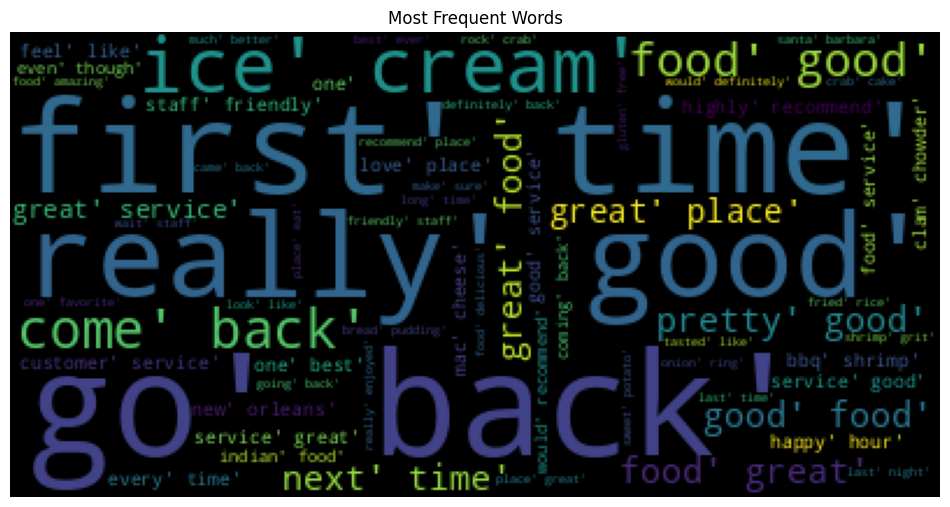

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(words))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

 ### Tokenization and Bag-of-word**

  ### Topic Modelling

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary NLTK models (if not already installed)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Regular expression patterns for cleaning text
replace_patterns = [
    (r'&lt;', ''),                  # Remove HTML special entities (e.g., &lt;)
    (r'&gt;', ''),                  # Remove HTML special entities (e.g., &gt;)
    (r'&amp;', ''),                 # Remove HTML special entities (e.g., &amp;)
    (r'@(\w+)', ''),                # Remove @someone
    (r'http\S+', ''),               # Remove URLs
    (r'#(\w+)', ''),                # Remove hashtags
    (r'\d+', ''),                   # Remove numbers
    (r'\s{2,}', ' ')                # Replace multiple whitespaces
]

def clean_text(text):
    # Remove unwanted patterns from texts
    for (pattern, repl) in replace_patterns:
        text = re.sub(pattern, repl, text)
    return text

# Function to tokenize text using regular expressions, remove stopwords, and perform lemmatization
def process_text(text):
    text = clean_text(text.lower())  # Clean and convert to lowercase
    words = re.findall(r'\b\w+\b', text)  # Tokenize text into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    # words = [stemmer.stem(word) for word in words]  # Stem each word (alternative to lemmatization)
    return words

# Assuming yelp_dataset is a DataFrame with a column 'text'
# Tokenize the 'text' column using a list comprehension with the improved function
yelp_dataset['tokens'] = [process_text(text) for text in yelp_dataset['text']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


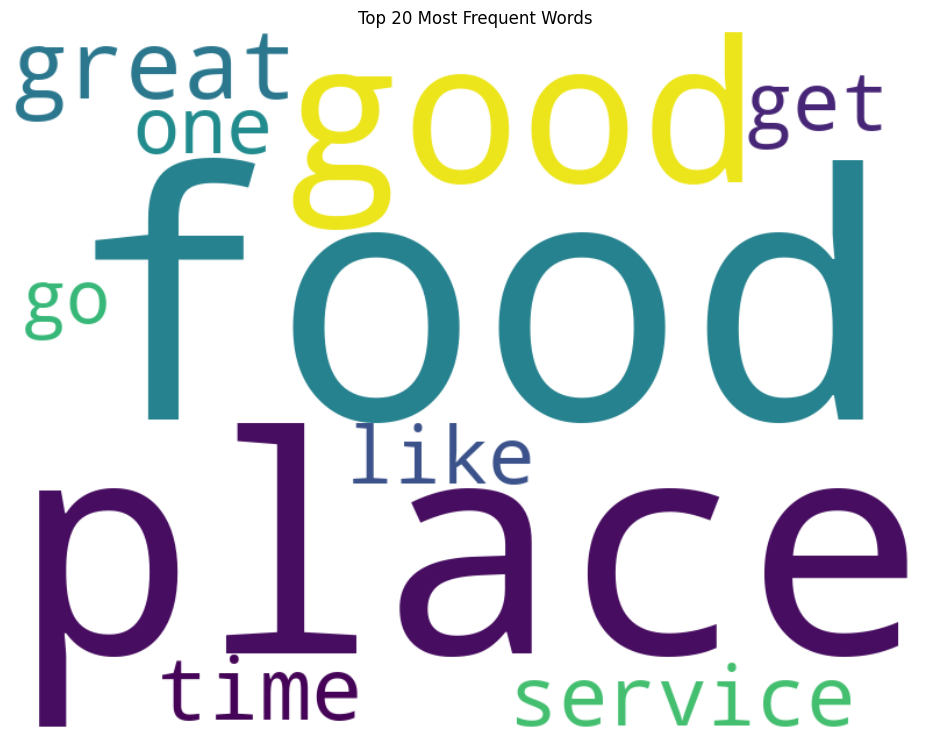

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of lists of tokens into a single list
all_tokens = [token for sublist in yelp_dataset['tokens'] for token in sublist]

# Calculate the frequency of each word
word_freq = Counter(all_tokens)

# Keep only the top 10 most frequent words
top_words = dict(word_freq.most_common(10))

# Create a WordCloud object with these top words
wordcloud = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(top_words)

# Display the generated WordCloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' interpolation makes the displayed image appear smoother
plt.title('Top 20 Most Frequent Words')
plt.axis("off")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Flatten the list of tokens into a single list and prepare it for vectorization
word_list = [' '.join(tokens) for tokens in yelp_dataset['tokens']]

# Custom CountVectorizer with lemmatization
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        lemm = WordNetLemmatizer()
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

# Initialize and fit the vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, min_df=2, stop_words='english', decode_error='ignore')
tf = tf_vectorizer.fit_transform(word_list)

# LDA Model
lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(tf)

# Function to print the top words in each topic
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "Topic #{}: ".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("="*70)

# Display top words for each topic
n_top_words = 20
print("Topics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 
Topic #0: time service customer minute said told went place day know experience got order new asked car took like guy work
Topic #1: food ordered good burger got like table order cheese came time salad chicken fry drink sauce restaurant server meal really
Topic #2: place room great beer like time hotel bar really nice good lot staff night parking hair area friendly love people
Topic #3: place good pizza great food like coffee sandwich delicious love really best time friendly try fresh breakfast make nice little
Topic #4: food great good place service restaurant shrimp delicious time best really amazing nice menu dish definitely fresh crab excellent friendly


#### Topic 1: Customer service

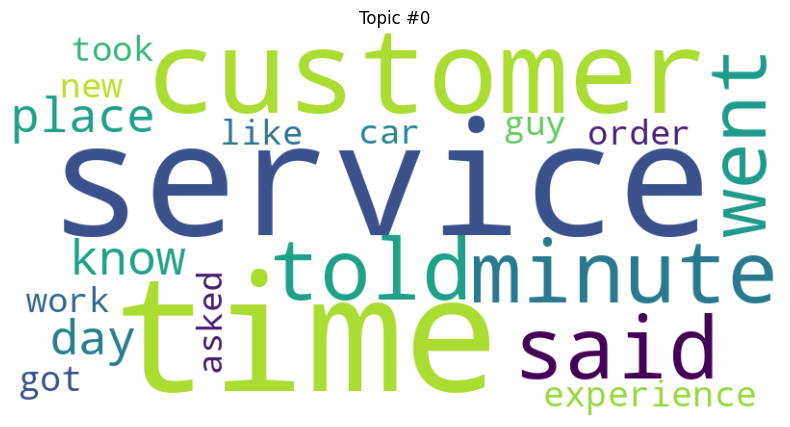

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=0)

The topic seems to revolve around customer service experiences, emphasizing the time aspect ("minute," "day," "time") and the interaction process ("asked," "said," "told").
Larger words indicate that these are the most frequently occurring words in the documents that were analyzed for this topic.

#### Topic 2: Food Order experiences

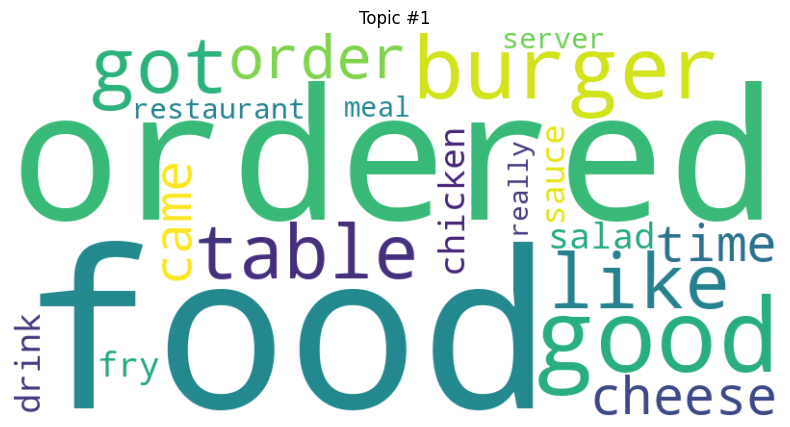

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=1)

The word "food" is the most prominent, indicating that the main subject is food quality or variety.
Terms like "good," "burger," "chicken," "cheese," "fry," and "salad" point to specific food items that are commonly discussed in this context.
Words such as "order," "server," and "table" hint at the service aspect of dining experiences.

#### Topic 3: Location

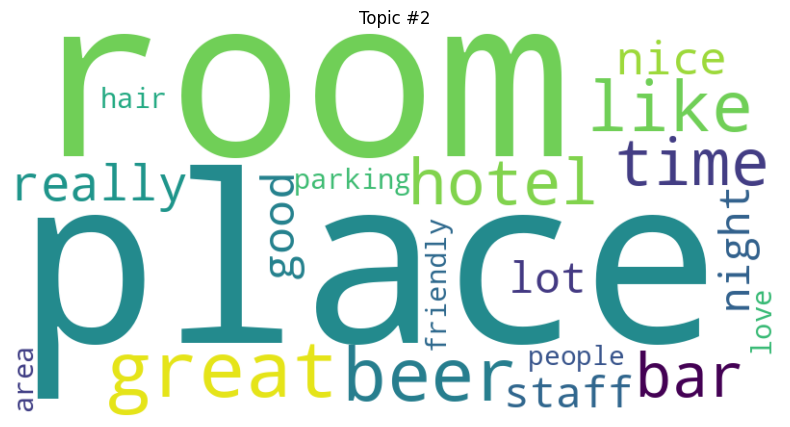

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=2)

The dominant word "place" combined with "great," "like," and "love" points to positive reviews about certain locations.
"Room," "hotel," "bar," and "area" suggest that the reviews might be about various facilities or establishments like hotels or bars.
The presence of "staff" and "friendly" indicates that customer service is a notable part of the discussions.

#### Topic 4: Aspects of eateries that people enjoy.

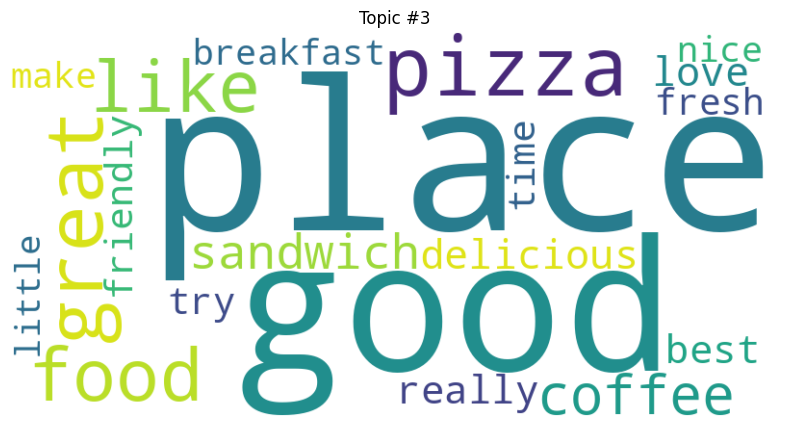

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=3)

#### Topic 5: A positive dining experience with a possible focus on seafood

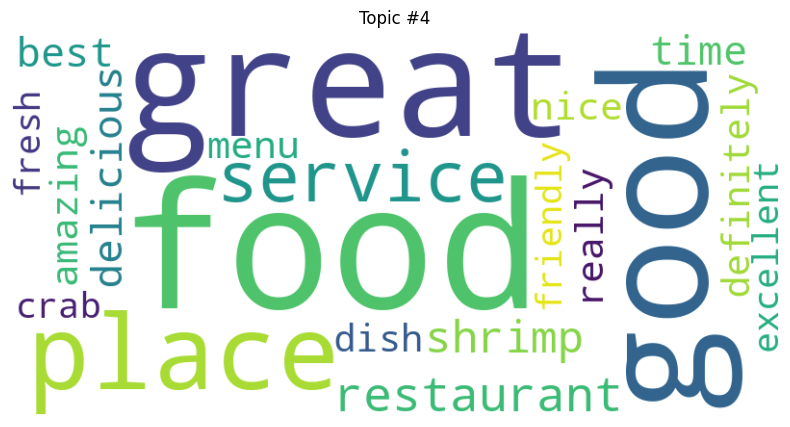

In [ ]:
# Function to generate and show a word cloud for a specific topic
def show_word_cloud(model, feature_names, topic_idx, n_words=20):
    topic = model.components_[topic_idx]
    # Generate a dictionary of word frequencies for this topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()

# Example usage: Show word cloud for topic 0
show_word_cloud(lda, tf_vectorizer.get_feature_names_out(), topic_idx=4)

"Food," "service," and "restaurant" are the most prominent words, indicating these are the central themes in the reviews.

The abundance of positive adjectives like "great," "good," "delicious," "best," and "nice" suggests that the reviews are generally favorable regarding the food and the experience.

The repeated mention of "shrimp" and "crab" could signal a particular interest or emphasis on seafood within the dataset.

### Word2Vec

-  We want to see which words are most likely around our target common words, including "great", "place", "time", "good", "service".

In [ ]:
import re
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [ ]:
# Train a Word2Vec model
model = Word2Vec(sentences=yelp_dataset['tokens'], vector_size=100, window=5, min_count=2, workers=4, sg=1)

#window:5 the model will look at 5 words before and 5 words after it to understand its context and usage.


#### Words Next to Great

In [ ]:
model.predict_output_word(['great'], topn=10)

[('job', 0.0010279766),
 ('selection', 0.0009769945),
 ('atmosphere', 0.0009677255),
 ('experience', 0.00070607074),
 ('service', 0.00063449284),
 ('vibe', 0.0006246515),
 ('location', 0.0006178312),
 ('price', 0.0005816961),
 ('staff', 0.0005715461),
 ('ambiance', 0.00056923815)]

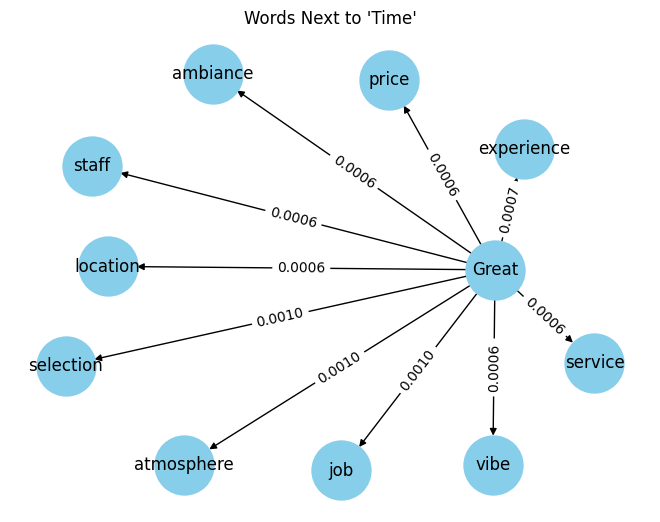

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['great'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('Great', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Time'")
plt.show()


The model predicts that words like "atmosphere," "job," "selection," and "beer" are likely to appear in contexts where the word "great" is used. This suggests that people often use "great" to describe places with good ambience, choices, scenic views, and beverages.

#### Words Next to Place

In [ ]:
model.predict_output_word(['place'], topn=10)

[('chill', 0.0006086335),
 ('hangout', 0.00059436605),
 ('love', 0.00057095016),
 ('recommend', 0.0005632162),
 ('cute', 0.00054343115),
 ('favorite', 0.0005238407),
 ('try', 0.00051582174),
 ('mexican', 0.00050686236),
 ('finding', 0.00050441874),
 ('fun', 0.000498514)]

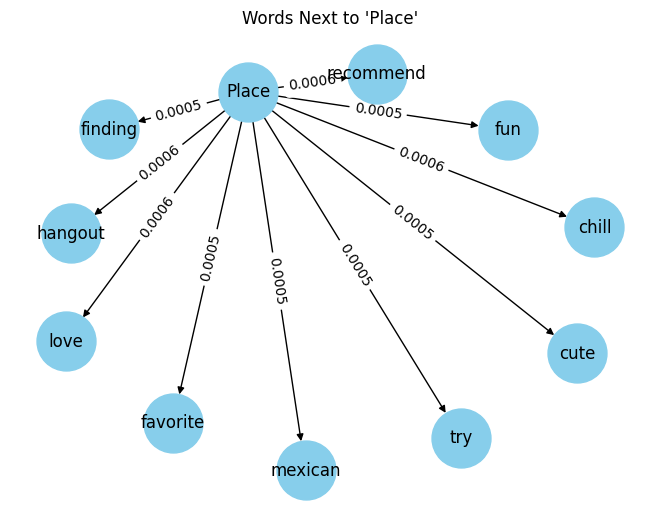

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['place'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('Place', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Place'")
plt.show()


Predictions such as "love," "recommend," and "town" indicate that "place" is commonly associated with positive feelings or recommendations. Words like "cute" and "chill" suggest descriptions of a place's vibe, while "chinese" hints at specific types of places, like restaurants.

#### Words Next to Time

In [ ]:
model.predict_output_word(['time'], topn=10)

[('first', 0.0016161888),
 ('every', 0.0013357636),
 ('last', 0.0012560165),
 ('next', 0.0011132918),
 ('second', 0.00094937463),
 ('several', 0.0009459032),
 ('explaining', 0.0008288),
 ('long', 0.0007879595),
 ('couple', 0.0007061193),
 ('time', 0.00070258236)]

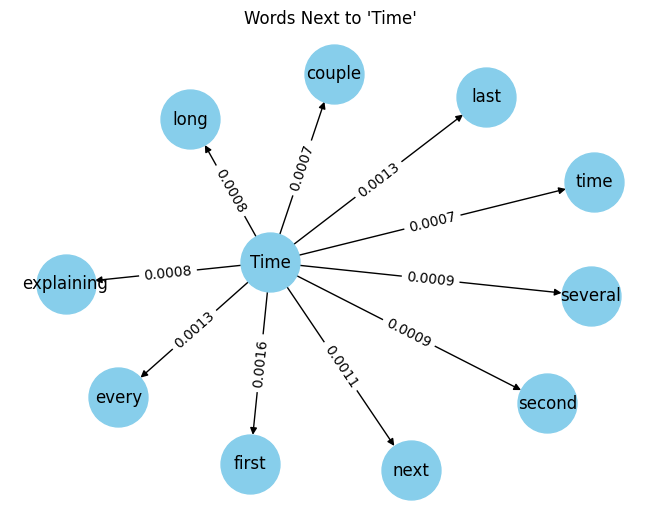

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['time'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('Time', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Time'")
plt.show()


The model's output with "time" centers around descriptors of frequency and order, such as "first," "last," "every," and "next." This indicates common discussions about experiences or events occurring at different times or occasions.

#### Words Next to Good

In [ ]:
model.predict_output_word(['good'], topn=10)

[('pretty', 0.0007190247),
 ('burger', 0.0006683159),
 ('overall', 0.0005795495),
 ('portion', 0.00056818605),
 ('atmosphere', 0.00056600594),
 ('damn', 0.00053550885),
 ('selection', 0.0005300047),
 ('price', 0.00051749434),
 ('fry', 0.0005058571),
 ('really', 0.00049706484)]

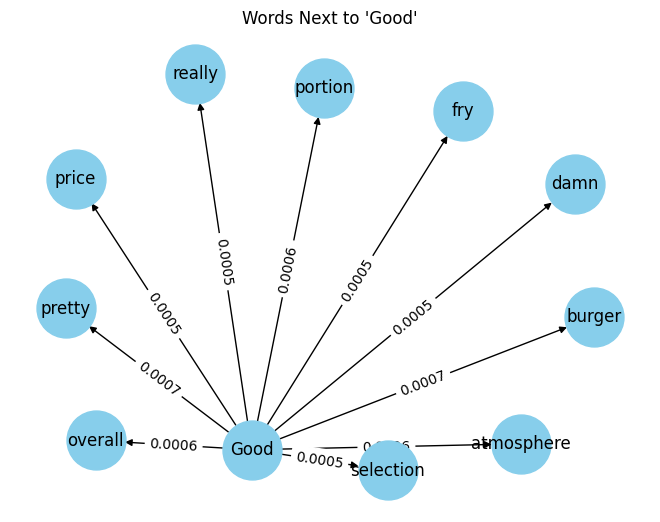

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['good'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('Good', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Good'")
plt.show()


Words related to food items like "burger," "sandwich," and "fry" along with qualities like "pretty" and "portion" suggest that "good" is often used to describe satisfying meals and their attributes. "Atmosphere" also appears here, indicating that the environment of dining places is often noted alongside the quality of food.

#### Words Next to Service

In [ ]:
model.predict_output_word(['service'], topn=10)

[('customer', 0.0018819874),
 ('excellent', 0.0016626563),
 ('prompt', 0.0015491945),
 ('poor', 0.0014767617),
 ('service', 0.0014461011),
 ('horrible', 0.001325896),
 ('slow', 0.0012808958),
 ('impeccable', 0.0012126784),
 ('outstanding', 0.0011871585),
 ('attentive', 0.0011716364)]

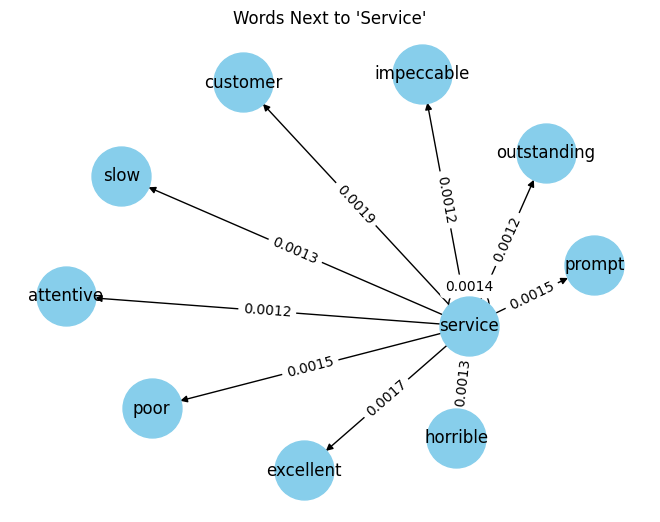

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a trained Word2Vec model named 'model'
similar_words = model.predict_output_word(['service'], topn=10)

# Create a directed graph
G = nx.DiGraph()

# Add edges between 'service' and its similar words
for word, similarity in similar_words:
    G.add_edge('service', word, weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size=12, edge_color='black', linewidths=1, arrows=True)

# Draw edge labels
edge_labels = {(n1, n2): f"{d['weight']:.4f}" for n1, n2, d in G.edges(data=True)}  # Formatting similarity values to four decimal places
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Words Next to 'Service'")
plt.show()


This set of predictions features a mix of positive and negative descriptors, such as "excellent," "impeccable," "slow," and "poor." These are commonly used to describe the quality of service, indicating that reviews frequently focus on the speed and attentiveness of service, reflecting customer satisfaction or dissatisfaction.


### Bag-Of-Word N-grams

#### Bi-grams: Two-words together

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import string


from nltk.util import ngrams
from collections import Counter

def get_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Flatten the list of token lists and remove punctuation
flattened_tokens = [token for sublist in yelp_dataset['tokens'] for token in sublist if token not in string.punctuation]

bigrams = get_ngrams(flattened_tokens, 2  )
bigrams_count = Counter(bigrams)

In [ ]:
bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index', columns=['frequency'])
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(10)
print(bigram_freq)

                  frequency
go back                4130
first time             3970
highly recommend       3510
customer service       3380
really good            3380
come back              3270
ice cream              2980
next time              2840
great place            2740
food good              2730


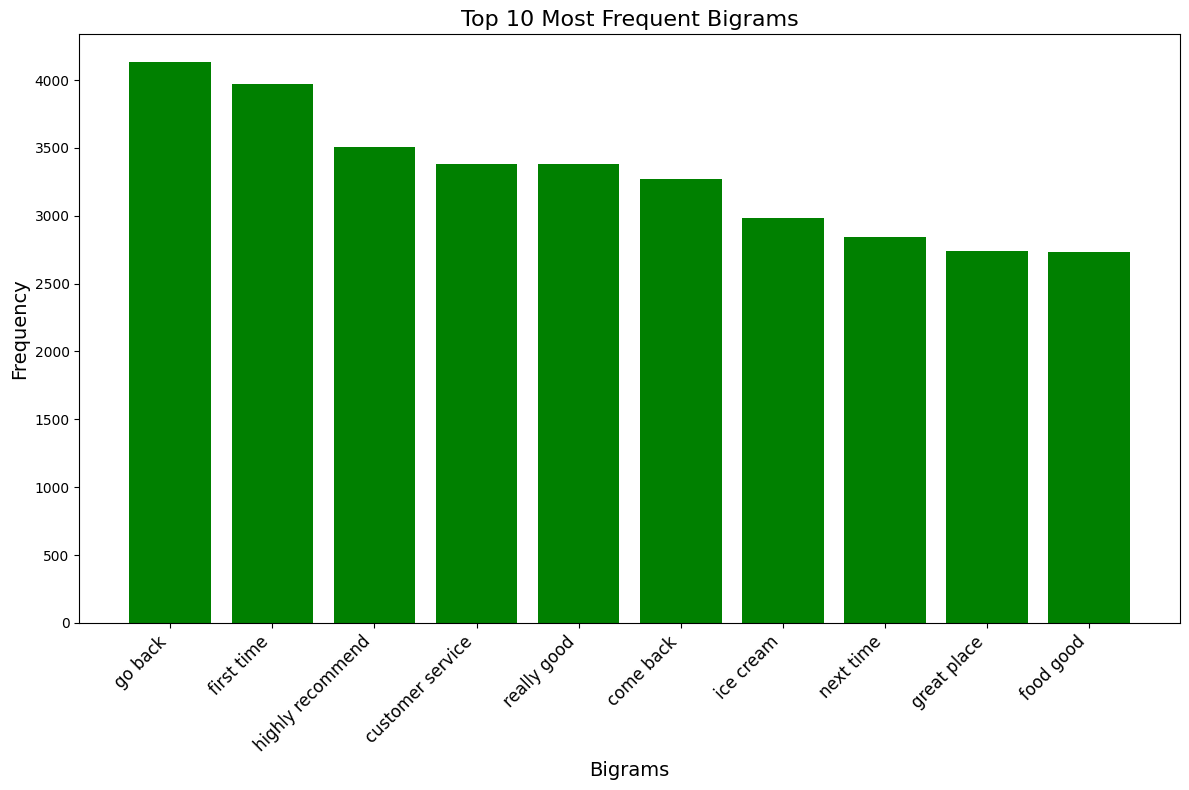

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(bigram_freq.index, bigram_freq['frequency'], color='green')
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent Bigrams', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust subplots to give some padding between the plots and the edges of the plotting area
plt.show()

**Customer Loyalty and Satisfaction:**

Bigrams like "go back," "highly recommend," and "come back" suggest a strong customer intent to revisit and endorse the businesses, indicative of high satisfaction and potential customer loyalty.

"First time" may point to the importance of first impressions, which can be critical for repeat business.

#### Tri-grams

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import string


from nltk.util import ngrams
from collections import Counter

def get_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Flatten the list of token lists and remove punctuation
flattened_tokens = [token for sublist in yelp_dataset['tokens'] for token in sublist if token not in string.punctuation]

bigrams = get_ngrams(flattened_tokens, 3)
bigrams_count = Counter(bigrams)

In [ ]:
bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index', columns=['frequency'])
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(10)
print(bigram_freq)

                            frequency
would highly recommend            650
would definitely recommend        640
wait go back                      570
mac n cheese                      510
gumbo ya ya                       510
definitely come back              490
definitely go back                450
sweet potato fry                  430
food pretty good                  430
would go back                     430


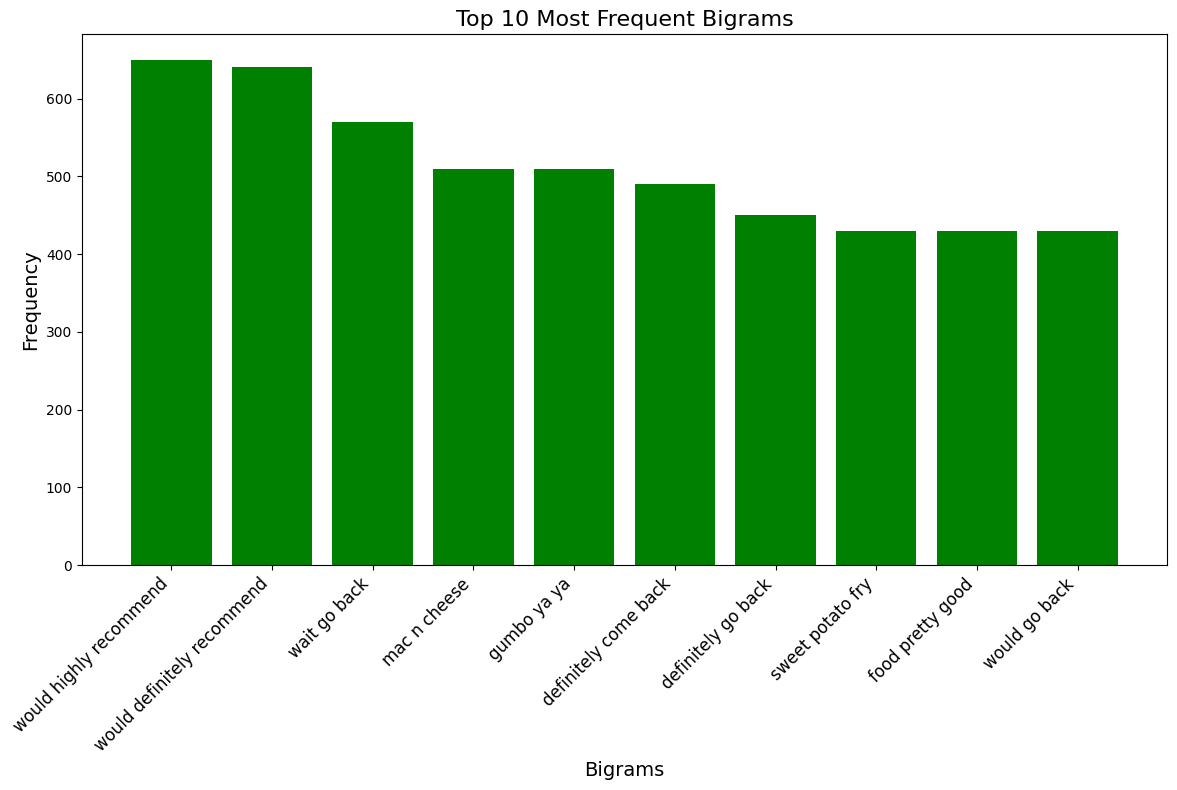

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(bigram_freq.index, bigram_freq['frequency'], color='green')
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent Bigrams', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust subplots to give some padding between the plots and the edges of the plotting area
plt.show()

Viewpoint on Customer Advocacy and Intent:

The phrases "would highly recommend" and "would definitely recommend" suggest that there is a strong propensity among customers to advocate for the businesses they've visited, indicating high satisfaction levels.
Repeated variations of "go back," including "wait go back," "definitely go back," and "would go back," indicate a strong intent to revisit, signaling good customer retention potential.
Focus on Menu Items and Food Quality:

Specific menu items like "mac n cheese" and "gumbo ya ya" suggest these dishes stand out in the customer's dining experience and may be signature items that attract customers.
The mention of "sweet potato fry" indicates that even side dishes can significantly impact customer satisfaction and are often remembered and mentioned in reviews.

#### Four-grams

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import string


from nltk.util import ngrams
from collections import Counter

def get_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Flatten the list of token lists and remove punctuation
flattened_tokens = [token for sublist in yelp_dataset['tokens'] for token in sublist if token not in string.punctuation]

bigrams = get_ngrams(flattened_tokens, 4)
bigrams_count = Counter(bigrams)

bigram_freq = pd.DataFrame.from_dict(bigrams_count, orient='index', columns=['frequency'])
bigram_freq = bigram_freq.sort_values(by='frequency', ascending=False).head(10)
print(bigram_freq)

                            frequency
would definitely go back          200
say enough good thing             190
bacon wrapped shrimp grit         180
would definitely come back        160
cookie dough egg roll             150
great food great service          100
great service great food          100
back next time town               100
come back next time               100
mr b bbq shrimp                    90


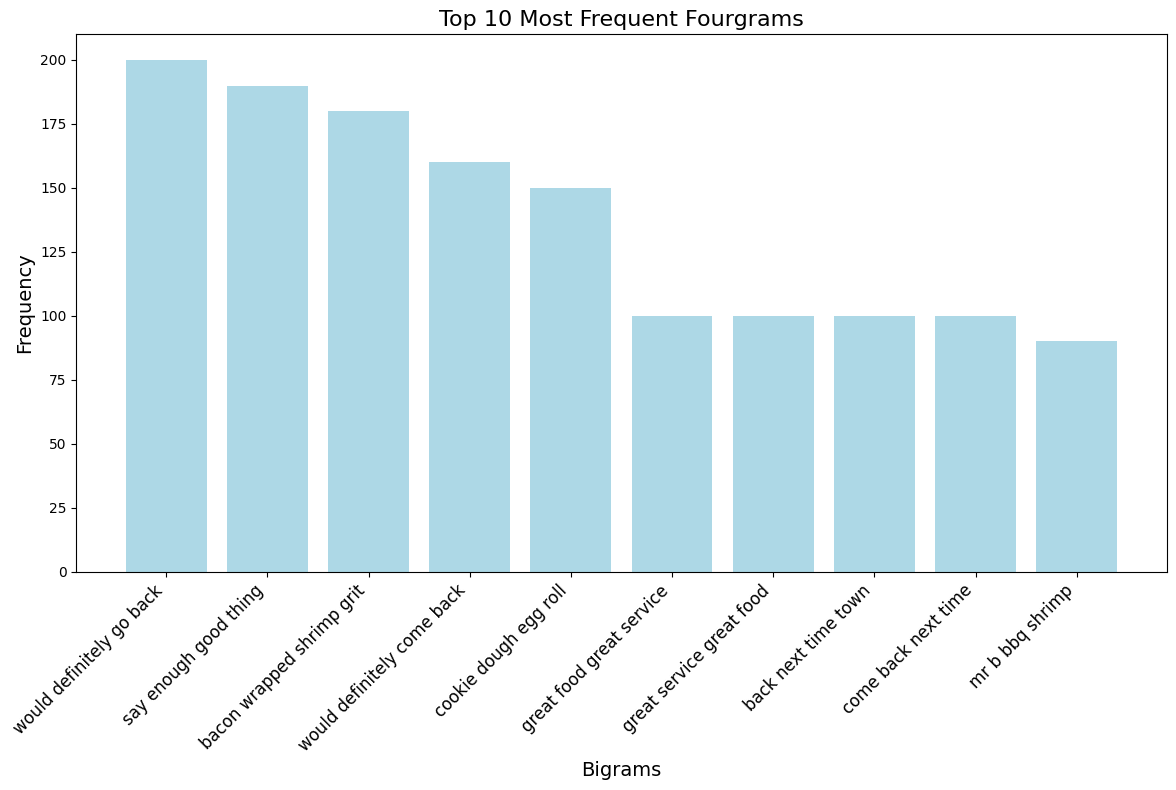

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(bigram_freq.index, bigram_freq['frequency'], color='lightblue')
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent Fourgrams', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust subplots to give some padding between the plots and the edges of the plotting area
plt.show()

**Customer Engagement and Intent to Return:**

Phrases such as "would definitely go back" and variations like "come back next time" suggest a clear intent by customers to revisit, reflecting satisfaction and potential loyalty.
The repetition of "come back" in different four-grams reinforces the significance of return visits as a metric for success.
Menu Items and Service Quality:

Specific menu items or attributes like "bacon wrapped shrimp" and "cookie dough egg roll" highlight unique or memorable dishes that stand out to customers.
The combination of "great food great service" suggests that customers value the overall dining experience, with equal emphasis on the quality of the food and the level of service received.

#### Compares the frequency of bigrams, trigrams, and fourgrams

In [ ]:
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

def get_ngrams(tokens, n):
    return [' '.join(gram) for gram in ngrams(tokens, n)]

# Assuming flattened_tokens is already defined as a flat list of all tokens excluding punctuation
bigrams = get_ngrams(flattened_tokens, 2)
trigrams = get_ngrams(flattened_tokens, 3)
fourgrams = get_ngrams(flattened_tokens, 4)

# Count frequencies
bigram_count = Counter(bigrams)
trigram_count = Counter(trigrams)
fourgram_count = Counter(fourgrams)

# Convert to DataFrames
bigram_freq = pd.DataFrame.from_dict(bigram_count, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)
trigram_freq = pd.DataFrame.from_dict(trigram_count, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)
fourgram_freq = pd.DataFrame.from_dict(fourgram_count, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)


In [ ]:
import plotly.express as px

# Combine the dataframes for a unified plot with identification for each gram type
bigram_freq['n-gram'] = 'Bigram'
trigram_freq['n-gram'] = 'Trigram'
fourgram_freq['n-gram'] = 'Fourgram'

combined_df = pd.concat([bigram_freq, trigram_freq, fourgram_freq])
combined_df['N-gram Words'] = combined_df.index  # Make the index a column for easier plotting

# Create a larger figure to enhance readability
fig = px.bar(combined_df, x='N-gram Words', y='frequency', color='n-gram',
             title='Comparison of Top N-grams', labels={'N-gram Words': 'N-grams', 'frequency': 'Frequency'},
             barmode='group', height=600, width=1200)  # Increased size

# Customize the layout for better visibility
fig.update_layout(xaxis_title='N-grams',
                  yaxis_title='Frequency',
                  xaxis={'categoryorder':'total descending'},
                  legend_title_text='N-Gram Type',
                  xaxis_tickangle=-90)  # Adjust the angle of the x-axis labels for better readability

# Show the plot
fig.show()


The bigrams, being more frequent than trigrams and fourgrams, could indicate that customers often use short, concise phrases to describe their experiences.

The prevalence of phrases such as "highly recommend" and "would definitely recommend" among the bigrams and trigrams signals strong endorsements that can be leveraged in marketing materials to build credibility.

The dominance of "first time" among the bigrams may highlight the importance of first impressions, indicating the need for businesses to focus on the initial customer experience.


# Bi-Directional RNN
https://medium.com/@jeewonkim1028/sentiment-analysis-in-keras-using-attention-mechanism-on-yelp-reviews-dataset-322bd7333b8b

In [ ]:
yelp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          100000 non-null  object 
 1   address       99180 non-null   object 
 2   city          100000 non-null  object 
 3   state         100000 non-null  object 
 4   postal_code   100000 non-null  object 
 5   latitude      100000 non-null  float64
 6   longitude     100000 non-null  float64
 7   stars_x       100000 non-null  float64
 8   review_count  100000 non-null  int64  
 9   is_open       100000 non-null  int64  
 10  attributes    98710 non-null   object 
 11  categories    100000 non-null  object 
 12  hours         94500 non-null   object 
 13  review_id     100000 non-null  object 
 14  user_id       100000 non-null  object 
 15  stars_y       100000 non-null  int64  
 16  useful        100000 non-null  int64  
 17  funny         100000 non-null  int64  
 18  cool 

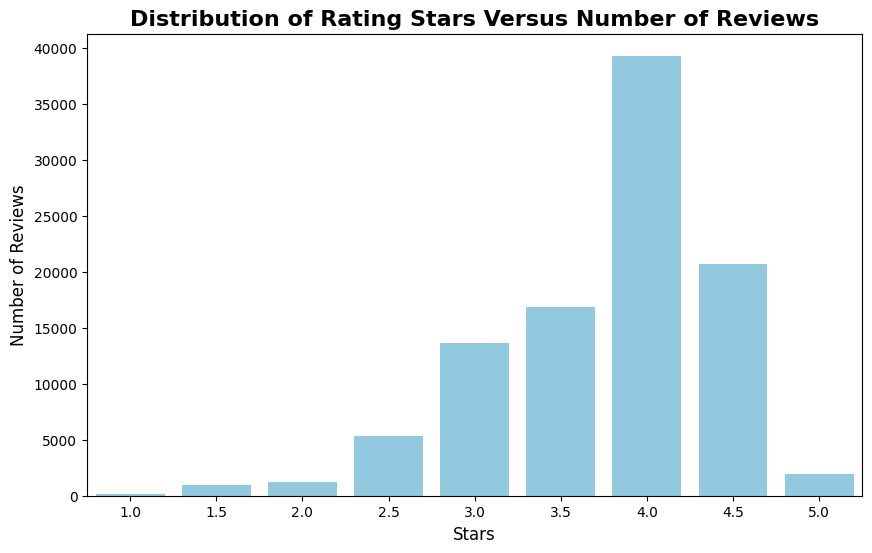

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming yelp_dataset is your DataFrame
# Plotting the distribution of star ratings
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Adding a title
plt.title('Distribution of Rating Stars Versus Number of Reviews', fontsize=16, fontweight='bold')

# Creating a bar plot for the distribution of stars
sns.countplot(x='stars_x', data=yelp_dataset, color='skyblue')  # Ensure the column name 'stars_x' is correct

# Setting labels
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Displaying the plot
plt.show()


We've noticed that most people tend to give 4 to 5-star ratings, indicating a positive sentiment. Building on this observation, we've introduced a new sentiment feature with values of 0 and 1. Reviews with ratings above 3 are labeled as "positive" with a value of 1, while others are considered "negative" with a value of 0.

In [ ]:
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize


yelp_dataset['sentiment'] = np.where(yelp_dataset['stars_x'] > 3, 1, 0)


NameError: name 'yelp_dataset' is not defined

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

# Download the stopwords from NLTK
nltk.download('stopwords')
nltk.download('wordnet')  # This might also be necessary if you haven't downloaded it yet

# Now set the English stopwords
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Regular expression patterns for cleaning text
replace_patterns = [
    (r'&lt;', ''),                  # Remove HTML special entities (e.g., &lt;)
    (r'&gt;', ''),                  # Remove HTML special entities (e.g., &gt;)
    (r'&amp;', ''),                 # Remove HTML special entities (e.g., &amp;)
    (r'@(\w+)', ''),                # Remove @someone
    (r'http\S+', ''),               # Remove URLs
    (r'#(\w+)', ''),                # Remove hashtags
    (r'\d+', ''),                   # Remove numbers
    (r'\s{2,}', ' ')                # Replace multiple whitespaces
]

def clean_text(text):
    # Remove unwanted patterns from texts
    for (pattern, repl) in replace_patterns:
        text = re.sub(pattern, repl, text)
    return text

# Function to tokenize text using regular expressions, remove stopwords, and perform lemmatization
def process_text(text):
    text = clean_text(text.lower())  # Clean and convert to lowercase
    words = re.findall(r'\b\w+\b', text)  # Tokenize text into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    # words = [stemmer.stem(word) for word in words]  # Stem each word (alternative to lemmatization)
    return words

# Assuming yelp_dataset is a DataFrame with a column 'text'
# Tokenize the 'text' column using a list comprehension with the improved function
yelp_dataset['cleaned_text'] = [process_text(text) for text in yelp_dataset['text']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Selecting only the necessary columns to display
comparison_df = yelp_dataset[['text', 'cleaned_text']]

comparison_df.head(3)

text  \
0  I've had acupuncture treatments with Abby over...   
1  I have a po box there and ea. visit I am greet...   
2  Bottom Line:  \nClean store, Quick Service, Go...   

                                        cleaned_text  
0  [acupuncture, treatment, abby, past, year, rea...  
1  [po, box, ea, visit, greeted, hello, asked, ow...  
2  [bottom, line, clean, store, quick, service, g...

In [ ]:
#Split dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming yelp_dataset contains the 'cleaned_text' and 'sentiment' columns from earlier processes
df_train, df_test = train_test_split(yelp_dataset, test_size=0.01)  # Splitting the dataset

MAX_FEATURES = 6000  # Maximum number of words to consider in the vocabulary
EMBED_SIZE = 128  # Size of the embedding vectors
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_train['cleaned_text'])  # Fit tokenizer to cleaned texts

list_tokenized_train = tokenizer.texts_to_sequences(df_train['cleaned_text'])  # Convert texts to sequences of integers
MAX_LEN = 60  # Maximum length of sequences, padded where necessary
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)  # Pad sequences to ensure uniform input size

y_train = df_train['sentiment']  # Sentiment labels


KeyError: 'sentiment'

In [ ]:
X_train

array([[   0,    0,    0, ...,  300,   33,   12],
       [   0,    0,    0, ...,   60,  129,    4],
       [1628,  834,  231, ...,   50,   75,  307],
       ...,
       [   0,    0,    0, ...,  769, 1035, 1073],
       [   0,    0,    0, ...,  141,   32,   94],
       [   0,    0,    0, ..., 2163,    6,  184]], dtype=int32)

In [ ]:
y_train

68518    1
47564    1
13993    1
13726    1
52544    1
        ..
86400    1
41089    1
52563    1
48585    1
86095    0
Name: sentiment, Length: 99000, dtype: int64

Define Attention

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))

        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

#### Embedding Layer

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

#### Bi-Directional RNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Concatenate, Embedding
from tensorflow.keras.models import Model

# Define input and embedding layer
sequence_input = Input(shape=(None,), dtype='int32')
embedding_layer = Embedding(input_dim=10000, output_dim=128)  # example dimensions
embedded_sequences = embedding_layer(sequence_input)

# Define LSTM layers
RNN_CELL_SIZE = 32  # Example size
lstm = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True), name="bi_lstm_0")(embedded_sequences)
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

# Concatenate forward and backward states
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

# Attention layer
context_vector, attention_weights = Attention(10)(lstm, state_h)

# Define fully connected layers
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(1, activation="sigmoid")(dropout)

# Create and compile model
model = Model(inputs=sequence_input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, None, 128)            1280000   ['input_2[0][0]']             
                                                                                                  
 bi_lstm_0 (Bidirectional)   (None, None, 64)             41216     ['embedding_1[0][0]']         
                                                                                                  
 bi_lstm_1 (Bidirectional)   [(None, None, 64),           24832     ['bi_lstm_0[0][0]']           
                              (None, 32),                                                     

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
BATCH_SIZE = 100
EPOCHS = 5
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.2)

Epoch 1/5
792/792 [==============================] - 120s 138ms/step - loss: 0.2093 - accuracy: 0.9223 - val_loss: 0.0699 - val_accuracy: 0.9787
Epoch 2/5
792/792 [==============================] - 100s 126ms/step - loss: 0.0342 - accuracy: 0.9901 - val_loss: 0.0135 - val_accuracy: 0.9963
Epoch 3/5
792/792 [==============================] - 96s 121ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0122 - val_accuracy: 0.9963
Epoch 4/5
792/792 [==============================] - 96s 122ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 5/5
792/792 [==============================] - 130s 164ms/step - loss: 1.6912e-04 - accuracy: 1.0000 - val_loss: 2.0907e-05 - val_accuracy: 1.0000


In [ ]:
y_test=df_test['sentiment']

tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_test['cleaned_text'])
list_tokenized_train = tokenizer.texts_to_sequences(df_test['cleaned_text'])

X_test = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)

In [ ]:
prediction = model.predict(X_test)

32/32 [==============================] - 2s 15ms/step


In [ ]:
y_pred = (prediction > 0.5)

              precision    recall  f1-score   support

           0       0.17      0.12      0.14       217
           1       0.77      0.83      0.80       783

    accuracy                           0.68      1000
   macro avg       0.47      0.48      0.47      1000
weighted avg       0.64      0.68      0.66      1000



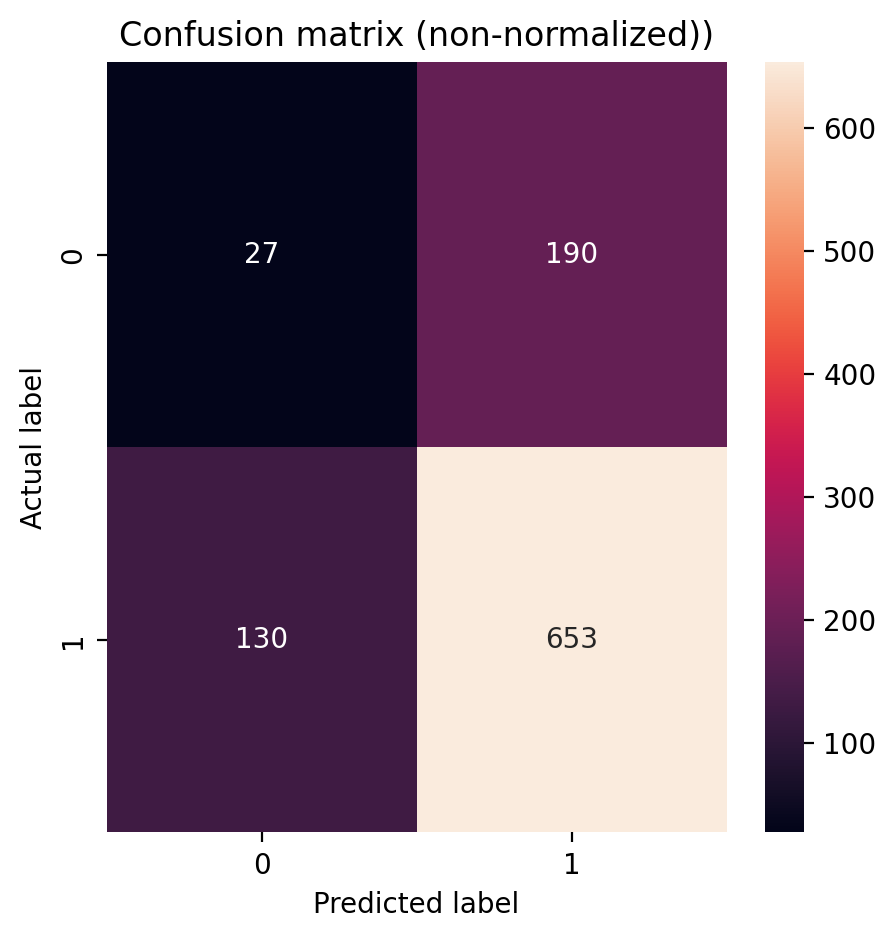

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

report = classification_report(y_test, y_pred)
print(report)


def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix (non-normalized))")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")


plot_cm(y_test, y_pred)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalseNegatives(name='fn'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

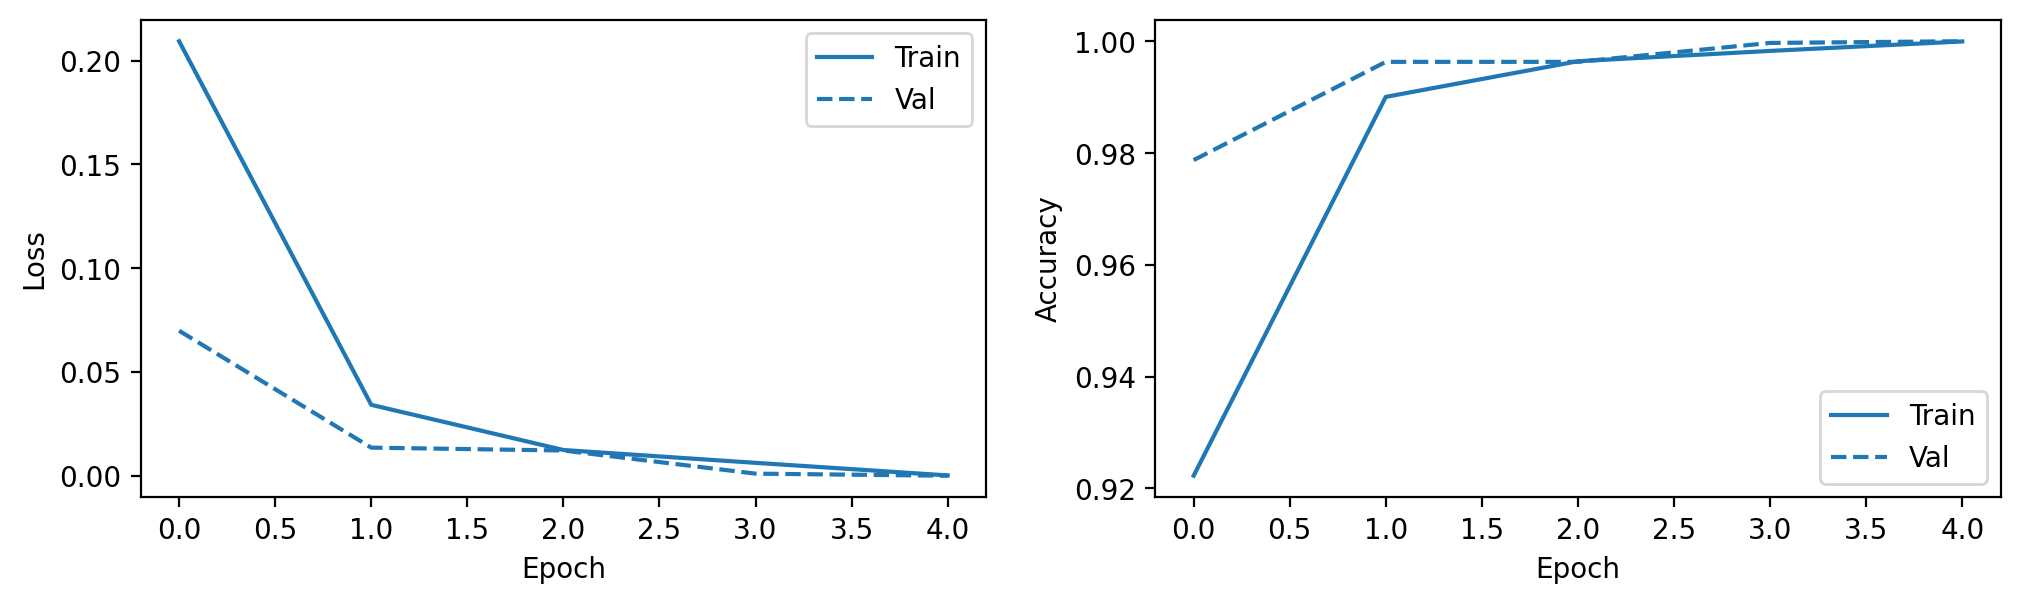

In [ ]:
plot_metrics(history)

## Fine-tuned with BERT

In [ ]:
pip install datasets

In [ ]:
import torch
from transformers import AutoTokenizer
from datasets import Dataset


In [ ]:
## check if cuda is avaliable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("training with:", device)

training with: cpu


In [ ]:
# setting up feature and target
yelp_dataset['sentiment'] = yelp_dataset['stars_x'].apply(lambda x: 1 if x > 3 else 0)  # Assuming 'stars_x' is the rating column

X = yelp_dataset['text'].values  # Assuming 'text' is the column with review content
Y = yelp_dataset['sentiment'].values

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(80000,) (20000,) (80000,) (20000,)


In [ ]:
## this is a binary classification problem, we will use accuracy
## let's check the default accuray by gussing all reviews are positive

default_accuracy = Y.mean()
print("The model is only meaningful when accuracy is above ",default_accuracy)

## Let's also initialize a dictionary to save the performance metric
performance = {"Default Accuracy": Y.mean()}
print(performance)

The model is only meaningful when accuracy is above  0.7868
{'Default Accuracy': 0.7868}


In [ ]:
# preprare dataset
train_dataset = [dict(text=text, label=label) for text, label in zip(X_train, Y_train)]
test_dataset = [dict(text=text, label=label) for text, label in zip(X_test, Y_test)]

train_dataset = Dataset.from_list(train_dataset)
test_dataset = Dataset.from_list(test_dataset)

In [ ]:
## this is how the dataset looks like
train_dataset[0]

{'text': 'Excellent service and food was delicious from the spring rolls, wonton soup, shrimp fried rice to the spicy noodle with shrimp. Atmosphere is pleasant quiet music, indoor or outdoor seating and someone  always coming around to check on your table without being a pest! The prices are beyond reasonable for portion, flavor and location.',
 'label': 1}

In [ ]:
## initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

def tokenize_function(data):
    return tokenizer(data['text'], padding="max_length", truncation=True)

## tokenize data
tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)

## since fine tune takes a long time, I will randomly sample a subset for training
## in practice, you can use training sets  2000 < N < 100000, based on how difficult your problem is
tokenized_sample_train = tokenized_train_datasets.shuffle(seed=42).select(range(80000))  # randomly sample 80000 for training
tokenized_sample_test = tokenized_test_datasets.shuffle(seed=42).select(range(20000))  # randomly sample 20000 for validating during the training

Map:   0%|          | 0/80000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

In [ ]:
!pip install transformers[torch] -U
!pip install accelerate -U
!pip install evaluate -U


In [ ]:
import accelerate
print("Accelerate version:", accelerate.__version__)

Accelerate version: 0.29.3


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import numpy as np
import torch

# Initialize the model
model_checkpoint = "bert-base-cased"
num_labels = 2  # Adjust this depending on the number of labels in your classification task
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels).to(device)
metric = evaluate.load("accuracy")

# Use accuracy as evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Specify the training parameters
training_args = TrainingArguments(
    output_dir="test_trainer",
    num_train_epochs=2,  # Total 2 epochs
    evaluation_strategy="steps",
    eval_steps=100,  # Evaluate every 100 steps
    learning_rate=5e-5,  # It's good practice to specify learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16   # Batch size for evaluation
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_sample_train,
    eval_dataset=tokenized_sample_test,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'tokenized_sample_train' is not defined

### RoBERTa-sentiment

In [ ]:
from transformers import pipeline

## initialize the model pipeline
RoBERTa_sentiment = pipeline(model="siebert/sentiment-roberta-large-english", truncation=True, device=device)

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
print(RoBERTa_sentiment("I love this!"))
print(RoBERTa_sentiment("I don't like this!"))

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]
[{'label': 'NEGATIVE', 'score': 0.9994779229164124}]


In [ ]:
# Ensure X_test is a list of strings
X_test_text = [str(text) for text in restaurant_df['text'][:100]]

# Evaluate all test instances
# Truncation is automatically handled by the pipeline if not already set
y_pred = [RoBERTa_sentiment(text) for text in X_test_text]

# Assuming your function returns predictions as 'LABEL_1', 'LABEL_2', or 'LABEL_0'
# Map predicted labels to your numeric categories
y_pred_mapped = [1 if pred == 'LABEL_1' else (2 if pred == 'LABEL_2' else 0) for pred in y_pred]

# y_test is accessible and correctly prepared
accuracy = accuracy_score(y_test, y_pred_mapped)

# Initialize performance dictionary if not already
performance = {}
performance["RoBERTa-sentiment"] = accuracy

# Output the accuracy
print("RoBERTa sentiment analysis accuracy:", accuracy)

from transformers import pipeline
from sklearn.metrics import accuracy_score

# Load RoBERTa sentiment analysis model
RoBERTa_sentiment = pipeline("sentiment-analysis", model="roberta-base", truncation=True)

In [ ]:
## Check the performance of RoBERTa-sentiment on 100 testing instances
y_pred = [RoBERTa_sentiment(text) for text in X_test[:100]]  # only evaluating the first 100 test instances to save time
y_pred = [pred[0]['label'] for pred in y_pred]
y_pred = [1 if pred == 'POSITIVE' else 0 for pred in y_pred]
accuracy = accuracy_score(Y_test[:100], y_pred)
performance["RoBERTa-sentiment"] = accuracy

NameError: name 'accuracy_score' is not defined

#4. Sentiment Analysis 🟡 Rami


**Bag of word and supervised learning**


1.   Logistic Regression
2.   Random Forest
3.   KNN
4.   Naive
5.   TIFF Model

* Use classification metric: F1-score to compare the model’s results.



Recurrent Neural Networks

- predict sentiment

<Axes: xlabel='sentiment', ylabel='count'>

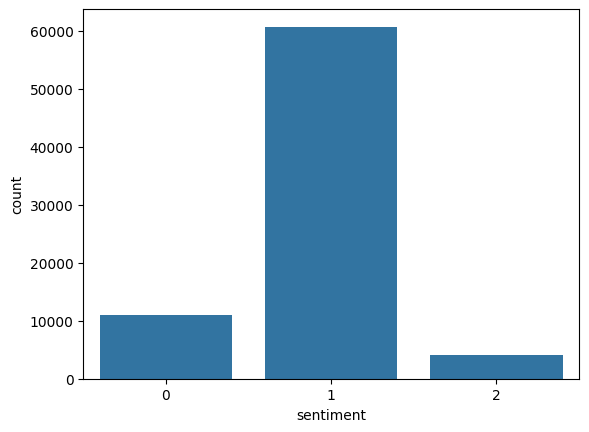

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=restaurant_df)

In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
X = []
sentences = list(restaurant_df['cleaned_text'])
for sen in sentences:
    X.append(sen)

In [ ]:
y = restaurant_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
import io
import json

tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

16043

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

NameError: name 'pad_sequences' is not defined

**Transfer Learning**
- predict sentiment

In [ ]:
!pip install torch
!pip install torchvision
!pip install torchaudio

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


In [ ]:
reviews = restaurant_df['text']

In [ ]:

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = restaurant_df['text'][4586]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998691082000732}]

In [ ]:
# Using a specific model for sentiment analysis
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(restaurant_df['text'][24])

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'NEG', 'score': 0.9654828906059265}]

In [ ]:
restaurant_df['text'][24]

'Went there at 4am and there was only one waitress. I don\'t go to Denny\'s often but I didn\'t remember the food being that bad, completely unsatisfactory. We only got 3 menus, the waitress only come to our table for drinks, order, food, check. We ran out of drinks and never got a refill of all you can eat pancakes. The ranch tasted like sour milk, I can make better pancakes with a box of "just add water" mix. Waste of 40$ for the four of us.'

Pretrained naive bayes

In [ ]:
from textblob import TextBlob

In [ ]:
restaurant_df['text'][25]

'I had an immensely frustrating experience here this morning and consequently don\'t plan to return.  I came in at about 6:20 AM for a cup of coffee and a quiet place to study before an oil change.  Although the hostess station had a sign stating that I needed to wait to be seated, no one acknowledged me.  After 2 minutes of standing there, I called "Hello?" audibly into the kitchen and still was not acknowledged.  I finally stood at the hostess station and called the restaurant from my cell phone in an attempt to be acknowledged.  The phone rang loudly into the restaurant for another 3-4 minutes with no acknowledgement.  I finally walked around the restaurant trying to find staff to acknowledge me and found a waitress.  She did not apologize for me not being acknowledged, but told me there was a problem with the gas in the restaurant and they could not prepare and serve food in a timely manner.  Needless to say, I didn\'t waste any more time here and went to a competitor.  I would rec

In [ ]:
## test
blob = TextBlob(restaurant_df['text'][25])
if blob.sentiment.polarity >=0:
     print('positive')
else:
    print('negative')

negative


Roberta sentiment


In [ ]:
from transformers import pipeline

## initialize the model pipeline
RoBERTa_sentiment = pipeline(model="siebert/sentiment-roberta-large-english", truncation=True)

In [ ]:
## Check the performance of RoBERTa-sentiment on 100 testing instances
y_pred = RoBERTa_sentiment(restaurant_df['text'][0])  # only evaluating the first 100 test instances to save time
y_pred

[{'label': 'POSITIVE', 'score': 0.998909592628479}]

LSTM


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from sklearn.model_selection import train_test_split


In [ ]:
# Assuming 'df' is your DataFrame with columns 'text' and 'sentiment'
X = restaurant_df['text'].values
y = restaurant_df['sentiment'].values


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_seq_length = max([len(seq) for seq in X_seq])
X_pad = pad_sequences(X_seq, maxlen=max_seq_length)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
426/426 [==============================] - 529s 1s/step - loss: -0.1231 - accuracy: 0.8432 - val_loss: -0.7211 - val_accuracy: 0.8954
Epoch 2/5
426/426 [==============================] - 510s 1s/step - loss: -1.3796 - accuracy: 0.9186 - val_loss: -1.8331 - val_accuracy: 0.9341
Epoch 3/5
426/426 [==============================] - 511s 1s/step - loss: -2.3254 - accuracy: 0.9316 - val_loss: -2.5851 - val_accuracy: 0.9370
Epoch 4/5
426/426 [==============================] - 516s 1s/step - loss: -3.1705 - accuracy: 0.9408 - val_loss: -3.4081 - val_accuracy: 0.9469
Epoch 5/5
426/426 [==============================] - 485s 1s/step - loss: -3.9431 - accuracy: 0.9428 - val_loss: -4.0708 - val_accuracy: 0.9403


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


474/474 [==============================] - 42s 90ms/step - loss: -4.3604 - accuracy: 0.9371
Test Accuracy: 0.9371451139450073


RNN


In [ ]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_seq_length))
model.add(SimpleRNN(units=64))  # Simple RNN layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
426/426 [==============================] - 278s 643ms/step - loss: -0.0042 - accuracy: 0.8442 - val_loss: -0.5657 - val_accuracy: 0.9302
Epoch 2/5
426/426 [==============================] - 258s 604ms/step - loss: -1.3332 - accuracy: 0.9229 - val_loss: -2.0688 - val_accuracy: 0.9275
Epoch 3/5
426/426 [==============================] - 270s 633ms/step - loss: -3.2305 - accuracy: 0.9349 - val_loss: -3.9256 - val_accuracy: 0.9322
Epoch 4/5
426/426 [==============================] - 267s 628ms/step - loss: 0.5044 - accuracy: 0.8112 - val_loss: 2.4988 - val_accuracy: 0.7769
Epoch 5/5
426/426 [==============================] - 267s 625ms/step - loss: 0.4568 - accuracy: 0.8028 - val_loss: -0.2674 - val_accuracy: 0.8057


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


474/474 [==============================] - 28s 59ms/step - loss: -0.4759 - accuracy: 0.8110
Test Accuracy: 0.8109731674194336


In [ ]:
restaurant_df


sentiment                                               text
0              1  This is nice little Chinese bakery in the hear...
1              1  This is the bakery I usually go to in Chinatow...
2              1  A delightful find in Chinatown! Very clean, an...
3              1  I ordered a graduation cake for my niece and i...
4              1  HK-STYLE MILK TEA:  FOUR STARS\n\nNot quite su...
...          ...                                                ...
75725          1  Well, since it was right next to Scoot Over, I...
75726          1  A number of pizzerias have come and gone throu...
75727          2  We attended a private party recently.  The app...
75728          2  Walking in, it took a bit to be greeted and se...
75729          2  This is no where near as good as Tony Angelo's...

[75730 rows x 2 columns]

In [ ]:
from transformers import BertTokenizer
import torch

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text samples and prepare inputs
def tokenize_text(text):
    return tokenizer.encode_plus(text,
                                 add_special_tokens=True,
                                 max_length=128,  # Max length of input text
                                 padding='max_length',
                                 return_attention_mask=True,
                                 truncation=True)

# Tokenize all text samples in the dataset
tokenized_texts = restaurant_df['text'][:100].apply(tokenize_text)

# Convert tokenized texts and labels into tensors
input_ids = torch.tensor([tokenized_texts[i]['input_ids'] for i in range(len(tokenized_texts))])
attention_masks = torch.tensor([tokenized_texts[i]['attention_mask'] for i in range(len(tokenized_texts))])
labels = torch.tensor(restaurant_df['sentiment'][:100].values)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
